In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import scipy.stats
from tqdm import tqdm

In [27]:
X = []

X.append(fw_info_3[2:7])
X.append(fw_info_4[2:7])

X.append(soc_info_1[2:7])
X.append(soc_info_2[2:7])
X.append(soc_info_3[2:7])
X.append(soc_info_5[2:7])

X.append(ppi_info_1[2:7])
X.append(ppi_info_2[2:7])
X.append(ppi_info_3[2:7])
X.append(ppi_info_4[2:7])

X.append(cit_info_1[2:7])
X.append(cit_info_2[2:7])

X.append(rd_info_1[2:7])
X.append(rd_info_2[2:7])

X.append(qa_info_1[2:7])
X.append(qa_info_2[2:7])

In [3]:
X_save = np.array([[32.90625,
  0.3346418860120208,
  0.26148726827526514,
  0.42826242355076627,
  0.35319055462785276],
 [26.797814207650273,
  0.32262801253502993,
  0.20775282246021093,
  0.5497632352405665,
  0.33893241200808705],
 [32.5841784989858,
  0.40705044751953817,
  0.15306420751329464,
  0.23129558176770523,
  0.1020127855299823],
 [14.573986308583464,
  0.10939892385364355,
  0.02152505984438028,
  0.0813789728063631,
  0.029002788585238602],
 [7.467089611419508,
  0.1766290303590772,
  0.019762726322797103,
  0.05759946881126796,
  0.012949328806821887],
 [34.40708505115285,
  0.22170550923594232,
  0.02933930830462608,
  0.10927939342850584,
  0.03412732560563308],
 [3.7409144196951933,
  0.005939020000366543,
  0.0015520218866203626,
  0.037603752937273936,
  0.02082164342775331],
 [5.74542206342117,
  0.03995238431338115,
  0.005457007479166906,
  0.08244873772637636,
  0.04320637682237816],
 [4.2936482604532396,
  0.06352810615464935,
  0.025104234345341026,
  0.04016313238397487,
  0.017533440500059876],
 [6.459081342082456,
  0.08343108440704378,
  0.016354962942961376,
  0.06254426208778878,
  0.020900321270694095],
 [7.887370929308975,
  0.11718355443576967,
  0.025876655708769944,
  0.05970814058067885,
  0.01429984029735607],
 [7.697228697228697,
  0.2659628739656996,
  0.09973301824877497,
  0.10697769294887982,
  0.04681737937373007],
 [2.7619105263556096,
  0.020779881562150236,
  0.020523931967206775,
  0.06838480595991996,
  0.06906173628567319],
 [2.4740249634264013,
  0.016567121261303296,
  0.01623453424729616,
  0.03784194370544809,
  0.03814928537681441],
 [8.203246034673553,
  0.09384549420391179,
  0.005226298848765256,
  0.031205322409956975,
  0.004272034840459716],
 [3.8051150039631465,
  0.015345723366229344,
  0.0004839708593749846,
  0.0037341810284538127,
  0.0004746552772915353]])

In [4]:
X_save

array([[3.29062500e+01, 3.34641886e-01, 2.61487268e-01, 4.28262424e-01,
        3.53190555e-01],
       [2.67978142e+01, 3.22628013e-01, 2.07752822e-01, 5.49763235e-01,
        3.38932412e-01],
       [3.25841785e+01, 4.07050448e-01, 1.53064208e-01, 2.31295582e-01,
        1.02012786e-01],
       [1.45739863e+01, 1.09398924e-01, 2.15250598e-02, 8.13789728e-02,
        2.90027886e-02],
       [7.46708961e+00, 1.76629030e-01, 1.97627263e-02, 5.75994688e-02,
        1.29493288e-02],
       [3.44070851e+01, 2.21705509e-01, 2.93393083e-02, 1.09279393e-01,
        3.41273256e-02],
       [3.74091442e+00, 5.93902000e-03, 1.55202189e-03, 3.76037529e-02,
        2.08216434e-02],
       [5.74542206e+00, 3.99523843e-02, 5.45700748e-03, 8.24487377e-02,
        4.32063768e-02],
       [4.29364826e+00, 6.35281062e-02, 2.51042343e-02, 4.01631324e-02,
        1.75334405e-02],
       [6.45908134e+00, 8.34310844e-02, 1.63549629e-02, 6.25442621e-02,
        2.09003213e-02],
       [7.88737093e+00, 1.1718

In [5]:
mydata = scale(X_save)
mydata

array([[ 1.77410568,  1.52418962,  2.625031  ,  2.05596506,  2.64133173],
       [ 1.2400912 ,  1.42843365,  1.93576588,  2.87767896,  2.50758522],
       [ 1.7459494 ,  2.1013184 ,  1.23426139,  0.72387196,  0.28519382],
       [ 0.1714541 , -0.27109804, -0.45302402, -0.29001889, -0.39966624],
       [-0.44984829,  0.26475613, -0.47562991, -0.45084044, -0.55025347],
       [ 1.90531237,  0.62403593, -0.35278871, -0.10132745, -0.35159624],
       [-0.77559969, -1.09571998, -0.70922316, -0.58607211, -0.47640833],
       [-0.6003607 , -0.82461817, -0.65913293, -0.28278404, -0.26643147],
       [-0.72727833, -0.63670907, -0.40711306, -0.56876295, -0.50725285],
       [-0.53797085, -0.47807339, -0.51934214, -0.41739865, -0.4756703 ],
       [-0.41310626, -0.20905103, -0.39720502, -0.43657943, -0.53758519],
       [-0.42972896,  0.97678702,  0.55016894, -0.11689392, -0.23255896],
       [-0.86118661, -0.97743164, -0.46586574, -0.37789886, -0.02389889],
       [-0.88635428, -1.01100923, -0.5

In [6]:
labels = [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]

## 1. Update metrics for network classifcation

In [22]:
# without quad coefs
m1, h1, c1, v1 = nx.classify_networks_unsupervised(X_save[:, :3], labels=labels, repeat=1000)
# with quad coefs
m2, h2, c2, v2 = nx.classify_networks_unsupervised(X_save[:, :], labels=labels, repeat=1000)

homo:0.7000000000000002  compl:0.7641241494651994   v-measure:0.7066681872844697

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



## 2. Significance test: test with random features

In [40]:
# data = X_save[:, :3]
def classify_networks_unsupervised_with_random_features(data, labels, repeat_random=1000, repeat=1000):
    #h_max_all = []
    #c_max_all = []
    v_measure_max_all = []
    
    
    for i in tqdm(range(repeat_random)):
    # add random features for significance test
        random_columns = np.random.rand(len(data), 2)
        data_add_random = np.hstack((data, random_columns))
        data_add_random = scale(data_add_random)
        _,h,c,v = nx.classify_networks_unsupervised(data_add_random, labels=labels, repeat=repeat)
        #h_max_all.append(h)
        #c_max_all.append(c)
        v_measure_max_all.append(v) 
    return v_measure_max_all

In [28]:
# run this 1,000 to get the distribution
max_all = classify_networks_unsupervised_with_random_features(X_save[:, :3], labels=labels, repeat_random=1000, repeat=1000)

  0%|          | 1/1000 [00:04<1:13:35,  4.42s/it]

homo:0.6597589881390797  compl:0.7207645850588174   v-measure:0.6798531351135214



  0%|          | 2/1000 [00:08<1:13:19,  4.41s/it]

homo:0.7000000000000001  compl:0.7274574259606865   v-measure:0.7134646384704225



  0%|          | 3/1000 [00:13<1:13:20,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  0%|          | 4/1000 [00:17<1:13:12,  4.41s/it]

homo:0.624511249783653  compl:0.672617220301444   v-measure:0.6214892894153693



  0%|          | 5/1000 [00:22<1:13:14,  4.42s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



  1%|          | 6/1000 [00:26<1:13:05,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  1%|          | 7/1000 [00:30<1:13:05,  4.42s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  1%|          | 8/1000 [00:35<1:12:52,  4.41s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



  1%|          | 9/1000 [00:39<1:13:01,  4.42s/it]

homo:0.690886800584993  compl:0.7593631244135325   v-measure:0.7048652115710674



  1%|          | 10/1000 [00:44<1:13:00,  4.42s/it]

homo:0.6622556248918265  compl:0.7190508371948641   v-measure:0.6771371795709593



  1%|          | 11/1000 [00:48<1:12:47,  4.42s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  1%|          | 12/1000 [00:52<1:12:38,  4.41s/it]

homo:0.7933834373377399  compl:0.8496265882630732   v-measure:0.8164970659877638



  1%|▏         | 13/1000 [00:57<1:12:19,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



  1%|▏         | 14/1000 [01:01<1:12:28,  4.41s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



  2%|▏         | 15/1000 [01:06<1:12:27,  4.41s/it]

homo:0.6245112497836532  compl:0.6525451646209433   v-measure:0.6283302951571368



  2%|▏         | 16/1000 [01:10<1:11:53,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



  2%|▏         | 17/1000 [01:14<1:11:44,  4.38s/it]

homo:0.6622556248918264  compl:0.7259540054580155   v-measure:0.6926434063220906



  2%|▏         | 18/1000 [01:19<1:11:54,  4.39s/it]

homo:0.6745112497836532  compl:0.6726172203014441   v-measure:0.672614791450894



  2%|▏         | 19/1000 [01:23<1:12:12,  4.42s/it]

homo:0.6622556248918265  compl:0.7058823529411766   v-measure:0.6815491088048553



  2%|▏         | 20/1000 [01:28<1:11:48,  4.40s/it]

homo:0.6500000000000002  compl:0.6625028785796783   v-measure:0.6561918881927219



  2%|▏         | 21/1000 [01:32<1:11:25,  4.38s/it]

homo:0.7286311756931666  compl:0.7593631244135325   v-measure:0.7435926357302232



  2%|▏         | 22/1000 [01:36<1:11:27,  4.38s/it]

homo:0.6745112497836533  compl:0.7020004790000708   v-measure:0.6815491088048554



  2%|▏         | 23/1000 [01:41<1:11:15,  4.38s/it]

homo:0.7188721875540868  compl:0.7267484565053922   v-measure:0.7188721875540867



  2%|▏         | 24/1000 [01:45<1:11:41,  4.41s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



  2%|▎         | 25/1000 [01:50<1:11:49,  4.42s/it]

homo:0.7097589881390797  compl:0.7670932826957192   v-measure:0.731375975069906



  3%|▎         | 26/1000 [01:54<1:11:28,  4.40s/it]

homo:0.7720146130309063  compl:0.8074924503847885   v-measure:0.7829704789503068



  3%|▎         | 27/1000 [01:58<1:11:47,  4.43s/it]

homo:0.7811278124459134  compl:0.7961529604370223   v-measure:0.7885688217980524



  3%|▎         | 28/1000 [02:03<1:11:29,  4.41s/it]

homo:0.6622556248918265  compl:0.6874215259169558   v-measure:0.6733062505462106



  3%|▎         | 29/1000 [02:07<1:11:22,  4.41s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6849884755264634



  3%|▎         | 30/1000 [02:12<1:11:13,  4.41s/it]

homo:0.7720146130309063  compl:0.8014505939961828   v-measure:0.7829704789503068



  3%|▎         | 31/1000 [02:16<1:11:08,  4.41s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



  3%|▎         | 32/1000 [02:20<1:11:04,  4.41s/it]

homo:0.6975033632472533  compl:0.7267484565053922   v-measure:0.7118256555716361



  3%|▎         | 33/1000 [02:25<1:10:42,  4.39s/it]

homo:0.6622556248918267  compl:0.6711448065496188   v-measure:0.664453825076726



  3%|▎         | 34/1000 [02:29<1:10:43,  4.39s/it]

homo:0.85  compl:0.8663499181426558   v-measure:0.8580970845597129



  4%|▎         | 35/1000 [02:34<1:10:29,  4.38s/it]

homo:0.6220146130309063  compl:0.6470588235294119   v-measure:0.6308417888190951



  4%|▎         | 36/1000 [02:38<1:10:43,  4.40s/it]

homo:0.6500000000000002  compl:0.6721804688852168   v-measure:0.6561918881927219



  4%|▎         | 37/1000 [02:42<1:10:31,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



  4%|▍         | 38/1000 [02:47<1:10:38,  4.41s/it]

homo:0.64338343733774  compl:0.6819956889993637   v-measure:0.6621271180731243



  4%|▍         | 39/1000 [02:51<1:10:29,  4.40s/it]

homo:0.6933834373377399  compl:0.7499999999999999   v-measure:0.6849884755264634



  4%|▍         | 40/1000 [02:56<1:10:18,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



  4%|▍         | 41/1000 [03:00<1:10:07,  4.39s/it]

homo:0.7811278124459132  compl:0.8074924503847885   v-measure:0.7885688217980522



  4%|▍         | 42/1000 [03:04<1:10:11,  4.40s/it]

homo:0.6597589881390797  compl:0.694266104960986   v-measure:0.6651567442676934



  4%|▍         | 43/1000 [03:09<1:10:16,  4.41s/it]

homo:0.5898407010858326  compl:0.6772239086968252   v-measure:0.6305191100970652



  4%|▍         | 44/1000 [03:13<1:10:01,  4.40s/it]

homo:0.690886800584993  compl:0.7565916651854276   v-measure:0.7048652115710673



  4%|▍         | 45/1000 [03:18<1:09:44,  4.38s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6942294406555333



  5%|▍         | 46/1000 [03:22<1:09:35,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



  5%|▍         | 47/1000 [03:26<1:09:33,  4.38s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



  5%|▍         | 48/1000 [03:31<1:09:25,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



  5%|▍         | 49/1000 [03:35<1:09:35,  4.39s/it]

homo:0.6811278124459132  compl:0.7078449788459105   v-measure:0.6942294406555333



  5%|▌         | 50/1000 [03:39<1:09:15,  4.37s/it]

homo:0.7933834373377399  compl:0.7773096452131554   v-measure:0.7837777512202255



  5%|▌         | 51/1000 [03:44<1:09:06,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



  5%|▌         | 52/1000 [03:48<1:09:06,  4.37s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  5%|▌         | 53/1000 [03:53<1:09:02,  4.37s/it]

homo:0.7122556248918267  compl:0.7259540054580155   v-measure:0.7146197881959716



  5%|▌         | 54/1000 [03:57<1:09:08,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



  6%|▌         | 55/1000 [04:01<1:09:06,  4.39s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



  6%|▌         | 56/1000 [04:06<1:08:49,  4.37s/it]

homo:0.7688721875540868  compl:0.7836615961760562   v-measure:0.7761964500461302



  6%|▌         | 57/1000 [04:10<1:08:46,  4.38s/it]

homo:0.6622556248918267  compl:0.6787541867110819   v-measure:0.669121804452612



  6%|▌         | 58/1000 [04:15<1:09:22,  4.42s/it]

homo:0.6499999999999999  compl:0.6878597380173379   v-measure:0.6625028785796779



  6%|▌         | 59/1000 [04:19<1:09:09,  4.41s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



  6%|▌         | 60/1000 [04:23<1:08:51,  4.40s/it]

homo:0.7311278124459134  compl:0.7428022206163573   v-measure:0.7322609155732362



  6%|▌         | 61/1000 [04:28<1:08:36,  4.38s/it]

homo:0.6933834373377399  compl:0.7499999999999999   v-measure:0.7135837673780041



  6%|▌         | 62/1000 [04:32<1:08:34,  4.39s/it]

homo:0.6883901638322462  compl:0.7735902344426083   v-measure:0.7172531566148675



  6%|▋         | 63/1000 [04:36<1:08:25,  4.38s/it]

homo:0.6499999999999999  compl:0.682243866579769   v-measure:0.6561918881927216



  6%|▋         | 64/1000 [04:41<1:08:28,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  6%|▋         | 65/1000 [04:45<1:08:16,  4.38s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589233



  7%|▋         | 66/1000 [04:50<1:08:07,  4.38s/it]

homo:0.6720146130309063  compl:0.7224213968133131   v-measure:0.6881368242941605



  7%|▋         | 67/1000 [04:54<1:08:14,  4.39s/it]

homo:0.7500000000000001  compl:0.7787000169648826   v-measure:0.7571444863762175



  7%|▋         | 68/1000 [04:58<1:08:02,  4.38s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



  7%|▋         | 69/1000 [05:03<1:07:55,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



  7%|▋         | 70/1000 [05:07<1:08:05,  4.39s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



  7%|▋         | 71/1000 [05:12<1:08:18,  4.41s/it]

homo:0.740886800584993  compl:0.7500000000000001   v-measure:0.7442781783146026



  7%|▋         | 72/1000 [05:16<1:08:35,  4.43s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



  7%|▋         | 73/1000 [05:21<1:08:35,  4.44s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.7335546174923275



  7%|▋         | 74/1000 [05:25<1:08:22,  4.43s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



  8%|▊         | 75/1000 [05:29<1:08:04,  4.42s/it]

homo:0.6408868005849931  compl:0.6840695058083255   v-measure:0.6441949189581697



  8%|▊         | 76/1000 [05:34<1:07:56,  4.41s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



  8%|▊         | 77/1000 [05:38<1:07:52,  4.41s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



  8%|▊         | 78/1000 [05:43<1:07:55,  4.42s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



  8%|▊         | 79/1000 [05:47<1:07:42,  4.41s/it]

homo:0.7245112497836533  compl:0.7133075567035946   v-measure:0.7157394159810941



  8%|▊         | 80/1000 [05:51<1:07:29,  4.40s/it]

homo:0.7220146130309063  compl:0.7752406697558911   v-measure:0.7322609155732362



  8%|▊         | 81/1000 [05:56<1:07:32,  4.41s/it]

homo:0.8000000000000002  compl:0.8349313607463997   v-measure:0.8000000000000002



  8%|▊         | 82/1000 [06:00<1:07:21,  4.40s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



  8%|▊         | 83/1000 [06:05<1:07:00,  4.38s/it]

homo:0.6811278124459134  compl:0.7052780069828142   v-measure:0.6876162236145569



  8%|▊         | 84/1000 [06:09<1:06:47,  4.37s/it]

homo:0.6688721875540866  compl:0.7058823529411765   v-measure:0.6688721875540866



  8%|▊         | 85/1000 [06:13<1:06:43,  4.38s/it]

homo:0.6811278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



  9%|▊         | 86/1000 [06:18<1:06:45,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



  9%|▊         | 87/1000 [06:22<1:06:55,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



  9%|▉         | 88/1000 [06:26<1:06:32,  4.38s/it]

homo:0.6122556248918267  compl:0.6353251135697818   v-measure:0.622279567874911



  9%|▉         | 89/1000 [06:31<1:06:27,  4.38s/it]

homo:0.6122556248918265  compl:0.6163336350087203   v-measure:0.6142878619574802



  9%|▉         | 90/1000 [06:35<1:06:10,  4.36s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



  9%|▉         | 91/1000 [06:40<1:06:22,  4.38s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



  9%|▉         | 92/1000 [06:44<1:06:13,  4.38s/it]

homo:0.6883901638322462  compl:0.7735902344426083   v-measure:0.7172531566148677



  9%|▉         | 93/1000 [06:48<1:06:07,  4.37s/it]

homo:0.7311278124459134  compl:0.7326998362853119   v-measure:0.7266748850412252



  9%|▉         | 94/1000 [06:53<1:05:48,  4.36s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 10%|▉         | 95/1000 [06:57<1:06:06,  4.38s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.7330057581097353



 10%|▉         | 96/1000 [07:01<1:06:05,  4.39s/it]

homo:0.590886800584993  compl:0.6356078838702113   v-measure:0.6052089652997236



 10%|▉         | 97/1000 [07:06<1:05:44,  4.37s/it]

homo:0.7122556248918266  compl:0.8422290645526357   v-measure:0.7645561333755081



 10%|▉         | 98/1000 [07:10<1:05:39,  4.37s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 10%|▉         | 99/1000 [07:15<1:05:35,  4.37s/it]

homo:0.6811278124459132  compl:0.6755042190452483   v-measure:0.6769794095941751



 10%|█         | 100/1000 [07:19<1:05:38,  4.38s/it]

homo:0.6622556248918267  compl:0.654988578864   v-measure:0.6582221629296504



 10%|█         | 101/1000 [07:23<1:05:37,  4.38s/it]

homo:0.7220146130309062  compl:0.7641241494651994   v-measure:0.7393363674998163



 10%|█         | 102/1000 [07:28<1:05:30,  4.38s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



 10%|█         | 103/1000 [07:32<1:05:29,  4.38s/it]

homo:0.6933834373377398  compl:0.7412893470079674   v-measure:0.713583767378004



 10%|█         | 104/1000 [07:36<1:05:17,  4.37s/it]

homo:0.7000000000000001  compl:0.7446173480018883   v-measure:0.7134646384704225



 10%|█         | 105/1000 [07:41<1:05:08,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 11%|█         | 106/1000 [07:45<1:04:53,  4.35s/it]

homo:0.5933834373377398  compl:0.614390540975374   v-measure:0.5953530326611243



 11%|█         | 107/1000 [07:49<1:05:01,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 11%|█         | 108/1000 [07:54<1:05:08,  4.38s/it]

homo:0.7245112497836533  compl:0.7641241494651994   v-measure:0.7224742112653622



 11%|█         | 109/1000 [07:58<1:05:07,  4.39s/it]

homo:0.624511249783653  compl:0.6755042190452483   v-measure:0.6490076375015823



 11%|█         | 110/1000 [08:03<1:05:14,  4.40s/it]

homo:0.7311278124459134  compl:0.7735902344426082   v-measure:0.7266748850412251



 11%|█         | 111/1000 [08:07<1:05:04,  4.39s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 11%|█         | 112/1000 [08:11<1:04:48,  4.38s/it]

homo:0.7311278124459133  compl:0.7550011975001767   v-measure:0.7330057581097352



 11%|█▏        | 113/1000 [08:16<1:04:42,  4.38s/it]

homo:0.5933834373377398  compl:0.5973357467364295   v-measure:0.5953530326611244



 11%|█▏        | 114/1000 [08:20<1:04:32,  4.37s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 12%|█▏        | 115/1000 [08:25<1:04:25,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 12%|█▏        | 116/1000 [08:29<1:04:22,  4.37s/it]

homo:0.590886800584993  compl:0.6145878824868966   v-measure:0.5935915597123549



 12%|█▏        | 117/1000 [08:33<1:04:18,  4.37s/it]

homo:0.6433834373377397  compl:0.6992039055169158   v-measure:0.6621271180731242



 12%|█▏        | 118/1000 [08:38<1:04:02,  4.36s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 12%|█▏        | 119/1000 [08:42<1:04:03,  4.36s/it]

homo:0.6933834373377399  compl:0.7190508371948641   v-measure:0.6956849588996156



 12%|█▏        | 120/1000 [08:46<1:04:14,  4.38s/it]

homo:0.6499999999999999  compl:0.6713098685349195   v-measure:0.6561918881927216



 12%|█▏        | 121/1000 [08:51<1:03:59,  4.37s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 12%|█▏        | 122/1000 [08:55<1:03:52,  4.37s/it]

homo:0.7188721875540868  compl:0.7349964074994697   v-measure:0.7188721875540867



 12%|█▏        | 123/1000 [08:59<1:03:49,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 12%|█▏        | 124/1000 [09:04<1:03:49,  4.37s/it]

homo:0.6720146130309065  compl:0.6913626647396288   v-measure:0.6815513521961659



 12%|█▎        | 125/1000 [09:08<1:03:56,  4.38s/it]

homo:0.6811278124459132  compl:0.728118420248944   v-measure:0.6975896913206493



 13%|█▎        | 126/1000 [09:13<1:03:46,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 13%|█▎        | 127/1000 [09:17<1:03:40,  4.38s/it]

homo:0.6311278124459135  compl:0.6840695058083255   v-measure:0.6441949189581697



 13%|█▎        | 128/1000 [09:21<1:03:43,  4.38s/it]

homo:0.7097589881390796  compl:0.7162866512300466   v-measure:0.7130078796348716



 13%|█▎        | 129/1000 [09:26<1:03:39,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 13%|█▎        | 130/1000 [09:30<1:03:25,  4.37s/it]

homo:0.64338343733774  compl:0.691832196179389   v-measure:0.6600872856437435



 13%|█▎        | 131/1000 [09:35<1:03:30,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 13%|█▎        | 132/1000 [09:39<1:03:28,  4.39s/it]

homo:0.7597589881390797  compl:0.7670932826957193   v-measure:0.7632367525022876



 13%|█▎        | 133/1000 [09:43<1:03:36,  4.40s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 13%|█▎        | 134/1000 [09:48<1:03:20,  4.39s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.726674885041225



 14%|█▎        | 135/1000 [09:52<1:03:07,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878103   v-measure:0.7198313678296824



 14%|█▎        | 136/1000 [09:57<1:03:16,  4.39s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 14%|█▎        | 137/1000 [10:01<1:03:21,  4.41s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



 14%|█▍        | 138/1000 [10:05<1:03:10,  4.40s/it]

homo:0.7122556248918266  compl:0.7248856012439994   v-measure:0.7079176383767003



 14%|█▍        | 139/1000 [10:10<1:03:06,  4.40s/it]

homo:0.6622556248918267  compl:0.6744345231281974   v-measure:0.664453825076726



 14%|█▍        | 140/1000 [10:14<1:03:07,  4.40s/it]

homo:0.6245112497836532  compl:0.7220361316967545   v-measure:0.630841788819095



 14%|█▍        | 141/1000 [10:19<1:02:59,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 14%|█▍        | 142/1000 [10:23<1:02:56,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001767   v-measure:0.7330057581097352



 14%|█▍        | 143/1000 [10:27<1:02:52,  4.40s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 14%|█▍        | 144/1000 [10:32<1:02:31,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 14%|█▍        | 145/1000 [10:36<1:02:25,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 15%|█▍        | 146/1000 [10:41<1:02:37,  4.40s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358536



 15%|█▍        | 147/1000 [10:45<1:02:31,  4.40s/it]

homo:0.6745112497836533  compl:0.6819956889993637   v-measure:0.666344778134213



 15%|█▍        | 148/1000 [10:49<1:02:21,  4.39s/it]

homo:0.6622556248918267  compl:0.6942661049609862   v-measure:0.6651567442676936



 15%|█▍        | 149/1000 [10:54<1:02:08,  4.38s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 15%|█▌        | 150/1000 [10:58<1:02:08,  4.39s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.7135837673780041



 15%|█▌        | 151/1000 [11:02<1:02:05,  4.39s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 15%|█▌        | 152/1000 [11:07<1:02:11,  4.40s/it]

homo:0.7622556248918267  compl:0.7816332984645391   v-measure:0.7705409312067533



 15%|█▌        | 153/1000 [11:11<1:01:58,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 15%|█▌        | 154/1000 [11:16<1:01:41,  4.38s/it]

homo:0.7622556248918267  compl:0.7773096452131556   v-measure:0.7647857513152172



 16%|█▌        | 155/1000 [11:20<1:01:38,  4.38s/it]

homo:0.7408868005849929  compl:0.7874345778093064   v-measure:0.7634518410467689



 16%|█▌        | 156/1000 [11:24<1:01:21,  4.36s/it]

homo:0.74338343733774  compl:0.735997586596904   v-measure:0.7343831133733446



 16%|█▌        | 157/1000 [11:29<1:01:23,  4.37s/it]

homo:0.6811278124459132  compl:0.7088666033696489   v-measure:0.6925659530589233



 16%|█▌        | 158/1000 [11:33<1:01:27,  4.38s/it]

homo:0.6622556248918265  compl:0.6811518667139594   v-measure:0.6644538250767259



 16%|█▌        | 159/1000 [11:37<1:01:25,  4.38s/it]

homo:0.6898407010858326  compl:0.7752406697558913   v-measure:0.7300516923881211



 16%|█▌        | 160/1000 [11:42<1:01:25,  4.39s/it]

homo:0.6622556248918264  compl:0.6542375350718328   v-measure:0.6582221629296502



 16%|█▌        | 161/1000 [11:46<1:01:29,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 16%|█▌        | 162/1000 [11:51<1:01:13,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 16%|█▋        | 163/1000 [11:55<1:00:58,  4.37s/it]

homo:0.6433834373377398  compl:0.7308438996275143   v-measure:0.6752899600897807



 16%|█▋        | 164/1000 [11:59<1:01:00,  4.38s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 16%|█▋        | 165/1000 [12:04<1:01:00,  4.38s/it]

homo:0.7245112497836531  compl:0.7212676118649235   v-measure:0.7157394159810939



 17%|█▋        | 166/1000 [12:08<1:00:43,  4.37s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 17%|█▋        | 167/1000 [12:13<1:00:50,  4.38s/it]

homo:0.6720146130309061  compl:0.7163305206365013   v-measure:0.6882325317311345



 17%|█▋        | 168/1000 [12:17<1:00:44,  4.38s/it]

homo:0.6622556248918264  compl:0.7064467350398371   v-measure:0.6666666666666666



 17%|█▋        | 169/1000 [12:21<1:00:42,  4.38s/it]

homo:0.7188721875540867  compl:0.7543510948371148   v-measure:0.7313759750699058



 17%|█▋        | 170/1000 [12:26<1:00:43,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 17%|█▋        | 171/1000 [12:30<1:00:23,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 17%|█▋        | 172/1000 [12:34<1:00:31,  4.39s/it]

homo:0.7097589881390799  compl:0.7466413950877857   v-measure:0.7243329332175104



 17%|█▋        | 173/1000 [12:39<1:00:15,  4.37s/it]

homo:0.8122556248918266  compl:0.8437107629584779   v-measure:0.8263862985601094



 17%|█▋        | 174/1000 [12:43<1:00:16,  4.38s/it]

homo:0.64338343733774  compl:0.6744345231281974   v-measure:0.64551899578037



 18%|█▊        | 175/1000 [12:48<1:00:03,  4.37s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 18%|█▊        | 176/1000 [12:52<59:58,  4.37s/it]  

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 18%|█▊        | 177/1000 [12:56<1:00:00,  4.37s/it]

homo:0.6311278124459135  compl:0.7219106267594021   v-measure:0.6553338286075785



 18%|█▊        | 178/1000 [13:01<59:55,  4.37s/it]  

homo:0.6622556248918267  compl:0.659338647786991   v-measure:0.6582221629296504



 18%|█▊        | 179/1000 [13:05<59:58,  4.38s/it]

homo:0.6622556248918265  compl:0.662502878579678   v-measure:0.6582221629296503



 18%|█▊        | 180/1000 [13:09<1:00:01,  4.39s/it]

homo:0.6622556248918267  compl:0.7280849265342196   v-measure:0.6690510135719856



 18%|█▊        | 181/1000 [13:14<59:57,  4.39s/it]  

homo:0.7122556248918267  compl:0.7190508371948637   v-measure:0.7079176383767004



 18%|█▊        | 182/1000 [13:18<59:55,  4.40s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 18%|█▊        | 183/1000 [13:23<59:33,  4.37s/it]

homo:0.8097589881390796  compl:0.8437107629584778   v-measure:0.8263862985601094



 18%|█▊        | 184/1000 [13:27<59:42,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 18%|█▊        | 185/1000 [13:31<59:40,  4.39s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 19%|█▊        | 186/1000 [13:36<59:44,  4.40s/it]

homo:0.7245112497836533  compl:0.7190508371948641   v-measure:0.7157394159810941



 19%|█▊        | 187/1000 [13:40<59:38,  4.40s/it]

homo:0.6622556248918267  compl:0.669261397122455   v-measure:0.6582221629296504



 19%|█▉        | 188/1000 [13:45<59:26,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 19%|█▉        | 189/1000 [13:49<59:22,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 19%|█▉        | 190/1000 [13:53<59:22,  4.40s/it]

homo:0.6122556248918265  compl:0.6293553264960163   v-measure:0.6142878619574802



 19%|█▉        | 191/1000 [13:58<59:09,  4.39s/it]

homo:0.6122556248918267  compl:0.6370229972709921   v-measure:0.6142878619574803



 19%|█▉        | 192/1000 [14:02<59:10,  4.39s/it]

homo:0.6122556248918267  compl:0.625   v-measure:0.6142878619574805



 19%|█▉        | 193/1000 [14:07<59:16,  4.41s/it]

homo:0.7433834373377398  compl:0.7593631244135326   v-measure:0.7458509220188609



 19%|█▉        | 194/1000 [14:11<59:06,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 20%|█▉        | 195/1000 [14:15<58:59,  4.40s/it]

homo:0.6572623513863328  compl:0.7147901056232394   v-measure:0.6848202095619117



 20%|█▉        | 196/1000 [14:20<58:54,  4.40s/it]

homo:0.79338343733774  compl:0.7863306182548504   v-measure:0.7837777512202255



 20%|█▉        | 197/1000 [14:24<58:45,  4.39s/it]

homo:0.7622556248918267  compl:0.7593631244135325   v-measure:0.7576131138237504



 20%|█▉        | 198/1000 [14:29<58:38,  4.39s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 20%|█▉        | 199/1000 [14:33<58:31,  4.38s/it]

homo:0.7311278124459133  compl:0.7750059875008839   v-measure:0.7524277488414663



 20%|██        | 200/1000 [14:37<58:31,  4.39s/it]

homo:0.6464572637480928  compl:0.7528211958853794   v-measure:0.6955966870398436



 20%|██        | 201/1000 [14:42<58:15,  4.38s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



 20%|██        | 202/1000 [14:46<58:07,  4.37s/it]

homo:0.6720146130309063  compl:0.728118420248944   v-measure:0.6975896913206493



 20%|██        | 203/1000 [14:50<58:05,  4.37s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



 20%|██        | 204/1000 [14:55<58:00,  4.37s/it]

homo:0.7622556248918267  compl:0.7879971259995757   v-measure:0.7650404166828838



 20%|██        | 205/1000 [14:59<57:54,  4.37s/it]

homo:0.6688721875540868  compl:0.6959173698408749   v-measure:0.6752438518626347



 21%|██        | 206/1000 [15:03<57:39,  4.36s/it]

homo:0.7622556248918265  compl:0.7879971259995757   v-measure:0.7650404166828838



 21%|██        | 207/1000 [15:08<57:40,  4.36s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 21%|██        | 208/1000 [15:12<57:33,  4.36s/it]

homo:0.6311278124459132  compl:0.6278796732472982   v-measure:0.6272839341471251



 21%|██        | 209/1000 [15:17<57:45,  4.38s/it]

homo:0.7188721875540868  compl:0.7567075658464072   v-measure:0.7373048077477814



 21%|██        | 210/1000 [15:21<57:41,  4.38s/it]

homo:0.6877443751081733  compl:0.7078449788459106   v-measure:0.6942294406555333



 21%|██        | 211/1000 [15:25<57:41,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 21%|██        | 212/1000 [15:30<57:42,  4.39s/it]

homo:0.6811278124459132  compl:0.7040759868990387   v-measure:0.6860227564657301



 21%|██▏       | 213/1000 [15:34<57:47,  4.41s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 21%|██▏       | 214/1000 [15:39<57:15,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 22%|██▏       | 215/1000 [15:43<57:05,  4.36s/it]

homo:0.7122556248918266  compl:0.7647058823529411   v-measure:0.7172531566148677



 22%|██▏       | 216/1000 [15:47<57:04,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578457   v-measure:0.7763703604882751



 22%|██▏       | 217/1000 [15:52<56:58,  4.37s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767003



 22%|██▏       | 218/1000 [15:56<56:51,  4.36s/it]

homo:0.6720146130309061  compl:0.6942661049609862   v-measure:0.6815513521961656



 22%|██▏       | 219/1000 [16:00<56:53,  4.37s/it]

homo:0.6622556248918267  compl:0.7176105630464787   v-measure:0.664453825076726



 22%|██▏       | 220/1000 [16:05<56:47,  4.37s/it]

homo:0.724511249783653  compl:0.7593631244135325   v-measure:0.7224742112653618



 22%|██▏       | 221/1000 [16:09<56:34,  4.36s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 22%|██▏       | 222/1000 [16:13<56:33,  4.36s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 22%|██▏       | 223/1000 [16:18<56:22,  4.35s/it]

homo:0.6688721875540868  compl:0.6840695058083255   v-measure:0.6688721875540868



 22%|██▏       | 224/1000 [16:22<56:24,  4.36s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 22%|██▎       | 225/1000 [16:26<56:18,  4.36s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 23%|██▎       | 226/1000 [16:31<56:29,  4.38s/it]

homo:0.6933834373377399  compl:0.7163305206365012   v-measure:0.6914339178924257



 23%|██▎       | 227/1000 [16:35<56:26,  4.38s/it]

homo:0.6811278124459134  compl:0.6906307636214114   v-measure:0.6769794095941752



 23%|██▎       | 228/1000 [16:40<56:22,  4.38s/it]

homo:0.7097589881390797  compl:0.7890705789535846   v-measure:0.729090630764192



 23%|██▎       | 229/1000 [16:44<56:36,  4.41s/it]

homo:0.7000000000000001  compl:0.7220361316967545   v-measure:0.7066681872844696



 23%|██▎       | 230/1000 [16:49<56:27,  4.40s/it]

homo:0.55  compl:0.6145878824868966   v-measure:0.567688618740958



 23%|██▎       | 231/1000 [16:53<56:09,  4.38s/it]

homo:0.6745112497836532  compl:0.6882325317311343   v-measure:0.6749942428406439



 23%|██▎       | 232/1000 [16:57<56:00,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 23%|██▎       | 233/1000 [17:02<55:59,  4.38s/it]

homo:0.6811278124459134  compl:0.745795093263815   v-measure:0.6798531351135214



 23%|██▎       | 234/1000 [17:06<55:46,  4.37s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 24%|██▎       | 235/1000 [17:10<55:39,  4.37s/it]

homo:0.7097589881390797  compl:0.7562993132425216   v-measure:0.7130078796348717



 24%|██▎       | 236/1000 [17:15<55:56,  4.39s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 24%|██▎       | 237/1000 [17:19<55:54,  4.40s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 24%|██▍       | 238/1000 [17:24<55:51,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 24%|██▍       | 239/1000 [17:28<55:45,  4.40s/it]

homo:0.6122556248918265  compl:0.6726172203014441   v-measure:0.6214892894153693



 24%|██▍       | 240/1000 [17:32<55:37,  4.39s/it]

homo:0.7433834373377398  compl:0.792288099603792   v-measure:0.765040416682884



 24%|██▍       | 241/1000 [17:37<55:36,  4.40s/it]

homo:0.6622556248918267  compl:0.672617220301444   v-measure:0.6582221629296504



 24%|██▍       | 242/1000 [17:41<55:39,  4.41s/it]

homo:0.7311278124459133  compl:0.7670932826957193   v-measure:0.726674885041225



 24%|██▍       | 243/1000 [17:46<55:36,  4.41s/it]

homo:0.6311278124459132  compl:0.6840695058083255   v-measure:0.6441949189581697



 24%|██▍       | 244/1000 [17:50<55:28,  4.40s/it]

homo:0.7188721875540868  compl:0.7550011975001768   v-measure:0.7330057581097353



 24%|██▍       | 245/1000 [17:54<55:28,  4.41s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 25%|██▍       | 246/1000 [17:59<55:19,  4.40s/it]

homo:0.6720146130309061  compl:0.691832196179389   v-measure:0.6815513521961656



 25%|██▍       | 247/1000 [18:03<55:12,  4.40s/it]

homo:0.7122556248918267  compl:0.7593631244135326   v-measure:0.7146197881959716



 25%|██▍       | 248/1000 [18:08<55:05,  4.40s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 25%|██▍       | 249/1000 [18:12<55:04,  4.40s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6815491088048554



 25%|██▌       | 250/1000 [18:16<55:07,  4.41s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 25%|██▌       | 251/1000 [18:21<54:56,  4.40s/it]

homo:0.7122556248918266  compl:0.797256357263943   v-measure:0.7523627922860879



 25%|██▌       | 252/1000 [18:25<54:46,  4.39s/it]

homo:0.6786311756931664  compl:0.7457950932638152   v-measure:0.6993001090930431



 25%|██▌       | 253/1000 [18:30<54:35,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 25%|██▌       | 254/1000 [18:34<54:32,  4.39s/it]

homo:0.6597589881390797  compl:0.7402593383693528   v-measure:0.6971094317753315



 26%|██▌       | 255/1000 [18:38<54:35,  4.40s/it]

homo:0.6622556248918267  compl:0.6776111222852301   v-measure:0.6582221629296504



 26%|██▌       | 256/1000 [18:43<54:19,  4.38s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 26%|██▌       | 257/1000 [18:47<54:19,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 26%|██▌       | 258/1000 [18:51<54:03,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



 26%|██▌       | 259/1000 [18:56<53:57,  4.37s/it]

homo:0.7311278124459133  compl:0.7402593383693526   v-measure:0.7266748850412251



 26%|██▌       | 260/1000 [19:00<53:58,  4.38s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6686200846163584



 26%|██▌       | 261/1000 [19:05<53:57,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 26%|██▌       | 262/1000 [19:09<53:46,  4.37s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412251



 26%|██▋       | 263/1000 [19:13<53:39,  4.37s/it]

homo:0.5933834373377398  compl:0.6145878824868966   v-measure:0.5953530326611243



 26%|██▋       | 264/1000 [19:18<53:35,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 26%|██▋       | 265/1000 [19:22<53:32,  4.37s/it]

homo:0.7220146130309063  compl:0.7922880996037921   v-measure:0.7381211618496983



 27%|██▋       | 266/1000 [19:26<53:42,  4.39s/it]

homo:0.6597589881390797  compl:0.7058823529411765   v-measure:0.6627790067674557



 27%|██▋       | 267/1000 [19:31<53:36,  4.39s/it]

homo:0.6933834373377399  compl:0.7058823529411763   v-measure:0.6849884755264634



 27%|██▋       | 268/1000 [19:35<53:22,  4.38s/it]

homo:0.6811278124459134  compl:0.7647058823529411   v-measure:0.7027027027027026



 27%|██▋       | 269/1000 [19:40<53:13,  4.37s/it]

homo:0.74338343733774  compl:0.797256357263943   v-measure:0.763451841046769



 27%|██▋       | 270/1000 [19:44<53:03,  4.36s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237504



 27%|██▋       | 271/1000 [19:48<53:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 27%|██▋       | 272/1000 [19:53<53:04,  4.37s/it]

homo:0.640886800584993  compl:0.6489997604999647   v-measure:0.6438204325797707



 27%|██▋       | 273/1000 [19:57<53:09,  4.39s/it]

homo:0.7122556248918267  compl:0.7190508371948641   v-measure:0.7146197881959716



 27%|██▋       | 274/1000 [20:01<52:59,  4.38s/it]

homo:0.6597589881390797  compl:0.7593631244135326   v-measure:0.6893323427848432



 28%|██▊       | 275/1000 [20:06<52:45,  4.37s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 28%|██▊       | 276/1000 [20:10<52:49,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637196   v-measure:0.7006913600129242



 28%|██▊       | 277/1000 [20:15<52:36,  4.37s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 28%|██▊       | 278/1000 [20:19<52:24,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 28%|██▊       | 279/1000 [20:23<52:18,  4.35s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 28%|██▊       | 280/1000 [20:28<52:10,  4.35s/it]

homo:0.7811278124459132  compl:0.8112778159055221   v-measure:0.7946193184015226



 28%|██▊       | 281/1000 [20:32<52:05,  4.35s/it]

homo:0.640886800584993  compl:0.654988578864   v-measure:0.6438204325797708



 28%|██▊       | 282/1000 [20:36<52:07,  4.36s/it]

homo:0.6597589881390797  compl:0.7220361316967545   v-measure:0.6798531351135214



 28%|██▊       | 283/1000 [20:41<52:16,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 28%|██▊       | 284/1000 [20:45<52:07,  4.37s/it]

homo:0.7311278124459133  compl:0.7567075658464072   v-measure:0.7380925227063045



 28%|██▊       | 285/1000 [20:49<51:56,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 29%|██▊       | 286/1000 [20:54<51:55,  4.36s/it]

homo:0.6500000000000001  compl:0.6992039055169158   v-measure:0.6561918881927218



 29%|██▊       | 287/1000 [20:58<51:49,  4.36s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 29%|██▉       | 288/1000 [21:02<51:44,  4.36s/it]

homo:0.6811278124459135  compl:0.7070849912111741   v-measure:0.6925659530589233



 29%|██▉       | 289/1000 [21:07<51:48,  4.37s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 29%|██▉       | 290/1000 [21:11<51:52,  4.38s/it]

homo:0.7122556248918267  compl:0.755001197500177   v-measure:0.7330057581097355



 29%|██▉       | 291/1000 [21:16<51:43,  4.38s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 29%|██▉       | 292/1000 [21:20<51:50,  4.39s/it]

homo:0.6500000000000001  compl:0.7647058823529413   v-measure:0.7027027027027029



 29%|██▉       | 293/1000 [21:24<51:36,  4.38s/it]

homo:0.6622556248918267  compl:0.6754961812492092   v-measure:0.664453825076726



 29%|██▉       | 294/1000 [21:29<51:37,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 30%|██▉       | 295/1000 [21:33<51:23,  4.37s/it]

homo:0.8122556248918267  compl:0.7928225532548827   v-measure:0.8024214486124761



 30%|██▉       | 296/1000 [21:38<51:15,  4.37s/it]

homo:0.6433834373377398  compl:0.7088666033696491   v-measure:0.6549832331397178



 30%|██▉       | 297/1000 [21:42<50:56,  4.35s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 30%|██▉       | 298/1000 [21:46<50:54,  4.35s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 30%|██▉       | 299/1000 [21:51<50:51,  4.35s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6644538250767259



 30%|███       | 300/1000 [21:55<50:50,  4.36s/it]

homo:0.6622556248918267  compl:0.7402593383693526   v-measure:0.6971094317753314



 30%|███       | 301/1000 [21:59<50:43,  4.35s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 30%|███       | 302/1000 [22:04<50:39,  4.36s/it]

homo:0.7433834373377397  compl:0.754351094837115   v-measure:0.7458509220188609



 30%|███       | 303/1000 [22:08<50:31,  4.35s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 30%|███       | 304/1000 [22:12<50:24,  4.35s/it]

homo:0.6745112497836532  compl:0.6959173698408746   v-measure:0.6686200846163581



 30%|███       | 305/1000 [22:17<50:27,  4.36s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 31%|███       | 306/1000 [22:21<50:36,  4.38s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 31%|███       | 307/1000 [22:25<50:30,  4.37s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



 31%|███       | 308/1000 [22:30<50:22,  4.37s/it]

homo:0.6622556248918267  compl:0.6711448065496188   v-measure:0.6627790067674557



 31%|███       | 309/1000 [22:34<50:14,  4.36s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 31%|███       | 310/1000 [22:39<50:10,  4.36s/it]

homo:0.624511249783653  compl:0.7058823529411764   v-measure:0.6486486486486487



 31%|███       | 311/1000 [22:43<50:06,  4.36s/it]

homo:0.690886800584993  compl:0.7486424209111973   v-measure:0.7172531566148674



 31%|███       | 312/1000 [22:47<49:53,  4.35s/it]

homo:0.740886800584993  compl:0.7807632043664126   v-measure:0.7514009233899946



 31%|███▏      | 313/1000 [22:52<49:52,  4.36s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 31%|███▏      | 314/1000 [22:56<49:50,  4.36s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 32%|███▏      | 315/1000 [23:00<49:43,  4.36s/it]

homo:0.6745112497836532  compl:0.7735902344426083   v-measure:0.6893323427848432



 32%|███▏      | 316/1000 [23:05<49:49,  4.37s/it]

homo:0.6811278124459132  compl:0.7058823529411764   v-measure:0.6769794095941751



 32%|███▏      | 317/1000 [23:09<49:47,  4.37s/it]

homo:0.7720146130309062  compl:0.7942417764930856   v-measure:0.7829704789503066



 32%|███▏      | 318/1000 [23:13<49:45,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666665   v-measure:0.6644538250767258



 32%|███▏      | 319/1000 [23:18<49:42,  4.38s/it]

homo:0.6311278124459134  compl:0.6628610046338368   v-measure:0.6272839341471251



 32%|███▏      | 320/1000 [23:22<49:49,  4.40s/it]

homo:0.7597589881390797  compl:0.7874345778093065   v-measure:0.7705409312067532



 32%|███▏      | 321/1000 [23:27<49:55,  4.41s/it]

homo:0.6597589881390798  compl:0.7190508371948641   v-measure:0.6771371795709593



 32%|███▏      | 322/1000 [23:31<49:40,  4.40s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202256



 32%|███▏      | 323/1000 [23:35<49:26,  4.38s/it]

homo:0.7311278124459133  compl:0.7267484565053922   v-measure:0.7266748850412251



 32%|███▏      | 324/1000 [23:40<49:13,  4.37s/it]

homo:0.7000000000000001  compl:0.7308438996275144   v-measure:0.7134646384704225



 32%|███▎      | 325/1000 [23:44<49:28,  4.40s/it]

homo:0.6622556248918267  compl:0.6698627214927992   v-measure:0.6582221629296504



 33%|███▎      | 326/1000 [23:49<49:21,  4.39s/it]

homo:0.7933834373377399  compl:0.8349313607463997   v-measure:0.7949994922290813



 33%|███▎      | 327/1000 [23:53<49:18,  4.40s/it]

homo:0.6311278124459135  compl:0.6776111222852299   v-measure:0.6403491425749744



 33%|███▎      | 328/1000 [23:57<49:10,  4.39s/it]

homo:0.7408868005849931  compl:0.7890705789535845   v-measure:0.7586613151410307



 33%|███▎      | 329/1000 [24:02<49:02,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 33%|███▎      | 330/1000 [24:06<49:06,  4.40s/it]

homo:0.7122556248918266  compl:0.719050837194864   v-measure:0.7146197881959715



 33%|███▎      | 331/1000 [24:11<48:57,  4.39s/it]

homo:0.6122556248918265  compl:0.7058823529411763   v-measure:0.6486486486486486



 33%|███▎      | 332/1000 [24:15<48:58,  4.40s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 33%|███▎      | 333/1000 [24:19<48:56,  4.40s/it]

homo:0.6688721875540866  compl:0.7593631244135326   v-measure:0.6893323427848432



 33%|███▎      | 334/1000 [24:24<48:44,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 34%|███▎      | 335/1000 [24:28<48:35,  4.38s/it]

homo:0.6688721875540866  compl:0.708866603369649   v-measure:0.6688721875540866



 34%|███▎      | 336/1000 [24:33<48:46,  4.41s/it]

homo:0.7122556248918266  compl:0.7550011975001769   v-measure:0.7330057581097353



 34%|███▎      | 337/1000 [24:37<48:26,  4.38s/it]

homo:0.6975033632472533  compl:0.7267484565053922   v-measure:0.7118256555716361



 34%|███▍      | 338/1000 [24:41<48:09,  4.37s/it]

homo:0.7122556248918266  compl:0.7107782036637196   v-measure:0.7079176383767003



 34%|███▍      | 339/1000 [24:46<48:12,  4.38s/it]

homo:0.6877443751081733  compl:0.7735902344426083   v-measure:0.7053788462647932



 34%|███▍      | 340/1000 [24:50<48:20,  4.39s/it]

homo:0.7245112497836533  compl:0.7614678395438413   v-measure:0.7224742112653622



 34%|███▍      | 341/1000 [24:54<48:08,  4.38s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 34%|███▍      | 342/1000 [24:59<48:03,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 34%|███▍      | 343/1000 [25:03<47:54,  4.38s/it]

homo:0.640886800584993  compl:0.6906307636214114   v-measure:0.657600291724546



 34%|███▍      | 344/1000 [25:08<47:59,  4.39s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 34%|███▍      | 345/1000 [25:12<47:39,  4.37s/it]

homo:0.64338343733774  compl:0.7062308799652409   v-measure:0.6686200846163586



 35%|███▍      | 346/1000 [25:16<47:33,  4.36s/it]

homo:0.7  compl:0.7593631244135326   v-measure:0.7066681872844695



 35%|███▍      | 347/1000 [25:21<47:23,  4.35s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 35%|███▍      | 348/1000 [25:25<47:30,  4.37s/it]

homo:0.7122556248918267  compl:0.7190508371948641   v-measure:0.7146197881959714



 35%|███▍      | 349/1000 [25:29<47:18,  4.36s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 35%|███▌      | 350/1000 [25:34<47:20,  4.37s/it]

homo:0.8097589881390799  compl:0.8330728543412678   v-measure:0.8212504945838238



 35%|███▌      | 351/1000 [25:38<47:09,  4.36s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7130078796348717



 35%|███▌      | 352/1000 [25:42<47:00,  4.35s/it]

homo:0.6622556248918265  compl:0.6593386477869909   v-measure:0.6582221629296502



 35%|███▌      | 353/1000 [25:47<46:51,  4.35s/it]

homo:0.7097589881390799  compl:0.73951793826413   v-measure:0.7243329332175104



 35%|███▌      | 354/1000 [25:51<46:58,  4.36s/it]

homo:0.7000000000000001  compl:0.8235294117647057   v-measure:0.7567567567567566



 36%|███▌      | 355/1000 [25:56<46:49,  4.36s/it]

homo:0.7311278124459134  compl:0.7836694793634988   v-measure:0.7529301269245374



 36%|███▌      | 356/1000 [26:00<46:41,  4.35s/it]

homo:0.7433834373377398  compl:0.7752406697558911   v-measure:0.7442781783146026



 36%|███▌      | 357/1000 [26:04<46:38,  4.35s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 36%|███▌      | 358/1000 [26:09<46:36,  4.36s/it]

homo:0.7811278124459134  compl:0.8074924503847883   v-measure:0.7828988150262907



 36%|███▌      | 359/1000 [26:13<46:28,  4.35s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 36%|███▌      | 360/1000 [26:17<46:28,  4.36s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



 36%|███▌      | 361/1000 [26:22<46:24,  4.36s/it]

homo:0.7286311756931664  compl:0.7890705789535846   v-measure:0.7508229490494277



 36%|███▌      | 362/1000 [26:26<46:15,  4.35s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 36%|███▋      | 363/1000 [26:30<46:12,  4.35s/it]

homo:0.7597589881390797  compl:0.8030187368614086   v-measure:0.77535961588881



 36%|███▋      | 364/1000 [26:35<46:04,  4.35s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 36%|███▋      | 365/1000 [26:39<46:02,  4.35s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 37%|███▋      | 366/1000 [26:43<45:58,  4.35s/it]

homo:0.6622556248918267  compl:0.6692613971224549   v-measure:0.664453825076726



 37%|███▋      | 367/1000 [26:48<45:53,  4.35s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 37%|███▋      | 368/1000 [26:52<45:56,  4.36s/it]

homo:0.7999999999999999  compl:0.8153881582519114   v-measure:0.807620785467965



 37%|███▋      | 369/1000 [26:57<46:07,  4.39s/it]

homo:0.7097589881390797  compl:0.7308438996275144   v-measure:0.7130078796348716



 37%|███▋      | 370/1000 [27:01<45:49,  4.37s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 37%|███▋      | 371/1000 [27:05<45:38,  4.35s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 37%|███▋      | 372/1000 [27:10<45:32,  4.35s/it]

homo:0.7433834373377397  compl:0.762217759540448   v-measure:0.7514009233899946



 37%|███▋      | 373/1000 [27:14<45:34,  4.36s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 37%|███▋      | 374/1000 [27:18<45:26,  4.35s/it]

homo:0.7311278124459134  compl:0.728118420248944   v-measure:0.7266748850412251



 38%|███▊      | 375/1000 [27:23<45:22,  4.36s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 38%|███▊      | 376/1000 [27:27<45:27,  4.37s/it]

homo:0.6811278124459132  compl:0.7062308799652409   v-measure:0.6769794095941751



 38%|███▊      | 377/1000 [27:31<45:24,  4.37s/it]

homo:0.6500000000000001  compl:0.7058823529411764   v-measure:0.6600872856437435



 38%|███▊      | 378/1000 [27:36<45:20,  4.37s/it]

homo:0.6622556248918265  compl:0.6628610046338367   v-measure:0.6582221629296502



 38%|███▊      | 379/1000 [27:40<45:22,  4.38s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 38%|███▊      | 380/1000 [27:45<45:15,  4.38s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 38%|███▊      | 381/1000 [27:49<45:17,  4.39s/it]

homo:0.7000000000000002  compl:0.7000000000000002   v-measure:0.7000000000000002



 38%|███▊      | 382/1000 [27:53<45:02,  4.37s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 38%|███▊      | 383/1000 [27:58<44:57,  4.37s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 38%|███▊      | 384/1000 [28:02<44:52,  4.37s/it]

homo:0.7311278124459134  compl:0.7500000000000001   v-measure:0.7266748850412251



 38%|███▊      | 385/1000 [28:06<44:45,  4.37s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 39%|███▊      | 386/1000 [28:11<44:41,  4.37s/it]

homo:0.7311278124459133  compl:0.756707565846407   v-measure:0.7373048077477811



 39%|███▊      | 387/1000 [28:15<44:40,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 39%|███▉      | 388/1000 [28:20<44:40,  4.38s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 39%|███▉      | 389/1000 [28:24<44:33,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6582221629296504



 39%|███▉      | 390/1000 [28:28<44:21,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 39%|███▉      | 391/1000 [28:33<44:14,  4.36s/it]

homo:0.6311278124459134  compl:0.6744345231281974   v-measure:0.6403491425749744



 39%|███▉      | 392/1000 [28:37<44:03,  4.35s/it]

homo:0.7597589881390798  compl:0.7916143506113041   v-measure:0.7753596158888099



 39%|███▉      | 393/1000 [28:41<44:20,  4.38s/it]

homo:0.64338343733774  compl:0.6990110540908389   v-measure:0.6355938376795824



 39%|███▉      | 394/1000 [28:46<44:12,  4.38s/it]

homo:0.640886800584993  compl:0.6681262563172501   v-measure:0.6499817966358535



 40%|███▉      | 395/1000 [28:50<44:08,  4.38s/it]

homo:0.6556390622295665  compl:0.6625028785796779   v-measure:0.6561918881927217



 40%|███▉      | 396/1000 [28:54<43:56,  4.36s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 40%|███▉      | 397/1000 [28:59<43:45,  4.35s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 40%|███▉      | 398/1000 [29:03<43:38,  4.35s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767004



 40%|███▉      | 399/1000 [29:08<43:38,  4.36s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 40%|████      | 400/1000 [29:12<43:53,  4.39s/it]

homo:0.6398407010858325  compl:0.719050837194864   v-measure:0.6771371795709594



 40%|████      | 401/1000 [29:16<43:39,  4.37s/it]

homo:0.7  compl:0.7220361316967546   v-measure:0.7066681872844695



 40%|████      | 402/1000 [29:21<43:25,  4.36s/it]

homo:0.7122556248918266  compl:0.75   v-measure:0.7205813293278359



 40%|████      | 403/1000 [29:25<43:25,  4.36s/it]

homo:0.6622556248918267  compl:0.745795093263815   v-measure:0.6604061611339996



 40%|████      | 404/1000 [29:29<43:18,  4.36s/it]

homo:0.8311278124459133  compl:0.8606338059324616   v-measure:0.8344216549826751



 40%|████      | 405/1000 [29:34<43:17,  4.36s/it]

homo:0.690886800584993  compl:0.7456536433726115   v-measure:0.7099916181493687



 41%|████      | 406/1000 [29:38<43:17,  4.37s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 41%|████      | 407/1000 [29:43<43:23,  4.39s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7146197881959715



 41%|████      | 408/1000 [29:47<43:14,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 41%|████      | 409/1000 [29:51<43:22,  4.40s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 41%|████      | 410/1000 [29:56<43:11,  4.39s/it]

homo:0.7811278124459134  compl:0.7836694793634987   v-measure:0.7763703604882751



 41%|████      | 411/1000 [30:00<43:04,  4.39s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 41%|████      | 412/1000 [30:04<42:57,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 41%|████▏     | 413/1000 [30:09<42:52,  4.38s/it]

homo:0.724511249783653  compl:0.7349964074994696   v-measure:0.7157394159810937



 41%|████▏     | 414/1000 [30:13<42:45,  4.38s/it]

homo:0.6622556248918265  compl:0.7163305206365012   v-measure:0.6882325317311344



 42%|████▏     | 415/1000 [30:18<42:36,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 42%|████▏     | 416/1000 [30:22<42:34,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 42%|████▏     | 417/1000 [30:26<42:34,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 42%|████▏     | 418/1000 [30:31<42:24,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 42%|████▏     | 419/1000 [30:35<42:24,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 42%|████▏     | 420/1000 [30:40<42:27,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 42%|████▏     | 421/1000 [30:44<42:15,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 42%|████▏     | 422/1000 [30:48<42:15,  4.39s/it]

homo:0.7933834373377399  compl:0.8074924503847883   v-measure:0.7960168851381066



 42%|████▏     | 423/1000 [30:53<42:04,  4.38s/it]

homo:0.7122556248918266  compl:0.7412893470079676   v-measure:0.7146197881959714



 42%|████▏     | 424/1000 [30:57<42:02,  4.38s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844697



 42%|████▎     | 425/1000 [31:01<41:53,  4.37s/it]

homo:0.69338343733774  compl:0.7456536433726114   v-measure:0.7099916181493685



 43%|████▎     | 426/1000 [31:06<41:45,  4.37s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 43%|████▎     | 427/1000 [31:10<41:57,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 43%|████▎     | 428/1000 [31:15<41:50,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 43%|████▎     | 429/1000 [31:19<41:43,  4.38s/it]

homo:0.6933834373377399  compl:0.7761319589760977   v-measure:0.7324279104423735



 43%|████▎     | 430/1000 [31:23<41:38,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 43%|████▎     | 431/1000 [31:28<41:35,  4.39s/it]

homo:0.6311278124459134  compl:0.6992531765261465   v-measure:0.6514468251418641



 43%|████▎     | 432/1000 [31:32<41:33,  4.39s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.7380925227063045



 43%|████▎     | 433/1000 [31:37<41:29,  4.39s/it]

homo:0.6745112497836531  compl:0.7295868492043736   v-measure:0.7009688822130599



 43%|████▎     | 434/1000 [31:41<41:24,  4.39s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7146197881959714



 44%|████▎     | 435/1000 [31:45<41:17,  4.39s/it]

homo:0.8097589881390799  compl:0.840997844499682   v-measure:0.8164970659877638



 44%|████▎     | 436/1000 [31:50<41:15,  4.39s/it]

homo:0.7  compl:0.6959173698408748   v-measure:0.6957366562586997



 44%|████▎     | 437/1000 [31:54<41:11,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 44%|████▍     | 438/1000 [31:58<41:12,  4.40s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 44%|████▍     | 439/1000 [32:03<41:07,  4.40s/it]

homo:0.6433834373377398  compl:0.6480683837417681   v-measure:0.6455189957803699



 44%|████▍     | 440/1000 [32:07<41:05,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 44%|████▍     | 441/1000 [32:12<40:59,  4.40s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7330057581097353



 44%|████▍     | 442/1000 [32:16<40:52,  4.39s/it]

homo:0.7311278124459134  compl:0.7550011975001769   v-measure:0.7330057581097353



 44%|████▍     | 443/1000 [32:20<40:44,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 44%|████▍     | 444/1000 [32:25<40:40,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 44%|████▍     | 445/1000 [32:29<40:29,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 45%|████▍     | 446/1000 [32:34<40:31,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 45%|████▍     | 447/1000 [32:38<40:26,  4.39s/it]

homo:0.6245112497836532  compl:0.6095699289934902   v-measure:0.6169501402873319



 45%|████▍     | 448/1000 [32:42<40:26,  4.40s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 45%|████▍     | 449/1000 [32:47<40:20,  4.39s/it]

homo:0.6311278124459134  compl:0.6489997604999647   v-measure:0.6371399245228091



 45%|████▌     | 450/1000 [32:51<40:18,  4.40s/it]

homo:0.7087128886399192  compl:0.7799084809951994   v-measure:0.7426081658042585



 45%|████▌     | 451/1000 [32:56<40:07,  4.39s/it]

homo:0.6811278124459134  compl:0.691832196179389   v-measure:0.6769794095941752



 45%|████▌     | 452/1000 [33:00<40:08,  4.40s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 45%|████▌     | 453/1000 [33:04<40:00,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 45%|████▌     | 454/1000 [33:09<39:49,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 46%|████▌     | 455/1000 [33:13<39:39,  4.37s/it]

homo:0.640886800584993  compl:0.6737421042987329   v-measure:0.6454932789734754



 46%|████▌     | 456/1000 [33:17<39:44,  4.38s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.7266748850412251



 46%|████▌     | 457/1000 [33:22<39:49,  4.40s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 46%|████▌     | 458/1000 [33:26<39:42,  4.40s/it]

homo:0.740886800584993  compl:0.79644917093038   v-measure:0.7514009233899946



 46%|████▌     | 459/1000 [33:31<39:31,  4.38s/it]

homo:0.74338343733774  compl:0.7550011975001768   v-measure:0.7412933377068939



 46%|████▌     | 460/1000 [33:35<39:33,  4.39s/it]

homo:0.7408868005849931  compl:0.7500000000000001   v-measure:0.7442781783146026



 46%|████▌     | 461/1000 [33:39<39:24,  4.39s/it]

homo:0.7286311756931664  compl:0.7836694793634988   v-measure:0.7529301269245374



 46%|████▌     | 462/1000 [33:44<39:26,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 46%|████▋     | 463/1000 [33:48<39:15,  4.39s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 46%|████▋     | 464/1000 [33:53<39:06,  4.38s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



 46%|████▋     | 465/1000 [33:57<39:02,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 47%|████▋     | 466/1000 [34:01<38:53,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 47%|████▋     | 467/1000 [34:06<38:48,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 47%|████▋     | 468/1000 [34:10<38:51,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 47%|████▋     | 469/1000 [34:14<38:42,  4.37s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



 47%|████▋     | 470/1000 [34:19<38:41,  4.38s/it]

homo:0.7311278124459135  compl:0.7752406697558912   v-measure:0.730051692388121



 47%|████▋     | 471/1000 [34:23<38:38,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 47%|████▋     | 472/1000 [34:28<38:33,  4.38s/it]

homo:0.6811278124459132  compl:0.7064467350398371   v-measure:0.6815491088048554



 47%|████▋     | 473/1000 [34:32<38:30,  4.38s/it]

homo:0.7622556248918265  compl:0.7752406697558911   v-measure:0.7632367525022875



 47%|████▋     | 474/1000 [34:36<38:28,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 48%|████▊     | 475/1000 [34:41<38:18,  4.38s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 48%|████▊     | 476/1000 [34:45<38:12,  4.38s/it]

homo:0.6245112497836531  compl:0.6163356076412219   v-measure:0.616950140287332



 48%|████▊     | 477/1000 [34:49<38:09,  4.38s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.664453825076726



 48%|████▊     | 478/1000 [34:54<37:59,  4.37s/it]

homo:0.6311278124459134  compl:0.6480683837417682   v-measure:0.6371399245228091



 48%|████▊     | 479/1000 [34:58<37:57,  4.37s/it]

homo:0.7933834373377397  compl:0.8409978444996816   v-measure:0.8164970659877637



 48%|████▊     | 480/1000 [35:03<37:48,  4.36s/it]

homo:0.8000000000000002  compl:0.8581652603182504   v-measure:0.824503818750791



 48%|████▊     | 481/1000 [35:07<37:45,  4.36s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 48%|████▊     | 482/1000 [35:11<37:40,  4.36s/it]

homo:0.7688721875540868  compl:0.7807632043664126   v-measure:0.7688721875540868



 48%|████▊     | 483/1000 [35:16<37:37,  4.37s/it]

homo:0.6811278124459131  compl:0.6728812324640834   v-measure:0.6769794095941748



 48%|████▊     | 484/1000 [35:20<37:32,  4.37s/it]

homo:0.740886800584993  compl:0.7643295204960378   v-measure:0.7514009233899946



 48%|████▊     | 485/1000 [35:24<37:30,  4.37s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 49%|████▊     | 486/1000 [35:29<37:27,  4.37s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 49%|████▊     | 487/1000 [35:33<37:30,  4.39s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 49%|████▉     | 488/1000 [35:38<37:27,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 49%|████▉     | 489/1000 [35:42<37:27,  4.40s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 49%|████▉     | 490/1000 [35:46<37:19,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 49%|████▉     | 491/1000 [35:51<37:07,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 49%|████▉     | 492/1000 [35:55<36:59,  4.37s/it]

homo:0.6908868005849929  compl:0.7295868492043737   v-measure:0.7009688822130599



 49%|████▉     | 493/1000 [35:59<36:56,  4.37s/it]

homo:0.6745112497836533  compl:0.7012097392894416   v-measure:0.6815513521961657



 49%|████▉     | 494/1000 [36:04<36:50,  4.37s/it]

homo:0.7311278124459133  compl:0.7567075658464072   v-measure:0.7373048077477814



 50%|████▉     | 495/1000 [36:08<36:49,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 50%|████▉     | 496/1000 [36:13<36:50,  4.39s/it]

homo:0.64338343733774  compl:0.6772239086968252   v-measure:0.64551899578037



 50%|████▉     | 497/1000 [36:17<36:44,  4.38s/it]

homo:0.7122556248918267  compl:0.7342932222616331   v-measure:0.7146197881959715



 50%|████▉     | 498/1000 [36:21<36:40,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 50%|████▉     | 499/1000 [36:26<36:34,  4.38s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 50%|█████     | 500/1000 [36:30<36:35,  4.39s/it]

homo:0.640886800584993  compl:0.6681262563172503   v-measure:0.6499817966358535



 50%|█████     | 501/1000 [36:35<36:24,  4.38s/it]

homo:0.6745112497836532  compl:0.6913626647396286   v-measure:0.6815513521961655



 50%|█████     | 502/1000 [36:39<36:21,  4.38s/it]

homo:0.6811278124459134  compl:0.7593631244135325   v-measure:0.7009688822130599



 50%|█████     | 503/1000 [36:43<36:26,  4.40s/it]

homo:0.7000000000000001  compl:0.7349964074994696   v-measure:0.713583767378004



 50%|█████     | 504/1000 [36:48<36:18,  4.39s/it]

homo:0.7622556248918267  compl:0.8040826301591254   v-measure:0.7725425740393137



 50%|█████     | 505/1000 [36:52<36:15,  4.40s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



 51%|█████     | 506/1000 [36:57<36:12,  4.40s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 51%|█████     | 507/1000 [37:01<36:01,  4.38s/it]

homo:0.7811278124459134  compl:0.7921550211540895   v-measure:0.7769177626221329



 51%|█████     | 508/1000 [37:05<35:56,  4.38s/it]

homo:0.7122556248918267  compl:0.7040759868990387   v-measure:0.7079176383767004



 51%|█████     | 509/1000 [37:10<35:45,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 51%|█████     | 510/1000 [37:14<35:30,  4.35s/it]

homo:0.7811278124459134  compl:0.7916143506113039   v-measure:0.7763703604882751



 51%|█████     | 511/1000 [37:18<35:25,  4.35s/it]

homo:0.6408868005849931  compl:0.659338647786991   v-measure:0.6499817966358538



 51%|█████     | 512/1000 [37:23<35:24,  4.35s/it]

homo:0.6122556248918265  compl:0.6353251135697819   v-measure:0.6222795678749112



 51%|█████▏    | 513/1000 [37:27<35:21,  4.36s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 51%|█████▏    | 514/1000 [37:31<35:28,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 52%|█████▏    | 515/1000 [37:36<35:17,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 52%|█████▏    | 516/1000 [37:40<35:11,  4.36s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 52%|█████▏    | 517/1000 [37:44<35:01,  4.35s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



 52%|█████▏    | 518/1000 [37:49<34:56,  4.35s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 52%|█████▏    | 519/1000 [37:53<34:57,  4.36s/it]

homo:0.7811278124459134  compl:0.7816332984645391   v-measure:0.7763703604882751



 52%|█████▏    | 520/1000 [37:58<34:52,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 52%|█████▏    | 521/1000 [38:02<34:58,  4.38s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 52%|█████▏    | 522/1000 [38:06<34:46,  4.36s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



 52%|█████▏    | 523/1000 [38:11<34:39,  4.36s/it]

homo:0.9000000000000001  compl:0.91547064059987   v-measure:0.9000000000000001



 52%|█████▏    | 524/1000 [38:15<34:31,  4.35s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 52%|█████▎    | 525/1000 [38:19<34:26,  4.35s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 53%|█████▎    | 526/1000 [38:24<34:24,  4.35s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



 53%|█████▎    | 527/1000 [38:28<34:20,  4.36s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 53%|█████▎    | 528/1000 [38:32<34:10,  4.34s/it]

homo:0.6245112497836532  compl:0.6390446866202989   v-measure:0.616950140287332



 53%|█████▎    | 529/1000 [38:37<34:05,  4.34s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 53%|█████▎    | 530/1000 [38:41<33:58,  4.34s/it]

homo:0.69338343733774  compl:0.7190508371948638   v-measure:0.6849884755264636



 53%|█████▎    | 531/1000 [38:45<33:58,  4.35s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 53%|█████▎    | 532/1000 [38:50<33:46,  4.33s/it]

homo:0.7811278124459132  compl:0.7942417764930857   v-measure:0.7829704789503068



 53%|█████▎    | 533/1000 [38:54<33:43,  4.33s/it]

homo:0.7245112497836533  compl:0.7326998362853118   v-measure:0.7257201509543825



 53%|█████▎    | 534/1000 [38:58<33:44,  4.34s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 54%|█████▎    | 535/1000 [39:03<33:40,  4.34s/it]

homo:0.640886800584993  compl:0.6549885788640002   v-measure:0.6438204325797708



 54%|█████▎    | 536/1000 [39:07<33:40,  4.35s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 54%|█████▎    | 537/1000 [39:11<33:37,  4.36s/it]

homo:0.7  compl:0.730217893350713   v-measure:0.7066681872844695



 54%|█████▍    | 538/1000 [39:16<33:30,  4.35s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 54%|█████▍    | 539/1000 [39:20<33:26,  4.35s/it]

homo:0.6500000000000001  compl:0.6681262563172501   v-measure:0.6561918881927218



 54%|█████▍    | 540/1000 [39:25<33:26,  4.36s/it]

homo:0.640886800584993  compl:0.6604137896730282   v-measure:0.6499817966358535



 54%|█████▍    | 541/1000 [39:29<33:17,  4.35s/it]

homo:0.6622556248918267  compl:0.6959173698408748   v-measure:0.6686200846163582



 54%|█████▍    | 542/1000 [39:33<33:15,  4.36s/it]

homo:0.6786311756931666  compl:0.7212676118649237   v-measure:0.6993001090930433



 54%|█████▍    | 543/1000 [39:38<33:22,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 54%|█████▍    | 544/1000 [39:42<33:15,  4.38s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7066681872844697



 55%|█████▍    | 545/1000 [39:46<33:09,  4.37s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 55%|█████▍    | 546/1000 [39:51<33:11,  4.39s/it]

homo:0.7811278124459134  compl:0.7836615961760562   v-measure:0.7763703604882751



 55%|█████▍    | 547/1000 [39:55<33:05,  4.38s/it]

homo:0.6122556248918267  compl:0.6370229972709921   v-measure:0.6222795678749112



 55%|█████▍    | 548/1000 [40:00<33:01,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 55%|█████▍    | 549/1000 [40:04<32:57,  4.39s/it]

homo:0.6408868005849931  compl:0.7220361316967545   v-measure:0.6499817966358538



 55%|█████▌    | 550/1000 [40:08<32:48,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 55%|█████▌    | 551/1000 [40:13<32:38,  4.36s/it]

homo:0.6622556248918267  compl:0.7125195858091592   v-measure:0.6798254287125127



 55%|█████▌    | 552/1000 [40:17<32:37,  4.37s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 55%|█████▌    | 553/1000 [40:21<32:32,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 55%|█████▌    | 554/1000 [40:26<32:34,  4.38s/it]

homo:0.6933834373377399  compl:0.682243866579769   v-measure:0.6849884755264634



 56%|█████▌    | 555/1000 [40:30<32:25,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 56%|█████▌    | 556/1000 [40:35<32:27,  4.39s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 56%|█████▌    | 557/1000 [40:39<32:18,  4.38s/it]

homo:0.6311278124459134  compl:0.6711448065496188   v-measure:0.6403491425749744



 56%|█████▌    | 558/1000 [40:43<32:12,  4.37s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 56%|█████▌    | 559/1000 [40:48<32:09,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 56%|█████▌    | 560/1000 [40:52<32:07,  4.38s/it]

homo:0.6572623513863328  compl:0.7147901056232394   v-measure:0.6848202095619117



 56%|█████▌    | 561/1000 [40:56<32:01,  4.38s/it]

homo:0.7433834373377398  compl:0.7395179382641298   v-measure:0.7343831133733445



 56%|█████▌    | 562/1000 [41:01<32:04,  4.39s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767003



 56%|█████▋    | 563/1000 [41:05<31:59,  4.39s/it]

homo:0.6122556248918267  compl:0.7220361316967545   v-measure:0.6300924594999756



 56%|█████▋    | 564/1000 [41:10<31:45,  4.37s/it]

homo:0.6622556248918265  compl:0.7133075567035946   v-measure:0.6645403392699233



 56%|█████▋    | 565/1000 [41:14<31:46,  4.38s/it]

homo:0.6499999999999999  compl:0.7088666033696491   v-measure:0.6549832331397178



 57%|█████▋    | 566/1000 [41:18<31:37,  4.37s/it]

homo:0.74338343733774  compl:0.7836694793634988   v-measure:0.7529301269245374



 57%|█████▋    | 567/1000 [41:23<31:33,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 57%|█████▋    | 568/1000 [41:27<31:30,  4.38s/it]

homo:0.85  compl:0.8663499181426558   v-measure:0.8580970845597129



 57%|█████▋    | 569/1000 [41:31<31:22,  4.37s/it]

homo:0.7000000000000001  compl:0.7402593383693526   v-measure:0.7066681872844696



 57%|█████▋    | 570/1000 [41:36<31:12,  4.36s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 57%|█████▋    | 571/1000 [41:40<31:10,  4.36s/it]

homo:0.6597589881390797  compl:0.7129632172508061   v-measure:0.6637936545063182



 57%|█████▋    | 572/1000 [41:45<31:08,  4.37s/it]

homo:0.79338343733774  compl:0.8422290645526357   v-measure:0.7837777512202256



 57%|█████▋    | 573/1000 [41:49<31:00,  4.36s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



 57%|█████▋    | 574/1000 [41:53<30:52,  4.35s/it]

homo:0.7286311756931664  compl:0.7670932826957193   v-measure:0.7435926357302229



 57%|█████▊    | 575/1000 [41:58<30:48,  4.35s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 58%|█████▊    | 576/1000 [42:02<30:38,  4.34s/it]

homo:0.7622556248918265  compl:0.7894736842105265   v-measure:0.7692307692307695



 58%|█████▊    | 577/1000 [42:06<30:37,  4.34s/it]

homo:0.8622556248918266  compl:0.8679987932984521   v-measure:0.865117677553708



 58%|█████▊    | 578/1000 [42:11<30:32,  4.34s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 58%|█████▊    | 579/1000 [42:15<30:30,  4.35s/it]

homo:0.6811278124459132  compl:0.6755042190452484   v-measure:0.6769794095941751



 58%|█████▊    | 580/1000 [42:19<30:30,  4.36s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 58%|█████▊    | 581/1000 [42:24<30:33,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 58%|█████▊    | 582/1000 [42:28<30:30,  4.38s/it]

homo:0.6622556248918267  compl:0.6853223367519918   v-measure:0.6627790067674558



 58%|█████▊    | 583/1000 [42:32<30:27,  4.38s/it]

homo:0.6933834373377399  compl:0.7113988057500236   v-measure:0.6942294406555333



 58%|█████▊    | 584/1000 [42:37<30:18,  4.37s/it]

homo:0.7286311756931664  compl:0.7820698456560188   v-measure:0.7508229490494277



 58%|█████▊    | 585/1000 [42:41<30:15,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 59%|█████▊    | 586/1000 [42:46<30:11,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 59%|█████▊    | 587/1000 [42:50<30:04,  4.37s/it]

homo:0.668872187554087  compl:0.6817380763945675   v-measure:0.6752438518626347



 59%|█████▉    | 588/1000 [42:54<30:00,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 59%|█████▉    | 589/1000 [42:59<29:54,  4.37s/it]

homo:0.6811278124459135  compl:0.7259540054580156   v-measure:0.6926434063220908



 59%|█████▉    | 590/1000 [43:03<29:51,  4.37s/it]

homo:0.7622556248918267  compl:0.7879971259995757   v-measure:0.765040416682884



 59%|█████▉    | 591/1000 [43:07<29:47,  4.37s/it]

homo:0.7122556248918266  compl:0.7248856012439993   v-measure:0.7146197881959715



 59%|█████▉    | 592/1000 [43:12<29:40,  4.36s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 59%|█████▉    | 593/1000 [43:16<29:47,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 59%|█████▉    | 594/1000 [43:21<29:40,  4.39s/it]

homo:0.7097589881390797  compl:0.7752406697558911   v-measure:0.730051692388121



 60%|█████▉    | 595/1000 [43:25<29:30,  4.37s/it]

homo:0.7908868005849929  compl:0.8136573154171766   v-measure:0.8021104867670652



 60%|█████▉    | 596/1000 [43:29<29:26,  4.37s/it]

homo:0.6786311756931666  compl:0.7088666033696492   v-measure:0.6925659530589234



 60%|█████▉    | 597/1000 [43:34<29:18,  4.36s/it]

homo:0.6499999999999999  compl:0.691832196179389   v-measure:0.6600872856437435



 60%|█████▉    | 598/1000 [43:38<29:11,  4.36s/it]

homo:0.6745112497836533  compl:0.6583736878693041   v-measure:0.666344778134213



 60%|█████▉    | 599/1000 [43:42<29:04,  4.35s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 60%|██████    | 600/1000 [43:47<28:56,  4.34s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 60%|██████    | 601/1000 [43:51<28:58,  4.36s/it]

homo:0.6883901638322462  compl:0.7486424209111973   v-measure:0.7172531566148675



 60%|██████    | 602/1000 [43:55<28:57,  4.37s/it]

homo:0.79338343733774  compl:0.8080019160002829   v-measure:0.784462407414615



 60%|██████    | 603/1000 [44:00<28:53,  4.37s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 60%|██████    | 604/1000 [44:04<28:50,  4.37s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7066681872844697



 60%|██████    | 605/1000 [44:09<28:47,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 61%|██████    | 606/1000 [44:13<28:39,  4.36s/it]

homo:0.6622556248918265  compl:0.669261397122455   v-measure:0.6644538250767258



 61%|██████    | 607/1000 [44:17<28:33,  4.36s/it]

homo:0.7122556248918266  compl:0.7466413950877857   v-measure:0.7146197881959715



 61%|██████    | 608/1000 [44:22<28:35,  4.38s/it]

homo:0.7000000000000001  compl:0.7735902344426082   v-measure:0.7134646384704225



 61%|██████    | 609/1000 [44:26<28:29,  4.37s/it]

homo:0.6975033632472531  compl:0.7402593383693526   v-measure:0.711825655571636



 61%|██████    | 610/1000 [44:30<28:24,  4.37s/it]

homo:0.6811278124459132  compl:0.6992531765261466   v-measure:0.6769794095941751



 61%|██████    | 611/1000 [44:35<28:13,  4.35s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 61%|██████    | 612/1000 [44:39<28:14,  4.37s/it]

homo:0.724511249783653  compl:0.7107782036637197   v-measure:0.7157394159810937



 61%|██████▏   | 613/1000 [44:44<28:11,  4.37s/it]

homo:0.7408868005849931  compl:0.7477007465914304   v-measure:0.7442781783146026



 61%|██████▏   | 614/1000 [44:48<28:07,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 62%|██████▏   | 615/1000 [44:52<27:59,  4.36s/it]

homo:0.6745112497836532  compl:0.6666666666666665   v-measure:0.6663447781342129



 62%|██████▏   | 616/1000 [44:57<28:00,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 62%|██████▏   | 617/1000 [45:01<27:57,  4.38s/it]

homo:0.640886800584993  compl:0.6878597380173379   v-measure:0.6519026111583364



 62%|██████▏   | 618/1000 [45:05<27:50,  4.37s/it]

homo:0.6622556248918267  compl:0.6918321961793891   v-measure:0.6600872856437437



 62%|██████▏   | 619/1000 [45:10<27:39,  4.36s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 62%|██████▏   | 620/1000 [45:14<27:34,  4.36s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 62%|██████▏   | 621/1000 [45:18<27:33,  4.36s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6798531351135214



 62%|██████▏   | 622/1000 [45:23<27:27,  4.36s/it]

homo:0.7311278124459135  compl:0.7647058823529411   v-measure:0.7266748850412256



 62%|██████▏   | 623/1000 [45:27<27:30,  4.38s/it]

homo:0.7245112497836533  compl:0.716999698324613   v-measure:0.7157394159810941



 62%|██████▏   | 624/1000 [45:32<27:23,  4.37s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 62%|██████▎   | 625/1000 [45:36<27:19,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 63%|██████▎   | 626/1000 [45:40<27:07,  4.35s/it]

homo:0.7622556248918265  compl:0.7964491709303798   v-measure:0.764785751315217



 63%|██████▎   | 627/1000 [45:45<27:04,  4.36s/it]

homo:0.74338343733774  compl:0.7301937425878104   v-measure:0.7343831133733447



 63%|██████▎   | 628/1000 [45:49<26:56,  4.34s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 63%|██████▎   | 629/1000 [45:53<26:58,  4.36s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 63%|██████▎   | 630/1000 [45:58<26:52,  4.36s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7330057581097353



 63%|██████▎   | 631/1000 [46:02<26:50,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 63%|██████▎   | 632/1000 [46:06<26:44,  4.36s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 63%|██████▎   | 633/1000 [46:11<26:43,  4.37s/it]

homo:0.6622556248918267  compl:0.665826800548333   v-measure:0.6627790067674558



 63%|██████▎   | 634/1000 [46:15<26:34,  4.36s/it]

homo:0.6811278124459134  compl:0.7735902344426085   v-measure:0.6882325317311345



 64%|██████▎   | 635/1000 [46:20<26:37,  4.38s/it]

homo:0.6622556248918267  compl:0.6822438665797691   v-measure:0.664453825076726



 64%|██████▎   | 636/1000 [46:24<26:30,  4.37s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 64%|██████▎   | 637/1000 [46:28<26:23,  4.36s/it]

homo:0.7220146130309063  compl:0.7988911792920128   v-measure:0.7571300034407578



 64%|██████▍   | 638/1000 [46:33<26:18,  4.36s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 64%|██████▍   | 639/1000 [46:37<26:16,  4.37s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 64%|██████▍   | 640/1000 [46:41<26:10,  4.36s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 64%|██████▍   | 641/1000 [46:46<26:12,  4.38s/it]

homo:0.64338343733774  compl:0.6840695058083255   v-measure:0.6455189957803702



 64%|██████▍   | 642/1000 [46:50<26:05,  4.37s/it]

homo:0.7597589881390797  compl:0.8006765231238118   v-measure:0.7632367525022875



 64%|██████▍   | 643/1000 [46:54<26:03,  4.38s/it]

homo:0.7188721875540867  compl:0.7457950932638152   v-measure:0.7257201509543822



 64%|██████▍   | 644/1000 [46:59<25:57,  4.38s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 64%|██████▍   | 645/1000 [47:03<25:46,  4.36s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 65%|██████▍   | 646/1000 [47:08<25:45,  4.36s/it]

homo:0.7475033632472531  compl:0.7788448688525662   v-measure:0.7628523382429354



 65%|██████▍   | 647/1000 [47:12<25:35,  4.35s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 65%|██████▍   | 648/1000 [47:16<25:33,  4.36s/it]

homo:0.7311278124459135  compl:0.7222758703109647   v-measure:0.7266748850412252



 65%|██████▍   | 649/1000 [47:21<25:31,  4.36s/it]

homo:0.7311278124459134  compl:0.7499999999999999   v-measure:0.7335546174923275



 65%|██████▌   | 650/1000 [47:25<25:29,  4.37s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 65%|██████▌   | 651/1000 [47:29<25:24,  4.37s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 65%|██████▌   | 652/1000 [47:34<25:18,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 65%|██████▌   | 653/1000 [47:38<25:13,  4.36s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 65%|██████▌   | 654/1000 [47:42<25:11,  4.37s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 66%|██████▌   | 655/1000 [47:47<25:14,  4.39s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 66%|██████▌   | 656/1000 [47:51<25:06,  4.38s/it]

homo:0.7122556248918266  compl:0.7349964074994695   v-measure:0.7135837673780041



 66%|██████▌   | 657/1000 [47:56<25:00,  4.37s/it]

homo:0.7622556248918264  compl:0.7530268107655949   v-measure:0.7576131138237501



 66%|██████▌   | 658/1000 [48:00<24:57,  4.38s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494277



 66%|██████▌   | 659/1000 [48:04<24:53,  4.38s/it]

homo:0.6745112497836532  compl:0.7248856012439994   v-measure:0.690216839379436



 66%|██████▌   | 660/1000 [48:09<24:43,  4.36s/it]

homo:0.7500000000000001  compl:0.759181403558348   v-measure:0.7454321317057498



 66%|██████▌   | 661/1000 [48:13<24:43,  4.38s/it]

homo:0.7188721875540867  compl:0.7466413950877859   v-measure:0.7257201509543822



 66%|██████▌   | 662/1000 [48:17<24:39,  4.38s/it]

homo:0.7000000000000002  compl:0.7220052690007779   v-measure:0.7066681872844696



 66%|██████▋   | 663/1000 [48:22<24:33,  4.37s/it]

homo:0.7122556248918267  compl:0.7706460453628756   v-measure:0.7243329332175101



 66%|██████▋   | 664/1000 [48:26<24:32,  4.38s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 66%|██████▋   | 665/1000 [48:31<24:28,  4.38s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 67%|██████▋   | 666/1000 [48:35<24:22,  4.38s/it]

homo:0.6499999999999999  compl:0.6628610046338367   v-measure:0.6499999999999999



 67%|██████▋   | 667/1000 [48:39<24:18,  4.38s/it]

homo:0.7311278124459133  compl:0.7301937425878103   v-measure:0.7266748850412251



 67%|██████▋   | 668/1000 [48:44<24:17,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 67%|██████▋   | 669/1000 [48:48<24:11,  4.39s/it]

homo:0.8000000000000002  compl:0.8349313607463996   v-measure:0.8000000000000002



 67%|██████▋   | 670/1000 [48:53<24:07,  4.39s/it]

homo:0.6688721875540868  compl:0.6711448065496188   v-measure:0.6688721875540868



 67%|██████▋   | 671/1000 [48:57<24:04,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 67%|██████▋   | 672/1000 [49:01<23:59,  4.39s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 67%|██████▋   | 673/1000 [49:06<23:51,  4.38s/it]

homo:0.7933834373377399  compl:0.7863306182548502   v-measure:0.7837777512202256



 67%|██████▋   | 674/1000 [49:10<23:47,  4.38s/it]

homo:0.6556390622295665  compl:0.7125195858091592   v-measure:0.6798254287125127



 68%|██████▊   | 675/1000 [49:15<23:46,  4.39s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 68%|██████▊   | 676/1000 [49:19<23:43,  4.39s/it]

homo:0.7  compl:0.7499999999999999   v-measure:0.7



 68%|██████▊   | 677/1000 [49:23<23:43,  4.41s/it]

homo:0.677585076194006  compl:0.7456536433726115   v-measure:0.7099916181493687



 68%|██████▊   | 678/1000 [49:28<23:31,  4.38s/it]

homo:0.6622556248918267  compl:0.6959173698408748   v-measure:0.6686200846163582



 68%|██████▊   | 679/1000 [49:32<23:36,  4.41s/it]

homo:0.6311278124459134  compl:0.6628610046338368   v-measure:0.6371399245228089



 68%|██████▊   | 680/1000 [49:37<23:27,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 68%|██████▊   | 681/1000 [49:41<23:20,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 68%|██████▊   | 682/1000 [49:45<23:16,  4.39s/it]

homo:0.6122556248918265  compl:0.7500000000000001   v-measure:0.6666666666666669



 68%|██████▊   | 683/1000 [49:50<23:08,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 68%|██████▊   | 684/1000 [49:54<23:04,  4.38s/it]

homo:0.7311278124459133  compl:0.7326998362853118   v-measure:0.726674885041225



 68%|██████▊   | 685/1000 [49:58<22:59,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 69%|██████▊   | 686/1000 [50:03<22:48,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462776   v-measure:0.7380925227063043



 69%|██████▊   | 687/1000 [50:07<22:49,  4.38s/it]

homo:0.6622556248918265  compl:0.6819956889993636   v-measure:0.6621271180731242



 69%|██████▉   | 688/1000 [50:11<22:44,  4.37s/it]

homo:0.6500000000000001  compl:0.6681262563172501   v-measure:0.6561918881927218



 69%|██████▉   | 689/1000 [50:16<22:35,  4.36s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 69%|██████▉   | 690/1000 [50:20<22:37,  4.38s/it]

homo:0.6122556248918265  compl:0.6853223367519918   v-measure:0.6467317848229523



 69%|██████▉   | 691/1000 [50:25<22:30,  4.37s/it]

homo:0.64338343733774  compl:0.6628610046338367   v-measure:0.64551899578037



 69%|██████▉   | 692/1000 [50:29<22:23,  4.36s/it]

homo:0.6786311756931664  compl:0.7070849912111741   v-measure:0.6925659530589233



 69%|██████▉   | 693/1000 [50:33<22:24,  4.38s/it]

homo:0.7122556248918267  compl:0.7169996983246133   v-measure:0.7146197881959717



 69%|██████▉   | 694/1000 [50:38<22:18,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 70%|██████▉   | 695/1000 [50:42<22:15,  4.38s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 70%|██████▉   | 696/1000 [50:47<22:13,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 70%|██████▉   | 697/1000 [50:51<22:06,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 70%|██████▉   | 698/1000 [50:55<22:02,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 70%|██████▉   | 699/1000 [51:00<21:55,  4.37s/it]

homo:0.6745112497836532  compl:0.7125195858091593   v-measure:0.6815513521961656



 70%|███████   | 700/1000 [51:04<21:52,  4.37s/it]

homo:0.69338343733774  compl:0.7295868492043734   v-measure:0.7009688822130598



 70%|███████   | 701/1000 [51:08<21:46,  4.37s/it]

homo:0.64338343733774  compl:0.6593386477869911   v-measure:0.6499817966358538



 70%|███████   | 702/1000 [51:13<21:41,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 70%|███████   | 703/1000 [51:17<21:43,  4.39s/it]

homo:0.69338343733774  compl:0.7190508371948641   v-measure:0.6956849588996156



 70%|███████   | 704/1000 [51:21<21:35,  4.38s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 70%|███████   | 705/1000 [51:26<21:33,  4.38s/it]

homo:0.6811278124459134  compl:0.6992039055169157   v-measure:0.6769794095941754



 71%|███████   | 706/1000 [51:30<21:26,  4.37s/it]

homo:0.6433834373377398  compl:0.6279906028104657   v-measure:0.6355938376795824



 71%|███████   | 707/1000 [51:35<21:22,  4.38s/it]

homo:0.727585076194006  compl:0.8006765231238118   v-measure:0.7623829445741913



 71%|███████   | 708/1000 [51:39<21:15,  4.37s/it]

homo:0.8000000000000002  compl:0.8558653289986875   v-measure:0.8205128205128207



 71%|███████   | 709/1000 [51:43<21:10,  4.36s/it]

homo:0.7122556248918266  compl:0.7593631244135328   v-measure:0.7146197881959714



 71%|███████   | 710/1000 [51:48<21:03,  4.36s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 71%|███████   | 711/1000 [51:52<20:59,  4.36s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7205813293278359



 71%|███████   | 712/1000 [51:56<20:59,  4.37s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



 71%|███████▏  | 713/1000 [52:01<20:50,  4.36s/it]

homo:0.6122556248918265  compl:0.6590370203927726   v-measure:0.6283302951571368



 71%|███████▏  | 714/1000 [52:05<20:50,  4.37s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 72%|███████▏  | 715/1000 [52:10<20:46,  4.37s/it]

homo:0.6000000000000001  compl:0.6278796732472982   v-measure:0.6000000000000001



 72%|███████▏  | 716/1000 [52:14<20:43,  4.38s/it]

homo:0.740886800584993  compl:0.7744089674125969   v-measure:0.7514009233899946



 72%|███████▏  | 717/1000 [52:18<20:38,  4.37s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 72%|███████▏  | 718/1000 [52:23<20:33,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 72%|███████▏  | 719/1000 [52:27<20:32,  4.38s/it]

homo:0.740886800584993  compl:0.7704131507956263   v-measure:0.7514009233899946



 72%|███████▏  | 720/1000 [52:31<20:27,  4.38s/it]

homo:0.7220146130309063  compl:0.7706460453628756   v-measure:0.7322609155732361



 72%|███████▏  | 721/1000 [52:36<20:20,  4.38s/it]

homo:0.6245112497836531  compl:0.60956992899349   v-measure:0.616950140287332



 72%|███████▏  | 722/1000 [52:40<20:13,  4.36s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 72%|███████▏  | 723/1000 [52:45<20:09,  4.36s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 72%|███████▏  | 724/1000 [52:49<20:05,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 72%|███████▎  | 725/1000 [52:53<20:02,  4.37s/it]

homo:0.7122556248918266  compl:0.7349964074994696   v-measure:0.713583767378004



 73%|███████▎  | 726/1000 [52:58<19:57,  4.37s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 73%|███████▎  | 727/1000 [53:02<19:49,  4.36s/it]

homo:0.7122556248918266  compl:0.7499999999999999   v-measure:0.7146197881959714



 73%|███████▎  | 728/1000 [53:06<19:45,  4.36s/it]

homo:0.6499999999999999  compl:0.6918321961793891   v-measure:0.6604061611339999



 73%|███████▎  | 729/1000 [53:11<19:43,  4.37s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 73%|███████▎  | 730/1000 [53:15<19:38,  4.36s/it]

homo:0.7122556248918266  compl:0.7349496109445112   v-measure:0.7134646384704225



 73%|███████▎  | 731/1000 [53:19<19:35,  4.37s/it]

homo:0.7122556248918267  compl:0.7107782036637197   v-measure:0.7079176383767004



 73%|███████▎  | 732/1000 [53:24<19:30,  4.37s/it]

homo:0.7311278124459134  compl:0.7706460453628757   v-measure:0.7335546174923275



 73%|███████▎  | 733/1000 [53:28<19:23,  4.36s/it]

homo:0.6622556248918265  compl:0.6726172203014441   v-measure:0.6582221629296503



 73%|███████▎  | 734/1000 [53:33<19:18,  4.35s/it]

homo:0.7245112497836533  compl:0.7428022206163571   v-measure:0.7322609155732361



 74%|███████▎  | 735/1000 [53:37<19:14,  4.36s/it]

homo:0.6933834373377399  compl:0.7502875001272628   v-measure:0.6993001090930431



 74%|███████▎  | 736/1000 [53:41<19:12,  4.37s/it]

homo:0.7622556248918267  compl:0.8526390034914071   v-measure:0.8029384574096546



 74%|███████▎  | 737/1000 [53:46<19:07,  4.36s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7135837673780041



 74%|███████▍  | 738/1000 [53:50<19:02,  4.36s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 74%|███████▍  | 739/1000 [53:54<18:58,  4.36s/it]

homo:0.7122556248918266  compl:0.7614678395438413   v-measure:0.7170816839797034



 74%|███████▍  | 740/1000 [53:59<18:55,  4.37s/it]

homo:0.6908868005849932  compl:0.730217893350713   v-measure:0.7006913600129242



 74%|███████▍  | 741/1000 [54:03<18:50,  4.36s/it]

homo:0.8122556248918267  compl:0.8024214486124762   v-measure:0.8073085892708003



 74%|███████▍  | 742/1000 [54:07<18:50,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 74%|███████▍  | 743/1000 [54:12<18:46,  4.38s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 74%|███████▍  | 744/1000 [54:16<18:42,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 74%|███████▍  | 745/1000 [54:21<18:41,  4.40s/it]

homo:0.69338343733774  compl:0.7058823529411764   v-measure:0.6849884755264636



 75%|███████▍  | 746/1000 [54:25<18:32,  4.38s/it]

homo:0.6220146130309063  compl:0.6426796532811948   v-measure:0.6308417888190951



 75%|███████▍  | 747/1000 [54:29<18:30,  4.39s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 75%|███████▍  | 748/1000 [54:34<18:26,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 75%|███████▍  | 749/1000 [54:38<18:17,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 75%|███████▌  | 750/1000 [54:43<18:14,  4.38s/it]

homo:0.6311278124459134  compl:0.6514444079516702   v-measure:0.6347407051836788



 75%|███████▌  | 751/1000 [54:47<18:07,  4.37s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 75%|███████▌  | 752/1000 [54:51<18:08,  4.39s/it]

homo:0.788390163832246  compl:0.8573950528116197   v-measure:0.8214459813092155



 75%|███████▌  | 753/1000 [54:56<18:04,  4.39s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 75%|███████▌  | 754/1000 [55:00<17:56,  4.38s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 76%|███████▌  | 755/1000 [55:05<17:55,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 76%|███████▌  | 756/1000 [55:09<17:51,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 76%|███████▌  | 757/1000 [55:13<17:44,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 76%|███████▌  | 758/1000 [55:18<17:40,  4.38s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 76%|███████▌  | 759/1000 [55:22<17:34,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 76%|███████▌  | 760/1000 [55:26<17:28,  4.37s/it]

homo:0.7122556248918266  compl:0.7486424209111973   v-measure:0.7243329332175101



 76%|███████▌  | 761/1000 [55:31<17:23,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 76%|███████▌  | 762/1000 [55:35<17:18,  4.36s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 76%|███████▋  | 763/1000 [55:39<17:13,  4.36s/it]

homo:0.7622556248918267  compl:0.781633298464539   v-measure:0.7705409312067532



 76%|███████▋  | 764/1000 [55:44<17:13,  4.38s/it]

homo:0.7811278124459134  compl:0.8040826301591254   v-measure:0.7769177626221329



 76%|███████▋  | 765/1000 [55:48<17:08,  4.37s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 77%|███████▋  | 766/1000 [55:53<17:04,  4.38s/it]

homo:0.6745112497836532  compl:0.691463970715498   v-measure:0.6663447781342129



 77%|███████▋  | 767/1000 [55:57<16:55,  4.36s/it]

homo:0.6500000000000001  compl:0.6811518667139597   v-measure:0.6604061611339999



 77%|███████▋  | 768/1000 [56:01<16:52,  4.36s/it]

homo:0.7811278124459132  compl:0.7942417764930858   v-measure:0.7829704789503068



 77%|███████▋  | 769/1000 [56:06<16:47,  4.36s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 77%|███████▋  | 770/1000 [56:10<16:40,  4.35s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 77%|███████▋  | 771/1000 [56:14<16:35,  4.35s/it]

homo:0.6220146130309063  compl:0.6711448065496188   v-measure:0.6403491425749744



 77%|███████▋  | 772/1000 [56:19<16:29,  4.34s/it]

homo:0.7  compl:0.7486424209111974   v-measure:0.7172531566148677



 77%|███████▋  | 773/1000 [56:23<16:29,  4.36s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 77%|███████▋  | 774/1000 [56:27<16:23,  4.35s/it]

homo:0.690886800584993  compl:0.7248856012439994   v-measure:0.6942294406555333



 78%|███████▊  | 775/1000 [56:32<16:20,  4.36s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 78%|███████▊  | 776/1000 [56:36<16:16,  4.36s/it]

homo:0.7999999999999999  compl:0.7903142055500961   v-measure:0.7951276071527998



 78%|███████▊  | 777/1000 [56:40<16:12,  4.36s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 78%|███████▊  | 778/1000 [56:45<16:10,  4.37s/it]

homo:0.5720146130309063  compl:0.6143905409753739   v-measure:0.5857377378828487



 78%|███████▊  | 779/1000 [56:49<16:04,  4.36s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



 78%|███████▊  | 780/1000 [56:54<15:56,  4.35s/it]

homo:0.7933834373377399  compl:0.8235294117647058   v-measure:0.7837777512202255



 78%|███████▊  | 781/1000 [56:58<15:52,  4.35s/it]

homo:0.7433834373377397  compl:0.7879971259995756   v-measure:0.7650404166828837



 78%|███████▊  | 782/1000 [57:02<15:50,  4.36s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 78%|███████▊  | 783/1000 [57:07<15:47,  4.37s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 78%|███████▊  | 784/1000 [57:11<15:45,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 78%|███████▊  | 785/1000 [57:15<15:45,  4.40s/it]

homo:0.7000000000000002  compl:0.7107782036637196   v-measure:0.7006913600129242



 79%|███████▊  | 786/1000 [57:20<15:34,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 79%|███████▊  | 787/1000 [57:24<15:30,  4.37s/it]

homo:0.7245112497836531  compl:0.7543510948371148   v-measure:0.7313759750699058



 79%|███████▉  | 788/1000 [57:29<15:29,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 79%|███████▉  | 789/1000 [57:33<15:24,  4.38s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 79%|███████▉  | 790/1000 [57:37<15:17,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 79%|███████▉  | 791/1000 [57:42<15:13,  4.37s/it]

homo:0.6245112497836532  compl:0.6198165521469864   v-measure:0.6169501402873319



 79%|███████▉  | 792/1000 [57:46<15:13,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 79%|███████▉  | 793/1000 [57:50<15:07,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 79%|███████▉  | 794/1000 [57:55<15:05,  4.40s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 80%|███████▉  | 795/1000 [57:59<15:03,  4.41s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 80%|███████▉  | 796/1000 [58:04<14:54,  4.38s/it]

homo:0.6811278124459134  compl:0.7212676118649235   v-measure:0.6993001090930431



 80%|███████▉  | 797/1000 [58:08<14:50,  4.39s/it]

homo:0.790886800584993  compl:0.8136573154171768   v-measure:0.8021104867670654



 80%|███████▉  | 798/1000 [58:12<14:44,  4.38s/it]

homo:0.6499999999999999  compl:0.659338647786991   v-measure:0.6499999999999999



 80%|███████▉  | 799/1000 [58:17<14:42,  4.39s/it]

homo:0.7622556248918265  compl:0.7647058823529411   v-measure:0.7576131138237503



 80%|████████  | 800/1000 [58:21<14:35,  4.38s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 80%|████████  | 801/1000 [58:26<14:30,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 80%|████████  | 802/1000 [58:30<14:26,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 80%|████████  | 803/1000 [58:34<14:21,  4.37s/it]

homo:0.6933834373377399  compl:0.7281184202489441   v-measure:0.7006913600129242



 80%|████████  | 804/1000 [58:39<14:16,  4.37s/it]

homo:0.7245112497836533  compl:0.7395179382641298   v-measure:0.7243329332175101



 80%|████████  | 805/1000 [58:43<14:09,  4.36s/it]

homo:0.6408868005849929  compl:0.6755042190452483   v-measure:0.6490076375015823



 81%|████████  | 806/1000 [58:47<14:05,  4.36s/it]

homo:0.6811278124459134  compl:0.7078449788459104   v-measure:0.6942294406555332



 81%|████████  | 807/1000 [58:52<14:05,  4.38s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.743592635730223



 81%|████████  | 808/1000 [58:56<13:59,  4.37s/it]

homo:0.724511249783653  compl:0.7071774467451175   v-measure:0.7157394159810937



 81%|████████  | 809/1000 [59:00<13:53,  4.37s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 81%|████████  | 810/1000 [59:05<13:49,  4.37s/it]

homo:0.6811278124459132  compl:0.7147901056232392   v-measure:0.6848202095619115



 81%|████████  | 811/1000 [59:09<13:44,  4.36s/it]

homo:0.6811278124459134  compl:0.7670932826957192   v-measure:0.708783903814129



 81%|████████  | 812/1000 [59:14<13:41,  4.37s/it]

homo:0.6597589881390797  compl:0.7088666033696491   v-measure:0.6798531351135214



 81%|████████▏ | 813/1000 [59:18<13:36,  4.37s/it]

homo:0.6311278124459135  compl:0.7088666033696491   v-measure:0.6549832331397178



 81%|████████▏ | 814/1000 [59:22<13:32,  4.37s/it]

homo:0.6811278124459134  compl:0.6945945165593094   v-measure:0.6769794095941752



 82%|████████▏ | 815/1000 [59:27<13:26,  4.36s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.743592635730223



 82%|████████▏ | 816/1000 [59:31<13:24,  4.37s/it]

homo:0.64338343733774  compl:0.6819956889993636   v-measure:0.6621271180731242



 82%|████████▏ | 817/1000 [59:35<13:20,  4.37s/it]

homo:0.7311278124459134  compl:0.7787000169648826   v-measure:0.7380925227063047



 82%|████████▏ | 818/1000 [59:40<13:14,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 82%|████████▏ | 819/1000 [59:44<13:12,  4.38s/it]

homo:0.8311278124459133  compl:0.8581652603182507   v-measure:0.826065835935325



 82%|████████▏ | 820/1000 [59:49<13:06,  4.37s/it]

homo:0.6622556248918264  compl:0.7020004790000707   v-measure:0.6815491088048554



 82%|████████▏ | 821/1000 [59:53<13:02,  4.37s/it]

homo:0.6122556248918265  compl:0.6362712870196567   v-measure:0.6240324829498994



 82%|████████▏ | 822/1000 [59:57<12:59,  4.38s/it]

homo:0.6908868005849932  compl:0.7078449788459106   v-measure:0.6942294406555333



 82%|████████▏ | 823/1000 [1:00:02<12:54,  4.38s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 82%|████████▏ | 824/1000 [1:00:06<12:49,  4.37s/it]

homo:0.7811278124459132  compl:0.8014505939961827   v-measure:0.7885688217980522



 82%|████████▎ | 825/1000 [1:00:10<12:46,  4.38s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 83%|████████▎ | 826/1000 [1:00:15<12:42,  4.38s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



 83%|████████▎ | 827/1000 [1:00:19<12:34,  4.36s/it]

homo:0.7933834373377399  compl:0.7942417764930858   v-measure:0.7837777512202256



 83%|████████▎ | 828/1000 [1:00:24<12:31,  4.37s/it]

homo:0.6311278124459135  compl:0.7129632172508062   v-measure:0.6637936545063184



 83%|████████▎ | 829/1000 [1:00:28<12:28,  4.38s/it]

homo:0.6408868005849931  compl:0.6840695058083255   v-measure:0.6499817966358538



 83%|████████▎ | 830/1000 [1:00:32<12:26,  4.39s/it]

homo:0.7245112497836531  compl:0.7107782036637195   v-measure:0.7157394159810939



 83%|████████▎ | 831/1000 [1:00:37<12:20,  4.38s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 83%|████████▎ | 832/1000 [1:00:41<12:13,  4.37s/it]

homo:0.7122556248918266  compl:0.7500000000000001   v-measure:0.7146197881959715



 83%|████████▎ | 833/1000 [1:00:45<12:09,  4.37s/it]

homo:0.7622556248918267  compl:0.7879971259995759   v-measure:0.7650404166828839



 83%|████████▎ | 834/1000 [1:00:50<12:05,  4.37s/it]

homo:0.7122556248918267  compl:0.7593631244135326   v-measure:0.7313759750699061



 84%|████████▎ | 835/1000 [1:00:54<11:59,  4.36s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 84%|████████▎ | 836/1000 [1:00:58<11:54,  4.36s/it]

homo:0.6933834373377399  compl:0.75   v-measure:0.7205813293278359



 84%|████████▎ | 837/1000 [1:01:03<11:50,  4.36s/it]

homo:0.6811278124459132  compl:0.7220361316967545   v-measure:0.6769794095941751



 84%|████████▍ | 838/1000 [1:01:07<11:47,  4.37s/it]

homo:0.6745112497836532  compl:0.6913626647396287   v-measure:0.6815513521961658



 84%|████████▍ | 839/1000 [1:01:12<11:40,  4.35s/it]

homo:0.7245112497836533  compl:0.7107782036637195   v-measure:0.7157394159810941



 84%|████████▍ | 840/1000 [1:01:16<11:38,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 84%|████████▍ | 841/1000 [1:01:20<11:33,  4.36s/it]

homo:0.6433834373377398  compl:0.6875   v-measure:0.6604061611339999



 84%|████████▍ | 842/1000 [1:01:25<11:28,  4.36s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 84%|████████▍ | 843/1000 [1:01:29<11:22,  4.35s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 84%|████████▍ | 844/1000 [1:01:33<11:19,  4.36s/it]

homo:0.6245112497836532  compl:0.6418347396817495   v-measure:0.6240324829498995



 84%|████████▍ | 845/1000 [1:01:38<11:15,  4.36s/it]

homo:0.7311278124459133  compl:0.7486424209111973   v-measure:0.726674885041225



 85%|████████▍ | 846/1000 [1:01:42<11:10,  4.36s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 85%|████████▍ | 847/1000 [1:01:46<11:07,  4.36s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 85%|████████▍ | 848/1000 [1:01:51<11:03,  4.37s/it]

homo:0.6877443751081734  compl:0.7735902344426082   v-measure:0.7053788462647933



 85%|████████▍ | 849/1000 [1:01:55<10:59,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 85%|████████▌ | 850/1000 [1:02:00<10:54,  4.37s/it]

homo:0.6811278124459134  compl:0.6819956889993637   v-measure:0.6769794095941752



 85%|████████▌ | 851/1000 [1:02:04<10:54,  4.40s/it]

homo:0.7000000000000001  compl:0.7020004790000709   v-measure:0.7000000000000001



 85%|████████▌ | 852/1000 [1:02:08<10:51,  4.40s/it]

homo:0.6622556248918267  compl:0.745795093263815   v-measure:0.6621271180731242



 85%|████████▌ | 853/1000 [1:02:13<10:46,  4.40s/it]

homo:0.6811278124459135  compl:0.6942294406555333   v-measure:0.6876162236145567



 85%|████████▌ | 854/1000 [1:02:17<10:41,  4.39s/it]

homo:0.6597589881390797  compl:0.6744345231281974   v-measure:0.6627790067674557



 86%|████████▌ | 855/1000 [1:02:22<10:37,  4.39s/it]

homo:0.7311278124459134  compl:0.7550011975001768   v-measure:0.7330057581097353



 86%|████████▌ | 856/1000 [1:02:26<10:31,  4.39s/it]

homo:0.7311278124459133  compl:0.7836694793634988   v-measure:0.7529301269245374



 86%|████████▌ | 857/1000 [1:02:30<10:25,  4.37s/it]

homo:0.7811278124459132  compl:0.8117674682688657   v-measure:0.7961529604370221



 86%|████████▌ | 858/1000 [1:02:35<10:21,  4.38s/it]

homo:0.7500000000000001  compl:0.7794186706721642   v-measure:0.7644263983611672



 86%|████████▌ | 859/1000 [1:02:39<10:15,  4.37s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 86%|████████▌ | 860/1000 [1:02:43<10:12,  4.37s/it]

homo:0.6408868005849931  compl:0.6604137896730281   v-measure:0.6499817966358538



 86%|████████▌ | 861/1000 [1:02:48<10:08,  4.38s/it]

homo:0.6622556248918265  compl:0.6755042190452484   v-measure:0.6644538250767259



 86%|████████▌ | 862/1000 [1:02:52<10:02,  4.36s/it]

homo:0.7311278124459135  compl:0.7326998362853118   v-measure:0.7266748850412252



 86%|████████▋ | 863/1000 [1:02:57<09:59,  4.37s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.7266748850412251



 86%|████████▋ | 864/1000 [1:03:01<09:53,  4.36s/it]

homo:0.724511249783653  compl:0.7134646384704225   v-measure:0.7157394159810937



 86%|████████▋ | 865/1000 [1:03:05<09:50,  4.37s/it]

homo:0.6311278124459135  compl:0.652593564618359   v-measure:0.637139924522809



 87%|████████▋ | 866/1000 [1:03:10<09:47,  4.38s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



 87%|████████▋ | 867/1000 [1:03:14<09:41,  4.37s/it]

homo:0.7622556248918267  compl:0.7879971259995758   v-measure:0.7650404166828839



 87%|████████▋ | 868/1000 [1:03:18<09:39,  4.39s/it]

homo:0.7433834373377398  compl:0.7377097133464238   v-measure:0.7343831133733445



 87%|████████▋ | 869/1000 [1:03:23<09:35,  4.39s/it]

homo:0.8122556248918266  compl:0.7928225532548826   v-measure:0.8024214486124761



 87%|████████▋ | 870/1000 [1:03:27<09:29,  4.38s/it]

homo:0.7000000000000001  compl:0.7641241494651994   v-measure:0.6993001090930431



 87%|████████▋ | 871/1000 [1:03:32<09:25,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 87%|████████▋ | 872/1000 [1:03:36<09:20,  4.38s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 87%|████████▋ | 873/1000 [1:03:40<09:17,  4.39s/it]

homo:0.7122556248918266  compl:0.734293222261633   v-measure:0.7119290010903843



 87%|████████▋ | 874/1000 [1:03:45<09:13,  4.40s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 88%|████████▊ | 875/1000 [1:03:49<09:07,  4.38s/it]

homo:0.7245112497836533  compl:0.7704131507956264   v-measure:0.7401937764426121



 88%|████████▊ | 876/1000 [1:03:53<09:02,  4.37s/it]

homo:0.6811278124459132  compl:0.6848725558686631   v-measure:0.6817375809551408



 88%|████████▊ | 877/1000 [1:03:58<08:56,  4.36s/it]

homo:0.7622556248918265  compl:0.7773096452131554   v-measure:0.764785751315217



 88%|████████▊ | 878/1000 [1:04:02<08:52,  4.36s/it]

homo:0.7311278124459134  compl:0.7248856012439994   v-measure:0.7266748850412252



 88%|████████▊ | 879/1000 [1:04:07<08:47,  4.36s/it]

homo:0.64338343733774  compl:0.6776111222852301   v-measure:0.64551899578037



 88%|████████▊ | 880/1000 [1:04:11<08:44,  4.37s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 88%|████████▊ | 881/1000 [1:04:15<08:39,  4.37s/it]

homo:0.6622556248918267  compl:0.7125195858091593   v-measure:0.6798254287125127



 88%|████████▊ | 882/1000 [1:04:20<08:35,  4.37s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 88%|████████▊ | 883/1000 [1:04:24<08:32,  4.38s/it]

homo:0.6811278124459132  compl:0.6945945165593094   v-measure:0.6769794095941751



 88%|████████▊ | 884/1000 [1:04:28<08:28,  4.38s/it]

homo:0.8122556248918266  compl:0.8030187368614083   v-measure:0.8073085892708004



 88%|████████▊ | 885/1000 [1:04:33<08:21,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 89%|████████▊ | 886/1000 [1:04:37<08:17,  4.36s/it]

homo:0.6745112497836532  compl:0.7125195858091592   v-measure:0.6815491088048554



 89%|████████▊ | 887/1000 [1:04:42<08:13,  4.37s/it]

homo:0.7311278124459133  compl:0.7259540054580157   v-measure:0.726674885041225



 89%|████████▉ | 888/1000 [1:04:46<08:09,  4.37s/it]

homo:0.7245112497836533  compl:0.7220361316967545   v-measure:0.7224742112653622



 89%|████████▉ | 889/1000 [1:04:50<08:07,  4.39s/it]

homo:0.8097589881390798  compl:0.8355724032748092   v-measure:0.8212504945838236



 89%|████████▉ | 890/1000 [1:04:55<08:01,  4.38s/it]

homo:0.6622556248918267  compl:0.7820698456560189   v-measure:0.7099449809915432



 89%|████████▉ | 891/1000 [1:04:59<07:57,  4.38s/it]

homo:0.6433834373377398  compl:0.7308438996275144   v-measure:0.6752899600897807



 89%|████████▉ | 892/1000 [1:05:03<07:52,  4.37s/it]

homo:0.6622556248918265  compl:0.6744345231281974   v-measure:0.6582221629296503



 89%|████████▉ | 893/1000 [1:05:08<07:47,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 89%|████████▉ | 894/1000 [1:05:12<07:44,  4.38s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302229



 90%|████████▉ | 895/1000 [1:05:17<07:43,  4.42s/it]

homo:0.7622556248918265  compl:0.8235294117647057   v-measure:0.7769177626221329



 90%|████████▉ | 896/1000 [1:05:21<07:37,  4.40s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 90%|████████▉ | 897/1000 [1:05:25<07:32,  4.39s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 90%|████████▉ | 898/1000 [1:05:30<07:27,  4.39s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 90%|████████▉ | 899/1000 [1:05:34<07:22,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 90%|█████████ | 900/1000 [1:05:39<07:18,  4.39s/it]

homo:0.6311278124459132  compl:0.6489997604999646   v-measure:0.6371399245228089



 90%|█████████ | 901/1000 [1:05:43<07:14,  4.39s/it]

homo:0.7311278124459133  compl:0.7752406697558911   v-measure:0.7451912005462776



 90%|█████████ | 902/1000 [1:05:47<07:09,  4.38s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 90%|█████████ | 903/1000 [1:05:52<07:04,  4.38s/it]

homo:0.7122556248918266  compl:0.7349964074994698   v-measure:0.7135837673780042



 90%|█████████ | 904/1000 [1:05:56<07:01,  4.39s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 90%|█████████ | 905/1000 [1:06:01<06:56,  4.39s/it]

homo:0.8122556248918266  compl:0.8176657616405056   v-measure:0.8149517144344625



 91%|█████████ | 906/1000 [1:06:05<06:53,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 91%|█████████ | 907/1000 [1:06:09<06:48,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 91%|█████████ | 908/1000 [1:06:14<06:43,  4.38s/it]

homo:0.6122556248918267  compl:0.636271287019657   v-measure:0.6240324829498997



 91%|█████████ | 909/1000 [1:06:18<06:40,  4.40s/it]

homo:0.6622556248918267  compl:0.7058823529411766   v-measure:0.664453825076726



 91%|█████████ | 910/1000 [1:06:22<06:34,  4.38s/it]

homo:0.7245112497836533  compl:0.7550011975001767   v-measure:0.7330057581097352



 91%|█████████ | 911/1000 [1:06:27<06:29,  4.37s/it]

homo:0.6122556248918267  compl:0.6163336350087204   v-measure:0.6142878619574804



 91%|█████████ | 912/1000 [1:06:31<06:25,  4.38s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 91%|█████████▏| 913/1000 [1:06:36<06:20,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 91%|█████████▏| 914/1000 [1:06:40<06:17,  4.39s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 92%|█████████▏| 915/1000 [1:06:44<06:12,  4.38s/it]

homo:0.7311278124459133  compl:0.7274574259606866   v-measure:0.7266748850412251



 92%|█████████▏| 916/1000 [1:06:49<06:08,  4.39s/it]

homo:0.7000000000000002  compl:0.7134646384704227   v-measure:0.7066681872844697



 92%|█████████▏| 917/1000 [1:06:53<06:03,  4.39s/it]

homo:0.6811278124459134  compl:0.7125195858091593   v-measure:0.6798531351135214



 92%|█████████▏| 918/1000 [1:06:58<05:59,  4.38s/it]

homo:0.6811278124459132  compl:0.7212676118649236   v-measure:0.6993001090930431



 92%|█████████▏| 919/1000 [1:07:02<05:54,  4.38s/it]

homo:0.7000000000000001  compl:0.7212676118649235   v-measure:0.7000000000000001



 92%|█████████▏| 920/1000 [1:07:06<05:49,  4.37s/it]

homo:0.6122556248918267  compl:0.6356078838702113   v-measure:0.6085266874826005



 92%|█████████▏| 921/1000 [1:07:11<05:45,  4.37s/it]

homo:0.6597589881390797  compl:0.7052780069828143   v-measure:0.6798531351135214



 92%|█████████▏| 922/1000 [1:07:15<05:40,  4.37s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767004



 92%|█████████▏| 923/1000 [1:07:19<05:36,  4.37s/it]

homo:0.6908868005849929  compl:0.7308438996275142   v-measure:0.7074617719353745



 92%|█████████▏| 924/1000 [1:07:24<05:33,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 92%|█████████▎| 925/1000 [1:07:28<05:27,  4.37s/it]

homo:0.6811278124459134  compl:0.6906307636214113   v-measure:0.6769794095941752



 93%|█████████▎| 926/1000 [1:07:32<05:23,  4.37s/it]

homo:0.6597589881390796  compl:0.6822438665797689   v-measure:0.6627790067674557



 93%|█████████▎| 927/1000 [1:07:37<05:19,  4.37s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494277



 93%|█████████▎| 928/1000 [1:07:41<05:14,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 93%|█████████▎| 929/1000 [1:07:46<05:10,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 93%|█████████▎| 930/1000 [1:07:50<05:06,  4.38s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 93%|█████████▎| 931/1000 [1:07:54<05:01,  4.37s/it]

homo:0.7245112497836531  compl:0.7071774467451175   v-measure:0.7157394159810938



 93%|█████████▎| 932/1000 [1:07:59<04:57,  4.37s/it]

homo:0.7811278124459134  compl:0.7836615961760565   v-measure:0.7763703604882751



 93%|█████████▎| 933/1000 [1:08:03<04:51,  4.36s/it]

homo:0.6811278124459132  compl:0.6959173698408746   v-measure:0.6769794095941751



 93%|█████████▎| 934/1000 [1:08:07<04:48,  4.37s/it]

homo:0.724511249783653  compl:0.7220052690007779   v-measure:0.7224742112653618



 94%|█████████▎| 935/1000 [1:08:12<04:43,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 94%|█████████▎| 936/1000 [1:08:16<04:38,  4.36s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 94%|█████████▎| 937/1000 [1:08:21<04:34,  4.36s/it]

homo:0.8311278124459134  compl:0.8606338059324617   v-measure:0.8344216549826751



 94%|█████████▍| 938/1000 [1:08:25<04:31,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063045



 94%|█████████▍| 939/1000 [1:08:29<04:27,  4.39s/it]

homo:0.6622556248918267  compl:0.6744345231281975   v-measure:0.6582221629296504



 94%|█████████▍| 940/1000 [1:08:34<04:23,  4.39s/it]

homo:0.6220146130309062  compl:0.6945527304079817   v-measure:0.6308417888190949



 94%|█████████▍| 941/1000 [1:08:38<04:18,  4.37s/it]

homo:0.6688721875540868  compl:0.7220361316967545   v-measure:0.6688721875540868



 94%|█████████▍| 942/1000 [1:08:42<04:13,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 94%|█████████▍| 943/1000 [1:08:47<04:09,  4.38s/it]

homo:0.7122556248918266  compl:0.7267484565053922   v-measure:0.7146197881959715



 94%|█████████▍| 944/1000 [1:08:51<04:05,  4.38s/it]

homo:0.7000000000000001  compl:0.7308438996275144   v-measure:0.7000000000000001



 94%|█████████▍| 945/1000 [1:08:56<04:00,  4.38s/it]

homo:0.6286311756931664  compl:0.6744345231281974   v-measure:0.6415392703876236



 95%|█████████▍| 946/1000 [1:09:00<03:57,  4.39s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 95%|█████████▍| 947/1000 [1:09:04<03:52,  4.38s/it]

homo:0.7245112497836533  compl:0.7204485953214318   v-measure:0.7224742112653618



 95%|█████████▍| 948/1000 [1:09:09<03:49,  4.42s/it]

homo:0.6811278124459131  compl:0.7466413950877857   v-measure:0.7123815493908598



 95%|█████████▍| 949/1000 [1:09:13<03:45,  4.42s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 95%|█████████▌| 950/1000 [1:09:18<03:41,  4.42s/it]

homo:0.6433834373377398  compl:0.6840695058083254   v-measure:0.6455189957803699



 95%|█████████▌| 951/1000 [1:09:22<03:36,  4.43s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 95%|█████████▌| 952/1000 [1:09:27<03:32,  4.43s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7335546174923273



 95%|█████████▌| 953/1000 [1:09:31<03:26,  4.40s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 95%|█████████▌| 954/1000 [1:09:35<03:21,  4.38s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 96%|█████████▌| 955/1000 [1:09:40<03:17,  4.39s/it]

homo:0.7811278124459132  compl:0.8112778159055221   v-measure:0.7946193184015226



 96%|█████████▌| 956/1000 [1:09:44<03:13,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 96%|█████████▌| 957/1000 [1:09:48<03:08,  4.38s/it]

homo:0.85  compl:0.8663499181426558   v-measure:0.8580970845597129



 96%|█████████▌| 958/1000 [1:09:53<03:04,  4.40s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 96%|█████████▌| 959/1000 [1:09:57<02:59,  4.39s/it]

homo:0.640886800584993  compl:0.6945945165593093   v-measure:0.6499817966358535



 96%|█████████▌| 960/1000 [1:10:02<02:54,  4.37s/it]

homo:0.6622556248918267  compl:0.6959173698408749   v-measure:0.6686200846163586



 96%|█████████▌| 961/1000 [1:10:06<02:50,  4.36s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 96%|█████████▌| 962/1000 [1:10:10<02:45,  4.37s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 96%|█████████▋| 963/1000 [1:10:15<02:41,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 96%|█████████▋| 964/1000 [1:10:19<02:36,  4.36s/it]

homo:0.8097589881390798  compl:0.8349313607463997   v-measure:0.8134656253697035



 96%|█████████▋| 965/1000 [1:10:23<02:33,  4.37s/it]

homo:0.7  compl:0.7673287847175561   v-measure:0.732119692459629



 97%|█████████▋| 966/1000 [1:10:28<02:28,  4.37s/it]

homo:0.7245112497836531  compl:0.7248856012439994   v-measure:0.7157394159810939



 97%|█████████▋| 967/1000 [1:10:32<02:24,  4.36s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 97%|█████████▋| 968/1000 [1:10:36<02:19,  4.36s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 97%|█████████▋| 969/1000 [1:10:41<02:15,  4.36s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 97%|█████████▋| 970/1000 [1:10:45<02:10,  4.36s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 97%|█████████▋| 971/1000 [1:10:50<02:06,  4.37s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 97%|█████████▋| 972/1000 [1:10:54<02:02,  4.36s/it]

homo:0.6122556248918265  compl:0.6289949704992576   v-measure:0.6106704687682443



 97%|█████████▋| 973/1000 [1:10:58<01:58,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 97%|█████████▋| 974/1000 [1:11:03<01:53,  4.37s/it]

homo:0.7000000000000001  compl:0.7163305206365013   v-measure:0.7066681872844696



 98%|█████████▊| 975/1000 [1:11:07<01:49,  4.38s/it]

homo:0.6499999999999999  compl:0.6723935305517248   v-measure:0.6562622287297185



 98%|█████████▊| 976/1000 [1:11:11<01:44,  4.37s/it]

homo:0.6622556248918267  compl:0.7088137998587003   v-measure:0.6717613219881495



 98%|█████████▊| 977/1000 [1:11:16<01:40,  4.36s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 98%|█████████▊| 978/1000 [1:11:20<01:36,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 98%|█████████▊| 979/1000 [1:11:25<01:31,  4.38s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 98%|█████████▊| 980/1000 [1:11:29<01:27,  4.38s/it]

homo:0.6597589881390798  compl:0.665826800548333   v-measure:0.6627790067674558



 98%|█████████▊| 981/1000 [1:11:33<01:22,  4.36s/it]

homo:0.7622556248918265  compl:0.8349313607463997   v-measure:0.7949994922290813



 98%|█████████▊| 982/1000 [1:11:38<01:18,  4.37s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 98%|█████████▊| 983/1000 [1:11:42<01:14,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 98%|█████████▊| 984/1000 [1:11:46<01:10,  4.39s/it]

homo:0.6933834373377399  compl:0.7088666033696489   v-measure:0.6956849588996155



 98%|█████████▊| 985/1000 [1:11:51<01:05,  4.39s/it]

homo:0.6622556248918267  compl:0.6811518667139594   v-measure:0.664453825076726



 99%|█████████▊| 986/1000 [1:11:55<01:01,  4.38s/it]

homo:0.6720146130309063  compl:0.7064467350398371   v-measure:0.6815513521961658



 99%|█████████▊| 987/1000 [1:12:00<00:56,  4.38s/it]

homo:0.6877443751081733  compl:0.7259540054580158   v-measure:0.7053788462647932



 99%|█████████▉| 988/1000 [1:12:04<00:52,  4.38s/it]

homo:0.5933834373377398  compl:0.6028921665168259   v-measure:0.5953530326611244



 99%|█████████▉| 989/1000 [1:12:08<00:48,  4.39s/it]

homo:0.7311278124459133  compl:0.7735902344426085   v-measure:0.726674885041225



 99%|█████████▉| 990/1000 [1:12:13<00:43,  4.38s/it]

homo:0.6811278124459131  compl:0.7466413950877857   v-measure:0.7123815493908598



 99%|█████████▉| 991/1000 [1:12:17<00:39,  4.38s/it]

homo:0.69338343733774  compl:0.748265062976146   v-measure:0.6956849588996156



 99%|█████████▉| 992/1000 [1:12:22<00:35,  4.39s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 99%|█████████▉| 993/1000 [1:12:26<00:30,  4.39s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 99%|█████████▉| 994/1000 [1:12:30<00:26,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



100%|█████████▉| 995/1000 [1:12:35<00:21,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



100%|█████████▉| 996/1000 [1:12:39<00:17,  4.39s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



100%|█████████▉| 997/1000 [1:12:44<00:13,  4.40s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



100%|█████████▉| 998/1000 [1:12:48<00:08,  4.40s/it]

homo:0.8000000000000002  compl:0.8581652603182507   v-measure:0.8245038187507912



100%|█████████▉| 999/1000 [1:12:52<00:04,  4.40s/it]

homo:0.5622556248918267  compl:0.6525451646209431   v-measure:0.5912804061410081



100%|██████████| 1000/1000 [1:12:57<00:00,  4.38s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7135837673780041



In [29]:
print(np.max(max_all))

0.9000000000000001


In [30]:
with open("results/max_dist_with_random_features.pkl", "wb") as f:
    pickle.dump(max_all, f)

# with open("results/max_dist_with_random_features.pkl", "rb") as f:
#     max_all = pickle.load(f)
print(np.max(max_all))

0.9000000000000001


In [31]:
print(v2)
p_value_max = len([x for x in max_all if x > v2])/len(max_all)
print("p-value_max: {}".format(p_value_max))

0.8164970659877638
p-value_max: 0.026


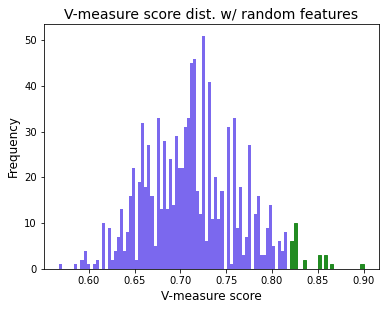

In [50]:
# TODO: keep the right one
fig, axes = plt.subplots(1, 1, figsize=(6,4.5))
# N_1, bins_1, patches_1 = axes[0].hist(mean_all, bins=100, linewidth=1, color='purple', density=False)
# for i, rectangle in enumerate(patches_1):
#     if rectangle.get_x() > threshold_1:
#         patches_1[i].set_color('g')
# axes[0].set_title("Avg. v-measure score dist.", fontsize=16)
# axes[0].set_ylabel("Frequency", fontsize=12)
# axes[0].set_xlabel("V-measure score", fontsize=12)
        
N_2, bins_2, patches_2 = axes.hist(max_all, bins=100, linewidth=1, color='mediumslateblue')
for i, rectangle in enumerate(patches_2):
    if rectangle.get_x() > v2:
        patches_2[i].set_color('forestgreen')
axes.set_title("V-measure score dist. w/ random features", fontsize=14)
axes.set_ylabel("Frequency", fontsize=12)
axes.set_xlabel("V-measure score", fontsize=12)

plt.savefig('statistical_test.pdf')

In [51]:
# run this 10,00 to get the distribution
max_all_2 = classify_networks_unsupervised_with_random_features(X_save[:, :3], labels=labels, repeat_random=10000, repeat=1000)

  0%|          | 1/10000 [00:04<12:11:14,  4.39s/it]

homo:0.74338343733774  compl:0.7704131507956264   v-measure:0.7401937764426121



  0%|          | 2/10000 [00:08<12:10:24,  4.38s/it]

homo:0.7597589881390797  compl:0.8014505939961826   v-measure:0.7646758131379762



  0%|          | 3/10000 [00:13<12:10:26,  4.38s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



  0%|          | 4/10000 [00:17<12:10:00,  4.38s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412252



  0%|          | 5/10000 [00:21<12:11:28,  4.39s/it]

homo:0.6811278124459134  compl:0.6840695058083255   v-measure:0.6769794095941751



  0%|          | 6/10000 [00:26<12:13:09,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  0%|          | 7/10000 [00:30<12:13:43,  4.41s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



  0%|          | 8/10000 [00:35<12:13:28,  4.40s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



  0%|          | 9/10000 [00:39<12:11:51,  4.40s/it]

homo:0.7122556248918266  compl:0.7349964074994696   v-measure:0.713583767378004



  0%|          | 10/10000 [00:43<12:09:16,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



  0%|          | 11/10000 [00:48<12:11:47,  4.40s/it]

homo:0.6311278124459134  compl:0.7641241494651994   v-measure:0.6638029730502711



  0%|          | 12/10000 [00:52<12:15:03,  4.42s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.674994242840644



  0%|          | 13/10000 [00:57<12:14:59,  4.42s/it]

homo:0.7811278124459134  compl:0.7836615961760562   v-measure:0.7763703604882751



  0%|          | 14/10000 [01:01<12:19:16,  4.44s/it]

homo:0.6745112497836532  compl:0.7593631244135326   v-measure:0.6971094317753315



  0%|          | 15/10000 [01:06<12:19:54,  4.45s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



  0%|          | 16/10000 [01:10<12:19:56,  4.45s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



  0%|          | 17/10000 [01:15<12:17:43,  4.43s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



  0%|          | 18/10000 [01:19<12:15:50,  4.42s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



  0%|          | 19/10000 [01:23<12:16:35,  4.43s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  0%|          | 20/10000 [01:28<12:14:18,  4.41s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



  0%|          | 21/10000 [01:32<12:14:07,  4.41s/it]

homo:0.7  compl:0.7412893470079674   v-measure:0.7066681872844695



  0%|          | 22/10000 [01:37<12:12:14,  4.40s/it]

homo:0.7433834373377398  compl:0.7706460453628756   v-measure:0.7343831133733445



  0%|          | 23/10000 [01:41<12:12:44,  4.41s/it]

homo:0.6908868005849929  compl:0.7641241494651994   v-measure:0.700691360012924



  0%|          | 24/10000 [01:45<12:13:45,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  0%|          | 25/10000 [01:50<12:13:40,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  0%|          | 26/10000 [01:54<12:13:42,  4.41s/it]

homo:0.640886800584993  compl:0.6840695058083255   v-measure:0.6499817966358535



  0%|          | 27/10000 [01:59<12:14:29,  4.42s/it]

homo:0.6745112497836533  compl:0.6583736878693041   v-measure:0.666344778134213



  0%|          | 28/10000 [02:03<12:13:24,  4.41s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



  0%|          | 29/10000 [02:07<12:13:10,  4.41s/it]

homo:0.75  compl:0.740919567703215   v-measure:0.7454321317057497



  0%|          | 30/10000 [02:12<12:14:15,  4.42s/it]

homo:0.6499999999999999  compl:0.6906307636214114   v-measure:0.657600291724546



  0%|          | 31/10000 [02:16<12:17:47,  4.44s/it]

homo:0.6745112497836532  compl:0.6819956889993637   v-measure:0.6663447781342129



  0%|          | 32/10000 [02:21<12:16:16,  4.43s/it]

homo:0.75  compl:0.8006765231238118   v-measure:0.7650404166828839



  0%|          | 33/10000 [02:25<12:16:14,  4.43s/it]

homo:0.7311278124459134  compl:0.7359975865969042   v-measure:0.7335546174923275



  0%|          | 34/10000 [02:30<12:14:05,  4.42s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



  0%|          | 35/10000 [02:34<12:10:31,  4.40s/it]

homo:0.8622556248918266  compl:0.8650968712939053   v-measure:0.8528200501441359



  0%|          | 36/10000 [02:38<12:09:21,  4.39s/it]

homo:0.7408868005849931  compl:0.7622177595404481   v-measure:0.7514009233899948



  0%|          | 37/10000 [02:43<12:08:23,  4.39s/it]

homo:0.6245112497836531  compl:0.6095699289934902   v-measure:0.6169501402873319



  0%|          | 38/10000 [02:47<12:07:21,  4.38s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



  0%|          | 39/10000 [02:51<12:07:15,  4.38s/it]

homo:0.7188721875540868  compl:0.7673287847175561   v-measure:0.732119692459629



  0%|          | 40/10000 [02:56<12:06:40,  4.38s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



  0%|          | 41/10000 [03:00<12:06:39,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  0%|          | 42/10000 [03:05<12:06:36,  4.38s/it]

homo:0.590886800584993  compl:0.6280105111662861   v-measure:0.6088833211776151



  0%|          | 43/10000 [03:09<12:06:11,  4.38s/it]

homo:0.6311278124459132  compl:0.691832196179389   v-measure:0.6600872856437435



  0%|          | 44/10000 [03:13<12:08:22,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



  0%|          | 45/10000 [03:18<12:09:29,  4.40s/it]

homo:0.724511249783653  compl:0.7190508371948641   v-measure:0.7157394159810937



  0%|          | 46/10000 [03:22<12:10:33,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



  0%|          | 47/10000 [03:27<12:12:51,  4.42s/it]

homo:0.6811278124459135  compl:0.6817380763945674   v-measure:0.6769794095941754



  0%|          | 48/10000 [03:31<12:13:21,  4.42s/it]

homo:0.6622556248918267  compl:0.6878597380173381   v-measure:0.6627790067674556



  0%|          | 49/10000 [03:35<12:12:23,  4.42s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



  0%|          | 50/10000 [03:40<12:13:17,  4.42s/it]

homo:0.8000000000000002  compl:0.8153881582519116   v-measure:0.8076207854679653



  1%|          | 51/10000 [03:44<12:13:32,  4.42s/it]

homo:0.7122556248918266  compl:0.7486424209111974   v-measure:0.7172531566148677



  1%|          | 52/10000 [03:49<12:14:13,  4.43s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



  1%|          | 53/10000 [03:53<12:18:13,  4.45s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



  1%|          | 54/10000 [03:58<12:16:45,  4.44s/it]

homo:0.6499999999999999  compl:0.691832196179389   v-measure:0.6621271180731242



  1%|          | 55/10000 [04:02<12:10:43,  4.41s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



  1%|          | 56/10000 [04:06<12:08:36,  4.40s/it]

homo:0.724511249783653  compl:0.7543510948371148   v-measure:0.7313759750699058



  1%|          | 57/10000 [04:11<12:06:34,  4.38s/it]

homo:0.7122556248918266  compl:0.7248856012439993   v-measure:0.7079176383767003



  1%|          | 58/10000 [04:15<12:06:04,  4.38s/it]

homo:0.6745112497836533  compl:0.6913626647396287   v-measure:0.6815513521961658



  1%|          | 59/10000 [04:20<12:05:08,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



  1%|          | 60/10000 [04:24<12:07:08,  4.39s/it]

homo:0.6597589881390798  compl:0.665826800548333   v-measure:0.6627790067674558



  1%|          | 61/10000 [04:28<12:06:48,  4.39s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202256



  1%|          | 62/10000 [04:33<12:04:19,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



  1%|          | 63/10000 [04:37<12:05:53,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



  1%|          | 64/10000 [04:41<12:03:51,  4.37s/it]

homo:0.6311278124459134  compl:0.6489997604999648   v-measure:0.6300924594999756



  1%|          | 65/10000 [04:46<12:04:03,  4.37s/it]

homo:0.7122556248918265  compl:0.740193776442612   v-measure:0.7259560027313883



  1%|          | 66/10000 [04:50<12:06:24,  4.39s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



  1%|          | 67/10000 [04:55<12:09:07,  4.40s/it]

homo:0.74338343733774  compl:0.7988911792920128   v-measure:0.7571300034407578



  1%|          | 68/10000 [04:59<12:07:32,  4.40s/it]

homo:0.7188721875540867  compl:0.756707565846407   v-measure:0.7373048077477811



  1%|          | 69/10000 [05:03<12:10:00,  4.41s/it]

homo:0.7122556248918266  compl:0.7735902344426083   v-measure:0.7146197881959715



  1%|          | 70/10000 [05:08<12:08:01,  4.40s/it]

homo:0.7311278124459134  compl:0.7528211958853795   v-measure:0.7380925227063047



  1%|          | 71/10000 [05:12<12:08:24,  4.40s/it]

homo:0.7622556248918267  compl:0.7879971259995759   v-measure:0.7650404166828843



  1%|          | 72/10000 [05:17<12:11:43,  4.42s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



  1%|          | 73/10000 [05:21<12:12:47,  4.43s/it]

homo:0.6433834373377398  compl:0.6992039055169158   v-measure:0.6455189957803699



  1%|          | 74/10000 [05:26<12:15:18,  4.44s/it]

homo:0.7122556248918266  compl:0.7643295204960378   v-measure:0.7243750181293602



  1%|          | 75/10000 [05:30<12:13:23,  4.43s/it]

homo:0.7  compl:0.7402593383693526   v-measure:0.7066681872844695



  1%|          | 76/10000 [05:34<12:08:36,  4.41s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  1%|          | 77/10000 [05:39<12:06:44,  4.39s/it]

homo:0.7622556248918267  compl:0.7593631244135326   v-measure:0.7576131138237505



  1%|          | 78/10000 [05:43<12:04:52,  4.38s/it]

homo:0.6597589881390797  compl:0.7593631244135326   v-measure:0.6893323427848432



  1%|          | 79/10000 [05:47<12:02:33,  4.37s/it]

homo:0.6597589881390798  compl:0.6874215259169559   v-measure:0.6733062505462107



  1%|          | 80/10000 [05:52<12:02:20,  4.37s/it]

homo:0.7245112497836533  compl:0.7259540054580158   v-measure:0.7224742112653622



  1%|          | 81/10000 [05:56<12:02:38,  4.37s/it]

homo:0.7122556248918266  compl:0.7466413950877857   v-measure:0.7135837673780041



  1%|          | 82/10000 [06:01<12:07:26,  4.40s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



  1%|          | 83/10000 [06:05<12:05:39,  4.39s/it]

homo:0.7122556248918266  compl:0.7058823529411764   v-measure:0.7079176383767003



  1%|          | 84/10000 [06:09<12:04:21,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



  1%|          | 85/10000 [06:14<12:04:23,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  1%|          | 86/10000 [06:18<12:03:16,  4.38s/it]

homo:0.85  compl:0.8663499181426558   v-measure:0.8580970845597129



  1%|          | 87/10000 [06:23<12:05:27,  4.39s/it]

homo:0.7622556248918265  compl:0.8074924503847883   v-measure:0.7828988150262907



  1%|          | 88/10000 [06:27<12:03:00,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



  1%|          | 89/10000 [06:31<12:03:23,  4.38s/it]

homo:0.6311278124459134  compl:0.6840695058083254   v-measure:0.6441949189581697



  1%|          | 90/10000 [06:36<12:01:41,  4.37s/it]

homo:0.7286311756931664  compl:0.7691664215734505   v-measure:0.7435926357302229



  1%|          | 91/10000 [06:40<12:02:08,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  1%|          | 92/10000 [06:44<12:03:58,  4.38s/it]

homo:0.7311278124459133  compl:0.8235294117647056   v-measure:0.7567567567567567



  1%|          | 93/10000 [06:49<12:02:24,  4.38s/it]

homo:0.6745112497836531  compl:0.7295868492043736   v-measure:0.7009688822130599



  1%|          | 94/10000 [06:53<12:04:31,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



  1%|          | 95/10000 [06:58<12:04:03,  4.39s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7079176383767003



  1%|          | 96/10000 [07:02<12:05:46,  4.40s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



  1%|          | 97/10000 [07:06<12:05:22,  4.39s/it]

homo:0.724511249783653  compl:0.7134646384704226   v-measure:0.7157394159810937



  1%|          | 98/10000 [07:11<12:05:28,  4.40s/it]

homo:0.6597589881390798  compl:0.7565916651854278   v-measure:0.7048652115710674



  1%|          | 99/10000 [07:15<12:03:14,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  1%|          | 100/10000 [07:20<12:02:30,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



  1%|          | 101/10000 [07:24<12:04:14,  4.39s/it]

homo:0.5745112497836533  compl:0.6104378677106901   v-measure:0.5801322254420246



  1%|          | 102/10000 [07:28<12:02:49,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



  1%|          | 103/10000 [07:33<12:06:47,  4.41s/it]

homo:0.7122556248918266  compl:0.7550011975001767   v-measure:0.7330057581097352



  1%|          | 104/10000 [07:37<12:05:27,  4.40s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



  1%|          | 105/10000 [07:42<12:06:23,  4.40s/it]

homo:0.7311278124459134  compl:0.7326998362853119   v-measure:0.7266748850412251



  1%|          | 106/10000 [07:46<12:08:11,  4.42s/it]

homo:0.6933834373377399  compl:0.6988919566926829   v-measure:0.6849884755264634



  1%|          | 107/10000 [07:50<12:10:20,  4.43s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6876162236145569



  1%|          | 108/10000 [07:55<12:05:33,  4.40s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



  1%|          | 109/10000 [07:59<12:04:57,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



  1%|          | 110/10000 [08:04<12:03:56,  4.39s/it]

homo:0.6933834373377399  compl:0.6959173698408747   v-measure:0.6849884755264634



  1%|          | 111/10000 [08:08<12:02:52,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  1%|          | 112/10000 [08:12<12:01:26,  4.38s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581697



  1%|          | 113/10000 [08:17<12:03:23,  4.39s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



  1%|          | 114/10000 [08:21<12:04:20,  4.40s/it]

homo:0.640886800584993  compl:0.6942661049609861   v-measure:0.6651567442676934



  1%|          | 115/10000 [08:26<12:03:09,  4.39s/it]

homo:0.6786311756931664  compl:0.7070849912111741   v-measure:0.6925659530589233



  1%|          | 116/10000 [08:30<12:02:39,  4.39s/it]

homo:0.8122556248918266  compl:0.7928225532548826   v-measure:0.8024214486124761



  1%|          | 117/10000 [08:34<12:02:13,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



  1%|          | 118/10000 [08:39<12:00:57,  4.38s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



  1%|          | 119/10000 [08:43<11:57:50,  4.36s/it]

homo:0.740886800584993  compl:0.7752406697558912   v-measure:0.7514009233899946



  1%|          | 120/10000 [08:47<11:59:47,  4.37s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



  1%|          | 121/10000 [08:52<11:59:26,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



  1%|          | 122/10000 [08:56<11:59:04,  4.37s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



  1%|          | 123/10000 [09:00<11:58:34,  4.37s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



  1%|          | 124/10000 [09:05<11:58:08,  4.36s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



  1%|▏         | 125/10000 [09:09<11:57:46,  4.36s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



  1%|▏         | 126/10000 [09:14<11:59:26,  4.37s/it]

homo:0.6811278124459134  compl:0.7280849265342196   v-measure:0.6876162236145567



  1%|▏         | 127/10000 [09:18<12:00:33,  4.38s/it]

homo:0.8622556248918266  compl:0.8606338059324616   v-measure:0.8570040647178503



  1%|▏         | 128/10000 [09:22<11:59:38,  4.37s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



  1%|▏         | 129/10000 [09:27<11:59:10,  4.37s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



  1%|▏         | 130/10000 [09:31<11:58:59,  4.37s/it]

homo:0.7597589881390797  compl:0.7788448688525661   v-measure:0.7632367525022876



  1%|▏         | 131/10000 [09:35<11:59:41,  4.38s/it]

homo:0.7122556248918266  compl:0.7201649487201219   v-measure:0.7146197881959715



  1%|▏         | 132/10000 [09:40<12:03:03,  4.40s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



  1%|▏         | 133/10000 [09:44<11:59:24,  4.37s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



  1%|▏         | 134/10000 [09:49<11:59:36,  4.38s/it]

homo:0.6499999999999999  compl:0.7190508371948641   v-measure:0.6771371795709593



  1%|▏         | 135/10000 [09:53<11:58:23,  4.37s/it]

homo:0.6811278124459134  compl:0.7050516219490742   v-measure:0.6881368242941603



  1%|▏         | 136/10000 [09:57<11:59:48,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



  1%|▏         | 137/10000 [10:02<11:57:20,  4.36s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



  1%|▏         | 138/10000 [10:06<12:01:40,  4.39s/it]

homo:0.7311278124459133  compl:0.7550011975001767   v-measure:0.7330057581097352



  1%|▏         | 139/10000 [10:10<11:59:41,  4.38s/it]

homo:0.6622556248918267  compl:0.6755042190452484   v-measure:0.664453825076726



  1%|▏         | 140/10000 [10:15<11:57:19,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



  1%|▏         | 141/10000 [10:19<11:57:10,  4.36s/it]

homo:0.6597589881390798  compl:0.6874215259169559   v-measure:0.6733062505462107



  1%|▏         | 142/10000 [10:24<11:59:16,  4.38s/it]

homo:0.724511249783653  compl:0.7836694793634987   v-measure:0.7529301269245372



  1%|▏         | 143/10000 [10:28<11:57:09,  4.37s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



  1%|▏         | 144/10000 [10:32<11:56:28,  4.36s/it]

homo:0.7408868005849929  compl:0.7773096452131553   v-measure:0.7586613151410303



  1%|▏         | 145/10000 [10:37<11:57:11,  4.37s/it]

homo:0.6975033632472531  compl:0.7499999999999999   v-measure:0.7172531566148674



  1%|▏         | 146/10000 [10:41<11:58:51,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



  1%|▏         | 147/10000 [10:45<11:57:47,  4.37s/it]

homo:0.7622556248918267  compl:0.7874345778093064   v-measure:0.763451841046769



  1%|▏         | 148/10000 [10:50<11:56:39,  4.36s/it]

homo:0.6622556248918267  compl:0.764705882352941   v-measure:0.7027027027027025



  1%|▏         | 149/10000 [10:54<11:56:32,  4.36s/it]

homo:0.64338343733774  compl:0.6959173698408746   v-measure:0.6686200846163581



  2%|▏         | 150/10000 [10:59<12:00:02,  4.39s/it]

homo:0.740886800584993  compl:0.8235294117647058   v-measure:0.7567567567567567



  2%|▏         | 151/10000 [11:03<12:02:13,  4.40s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



  2%|▏         | 152/10000 [11:07<12:02:45,  4.40s/it]

homo:0.7097589881390797  compl:0.7735902344426083   v-measure:0.731375975069906



  2%|▏         | 153/10000 [11:12<12:02:39,  4.40s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



  2%|▏         | 154/10000 [11:16<12:03:18,  4.41s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



  2%|▏         | 155/10000 [11:21<12:02:26,  4.40s/it]

homo:0.6622556248918265  compl:0.7402593383693526   v-measure:0.6971094317753314



  2%|▏         | 156/10000 [11:25<12:02:34,  4.40s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6149969595179315



  2%|▏         | 157/10000 [11:29<12:00:12,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  2%|▏         | 158/10000 [11:34<11:59:02,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



  2%|▏         | 159/10000 [11:38<12:00:39,  4.39s/it]

homo:0.7122556248918267  compl:0.7274574259606866   v-measure:0.7134646384704225



  2%|▏         | 160/10000 [11:43<12:02:16,  4.40s/it]

homo:0.8122556248918267  compl:0.8581652603182506   v-measure:0.8245038187507913



  2%|▏         | 161/10000 [11:47<12:01:01,  4.40s/it]

homo:0.7311278124459133  compl:0.7499999999999999   v-measure:0.726674885041225



  2%|▏         | 162/10000 [11:51<12:00:35,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



  2%|▏         | 163/10000 [11:56<11:58:00,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  2%|▏         | 164/10000 [12:00<11:57:35,  4.38s/it]

homo:0.7408868005849929  compl:0.7543510948371149   v-measure:0.7442781783146024



  2%|▏         | 165/10000 [12:04<11:57:14,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



  2%|▏         | 166/10000 [12:09<11:55:41,  4.37s/it]

homo:0.7122556248918267  compl:0.7500000000000001   v-measure:0.7079176383767004



  2%|▏         | 167/10000 [12:13<11:57:10,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



  2%|▏         | 168/10000 [12:18<11:56:55,  4.38s/it]

homo:0.6745112497836532  compl:0.6723935305517249   v-measure:0.672614791450894



  2%|▏         | 169/10000 [12:22<11:57:14,  4.38s/it]

homo:0.7245112497836533  compl:0.7204485953214318   v-measure:0.7224742112653618



  2%|▏         | 170/10000 [12:26<11:55:29,  4.37s/it]

homo:0.7433834373377397  compl:0.7879971259995756   v-measure:0.7650404166828837



  2%|▏         | 171/10000 [12:31<11:53:26,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  2%|▏         | 172/10000 [12:35<11:53:53,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



  2%|▏         | 173/10000 [12:39<11:54:26,  4.36s/it]

homo:0.7433834373377397  compl:0.7879971259995756   v-measure:0.7650404166828837



  2%|▏         | 174/10000 [12:44<11:56:39,  4.38s/it]

homo:0.6933834373377399  compl:0.7224213968133131   v-measure:0.7006913600129242



  2%|▏         | 175/10000 [12:48<11:55:24,  4.37s/it]

homo:0.8311278124459134  compl:0.840997844499682   v-measure:0.8260658359353252



  2%|▏         | 176/10000 [12:52<11:56:35,  4.38s/it]

homo:0.7000000000000001  compl:0.7499999999999999   v-measure:0.7205813293278358



  2%|▏         | 177/10000 [12:57<11:57:31,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



  2%|▏         | 178/10000 [13:01<11:58:33,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



  2%|▏         | 179/10000 [13:06<11:58:22,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



  2%|▏         | 180/10000 [13:10<11:58:14,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  2%|▏         | 181/10000 [13:14<11:58:25,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



  2%|▏         | 182/10000 [13:19<11:59:22,  4.40s/it]

homo:0.7311278124459134  compl:0.7706460453628757   v-measure:0.7266748850412252



  2%|▏         | 183/10000 [13:23<11:57:01,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



  2%|▏         | 184/10000 [13:28<11:55:45,  4.38s/it]

homo:0.7622556248918265  compl:0.7591814035583481   v-measure:0.7576131138237503



  2%|▏         | 185/10000 [13:32<11:54:17,  4.37s/it]

homo:0.6908868005849929  compl:0.7342932222616328   v-measure:0.7119290010903843



  2%|▏         | 186/10000 [13:36<11:53:19,  4.36s/it]

homo:0.7220146130309063  compl:0.797256357263943   v-measure:0.7523627922860879



  2%|▏         | 187/10000 [13:41<11:53:02,  4.36s/it]

homo:0.6597589881390797  compl:0.6840695058083255   v-measure:0.6627790067674557



  2%|▏         | 188/10000 [13:45<11:53:03,  4.36s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



  2%|▏         | 189/10000 [13:49<11:52:05,  4.35s/it]

homo:0.75  compl:0.7890705789535846   v-measure:0.7571444863762172



  2%|▏         | 190/10000 [13:54<11:52:20,  4.36s/it]

homo:0.7811278124459134  compl:0.7773096452131554   v-measure:0.7763703604882751



  2%|▏         | 191/10000 [13:58<11:53:12,  4.36s/it]

homo:0.6811278124459134  compl:0.7129632172508062   v-measure:0.6815513521961657



  2%|▏         | 192/10000 [14:02<11:52:13,  4.36s/it]

homo:0.7786311756931664  compl:0.8275503229602703   v-measure:0.8023457890058123



  2%|▏         | 193/10000 [14:07<11:51:42,  4.35s/it]

homo:0.6688721875540866  compl:0.682243866579769   v-measure:0.6752438518626345



  2%|▏         | 194/10000 [14:11<11:55:29,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



  2%|▏         | 195/10000 [14:16<11:55:59,  4.38s/it]

homo:0.8122556248918266  compl:0.8153881582519115   v-measure:0.8076207854679651



  2%|▏         | 196/10000 [14:20<11:56:08,  4.38s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



  2%|▏         | 197/10000 [14:24<11:56:24,  4.38s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



  2%|▏         | 198/10000 [14:29<11:57:22,  4.39s/it]

homo:0.7811278124459132  compl:0.8093391447937754   v-measure:0.7885868590298325



  2%|▏         | 199/10000 [14:33<11:55:42,  4.38s/it]

homo:0.6433834373377398  compl:0.6558837341344328   v-measure:0.6455189957803699



  2%|▏         | 200/10000 [14:38<11:55:56,  4.38s/it]

homo:0.6811278124459134  compl:0.7670932826957193   v-measure:0.7087839038141291



  2%|▏         | 201/10000 [14:42<11:55:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7402593383693525   v-measure:0.7243329332175102



  2%|▏         | 202/10000 [14:46<12:01:07,  4.42s/it]

homo:0.6786311756931664  compl:0.7070849912111741   v-measure:0.6925659530589233



  2%|▏         | 203/10000 [14:51<11:56:02,  4.39s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



  2%|▏         | 204/10000 [14:55<11:55:45,  4.38s/it]

homo:0.6622556248918267  compl:0.6819956889993637   v-measure:0.6621271180731243



  2%|▏         | 205/10000 [14:59<11:56:11,  4.39s/it]

homo:0.6720146130309061  compl:0.7259540054580157   v-measure:0.6926434063220908



  2%|▏         | 206/10000 [15:04<11:53:25,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



  2%|▏         | 207/10000 [15:08<11:53:53,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



  2%|▏         | 208/10000 [15:13<11:53:57,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



  2%|▏         | 209/10000 [15:17<11:53:34,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



  2%|▏         | 210/10000 [15:21<11:53:39,  4.37s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



  2%|▏         | 211/10000 [15:26<11:53:55,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



  2%|▏         | 212/10000 [15:30<11:55:45,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



  2%|▏         | 213/10000 [15:34<11:52:37,  4.37s/it]

homo:0.7122556248918266  compl:0.775240669755891   v-measure:0.7330057581097353



  2%|▏         | 214/10000 [15:39<11:53:43,  4.38s/it]

homo:0.7622556248918265  compl:0.7824947361991552   v-measure:0.7576131138237503



  2%|▏         | 215/10000 [15:43<11:54:00,  4.38s/it]

homo:0.7433834373377398  compl:0.7691664215734505   v-measure:0.7514009233899946



  2%|▏         | 216/10000 [15:48<11:54:09,  4.38s/it]

homo:0.7500000000000001  compl:0.7670932826957192   v-measure:0.7571444863762176



  2%|▏         | 217/10000 [15:52<11:55:16,  4.39s/it]

homo:0.6122556248918265  compl:0.6480683837417682   v-measure:0.6283302951571368



  2%|▏         | 218/10000 [15:56<11:53:24,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



  2%|▏         | 219/10000 [16:01<11:52:05,  4.37s/it]

homo:0.7245112497836533  compl:0.7457950932638152   v-measure:0.7224742112653622



  2%|▏         | 220/10000 [16:05<11:52:14,  4.37s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



  2%|▏         | 221/10000 [16:09<11:52:01,  4.37s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



  2%|▏         | 222/10000 [16:14<11:52:22,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



  2%|▏         | 223/10000 [16:18<11:52:07,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  2%|▏         | 224/10000 [16:23<11:52:57,  4.38s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



  2%|▏         | 225/10000 [16:27<11:53:03,  4.38s/it]

homo:0.7188721875540867  compl:0.7593631244135326   v-measure:0.7188721875540867



  2%|▏         | 226/10000 [16:31<11:53:33,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



  2%|▏         | 227/10000 [16:36<11:52:58,  4.38s/it]

homo:0.64338343733774  compl:0.6942661049609861   v-measure:0.6651567442676934



  2%|▏         | 228/10000 [16:40<11:54:29,  4.39s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



  2%|▏         | 229/10000 [16:44<11:54:08,  4.39s/it]

homo:0.7311278124459133  compl:0.7752406697558912   v-measure:0.730051692388121



  2%|▏         | 230/10000 [16:49<11:55:23,  4.39s/it]

homo:0.6688721875540868  compl:0.7110902344426084   v-measure:0.6752438518626347



  2%|▏         | 231/10000 [16:53<11:54:00,  4.39s/it]

homo:0.79338343733774  compl:0.7981605972731443   v-measure:0.7945070511820185



  2%|▏         | 232/10000 [16:58<11:54:07,  4.39s/it]

homo:0.8122556248918266  compl:0.8422290645526356   v-measure:0.8073085892708003



  2%|▏         | 233/10000 [17:02<11:54:29,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



  2%|▏         | 234/10000 [17:06<11:55:22,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



  2%|▏         | 235/10000 [17:11<11:53:26,  4.38s/it]

homo:0.740886800584993  compl:0.774408967412597   v-measure:0.7514009233899946



  2%|▏         | 236/10000 [17:15<11:53:06,  4.38s/it]

homo:0.740886800584993  compl:0.759181403558348   v-measure:0.7442781783146026



  2%|▏         | 237/10000 [17:20<11:53:52,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  2%|▏         | 238/10000 [17:24<11:52:29,  4.38s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



  2%|▏         | 239/10000 [17:28<11:54:16,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  2%|▏         | 240/10000 [17:33<11:55:51,  4.40s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



  2%|▏         | 241/10000 [17:37<11:54:36,  4.39s/it]

homo:0.64338343733774  compl:0.6811518667139596   v-measure:0.6604061611339996



  2%|▏         | 242/10000 [17:42<11:51:34,  4.38s/it]

homo:0.7245112497836533  compl:0.7402593383693526   v-measure:0.7243329332175102



  2%|▏         | 243/10000 [17:46<11:51:09,  4.37s/it]

homo:0.7122556248918266  compl:0.7543510948371148   v-measure:0.7313759750699058



  2%|▏         | 244/10000 [17:50<11:51:08,  4.37s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



  2%|▏         | 245/10000 [17:55<11:52:38,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



  2%|▏         | 246/10000 [17:59<11:50:19,  4.37s/it]

homo:0.7122556248918266  compl:0.7486424209111973   v-measure:0.7172531566148675



  2%|▏         | 247/10000 [18:03<11:49:28,  4.36s/it]

homo:0.6908868005849929  compl:0.7402593383693526   v-measure:0.6971094317753314



  2%|▏         | 248/10000 [18:08<11:48:41,  4.36s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



  2%|▏         | 249/10000 [18:12<11:51:13,  4.38s/it]

homo:0.7311278124459135  compl:0.7428022206163571   v-measure:0.7322609155732361



  2%|▎         | 250/10000 [18:17<11:51:38,  4.38s/it]

homo:0.6745112497836533  compl:0.7020004790000709   v-measure:0.6815491088048555



  3%|▎         | 251/10000 [18:21<11:50:23,  4.37s/it]

homo:0.6811278124459132  compl:0.7499999999999999   v-measure:0.6769794095941751



  3%|▎         | 252/10000 [18:25<11:50:52,  4.38s/it]

homo:0.624511249783653  compl:0.682243866579769   v-measure:0.6490076375015823



  3%|▎         | 253/10000 [18:30<11:49:12,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  3%|▎         | 254/10000 [18:34<11:52:11,  4.38s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



  3%|▎         | 255/10000 [18:38<11:53:19,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  3%|▎         | 256/10000 [18:43<11:55:23,  4.41s/it]

homo:0.6622556248918267  compl:0.6692613971224549   v-measure:0.6644538250767258



  3%|▎         | 257/10000 [18:47<11:52:14,  4.39s/it]

homo:0.8000000000000002  compl:0.8355724032748092   v-measure:0.8000000000000002



  3%|▎         | 258/10000 [18:52<11:51:05,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  3%|▎         | 259/10000 [18:56<11:50:58,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  3%|▎         | 260/10000 [19:00<11:51:10,  4.38s/it]

homo:0.7688721875540867  compl:0.7920386217965029   v-measure:0.77619645004613



  3%|▎         | 261/10000 [19:05<11:51:21,  4.38s/it]

homo:0.6811278124459132  compl:0.7058823529411763   v-measure:0.6769794095941751



  3%|▎         | 262/10000 [19:09<11:50:28,  4.38s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



  3%|▎         | 263/10000 [19:13<11:50:36,  4.38s/it]

homo:0.64338343733774  compl:0.6959173698408748   v-measure:0.6686200846163584



  3%|▎         | 264/10000 [19:18<11:51:39,  4.39s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



  3%|▎         | 265/10000 [19:22<11:49:53,  4.38s/it]

homo:0.6622556248918264  compl:0.6549885788640001   v-measure:0.6582221629296502



  3%|▎         | 266/10000 [19:27<11:49:15,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  3%|▎         | 267/10000 [19:31<11:51:09,  4.38s/it]

homo:0.7622556248918265  compl:0.7799084809951996   v-measure:0.7576131138237503



  3%|▎         | 268/10000 [19:35<11:52:44,  4.39s/it]

homo:0.8188721875540868  compl:0.843710762958478   v-measure:0.8266727491378781



  3%|▎         | 269/10000 [19:40<11:50:42,  4.38s/it]

homo:0.69338343733774  compl:0.705278006982814   v-measure:0.6849884755264636



  3%|▎         | 270/10000 [19:44<11:50:56,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



  3%|▎         | 271/10000 [19:49<11:49:49,  4.38s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



  3%|▎         | 272/10000 [19:53<11:52:02,  4.39s/it]

homo:0.7311278124459133  compl:0.7326998362853117   v-measure:0.7266748850412251



  3%|▎         | 273/10000 [19:57<11:49:51,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  3%|▎         | 274/10000 [20:02<11:48:45,  4.37s/it]

homo:0.6433834373377398  compl:0.6356078838702112   v-measure:0.6355938376795824



  3%|▎         | 275/10000 [20:06<11:51:54,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  3%|▎         | 276/10000 [20:10<11:50:21,  4.38s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



  3%|▎         | 277/10000 [20:15<11:49:13,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



  3%|▎         | 278/10000 [20:19<11:52:19,  4.40s/it]

homo:0.6811278124459132  compl:0.6856645549389576   v-measure:0.6833886543730819



  3%|▎         | 279/10000 [20:24<11:50:56,  4.39s/it]

homo:0.6745112497836532  compl:0.6666666666666667   v-measure:0.6663447781342129



  3%|▎         | 280/10000 [20:28<11:49:21,  4.38s/it]

homo:0.6745112497836532  compl:0.6913626647396287   v-measure:0.6815513521961658



  3%|▎         | 281/10000 [20:32<11:48:44,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



  3%|▎         | 282/10000 [20:37<11:47:11,  4.37s/it]

homo:0.6811278124459132  compl:0.7078449788459105   v-measure:0.6942294406555333



  3%|▎         | 283/10000 [20:41<11:48:29,  4.37s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



  3%|▎         | 284/10000 [20:45<11:50:18,  4.39s/it]

homo:0.7087128886399192  compl:0.7799084809951994   v-measure:0.7426081658042585



  3%|▎         | 285/10000 [20:50<11:49:38,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  3%|▎         | 286/10000 [20:54<11:50:48,  4.39s/it]

homo:0.7688721875540868  compl:0.7799084809951996   v-measure:0.7688721875540868



  3%|▎         | 287/10000 [20:59<11:48:14,  4.38s/it]

homo:0.7408868005849931  compl:0.7477007465914305   v-measure:0.7442781783146026



  3%|▎         | 288/10000 [21:03<11:47:43,  4.37s/it]

homo:0.7286311756931663  compl:0.7744089674125969   v-measure:0.7508229490494276



  3%|▎         | 289/10000 [21:07<11:48:43,  4.38s/it]

homo:0.7811278124459134  compl:0.7961529604370223   v-measure:0.7885688217980524



  3%|▎         | 290/10000 [21:12<11:49:20,  4.38s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



  3%|▎         | 291/10000 [21:16<11:50:29,  4.39s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



  3%|▎         | 292/10000 [21:21<11:48:10,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



  3%|▎         | 293/10000 [21:25<11:48:19,  4.38s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



  3%|▎         | 294/10000 [21:29<11:47:21,  4.37s/it]

homo:0.8311278124459134  compl:0.8366636499127968   v-measure:0.8338865437308187



  3%|▎         | 295/10000 [21:34<11:48:04,  4.38s/it]

homo:0.7097589881390797  compl:0.7486424209111973   v-measure:0.7243329332175101



  3%|▎         | 296/10000 [21:38<11:49:13,  4.39s/it]

homo:0.6311278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



  3%|▎         | 297/10000 [21:42<11:49:49,  4.39s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



  3%|▎         | 298/10000 [21:47<11:50:44,  4.40s/it]

homo:0.7811278124459134  compl:0.7961529604370223   v-measure:0.7885688217980524



  3%|▎         | 299/10000 [21:51<11:52:58,  4.41s/it]

homo:0.6499999999999999  compl:0.6819956889993636   v-measure:0.6621271180731242



  3%|▎         | 300/10000 [21:56<11:50:38,  4.40s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6876162236145569



  3%|▎         | 301/10000 [22:00<11:49:43,  4.39s/it]

homo:0.6220146130309063  compl:0.6878597380173381   v-measure:0.6519026111583365



  3%|▎         | 302/10000 [22:04<11:51:41,  4.40s/it]

homo:0.6745112497836532  compl:0.7220361316967545   v-measure:0.6815513521961658



  3%|▎         | 303/10000 [22:09<11:52:05,  4.41s/it]

homo:0.7622556248918265  compl:0.7879971259995757   v-measure:0.7650404166828838



  3%|▎         | 304/10000 [22:13<11:50:08,  4.39s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6849884755264634



  3%|▎         | 305/10000 [22:18<11:48:53,  4.39s/it]

homo:0.6933834373377399  compl:0.6853223367519918   v-measure:0.6849884755264634



  3%|▎         | 306/10000 [22:22<11:48:22,  4.38s/it]

homo:0.79338343733774  compl:0.7750059875008839   v-measure:0.7837777512202256



  3%|▎         | 307/10000 [22:26<11:49:54,  4.39s/it]

homo:0.7286311756931664  compl:0.782069845656019   v-measure:0.7508229490494277



  3%|▎         | 308/10000 [22:31<11:52:45,  4.41s/it]

homo:0.7122556248918268  compl:0.7134646384704225   v-measure:0.7079176383767005



  3%|▎         | 309/10000 [22:35<11:53:10,  4.42s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



  3%|▎         | 310/10000 [22:40<11:52:59,  4.41s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



  3%|▎         | 311/10000 [22:44<11:51:20,  4.41s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



  3%|▎         | 312/10000 [22:49<11:51:28,  4.41s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



  3%|▎         | 313/10000 [22:53<11:48:26,  4.39s/it]

homo:0.7097589881390797  compl:0.7280849265342197   v-measure:0.7130078796348717



  3%|▎         | 314/10000 [22:57<11:49:38,  4.40s/it]

homo:0.640886800584993  compl:0.6558837341344329   v-measure:0.6438204325797708



  3%|▎         | 315/10000 [23:02<11:48:02,  4.39s/it]

homo:0.6745112497836532  compl:0.6819956889993637   v-measure:0.6663447781342129



  3%|▎         | 316/10000 [23:06<11:47:46,  4.39s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7530268107655953



  3%|▎         | 317/10000 [23:10<11:46:41,  4.38s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



  3%|▎         | 318/10000 [23:15<11:47:54,  4.39s/it]

homo:0.7500000000000001  compl:0.7428022206163574   v-measure:0.7454321317057498



  3%|▎         | 319/10000 [23:19<11:48:37,  4.39s/it]

homo:0.9000000000000001  compl:0.9000000000000001   v-measure:0.9000000000000001



  3%|▎         | 320/10000 [23:24<11:50:50,  4.41s/it]

homo:0.7311278124459134  compl:0.7922880996037921   v-measure:0.7496861036678235



  3%|▎         | 321/10000 [23:28<11:48:17,  4.39s/it]

homo:0.6745112497836532  compl:0.665826800548333   v-measure:0.6663447781342129



  3%|▎         | 322/10000 [23:32<11:48:09,  4.39s/it]

homo:0.7122556248918266  compl:0.7402593383693525   v-measure:0.7079176383767003



  3%|▎         | 323/10000 [23:37<11:46:26,  4.38s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7130078796348717



  3%|▎         | 324/10000 [23:41<11:44:36,  4.37s/it]

homo:0.6000000000000001  compl:0.6280105111662861   v-measure:0.6088833211776151



  3%|▎         | 325/10000 [23:45<11:45:54,  4.38s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



  3%|▎         | 326/10000 [23:50<11:44:58,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



  3%|▎         | 327/10000 [23:54<11:44:02,  4.37s/it]

homo:0.6622556248918265  compl:0.6988919566926829   v-measure:0.6644538250767259



  3%|▎         | 328/10000 [23:59<11:44:37,  4.37s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



  3%|▎         | 329/10000 [24:03<11:43:55,  4.37s/it]

homo:0.6311278124459134  compl:0.6525451646209433   v-measure:0.6371399245228089



  3%|▎         | 330/10000 [24:07<11:45:49,  4.38s/it]

homo:0.6745112497836531  compl:0.6692613971224549   v-measure:0.6663447781342128



  3%|▎         | 331/10000 [24:12<11:46:43,  4.39s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



  3%|▎         | 332/10000 [24:16<11:50:35,  4.41s/it]

homo:0.69338343733774  compl:0.7088666033696491   v-measure:0.6849884755264636



  3%|▎         | 333/10000 [24:21<11:49:18,  4.40s/it]

homo:0.6433834373377398  compl:0.6593386477869908   v-measure:0.6499817966358534



  3%|▎         | 334/10000 [24:25<11:45:06,  4.38s/it]

homo:0.7000000000000001  compl:0.7890705789535843   v-measure:0.7290906307641919



  3%|▎         | 335/10000 [24:29<11:44:20,  4.37s/it]

homo:0.6720146130309061  compl:0.7020004790000707   v-measure:0.6815513521961656



  3%|▎         | 336/10000 [24:34<11:45:05,  4.38s/it]

homo:0.7245112497836533  compl:0.7349964074994696   v-measure:0.7157394159810941



  3%|▎         | 337/10000 [24:38<11:43:06,  4.37s/it]

homo:0.6933834373377399  compl:0.7402593383693525   v-measure:0.6993001090930431



  3%|▎         | 338/10000 [24:42<11:45:00,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



  3%|▎         | 339/10000 [24:47<11:46:07,  4.39s/it]

homo:0.6622556248918267  compl:0.6692613971224549   v-measure:0.664453825076726



  3%|▎         | 340/10000 [24:51<11:46:12,  4.39s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



  3%|▎         | 341/10000 [24:56<11:45:26,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



  3%|▎         | 342/10000 [25:00<11:46:07,  4.39s/it]

homo:0.7500000000000001  compl:0.7550011975001767   v-measure:0.74543213170575



  3%|▎         | 343/10000 [25:04<11:45:19,  4.38s/it]

homo:0.7000000000000001  compl:0.7052780069828142   v-measure:0.7000000000000001



  3%|▎         | 344/10000 [25:09<11:45:26,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



  3%|▎         | 345/10000 [25:13<11:44:48,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



  3%|▎         | 346/10000 [25:17<11:46:12,  4.39s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



  3%|▎         | 347/10000 [25:22<11:44:13,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



  3%|▎         | 348/10000 [25:26<11:44:30,  4.38s/it]

homo:0.7622556248918264  compl:0.7921550211540894   v-measure:0.7769177626221327



  3%|▎         | 349/10000 [25:31<11:44:47,  4.38s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



  4%|▎         | 350/10000 [25:35<11:47:08,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  4%|▎         | 351/10000 [25:39<11:47:53,  4.40s/it]

homo:0.6122556248918265  compl:0.6214215888861232   v-measure:0.6085266874826003



  4%|▎         | 352/10000 [25:44<11:54:29,  4.44s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



  4%|▎         | 353/10000 [25:48<11:49:58,  4.42s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



  4%|▎         | 354/10000 [25:53<11:47:33,  4.40s/it]

homo:0.6622556248918264  compl:0.7259540054580155   v-measure:0.6926434063220906



  4%|▎         | 355/10000 [25:57<11:47:13,  4.40s/it]

homo:0.6811278124459131  compl:0.7190508371948638   v-measure:0.6876162236145565



  4%|▎         | 356/10000 [26:01<11:46:14,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



  4%|▎         | 357/10000 [26:06<11:45:13,  4.39s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



  4%|▎         | 358/10000 [26:10<11:44:00,  4.38s/it]

homo:0.6622556248918267  compl:0.6622478904773759   v-measure:0.6582221629296504



  4%|▎         | 359/10000 [26:15<11:47:37,  4.40s/it]

homo:0.64338343733774  compl:0.6617514078627852   v-measure:0.6355938376795824



  4%|▎         | 360/10000 [26:19<11:46:17,  4.40s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



  4%|▎         | 361/10000 [26:23<11:43:49,  4.38s/it]

homo:0.6245112497836531  compl:0.6278796732472982   v-measure:0.616950140287332



  4%|▎         | 362/10000 [26:28<11:39:27,  4.35s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



  4%|▎         | 363/10000 [26:32<11:41:51,  4.37s/it]

homo:0.7311278124459133  compl:0.7647058823529411   v-measure:0.726674885041225



  4%|▎         | 364/10000 [26:37<11:44:23,  4.39s/it]

homo:0.690886800584993  compl:0.7565916651854276   v-measure:0.7172531566148674



  4%|▎         | 365/10000 [26:41<11:43:51,  4.38s/it]

homo:0.6908868005849932  compl:0.7342932222616331   v-measure:0.7119290010903845



  4%|▎         | 366/10000 [26:45<11:43:13,  4.38s/it]

homo:0.740886800584993  compl:0.7799084809951993   v-measure:0.7442781783146026



  4%|▎         | 367/10000 [26:50<11:42:51,  4.38s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



  4%|▎         | 368/10000 [26:54<11:42:23,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



  4%|▎         | 369/10000 [26:58<11:44:24,  4.39s/it]

homo:0.640886800584993  compl:0.6918321961793891   v-measure:0.6600872856437435



  4%|▎         | 370/10000 [27:03<11:45:01,  4.39s/it]

homo:0.6122556248918265  compl:0.6289949704992576   v-measure:0.6142878619574802



  4%|▎         | 371/10000 [27:07<11:43:39,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



  4%|▎         | 372/10000 [27:12<11:46:46,  4.40s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



  4%|▎         | 373/10000 [27:16<11:44:46,  4.39s/it]

homo:0.690886800584993  compl:0.7190508371948641   v-measure:0.6940493054471867



  4%|▎         | 374/10000 [27:20<11:42:43,  4.38s/it]

homo:0.74338343733774  compl:0.7392149581874944   v-measure:0.7412933377068939



  4%|▍         | 375/10000 [27:25<11:40:26,  4.37s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



  4%|▍         | 376/10000 [27:29<11:39:04,  4.36s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



  4%|▍         | 377/10000 [27:33<11:40:02,  4.36s/it]

homo:0.6433834373377398  compl:0.6399231088629   v-measure:0.6355938376795824



  4%|▍         | 378/10000 [27:38<11:41:43,  4.38s/it]

homo:0.6622556248918267  compl:0.6558837341344331   v-measure:0.6582221629296504



  4%|▍         | 379/10000 [27:42<11:40:54,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



  4%|▍         | 380/10000 [27:47<11:43:05,  4.39s/it]

homo:0.8311278124459134  compl:0.840997844499682   v-measure:0.8260658359353253



  4%|▍         | 381/10000 [27:51<11:41:11,  4.37s/it]

homo:0.7122556248918268  compl:0.7107782036637196   v-measure:0.7079176383767006



  4%|▍         | 382/10000 [27:55<11:42:03,  4.38s/it]

homo:0.7122556248918266  compl:0.7349496109445111   v-measure:0.7079176383767004



  4%|▍         | 383/10000 [28:00<11:39:21,  4.36s/it]

homo:0.6097589881390798  compl:0.6418347396817495   v-measure:0.6222795678749112



  4%|▍         | 384/10000 [28:04<11:39:35,  4.37s/it]

homo:0.6597589881390797  compl:0.6874215259169559   v-measure:0.6733062505462106



  4%|▍         | 385/10000 [28:08<11:40:31,  4.37s/it]

homo:0.6688721875540866  compl:0.7110902344426083   v-measure:0.6688721875540866



  4%|▍         | 386/10000 [28:13<11:42:16,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.783720580611573



  4%|▍         | 387/10000 [28:17<11:42:02,  4.38s/it]

homo:0.690886800584993  compl:0.7248856012439994   v-measure:0.6940493054471867



  4%|▍         | 388/10000 [28:22<11:42:46,  4.39s/it]

homo:0.8622556248918266  compl:0.8422290645526358   v-measure:0.851816086459357



  4%|▍         | 389/10000 [28:26<11:42:33,  4.39s/it]

homo:0.6933834373377399  compl:0.7070849912111741   v-measure:0.6925659530589233



  4%|▍         | 390/10000 [28:30<11:40:10,  4.37s/it]

homo:0.7311278124459134  compl:0.7670932826957192   v-measure:0.7380925227063045



  4%|▍         | 391/10000 [28:35<11:40:40,  4.38s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



  4%|▍         | 392/10000 [28:39<11:38:34,  4.36s/it]

homo:0.8097589881390798  compl:0.8333333333333335   v-measure:0.8134656253697035



  4%|▍         | 393/10000 [28:43<11:38:37,  4.36s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  4%|▍         | 394/10000 [28:48<11:37:57,  4.36s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



  4%|▍         | 395/10000 [28:52<11:39:31,  4.37s/it]

homo:0.6898407010858326  compl:0.7752406697558913   v-measure:0.7300516923881211



  4%|▍         | 396/10000 [28:57<11:40:04,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



  4%|▍         | 397/10000 [29:01<11:41:01,  4.38s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.7135837673780041



  4%|▍         | 398/10000 [29:05<11:38:54,  4.37s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



  4%|▍         | 399/10000 [29:10<11:41:07,  4.38s/it]

homo:0.7000000000000001  compl:0.7212676118649237   v-measure:0.7066681872844696



  4%|▍         | 400/10000 [29:14<11:42:07,  4.39s/it]

homo:0.6622556248918267  compl:0.6628610046338369   v-measure:0.6582221629296504



  4%|▍         | 401/10000 [29:18<11:41:57,  4.39s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



  4%|▍         | 402/10000 [29:23<11:42:54,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



  4%|▍         | 403/10000 [29:27<11:41:34,  4.39s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



  4%|▍         | 404/10000 [29:32<11:41:40,  4.39s/it]

homo:0.6622556248918267  compl:0.6625028785796779   v-measure:0.6582221629296504



  4%|▍         | 405/10000 [29:36<11:41:25,  4.39s/it]

homo:0.7000000000000001  compl:0.7212676118649236   v-measure:0.7066681872844697



  4%|▍         | 406/10000 [29:40<11:40:50,  4.38s/it]

homo:0.6087128886399193  compl:0.6840695058083255   v-measure:0.6441949189581697



  4%|▍         | 407/10000 [29:45<11:38:44,  4.37s/it]

homo:0.7311278124459133  compl:0.7807632043664126   v-measure:0.7449376700692072



  4%|▍         | 408/10000 [29:49<11:39:33,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



  4%|▍         | 409/10000 [29:54<11:40:54,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



  4%|▍         | 410/10000 [29:58<11:41:29,  4.39s/it]

homo:0.6933834373377399  compl:0.7466413950877857   v-measure:0.7135837673780041



  4%|▍         | 411/10000 [30:02<11:40:45,  4.38s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



  4%|▍         | 412/10000 [30:07<11:40:53,  4.39s/it]

homo:0.6745112497836532  compl:0.7280849265342195   v-measure:0.672614791450894



  4%|▍         | 413/10000 [30:11<11:41:23,  4.39s/it]

homo:0.6811278124459132  compl:0.6882325317311345   v-measure:0.6769794095941751



  4%|▍         | 414/10000 [30:15<11:39:44,  4.38s/it]

homo:0.7811278124459132  compl:0.8275503229602704   v-measure:0.8023457890058124



  4%|▍         | 415/10000 [30:20<11:38:50,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



  4%|▍         | 416/10000 [30:24<11:38:20,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



  4%|▍         | 417/10000 [30:29<11:39:34,  4.38s/it]

homo:0.5811278124459134  compl:0.6338979587164781   v-measure:0.5866636254310612



  4%|▍         | 418/10000 [30:33<11:38:05,  4.37s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



  4%|▍         | 419/10000 [30:37<11:39:40,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  4%|▍         | 420/10000 [30:42<11:38:46,  4.38s/it]

homo:0.6811278124459132  compl:0.7402593383693526   v-measure:0.6971094317753314



  4%|▍         | 421/10000 [30:46<11:40:33,  4.39s/it]

homo:0.6908868005849929  compl:0.728118420248944   v-measure:0.700691360012924



  4%|▍         | 422/10000 [30:50<11:39:08,  4.38s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



  4%|▍         | 423/10000 [30:55<11:39:00,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  4%|▍         | 424/10000 [30:59<11:37:45,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



  4%|▍         | 425/10000 [31:04<11:38:07,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



  4%|▍         | 426/10000 [31:08<11:37:39,  4.37s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



  4%|▍         | 427/10000 [31:12<11:41:07,  4.39s/it]

homo:0.6811278124459134  compl:0.6992039055169159   v-measure:0.6833886543730819



  4%|▍         | 428/10000 [31:17<11:40:42,  4.39s/it]

homo:0.6933834373377399  compl:0.7052780069828142   v-measure:0.6956849588996156



  4%|▍         | 429/10000 [31:21<11:41:29,  4.40s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



  4%|▍         | 430/10000 [31:26<11:40:39,  4.39s/it]

homo:0.8000000000000002  compl:0.8409978444996817   v-measure:0.8164970659877636



  4%|▍         | 431/10000 [31:30<11:41:05,  4.40s/it]

homo:0.6122556248918265  compl:0.6480683837417682   v-measure:0.6283302951571368



  4%|▍         | 432/10000 [31:34<11:41:43,  4.40s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



  4%|▍         | 433/10000 [31:39<11:41:06,  4.40s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



  4%|▍         | 434/10000 [31:43<11:38:26,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



  4%|▍         | 435/10000 [31:48<11:38:24,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



  4%|▍         | 436/10000 [31:52<11:38:50,  4.38s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



  4%|▍         | 437/10000 [31:56<11:39:25,  4.39s/it]

homo:0.7587128886399194  compl:0.8526390034914073   v-measure:0.8029384574096547



  4%|▍         | 438/10000 [32:01<11:43:10,  4.41s/it]

homo:0.6122556248918265  compl:0.6721804688852168   v-measure:0.6142878619574802



  4%|▍         | 439/10000 [32:05<11:43:28,  4.41s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



  4%|▍         | 440/10000 [32:10<11:46:06,  4.43s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



  4%|▍         | 441/10000 [32:14<11:42:27,  4.41s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



  4%|▍         | 442/10000 [32:18<11:38:58,  4.39s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



  4%|▍         | 443/10000 [32:23<11:36:53,  4.38s/it]

homo:0.7000000000000002  compl:0.7457950932638152   v-measure:0.7000000000000002



  4%|▍         | 444/10000 [32:27<11:38:39,  4.39s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



  4%|▍         | 445/10000 [32:32<11:38:12,  4.38s/it]

homo:0.7122556248918266  compl:0.7401937764426121   v-measure:0.7259560027313885



  4%|▍         | 446/10000 [32:36<11:36:02,  4.37s/it]

homo:0.7811278124459134  compl:0.7752406697558911   v-measure:0.7763703604882751



  4%|▍         | 447/10000 [32:40<11:35:03,  4.37s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



  4%|▍         | 448/10000 [32:45<11:34:25,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



  4%|▍         | 449/10000 [32:49<11:37:10,  4.38s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



  4%|▍         | 450/10000 [32:53<11:35:58,  4.37s/it]

homo:0.7311278124459134  compl:0.7598062235573882   v-measure:0.745191200546278



  5%|▍         | 451/10000 [32:58<11:36:45,  4.38s/it]

homo:0.677585076194006  compl:0.7456536433726115   v-measure:0.7099916181493687



  5%|▍         | 452/10000 [33:02<11:37:04,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



  5%|▍         | 453/10000 [33:07<11:39:38,  4.40s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



  5%|▍         | 454/10000 [33:11<11:39:07,  4.39s/it]

homo:0.7811278124459134  compl:0.8355724032748094   v-measure:0.7972319338163236



  5%|▍         | 455/10000 [33:15<11:36:02,  4.38s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6956849588996156



  5%|▍         | 456/10000 [33:20<11:35:38,  4.37s/it]

homo:0.7  compl:0.7012097392894415   v-measure:0.7



  5%|▍         | 457/10000 [33:24<11:37:28,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



  5%|▍         | 458/10000 [33:28<11:36:18,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



  5%|▍         | 459/10000 [33:33<11:34:19,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



  5%|▍         | 460/10000 [33:37<11:35:17,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



  5%|▍         | 461/10000 [33:42<11:35:44,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



  5%|▍         | 462/10000 [33:46<11:37:22,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



  5%|▍         | 463/10000 [33:50<11:39:15,  4.40s/it]

homo:0.7000000000000002  compl:0.7486424209111973   v-measure:0.7172531566148674



  5%|▍         | 464/10000 [33:55<11:38:59,  4.40s/it]

homo:0.7383901638322462  compl:0.8030187368614085   v-measure:0.7693495689620415



  5%|▍         | 465/10000 [33:59<11:39:19,  4.40s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



  5%|▍         | 466/10000 [34:04<11:39:12,  4.40s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



  5%|▍         | 467/10000 [34:08<11:38:58,  4.40s/it]

homo:0.7311278124459134  compl:0.7326998362853118   v-measure:0.7266748850412252



  5%|▍         | 468/10000 [34:12<11:37:04,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  5%|▍         | 469/10000 [34:17<11:38:29,  4.40s/it]

homo:0.7220146130309063  compl:0.754351094837115   v-measure:0.7322609155732362



  5%|▍         | 470/10000 [34:21<11:37:42,  4.39s/it]

homo:0.6811278124459131  compl:0.7466413950877857   v-measure:0.7123815493908598



  5%|▍         | 471/10000 [34:25<11:35:32,  4.38s/it]

homo:0.624511249783653  compl:0.6399231088629   v-measure:0.6308417888190951



  5%|▍         | 472/10000 [34:30<11:37:08,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



  5%|▍         | 473/10000 [34:34<11:37:47,  4.39s/it]

homo:0.64338343733774  compl:0.6945527304079817   v-measure:0.6455189957803702



  5%|▍         | 474/10000 [34:39<11:37:27,  4.39s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



  5%|▍         | 475/10000 [34:43<11:38:44,  4.40s/it]

homo:0.6597589881390798  compl:0.682243866579769   v-measure:0.6627790067674559



  5%|▍         | 476/10000 [34:48<11:40:40,  4.41s/it]

homo:0.7097589881390799  compl:0.7499999999999999   v-measure:0.7243329332175104



  5%|▍         | 477/10000 [34:52<11:37:26,  4.39s/it]

homo:0.7622556248918267  compl:0.7787000169648824   v-measure:0.7576131138237504



  5%|▍         | 478/10000 [34:56<11:35:22,  4.38s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.6582221629296503



  5%|▍         | 479/10000 [35:01<11:36:01,  4.39s/it]

homo:0.6786311756931666  compl:0.7593631244135326   v-measure:0.6925659530589234



  5%|▍         | 480/10000 [35:05<11:33:46,  4.37s/it]

homo:0.7286311756931664  compl:0.7807632043664127   v-measure:0.7449376700692073



  5%|▍         | 481/10000 [35:09<11:35:12,  4.38s/it]

homo:0.6433834373377398  compl:0.6628610046338367   v-measure:0.6455189957803699



  5%|▍         | 482/10000 [35:14<11:34:23,  4.38s/it]

homo:0.6933834373377399  compl:0.7643295204960376   v-measure:0.7243750181293601



  5%|▍         | 483/10000 [35:18<11:35:08,  4.38s/it]

homo:0.6475033632472531  compl:0.674652044158218   v-measure:0.6607989729003363



  5%|▍         | 484/10000 [35:23<11:35:31,  4.39s/it]

homo:0.7311278124459133  compl:0.774408967412597   v-measure:0.7508229490494276



  5%|▍         | 485/10000 [35:27<11:33:40,  4.37s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



  5%|▍         | 486/10000 [35:31<11:31:40,  4.36s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  5%|▍         | 487/10000 [35:36<11:32:47,  4.37s/it]

homo:0.6811278124459134  compl:0.7259540054580157   v-measure:0.6926434063220908



  5%|▍         | 488/10000 [35:40<11:34:12,  4.38s/it]

homo:0.6500000000000001  compl:0.6992039055169158   v-measure:0.6500000000000001



  5%|▍         | 489/10000 [35:44<11:32:44,  4.37s/it]

homo:0.7122556248918267  compl:0.736842105263158   v-measure:0.7179487179487178



  5%|▍         | 490/10000 [35:49<11:37:28,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



  5%|▍         | 491/10000 [35:53<11:36:19,  4.39s/it]

homo:0.7311278124459134  compl:0.754351094837115   v-measure:0.7380925227063047



  5%|▍         | 492/10000 [35:58<11:37:17,  4.40s/it]

homo:0.6745112497836532  compl:0.6913626647396285   v-measure:0.6815513521961656



  5%|▍         | 493/10000 [36:02<11:38:12,  4.41s/it]

homo:0.6688721875540868  compl:0.6817380763945673   v-measure:0.6752438518626345



  5%|▍         | 494/10000 [36:06<11:38:26,  4.41s/it]

homo:0.7311278124459134  compl:0.7259540054580155   v-measure:0.7266748850412251



  5%|▍         | 495/10000 [36:11<11:36:32,  4.40s/it]

homo:0.79338343733774  compl:0.7816332984645389   v-measure:0.7837777512202256



  5%|▍         | 496/10000 [36:15<11:35:56,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



  5%|▍         | 497/10000 [36:20<11:37:20,  4.40s/it]

homo:0.6311278124459132  compl:0.6559690680443134   v-measure:0.627283934147125



  5%|▍         | 498/10000 [36:24<11:37:10,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  5%|▍         | 499/10000 [36:28<11:36:08,  4.40s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



  5%|▌         | 500/10000 [36:33<11:37:08,  4.40s/it]

homo:0.7622556248918265  compl:0.8080019160002829   v-measure:0.784462407414615



  5%|▌         | 501/10000 [36:37<11:35:11,  4.39s/it]

homo:0.8122556248918266  compl:0.8136573154171767   v-measure:0.8073085892708004



  5%|▌         | 502/10000 [36:42<11:34:13,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  5%|▌         | 503/10000 [36:46<11:33:44,  4.38s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



  5%|▌         | 504/10000 [36:50<11:35:51,  4.40s/it]

homo:0.7097589881390797  compl:0.7402593383693526   v-measure:0.7130078796348717



  5%|▌         | 505/10000 [36:55<11:36:42,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  5%|▌         | 506/10000 [36:59<11:35:33,  4.40s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



  5%|▌         | 507/10000 [37:04<11:36:48,  4.40s/it]

homo:0.7500000000000001  compl:0.7894736842105264   v-measure:0.7692307692307694



  5%|▌         | 508/10000 [37:08<11:37:09,  4.41s/it]

homo:0.7000000000000001  compl:0.7593631244135325   v-measure:0.7066681872844697



  5%|▌         | 509/10000 [37:12<11:36:48,  4.41s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



  5%|▌         | 510/10000 [37:17<11:38:30,  4.42s/it]

homo:0.7720146130309062  compl:0.8074924503847885   v-measure:0.7829704789503068



  5%|▌         | 511/10000 [37:21<11:36:14,  4.40s/it]

homo:0.6597589881390797  compl:0.6959173698408748   v-measure:0.6686200846163582



  5%|▌         | 512/10000 [37:26<11:37:44,  4.41s/it]

homo:0.6622556248918267  compl:0.6593386477869911   v-measure:0.6582221629296504



  5%|▌         | 513/10000 [37:30<11:37:30,  4.41s/it]

homo:0.5933834373377398  compl:0.6356078838702113   v-measure:0.6052089652997236



  5%|▌         | 514/10000 [37:34<11:36:47,  4.41s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



  5%|▌         | 515/10000 [37:39<11:35:23,  4.40s/it]

homo:0.7622556248918267  compl:0.7706460453628755   v-measure:0.7647857513152171



  5%|▌         | 516/10000 [37:43<11:34:21,  4.39s/it]

homo:0.7000000000000001  compl:0.7565916651854276   v-measure:0.7048652115710673



  5%|▌         | 517/10000 [37:48<11:32:40,  4.38s/it]

homo:0.690886800584993  compl:0.7280849265342196   v-measure:0.6940493054471867



  5%|▌         | 518/10000 [37:52<11:35:16,  4.40s/it]

homo:0.6811278124459134  compl:0.7280849265342197   v-measure:0.6942294406555333



  5%|▌         | 519/10000 [37:56<11:35:01,  4.40s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



  5%|▌         | 520/10000 [38:01<11:33:32,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



  5%|▌         | 521/10000 [38:05<11:33:04,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



  5%|▌         | 522/10000 [38:10<11:38:20,  4.42s/it]

homo:0.6745112497836532  compl:0.6874215259169558   v-measure:0.6733062505462106



  5%|▌         | 523/10000 [38:14<11:34:42,  4.40s/it]

homo:0.7933834373377399  compl:0.8074924503847882   v-measure:0.7960168851381065



  5%|▌         | 524/10000 [38:18<11:35:09,  4.40s/it]

homo:0.6786311756931666  compl:0.7088666033696491   v-measure:0.6925659530589234



  5%|▌         | 525/10000 [38:23<11:32:30,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.783720580611573



  5%|▌         | 526/10000 [38:27<11:30:21,  4.37s/it]

homo:0.6433834373377398  compl:0.6489997604999647   v-measure:0.6455189957803699



  5%|▌         | 527/10000 [38:32<11:31:32,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



  5%|▌         | 528/10000 [38:36<11:30:38,  4.37s/it]

homo:0.6745112497836532  compl:0.6959173698408748   v-measure:0.6815513521961659



  5%|▌         | 529/10000 [38:40<11:30:54,  4.38s/it]

homo:0.6408868005849931  compl:0.6628610046338368   v-measure:0.6499817966358538



  5%|▌         | 530/10000 [38:45<11:31:23,  4.38s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



  5%|▌         | 531/10000 [38:49<11:35:30,  4.41s/it]

homo:0.6622556248918267  compl:0.6878597380173381   v-measure:0.664453825076726



  5%|▌         | 532/10000 [38:54<11:34:56,  4.40s/it]

homo:0.75  compl:0.740919567703215   v-measure:0.7454321317057497



  5%|▌         | 533/10000 [38:58<11:35:38,  4.41s/it]

homo:0.7122556248918266  compl:0.707084991211174   v-measure:0.7079176383767003



  5%|▌         | 534/10000 [39:02<11:34:48,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



  5%|▌         | 535/10000 [39:07<11:32:12,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



  5%|▌         | 536/10000 [39:11<11:30:16,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  5%|▌         | 537/10000 [39:15<11:32:55,  4.39s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



  5%|▌         | 538/10000 [39:20<11:30:58,  4.38s/it]

homo:0.6811278124459132  compl:0.6959173698408748   v-measure:0.6876162236145567



  5%|▌         | 539/10000 [39:24<11:32:02,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



  5%|▌         | 540/10000 [39:29<11:33:05,  4.40s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



  5%|▌         | 541/10000 [39:33<11:36:40,  4.42s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  5%|▌         | 542/10000 [39:37<11:32:16,  4.39s/it]

homo:0.6622556248918267  compl:0.6853223367519918   v-measure:0.6604061611339996



  5%|▌         | 543/10000 [39:42<11:29:36,  4.38s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.7380925227063045



  5%|▌         | 544/10000 [39:46<11:29:04,  4.37s/it]

homo:0.7122556248918267  compl:0.7502875001272628   v-measure:0.7146197881959716



  5%|▌         | 545/10000 [39:51<11:30:43,  4.38s/it]

homo:0.7311278124459133  compl:0.7706460453628756   v-measure:0.7266748850412251



  5%|▌         | 546/10000 [39:55<11:29:21,  4.37s/it]

homo:0.64338343733774  compl:0.6565211091280752   v-measure:0.6355938376795824



  5%|▌         | 547/10000 [39:59<11:31:04,  4.39s/it]

homo:0.5811278124459134  compl:0.5949270281940947   v-measure:0.5866636254310611



  5%|▌         | 548/10000 [40:04<11:31:45,  4.39s/it]

homo:0.6220146130309063  compl:0.6744345231281973   v-measure:0.6308417888190951



  5%|▌         | 549/10000 [40:08<11:33:01,  4.40s/it]

homo:0.6745112497836532  compl:0.6882325317311345   v-measure:0.674994242840644



  6%|▌         | 550/10000 [40:13<11:33:39,  4.40s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



  6%|▌         | 551/10000 [40:17<11:34:53,  4.41s/it]

homo:0.640886800584993  compl:0.6617514078627851   v-measure:0.6438204325797708



  6%|▌         | 552/10000 [40:21<11:33:09,  4.40s/it]

homo:0.6245112497836531  compl:0.6115411186889337   v-measure:0.6169501402873319



  6%|▌         | 553/10000 [40:26<11:33:01,  4.40s/it]

homo:0.6811278124459132  compl:0.6744345231281974   v-measure:0.6769794095941751



  6%|▌         | 554/10000 [40:30<11:31:23,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  6%|▌         | 555/10000 [40:34<11:30:06,  4.38s/it]

homo:0.7122556248918266  compl:0.797256357263943   v-measure:0.7523627922860879



  6%|▌         | 556/10000 [40:39<11:30:04,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



  6%|▌         | 557/10000 [40:43<11:29:48,  4.38s/it]

homo:0.65975898813908  compl:0.6874215259169562   v-measure:0.6733062505462108



  6%|▌         | 558/10000 [40:48<11:31:59,  4.40s/it]

homo:0.7933834373377397  compl:0.8409978444996816   v-measure:0.8164970659877637



  6%|▌         | 559/10000 [40:52<11:32:12,  4.40s/it]

homo:0.74338343733774  compl:0.8040826301591255   v-measure:0.7725425740393138



  6%|▌         | 560/10000 [40:56<11:30:51,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



  6%|▌         | 561/10000 [41:01<11:30:53,  4.39s/it]

homo:0.7122556248918267  compl:0.7402593383693526   v-measure:0.7146197881959714



  6%|▌         | 562/10000 [41:05<11:32:50,  4.40s/it]

homo:0.6500000000000001  compl:0.6992039055169156   v-measure:0.6561918881927218



  6%|▌         | 563/10000 [41:10<11:32:49,  4.40s/it]

homo:0.7622556248918267  compl:0.8014505939961827   v-measure:0.7753596158888099



  6%|▌         | 564/10000 [41:14<11:32:48,  4.41s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202256



  6%|▌         | 565/10000 [41:18<11:31:47,  4.40s/it]

homo:0.6811278124459134  compl:0.7280849265342196   v-measure:0.6942294406555333



  6%|▌         | 566/10000 [41:23<11:30:11,  4.39s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



  6%|▌         | 567/10000 [41:27<11:32:44,  4.41s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



  6%|▌         | 568/10000 [41:32<11:35:25,  4.42s/it]

homo:0.6720146130309063  compl:0.728118420248944   v-measure:0.6975896913206493



  6%|▌         | 569/10000 [41:36<11:33:39,  4.41s/it]

homo:0.6688721875540866  compl:0.6840695058083254   v-measure:0.6752438518626345



  6%|▌         | 570/10000 [41:41<11:33:09,  4.41s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



  6%|▌         | 571/10000 [41:45<11:33:12,  4.41s/it]

homo:0.6499999999999999  compl:0.7117306579973749   v-measure:0.6780995583931748



  6%|▌         | 572/10000 [41:49<11:30:59,  4.40s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6876162236145567



  6%|▌         | 573/10000 [41:54<11:29:51,  4.39s/it]

homo:0.6933834373377399  compl:0.708866603369649   v-measure:0.6956849588996156



  6%|▌         | 574/10000 [41:58<11:29:54,  4.39s/it]

homo:0.7622556248918267  compl:0.7824947361991551   v-measure:0.7530268107655952



  6%|▌         | 575/10000 [42:02<11:29:37,  4.39s/it]

homo:0.6720146130309063  compl:0.6992039055169158   v-measure:0.6815513521961658



  6%|▌         | 576/10000 [42:07<11:29:22,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  6%|▌         | 577/10000 [42:11<11:29:01,  4.39s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



  6%|▌         | 578/10000 [42:16<11:30:44,  4.40s/it]

homo:0.6745112497836532  compl:0.7446173480018883   v-measure:0.6759464668142783



  6%|▌         | 579/10000 [42:20<11:30:35,  4.40s/it]

homo:0.6500000000000001  compl:0.691832196179389   v-measure:0.6600872856437435



  6%|▌         | 580/10000 [42:24<11:30:51,  4.40s/it]

homo:0.7622556248918265  compl:0.7761319589760977   v-measure:0.7576131138237503



  6%|▌         | 581/10000 [42:29<11:35:42,  4.43s/it]

homo:0.7311278124459133  compl:0.7752406697558912   v-measure:0.7401937764426121



  6%|▌         | 582/10000 [42:33<11:36:17,  4.44s/it]

homo:0.6933834373377399  compl:0.775240669755891   v-measure:0.7300516923881208



  6%|▌         | 583/10000 [42:38<11:34:12,  4.42s/it]

homo:0.7622556248918265  compl:0.8422290645526357   v-measure:0.7645561333755081



  6%|▌         | 584/10000 [42:42<11:32:50,  4.41s/it]

homo:0.6811278124459134  compl:0.7308438996275144   v-measure:0.6876162236145567



  6%|▌         | 585/10000 [42:47<11:33:45,  4.42s/it]

homo:0.7433834373377398  compl:0.7807632043664123   v-measure:0.745850922018861



  6%|▌         | 586/10000 [42:51<11:31:54,  4.41s/it]

homo:0.7097589881390797  compl:0.7248515878824402   v-measure:0.7130078796348717



  6%|▌         | 587/10000 [42:55<11:31:01,  4.40s/it]

homo:0.64338343733774  compl:0.7190508371948638   v-measure:0.6771371795709592



  6%|▌         | 588/10000 [43:00<11:31:22,  4.41s/it]

homo:0.6622556248918267  compl:0.6755042190452483   v-measure:0.6582221629296504



  6%|▌         | 589/10000 [43:04<11:32:33,  4.42s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412252



  6%|▌         | 590/10000 [43:09<11:31:14,  4.41s/it]

homo:0.6122556248918267  compl:0.6143905409753739   v-measure:0.6085266874826004



  6%|▌         | 591/10000 [43:13<11:32:19,  4.41s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  6%|▌         | 592/10000 [43:18<11:33:29,  4.42s/it]

homo:0.7408868005849931  compl:0.7477007465914304   v-measure:0.7442781783146026



  6%|▌         | 593/10000 [43:22<11:32:01,  4.41s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



  6%|▌         | 594/10000 [43:26<11:29:15,  4.40s/it]

homo:0.6622556248918265  compl:0.6711448065496186   v-measure:0.6582221629296503



  6%|▌         | 595/10000 [43:31<11:30:36,  4.41s/it]

homo:0.75  compl:0.7409195677032151   v-measure:0.74543213170575



  6%|▌         | 596/10000 [43:35<11:29:26,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



  6%|▌         | 597/10000 [43:40<11:30:26,  4.41s/it]

homo:0.6933834373377399  compl:0.7110902344426083   v-measure:0.6849884755264634



  6%|▌         | 598/10000 [43:44<11:27:42,  4.39s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



  6%|▌         | 599/10000 [43:48<11:26:41,  4.38s/it]

homo:0.7622556248918267  compl:0.7964491709303799   v-measure:0.764785751315217



  6%|▌         | 600/10000 [43:53<11:27:47,  4.39s/it]

homo:0.740886800584993  compl:0.7799084809951996   v-measure:0.7514009233899946



  6%|▌         | 601/10000 [43:57<11:27:09,  4.39s/it]

homo:0.7811278124459132  compl:0.8074924503847882   v-measure:0.783720580611573



  6%|▌         | 602/10000 [44:01<11:27:18,  4.39s/it]

homo:0.7597589881390798  compl:0.791614350611304   v-measure:0.7753596158888099



  6%|▌         | 603/10000 [44:06<11:26:58,  4.39s/it]

homo:0.6622556248918264  compl:0.7125195858091592   v-measure:0.6798254287125127



  6%|▌         | 604/10000 [44:10<11:27:05,  4.39s/it]

homo:0.6188721875540868  compl:0.6514444079516702   v-measure:0.6347407051836788



  6%|▌         | 605/10000 [44:15<11:24:42,  4.37s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



  6%|▌         | 606/10000 [44:19<11:24:38,  4.37s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



  6%|▌         | 607/10000 [44:23<11:22:55,  4.36s/it]

homo:0.8000000000000002  compl:0.7903142055500961   v-measure:0.7951276071528



  6%|▌         | 608/10000 [44:28<11:23:27,  4.37s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



  6%|▌         | 609/10000 [44:32<11:24:17,  4.37s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



  6%|▌         | 610/10000 [44:36<11:22:46,  4.36s/it]

homo:0.6720146130309061  compl:0.7012097392894415   v-measure:0.6815513521961656



  6%|▌         | 611/10000 [44:41<11:22:20,  4.36s/it]

homo:0.7622556248918265  compl:0.7874345778093065   v-measure:0.763451841046769



  6%|▌         | 612/10000 [44:45<11:21:14,  4.35s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



  6%|▌         | 613/10000 [44:49<11:22:35,  4.36s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



  6%|▌         | 614/10000 [44:54<11:21:56,  4.36s/it]

homo:0.6933834373377399  compl:0.7125195858091592   v-measure:0.6860227564657301



  6%|▌         | 615/10000 [44:58<11:22:49,  4.37s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



  6%|▌         | 616/10000 [45:03<11:25:39,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  6%|▌         | 617/10000 [45:07<11:23:45,  4.37s/it]

homo:0.7  compl:0.7   v-measure:0.7



  6%|▌         | 618/10000 [45:11<11:26:14,  4.39s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



  6%|▌         | 619/10000 [45:16<11:23:27,  4.37s/it]

homo:0.7933834373377399  compl:0.8496265882630734   v-measure:0.8164970659877638



  6%|▌         | 620/10000 [45:20<11:24:10,  4.38s/it]

homo:0.6597589881390797  compl:0.7219106267594021   v-measure:0.669121804452612



  6%|▌         | 621/10000 [45:24<11:22:19,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



  6%|▌         | 622/10000 [45:29<11:24:14,  4.38s/it]

homo:0.8122556248918266  compl:0.7928225532548827   v-measure:0.8024214486124761



  6%|▌         | 623/10000 [45:33<11:22:18,  4.37s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



  6%|▌         | 624/10000 [45:38<11:22:58,  4.37s/it]

homo:0.7122556248918267  compl:0.7129632172508061   v-measure:0.7079176383767004



  6%|▋         | 625/10000 [45:42<11:21:52,  4.36s/it]

homo:0.6597589881390798  compl:0.7012097392894415   v-measure:0.6798531351135214



  6%|▋         | 626/10000 [45:46<11:25:28,  4.39s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



  6%|▋         | 627/10000 [45:51<11:25:52,  4.39s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



  6%|▋         | 628/10000 [45:55<11:25:42,  4.39s/it]

homo:0.6087128886399192  compl:0.6840695058083254   v-measure:0.6441949189581697



  6%|▋         | 629/10000 [46:00<11:25:26,  4.39s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



  6%|▋         | 630/10000 [46:04<11:24:18,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



  6%|▋         | 631/10000 [46:08<11:22:00,  4.37s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7146197881959715



  6%|▋         | 632/10000 [46:13<11:21:47,  4.37s/it]

homo:0.6622556248918265  compl:0.7058823529411764   v-measure:0.6600872856437435



  6%|▋         | 633/10000 [46:17<11:24:05,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  6%|▋         | 634/10000 [46:21<11:25:34,  4.39s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.6621271180731242



  6%|▋         | 635/10000 [46:26<11:23:54,  4.38s/it]

homo:0.6745112497836533  compl:0.7259540054580155   v-measure:0.6926434063220906



  6%|▋         | 636/10000 [46:30<11:23:22,  4.38s/it]

homo:0.7188721875540868  compl:0.745795093263815   v-measure:0.7188721875540867



  6%|▋         | 637/10000 [46:35<11:26:00,  4.40s/it]

homo:0.8122556248918266  compl:0.8176657616405059   v-measure:0.8149517144344627



  6%|▋         | 638/10000 [46:39<11:27:32,  4.41s/it]

homo:0.6622556248918265  compl:0.708866603369649   v-measure:0.6666666666666667



  6%|▋         | 639/10000 [46:43<11:28:38,  4.41s/it]

homo:0.6908868005849932  compl:0.7020004790000709   v-measure:0.6940493054471868



  6%|▋         | 640/10000 [46:48<11:29:26,  4.42s/it]

homo:0.6220146130309062  compl:0.6772239086968252   v-measure:0.6308417888190949



  6%|▋         | 641/10000 [46:52<11:26:36,  4.40s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



  6%|▋         | 642/10000 [46:57<11:27:44,  4.41s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



  6%|▋         | 643/10000 [47:01<11:26:22,  4.40s/it]

homo:0.6688721875540866  compl:0.682243866579769   v-measure:0.6688721875540866



  6%|▋         | 644/10000 [47:05<11:25:31,  4.40s/it]

homo:0.7  compl:0.7220361316967546   v-measure:0.7066681872844695



  6%|▋         | 645/10000 [47:10<11:22:41,  4.38s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



  6%|▋         | 646/10000 [47:14<11:21:27,  4.37s/it]

homo:0.7122556248918266  compl:0.7647058823529411   v-measure:0.7123815493908598



  6%|▋         | 647/10000 [47:18<11:19:51,  4.36s/it]

homo:0.6811278124459134  compl:0.6906307636214114   v-measure:0.6769794095941751



  6%|▋         | 648/10000 [47:23<11:21:24,  4.37s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



  6%|▋         | 649/10000 [47:27<11:20:53,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  6%|▋         | 650/10000 [47:32<11:18:10,  4.35s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



  7%|▋         | 651/10000 [47:36<11:16:56,  4.34s/it]

homo:0.64338343733774  compl:0.6525451646209433   v-measure:0.64551899578037



  7%|▋         | 652/10000 [47:40<11:17:44,  4.35s/it]

homo:0.7220146130309063  compl:0.7466413950877859   v-measure:0.7322609155732361



  7%|▋         | 653/10000 [47:45<11:21:12,  4.37s/it]

homo:0.6499999999999999  compl:0.7820698456560188   v-measure:0.709944980991543



  7%|▋         | 654/10000 [47:49<11:21:33,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



  7%|▋         | 655/10000 [47:53<11:23:22,  4.39s/it]

homo:0.6811278124459134  compl:0.7308438996275144   v-measure:0.6769794095941752



  7%|▋         | 656/10000 [47:58<11:22:53,  4.39s/it]

homo:0.7622556248918265  compl:0.7921550211540894   v-measure:0.7769177626221327



  7%|▋         | 657/10000 [48:02<11:23:19,  4.39s/it]

homo:0.6311278124459132  compl:0.6234865946172026   v-measure:0.6272839341471251



  7%|▋         | 658/10000 [48:07<11:22:03,  4.38s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



  7%|▋         | 659/10000 [48:11<11:23:52,  4.39s/it]

homo:0.6220146130309063  compl:0.6992039055169158   v-measure:0.6441949189581697



  7%|▋         | 660/10000 [48:15<11:22:33,  4.38s/it]

homo:0.74338343733774  compl:0.7704131507956266   v-measure:0.7412933377068939



  7%|▋         | 661/10000 [48:20<11:24:10,  4.40s/it]

homo:0.6122556248918265  compl:0.6525451646209433   v-measure:0.6300924594999757



  7%|▋         | 662/10000 [48:24<11:26:31,  4.41s/it]

homo:0.64338343733774  compl:0.6959173698408749   v-measure:0.6686200846163586



  7%|▋         | 663/10000 [48:29<11:28:12,  4.42s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



  7%|▋         | 664/10000 [48:33<11:26:16,  4.41s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



  7%|▋         | 665/10000 [48:37<11:24:36,  4.40s/it]

homo:0.7311278124459134  compl:0.7428022206163573   v-measure:0.7322609155732362



  7%|▋         | 666/10000 [48:42<11:21:11,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6902168393794358



  7%|▋         | 667/10000 [48:46<11:19:32,  4.37s/it]

homo:0.6408868005849929  compl:0.6776111222852301   v-measure:0.6490076375015823



  7%|▋         | 668/10000 [48:50<11:18:22,  4.36s/it]

homo:0.6720146130309063  compl:0.7190508371948638   v-measure:0.6815513521961658



  7%|▋         | 669/10000 [48:55<11:17:52,  4.36s/it]

homo:0.7122556248918267  compl:0.7456536433726115   v-measure:0.7146197881959716



  7%|▋         | 670/10000 [48:59<11:18:56,  4.37s/it]

homo:0.74338343733774  compl:0.7836694793634988   v-measure:0.7529301269245374



  7%|▋         | 671/10000 [49:04<11:19:30,  4.37s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  7%|▋         | 672/10000 [49:08<11:18:21,  4.36s/it]

homo:0.8122556248918267  compl:0.8349313607463997   v-measure:0.8024214486124761



  7%|▋         | 673/10000 [49:12<11:17:28,  4.36s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



  7%|▋         | 674/10000 [49:17<11:17:19,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



  7%|▋         | 675/10000 [49:21<11:18:41,  4.37s/it]

homo:0.7122556248918266  compl:0.7920386217965026   v-measure:0.7374156177365596



  7%|▋         | 676/10000 [49:25<11:19:41,  4.37s/it]

homo:0.74338343733774  compl:0.759806223557388   v-measure:0.7451912005462776



  7%|▋         | 677/10000 [49:30<11:20:10,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



  7%|▋         | 678/10000 [49:34<11:19:12,  4.37s/it]

homo:0.6122556248918265  compl:0.6525451646209431   v-measure:0.6085266874826003



  7%|▋         | 679/10000 [49:39<11:19:15,  4.37s/it]

homo:0.7000000000000002  compl:0.7647058823529411   v-measure:0.7066681872844697



  7%|▋         | 680/10000 [49:43<11:17:29,  4.36s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



  7%|▋         | 681/10000 [49:47<11:21:02,  4.38s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



  7%|▋         | 682/10000 [49:52<11:21:09,  4.39s/it]

homo:0.7122556248918268  compl:0.7349964074994696   v-measure:0.7146197881959717



  7%|▋         | 683/10000 [49:56<11:22:05,  4.39s/it]

homo:0.7122556248918266  compl:0.7212676118649236   v-measure:0.7146197881959714



  7%|▋         | 684/10000 [50:00<11:22:36,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  7%|▋         | 685/10000 [50:05<11:23:40,  4.40s/it]

homo:0.7122556248918267  compl:0.707084991211174   v-measure:0.7079176383767004



  7%|▋         | 686/10000 [50:09<11:22:42,  4.40s/it]

homo:0.6622556248918267  compl:0.7220361316967546   v-measure:0.6798531351135214



  7%|▋         | 687/10000 [50:14<11:22:06,  4.39s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6798531351135214



  7%|▋         | 688/10000 [50:18<11:20:43,  4.39s/it]

homo:0.7622556248918267  compl:0.7670932826957192   v-measure:0.7576131138237505



  7%|▋         | 689/10000 [50:22<11:19:02,  4.38s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6815513521961657



  7%|▋         | 690/10000 [50:27<11:19:06,  4.38s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6876162236145567



  7%|▋         | 691/10000 [50:31<11:17:43,  4.37s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



  7%|▋         | 692/10000 [50:35<11:17:20,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  7%|▋         | 693/10000 [50:40<11:16:02,  4.36s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



  7%|▋         | 694/10000 [50:44<11:16:46,  4.36s/it]

homo:0.6622556248918265  compl:0.7088666033696491   v-measure:0.6815491088048553



  7%|▋         | 695/10000 [50:49<11:17:04,  4.37s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



  7%|▋         | 696/10000 [50:53<11:17:13,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  7%|▋         | 697/10000 [50:57<11:17:37,  4.37s/it]

homo:0.6622556248918265  compl:0.6909864963016603   v-measure:0.6604061611339999



  7%|▋         | 698/10000 [51:02<11:19:54,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  7%|▋         | 699/10000 [51:06<11:20:16,  4.39s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



  7%|▋         | 700/10000 [51:11<11:22:30,  4.40s/it]

homo:0.7622556248918265  compl:0.8355724032748092   v-measure:0.7972319338163234



  7%|▋         | 701/10000 [51:15<11:20:45,  4.39s/it]

homo:0.6122556248918265  compl:0.6418347396817494   v-measure:0.6222795678749112



  7%|▋         | 702/10000 [51:19<11:18:58,  4.38s/it]

homo:0.7811278124459132  compl:0.7942417764930858   v-measure:0.7829704789503068



  7%|▋         | 703/10000 [51:24<11:18:15,  4.38s/it]

homo:0.6622556248918267  compl:0.7402593383693526   v-measure:0.6971094317753314



  7%|▋         | 704/10000 [51:28<11:17:07,  4.37s/it]

homo:0.7220146130309063  compl:0.7988911792920127   v-measure:0.7571300034407578



  7%|▋         | 705/10000 [51:32<11:17:29,  4.37s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



  7%|▋         | 706/10000 [51:37<11:16:38,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



  7%|▋         | 707/10000 [51:41<11:16:29,  4.37s/it]

homo:0.6745112497836532  compl:0.6819956889993636   v-measure:0.6663447781342129



  7%|▋         | 708/10000 [51:46<11:18:12,  4.38s/it]

homo:0.6122556248918265  compl:0.6353251135697819   v-measure:0.6222795678749112



  7%|▋         | 709/10000 [51:50<11:18:20,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



  7%|▋         | 710/10000 [51:54<11:17:34,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



  7%|▋         | 711/10000 [51:59<11:17:07,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



  7%|▋         | 712/10000 [52:03<11:16:28,  4.37s/it]

homo:0.6811278124459134  compl:0.7190508371948641   v-measure:0.6771371795709593



  7%|▋         | 713/10000 [52:07<11:14:41,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



  7%|▋         | 714/10000 [52:12<11:16:00,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  7%|▋         | 715/10000 [52:16<11:16:14,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



  7%|▋         | 716/10000 [52:21<11:17:27,  4.38s/it]

homo:0.6188721875540867  compl:0.6188721875540867   v-measure:0.6188721875540867



  7%|▋         | 717/10000 [52:25<11:18:06,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.783720580611573



  7%|▋         | 718/10000 [52:29<11:17:16,  4.38s/it]

homo:0.6811278124459134  compl:0.7058823529411764   v-measure:0.6860227564657301



  7%|▋         | 719/10000 [52:34<11:17:23,  4.38s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



  7%|▋         | 720/10000 [52:38<11:15:12,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



  7%|▋         | 721/10000 [52:42<11:16:07,  4.37s/it]

homo:0.7311278124459134  compl:0.7349964074994696   v-measure:0.7266748850412251



  7%|▋         | 722/10000 [52:47<11:19:32,  4.39s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



  7%|▋         | 723/10000 [52:51<11:18:21,  4.39s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



  7%|▋         | 724/10000 [52:56<11:16:21,  4.37s/it]

homo:0.7597589881390797  compl:0.7816332984645389   v-measure:0.770540931206753



  7%|▋         | 725/10000 [53:00<11:15:37,  4.37s/it]

homo:0.7500000000000001  compl:0.7670932826957193   v-measure:0.7571444863762175



  7%|▋         | 726/10000 [53:04<11:15:56,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  7%|▋         | 727/10000 [53:09<11:15:18,  4.37s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



  7%|▋         | 728/10000 [53:13<11:14:23,  4.36s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7079176383767003



  7%|▋         | 729/10000 [53:17<11:17:10,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



  7%|▋         | 730/10000 [53:22<11:19:24,  4.40s/it]

homo:0.7933834373377397  compl:0.8409978444996816   v-measure:0.8164970659877637



  7%|▋         | 731/10000 [53:26<11:18:00,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  7%|▋         | 732/10000 [53:31<11:18:12,  4.39s/it]

homo:0.7245112497836533  compl:0.7169996983246131   v-measure:0.7157394159810941



  7%|▋         | 733/10000 [53:35<11:19:31,  4.40s/it]

homo:0.6720146130309063  compl:0.6992039055169158   v-measure:0.6815513521961657



  7%|▋         | 734/10000 [53:39<11:19:38,  4.40s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  7%|▋         | 735/10000 [53:44<11:19:48,  4.40s/it]

homo:0.7622556248918264  compl:0.8355724032748092   v-measure:0.7972319338163234



  7%|▋         | 736/10000 [53:48<11:19:42,  4.40s/it]

homo:0.7311278124459135  compl:0.7550011975001766   v-measure:0.7335546174923275



  7%|▋         | 737/10000 [53:53<11:19:20,  4.40s/it]

homo:0.69338343733774  compl:0.7050516219490743   v-measure:0.6956849588996156



  7%|▋         | 738/10000 [53:57<11:20:39,  4.41s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



  7%|▋         | 739/10000 [54:01<11:18:05,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



  7%|▋         | 740/10000 [54:06<11:23:41,  4.43s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



  7%|▋         | 741/10000 [54:10<11:20:51,  4.41s/it]

homo:0.6745112497836533  compl:0.6755042190452484   v-measure:0.666344778134213



  7%|▋         | 742/10000 [54:15<11:19:11,  4.40s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



  7%|▋         | 743/10000 [54:19<11:18:45,  4.40s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



  7%|▋         | 744/10000 [54:23<11:17:52,  4.39s/it]

homo:0.6975033632472533  compl:0.7267484565053922   v-measure:0.7118256555716361



  7%|▋         | 745/10000 [54:28<11:20:01,  4.41s/it]

homo:0.7908868005849929  compl:0.8136573154171766   v-measure:0.8021104867670652



  7%|▋         | 746/10000 [54:32<11:17:29,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



  7%|▋         | 747/10000 [54:37<11:14:53,  4.38s/it]

homo:0.7245112497836533  compl:0.7134646384704226   v-measure:0.7157394159810941



  7%|▋         | 748/10000 [54:41<11:14:23,  4.37s/it]

homo:0.6688721875540866  compl:0.6906307636214114   v-measure:0.6688721875540866



  7%|▋         | 749/10000 [54:45<11:13:26,  4.37s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



  8%|▊         | 750/10000 [54:50<11:13:32,  4.37s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



  8%|▊         | 751/10000 [54:54<11:13:07,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



  8%|▊         | 752/10000 [54:58<11:14:41,  4.38s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



  8%|▊         | 753/10000 [55:03<11:12:27,  4.36s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7514009233899946



  8%|▊         | 754/10000 [55:07<11:12:35,  4.36s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



  8%|▊         | 755/10000 [55:11<11:11:23,  4.36s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  8%|▊         | 756/10000 [55:16<11:12:20,  4.36s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



  8%|▊         | 757/10000 [55:20<11:12:18,  4.36s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



  8%|▊         | 758/10000 [55:25<11:16:21,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



  8%|▊         | 759/10000 [55:29<11:15:35,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  8%|▊         | 760/10000 [55:33<11:15:48,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



  8%|▊         | 761/10000 [55:38<11:16:40,  4.39s/it]

homo:0.6811278124459134  compl:0.720164948720122   v-measure:0.6942294406555333



  8%|▊         | 762/10000 [55:42<11:16:51,  4.40s/it]

homo:0.690886800584993  compl:0.7349496109445112   v-measure:0.7119290010903843



  8%|▊         | 763/10000 [55:47<11:16:34,  4.39s/it]

homo:0.6786311756931666  compl:0.7349496109445112   v-measure:0.6925659530589234



  8%|▊         | 764/10000 [55:51<11:17:01,  4.40s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



  8%|▊         | 765/10000 [55:55<11:16:39,  4.40s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



  8%|▊         | 766/10000 [56:00<11:16:22,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



  8%|▊         | 767/10000 [56:04<11:16:15,  4.39s/it]

homo:0.740886800584993  compl:0.7704131507956264   v-measure:0.7514009233899946



  8%|▊         | 768/10000 [56:09<11:16:05,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  8%|▊         | 769/10000 [56:13<11:14:53,  4.39s/it]

homo:0.8122556248918266  compl:0.8176657616405058   v-measure:0.8149517144344627



  8%|▊         | 770/10000 [56:17<11:13:53,  4.38s/it]

homo:0.6933834373377399  compl:0.7058823529411763   v-measure:0.6956849588996156



  8%|▊         | 771/10000 [56:22<11:14:51,  4.39s/it]

homo:0.6311278124459134  compl:0.6992531765261466   v-measure:0.6600872856437437



  8%|▊         | 772/10000 [56:26<11:11:26,  4.37s/it]

homo:0.6786311756931664  compl:0.745795093263815   v-measure:0.6993001090930431



  8%|▊         | 773/10000 [56:30<11:12:06,  4.37s/it]

homo:0.6622556248918265  compl:0.6842105263157897   v-measure:0.666666666666667



  8%|▊         | 774/10000 [56:35<11:13:40,  4.38s/it]

homo:0.64338343733774  compl:0.6489997604999648   v-measure:0.6455189957803702



  8%|▊         | 775/10000 [56:39<11:12:31,  4.37s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



  8%|▊         | 776/10000 [56:44<11:13:05,  4.38s/it]

homo:0.7933834373377399  compl:0.7836694793634988   v-measure:0.7837777512202256



  8%|▊         | 777/10000 [56:48<11:14:04,  4.39s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



  8%|▊         | 778/10000 [56:52<11:14:03,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



  8%|▊         | 779/10000 [56:57<11:14:59,  4.39s/it]

homo:0.640886800584993  compl:0.6844581291052715   v-measure:0.6499817966358535



  8%|▊         | 780/10000 [57:01<11:14:46,  4.39s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



  8%|▊         | 781/10000 [57:06<11:13:56,  4.39s/it]

homo:0.6311278124459132  compl:0.6489997604999647   v-measure:0.6300924594999755



  8%|▊         | 782/10000 [57:10<11:14:20,  4.39s/it]

homo:0.7000000000000001  compl:0.745795093263815   v-measure:0.7066681872844696



  8%|▊         | 783/10000 [57:14<11:14:46,  4.39s/it]

homo:0.690886800584993  compl:0.7402593383693525   v-measure:0.700691360012924



  8%|▊         | 784/10000 [57:19<11:14:28,  4.39s/it]

homo:0.7433834373377398  compl:0.8014505939961826   v-measure:0.765040416682884



  8%|▊         | 785/10000 [57:23<11:13:11,  4.38s/it]

homo:0.7811278124459132  compl:0.7863306182548503   v-measure:0.783720580611573



  8%|▊         | 786/10000 [57:27<11:10:38,  4.37s/it]

homo:0.740886800584993  compl:0.775240669755891   v-measure:0.7514009233899946



  8%|▊         | 787/10000 [57:32<11:11:14,  4.37s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



  8%|▊         | 788/10000 [57:36<11:12:48,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



  8%|▊         | 789/10000 [57:41<11:12:00,  4.38s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



  8%|▊         | 790/10000 [57:45<11:11:53,  4.38s/it]

homo:0.6688721875540868  compl:0.6819956889993637   v-measure:0.6688721875540868



  8%|▊         | 791/10000 [57:49<11:09:49,  4.36s/it]

homo:0.690886800584993  compl:0.7220361316967546   v-measure:0.6940493054471867



  8%|▊         | 792/10000 [57:54<11:10:57,  4.37s/it]

homo:0.7311278124459134  compl:0.7598062235573882   v-measure:0.745191200546278



  8%|▊         | 793/10000 [57:58<11:10:09,  4.37s/it]

homo:0.64338343733774  compl:0.6819956889993636   v-measure:0.6621271180731242



  8%|▊         | 794/10000 [58:02<11:09:48,  4.37s/it]

homo:0.7097589881390797  compl:0.7220361316967545   v-measure:0.7130078796348717



  8%|▊         | 795/10000 [58:07<11:11:51,  4.38s/it]

homo:0.6720146130309065  compl:0.6913626647396288   v-measure:0.6815513521961659



  8%|▊         | 796/10000 [58:11<11:14:00,  4.39s/it]

homo:0.6245112497836531  compl:0.6353251135697819   v-measure:0.6222795678749112



  8%|▊         | 797/10000 [58:16<11:14:03,  4.39s/it]

homo:0.5622556248918267  compl:0.620272633625949   v-measure:0.5778660025620891



  8%|▊         | 798/10000 [58:20<11:13:37,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



  8%|▊         | 799/10000 [58:24<11:12:50,  4.39s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



  8%|▊         | 800/10000 [58:29<11:11:20,  4.38s/it]

homo:0.7311278124459133  compl:0.764705882352941   v-measure:0.726674885041225



  8%|▊         | 801/10000 [58:33<11:13:22,  4.39s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



  8%|▊         | 802/10000 [58:38<11:12:17,  4.39s/it]

homo:0.8286311756931664  compl:0.8633742282526959   v-measure:0.845646001072822



  8%|▊         | 803/10000 [58:42<11:10:52,  4.38s/it]

homo:0.677585076194006  compl:0.7614678395438413   v-measure:0.7170816839797034



  8%|▊         | 804/10000 [58:46<11:11:56,  4.38s/it]

homo:0.7286311756931663  compl:0.7744089674125968   v-measure:0.7508229490494274



  8%|▊         | 805/10000 [58:51<11:12:33,  4.39s/it]

homo:0.6500000000000001  compl:0.6992039055169156   v-measure:0.6561918881927218



  8%|▊         | 806/10000 [58:55<11:12:12,  4.39s/it]

homo:0.7122556248918266  compl:0.7543510948371149   v-measure:0.731375975069906



  8%|▊         | 807/10000 [59:00<11:12:45,  4.39s/it]

homo:0.7097589881390796  compl:0.7641241494651994   v-measure:0.7313759750699058



  8%|▊         | 808/10000 [59:04<11:12:03,  4.39s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



  8%|▊         | 809/10000 [59:08<11:09:50,  4.37s/it]

homo:0.7122556248918268  compl:0.7697821066492873   v-measure:0.7146197881959717



  8%|▊         | 810/10000 [59:13<11:08:40,  4.37s/it]

homo:0.7122556248918266  compl:0.7395179382641299   v-measure:0.7243329332175102



  8%|▊         | 811/10000 [59:17<11:08:06,  4.36s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



  8%|▊         | 812/10000 [59:21<11:10:32,  4.38s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



  8%|▊         | 813/10000 [59:26<11:13:33,  4.40s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



  8%|▊         | 814/10000 [59:30<11:13:18,  4.40s/it]

homo:0.7311278124459134  compl:0.7486424209111974   v-measure:0.7380925227063047



  8%|▊         | 815/10000 [59:35<11:12:54,  4.40s/it]

homo:0.6933834373377399  compl:0.7020004790000707   v-measure:0.6876162236145567



  8%|▊         | 816/10000 [59:39<11:12:16,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



  8%|▊         | 817/10000 [59:43<11:12:25,  4.39s/it]

homo:0.7622556248918264  compl:0.7673327299825592   v-measure:0.7647857513152169



  8%|▊         | 818/10000 [59:48<11:10:00,  4.38s/it]

homo:0.6877443751081734  compl:0.7239414474822878   v-measure:0.7053788462647933



  8%|▊         | 819/10000 [59:52<11:09:46,  4.38s/it]

homo:0.7622556248918265  compl:0.781633298464539   v-measure:0.7705409312067532



  8%|▊         | 820/10000 [59:56<11:09:49,  4.38s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



  8%|▊         | 821/10000 [1:00:01<11:08:15,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



  8%|▊         | 822/10000 [1:00:05<11:06:54,  4.36s/it]

homo:0.7097589881390799  compl:0.7162866512300468   v-measure:0.7130078796348718



  8%|▊         | 823/10000 [1:00:09<11:05:28,  4.35s/it]

homo:0.6933834373377399  compl:0.75   v-measure:0.7205813293278359



  8%|▊         | 824/10000 [1:00:14<11:05:03,  4.35s/it]

homo:0.8622556248918266  compl:0.8518160864593569   v-measure:0.8570040647178503



  8%|▊         | 825/10000 [1:00:18<11:07:19,  4.36s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



  8%|▊         | 826/10000 [1:00:23<11:09:16,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



  8%|▊         | 827/10000 [1:00:27<11:10:26,  4.39s/it]

homo:0.6622556248918265  compl:0.7012097392894415   v-measure:0.6798531351135214



  8%|▊         | 828/10000 [1:00:31<11:09:02,  4.38s/it]

homo:0.7122556248918266  compl:0.7787000169648824   v-measure:0.731375975069906



  8%|▊         | 829/10000 [1:00:36<11:08:06,  4.37s/it]

homo:0.6811278124459134  compl:0.691832196179389   v-measure:0.6769794095941751



  8%|▊         | 830/10000 [1:00:40<11:10:06,  4.38s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



  8%|▊         | 831/10000 [1:00:45<11:10:31,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048554



  8%|▊         | 832/10000 [1:00:49<11:10:37,  4.39s/it]

homo:0.6311278124459134  compl:0.6617514078627852   v-measure:0.6371399245228089



  8%|▊         | 833/10000 [1:00:53<11:13:34,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



  8%|▊         | 834/10000 [1:00:58<11:13:08,  4.41s/it]

homo:0.7933834373377399  compl:0.7972563572639428   v-measure:0.7837777512202255



  8%|▊         | 835/10000 [1:01:02<11:11:59,  4.40s/it]

homo:0.6622556248918267  compl:0.7280849265342196   v-measure:0.6690510135719856



  8%|▊         | 836/10000 [1:01:07<11:11:45,  4.40s/it]

homo:0.6908868005849932  compl:0.7647058823529411   v-measure:0.7027027027027026



  8%|▊         | 837/10000 [1:01:11<11:10:03,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



  8%|▊         | 838/10000 [1:01:15<11:12:02,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



  8%|▊         | 839/10000 [1:01:20<11:10:07,  4.39s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



  8%|▊         | 840/10000 [1:01:24<11:08:42,  4.38s/it]

homo:0.6622556248918267  compl:0.7402593383693526   v-measure:0.6971094317753314



  8%|▊         | 841/10000 [1:01:29<11:11:33,  4.40s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



  8%|▊         | 842/10000 [1:01:33<11:09:58,  4.39s/it]

homo:0.7597589881390797  compl:0.7988911792920127   v-measure:0.7705409312067533



  8%|▊         | 843/10000 [1:01:37<11:08:23,  4.38s/it]

homo:0.6745112497836532  compl:0.7058823529411764   v-measure:0.6663447781342128



  8%|▊         | 844/10000 [1:01:42<11:09:35,  4.39s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



  8%|▊         | 845/10000 [1:01:46<11:10:40,  4.40s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



  8%|▊         | 846/10000 [1:01:51<11:11:06,  4.40s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



  8%|▊         | 847/10000 [1:01:55<11:11:19,  4.40s/it]

homo:0.7433834373377398  compl:0.7342932222616331   v-measure:0.7343831133733445



  8%|▊         | 848/10000 [1:01:59<11:10:01,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



  8%|▊         | 849/10000 [1:02:04<11:10:00,  4.39s/it]

homo:0.6933834373377399  compl:0.7499999999999999   v-measure:0.7106982398385704



  8%|▊         | 850/10000 [1:02:08<11:09:12,  4.39s/it]

homo:0.7122556248918266  compl:0.7562993132425216   v-measure:0.7146197881959715



  9%|▊         | 851/10000 [1:02:12<11:08:36,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



  9%|▊         | 852/10000 [1:02:17<11:09:57,  4.39s/it]

homo:0.7122556248918268  compl:0.7219106267594021   v-measure:0.7146197881959717



  9%|▊         | 853/10000 [1:02:21<11:08:44,  4.39s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



  9%|▊         | 854/10000 [1:02:26<11:09:51,  4.39s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



  9%|▊         | 855/10000 [1:02:30<11:06:39,  4.37s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  9%|▊         | 856/10000 [1:02:34<11:08:53,  4.39s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



  9%|▊         | 857/10000 [1:02:39<11:08:38,  4.39s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



  9%|▊         | 858/10000 [1:02:43<11:10:05,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



  9%|▊         | 859/10000 [1:02:48<11:10:00,  4.40s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



  9%|▊         | 860/10000 [1:02:52<11:09:30,  4.40s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



  9%|▊         | 861/10000 [1:02:56<11:12:00,  4.41s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.6644538250767259



  9%|▊         | 862/10000 [1:03:01<11:09:57,  4.40s/it]

homo:0.6688721875540866  compl:0.6817380763945673   v-measure:0.6752438518626345



  9%|▊         | 863/10000 [1:03:05<11:08:37,  4.39s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



  9%|▊         | 864/10000 [1:03:10<11:06:54,  4.38s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



  9%|▊         | 865/10000 [1:03:14<11:06:55,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



  9%|▊         | 866/10000 [1:03:18<11:05:36,  4.37s/it]

homo:0.7  compl:0.7456536433726115   v-measure:0.713583767378004



  9%|▊         | 867/10000 [1:03:23<11:04:51,  4.37s/it]

homo:0.7587128886399194  compl:0.8526390034914071   v-measure:0.8029384574096546



  9%|▊         | 868/10000 [1:03:27<11:03:50,  4.36s/it]

homo:0.6122556248918265  compl:0.604842897224952   v-measure:0.6085266874826003



  9%|▊         | 869/10000 [1:03:31<11:02:41,  4.35s/it]

homo:0.6597589881390797  compl:0.6874215259169559   v-measure:0.6733062505462106



  9%|▊         | 870/10000 [1:03:36<11:05:15,  4.37s/it]

homo:0.6311278124459134  compl:0.654988578864   v-measure:0.6415392703876236



  9%|▊         | 871/10000 [1:03:40<11:04:14,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



  9%|▊         | 872/10000 [1:03:44<11:02:55,  4.36s/it]

homo:0.6688721875540868  compl:0.7190508371948641   v-measure:0.6771371795709593



  9%|▊         | 873/10000 [1:03:49<11:02:16,  4.35s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



  9%|▊         | 874/10000 [1:03:53<11:02:29,  4.36s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



  9%|▉         | 875/10000 [1:03:57<11:02:46,  4.36s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



  9%|▉         | 876/10000 [1:04:02<11:03:02,  4.36s/it]

homo:0.6811278124459134  compl:0.6787541867110819   v-measure:0.6769794095941751



  9%|▉         | 877/10000 [1:04:06<11:05:48,  4.38s/it]

homo:0.6622556248918265  compl:0.659338647786991   v-measure:0.6582221629296503



  9%|▉         | 878/10000 [1:04:11<11:06:02,  4.38s/it]

homo:0.6811278124459134  compl:0.7201649487201222   v-measure:0.6796124067108058



  9%|▉         | 879/10000 [1:04:15<11:04:03,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



  9%|▉         | 880/10000 [1:04:19<11:02:19,  4.36s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



  9%|▉         | 881/10000 [1:04:24<11:03:30,  4.37s/it]

homo:0.7245112497836533  compl:0.7456536433726115   v-measure:0.7224742112653622



  9%|▉         | 882/10000 [1:04:28<11:03:19,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  9%|▉         | 883/10000 [1:04:33<11:06:56,  4.39s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



  9%|▉         | 884/10000 [1:04:37<11:09:19,  4.41s/it]

homo:0.8811278124459133  compl:0.8704597838516076   v-measure:0.8757613113823751



  9%|▉         | 885/10000 [1:04:41<11:06:30,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



  9%|▉         | 886/10000 [1:04:46<11:03:26,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  9%|▉         | 887/10000 [1:04:50<11:05:13,  4.38s/it]

homo:0.6531424254768194  compl:0.6852516560157084   v-measure:0.6688118766529462



  9%|▉         | 888/10000 [1:04:54<11:08:01,  4.40s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



  9%|▉         | 889/10000 [1:04:59<11:08:25,  4.40s/it]

homo:0.7500000000000001  compl:0.797256357263943   v-measure:0.7692307692307694



  9%|▉         | 890/10000 [1:05:03<11:06:27,  4.39s/it]

homo:0.6031424254768195  compl:0.6327935986849931   v-measure:0.6176123334472904



  9%|▉         | 891/10000 [1:05:08<11:04:24,  4.38s/it]

homo:0.7500000000000002  compl:0.7644263983611672   v-measure:0.7571444863762176



  9%|▉         | 892/10000 [1:05:12<11:03:11,  4.37s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7313759750699061



  9%|▉         | 893/10000 [1:05:16<11:05:27,  4.38s/it]

homo:0.6122556248918267  compl:0.7058823529411763   v-measure:0.6486486486486486



  9%|▉         | 894/10000 [1:05:21<11:07:37,  4.40s/it]

homo:0.9000000000000001  compl:0.9000000000000001   v-measure:0.9000000000000001



  9%|▉         | 895/10000 [1:05:25<11:08:38,  4.41s/it]

homo:0.690886800584993  compl:0.7614678395438413   v-measure:0.7170816839797034



  9%|▉         | 896/10000 [1:05:30<11:09:42,  4.41s/it]

homo:0.7000000000000001  compl:0.7593631244135325   v-measure:0.7066681872844697



  9%|▉         | 897/10000 [1:05:34<11:09:06,  4.41s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



  9%|▉         | 898/10000 [1:05:38<11:08:14,  4.41s/it]

homo:0.6745112497836532  compl:0.6628610046338368   v-measure:0.6663447781342129



  9%|▉         | 899/10000 [1:05:43<11:05:54,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237504



  9%|▉         | 900/10000 [1:05:47<11:07:19,  4.40s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



  9%|▉         | 901/10000 [1:05:52<11:09:25,  4.41s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



  9%|▉         | 902/10000 [1:05:56<11:10:20,  4.42s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



  9%|▉         | 903/10000 [1:06:01<11:09:57,  4.42s/it]

homo:0.7122556248918267  compl:0.7641241494651991   v-measure:0.7243329332175101



  9%|▉         | 904/10000 [1:06:05<11:07:42,  4.40s/it]

homo:0.6745112497836532  compl:0.7040759868990386   v-measure:0.6860227564657299



  9%|▉         | 905/10000 [1:06:09<11:06:59,  4.40s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



  9%|▉         | 906/10000 [1:06:14<11:05:08,  4.39s/it]

homo:0.6622556248918265  compl:0.6819956889993637   v-measure:0.6621271180731243



  9%|▉         | 907/10000 [1:06:18<11:05:28,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



  9%|▉         | 908/10000 [1:06:22<11:08:06,  4.41s/it]

homo:0.8000000000000002  compl:0.8421052631578948   v-measure:0.8205128205128207



  9%|▉         | 909/10000 [1:06:27<11:05:59,  4.40s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



  9%|▉         | 910/10000 [1:06:31<11:06:24,  4.40s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



  9%|▉         | 911/10000 [1:06:36<11:05:29,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



  9%|▉         | 912/10000 [1:06:40<11:05:53,  4.40s/it]

homo:0.7097589881390797  compl:0.7643295204960378   v-measure:0.731375975069906



  9%|▉         | 913/10000 [1:06:44<11:04:11,  4.39s/it]

homo:0.8811278124459134  compl:0.8704597838516077   v-measure:0.8757613113823751



  9%|▉         | 914/10000 [1:06:49<11:03:31,  4.38s/it]

homo:0.8622556248918266  compl:0.851816086459357   v-measure:0.8570040647178503



  9%|▉         | 915/10000 [1:06:53<11:00:32,  4.36s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



  9%|▉         | 916/10000 [1:06:57<11:00:59,  4.37s/it]

homo:0.6500000000000001  compl:0.6628610046338368   v-measure:0.6500000000000001



  9%|▉         | 917/10000 [1:07:02<11:03:47,  4.38s/it]

homo:0.75  compl:0.7922880996037921   v-measure:0.7571444863762173



  9%|▉         | 918/10000 [1:07:06<11:05:47,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



  9%|▉         | 919/10000 [1:07:11<11:03:27,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



  9%|▉         | 920/10000 [1:07:15<11:02:42,  4.38s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



  9%|▉         | 921/10000 [1:07:19<11:02:41,  4.38s/it]

homo:0.6786311756931663  compl:0.7457950932638152   v-measure:0.699300109093043



  9%|▉         | 922/10000 [1:07:24<11:04:25,  4.39s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



  9%|▉         | 923/10000 [1:07:28<11:05:30,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



  9%|▉         | 924/10000 [1:07:33<11:04:24,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



  9%|▉         | 925/10000 [1:07:37<11:04:43,  4.39s/it]

homo:0.690886800584993  compl:0.7466413950877858   v-measure:0.7123815493908598



  9%|▉         | 926/10000 [1:07:41<11:03:52,  4.39s/it]

homo:0.6908868005849932  compl:0.7280849265342195   v-measure:0.7006913600129243



  9%|▉         | 927/10000 [1:07:46<11:02:30,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



  9%|▉         | 928/10000 [1:07:50<11:02:43,  4.38s/it]

homo:0.7000000000000001  compl:0.7147901056232393   v-measure:0.7066681872844697



  9%|▉         | 929/10000 [1:07:55<11:01:21,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



  9%|▉         | 930/10000 [1:07:59<11:00:39,  4.37s/it]

homo:0.6811278124459134  compl:0.734631265246664   v-measure:0.6902168393794361



  9%|▉         | 931/10000 [1:08:03<11:00:18,  4.37s/it]

homo:0.7122556248918267  compl:0.7647058823529411   v-measure:0.7135837673780041



  9%|▉         | 932/10000 [1:08:08<10:58:15,  4.36s/it]

homo:0.8311278124459133  compl:0.8437107629584779   v-measure:0.8263862985601094



  9%|▉         | 933/10000 [1:08:12<10:59:08,  4.36s/it]

homo:0.7311278124459133  compl:0.754351094837115   v-measure:0.7335546174923275



  9%|▉         | 934/10000 [1:08:16<10:58:21,  4.36s/it]

homo:0.6745112497836532  compl:0.6882325317311343   v-measure:0.6749942428406439



  9%|▉         | 935/10000 [1:08:21<10:57:22,  4.35s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



  9%|▉         | 936/10000 [1:08:25<10:58:47,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



  9%|▉         | 937/10000 [1:08:29<11:01:24,  4.38s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



  9%|▉         | 938/10000 [1:08:34<11:00:32,  4.37s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



  9%|▉         | 939/10000 [1:08:38<10:59:13,  4.37s/it]

homo:0.7000000000000001  compl:0.6915249298563343   v-measure:0.6957366562587



  9%|▉         | 940/10000 [1:08:43<10:59:16,  4.37s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



  9%|▉         | 941/10000 [1:08:47<10:58:15,  4.36s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



  9%|▉         | 942/10000 [1:08:51<10:59:31,  4.37s/it]

homo:0.7122556248918266  compl:0.7308438996275145   v-measure:0.7079176383767003



  9%|▉         | 943/10000 [1:08:56<10:58:17,  4.36s/it]

homo:0.6688721875540866  compl:0.6817380763945672   v-measure:0.6752438518626345



  9%|▉         | 944/10000 [1:09:00<10:58:04,  4.36s/it]

homo:0.74338343733774  compl:0.7446173480018881   v-measure:0.7343831133733446



  9%|▉         | 945/10000 [1:09:04<10:59:47,  4.37s/it]

homo:0.6811278124459132  compl:0.7466413950877859   v-measure:0.71238154939086



  9%|▉         | 946/10000 [1:09:09<10:58:39,  4.36s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



  9%|▉         | 947/10000 [1:09:13<10:58:41,  4.37s/it]

homo:0.7933834373377399  compl:0.8136573154171767   v-measure:0.8021104867670652



  9%|▉         | 948/10000 [1:09:17<10:58:21,  4.36s/it]

homo:0.6597589881390797  compl:0.7088137998587002   v-measure:0.6717613219881495



  9%|▉         | 949/10000 [1:09:22<10:56:54,  4.35s/it]

homo:0.6720146130309065  compl:0.7012097392894415   v-measure:0.6815513521961659



 10%|▉         | 950/10000 [1:09:26<10:55:53,  4.35s/it]

homo:0.7311278124459133  compl:0.7326998362853119   v-measure:0.726674885041225



 10%|▉         | 951/10000 [1:09:30<10:57:12,  4.36s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 10%|▉         | 952/10000 [1:09:35<10:56:53,  4.36s/it]

homo:0.6933834373377399  compl:0.6992039055169158   v-measure:0.6849884755264634



 10%|▉         | 953/10000 [1:09:39<10:55:46,  4.35s/it]

homo:0.690886800584993  compl:0.716330520636501   v-measure:0.7006913600129242



 10%|▉         | 954/10000 [1:09:44<10:58:48,  4.37s/it]

homo:0.7188721875540868  compl:0.7349964074994696   v-measure:0.7188721875540867



 10%|▉         | 955/10000 [1:09:48<11:00:13,  4.38s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



 10%|▉         | 956/10000 [1:09:52<10:58:08,  4.37s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 10%|▉         | 957/10000 [1:09:57<10:59:28,  4.38s/it]

homo:0.8122556248918266  compl:0.7928225532548826   v-measure:0.8024214486124761



 10%|▉         | 958/10000 [1:10:01<11:02:00,  4.39s/it]

homo:0.7000000000000001  compl:0.7107782036637196   v-measure:0.7006913600129242



 10%|▉         | 959/10000 [1:10:06<11:01:32,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 10%|▉         | 960/10000 [1:10:10<11:03:17,  4.40s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



 10%|▉         | 961/10000 [1:10:14<11:04:02,  4.41s/it]

homo:0.6311278124459134  compl:0.6489997604999647   v-measure:0.6371399245228091



 10%|▉         | 962/10000 [1:10:19<11:01:29,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 10%|▉         | 963/10000 [1:10:23<11:04:38,  4.41s/it]

homo:0.7720146130309062  compl:0.8030187368614085   v-measure:0.7829704789503068



 10%|▉         | 964/10000 [1:10:28<11:04:02,  4.41s/it]

homo:0.6811278124459134  compl:0.7058823529411763   v-measure:0.6769794095941752



 10%|▉         | 965/10000 [1:10:32<11:03:50,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 10%|▉         | 966/10000 [1:10:36<11:03:51,  4.41s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



 10%|▉         | 967/10000 [1:10:41<11:03:16,  4.41s/it]

homo:0.6622556248918264  compl:0.6692613971224549   v-measure:0.6582221629296502



 10%|▉         | 968/10000 [1:10:45<11:03:19,  4.41s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6769794095941752



 10%|▉         | 969/10000 [1:10:50<11:04:31,  4.41s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 10%|▉         | 970/10000 [1:10:54<11:03:52,  4.41s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 10%|▉         | 971/10000 [1:10:58<11:03:03,  4.41s/it]

homo:0.7000000000000001  compl:0.7274574259606865   v-measure:0.7134646384704225



 10%|▉         | 972/10000 [1:11:03<11:04:29,  4.42s/it]

homo:0.6597589881390797  compl:0.7457950932638152   v-measure:0.6733062505462106



 10%|▉         | 973/10000 [1:11:07<11:04:31,  4.42s/it]

homo:0.8286311756931665  compl:0.836252107913805   v-measure:0.8324241995573887



 10%|▉         | 974/10000 [1:11:12<11:04:08,  4.41s/it]

homo:0.6811278124459134  compl:0.7593631244135328   v-measure:0.6893323427848435



 10%|▉         | 975/10000 [1:11:16<11:01:59,  4.40s/it]

homo:0.6622556248918267  compl:0.7052780069828143   v-measure:0.6641671711625419



 10%|▉         | 976/10000 [1:11:20<11:01:50,  4.40s/it]

homo:0.7933834373377399  compl:0.8349313607463997   v-measure:0.7949994922290813



 10%|▉         | 977/10000 [1:11:25<10:59:15,  4.38s/it]

homo:0.6622556248918265  compl:0.6942661049609861   v-measure:0.674994242840644



 10%|▉         | 978/10000 [1:11:29<11:00:21,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 10%|▉         | 979/10000 [1:11:34<11:00:14,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 10%|▉         | 980/10000 [1:11:38<11:02:54,  4.41s/it]

homo:0.6622556248918265  compl:0.6906307636214114   v-measure:0.6644538250767258



 10%|▉         | 981/10000 [1:11:43<11:05:13,  4.43s/it]

homo:0.6745112497836531  compl:0.7457950932638152   v-measure:0.6815513521961656



 10%|▉         | 982/10000 [1:11:47<11:03:03,  4.41s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 10%|▉         | 983/10000 [1:11:51<11:01:54,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 10%|▉         | 984/10000 [1:11:56<10:59:37,  4.39s/it]

homo:0.7122556248918267  compl:0.73951793826413   v-measure:0.7243329332175104



 10%|▉         | 985/10000 [1:12:00<11:00:00,  4.39s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 10%|▉         | 986/10000 [1:12:05<11:02:47,  4.41s/it]

homo:0.7245112497836533  compl:0.7836694793634988   v-measure:0.7529301269245374



 10%|▉         | 987/10000 [1:12:09<11:00:16,  4.40s/it]

homo:0.7220146130309062  compl:0.7890705789535846   v-measure:0.7322609155732362



 10%|▉         | 988/10000 [1:12:13<11:02:04,  4.41s/it]

homo:0.6811278124459132  compl:0.6959173698408746   v-measure:0.6769794095941751



 10%|▉         | 989/10000 [1:12:18<11:01:01,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 10%|▉         | 990/10000 [1:12:22<11:00:32,  4.40s/it]

homo:0.7195179762781594  compl:0.7824947361991552   v-measure:0.7496861036678234



 10%|▉         | 991/10000 [1:12:26<11:00:16,  4.40s/it]

homo:0.624511249783653  compl:0.6755042190452483   v-measure:0.6490076375015823



 10%|▉         | 992/10000 [1:12:31<10:58:51,  4.39s/it]

homo:0.690886800584993  compl:0.7012097392894415   v-measure:0.6940493054471867



 10%|▉         | 993/10000 [1:12:35<10:56:58,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 10%|▉         | 994/10000 [1:12:40<10:58:04,  4.38s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844697



 10%|▉         | 995/10000 [1:12:44<10:56:47,  4.38s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 10%|▉         | 996/10000 [1:12:48<10:57:05,  4.38s/it]

homo:0.7286311756931666  compl:0.764705882352941   v-measure:0.743592635730223



 10%|▉         | 997/10000 [1:12:53<10:57:34,  4.38s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237504



 10%|▉         | 998/10000 [1:12:57<10:56:24,  4.38s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 10%|▉         | 999/10000 [1:13:01<10:57:09,  4.38s/it]

homo:0.6122556248918265  compl:0.6577103869007624   v-measure:0.6275311649653965



 10%|█         | 1000/10000 [1:13:06<10:58:44,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 10%|█         | 1001/10000 [1:13:10<10:58:37,  4.39s/it]

homo:0.7286311756931663  compl:0.7807632043664123   v-measure:0.7449376700692071



 10%|█         | 1002/10000 [1:13:15<11:00:43,  4.41s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 10%|█         | 1003/10000 [1:13:19<10:59:00,  4.39s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 10%|█         | 1004/10000 [1:13:23<10:58:21,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 10%|█         | 1005/10000 [1:13:28<11:00:18,  4.40s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7146197881959715



 10%|█         | 1006/10000 [1:13:32<11:00:00,  4.40s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7135837673780041



 10%|█         | 1007/10000 [1:13:37<10:56:30,  4.38s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 10%|█         | 1008/10000 [1:13:41<10:57:33,  4.39s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 10%|█         | 1009/10000 [1:13:45<10:55:45,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 10%|█         | 1010/10000 [1:13:50<10:57:34,  4.39s/it]

homo:0.6122556248918265  compl:0.616335607641222   v-measure:0.6085266874826003



 10%|█         | 1011/10000 [1:13:54<10:56:15,  4.38s/it]

homo:0.6245112497836531  compl:0.6353251135697818   v-measure:0.622279567874911



 10%|█         | 1012/10000 [1:13:59<10:54:54,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 10%|█         | 1013/10000 [1:14:03<10:55:34,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 10%|█         | 1014/10000 [1:14:07<10:55:17,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 10%|█         | 1015/10000 [1:14:12<10:57:56,  4.39s/it]

homo:0.6556390622295665  compl:0.6819956889993636   v-measure:0.6621271180731242



 10%|█         | 1016/10000 [1:14:16<10:57:24,  4.39s/it]

homo:0.6811278124459134  compl:0.7647058823529411   v-measure:0.7027027027027026



 10%|█         | 1017/10000 [1:14:20<10:56:35,  4.39s/it]

homo:0.6122556248918267  compl:0.6289949704992575   v-measure:0.6106704687682443



 10%|█         | 1018/10000 [1:14:25<10:56:58,  4.39s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 10%|█         | 1019/10000 [1:14:29<10:58:41,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 10%|█         | 1020/10000 [1:14:34<11:00:08,  4.41s/it]

homo:0.64338343733774  compl:0.6641979384641465   v-measure:0.64551899578037



 10%|█         | 1021/10000 [1:14:38<10:56:46,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 10%|█         | 1022/10000 [1:14:42<10:56:22,  4.39s/it]

homo:0.5811278124459133  compl:0.672617220301444   v-measure:0.6214892894153693



 10%|█         | 1023/10000 [1:14:47<10:56:18,  4.39s/it]

homo:0.640886800584993  compl:0.6525451646209433   v-measure:0.6438204325797708



 10%|█         | 1024/10000 [1:14:51<10:55:24,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 10%|█         | 1025/10000 [1:14:56<10:56:02,  4.39s/it]

homo:0.7597589881390798  compl:0.775005987500884   v-measure:0.7632367525022878



 10%|█         | 1026/10000 [1:15:00<10:57:40,  4.40s/it]

homo:0.7311278124459134  compl:0.7259540054580158   v-measure:0.7266748850412251



 10%|█         | 1027/10000 [1:15:04<10:56:28,  4.39s/it]

homo:0.7933834373377399  compl:0.781633298464539   v-measure:0.7837777512202253



 10%|█         | 1028/10000 [1:15:09<10:55:40,  4.38s/it]

homo:0.7122556248918266  compl:0.7248856012439994   v-measure:0.7079176383767003



 10%|█         | 1029/10000 [1:15:13<10:55:10,  4.38s/it]

homo:0.6622556248918267  compl:0.7248856012439993   v-measure:0.690216839379436



 10%|█         | 1030/10000 [1:15:18<10:53:39,  4.37s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 10%|█         | 1031/10000 [1:15:22<10:53:27,  4.37s/it]

homo:0.7622556248918267  compl:0.7667465019117607   v-measure:0.7632367525022875



 10%|█         | 1032/10000 [1:15:26<10:58:23,  4.40s/it]

homo:0.8311278124459133  compl:0.8333333333333333   v-measure:0.826065835935325



 10%|█         | 1033/10000 [1:15:31<10:57:30,  4.40s/it]

homo:0.7097589881390797  compl:0.7349964074994695   v-measure:0.7135837673780041



 10%|█         | 1034/10000 [1:15:35<10:58:03,  4.40s/it]

homo:0.6745112497836532  compl:0.6959173698408746   v-measure:0.6686200846163581



 10%|█         | 1035/10000 [1:15:40<10:57:20,  4.40s/it]

homo:0.6433834373377398  compl:0.6476687783943759   v-measure:0.6455189957803699



 10%|█         | 1036/10000 [1:15:44<10:57:03,  4.40s/it]

homo:0.7000000000000001  compl:0.7070849912111741   v-measure:0.7000000000000001



 10%|█         | 1037/10000 [1:15:48<10:55:57,  4.39s/it]

homo:0.6745112497836532  compl:0.6819956889993636   v-measure:0.6663447781342128



 10%|█         | 1038/10000 [1:15:53<11:00:17,  4.42s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 10%|█         | 1039/10000 [1:15:57<10:57:09,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 10%|█         | 1040/10000 [1:16:02<10:59:01,  4.41s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 10%|█         | 1041/10000 [1:16:06<10:58:08,  4.41s/it]

homo:0.7622556248918265  compl:0.7807632043664123   v-measure:0.7576131138237503



 10%|█         | 1042/10000 [1:16:10<10:56:17,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 10%|█         | 1043/10000 [1:16:15<10:54:41,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641297   v-measure:0.7243329332175101



 10%|█         | 1044/10000 [1:16:19<10:53:28,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 10%|█         | 1045/10000 [1:16:23<10:51:36,  4.37s/it]

homo:0.6811278124459134  compl:0.6744345231281974   v-measure:0.6769794095941752



 10%|█         | 1046/10000 [1:16:28<10:50:34,  4.36s/it]

homo:0.6933834373377399  compl:0.720164948720122   v-measure:0.6956849588996156



 10%|█         | 1047/10000 [1:16:32<10:50:48,  4.36s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 10%|█         | 1048/10000 [1:16:37<10:51:00,  4.36s/it]

homo:0.7999999999999999  compl:0.8421052631578947   v-measure:0.8205128205128205



 10%|█         | 1049/10000 [1:16:41<10:53:31,  4.38s/it]

homo:0.6811278124459131  compl:0.674652044158218   v-measure:0.6769794095941748



 10%|█         | 1050/10000 [1:16:45<10:52:07,  4.37s/it]

homo:0.7122556248918266  compl:0.7964491709303799   v-measure:0.7500239445924931



 11%|█         | 1051/10000 [1:16:50<10:54:25,  4.39s/it]

homo:0.64338343733774  compl:0.6628610046338368   v-measure:0.64551899578037



 11%|█         | 1052/10000 [1:16:54<10:54:41,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 11%|█         | 1053/10000 [1:16:59<10:57:21,  4.41s/it]

homo:0.7286311756931664  compl:0.7890705789535843   v-measure:0.7508229490494277



 11%|█         | 1054/10000 [1:17:03<10:56:27,  4.40s/it]

homo:0.8122556248918266  compl:0.7928225532548826   v-measure:0.8024214486124761



 11%|█         | 1055/10000 [1:17:07<10:56:34,  4.40s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 11%|█         | 1056/10000 [1:17:12<10:57:16,  4.41s/it]

homo:0.7433834373377397  compl:0.7807632043664126   v-measure:0.7449376700692072



 11%|█         | 1057/10000 [1:17:16<10:55:53,  4.40s/it]

homo:0.8097589881390799  compl:0.8330728543412677   v-measure:0.8212504945838239



 11%|█         | 1058/10000 [1:17:21<10:57:15,  4.41s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 11%|█         | 1059/10000 [1:17:25<10:54:47,  4.39s/it]

homo:0.6811278124459134  compl:0.7259540054580157   v-measure:0.6926434063220908



 11%|█         | 1060/10000 [1:17:29<10:53:33,  4.39s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 11%|█         | 1061/10000 [1:17:34<10:53:03,  4.38s/it]

homo:0.7999999999999999  compl:0.8153881582519115   v-measure:0.8076207854679651



 11%|█         | 1062/10000 [1:17:38<10:52:00,  4.38s/it]

homo:0.6622556248918265  compl:0.7012097392894415   v-measure:0.6798531351135214



 11%|█         | 1063/10000 [1:17:42<10:51:04,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 11%|█         | 1064/10000 [1:17:47<10:52:48,  4.38s/it]

homo:0.6933834373377399  compl:0.705278006982814   v-measure:0.6849884755264634



 11%|█         | 1065/10000 [1:17:51<10:53:14,  4.39s/it]

homo:0.6433834373377398  compl:0.6840695058083255   v-measure:0.6455189957803699



 11%|█         | 1066/10000 [1:17:56<10:53:17,  4.39s/it]

homo:0.69338343733774  compl:0.702000479000071   v-measure:0.6956849588996156



 11%|█         | 1067/10000 [1:18:00<10:52:47,  4.38s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 11%|█         | 1068/10000 [1:18:04<10:52:19,  4.38s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.664453825076726



 11%|█         | 1069/10000 [1:18:09<10:56:07,  4.41s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 11%|█         | 1070/10000 [1:18:13<10:57:05,  4.41s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 11%|█         | 1071/10000 [1:18:18<10:58:20,  4.42s/it]

homo:0.5933834373377398  compl:0.6082309282081709   v-measure:0.5953530326611244



 11%|█         | 1072/10000 [1:18:22<10:54:08,  4.40s/it]

homo:0.6622556248918267  compl:0.7062308799652409   v-measure:0.6600872856437435



 11%|█         | 1073/10000 [1:18:26<10:53:12,  4.39s/it]

homo:0.6745112497836532  compl:0.6918321961793891   v-measure:0.672614791450894



 11%|█         | 1074/10000 [1:18:31<10:53:45,  4.39s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 11%|█         | 1075/10000 [1:18:35<10:55:23,  4.41s/it]

homo:0.6311278124459132  compl:0.682243866579769   v-measure:0.6283302951571368



 11%|█         | 1076/10000 [1:18:40<10:52:36,  4.39s/it]

homo:0.740886800584993  compl:0.8422290645526358   v-measure:0.7645561333755081



 11%|█         | 1077/10000 [1:18:44<10:50:30,  4.37s/it]

homo:0.7220146130309063  compl:0.7593631244135326   v-measure:0.7322609155732362



 11%|█         | 1078/10000 [1:18:48<10:50:08,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 11%|█         | 1079/10000 [1:18:53<10:50:36,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 11%|█         | 1080/10000 [1:18:57<10:50:57,  4.38s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



 11%|█         | 1081/10000 [1:19:01<10:50:31,  4.38s/it]

homo:0.6500000000000001  compl:0.6959173698408748   v-measure:0.6686200846163582



 11%|█         | 1082/10000 [1:19:06<10:54:26,  4.40s/it]

homo:0.6745112497836532  compl:0.7295868492043737   v-measure:0.7009688822130599



 11%|█         | 1083/10000 [1:19:10<10:54:20,  4.40s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 11%|█         | 1084/10000 [1:19:15<10:51:16,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 11%|█         | 1085/10000 [1:19:19<10:49:58,  4.37s/it]

homo:0.6622556248918267  compl:0.7259540054580157   v-measure:0.6926434063220908



 11%|█         | 1086/10000 [1:19:23<10:51:21,  4.38s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6300924594999755



 11%|█         | 1087/10000 [1:19:28<10:54:02,  4.40s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 11%|█         | 1088/10000 [1:19:32<10:55:26,  4.41s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 11%|█         | 1089/10000 [1:19:37<10:53:15,  4.40s/it]

homo:0.69338343733774  compl:0.7129632172508061   v-measure:0.6849884755264636



 11%|█         | 1090/10000 [1:19:41<10:53:01,  4.40s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 11%|█         | 1091/10000 [1:19:45<10:53:05,  4.40s/it]

homo:0.69338343733774  compl:0.6980018100523223   v-measure:0.6956849588996156



 11%|█         | 1092/10000 [1:19:50<10:51:31,  4.39s/it]

homo:0.74338343733774  compl:0.7879971259995757   v-measure:0.765040416682884



 11%|█         | 1093/10000 [1:19:54<10:51:15,  4.39s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 11%|█         | 1094/10000 [1:19:59<10:54:33,  4.41s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7243329332175102



 11%|█         | 1095/10000 [1:20:03<10:58:27,  4.44s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 11%|█         | 1096/10000 [1:20:08<10:57:56,  4.43s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 11%|█         | 1097/10000 [1:20:12<10:57:27,  4.43s/it]

homo:0.6188721875540868  compl:0.6617514078627851   v-measure:0.6283302951571368



 11%|█         | 1098/10000 [1:20:16<10:57:24,  4.43s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 11%|█         | 1099/10000 [1:20:21<10:56:34,  4.43s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 11%|█         | 1100/10000 [1:20:25<10:53:45,  4.41s/it]

homo:0.7933834373377399  compl:0.7752406697558911   v-measure:0.7837777512202255



 11%|█         | 1101/10000 [1:20:30<10:54:08,  4.41s/it]

homo:0.7597589881390798  compl:0.7972563572639432   v-measure:0.7705409312067533



 11%|█         | 1102/10000 [1:20:34<10:53:21,  4.41s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 11%|█         | 1103/10000 [1:20:38<10:52:06,  4.40s/it]

homo:0.7933834373377399  compl:0.8030187368614085   v-measure:0.7837777512202255



 11%|█         | 1104/10000 [1:20:43<10:53:43,  4.41s/it]

homo:0.7433834373377398  compl:0.762217759540448   v-measure:0.7514009233899946



 11%|█         | 1105/10000 [1:20:47<10:54:23,  4.41s/it]

homo:0.7311278124459133  compl:0.7562993132425216   v-measure:0.7335546174923275



 11%|█         | 1106/10000 [1:20:52<10:54:25,  4.41s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 11%|█         | 1107/10000 [1:20:56<10:52:53,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 11%|█         | 1108/10000 [1:21:00<10:50:51,  4.39s/it]

homo:0.6  compl:0.6214215888861231   v-measure:0.6



 11%|█         | 1109/10000 [1:21:05<10:53:53,  4.41s/it]

homo:0.6597589881390798  compl:0.7064467350398371   v-measure:0.6798531351135214



 11%|█         | 1110/10000 [1:21:09<10:52:28,  4.40s/it]

homo:0.6622556248918264  compl:0.7020004790000707   v-measure:0.6815491088048554



 11%|█         | 1111/10000 [1:21:14<10:51:33,  4.40s/it]

homo:0.7122556248918266  compl:0.7050516219490742   v-measure:0.7079176383767003



 11%|█         | 1112/10000 [1:21:18<10:52:30,  4.40s/it]

homo:0.7220146130309063  compl:0.7486424209111973   v-measure:0.7322609155732362



 11%|█         | 1113/10000 [1:21:23<10:54:25,  4.42s/it]

homo:0.64338343733774  compl:0.6959173698408748   v-measure:0.6686200846163585



 11%|█         | 1114/10000 [1:21:27<10:54:52,  4.42s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 11%|█         | 1115/10000 [1:21:31<10:57:29,  4.44s/it]

homo:0.6908868005849929  compl:0.7752406697558911   v-measure:0.730051692388121



 11%|█         | 1116/10000 [1:21:36<10:55:33,  4.43s/it]

homo:0.6433834373377397  compl:0.7201649487201219   v-measure:0.6796124067108057



 11%|█         | 1117/10000 [1:21:40<10:57:13,  4.44s/it]

homo:0.6811278124459131  compl:0.7670932826957192   v-measure:0.7123815493908598



 11%|█         | 1118/10000 [1:21:45<10:56:00,  4.43s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 11%|█         | 1119/10000 [1:21:49<10:52:21,  4.41s/it]

homo:0.7500000000000001  compl:0.8040826301591253   v-measure:0.7725425740393136



 11%|█         | 1120/10000 [1:21:53<10:49:49,  4.39s/it]

homo:0.69338343733774  compl:0.7280849265342197   v-measure:0.6849884755264636



 11%|█         | 1121/10000 [1:21:58<10:48:00,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 11%|█         | 1122/10000 [1:22:02<10:48:39,  4.38s/it]

homo:0.6408868005849931  compl:0.659338647786991   v-measure:0.6499817966358538



 11%|█         | 1123/10000 [1:22:07<10:47:29,  4.38s/it]

homo:0.6933834373377399  compl:0.6992039055169158   v-measure:0.6956849588996155



 11%|█         | 1124/10000 [1:22:11<10:50:25,  4.40s/it]

homo:0.6933834373377399  compl:0.7528211958853794   v-measure:0.6955966870398436



 11%|█▏        | 1125/10000 [1:22:15<10:49:56,  4.39s/it]

homo:0.7188721875540867  compl:0.7212676118649236   v-measure:0.7188721875540867



 11%|█▏        | 1126/10000 [1:22:20<10:50:14,  4.40s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 11%|█▏        | 1127/10000 [1:22:24<10:48:47,  4.39s/it]

homo:0.6408868005849931  compl:0.67761112228523   v-measure:0.6499817966358538



 11%|█▏        | 1128/10000 [1:22:29<10:51:11,  4.40s/it]

homo:0.6933834373377399  compl:0.7308438996275144   v-measure:0.7006913600129242



 11%|█▏        | 1129/10000 [1:22:33<10:48:34,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 11%|█▏        | 1130/10000 [1:22:37<10:47:57,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 11%|█▏        | 1131/10000 [1:22:42<10:48:13,  4.39s/it]

homo:0.7122556248918266  compl:0.7058823529411764   v-measure:0.7079176383767003



 11%|█▏        | 1132/10000 [1:22:46<10:49:18,  4.39s/it]

homo:0.6622556248918267  compl:0.6565211091280752   v-measure:0.6582221629296504



 11%|█▏        | 1133/10000 [1:22:50<10:47:36,  4.38s/it]

homo:0.7433834373377397  compl:0.8040826301591252   v-measure:0.7725425740393134



 11%|█▏        | 1134/10000 [1:22:55<10:45:39,  4.37s/it]

homo:0.6597589881390796  compl:0.6819956889993636   v-measure:0.6627790067674557



 11%|█▏        | 1135/10000 [1:22:59<10:47:15,  4.38s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 11%|█▏        | 1136/10000 [1:23:04<10:45:55,  4.37s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 11%|█▏        | 1137/10000 [1:23:08<10:47:16,  4.38s/it]

homo:0.6311278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



 11%|█▏        | 1138/10000 [1:23:12<10:48:16,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 11%|█▏        | 1139/10000 [1:23:17<10:46:46,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 11%|█▏        | 1140/10000 [1:23:21<10:48:16,  4.39s/it]

homo:0.6622556248918265  compl:0.7058823529411764   v-measure:0.6815491088048554



 11%|█▏        | 1141/10000 [1:23:26<10:48:40,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 11%|█▏        | 1142/10000 [1:23:30<10:49:31,  4.40s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 11%|█▏        | 1143/10000 [1:23:34<10:49:17,  4.40s/it]

homo:0.7433834373377398  compl:0.7920386217965026   v-measure:0.7374156177365596



 11%|█▏        | 1144/10000 [1:23:39<10:49:24,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 11%|█▏        | 1145/10000 [1:23:43<10:50:35,  4.41s/it]

homo:0.7622556248918265  compl:0.781633298464539   v-measure:0.7705409312067532



 11%|█▏        | 1146/10000 [1:23:48<10:51:27,  4.41s/it]

homo:0.677585076194006  compl:0.7456536433726115   v-measure:0.7099916181493687



 11%|█▏        | 1147/10000 [1:23:52<10:48:28,  4.39s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 11%|█▏        | 1148/10000 [1:23:56<10:47:37,  4.39s/it]

homo:0.7097589881390797  compl:0.7457950932638152   v-measure:0.7243329332175101



 11%|█▏        | 1149/10000 [1:24:01<10:46:56,  4.39s/it]

homo:0.640886800584993  compl:0.7133075567035945   v-measure:0.6645403392699231



 12%|█▏        | 1150/10000 [1:24:05<10:45:08,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 12%|█▏        | 1151/10000 [1:24:09<10:43:59,  4.37s/it]

homo:0.6811278124459134  compl:0.7040759868990387   v-measure:0.6876162236145569



 12%|█▏        | 1152/10000 [1:24:14<10:43:01,  4.36s/it]

homo:0.7122556248918266  compl:0.7248515878824403   v-measure:0.7146197881959715



 12%|█▏        | 1153/10000 [1:24:18<10:43:48,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 12%|█▏        | 1154/10000 [1:24:23<10:44:55,  4.37s/it]

homo:0.7000000000000001  compl:0.7259540054580156   v-measure:0.7006913600129241



 12%|█▏        | 1155/10000 [1:24:27<10:46:18,  4.38s/it]

homo:0.6311278124459132  compl:0.7088666033696491   v-measure:0.6549832331397178



 12%|█▏        | 1156/10000 [1:24:31<10:47:20,  4.39s/it]

homo:0.6811278124459134  compl:0.6992531765261468   v-measure:0.6876162236145569



 12%|█▏        | 1157/10000 [1:24:36<10:48:36,  4.40s/it]

homo:0.6622556248918267  compl:0.685322336751992   v-measure:0.664453825076726



 12%|█▏        | 1158/10000 [1:24:40<10:48:00,  4.40s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 12%|█▏        | 1159/10000 [1:24:45<10:46:44,  4.39s/it]

homo:0.74338343733774  compl:0.7483348417102684   v-measure:0.7458509220188612



 12%|█▏        | 1160/10000 [1:24:49<10:45:35,  4.38s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



 12%|█▏        | 1161/10000 [1:24:53<10:44:15,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 12%|█▏        | 1162/10000 [1:24:58<10:42:18,  4.36s/it]

homo:0.6745112497836532  compl:0.6822438665797689   v-measure:0.6663447781342129



 12%|█▏        | 1163/10000 [1:25:02<10:41:57,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 12%|█▏        | 1164/10000 [1:25:06<10:42:00,  4.36s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 12%|█▏        | 1165/10000 [1:25:11<10:41:11,  4.35s/it]

homo:0.7622556248918265  compl:0.7670932826957193   v-measure:0.7576131138237503



 12%|█▏        | 1166/10000 [1:25:15<10:41:21,  4.36s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 12%|█▏        | 1167/10000 [1:25:19<10:43:29,  4.37s/it]

homo:0.6908868005849932  compl:0.7163305206365012   v-measure:0.7006913600129243



 12%|█▏        | 1168/10000 [1:25:24<10:44:03,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 12%|█▏        | 1169/10000 [1:25:28<10:45:10,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 12%|█▏        | 1170/10000 [1:25:33<10:46:16,  4.39s/it]

homo:0.6597589881390798  compl:0.6918321961793891   v-measure:0.6733062505462106



 12%|█▏        | 1171/10000 [1:25:37<10:46:52,  4.40s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 12%|█▏        | 1172/10000 [1:25:41<10:50:39,  4.42s/it]

homo:0.674511249783653  compl:0.7593631244135326   v-measure:0.7009688822130596



 12%|█▏        | 1173/10000 [1:25:46<10:49:42,  4.42s/it]

homo:0.624511249783653  compl:0.6095699289934899   v-measure:0.6169501402873316



 12%|█▏        | 1174/10000 [1:25:50<10:48:38,  4.41s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 12%|█▏        | 1175/10000 [1:25:55<10:51:50,  4.43s/it]

homo:0.7122556248918267  compl:0.7377097133464238   v-measure:0.7200114198586024



 12%|█▏        | 1176/10000 [1:25:59<10:51:47,  4.43s/it]

homo:0.64338343733774  compl:0.654988578864   v-measure:0.64551899578037



 12%|█▏        | 1177/10000 [1:26:04<10:50:41,  4.42s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 12%|█▏        | 1178/10000 [1:26:08<10:49:55,  4.42s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 12%|█▏        | 1179/10000 [1:26:12<10:49:36,  4.42s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 12%|█▏        | 1180/10000 [1:26:17<10:46:57,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 12%|█▏        | 1181/10000 [1:26:21<10:46:53,  4.40s/it]

homo:0.7811278124459132  compl:0.7942417764930858   v-measure:0.7829704789503068



 12%|█▏        | 1182/10000 [1:26:26<10:47:41,  4.41s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6686200846163581



 12%|█▏        | 1183/10000 [1:26:30<10:43:13,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 12%|█▏        | 1184/10000 [1:26:34<10:42:43,  4.37s/it]

homo:0.6622556248918267  compl:0.6882325317311344   v-measure:0.674994242840644



 12%|█▏        | 1185/10000 [1:26:39<10:42:44,  4.37s/it]

homo:0.6745112497836532  compl:0.6959173698408748   v-measure:0.6815513521961656



 12%|█▏        | 1186/10000 [1:26:43<10:46:35,  4.40s/it]

homo:0.7311278124459134  compl:0.7593631244135326   v-measure:0.7266748850412251



 12%|█▏        | 1187/10000 [1:26:48<10:45:58,  4.40s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 12%|█▏        | 1188/10000 [1:26:52<10:46:11,  4.40s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 12%|█▏        | 1189/10000 [1:26:56<10:47:14,  4.41s/it]

homo:0.6311278124459135  compl:0.7058823529411763   v-measure:0.6486486486486486



 12%|█▏        | 1190/10000 [1:27:01<10:45:56,  4.40s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 12%|█▏        | 1191/10000 [1:27:05<10:46:59,  4.41s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 12%|█▏        | 1192/10000 [1:27:10<10:44:55,  4.39s/it]

homo:0.6933834373377399  compl:0.7280849265342196   v-measure:0.7006913600129242



 12%|█▏        | 1193/10000 [1:27:14<10:46:28,  4.40s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



 12%|█▏        | 1194/10000 [1:27:18<10:46:50,  4.41s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 12%|█▏        | 1195/10000 [1:27:23<10:44:28,  4.39s/it]

homo:0.6311278124459134  compl:0.6698627214927992   v-measure:0.6378255129546135



 12%|█▏        | 1196/10000 [1:27:27<10:44:13,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 12%|█▏        | 1197/10000 [1:27:31<10:42:34,  4.38s/it]

homo:0.7220146130309063  compl:0.7575096792797896   v-measure:0.7393363674998165



 12%|█▏        | 1198/10000 [1:27:36<10:46:07,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 12%|█▏        | 1199/10000 [1:27:40<10:44:52,  4.40s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899949



 12%|█▏        | 1200/10000 [1:27:45<10:43:57,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 12%|█▏        | 1201/10000 [1:27:49<10:44:08,  4.39s/it]

homo:0.6811278124459134  compl:0.7820698456560189   v-measure:0.7099449809915432



 12%|█▏        | 1202/10000 [1:27:53<10:44:54,  4.40s/it]

homo:0.7286311756931666  compl:0.7744089674125971   v-measure:0.7508229490494279



 12%|█▏        | 1203/10000 [1:27:58<10:44:30,  4.40s/it]

homo:0.7188721875540869  compl:0.7457950932638152   v-measure:0.7188721875540869



 12%|█▏        | 1204/10000 [1:28:02<10:42:31,  4.38s/it]

homo:0.7122556248918266  compl:0.7050516219490742   v-measure:0.7079176383767003



 12%|█▏        | 1205/10000 [1:28:07<10:42:46,  4.39s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 12%|█▏        | 1206/10000 [1:28:11<10:43:54,  4.39s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 12%|█▏        | 1207/10000 [1:28:15<10:42:18,  4.38s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



 12%|█▏        | 1208/10000 [1:28:20<10:43:35,  4.39s/it]

homo:0.64338343733774  compl:0.648068383741768   v-measure:0.64551899578037



 12%|█▏        | 1209/10000 [1:28:24<10:43:12,  4.39s/it]

homo:0.640886800584993  compl:0.6467810452280024   v-measure:0.6438204325797707



 12%|█▏        | 1210/10000 [1:28:29<10:41:47,  4.38s/it]

homo:0.624511249783653  compl:0.6356078838702113   v-measure:0.6169501402873316



 12%|█▏        | 1211/10000 [1:28:33<10:42:00,  4.38s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 12%|█▏        | 1212/10000 [1:28:37<10:43:51,  4.40s/it]

homo:0.7  compl:0.7163305206365013   v-measure:0.6957366562586997



 12%|█▏        | 1213/10000 [1:28:42<10:41:46,  4.38s/it]

homo:0.7811278124459134  compl:0.7961529604370222   v-measure:0.7885688217980524



 12%|█▏        | 1214/10000 [1:28:46<10:40:39,  4.38s/it]

homo:0.6122556248918265  compl:0.639889789010775   v-measure:0.6130603319205196



 12%|█▏        | 1215/10000 [1:28:50<10:39:45,  4.37s/it]

homo:0.6433834373377398  compl:0.652545164620943   v-measure:0.6455189957803699



 12%|█▏        | 1216/10000 [1:28:55<10:39:17,  4.37s/it]

homo:0.6622556248918267  compl:0.6959173698408746   v-measure:0.6733062505462106



 12%|█▏        | 1217/10000 [1:28:59<10:37:57,  4.36s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 12%|█▏        | 1218/10000 [1:29:04<10:40:56,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 12%|█▏        | 1219/10000 [1:29:08<10:40:53,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 12%|█▏        | 1220/10000 [1:29:12<10:39:09,  4.37s/it]

homo:0.7500000000000001  compl:0.7894736842105264   v-measure:0.7692307692307694



 12%|█▏        | 1221/10000 [1:29:17<10:38:24,  4.36s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 12%|█▏        | 1222/10000 [1:29:21<10:38:11,  4.36s/it]

homo:0.6622556248918267  compl:0.67761112228523   v-measure:0.6582221629296504



 12%|█▏        | 1223/10000 [1:29:25<10:38:35,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 12%|█▏        | 1224/10000 [1:29:30<10:40:28,  4.38s/it]

homo:0.6622556248918264  compl:0.7020004790000707   v-measure:0.6815491088048554



 12%|█▏        | 1225/10000 [1:29:34<10:41:34,  4.39s/it]

homo:0.6622556248918267  compl:0.6744345231281974   v-measure:0.6582221629296504



 12%|█▏        | 1226/10000 [1:29:39<10:40:55,  4.38s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 12%|█▏        | 1227/10000 [1:29:43<10:40:35,  4.38s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 12%|█▏        | 1228/10000 [1:29:47<10:39:32,  4.37s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 12%|█▏        | 1229/10000 [1:29:52<10:39:38,  4.38s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 12%|█▏        | 1230/10000 [1:29:56<10:39:23,  4.37s/it]

homo:0.7500000000000001  compl:0.7773096452131554   v-measure:0.7586613151410305



 12%|█▏        | 1231/10000 [1:30:00<10:39:09,  4.37s/it]

homo:0.6688721875540866  compl:0.7064467350398371   v-measure:0.6752438518626345



 12%|█▏        | 1232/10000 [1:30:05<10:39:01,  4.37s/it]

homo:0.7811278124459134  compl:0.8349313607463997   v-measure:0.7949994922290813



 12%|█▏        | 1233/10000 [1:30:09<10:39:24,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 12%|█▏        | 1234/10000 [1:30:13<10:38:17,  4.37s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 12%|█▏        | 1235/10000 [1:30:18<10:38:29,  4.37s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927216



 12%|█▏        | 1236/10000 [1:30:22<10:39:33,  4.38s/it]

homo:0.7245112497836531  compl:0.7428022206163573   v-measure:0.7322609155732362



 12%|█▏        | 1237/10000 [1:30:27<10:42:34,  4.40s/it]

homo:0.6311278124459132  compl:0.6711448065496188   v-measure:0.6403491425749744



 12%|█▏        | 1238/10000 [1:30:31<10:40:46,  4.39s/it]

homo:0.7811278124459132  compl:0.7744089674125969   v-measure:0.776370360488275



 12%|█▏        | 1239/10000 [1:30:35<10:40:22,  4.39s/it]

homo:0.6933834373377399  compl:0.75   v-measure:0.7205813293278359



 12%|█▏        | 1240/10000 [1:30:40<10:39:25,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 12%|█▏        | 1241/10000 [1:30:44<10:38:52,  4.38s/it]

homo:0.8097589881390799  compl:0.8330728543412677   v-measure:0.8212504945838239



 12%|█▏        | 1242/10000 [1:30:49<10:41:02,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 12%|█▏        | 1243/10000 [1:30:53<10:42:31,  4.40s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 12%|█▏        | 1244/10000 [1:30:57<10:41:07,  4.39s/it]

homo:0.7720146130309063  compl:0.8355724032748092   v-measure:0.7972319338163234



 12%|█▏        | 1245/10000 [1:31:02<10:41:30,  4.40s/it]

homo:0.6122556248918267  compl:0.6744345231281973   v-measure:0.6142878619574804



 12%|█▏        | 1246/10000 [1:31:06<10:41:38,  4.40s/it]

homo:0.6622556248918265  compl:0.6744345231281974   v-measure:0.6582221629296503



 12%|█▏        | 1247/10000 [1:31:11<10:40:47,  4.39s/it]

homo:0.6811278124459134  compl:0.7133075567035946   v-measure:0.6876162236145567



 12%|█▏        | 1248/10000 [1:31:15<10:38:58,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 12%|█▏        | 1249/10000 [1:31:19<10:39:33,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 12%|█▎        | 1250/10000 [1:31:24<10:38:24,  4.38s/it]

homo:0.7220146130309063  compl:0.7824947361991551   v-measure:0.7496861036678233



 13%|█▎        | 1251/10000 [1:31:28<10:40:01,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 13%|█▎        | 1252/10000 [1:31:33<10:39:13,  4.38s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 13%|█▎        | 1253/10000 [1:31:37<10:39:45,  4.39s/it]

homo:0.7720146130309062  compl:0.8074924503847883   v-measure:0.7829704789503068



 13%|█▎        | 1254/10000 [1:31:41<10:41:12,  4.40s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 13%|█▎        | 1255/10000 [1:31:46<10:41:02,  4.40s/it]

homo:0.6122556248918265  compl:0.6353251135697818   v-measure:0.622279567874911



 13%|█▎        | 1256/10000 [1:31:50<10:42:04,  4.41s/it]

homo:0.7622556248918265  compl:0.8349313607463994   v-measure:0.7949994922290812



 13%|█▎        | 1257/10000 [1:31:55<10:42:34,  4.41s/it]

homo:0.6433834373377398  compl:0.6959173698408746   v-measure:0.6686200846163581



 13%|█▎        | 1258/10000 [1:31:59<10:44:47,  4.43s/it]

homo:0.74338343733774  compl:0.8422290645526358   v-measure:0.7645561333755081



 13%|█▎        | 1259/10000 [1:32:03<10:42:57,  4.41s/it]

homo:0.7122556248918267  compl:0.7070849912111742   v-measure:0.7079176383767004



 13%|█▎        | 1260/10000 [1:32:08<10:42:15,  4.41s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 13%|█▎        | 1261/10000 [1:32:12<10:40:55,  4.40s/it]

homo:0.7122556248918266  compl:0.7248856012439993   v-measure:0.7146197881959714



 13%|█▎        | 1262/10000 [1:32:17<10:40:08,  4.40s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 13%|█▎        | 1263/10000 [1:32:21<10:41:08,  4.40s/it]

homo:0.6622556248918267  compl:0.6959173698408746   v-measure:0.6686200846163581



 13%|█▎        | 1264/10000 [1:32:25<10:39:43,  4.39s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 13%|█▎        | 1265/10000 [1:32:30<10:37:01,  4.38s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 13%|█▎        | 1266/10000 [1:32:34<10:37:43,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 13%|█▎        | 1267/10000 [1:32:39<10:39:53,  4.40s/it]

homo:0.7097589881390797  compl:0.7274574259606866   v-measure:0.7134646384704225



 13%|█▎        | 1268/10000 [1:32:43<10:39:40,  4.40s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 13%|█▎        | 1269/10000 [1:32:47<10:40:22,  4.40s/it]

homo:0.6745112497836532  compl:0.6726172203014441   v-measure:0.6663447781342129



 13%|█▎        | 1270/10000 [1:32:52<10:38:34,  4.39s/it]

homo:0.6245112497836531  compl:0.6095699289934902   v-measure:0.6169501402873319



 13%|█▎        | 1271/10000 [1:32:56<10:40:23,  4.40s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 13%|█▎        | 1272/10000 [1:33:00<10:37:47,  4.38s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.730051692388121



 13%|█▎        | 1273/10000 [1:33:05<10:37:50,  4.39s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 13%|█▎        | 1274/10000 [1:33:09<10:39:02,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 13%|█▎        | 1275/10000 [1:33:14<10:36:50,  4.38s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 13%|█▎        | 1276/10000 [1:33:18<10:37:38,  4.39s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 13%|█▎        | 1277/10000 [1:33:22<10:36:54,  4.38s/it]

homo:0.7377443751081734  compl:0.7377443751081734   v-measure:0.7377443751081734



 13%|█▎        | 1278/10000 [1:33:27<10:37:34,  4.39s/it]

homo:0.7122556248918266  compl:0.7295868492043737   v-measure:0.7079176383767003



 13%|█▎        | 1279/10000 [1:33:31<10:40:49,  4.41s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6798531351135215



 13%|█▎        | 1280/10000 [1:33:36<10:38:25,  4.39s/it]

homo:0.7122556248918266  compl:0.7349964074994694   v-measure:0.7135837673780037



 13%|█▎        | 1281/10000 [1:33:40<10:37:59,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 13%|█▎        | 1282/10000 [1:33:44<10:37:59,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 13%|█▎        | 1283/10000 [1:33:49<10:35:31,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 13%|█▎        | 1284/10000 [1:33:53<10:37:50,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 13%|█▎        | 1285/10000 [1:33:58<10:37:44,  4.39s/it]

homo:0.640886800584993  compl:0.67761112228523   v-measure:0.6499817966358534



 13%|█▎        | 1286/10000 [1:34:02<10:36:16,  4.38s/it]

homo:0.7000000000000001  compl:0.7248856012439993   v-measure:0.7066681872844697



 13%|█▎        | 1287/10000 [1:34:06<10:35:13,  4.37s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 13%|█▎        | 1288/10000 [1:34:11<10:37:02,  4.39s/it]

homo:0.6622556248918267  compl:0.7129632172508062   v-measure:0.674994242840644



 13%|█▎        | 1289/10000 [1:34:15<10:36:01,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 13%|█▎        | 1290/10000 [1:34:19<10:34:18,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 13%|█▎        | 1291/10000 [1:34:24<10:35:41,  4.38s/it]

homo:0.6745112497836533  compl:0.6992039055169158   v-measure:0.6691218044526123



 13%|█▎        | 1292/10000 [1:34:28<10:34:29,  4.37s/it]

homo:0.7622556248918267  compl:0.764705882352941   v-measure:0.7576131138237504



 13%|█▎        | 1293/10000 [1:34:33<10:34:56,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 13%|█▎        | 1294/10000 [1:34:37<10:35:30,  4.38s/it]

homo:0.75  compl:0.782069845656019   v-measure:0.74543213170575



 13%|█▎        | 1295/10000 [1:34:41<10:34:24,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 13%|█▎        | 1296/10000 [1:34:46<10:34:14,  4.37s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 13%|█▎        | 1297/10000 [1:34:50<10:36:55,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 13%|█▎        | 1298/10000 [1:34:54<10:35:02,  4.38s/it]

homo:0.9000000000000001  compl:0.9173116780334005   v-measure:0.908573383651461



 13%|█▎        | 1299/10000 [1:34:59<10:34:26,  4.37s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



 13%|█▎        | 1300/10000 [1:35:03<10:35:32,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 13%|█▎        | 1301/10000 [1:35:08<10:36:49,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 13%|█▎        | 1302/10000 [1:35:12<10:34:56,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 13%|█▎        | 1303/10000 [1:35:16<10:33:35,  4.37s/it]

homo:0.7999999999999999  compl:0.7903142055500961   v-measure:0.7951276071527998



 13%|█▎        | 1304/10000 [1:35:21<10:36:23,  4.39s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844696



 13%|█▎        | 1305/10000 [1:35:25<10:34:50,  4.38s/it]

homo:0.7622556248918267  compl:0.7874345778093063   v-measure:0.7647857513152172



 13%|█▎        | 1306/10000 [1:35:29<10:33:54,  4.37s/it]

homo:0.7311278124459133  compl:0.7543510948371148   v-measure:0.7322609155732361



 13%|█▎        | 1307/10000 [1:35:34<10:32:52,  4.37s/it]

homo:0.6000000000000001  compl:0.6115411186889337   v-measure:0.6057155891009739



 13%|█▎        | 1308/10000 [1:35:38<10:34:16,  4.38s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 13%|█▎        | 1309/10000 [1:35:43<10:34:51,  4.38s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 13%|█▎        | 1310/10000 [1:35:47<10:36:46,  4.40s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.664453825076726



 13%|█▎        | 1311/10000 [1:35:51<10:34:59,  4.38s/it]

homo:0.6433834373377398  compl:0.6549885788639997   v-measure:0.6415392703876236



 13%|█▎        | 1312/10000 [1:35:56<10:33:58,  4.38s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.726674885041225



 13%|█▎        | 1313/10000 [1:36:00<10:34:50,  4.38s/it]

homo:0.6745112497836532  compl:0.7062308799652409   v-measure:0.6749942428406439



 13%|█▎        | 1314/10000 [1:36:05<10:33:52,  4.38s/it]

homo:0.6500000000000002  compl:0.6628610046338368   v-measure:0.6561918881927219



 13%|█▎        | 1315/10000 [1:36:09<10:33:52,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 13%|█▎        | 1316/10000 [1:36:13<10:32:35,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 13%|█▎        | 1317/10000 [1:36:18<10:32:10,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 13%|█▎        | 1318/10000 [1:36:22<10:32:06,  4.37s/it]

homo:0.8000000000000002  compl:0.8422290645526356   v-measure:0.8000000000000002



 13%|█▎        | 1319/10000 [1:36:26<10:34:49,  4.39s/it]

homo:0.6597589881390798  compl:0.7052780069828142   v-measure:0.6641671711625418



 13%|█▎        | 1320/10000 [1:36:31<10:31:56,  4.37s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 13%|█▎        | 1321/10000 [1:36:35<10:32:02,  4.37s/it]

homo:0.7433834373377398  compl:0.7647058823529411   v-measure:0.7343831133733445



 13%|█▎        | 1322/10000 [1:36:40<10:33:47,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 13%|█▎        | 1323/10000 [1:36:44<10:32:20,  4.37s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 13%|█▎        | 1324/10000 [1:36:48<10:31:10,  4.37s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



 13%|█▎        | 1325/10000 [1:36:53<10:30:15,  4.36s/it]

homo:0.75  compl:0.7409195677032151   v-measure:0.74543213170575



 13%|█▎        | 1326/10000 [1:36:57<10:30:35,  4.36s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 13%|█▎        | 1327/10000 [1:37:01<10:31:05,  4.37s/it]

homo:0.640886800584993  compl:0.669261397122455   v-measure:0.6438204325797708



 13%|█▎        | 1328/10000 [1:37:06<10:32:02,  4.37s/it]

homo:0.6908868005849932  compl:0.7248515878824403   v-measure:0.7074617719353747



 13%|█▎        | 1329/10000 [1:37:10<10:32:40,  4.38s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 13%|█▎        | 1330/10000 [1:37:14<10:30:55,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 13%|█▎        | 1331/10000 [1:37:19<10:31:30,  4.37s/it]

homo:0.6622556248918265  compl:0.669261397122455   v-measure:0.6582221629296502



 13%|█▎        | 1332/10000 [1:37:23<10:30:56,  4.37s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 13%|█▎        | 1333/10000 [1:37:28<10:30:44,  4.37s/it]

homo:0.6311278124459134  compl:0.691832196179389   v-measure:0.6600872856437435



 13%|█▎        | 1334/10000 [1:37:32<10:32:54,  4.38s/it]

homo:0.6688721875540868  compl:0.7641241494651994   v-measure:0.6752438518626347



 13%|█▎        | 1335/10000 [1:37:36<10:34:15,  4.39s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 13%|█▎        | 1336/10000 [1:37:41<10:34:25,  4.39s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 13%|█▎        | 1337/10000 [1:37:45<10:32:42,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 13%|█▎        | 1338/10000 [1:37:50<10:36:38,  4.41s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 13%|█▎        | 1339/10000 [1:37:54<10:35:04,  4.40s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 13%|█▎        | 1340/10000 [1:37:58<10:33:33,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 13%|█▎        | 1341/10000 [1:38:03<10:34:48,  4.40s/it]

homo:0.7122556248918267  compl:0.7550011975001767   v-measure:0.7330057581097352



 13%|█▎        | 1342/10000 [1:38:07<10:36:35,  4.41s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



 13%|█▎        | 1343/10000 [1:38:12<10:34:44,  4.40s/it]

homo:0.624511249783653  compl:0.6356078838702113   v-measure:0.622279567874911



 13%|█▎        | 1344/10000 [1:38:16<10:34:37,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 13%|█▎        | 1345/10000 [1:38:20<10:34:15,  4.40s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 13%|█▎        | 1346/10000 [1:38:25<10:34:24,  4.40s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7130078796348716



 13%|█▎        | 1347/10000 [1:38:29<10:37:02,  4.42s/it]

homo:0.7097589881390796  compl:0.7162866512300466   v-measure:0.7130078796348716



 13%|█▎        | 1348/10000 [1:38:34<10:36:12,  4.41s/it]

homo:0.7122556248918266  compl:0.7220361316967547   v-measure:0.7146197881959714



 13%|█▎        | 1349/10000 [1:38:38<10:36:19,  4.41s/it]

homo:0.6720146130309061  compl:0.6959173698408747   v-measure:0.6815513521961656



 14%|█▎        | 1350/10000 [1:38:42<10:36:43,  4.42s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 14%|█▎        | 1351/10000 [1:38:47<10:35:32,  4.41s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 14%|█▎        | 1352/10000 [1:38:51<10:34:55,  4.41s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 14%|█▎        | 1353/10000 [1:38:56<10:32:53,  4.39s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 14%|█▎        | 1354/10000 [1:39:00<10:33:32,  4.40s/it]

homo:0.6000000000000001  compl:0.6315789473684211   v-measure:0.6153846153846154



 14%|█▎        | 1355/10000 [1:39:04<10:36:25,  4.42s/it]

homo:0.6811278124459132  compl:0.7706460453628756   v-measure:0.7179587256991263



 14%|█▎        | 1356/10000 [1:39:09<10:34:46,  4.41s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 14%|█▎        | 1357/10000 [1:39:13<10:35:40,  4.41s/it]

homo:0.6587128886399193  compl:0.7402593383693526   v-measure:0.6971094317753314



 14%|█▎        | 1358/10000 [1:39:18<10:33:26,  4.40s/it]

homo:0.6883901638322462  compl:0.7486424209111973   v-measure:0.7172531566148675



 14%|█▎        | 1359/10000 [1:39:22<10:33:29,  4.40s/it]

homo:0.6933834373377399  compl:0.7562993132425216   v-measure:0.7205813293278359



 14%|█▎        | 1360/10000 [1:39:27<10:36:10,  4.42s/it]

homo:0.6408868005849931  compl:0.6593386477869911   v-measure:0.6499817966358538



 14%|█▎        | 1361/10000 [1:39:31<10:34:32,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 14%|█▎        | 1362/10000 [1:39:35<10:37:02,  4.42s/it]

homo:0.6311278124459134  compl:0.67761112228523   v-measure:0.6432676807647889



 14%|█▎        | 1363/10000 [1:39:40<10:35:50,  4.42s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 14%|█▎        | 1364/10000 [1:39:44<10:34:51,  4.41s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 14%|█▎        | 1365/10000 [1:39:49<10:33:18,  4.40s/it]

homo:0.5811278124459134  compl:0.6525451646209434   v-measure:0.5933968666263014



 14%|█▎        | 1366/10000 [1:39:53<10:32:30,  4.40s/it]

homo:0.7933834373377399  compl:0.7787000169648824   v-measure:0.7837777512202255



 14%|█▎        | 1367/10000 [1:39:57<10:33:13,  4.40s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



 14%|█▎        | 1368/10000 [1:40:02<10:34:03,  4.41s/it]

homo:0.8622556248918266  compl:0.9451908010916031   v-measure:0.9018204613105564



 14%|█▎        | 1369/10000 [1:40:06<10:34:26,  4.41s/it]

homo:0.6220146130309062  compl:0.6399231088628999   v-measure:0.630841788819095



 14%|█▎        | 1370/10000 [1:40:11<10:32:43,  4.40s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 14%|█▎        | 1371/10000 [1:40:15<10:32:07,  4.40s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 14%|█▎        | 1372/10000 [1:40:19<10:33:50,  4.41s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 14%|█▎        | 1373/10000 [1:40:24<10:35:24,  4.42s/it]

homo:0.74338343733774  compl:0.7614678395438413   v-measure:0.7343831133733446



 14%|█▎        | 1374/10000 [1:40:28<10:33:38,  4.41s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 14%|█▍        | 1375/10000 [1:40:33<10:34:39,  4.42s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 14%|█▍        | 1376/10000 [1:40:37<10:33:02,  4.40s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 14%|█▍        | 1377/10000 [1:40:41<10:30:57,  4.39s/it]

homo:0.7000000000000001  compl:0.6972408959097164   v-measure:0.6957366562587



 14%|█▍        | 1378/10000 [1:40:46<10:33:13,  4.41s/it]

homo:0.6245112497836532  compl:0.6399231088629   v-measure:0.6308417888190951



 14%|█▍        | 1379/10000 [1:40:50<10:32:00,  4.40s/it]

homo:0.7000000000000001  compl:0.7212676118649235   v-measure:0.7066681872844696



 14%|█▍        | 1380/10000 [1:40:55<10:34:40,  4.42s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 14%|█▍        | 1381/10000 [1:40:59<10:34:34,  4.42s/it]

homo:0.6122556248918265  compl:0.6628610046338368   v-measure:0.6242226667537978



 14%|█▍        | 1382/10000 [1:41:03<10:34:59,  4.42s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 14%|█▍        | 1383/10000 [1:41:08<10:32:52,  4.41s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 14%|█▍        | 1384/10000 [1:41:12<10:32:26,  4.40s/it]

homo:0.7408868005849931  compl:0.7704131507956264   v-measure:0.7514009233899949



 14%|█▍        | 1385/10000 [1:41:17<10:29:20,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 14%|█▍        | 1386/10000 [1:41:21<10:29:31,  4.38s/it]

homo:0.7622556248918265  compl:0.7799084809951996   v-measure:0.7576131138237503



 14%|█▍        | 1387/10000 [1:41:25<10:32:27,  4.41s/it]

homo:0.7311278124459134  compl:0.7301937425878104   v-measure:0.7266748850412252



 14%|█▍        | 1388/10000 [1:41:30<10:29:43,  4.39s/it]

homo:0.6933834373377398  compl:0.7259540054580159   v-measure:0.7006913600129242



 14%|█▍        | 1389/10000 [1:41:34<10:30:46,  4.40s/it]

homo:0.6220146130309063  compl:0.6525451646209433   v-measure:0.6308417888190951



 14%|█▍        | 1390/10000 [1:41:39<10:30:02,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 14%|█▍        | 1391/10000 [1:41:43<10:31:11,  4.40s/it]

homo:0.6811278124459134  compl:0.7670932826957192   v-measure:0.708783903814129



 14%|█▍        | 1392/10000 [1:41:47<10:27:50,  4.38s/it]

homo:0.6786311756931663  compl:0.7212676118649234   v-measure:0.699300109093043



 14%|█▍        | 1393/10000 [1:41:52<10:26:19,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 14%|█▍        | 1394/10000 [1:41:56<10:25:21,  4.36s/it]

homo:0.7122556248918265  compl:0.7807632043664123   v-measure:0.7449376700692071



 14%|█▍        | 1395/10000 [1:42:00<10:26:41,  4.37s/it]

homo:0.6908868005849929  compl:0.7593631244135326   v-measure:0.700691360012924



 14%|█▍        | 1396/10000 [1:42:05<10:26:14,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 14%|█▍        | 1397/10000 [1:42:09<10:27:25,  4.38s/it]

homo:0.6245112497836532  compl:0.67761112228523   v-measure:0.6312843889912921



 14%|█▍        | 1398/10000 [1:42:14<10:28:18,  4.38s/it]

homo:0.7122556248918266  compl:0.7761319589760977   v-measure:0.7324279104423735



 14%|█▍        | 1399/10000 [1:42:18<10:26:15,  4.37s/it]

homo:0.6933834373377399  compl:0.6817380763945672   v-measure:0.6849884755264634



 14%|█▍        | 1400/10000 [1:42:22<10:28:01,  4.38s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 14%|█▍        | 1401/10000 [1:42:27<10:27:46,  4.38s/it]

homo:0.7500000000000001  compl:0.7744089674125969   v-measure:0.7571444863762175



 14%|█▍        | 1402/10000 [1:42:31<10:27:39,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 14%|█▍        | 1403/10000 [1:42:35<10:26:02,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 14%|█▍        | 1404/10000 [1:42:40<10:25:11,  4.36s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6876162236145569



 14%|█▍        | 1405/10000 [1:42:44<10:28:21,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 14%|█▍        | 1406/10000 [1:42:49<10:26:59,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 14%|█▍        | 1407/10000 [1:42:53<10:24:53,  4.36s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 14%|█▍        | 1408/10000 [1:42:57<10:26:17,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 14%|█▍        | 1409/10000 [1:43:02<10:27:00,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 14%|█▍        | 1410/10000 [1:43:06<10:26:49,  4.38s/it]

homo:0.7000000000000001  compl:0.7402593383693526   v-measure:0.700691360012924



 14%|█▍        | 1411/10000 [1:43:10<10:26:10,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 14%|█▍        | 1412/10000 [1:43:15<10:28:18,  4.39s/it]

homo:0.7195179762781594  compl:0.7824947361991551   v-measure:0.7496861036678233



 14%|█▍        | 1413/10000 [1:43:19<10:27:59,  4.39s/it]

homo:0.6122556248918267  compl:0.639889789010775   v-measure:0.6130603319205196



 14%|█▍        | 1414/10000 [1:43:24<10:26:06,  4.38s/it]

homo:0.6408868005849931  compl:0.659338647786991   v-measure:0.6499817966358538



 14%|█▍        | 1415/10000 [1:43:28<10:26:11,  4.38s/it]

homo:0.7311278124459135  compl:0.7457950932638152   v-measure:0.7266748850412252



 14%|█▍        | 1416/10000 [1:43:32<10:25:57,  4.38s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 14%|█▍        | 1417/10000 [1:43:37<10:24:24,  4.37s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



 14%|█▍        | 1418/10000 [1:43:41<10:25:20,  4.37s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 14%|█▍        | 1419/10000 [1:43:45<10:24:02,  4.36s/it]

homo:0.6433834373377398  compl:0.6811518667139596   v-measure:0.6604061611339996



 14%|█▍        | 1420/10000 [1:43:50<10:28:01,  4.39s/it]

homo:0.6597589881390797  compl:0.7058823529411763   v-measure:0.6733062505462106



 14%|█▍        | 1421/10000 [1:43:54<10:32:06,  4.42s/it]

homo:0.8122556248918267  compl:0.8610026345003887   v-measure:0.8359190567194947



 14%|█▍        | 1422/10000 [1:43:59<10:33:43,  4.43s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 14%|█▍        | 1423/10000 [1:44:03<10:29:54,  4.41s/it]

homo:0.7188721875540868  compl:0.7735902344426082   v-measure:0.7188721875540867



 14%|█▍        | 1424/10000 [1:44:08<10:28:31,  4.40s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 14%|█▍        | 1425/10000 [1:44:12<10:28:40,  4.40s/it]

homo:0.5811278124459134  compl:0.6092831288245235   v-measure:0.5866636254310612



 14%|█▍        | 1426/10000 [1:44:16<10:27:00,  4.39s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.730051692388121



 14%|█▍        | 1427/10000 [1:44:21<10:29:33,  4.41s/it]

homo:0.6245112497836531  compl:0.6323440173800006   v-measure:0.6227553716364259



 14%|█▍        | 1428/10000 [1:44:25<10:26:28,  4.39s/it]

homo:0.7433834373377398  compl:0.7807632043664126   v-measure:0.7449376700692072



 14%|█▍        | 1429/10000 [1:44:29<10:24:59,  4.38s/it]

homo:0.6908868005849932  compl:0.7220361316967545   v-measure:0.7006913600129243



 14%|█▍        | 1430/10000 [1:44:34<10:27:04,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 14%|█▍        | 1431/10000 [1:44:38<10:25:41,  4.38s/it]

homo:0.7188721875540868  compl:0.7890705789535846   v-measure:0.729090630764192



 14%|█▍        | 1432/10000 [1:44:43<10:25:27,  4.38s/it]

homo:0.7122556248918266  compl:0.7349964074994696   v-measure:0.713583767378004



 14%|█▍        | 1433/10000 [1:44:47<10:25:39,  4.38s/it]

homo:0.6745112497836532  compl:0.662502878579678   v-measure:0.6663447781342128



 14%|█▍        | 1434/10000 [1:44:51<10:27:54,  4.40s/it]

homo:0.6688721875540868  compl:0.7058823529411764   v-measure:0.6752438518626347



 14%|█▍        | 1435/10000 [1:44:56<10:28:24,  4.40s/it]

homo:0.7811278124459132  compl:0.7752406697558911   v-measure:0.776370360488275



 14%|█▍        | 1436/10000 [1:45:00<10:28:00,  4.40s/it]

homo:0.6745112497836532  compl:0.7190508371948642   v-measure:0.6771371795709595



 14%|█▍        | 1437/10000 [1:45:05<10:26:33,  4.39s/it]

homo:0.640886800584993  compl:0.6853223367519918   v-measure:0.6467317848229523



 14%|█▍        | 1438/10000 [1:45:09<10:28:37,  4.41s/it]

homo:0.7597589881390797  compl:0.7890705789535846   v-measure:0.7632367525022876



 14%|█▍        | 1439/10000 [1:45:13<10:26:29,  4.39s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 14%|█▍        | 1440/10000 [1:45:18<10:23:50,  4.37s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 14%|█▍        | 1441/10000 [1:45:22<10:23:08,  4.37s/it]

homo:0.7622556248918267  compl:0.755001197500177   v-measure:0.7576131138237505



 14%|█▍        | 1442/10000 [1:45:26<10:22:38,  4.37s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



 14%|█▍        | 1443/10000 [1:45:31<10:24:42,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 14%|█▍        | 1444/10000 [1:45:35<10:24:44,  4.38s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 14%|█▍        | 1445/10000 [1:45:40<10:22:25,  4.37s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 14%|█▍        | 1446/10000 [1:45:44<10:21:25,  4.36s/it]

homo:0.740886800584993  compl:0.7550011975001768   v-measure:0.7442781783146026



 14%|█▍        | 1447/10000 [1:45:48<10:20:32,  4.35s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 14%|█▍        | 1448/10000 [1:45:53<10:20:45,  4.36s/it]

homo:0.6933834373377399  compl:0.7248856012439994   v-measure:0.6956849588996155



 14%|█▍        | 1449/10000 [1:45:57<10:20:23,  4.35s/it]

homo:0.6622556248918265  compl:0.7190508371948641   v-measure:0.6771371795709593



 14%|█▍        | 1450/10000 [1:46:01<10:20:12,  4.35s/it]

homo:0.6622556248918265  compl:0.6942661049609861   v-measure:0.6651567442676934



 15%|█▍        | 1451/10000 [1:46:06<10:22:12,  4.37s/it]

homo:0.690886800584993  compl:0.7220361316967545   v-measure:0.7006913600129242



 15%|█▍        | 1452/10000 [1:46:10<10:25:52,  4.39s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6499817966358535



 15%|█▍        | 1453/10000 [1:46:15<10:24:54,  4.39s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 15%|█▍        | 1454/10000 [1:46:19<10:25:42,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 15%|█▍        | 1455/10000 [1:46:23<10:26:39,  4.40s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 15%|█▍        | 1456/10000 [1:46:28<10:25:37,  4.39s/it]

homo:0.69338343733774  compl:0.7212676118649236   v-measure:0.6993001090930431



 15%|█▍        | 1457/10000 [1:46:32<10:27:18,  4.41s/it]

homo:0.640886800584993  compl:0.669261397122455   v-measure:0.6438204325797707



 15%|█▍        | 1458/10000 [1:46:36<10:23:52,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 15%|█▍        | 1459/10000 [1:46:41<10:22:42,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 15%|█▍        | 1460/10000 [1:46:45<10:24:57,  4.39s/it]

homo:0.7000000000000002  compl:0.7220361316967546   v-measure:0.7066681872844697



 15%|█▍        | 1461/10000 [1:46:50<10:23:49,  4.38s/it]

homo:0.74338343733774  compl:0.7402593383693526   v-measure:0.7343831133733446



 15%|█▍        | 1462/10000 [1:46:54<10:23:57,  4.38s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 15%|█▍        | 1463/10000 [1:46:58<10:23:53,  4.38s/it]

homo:0.5933834373377398  compl:0.6278796732472982   v-measure:0.5953530326611243



 15%|█▍        | 1464/10000 [1:47:03<10:24:11,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 15%|█▍        | 1465/10000 [1:47:07<10:23:31,  4.38s/it]

homo:0.7122556248918267  compl:0.7402593383693524   v-measure:0.7079176383767004



 15%|█▍        | 1466/10000 [1:47:12<10:24:11,  4.39s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 15%|█▍        | 1467/10000 [1:47:16<10:23:45,  4.39s/it]

homo:0.64338343733774  compl:0.6819956889993638   v-measure:0.6621271180731243



 15%|█▍        | 1468/10000 [1:47:20<10:22:28,  4.38s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412252



 15%|█▍        | 1469/10000 [1:47:25<10:21:20,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 15%|█▍        | 1470/10000 [1:47:29<10:21:44,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 15%|█▍        | 1471/10000 [1:47:33<10:21:30,  4.37s/it]

homo:0.7597589881390797  compl:0.7788448688525662   v-measure:0.7632367525022876



 15%|█▍        | 1472/10000 [1:47:38<10:24:04,  4.39s/it]

homo:0.6622556248918267  compl:0.7219106267594021   v-measure:0.6686200846163582



 15%|█▍        | 1473/10000 [1:47:42<10:23:12,  4.39s/it]

homo:0.6933834373377399  compl:0.7212676118649235   v-measure:0.6993001090930431



 15%|█▍        | 1474/10000 [1:47:47<10:22:21,  4.38s/it]

homo:0.7688721875540867  compl:0.7836615961760561   v-measure:0.77619645004613



 15%|█▍        | 1475/10000 [1:47:51<10:21:28,  4.37s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 15%|█▍        | 1476/10000 [1:47:55<10:22:01,  4.38s/it]

homo:0.6720146130309061  compl:0.7052780069828142   v-measure:0.6881368242941603



 15%|█▍        | 1477/10000 [1:48:00<10:21:23,  4.37s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 15%|█▍        | 1478/10000 [1:48:04<10:20:27,  4.37s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 15%|█▍        | 1479/10000 [1:48:08<10:20:24,  4.37s/it]

homo:0.7622556248918265  compl:0.7824947361991551   v-measure:0.7647857513152171



 15%|█▍        | 1480/10000 [1:48:13<10:21:44,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930859   v-measure:0.7829704789503069



 15%|█▍        | 1481/10000 [1:48:17<10:19:36,  4.36s/it]

homo:0.7000000000000002  compl:0.7134646384704227   v-measure:0.7066681872844696



 15%|█▍        | 1482/10000 [1:48:22<10:20:50,  4.37s/it]

homo:0.7311278124459133  compl:0.7799084809951994   v-measure:0.7426081658042585



 15%|█▍        | 1483/10000 [1:48:26<10:20:55,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 15%|█▍        | 1484/10000 [1:48:30<10:21:56,  4.38s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 15%|█▍        | 1485/10000 [1:48:35<10:23:18,  4.39s/it]

homo:0.6933834373377399  compl:0.707084991211174   v-measure:0.6925659530589232



 15%|█▍        | 1486/10000 [1:48:39<10:26:31,  4.42s/it]

homo:0.7122556248918266  compl:0.7259540054580155   v-measure:0.7079176383767003



 15%|█▍        | 1487/10000 [1:48:44<10:22:55,  4.39s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 15%|█▍        | 1488/10000 [1:48:48<10:20:34,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 15%|█▍        | 1489/10000 [1:48:52<10:20:29,  4.37s/it]

homo:0.6720146130309063  compl:0.7012097392894415   v-measure:0.6815513521961658



 15%|█▍        | 1490/10000 [1:48:57<10:24:08,  4.40s/it]

homo:0.7933834373377399  compl:0.781633298464539   v-measure:0.7837777512202255



 15%|█▍        | 1491/10000 [1:49:01<10:27:13,  4.42s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 15%|█▍        | 1492/10000 [1:49:06<10:26:31,  4.42s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 15%|█▍        | 1493/10000 [1:49:10<10:26:59,  4.42s/it]

homo:0.7245112497836531  compl:0.7133075567035946   v-measure:0.7157394159810939



 15%|█▍        | 1494/10000 [1:49:14<10:24:41,  4.41s/it]

homo:0.7188721875540868  compl:0.7395179382641299   v-measure:0.7257201509543825



 15%|█▍        | 1495/10000 [1:49:19<10:24:33,  4.41s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 15%|█▍        | 1496/10000 [1:49:23<10:23:55,  4.40s/it]

homo:0.690886800584993  compl:0.7147901056232394   v-measure:0.7006913600129242



 15%|█▍        | 1497/10000 [1:49:28<10:24:23,  4.41s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 15%|█▍        | 1498/10000 [1:49:32<10:23:30,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 15%|█▍        | 1499/10000 [1:49:36<10:23:52,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 15%|█▌        | 1500/10000 [1:49:41<10:25:16,  4.41s/it]

homo:0.6286311756931664  compl:0.6945945165593094   v-measure:0.6477772691366583



 15%|█▌        | 1501/10000 [1:49:45<10:24:55,  4.41s/it]

homo:0.7311278124459134  compl:0.7593631244135326   v-measure:0.7335546174923275



 15%|█▌        | 1502/10000 [1:49:50<10:23:50,  4.40s/it]

homo:0.7286311756931664  compl:0.7641241494651994   v-measure:0.7435926357302229



 15%|█▌        | 1503/10000 [1:49:54<10:24:39,  4.41s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462106



 15%|█▌        | 1504/10000 [1:49:58<10:23:26,  4.40s/it]

homo:0.6811278124459134  compl:0.7125195858091592   v-measure:0.6925659530589232



 15%|█▌        | 1505/10000 [1:50:03<10:25:46,  4.42s/it]

homo:0.7311278124459133  compl:0.7752406697558911   v-measure:0.7435926357302232



 15%|█▌        | 1506/10000 [1:50:07<10:23:32,  4.40s/it]

homo:0.79338343733774  compl:0.8112778159055221   v-measure:0.7946193184015226



 15%|█▌        | 1507/10000 [1:50:12<10:22:33,  4.40s/it]

homo:0.6688721875540868  compl:0.6918321961793892   v-measure:0.6688721875540868



 15%|█▌        | 1508/10000 [1:50:16<10:21:41,  4.39s/it]

homo:0.6122556248918265  compl:0.6153669498666189   v-measure:0.6125501339000399



 15%|█▌        | 1509/10000 [1:50:20<10:21:37,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 15%|█▌        | 1510/10000 [1:50:25<10:22:41,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 15%|█▌        | 1511/10000 [1:50:29<10:23:39,  4.41s/it]

homo:0.6622556248918265  compl:0.6744345231281974   v-measure:0.6627790067674557



 15%|█▌        | 1512/10000 [1:50:34<10:21:20,  4.39s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 15%|█▌        | 1513/10000 [1:50:38<10:22:09,  4.40s/it]

homo:0.7000000000000001  compl:0.7212676118649236   v-measure:0.6993001090930431



 15%|█▌        | 1514/10000 [1:50:43<10:25:06,  4.42s/it]

homo:0.7622556248918267  compl:0.7816332984645391   v-measure:0.7705409312067533



 15%|█▌        | 1515/10000 [1:50:47<10:24:30,  4.42s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 15%|█▌        | 1516/10000 [1:50:51<10:23:54,  4.41s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.7650404166828838



 15%|█▌        | 1517/10000 [1:50:56<10:21:26,  4.40s/it]

homo:0.7622556248918265  compl:0.7667465019117609   v-measure:0.7632367525022878



 15%|█▌        | 1518/10000 [1:51:00<10:21:57,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 15%|█▌        | 1519/10000 [1:51:05<10:22:53,  4.41s/it]

homo:0.7000000000000001  compl:0.7308438996275144   v-measure:0.7066681872844696



 15%|█▌        | 1520/10000 [1:51:09<10:23:06,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 15%|█▌        | 1521/10000 [1:51:13<10:23:21,  4.41s/it]

homo:0.6933834373377399  compl:0.7190508371948641   v-measure:0.6956849588996156



 15%|█▌        | 1522/10000 [1:51:18<10:21:14,  4.40s/it]

homo:0.6311278124459132  compl:0.6840695058083255   v-measure:0.6441949189581697



 15%|█▌        | 1523/10000 [1:51:22<10:21:48,  4.40s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



 15%|█▌        | 1524/10000 [1:51:27<10:22:52,  4.41s/it]

homo:0.7311278124459134  compl:0.7457950932638152   v-measure:0.7266748850412251



 15%|█▌        | 1525/10000 [1:51:31<10:23:30,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 15%|█▌        | 1526/10000 [1:51:35<10:22:04,  4.40s/it]

homo:0.6245112497836531  compl:0.682243866579769   v-measure:0.6403491425749744



 15%|█▌        | 1527/10000 [1:51:40<10:23:43,  4.42s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 15%|█▌        | 1528/10000 [1:51:44<10:24:24,  4.42s/it]

homo:0.74338343733774  compl:0.7647058823529413   v-measure:0.7343831133733444



 15%|█▌        | 1529/10000 [1:51:49<10:23:33,  4.42s/it]

homo:0.7  compl:0.7274574259606865   v-measure:0.7134646384704225



 15%|█▌        | 1530/10000 [1:51:53<10:22:49,  4.41s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 15%|█▌        | 1531/10000 [1:51:57<10:23:53,  4.42s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 15%|█▌        | 1532/10000 [1:52:02<10:22:01,  4.41s/it]

homo:0.6811278124459132  compl:0.7088666033696491   v-measure:0.6876162236145567



 15%|█▌        | 1533/10000 [1:52:06<10:20:22,  4.40s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 15%|█▌        | 1534/10000 [1:52:11<10:19:31,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 15%|█▌        | 1535/10000 [1:52:15<10:19:24,  4.39s/it]

homo:0.6556390622295665  compl:0.6519626045312645   v-measure:0.6537956650093621



 15%|█▌        | 1536/10000 [1:52:19<10:20:00,  4.40s/it]

homo:0.6622556248918267  compl:0.7280849265342196   v-measure:0.6690510135719856



 15%|█▌        | 1537/10000 [1:52:24<10:20:54,  4.40s/it]

homo:0.7122556248918266  compl:0.7078449788459105   v-measure:0.7079176383767003



 15%|█▌        | 1538/10000 [1:52:28<10:18:58,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 15%|█▌        | 1539/10000 [1:52:33<10:18:50,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 15%|█▌        | 1540/10000 [1:52:37<10:18:15,  4.38s/it]

homo:0.7000000000000001  compl:0.734949610944511   v-measure:0.7066681872844696



 15%|█▌        | 1541/10000 [1:52:41<10:17:34,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 15%|█▌        | 1542/10000 [1:52:46<10:20:29,  4.40s/it]

homo:0.6786311756931664  compl:0.7446173480018882   v-measure:0.6925659530589233



 15%|█▌        | 1543/10000 [1:52:50<10:25:50,  4.44s/it]

homo:0.6122556248918267  compl:0.682243866579769   v-measure:0.6242226667537977



 15%|█▌        | 1544/10000 [1:52:55<10:24:40,  4.43s/it]

homo:0.6122556248918265  compl:0.6525451646209431   v-measure:0.622279567874911



 15%|█▌        | 1545/10000 [1:52:59<10:22:08,  4.42s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 15%|█▌        | 1546/10000 [1:53:04<10:23:38,  4.43s/it]

homo:0.7622556248918264  compl:0.7921550211540895   v-measure:0.7769177626221327



 15%|█▌        | 1547/10000 [1:53:08<10:22:06,  4.42s/it]

homo:0.6500000000000001  compl:0.7593631244135325   v-measure:0.6893323427848431



 15%|█▌        | 1548/10000 [1:53:12<10:24:09,  4.43s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 15%|█▌        | 1549/10000 [1:53:17<10:24:14,  4.43s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 16%|█▌        | 1550/10000 [1:53:21<10:24:55,  4.44s/it]

homo:0.7720146130309062  compl:0.8040826301591254   v-measure:0.7829704789503068



 16%|█▌        | 1551/10000 [1:53:26<10:23:55,  4.43s/it]

homo:0.6622556248918265  compl:0.7012097392894415   v-measure:0.6798531351135214



 16%|█▌        | 1552/10000 [1:53:30<10:23:16,  4.43s/it]

homo:0.6311278124459134  compl:0.7593631244135328   v-measure:0.6893323427848435



 16%|█▌        | 1553/10000 [1:53:35<10:23:06,  4.43s/it]

homo:0.6811278124459134  compl:0.6945945165593094   v-measure:0.6769794095941754



 16%|█▌        | 1554/10000 [1:53:39<10:24:00,  4.43s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 16%|█▌        | 1555/10000 [1:53:43<10:20:47,  4.41s/it]

homo:0.6786311756931664  compl:0.684872555868663   v-measure:0.6817375809551407



 16%|█▌        | 1556/10000 [1:53:48<10:20:13,  4.41s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 16%|█▌        | 1557/10000 [1:53:52<10:22:57,  4.43s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 16%|█▌        | 1558/10000 [1:53:57<10:22:00,  4.42s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 16%|█▌        | 1559/10000 [1:54:01<10:22:15,  4.42s/it]

homo:0.6311278124459134  compl:0.7064467350398372   v-measure:0.6666666666666669



 16%|█▌        | 1560/10000 [1:54:05<10:20:50,  4.41s/it]

homo:0.7122556248918266  compl:0.7212676118649236   v-measure:0.7146197881959715



 16%|█▌        | 1561/10000 [1:54:10<10:22:36,  4.43s/it]

homo:0.6245112497836532  compl:0.745795093263815   v-measure:0.6567917538565861



 16%|█▌        | 1562/10000 [1:54:14<10:22:03,  4.42s/it]

homo:0.75  compl:0.7744089674125969   v-measure:0.7571444863762173



 16%|█▌        | 1563/10000 [1:54:19<10:21:09,  4.42s/it]

homo:0.6745112497836532  compl:0.662502878579678   v-measure:0.6663447781342129



 16%|█▌        | 1564/10000 [1:54:23<10:21:11,  4.42s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 16%|█▌        | 1565/10000 [1:54:28<10:23:13,  4.43s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 16%|█▌        | 1566/10000 [1:54:32<10:20:51,  4.42s/it]

homo:0.74338343733774  compl:0.759806223557388   v-measure:0.7451912005462776



 16%|█▌        | 1567/10000 [1:54:36<10:22:45,  4.43s/it]

homo:0.6245112497836531  compl:0.6628610046338367   v-measure:0.6242226667537977



 16%|█▌        | 1568/10000 [1:54:41<10:20:06,  4.41s/it]

homo:0.6056390622295664  compl:0.6628610046338368   v-measure:0.6242226667537978



 16%|█▌        | 1569/10000 [1:54:45<10:18:50,  4.40s/it]

homo:0.7000000000000001  compl:0.7308438996275144   v-measure:0.7134646384704225



 16%|█▌        | 1570/10000 [1:54:50<10:18:56,  4.41s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 16%|█▌        | 1571/10000 [1:54:54<10:17:59,  4.40s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6499817966358535



 16%|█▌        | 1572/10000 [1:54:58<10:20:24,  4.42s/it]

homo:0.6587128886399193  compl:0.7248856012439993   v-measure:0.6902168393794361



 16%|█▌        | 1573/10000 [1:55:03<10:18:50,  4.41s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 16%|█▌        | 1574/10000 [1:55:07<10:17:15,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 16%|█▌        | 1575/10000 [1:55:12<10:24:04,  4.44s/it]

homo:0.7097589881390797  compl:0.7499999999999999   v-measure:0.713583767378004



 16%|█▌        | 1576/10000 [1:55:16<10:22:30,  4.43s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 16%|█▌        | 1577/10000 [1:55:21<10:21:46,  4.43s/it]

homo:0.727585076194006  compl:0.8006765231238118   v-measure:0.7623829445741913



 16%|█▌        | 1578/10000 [1:55:25<10:18:18,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 16%|█▌        | 1579/10000 [1:55:29<10:18:28,  4.41s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 16%|█▌        | 1580/10000 [1:55:34<10:15:13,  4.38s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.74543213170575



 16%|█▌        | 1581/10000 [1:55:38<10:16:21,  4.39s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 16%|█▌        | 1582/10000 [1:55:42<10:14:54,  4.38s/it]

homo:0.7811278124459132  compl:0.7921550211540898   v-measure:0.7769177626221331



 16%|█▌        | 1583/10000 [1:55:47<10:15:05,  4.38s/it]

homo:0.640886800584993  compl:0.6617514078627851   v-measure:0.6438204325797707



 16%|█▌        | 1584/10000 [1:55:51<10:15:07,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 16%|█▌        | 1585/10000 [1:55:56<10:14:41,  4.38s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 16%|█▌        | 1586/10000 [1:56:00<10:15:15,  4.39s/it]

homo:0.6811278124459134  compl:0.708866603369649   v-measure:0.6876162236145569



 16%|█▌        | 1587/10000 [1:56:04<10:16:17,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 16%|█▌        | 1588/10000 [1:56:09<10:16:23,  4.40s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 16%|█▌        | 1589/10000 [1:56:13<10:15:21,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 16%|█▌        | 1590/10000 [1:56:18<10:13:26,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 16%|█▌        | 1591/10000 [1:56:22<10:12:39,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 16%|█▌        | 1592/10000 [1:56:26<10:10:49,  4.36s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 16%|█▌        | 1593/10000 [1:56:31<10:13:05,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 16%|█▌        | 1594/10000 [1:56:35<10:12:54,  4.37s/it]

homo:0.6311278124459132  compl:0.6504797247838615   v-measure:0.6272839341471251



 16%|█▌        | 1595/10000 [1:56:39<10:12:45,  4.37s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 16%|█▌        | 1596/10000 [1:56:44<10:11:29,  4.37s/it]

homo:0.7811278124459132  compl:0.7836615961760562   v-measure:0.7763703604882751



 16%|█▌        | 1597/10000 [1:56:48<10:14:48,  4.39s/it]

homo:0.7622556248918267  compl:0.7964491709303799   v-measure:0.764785751315217



 16%|█▌        | 1598/10000 [1:56:53<10:14:22,  4.39s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 16%|█▌        | 1599/10000 [1:56:57<10:13:27,  4.38s/it]

homo:0.6500000000000002  compl:0.6625028785796783   v-measure:0.6561918881927219



 16%|█▌        | 1600/10000 [1:57:01<10:13:00,  4.38s/it]

homo:0.6622556248918265  compl:0.7012097392894415   v-measure:0.6798531351135214



 16%|█▌        | 1601/10000 [1:57:06<10:13:05,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 16%|█▌        | 1602/10000 [1:57:10<10:15:02,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 16%|█▌        | 1603/10000 [1:57:15<10:15:23,  4.40s/it]

homo:0.6311278124459134  compl:0.6470588235294118   v-measure:0.6371399245228089



 16%|█▌        | 1604/10000 [1:57:19<10:15:51,  4.40s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 16%|█▌        | 1605/10000 [1:57:23<10:17:40,  4.41s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 16%|█▌        | 1606/10000 [1:57:28<10:17:03,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 16%|█▌        | 1607/10000 [1:57:32<10:14:16,  4.39s/it]

homo:0.6622556248918267  compl:0.654988578864   v-measure:0.6582221629296504



 16%|█▌        | 1608/10000 [1:57:36<10:12:14,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 16%|█▌        | 1609/10000 [1:57:41<10:10:56,  4.37s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 16%|█▌        | 1610/10000 [1:57:45<10:12:45,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 16%|█▌        | 1611/10000 [1:57:50<10:15:54,  4.41s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 16%|█▌        | 1612/10000 [1:57:54<10:15:21,  4.40s/it]

homo:0.6311278124459132  compl:0.6514444079516702   v-measure:0.6347407051836788



 16%|█▌        | 1613/10000 [1:57:58<10:14:25,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 16%|█▌        | 1614/10000 [1:58:03<10:13:26,  4.39s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 16%|█▌        | 1615/10000 [1:58:07<10:14:30,  4.40s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



 16%|█▌        | 1616/10000 [1:58:12<10:12:00,  4.38s/it]

homo:0.7245112497836533  compl:0.7169996983246131   v-measure:0.7157394159810941



 16%|█▌        | 1617/10000 [1:58:16<10:10:56,  4.37s/it]

homo:0.7  compl:0.7457950932638152   v-measure:0.7134646384704225



 16%|█▌        | 1618/10000 [1:58:20<10:12:14,  4.38s/it]

homo:0.7500000000000001  compl:0.7894736842105264   v-measure:0.7692307692307694



 16%|█▌        | 1619/10000 [1:58:25<10:12:10,  4.38s/it]

homo:0.6597589881390797  compl:0.7308438996275142   v-measure:0.6771371795709593



 16%|█▌        | 1620/10000 [1:58:29<10:11:55,  4.38s/it]

homo:0.5622556248918267  compl:0.6145878824868966   v-measure:0.5768074552007522



 16%|█▌        | 1621/10000 [1:58:34<10:13:10,  4.39s/it]

homo:0.740886800584993  compl:0.7874345778093063   v-measure:0.7634518410467689



 16%|█▌        | 1622/10000 [1:58:38<10:12:23,  4.39s/it]

homo:0.6122556248918265  compl:0.6480683837417681   v-measure:0.6283302951571368



 16%|█▌        | 1623/10000 [1:58:42<10:15:48,  4.41s/it]

homo:0.6433834373377398  compl:0.6840695058083253   v-measure:0.6455189957803699



 16%|█▌        | 1624/10000 [1:58:47<10:13:42,  4.40s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 16%|█▋        | 1625/10000 [1:58:51<10:12:48,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 16%|█▋        | 1626/10000 [1:58:55<10:11:28,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 16%|█▋        | 1627/10000 [1:59:00<10:12:26,  4.39s/it]

homo:0.6933834373377399  compl:0.7088666033696491   v-measure:0.6956849588996155



 16%|█▋        | 1628/10000 [1:59:04<10:10:53,  4.38s/it]

homo:0.7597589881390796  compl:0.7916143506113037   v-measure:0.7753596158888098



 16%|█▋        | 1629/10000 [1:59:09<10:10:49,  4.38s/it]

homo:0.6408868005849929  compl:0.6593386477869908   v-measure:0.6499817966358534



 16%|█▋        | 1630/10000 [1:59:13<10:11:07,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 16%|█▋        | 1631/10000 [1:59:17<10:11:55,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 16%|█▋        | 1632/10000 [1:59:22<10:11:08,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 16%|█▋        | 1633/10000 [1:59:26<10:10:05,  4.38s/it]

homo:0.6311278124459135  compl:0.6822438665797688   v-measure:0.637139924522809



 16%|█▋        | 1634/10000 [1:59:31<10:09:53,  4.37s/it]

homo:0.6811278124459134  compl:0.6811518667139597   v-measure:0.6769794095941751



 16%|█▋        | 1635/10000 [1:59:35<10:10:13,  4.38s/it]

homo:0.668872187554087  compl:0.7259540054580157   v-measure:0.6926434063220908



 16%|█▋        | 1636/10000 [1:59:39<10:12:12,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 16%|█▋        | 1637/10000 [1:59:44<10:11:53,  4.39s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



 16%|█▋        | 1638/10000 [1:59:48<10:12:26,  4.39s/it]

homo:0.8622556248918266  compl:0.8960775105770448   v-measure:0.8788412824036219



 16%|█▋        | 1639/10000 [1:59:52<10:11:13,  4.39s/it]

homo:0.6122556248918265  compl:0.6490881744217869   v-measure:0.6142878619574804



 16%|█▋        | 1640/10000 [1:59:57<10:11:19,  4.39s/it]

homo:0.790886800584993  compl:0.8136573154171766   v-measure:0.8021104867670652



 16%|█▋        | 1641/10000 [2:00:01<10:11:59,  4.39s/it]

homo:0.6811278124459131  compl:0.7012097392894415   v-measure:0.6798531351135214



 16%|█▋        | 1642/10000 [2:00:06<10:09:58,  4.38s/it]

homo:0.6811278124459134  compl:0.7259540054580155   v-measure:0.6926434063220906



 16%|█▋        | 1643/10000 [2:00:10<10:08:44,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 16%|█▋        | 1644/10000 [2:00:14<10:09:05,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 16%|█▋        | 1645/10000 [2:00:19<10:10:20,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 16%|█▋        | 1646/10000 [2:00:23<10:10:11,  4.38s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 16%|█▋        | 1647/10000 [2:00:28<10:09:39,  4.38s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 16%|█▋        | 1648/10000 [2:00:32<10:09:03,  4.38s/it]

homo:0.7408868005849929  compl:0.7477007465914302   v-measure:0.7442781783146023



 16%|█▋        | 1649/10000 [2:00:36<10:08:41,  4.37s/it]

homo:0.7000000000000001  compl:0.7295868492043736   v-measure:0.7066681872844696



 16%|█▋        | 1650/10000 [2:00:41<10:09:08,  4.38s/it]

homo:0.69338343733774  compl:0.7012097392894415   v-measure:0.6849884755264636



 17%|█▋        | 1651/10000 [2:00:45<10:07:31,  4.37s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7442781783146026



 17%|█▋        | 1652/10000 [2:00:49<10:08:52,  4.38s/it]

homo:0.740886800584993  compl:0.7807632043664126   v-measure:0.7514009233899946



 17%|█▋        | 1653/10000 [2:00:54<10:09:53,  4.38s/it]

homo:0.8622556248918266  compl:0.8679987932984521   v-measure:0.8651176775537082



 17%|█▋        | 1654/10000 [2:00:58<10:09:30,  4.38s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 17%|█▋        | 1655/10000 [2:01:03<10:09:37,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 17%|█▋        | 1656/10000 [2:01:07<10:07:37,  4.37s/it]

homo:0.6622556248918265  compl:0.6811518667139596   v-measure:0.6604061611339996



 17%|█▋        | 1657/10000 [2:01:11<10:08:45,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 17%|█▋        | 1658/10000 [2:01:16<10:09:40,  4.39s/it]

homo:0.7622556248918267  compl:0.7807632043664126   v-measure:0.7647857513152173



 17%|█▋        | 1659/10000 [2:01:20<10:10:08,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 17%|█▋        | 1660/10000 [2:01:24<10:08:46,  4.38s/it]

homo:0.6097589881390797  compl:0.6289949704992575   v-measure:0.6125501339000399



 17%|█▋        | 1661/10000 [2:01:29<10:08:36,  4.38s/it]

homo:0.6311278124459132  compl:0.67761112228523   v-measure:0.6432676807647887



 17%|█▋        | 1662/10000 [2:01:33<10:07:32,  4.37s/it]

homo:0.7311278124459134  compl:0.7807632043664123   v-measure:0.7449376700692071



 17%|█▋        | 1663/10000 [2:01:38<10:07:37,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 17%|█▋        | 1664/10000 [2:01:42<10:08:42,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825595   v-measure:0.7647857513152171



 17%|█▋        | 1665/10000 [2:01:46<10:08:39,  4.38s/it]

homo:0.7188721875540868  compl:0.7402593383693525   v-measure:0.7188721875540867



 17%|█▋        | 1666/10000 [2:01:51<10:08:21,  4.38s/it]

homo:0.7811278124459134  compl:0.8562597929045795   v-measure:0.8169700768850927



 17%|█▋        | 1667/10000 [2:01:55<10:06:36,  4.37s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.7380925227063045



 17%|█▋        | 1668/10000 [2:01:59<10:05:12,  4.36s/it]

homo:0.7000000000000001  compl:0.7020004790000708   v-measure:0.7000000000000001



 17%|█▋        | 1669/10000 [2:02:04<10:04:25,  4.35s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 17%|█▋        | 1670/10000 [2:02:08<10:04:41,  4.36s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6815491088048554



 17%|█▋        | 1671/10000 [2:02:12<10:05:49,  4.36s/it]

homo:0.6122556248918265  compl:0.6726172203014441   v-measure:0.6300924594999755



 17%|█▋        | 1672/10000 [2:02:17<10:07:33,  4.38s/it]

homo:0.7122556248918266  compl:0.7274574259606865   v-measure:0.7146197881959715



 17%|█▋        | 1673/10000 [2:02:21<10:09:28,  4.39s/it]

homo:0.7122556248918267  compl:0.7220361316967547   v-measure:0.7079176383767004



 17%|█▋        | 1674/10000 [2:02:26<10:08:07,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 17%|█▋        | 1675/10000 [2:02:30<10:08:06,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 17%|█▋        | 1676/10000 [2:02:34<10:07:27,  4.38s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 17%|█▋        | 1677/10000 [2:02:39<10:09:55,  4.40s/it]

homo:0.7122556248918266  compl:0.7377097133464238   v-measure:0.7200114198586024



 17%|█▋        | 1678/10000 [2:02:43<10:10:22,  4.40s/it]

homo:0.6000000000000001  compl:0.6822438665797688   v-measure:0.6008247436006104



 17%|█▋        | 1679/10000 [2:02:48<10:10:38,  4.40s/it]

homo:0.6286311756931665  compl:0.6549885788640002   v-measure:0.6415392703876237



 17%|█▋        | 1680/10000 [2:02:52<10:09:15,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 17%|█▋        | 1681/10000 [2:02:56<10:08:42,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 17%|█▋        | 1682/10000 [2:03:01<10:07:37,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 17%|█▋        | 1683/10000 [2:03:05<10:08:32,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 17%|█▋        | 1684/10000 [2:03:10<10:07:34,  4.38s/it]

homo:0.6811278124459134  compl:0.7259540054580157   v-measure:0.6926434063220908



 17%|█▋        | 1685/10000 [2:03:14<10:05:53,  4.37s/it]

homo:0.7811278124459134  compl:0.7752406697558912   v-measure:0.7763703604882751



 17%|█▋        | 1686/10000 [2:03:18<10:06:52,  4.38s/it]

homo:0.6811278124459132  compl:0.7248856012439994   v-measure:0.690216839379436



 17%|█▋        | 1687/10000 [2:03:23<10:08:43,  4.39s/it]

homo:0.6622556248918267  compl:0.7259540054580157   v-measure:0.6926434063220908



 17%|█▋        | 1688/10000 [2:03:27<10:09:04,  4.40s/it]

homo:0.7622556248918265  compl:0.7836694793634988   v-measure:0.7647857513152171



 17%|█▋        | 1689/10000 [2:03:32<10:08:24,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 17%|█▋        | 1690/10000 [2:03:36<10:07:20,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



 17%|█▋        | 1691/10000 [2:03:40<10:06:45,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 17%|█▋        | 1692/10000 [2:03:45<10:06:13,  4.38s/it]

homo:0.6745112497836532  compl:0.6593386477869909   v-measure:0.6663447781342129



 17%|█▋        | 1693/10000 [2:03:49<10:06:40,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 17%|█▋        | 1694/10000 [2:03:53<10:08:12,  4.39s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 17%|█▋        | 1695/10000 [2:03:58<10:07:55,  4.39s/it]

homo:0.8408868005849929  compl:0.848620447954858   v-measure:0.8447359240494342



 17%|█▋        | 1696/10000 [2:04:02<10:08:26,  4.40s/it]

homo:0.6622556248918267  compl:0.6755042190452484   v-measure:0.6582221629296504



 17%|█▋        | 1697/10000 [2:04:07<10:07:00,  4.39s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 17%|█▋        | 1698/10000 [2:04:11<10:05:18,  4.37s/it]

homo:0.8311278124459134  compl:0.861970723741144   v-measure:0.8398689103118839



 17%|█▋        | 1699/10000 [2:04:15<10:05:05,  4.37s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 17%|█▋        | 1700/10000 [2:04:20<10:05:52,  4.38s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 17%|█▋        | 1701/10000 [2:04:24<10:05:50,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 17%|█▋        | 1702/10000 [2:04:28<10:05:00,  4.37s/it]

homo:0.6499999999999999  compl:0.6811518667139596   v-measure:0.6604061611339996



 17%|█▋        | 1703/10000 [2:04:33<10:05:13,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 17%|█▋        | 1704/10000 [2:04:37<10:05:49,  4.38s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 17%|█▋        | 1705/10000 [2:04:42<10:05:44,  4.38s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 17%|█▋        | 1706/10000 [2:04:46<10:06:58,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 17%|█▋        | 1707/10000 [2:04:50<10:07:00,  4.39s/it]

homo:0.7097589881390799  compl:0.73951793826413   v-measure:0.7243329332175104



 17%|█▋        | 1708/10000 [2:04:55<10:06:48,  4.39s/it]

homo:0.7122556248918267  compl:0.7466413950877858   v-measure:0.7123815493908598



 17%|█▋        | 1709/10000 [2:04:59<10:06:39,  4.39s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 17%|█▋        | 1710/10000 [2:05:04<10:05:46,  4.38s/it]

homo:0.8000000000000002  compl:0.7903142055500962   v-measure:0.7951276071528001



 17%|█▋        | 1711/10000 [2:05:08<10:04:57,  4.38s/it]

homo:0.6745112497836532  compl:0.6692613971224549   v-measure:0.6663447781342129



 17%|█▋        | 1712/10000 [2:05:12<10:06:26,  4.39s/it]

homo:0.6622556248918267  compl:0.745795093263815   v-measure:0.6582221629296504



 17%|█▋        | 1713/10000 [2:05:17<10:07:30,  4.40s/it]

homo:0.5811278124459134  compl:0.6186926398957228   v-measure:0.5923059208740444



 17%|█▋        | 1714/10000 [2:05:21<10:07:04,  4.40s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 17%|█▋        | 1715/10000 [2:05:26<10:05:21,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 17%|█▋        | 1716/10000 [2:05:30<10:06:54,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 17%|█▋        | 1717/10000 [2:05:34<10:08:51,  4.41s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 17%|█▋        | 1718/10000 [2:05:39<10:07:23,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 17%|█▋        | 1719/10000 [2:05:43<10:05:49,  4.39s/it]

homo:0.6122556248918265  compl:0.6360268854026512   v-measure:0.6085266874826003



 17%|█▋        | 1720/10000 [2:05:48<10:06:58,  4.40s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 17%|█▋        | 1721/10000 [2:05:52<10:06:54,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 17%|█▋        | 1722/10000 [2:05:56<10:08:52,  4.41s/it]

homo:0.6311278124459132  compl:0.6418347396817495   v-measure:0.6272839341471251



 17%|█▋        | 1723/10000 [2:06:01<10:07:16,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 17%|█▋        | 1724/10000 [2:06:05<10:07:19,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 17%|█▋        | 1725/10000 [2:06:10<10:06:39,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 17%|█▋        | 1726/10000 [2:06:14<10:06:26,  4.40s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 17%|█▋        | 1727/10000 [2:06:18<10:08:24,  4.41s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 17%|█▋        | 1728/10000 [2:06:23<10:07:27,  4.41s/it]

homo:0.6622556248918267  compl:0.7593631244135325   v-measure:0.6971094317753314



 17%|█▋        | 1729/10000 [2:06:27<10:06:17,  4.40s/it]

homo:0.64338343733774  compl:0.652593564618359   v-measure:0.64551899578037



 17%|█▋        | 1730/10000 [2:06:32<10:07:15,  4.41s/it]

homo:0.6811278124459132  compl:0.708866603369649   v-measure:0.6769794095941751



 17%|█▋        | 1731/10000 [2:06:36<10:08:14,  4.41s/it]

homo:0.6811278124459134  compl:0.6811518667139597   v-measure:0.6769794095941752



 17%|█▋        | 1732/10000 [2:06:40<10:06:44,  4.40s/it]

homo:0.7188721875540868  compl:0.7704131507956263   v-measure:0.740193776442612



 17%|█▋        | 1733/10000 [2:06:45<10:05:10,  4.39s/it]

homo:0.74338343733774  compl:0.7752406697558911   v-measure:0.7514009233899948



 17%|█▋        | 1734/10000 [2:06:49<10:04:52,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 17%|█▋        | 1735/10000 [2:06:54<10:06:23,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 17%|█▋        | 1736/10000 [2:06:58<10:06:23,  4.40s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 17%|█▋        | 1737/10000 [2:07:02<10:07:26,  4.41s/it]

homo:0.6475033632472531  compl:0.6795789417665723   v-measure:0.6607989729003363



 17%|█▋        | 1738/10000 [2:07:07<10:09:50,  4.43s/it]

homo:0.6286311756931665  compl:0.7457950932638152   v-measure:0.6583356115587355



 17%|█▋        | 1739/10000 [2:07:11<10:09:47,  4.43s/it]

homo:0.740886800584993  compl:0.7550011975001767   v-measure:0.7442781783146026



 17%|█▋        | 1740/10000 [2:07:16<10:06:39,  4.41s/it]

homo:0.7811278124459134  compl:0.7836615961760562   v-measure:0.7763703604882751



 17%|█▋        | 1741/10000 [2:07:20<10:06:03,  4.40s/it]

homo:0.6622556248918265  compl:0.7402593383693526   v-measure:0.6971094317753314



 17%|█▋        | 1742/10000 [2:07:24<10:05:12,  4.40s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 17%|█▋        | 1743/10000 [2:07:29<10:05:47,  4.40s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 17%|█▋        | 1744/10000 [2:07:33<10:05:40,  4.40s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 17%|█▋        | 1745/10000 [2:07:38<10:07:06,  4.41s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 17%|█▋        | 1746/10000 [2:07:42<10:08:35,  4.42s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 17%|█▋        | 1747/10000 [2:07:47<10:06:29,  4.41s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 17%|█▋        | 1748/10000 [2:07:51<10:04:13,  4.39s/it]

homo:0.724511249783653  compl:0.7071774467451175   v-measure:0.7157394159810937



 17%|█▋        | 1749/10000 [2:07:55<10:05:31,  4.40s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 18%|█▊        | 1750/10000 [2:08:00<10:04:09,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 18%|█▊        | 1751/10000 [2:08:04<10:05:11,  4.40s/it]

homo:0.7408868005849931  compl:0.7643295204960378   v-measure:0.7514009233899949



 18%|█▊        | 1752/10000 [2:08:08<10:04:24,  4.40s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



 18%|█▊        | 1753/10000 [2:08:13<10:03:31,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 18%|█▊        | 1754/10000 [2:08:17<10:05:40,  4.41s/it]

homo:0.6531424254768196  compl:0.6852516560157085   v-measure:0.6688118766529464



 18%|█▊        | 1755/10000 [2:08:22<10:03:25,  4.39s/it]

homo:0.6433834373377398  compl:0.6514444079516702   v-measure:0.6455189957803699



 18%|█▊        | 1756/10000 [2:08:26<10:05:05,  4.40s/it]

homo:0.74338343733774  compl:0.7483348417102684   v-measure:0.7458509220188612



 18%|█▊        | 1757/10000 [2:08:30<10:04:47,  4.40s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 18%|█▊        | 1758/10000 [2:08:35<10:04:29,  4.40s/it]

homo:0.6499999999999999  compl:0.7220361316967545   v-measure:0.6576002917245461



 18%|█▊        | 1759/10000 [2:08:39<10:05:20,  4.41s/it]

homo:0.8097589881390798  compl:0.840997844499682   v-measure:0.8164970659877638



 18%|█▊        | 1760/10000 [2:08:44<10:06:46,  4.42s/it]

homo:0.677585076194006  compl:0.7456536433726114   v-measure:0.7099916181493685



 18%|█▊        | 1761/10000 [2:08:48<10:06:35,  4.42s/it]

homo:0.6908868005849929  compl:0.7922880996037921   v-measure:0.7381211618496983



 18%|█▊        | 1762/10000 [2:08:53<10:08:55,  4.43s/it]

homo:0.6572623513863328  compl:0.7147901056232393   v-measure:0.6848202095619117



 18%|█▊        | 1763/10000 [2:08:57<10:06:28,  4.42s/it]

homo:0.69338343733774  compl:0.6914639707154979   v-measure:0.6849884755264636



 18%|█▊        | 1764/10000 [2:09:01<10:05:26,  4.41s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 18%|█▊        | 1765/10000 [2:09:06<10:05:07,  4.41s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 18%|█▊        | 1766/10000 [2:09:10<10:05:18,  4.41s/it]

homo:0.6597589881390797  compl:0.7190508371948638   v-measure:0.6771371795709592



 18%|█▊        | 1767/10000 [2:09:15<10:03:54,  4.40s/it]

homo:0.6245112497836532  compl:0.6399231088629   v-measure:0.6308417888190951



 18%|█▊        | 1768/10000 [2:09:19<10:01:36,  4.38s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 18%|█▊        | 1769/10000 [2:09:23<10:02:27,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 18%|█▊        | 1770/10000 [2:09:28<10:02:51,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 18%|█▊        | 1771/10000 [2:09:32<10:02:07,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 18%|█▊        | 1772/10000 [2:09:37<10:01:28,  4.39s/it]

homo:0.6122556248918265  compl:0.6390446866202989   v-measure:0.6240324829498995



 18%|█▊        | 1773/10000 [2:09:41<9:59:52,  4.37s/it] 

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 18%|█▊        | 1774/10000 [2:09:45<9:59:07,  4.37s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 18%|█▊        | 1775/10000 [2:09:50<9:59:24,  4.37s/it]

homo:0.7720146130309063  compl:0.8074924503847885   v-measure:0.7829704789503068



 18%|█▊        | 1776/10000 [2:09:54<10:04:14,  4.41s/it]

homo:0.7122556248918266  compl:0.7459461072006695   v-measure:0.7259560027313885



 18%|█▊        | 1777/10000 [2:09:59<10:05:43,  4.42s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 18%|█▊        | 1778/10000 [2:10:03<10:06:32,  4.43s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 18%|█▊        | 1779/10000 [2:10:07<10:04:59,  4.42s/it]

homo:0.69338343733774  compl:0.6811518667139597   v-measure:0.6849884755264636



 18%|█▊        | 1780/10000 [2:10:12<10:03:38,  4.41s/it]

homo:0.6745112497836531  compl:0.7706460453628757   v-measure:0.7179587256991263



 18%|█▊        | 1781/10000 [2:10:16<10:04:01,  4.41s/it]

homo:0.6720146130309063  compl:0.7457950932638152   v-measure:0.6815513521961658



 18%|█▊        | 1782/10000 [2:10:21<10:06:21,  4.43s/it]

homo:0.7122556248918265  compl:0.7550011975001767   v-measure:0.7330057581097351



 18%|█▊        | 1783/10000 [2:10:25<10:05:27,  4.42s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 18%|█▊        | 1784/10000 [2:10:29<10:03:57,  4.41s/it]

homo:0.690886800584993  compl:0.7295868492043737   v-measure:0.7009688822130599



 18%|█▊        | 1785/10000 [2:10:34<10:02:15,  4.40s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 18%|█▊        | 1786/10000 [2:10:38<10:02:54,  4.40s/it]

homo:0.64338343733774  compl:0.6959173698408749   v-measure:0.6686200846163586



 18%|█▊        | 1787/10000 [2:10:43<10:04:03,  4.41s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 18%|█▊        | 1788/10000 [2:10:47<10:03:23,  4.41s/it]

homo:0.7311278124459134  compl:0.759181403558348   v-measure:0.7435926357302229



 18%|█▊        | 1789/10000 [2:10:51<10:03:10,  4.41s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6604061611339996



 18%|█▊        | 1790/10000 [2:10:56<10:01:38,  4.40s/it]

homo:0.7597589881390796  compl:0.7816332984645389   v-measure:0.7705409312067529



 18%|█▊        | 1791/10000 [2:11:00<10:02:07,  4.40s/it]

homo:0.7622556248918265  compl:0.8496265882630732   v-measure:0.7915395482789012



 18%|█▊        | 1792/10000 [2:11:05<10:03:12,  4.41s/it]

homo:0.7122556248918266  compl:0.7706460453628756   v-measure:0.7200114198586024



 18%|█▊        | 1793/10000 [2:11:09<10:02:13,  4.40s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7401937764426121



 18%|█▊        | 1794/10000 [2:11:14<10:03:45,  4.41s/it]

homo:0.6811278124459134  compl:0.7050516219490742   v-measure:0.6881368242941603



 18%|█▊        | 1795/10000 [2:11:18<10:04:15,  4.42s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 18%|█▊        | 1796/10000 [2:11:22<10:02:50,  4.41s/it]

homo:0.6122556248918265  compl:0.6470588235294118   v-measure:0.6222795678749112



 18%|█▊        | 1797/10000 [2:11:27<10:04:07,  4.42s/it]

homo:0.7286311756931663  compl:0.7744089674125968   v-measure:0.7508229490494274



 18%|█▊        | 1798/10000 [2:11:31<10:01:10,  4.40s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 18%|█▊        | 1799/10000 [2:11:35<10:00:07,  4.39s/it]

homo:0.6220146130309063  compl:0.6822438665797689   v-measure:0.6369372810885047



 18%|█▊        | 1800/10000 [2:11:40<9:58:27,  4.38s/it] 

homo:0.7311278124459134  compl:0.7543510948371149   v-measure:0.7335546174923275



 18%|█▊        | 1801/10000 [2:11:44<9:59:35,  4.39s/it]

homo:0.7622556248918264  compl:0.8355724032748092   v-measure:0.7972319338163234



 18%|█▊        | 1802/10000 [2:11:49<10:01:10,  4.40s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899948



 18%|█▊        | 1803/10000 [2:11:53<10:02:13,  4.41s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 18%|█▊        | 1804/10000 [2:11:57<9:59:07,  4.39s/it] 

homo:0.7311278124459133  compl:0.7402593383693525   v-measure:0.7335546174923273



 18%|█▊        | 1805/10000 [2:12:02<9:57:46,  4.38s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 18%|█▊        | 1806/10000 [2:12:06<9:57:20,  4.37s/it]

homo:0.690886800584993  compl:0.7212676118649236   v-measure:0.7006913600129242



 18%|█▊        | 1807/10000 [2:12:11<9:59:36,  4.39s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 18%|█▊        | 1808/10000 [2:12:15<10:00:01,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 18%|█▊        | 1809/10000 [2:12:19<9:58:43,  4.39s/it] 

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 18%|█▊        | 1810/10000 [2:12:24<9:58:30,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 18%|█▊        | 1811/10000 [2:12:28<9:58:13,  4.38s/it]

homo:0.6383901638322461  compl:0.6942661049609862   v-measure:0.6651567442676936



 18%|█▊        | 1812/10000 [2:12:33<9:58:55,  4.39s/it]

homo:0.6622556248918267  compl:0.669261397122455   v-measure:0.6582221629296504



 18%|█▊        | 1813/10000 [2:12:37<9:57:43,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 18%|█▊        | 1814/10000 [2:12:41<9:59:57,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 18%|█▊        | 1815/10000 [2:12:46<10:01:44,  4.41s/it]

homo:0.7286311756931664  compl:0.7593631244135326   v-measure:0.7435926357302228



 18%|█▊        | 1816/10000 [2:12:50<10:06:15,  4.44s/it]

homo:0.69338343733774  compl:0.7342932222616331   v-measure:0.7119290010903845



 18%|█▊        | 1817/10000 [2:12:55<10:04:25,  4.43s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 18%|█▊        | 1818/10000 [2:12:59<10:01:27,  4.41s/it]

homo:0.7122556248918267  compl:0.7162866512300468   v-measure:0.7130078796348717



 18%|█▊        | 1819/10000 [2:13:03<9:59:33,  4.40s/it] 

homo:0.7311278124459134  compl:0.7598062235573882   v-measure:0.745191200546278



 18%|█▊        | 1820/10000 [2:13:08<9:59:06,  4.39s/it]

homo:0.7811278124459132  compl:0.7879971259995757   v-measure:0.776370360488275



 18%|█▊        | 1821/10000 [2:13:12<9:57:52,  4.39s/it]

homo:0.6122556248918265  compl:0.6480683837417682   v-measure:0.6283302951571368



 18%|█▊        | 1822/10000 [2:13:17<9:56:25,  4.38s/it]

homo:0.7433834373377398  compl:0.8422290645526357   v-measure:0.7650404166828839



 18%|█▊        | 1823/10000 [2:13:21<9:57:26,  4.38s/it]

homo:0.7622556248918267  compl:0.7735902344426083   v-measure:0.7576131138237504



 18%|█▊        | 1824/10000 [2:13:25<9:58:24,  4.39s/it]

homo:0.7097589881390797  compl:0.7565916651854278   v-measure:0.7130078796348717



 18%|█▊        | 1825/10000 [2:13:30<9:57:52,  4.39s/it]

homo:0.6499999999999999  compl:0.6746520441582182   v-measure:0.6607989729003364



 18%|█▊        | 1826/10000 [2:13:34<9:57:48,  4.39s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 18%|█▊        | 1827/10000 [2:13:39<9:59:03,  4.40s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 18%|█▊        | 1828/10000 [2:13:43<9:56:56,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.783720580611573



 18%|█▊        | 1829/10000 [2:13:47<9:56:19,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 18%|█▊        | 1830/10000 [2:13:52<9:57:47,  4.39s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 18%|█▊        | 1831/10000 [2:13:56<9:56:02,  4.38s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 18%|█▊        | 1832/10000 [2:14:00<9:58:13,  4.39s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 18%|█▊        | 1833/10000 [2:14:05<10:00:01,  4.41s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 18%|█▊        | 1834/10000 [2:14:09<9:59:39,  4.41s/it] 

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 18%|█▊        | 1835/10000 [2:14:14<9:59:46,  4.41s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 18%|█▊        | 1836/10000 [2:14:18<9:58:12,  4.40s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 18%|█▊        | 1837/10000 [2:14:22<9:57:29,  4.39s/it]

homo:0.7433834373377397  compl:0.7428022206163573   v-measure:0.7343831133733442



 18%|█▊        | 1838/10000 [2:14:27<9:56:48,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 18%|█▊        | 1839/10000 [2:14:31<9:55:43,  4.38s/it]

homo:0.6433834373377397  compl:0.6811518667139596   v-measure:0.6604061611339996



 18%|█▊        | 1840/10000 [2:14:36<9:58:05,  4.40s/it]

homo:0.7122556248918266  compl:0.7647058823529413   v-measure:0.7079176383767003



 18%|█▊        | 1841/10000 [2:14:40<9:56:47,  4.39s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6815491088048554



 18%|█▊        | 1842/10000 [2:14:44<9:56:31,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 18%|█▊        | 1843/10000 [2:14:49<9:56:42,  4.39s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 18%|█▊        | 1844/10000 [2:14:53<9:55:17,  4.38s/it]

homo:0.6811278124459134  compl:0.7088666033696491   v-measure:0.6942294406555333



 18%|█▊        | 1845/10000 [2:14:58<9:56:01,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 18%|█▊        | 1846/10000 [2:15:02<9:54:34,  4.38s/it]

homo:0.8622556248918267  compl:0.8679987932984521   v-measure:0.8651176775537082



 18%|█▊        | 1847/10000 [2:15:06<9:52:30,  4.36s/it]

homo:0.6433834373377398  compl:0.67761112228523   v-measure:0.6499817966358538



 18%|█▊        | 1848/10000 [2:15:11<9:54:45,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 18%|█▊        | 1849/10000 [2:15:15<9:53:18,  4.37s/it]

homo:0.6622556248918267  compl:0.6945527304079818   v-measure:0.6582221629296504



 18%|█▊        | 1850/10000 [2:15:19<9:53:51,  4.37s/it]

homo:0.7311278124459133  compl:0.7486424209111973   v-measure:0.7266748850412251



 19%|█▊        | 1851/10000 [2:15:24<9:53:50,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 19%|█▊        | 1852/10000 [2:15:28<9:54:45,  4.38s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 19%|█▊        | 1853/10000 [2:15:32<9:52:56,  4.37s/it]

homo:0.6433834373377398  compl:0.719050837194864   v-measure:0.6771371795709594



 19%|█▊        | 1854/10000 [2:15:37<9:52:15,  4.36s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 19%|█▊        | 1855/10000 [2:15:41<9:53:16,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 19%|█▊        | 1856/10000 [2:15:46<9:54:08,  4.38s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 19%|█▊        | 1857/10000 [2:15:50<9:55:04,  4.38s/it]

homo:0.7311278124459134  compl:0.7890705789535846   v-measure:0.745191200546278



 19%|█▊        | 1858/10000 [2:15:54<9:54:41,  4.38s/it]

homo:0.7933834373377399  compl:0.7981605972731444   v-measure:0.7945070511820186



 19%|█▊        | 1859/10000 [2:15:59<9:53:19,  4.37s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 19%|█▊        | 1860/10000 [2:16:03<9:53:22,  4.37s/it]

homo:0.6122556248918265  compl:0.6726172203014441   v-measure:0.6214892894153693



 19%|█▊        | 1861/10000 [2:16:07<9:52:18,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 19%|█▊        | 1862/10000 [2:16:12<9:53:35,  4.38s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 19%|█▊        | 1863/10000 [2:16:16<9:53:21,  4.38s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 19%|█▊        | 1864/10000 [2:16:21<9:55:03,  4.39s/it]

homo:0.6811278124459134  compl:0.6913626647396286   v-measure:0.6815513521961657



 19%|█▊        | 1865/10000 [2:16:25<9:54:57,  4.39s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 19%|█▊        | 1866/10000 [2:16:29<9:53:51,  4.38s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 19%|█▊        | 1867/10000 [2:16:34<9:54:27,  4.39s/it]

homo:0.7622556248918264  compl:0.7921550211540895   v-measure:0.7769177626221327



 19%|█▊        | 1868/10000 [2:16:38<9:58:36,  4.42s/it]

homo:0.7122556248918266  compl:0.7301937425878103   v-measure:0.7198313678296824



 19%|█▊        | 1869/10000 [2:16:43<9:58:33,  4.42s/it]

homo:0.64338343733774  compl:0.6811518667139597   v-measure:0.6604061611339999



 19%|█▊        | 1870/10000 [2:16:47<9:56:00,  4.40s/it]

homo:0.6811278124459132  compl:0.7466413950877858   v-measure:0.7123815493908598



 19%|█▊        | 1871/10000 [2:16:51<9:54:56,  4.39s/it]

homo:0.75  compl:0.7744089674125969   v-measure:0.7571444863762173



 19%|█▊        | 1872/10000 [2:16:56<9:53:04,  4.38s/it]

homo:0.6933834373377399  compl:0.6959173698408748   v-measure:0.6849884755264634



 19%|█▊        | 1873/10000 [2:17:00<9:54:04,  4.39s/it]

homo:0.6000000000000001  compl:0.6278796732472983   v-measure:0.6057155891009739



 19%|█▊        | 1874/10000 [2:17:05<9:54:05,  4.39s/it]

homo:0.6499999999999999  compl:0.6945527304079816   v-measure:0.6651567442676934



 19%|█▉        | 1875/10000 [2:17:09<9:52:53,  4.38s/it]

homo:0.8311278124459134  compl:0.8471147203277667   v-measure:0.8390451208898002



 19%|█▉        | 1876/10000 [2:17:13<9:51:55,  4.37s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 19%|█▉        | 1877/10000 [2:17:18<9:53:16,  4.38s/it]

homo:0.6695179762781593  compl:0.7281184202489439   v-measure:0.6975896913206493



 19%|█▉        | 1878/10000 [2:17:22<9:51:39,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 19%|█▉        | 1879/10000 [2:17:26<9:51:14,  4.37s/it]

homo:0.6933834373377399  compl:0.7308438996275142   v-measure:0.7009688822130599



 19%|█▉        | 1880/10000 [2:17:31<9:50:18,  4.36s/it]

homo:0.6786311756931664  compl:0.7820698456560188   v-measure:0.709944980991543



 19%|█▉        | 1881/10000 [2:17:35<9:50:36,  4.36s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 19%|█▉        | 1882/10000 [2:17:39<9:51:04,  4.37s/it]

homo:0.6933834373377399  compl:0.7259540054580157   v-measure:0.700691360012924



 19%|█▉        | 1883/10000 [2:17:44<9:52:15,  4.38s/it]

homo:0.7622556248918267  compl:0.7820698456560189   v-measure:0.7530268107655952



 19%|█▉        | 1884/10000 [2:17:48<9:51:06,  4.37s/it]

homo:0.69338343733774  compl:0.7058823529411765   v-measure:0.6849884755264636



 19%|█▉        | 1885/10000 [2:17:53<9:49:26,  4.36s/it]

homo:0.7933834373377399  compl:0.8409978444996816   v-measure:0.8164970659877637



 19%|█▉        | 1886/10000 [2:17:57<9:51:37,  4.37s/it]

homo:0.6622556248918267  compl:0.7647058823529413   v-measure:0.7027027027027029



 19%|█▉        | 1887/10000 [2:18:01<9:51:27,  4.37s/it]

homo:0.7122556248918267  compl:0.7212676118649235   v-measure:0.7146197881959714



 19%|█▉        | 1888/10000 [2:18:06<9:52:47,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 19%|█▉        | 1889/10000 [2:18:10<9:52:07,  4.38s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 19%|█▉        | 1890/10000 [2:18:14<9:51:12,  4.37s/it]

homo:0.6622556248918267  compl:0.7088137998587003   v-measure:0.6717613219881495



 19%|█▉        | 1891/10000 [2:18:19<9:51:43,  4.38s/it]

homo:0.6745112497836532  compl:0.691832196179389   v-measure:0.6733062505462106



 19%|█▉        | 1892/10000 [2:18:23<9:54:29,  4.40s/it]

homo:0.7408868005849931  compl:0.7964491709303798   v-measure:0.7514009233899949



 19%|█▉        | 1893/10000 [2:18:28<9:55:46,  4.41s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 19%|█▉        | 1894/10000 [2:18:32<9:54:33,  4.40s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 19%|█▉        | 1895/10000 [2:18:37<9:57:01,  4.42s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 19%|█▉        | 1896/10000 [2:18:41<9:55:06,  4.41s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6876162236145567



 19%|█▉        | 1897/10000 [2:18:45<9:53:34,  4.40s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 19%|█▉        | 1898/10000 [2:18:50<9:52:41,  4.39s/it]

homo:0.7  compl:0.7593631244135326   v-measure:0.7066681872844695



 19%|█▉        | 1899/10000 [2:18:54<9:53:19,  4.39s/it]

homo:0.6877443751081733  compl:0.7239414474822877   v-measure:0.7053788462647932



 19%|█▉        | 1900/10000 [2:18:59<9:52:46,  4.39s/it]

homo:0.6811278124459134  compl:0.7259540054580155   v-measure:0.6926434063220906



 19%|█▉        | 1901/10000 [2:19:03<9:55:20,  4.41s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 19%|█▉        | 1902/10000 [2:19:07<9:58:00,  4.43s/it]

homo:0.7  compl:0.6915249298563341   v-measure:0.6957366562586997



 19%|█▉        | 1903/10000 [2:19:12<9:56:27,  4.42s/it]

homo:0.7097589881390797  compl:0.7446173480018883   v-measure:0.7130078796348717



 19%|█▉        | 1904/10000 [2:19:16<9:56:14,  4.42s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 19%|█▉        | 1905/10000 [2:19:21<9:57:19,  4.43s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 19%|█▉        | 1906/10000 [2:19:25<9:57:45,  4.43s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 19%|█▉        | 1907/10000 [2:19:30<9:56:06,  4.42s/it]

homo:0.7000000000000001  compl:0.716330520636501   v-measure:0.7000000000000001



 19%|█▉        | 1908/10000 [2:19:34<9:53:46,  4.40s/it]

homo:0.6122556248918265  compl:0.6145878824868964   v-measure:0.6085266874826003



 19%|█▉        | 1909/10000 [2:19:38<9:53:40,  4.40s/it]

homo:0.640886800584993  compl:0.67761112228523   v-measure:0.6499817966358535



 19%|█▉        | 1910/10000 [2:19:43<9:57:02,  4.43s/it]

homo:0.6622556248918265  compl:0.7280849265342196   v-measure:0.6815491088048553



 19%|█▉        | 1911/10000 [2:19:47<9:55:59,  4.42s/it]

homo:0.6811278124459134  compl:0.6945945165593094   v-measure:0.6876162236145567



 19%|█▉        | 1912/10000 [2:19:52<9:54:06,  4.41s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 19%|█▉        | 1913/10000 [2:19:56<9:51:51,  4.39s/it]

homo:0.6597589881390797  compl:0.7125195858091593   v-measure:0.6798531351135214



 19%|█▉        | 1914/10000 [2:20:00<9:54:27,  4.41s/it]

homo:0.6408868005849931  compl:0.669261397122455   v-measure:0.6499817966358538



 19%|█▉        | 1915/10000 [2:20:05<9:52:47,  4.40s/it]

homo:0.7811278124459134  compl:0.7824947361991551   v-measure:0.7763703604882751



 19%|█▉        | 1916/10000 [2:20:09<9:50:33,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 19%|█▉        | 1917/10000 [2:20:13<9:49:42,  4.38s/it]

homo:0.7122556248918266  compl:0.7301937425878106   v-measure:0.7198313678296827



 19%|█▉        | 1918/10000 [2:20:18<9:50:46,  4.39s/it]

homo:0.6811278124459131  compl:0.7593631244135326   v-measure:0.6893323427848432



 19%|█▉        | 1919/10000 [2:20:22<9:54:03,  4.41s/it]

homo:0.6209685135317458  compl:0.7129632172508061   v-measure:0.6637936545063182



 19%|█▉        | 1920/10000 [2:20:27<9:54:18,  4.41s/it]

homo:0.7122556248918266  compl:0.7134646384704224   v-measure:0.7079176383767003



 19%|█▉        | 1921/10000 [2:20:31<9:53:22,  4.41s/it]

homo:0.7122556248918266  compl:0.7052780069828142   v-measure:0.7079176383767003



 19%|█▉        | 1922/10000 [2:20:36<9:52:58,  4.40s/it]

homo:0.7622556248918265  compl:0.8355724032748095   v-measure:0.7972319338163236



 19%|█▉        | 1923/10000 [2:20:40<9:51:43,  4.40s/it]

homo:0.6933834373377399  compl:0.6992039055169159   v-measure:0.6849884755264634



 19%|█▉        | 1924/10000 [2:20:44<9:50:56,  4.39s/it]

homo:0.7122556248918265  compl:0.7807632043664123   v-measure:0.7449376700692071



 19%|█▉        | 1925/10000 [2:20:49<9:51:53,  4.40s/it]

homo:0.6245112497836531  compl:0.6755042190452484   v-measure:0.6490076375015822



 19%|█▉        | 1926/10000 [2:20:53<9:51:50,  4.40s/it]

homo:0.640886800584993  compl:0.6489997604999647   v-measure:0.6438204325797708



 19%|█▉        | 1927/10000 [2:20:58<9:52:47,  4.41s/it]

homo:0.7311278124459133  compl:0.7964491709303799   v-measure:0.7500239445924931



 19%|█▉        | 1928/10000 [2:21:02<9:51:07,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 19%|█▉        | 1929/10000 [2:21:06<9:54:16,  4.42s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 19%|█▉        | 1930/10000 [2:21:11<9:50:59,  4.39s/it]

homo:0.7122556248918267  compl:0.7401937764426121   v-measure:0.7259560027313885



 19%|█▉        | 1931/10000 [2:21:15<9:50:51,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641297   v-measure:0.7243329332175101



 19%|█▉        | 1932/10000 [2:21:19<9:49:49,  4.39s/it]

homo:0.6311278124459134  compl:0.6617514078627852   v-measure:0.6371399245228089



 19%|█▉        | 1933/10000 [2:21:24<9:50:30,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 19%|█▉        | 1934/10000 [2:21:28<9:50:10,  4.39s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 19%|█▉        | 1935/10000 [2:21:33<9:54:22,  4.42s/it]

homo:0.8097589881390796  compl:0.8172063525934744   v-measure:0.8134656253697035



 19%|█▉        | 1936/10000 [2:21:37<9:52:30,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 19%|█▉        | 1937/10000 [2:21:42<9:50:59,  4.40s/it]

homo:0.8097589881390796  compl:0.8172063525934744   v-measure:0.8134656253697035



 19%|█▉        | 1938/10000 [2:21:46<9:51:09,  4.40s/it]

homo:0.7720146130309063  compl:0.8099677366105049   v-measure:0.7905359107054722



 19%|█▉        | 1939/10000 [2:21:50<9:49:48,  4.39s/it]

homo:0.7933834373377399  compl:0.8409978444996821   v-measure:0.816497065987764



 19%|█▉        | 1940/10000 [2:21:55<9:51:33,  4.40s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 19%|█▉        | 1941/10000 [2:21:59<9:51:08,  4.40s/it]

homo:0.6933834373377399  compl:0.708866603369649   v-measure:0.6956849588996155



 19%|█▉        | 1942/10000 [2:22:04<9:50:31,  4.40s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 19%|█▉        | 1943/10000 [2:22:08<9:49:52,  4.39s/it]

homo:0.6245112497836532  compl:0.6353251135697818   v-measure:0.622279567874911



 19%|█▉        | 1944/10000 [2:22:12<9:49:07,  4.39s/it]

homo:0.74338343733774  compl:0.782494736199155   v-measure:0.7496861036678232



 19%|█▉        | 1945/10000 [2:22:17<9:49:44,  4.39s/it]

homo:0.7122556248918266  compl:0.7349496109445111   v-measure:0.7146197881959714



 19%|█▉        | 1946/10000 [2:22:21<9:50:29,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 19%|█▉        | 1947/10000 [2:22:25<9:49:32,  4.39s/it]

homo:0.7311278124459133  compl:0.7274574259606865   v-measure:0.7266748850412251



 19%|█▉        | 1948/10000 [2:22:30<9:48:44,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 19%|█▉        | 1949/10000 [2:22:34<9:49:09,  4.39s/it]

homo:0.6097589881390796  compl:0.6565211091280752   v-measure:0.622279567874911



 20%|█▉        | 1950/10000 [2:22:39<9:50:25,  4.40s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 20%|█▉        | 1951/10000 [2:22:43<9:51:30,  4.41s/it]

homo:0.6933834373377399  compl:0.7456536433726115   v-measure:0.7099916181493687



 20%|█▉        | 1952/10000 [2:22:47<9:51:33,  4.41s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 20%|█▉        | 1953/10000 [2:22:52<9:50:22,  4.40s/it]

homo:0.7597589881390797  compl:0.8040826301591254   v-measure:0.7753596158888099



 20%|█▉        | 1954/10000 [2:22:56<9:50:58,  4.41s/it]

homo:0.75  compl:0.75   v-measure:0.75



 20%|█▉        | 1955/10000 [2:23:01<9:51:27,  4.41s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 20%|█▉        | 1956/10000 [2:23:05<9:51:47,  4.41s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 20%|█▉        | 1957/10000 [2:23:10<9:52:15,  4.42s/it]

homo:0.7433834373377398  compl:0.7402593383693528   v-measure:0.7343831133733445



 20%|█▉        | 1958/10000 [2:23:14<9:51:57,  4.42s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



 20%|█▉        | 1959/10000 [2:23:18<9:52:06,  4.42s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 20%|█▉        | 1960/10000 [2:23:23<9:53:45,  4.43s/it]

homo:0.690886800584993  compl:0.7349496109445111   v-measure:0.7006913600129242



 20%|█▉        | 1961/10000 [2:23:27<9:52:59,  4.43s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 20%|█▉        | 1962/10000 [2:23:32<9:50:49,  4.41s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 20%|█▉        | 1963/10000 [2:23:36<9:52:21,  4.42s/it]

homo:0.6811278124459134  compl:0.7088666033696491   v-measure:0.6876162236145569



 20%|█▉        | 1964/10000 [2:23:41<9:51:24,  4.42s/it]

homo:0.7122556248918267  compl:0.7402593383693528   v-measure:0.7146197881959715



 20%|█▉        | 1965/10000 [2:23:45<9:51:24,  4.42s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6644538250767258



 20%|█▉        | 1966/10000 [2:23:49<9:48:26,  4.39s/it]

homo:0.74338343733774  compl:0.774408967412597   v-measure:0.7508229490494276



 20%|█▉        | 1967/10000 [2:23:54<9:47:20,  4.39s/it]

homo:0.640886800584993  compl:0.6840695058083255   v-measure:0.6499817966358535



 20%|█▉        | 1968/10000 [2:23:58<9:48:06,  4.39s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6902168393794358



 20%|█▉        | 1969/10000 [2:24:02<9:47:20,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 20%|█▉        | 1970/10000 [2:24:07<9:45:06,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 20%|█▉        | 1971/10000 [2:24:11<9:45:33,  4.38s/it]

homo:0.7097589881390799  compl:0.754351094837115   v-measure:0.7313759750699061



 20%|█▉        | 1972/10000 [2:24:16<9:45:39,  4.38s/it]

homo:0.690886800584993  compl:0.7459461072006696   v-measure:0.7106982398385704



 20%|█▉        | 1973/10000 [2:24:20<9:45:08,  4.37s/it]

homo:0.740886800584993  compl:0.7824947361991552   v-measure:0.7514009233899946



 20%|█▉        | 1974/10000 [2:24:24<9:45:15,  4.38s/it]

homo:0.6908868005849932  compl:0.7020004790000708   v-measure:0.6940493054471868



 20%|█▉        | 1975/10000 [2:24:29<9:47:37,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 20%|█▉        | 1976/10000 [2:24:33<9:45:23,  4.38s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899949



 20%|█▉        | 1977/10000 [2:24:37<9:45:25,  4.38s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 20%|█▉        | 1978/10000 [2:24:42<9:44:01,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 20%|█▉        | 1979/10000 [2:24:46<9:42:51,  4.36s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 20%|█▉        | 1980/10000 [2:24:50<9:42:59,  4.36s/it]

homo:0.6500000000000001  compl:0.6992039055169158   v-measure:0.6561918881927218



 20%|█▉        | 1981/10000 [2:24:55<9:42:49,  4.36s/it]

homo:0.6500000000000001  compl:0.7446173480018883   v-measure:0.6759464668142783



 20%|█▉        | 1982/10000 [2:24:59<9:43:59,  4.37s/it]

homo:0.7311278124459134  compl:0.7550011975001768   v-measure:0.7380925227063047



 20%|█▉        | 1983/10000 [2:25:04<9:45:37,  4.38s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 20%|█▉        | 1984/10000 [2:25:08<9:46:28,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 20%|█▉        | 1985/10000 [2:25:12<9:48:01,  4.40s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7146197881959715



 20%|█▉        | 1986/10000 [2:25:17<9:46:39,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 20%|█▉        | 1987/10000 [2:25:21<9:46:23,  4.39s/it]

homo:0.6622556248918265  compl:0.6942661049609861   v-measure:0.6651567442676934



 20%|█▉        | 1988/10000 [2:25:26<9:45:22,  4.38s/it]

homo:0.6245112497836531  compl:0.650639924043579   v-measure:0.6169501402873319



 20%|█▉        | 1989/10000 [2:25:30<9:45:19,  4.38s/it]

homo:0.7  compl:0.7212676118649236   v-measure:0.7066681872844695



 20%|█▉        | 1990/10000 [2:25:34<9:45:04,  4.38s/it]

homo:0.740886800584993  compl:0.7704131507956264   v-measure:0.7514009233899946



 20%|█▉        | 1991/10000 [2:25:39<9:46:26,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 20%|█▉        | 1992/10000 [2:25:43<9:45:25,  4.39s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 20%|█▉        | 1993/10000 [2:25:48<9:44:29,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 20%|█▉        | 1994/10000 [2:25:52<9:44:31,  4.38s/it]

homo:0.740886800584993  compl:0.7706460453628756   v-measure:0.7514009233899946



 20%|█▉        | 1995/10000 [2:25:56<9:45:15,  4.39s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 20%|█▉        | 1996/10000 [2:26:01<9:45:29,  4.39s/it]

homo:0.6622556248918265  compl:0.6617514078627851   v-measure:0.6582221629296502



 20%|█▉        | 1997/10000 [2:26:05<9:44:41,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 20%|█▉        | 1998/10000 [2:26:09<9:42:31,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 20%|█▉        | 1999/10000 [2:26:14<9:43:51,  4.38s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 20%|██        | 2000/10000 [2:26:18<9:44:47,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 20%|██        | 2001/10000 [2:26:23<9:44:24,  4.38s/it]

homo:0.6786311756931666  compl:0.7212676118649237   v-measure:0.6993001090930433



 20%|██        | 2002/10000 [2:26:27<9:43:15,  4.38s/it]

homo:0.6000000000000001  compl:0.6000000000000001   v-measure:0.6000000000000001



 20%|██        | 2003/10000 [2:26:31<9:43:19,  4.38s/it]

homo:0.6745112497836532  compl:0.7129632172508061   v-measure:0.6663447781342129



 20%|██        | 2004/10000 [2:26:36<9:44:02,  4.38s/it]

homo:0.668872187554087  compl:0.687421525916956   v-measure:0.6733062505462108



 20%|██        | 2005/10000 [2:26:40<9:42:50,  4.37s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 20%|██        | 2006/10000 [2:26:44<9:43:09,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 20%|██        | 2007/10000 [2:26:49<9:41:04,  4.36s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6499817966358535



 20%|██        | 2008/10000 [2:26:53<9:40:53,  4.36s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 20%|██        | 2009/10000 [2:26:57<9:40:15,  4.36s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 20%|██        | 2010/10000 [2:27:02<9:43:36,  4.38s/it]

homo:0.6908868005849932  compl:0.7212676118649235   v-measure:0.7006913600129243



 20%|██        | 2011/10000 [2:27:06<9:43:55,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 20%|██        | 2012/10000 [2:27:11<9:43:10,  4.38s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 20%|██        | 2013/10000 [2:27:15<9:43:20,  4.38s/it]

homo:0.7311278124459134  compl:0.7691664215734505   v-measure:0.7435926357302232



 20%|██        | 2014/10000 [2:27:19<9:42:17,  4.37s/it]

homo:0.6745112497836532  compl:0.6913626647396286   v-measure:0.6815513521961657



 20%|██        | 2015/10000 [2:27:24<9:41:31,  4.37s/it]

homo:0.624511249783653  compl:0.616335607641222   v-measure:0.6169501402873316



 20%|██        | 2016/10000 [2:27:28<9:44:09,  4.39s/it]

homo:0.724511249783653  compl:0.7543510948371149   v-measure:0.731375975069906



 20%|██        | 2017/10000 [2:27:33<9:42:36,  4.38s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.74543213170575



 20%|██        | 2018/10000 [2:27:37<9:41:24,  4.37s/it]

homo:0.7122556248918266  compl:0.7486424209111973   v-measure:0.7172531566148675



 20%|██        | 2019/10000 [2:27:41<9:43:29,  4.39s/it]

homo:0.690886800584993  compl:0.7147901056232394   v-measure:0.7006913600129242



 20%|██        | 2020/10000 [2:27:46<9:45:18,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 20%|██        | 2021/10000 [2:27:50<9:41:12,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 20%|██        | 2022/10000 [2:27:54<9:41:09,  4.37s/it]

homo:0.7311278124459134  compl:0.7248856012439993   v-measure:0.7266748850412252



 20%|██        | 2023/10000 [2:27:59<9:40:47,  4.37s/it]

homo:0.6587128886399193  compl:0.7402593383693526   v-measure:0.6971094317753314



 20%|██        | 2024/10000 [2:28:03<9:43:39,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 20%|██        | 2025/10000 [2:28:08<9:43:33,  4.39s/it]

homo:0.6933834373377399  compl:0.6945527304079817   v-measure:0.6849884755264634



 20%|██        | 2026/10000 [2:28:12<9:42:58,  4.39s/it]

homo:0.6122556248918265  compl:0.620272633625949   v-measure:0.6085266874826003



 20%|██        | 2027/10000 [2:28:16<9:41:28,  4.38s/it]

homo:0.6745112497836532  compl:0.7050516219490742   v-measure:0.6881368242941603



 20%|██        | 2028/10000 [2:28:21<9:38:45,  4.36s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7079176383767003



 20%|██        | 2029/10000 [2:28:25<9:39:42,  4.36s/it]

homo:0.6622556248918267  compl:0.687421525916956   v-measure:0.6733062505462108



 20%|██        | 2030/10000 [2:28:29<9:41:14,  4.38s/it]

homo:0.6622556248918267  compl:0.6842105263157896   v-measure:0.6666666666666667



 20%|██        | 2031/10000 [2:28:34<9:40:31,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 20%|██        | 2032/10000 [2:28:38<9:41:57,  4.38s/it]

homo:0.6500000000000002  compl:0.6840695058083255   v-measure:0.6621271180731243



 20%|██        | 2033/10000 [2:28:43<9:41:13,  4.38s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 20%|██        | 2034/10000 [2:28:47<9:39:52,  4.37s/it]

homo:0.8000000000000002  compl:0.7903142055500961   v-measure:0.7951276071528



 20%|██        | 2035/10000 [2:28:51<9:40:23,  4.37s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237504



 20%|██        | 2036/10000 [2:28:56<9:40:03,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 20%|██        | 2037/10000 [2:29:00<9:38:39,  4.36s/it]

homo:0.6811278124459134  compl:0.691832196179389   v-measure:0.6769794095941751



 20%|██        | 2038/10000 [2:29:04<9:38:40,  4.36s/it]

homo:0.7408868005849931  compl:0.7807632043664126   v-measure:0.7449376700692072



 20%|██        | 2039/10000 [2:29:09<9:38:12,  4.36s/it]

homo:0.7000000000000001  compl:0.7088666033696491   v-measure:0.7000000000000001



 20%|██        | 2040/10000 [2:29:13<9:39:55,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 20%|██        | 2041/10000 [2:29:17<9:38:51,  4.36s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7146197881959714



 20%|██        | 2042/10000 [2:29:22<9:37:31,  4.35s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 20%|██        | 2043/10000 [2:29:26<9:39:06,  4.37s/it]

homo:0.6811278124459134  compl:0.716330520636501   v-measure:0.6882325317311344



 20%|██        | 2044/10000 [2:29:31<9:38:27,  4.36s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 20%|██        | 2045/10000 [2:29:35<9:40:37,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 20%|██        | 2046/10000 [2:29:39<9:40:49,  4.38s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 20%|██        | 2047/10000 [2:29:44<9:40:09,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 20%|██        | 2048/10000 [2:29:48<9:39:15,  4.37s/it]

homo:0.6122556248918267  compl:0.6048428972249521   v-measure:0.6085266874826005



 20%|██        | 2049/10000 [2:29:52<9:38:23,  4.36s/it]

homo:0.6500000000000001  compl:0.6698627214927992   v-measure:0.6500000000000001



 20%|██        | 2050/10000 [2:29:57<9:37:47,  4.36s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 21%|██        | 2051/10000 [2:30:01<9:38:46,  4.37s/it]

homo:0.7933834373377399  compl:0.7744018794379068   v-measure:0.7837777512202253



 21%|██        | 2052/10000 [2:30:06<9:38:29,  4.37s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 21%|██        | 2053/10000 [2:30:10<9:36:54,  4.36s/it]

homo:0.8311278124459133  compl:0.8210651460047265   v-measure:0.826065835935325



 21%|██        | 2054/10000 [2:30:14<9:37:38,  4.36s/it]

homo:0.6908868005849932  compl:0.7466413950877858   v-measure:0.7123815493908598



 21%|██        | 2055/10000 [2:30:19<9:38:06,  4.37s/it]

homo:0.64338343733774  compl:0.6514444079516702   v-measure:0.6455189957803702



 21%|██        | 2056/10000 [2:30:23<9:36:54,  4.36s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 21%|██        | 2057/10000 [2:30:27<9:37:16,  4.36s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



 21%|██        | 2058/10000 [2:30:32<9:37:19,  4.36s/it]

homo:0.7087128886399192  compl:0.7799084809951993   v-measure:0.7426081658042585



 21%|██        | 2059/10000 [2:30:36<9:36:29,  4.36s/it]

homo:0.7097589881390797  compl:0.7301937425878106   v-measure:0.7198313678296827



 21%|██        | 2060/10000 [2:30:40<9:37:52,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 21%|██        | 2061/10000 [2:30:45<9:39:07,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 21%|██        | 2062/10000 [2:30:49<9:42:01,  4.40s/it]

homo:0.7933834373377399  compl:0.7879971259995757   v-measure:0.7837777512202255



 21%|██        | 2063/10000 [2:30:54<9:42:34,  4.40s/it]

homo:0.6622556248918265  compl:0.6617514078627851   v-measure:0.6582221629296503



 21%|██        | 2064/10000 [2:30:58<9:39:04,  4.38s/it]

homo:0.7811278124459131  compl:0.7863306182548501   v-measure:0.7837205806115727



 21%|██        | 2065/10000 [2:31:02<9:39:27,  4.38s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.6893323427848432



 21%|██        | 2066/10000 [2:31:07<9:38:17,  4.37s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 21%|██        | 2067/10000 [2:31:11<9:39:40,  4.38s/it]

homo:0.690886800584993  compl:0.7248856012439991   v-measure:0.6940493054471867



 21%|██        | 2068/10000 [2:31:16<9:40:45,  4.39s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 21%|██        | 2069/10000 [2:31:20<9:40:38,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 21%|██        | 2070/10000 [2:31:24<9:40:51,  4.39s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 21%|██        | 2071/10000 [2:31:29<9:39:11,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 21%|██        | 2072/10000 [2:31:33<9:41:05,  4.40s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 21%|██        | 2073/10000 [2:31:38<9:40:00,  4.39s/it]

homo:0.740886800584993  compl:0.7964491709303799   v-measure:0.7586613151410305



 21%|██        | 2074/10000 [2:31:42<9:38:45,  4.38s/it]

homo:0.6745112497836532  compl:0.6992039055169156   v-measure:0.6815513521961659



 21%|██        | 2075/10000 [2:31:46<9:37:30,  4.37s/it]

homo:0.6811278124459132  compl:0.6754961812492088   v-measure:0.6769794095941751



 21%|██        | 2076/10000 [2:31:51<9:37:25,  4.37s/it]

homo:0.69338343733774  compl:0.6942294406555334   v-measure:0.6876162236145569



 21%|██        | 2077/10000 [2:31:55<9:35:25,  4.36s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 21%|██        | 2078/10000 [2:31:59<9:36:39,  4.37s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 21%|██        | 2079/10000 [2:32:04<9:35:15,  4.36s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 21%|██        | 2080/10000 [2:32:08<9:38:29,  4.38s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.717948717948718



 21%|██        | 2081/10000 [2:32:12<9:37:05,  4.37s/it]

homo:0.7311278124459134  compl:0.7706460453628755   v-measure:0.7266748850412252



 21%|██        | 2082/10000 [2:32:17<9:36:30,  4.37s/it]

homo:0.6499999999999999  compl:0.6959173698408748   v-measure:0.6686200846163582



 21%|██        | 2083/10000 [2:32:21<9:36:25,  4.37s/it]

homo:0.6622556248918265  compl:0.7012097392894415   v-measure:0.6798531351135214



 21%|██        | 2084/10000 [2:32:26<9:36:00,  4.37s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 21%|██        | 2085/10000 [2:32:30<9:35:11,  4.36s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 21%|██        | 2086/10000 [2:32:34<9:36:54,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 21%|██        | 2087/10000 [2:32:39<9:36:19,  4.37s/it]

homo:0.7245112497836531  compl:0.7395179382641298   v-measure:0.7243329332175101



 21%|██        | 2088/10000 [2:32:43<9:37:39,  4.38s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6815491088048555



 21%|██        | 2089/10000 [2:32:47<9:36:41,  4.37s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 21%|██        | 2090/10000 [2:32:52<9:35:51,  4.37s/it]

homo:0.6500000000000002  compl:0.6755042190452483   v-measure:0.6561918881927219



 21%|██        | 2091/10000 [2:32:56<9:36:37,  4.37s/it]

homo:0.6311278124459134  compl:0.650639924043579   v-measure:0.6371399245228089



 21%|██        | 2092/10000 [2:33:01<9:39:48,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 21%|██        | 2093/10000 [2:33:05<9:39:31,  4.40s/it]

homo:0.7000000000000001  compl:0.7614678395438413   v-measure:0.7179487179487178



 21%|██        | 2094/10000 [2:33:09<9:40:11,  4.40s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 21%|██        | 2095/10000 [2:33:14<9:38:52,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 21%|██        | 2096/10000 [2:33:18<9:38:42,  4.39s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.664453825076726



 21%|██        | 2097/10000 [2:33:23<9:39:30,  4.40s/it]

homo:0.6433834373377398  compl:0.694266104960986   v-measure:0.6651567442676934



 21%|██        | 2098/10000 [2:33:27<9:39:54,  4.40s/it]

homo:0.7097589881390797  compl:0.7890705789535843   v-measure:0.7290906307641919



 21%|██        | 2099/10000 [2:33:31<9:38:03,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 21%|██        | 2100/10000 [2:33:36<9:35:45,  4.37s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 21%|██        | 2101/10000 [2:33:40<9:36:11,  4.38s/it]

homo:0.6908868005849932  compl:0.7248515878824403   v-measure:0.7074617719353747



 21%|██        | 2102/10000 [2:33:44<9:35:05,  4.37s/it]

homo:0.6122556248918265  compl:0.6145878824868964   v-measure:0.6085266874826003



 21%|██        | 2103/10000 [2:33:49<9:33:53,  4.36s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 21%|██        | 2104/10000 [2:33:53<9:33:59,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 21%|██        | 2105/10000 [2:33:58<9:33:18,  4.36s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 21%|██        | 2106/10000 [2:34:02<9:34:22,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 21%|██        | 2107/10000 [2:34:06<9:34:30,  4.37s/it]

homo:0.7188721875540867  compl:0.7752406697558912   v-measure:0.730051692388121



 21%|██        | 2108/10000 [2:34:11<9:35:10,  4.37s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 21%|██        | 2109/10000 [2:34:15<9:35:44,  4.38s/it]

homo:0.64338343733774  compl:0.6918321961793891   v-measure:0.6600872856437437



 21%|██        | 2110/10000 [2:34:19<9:36:44,  4.39s/it]

homo:0.6811278124459134  compl:0.7110902344426083   v-measure:0.6769794095941751



 21%|██        | 2111/10000 [2:34:24<9:39:58,  4.41s/it]

homo:0.7097589881390797  compl:0.7500000000000001   v-measure:0.7243329332175102



 21%|██        | 2112/10000 [2:34:28<9:40:20,  4.41s/it]

homo:0.7622556248918265  compl:0.7647058823529413   v-measure:0.7576131138237503



 21%|██        | 2113/10000 [2:34:33<9:37:54,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 21%|██        | 2114/10000 [2:34:37<9:36:48,  4.39s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358535



 21%|██        | 2115/10000 [2:34:41<9:36:19,  4.39s/it]

homo:0.6720146130309063  compl:0.7020004790000707   v-measure:0.6815513521961658



 21%|██        | 2116/10000 [2:34:46<9:36:13,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



 21%|██        | 2117/10000 [2:34:50<9:33:49,  4.37s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 21%|██        | 2118/10000 [2:34:55<9:33:32,  4.37s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.74543213170575



 21%|██        | 2119/10000 [2:34:59<9:32:00,  4.35s/it]

homo:0.690886800584993  compl:0.7212676118649236   v-measure:0.7006913600129242



 21%|██        | 2120/10000 [2:35:03<9:33:45,  4.37s/it]

homo:0.7311278124459132  compl:0.7349964074994695   v-measure:0.726674885041225



 21%|██        | 2121/10000 [2:35:08<9:34:45,  4.38s/it]

homo:0.6311278124459132  compl:0.6840695058083255   v-measure:0.6441949189581697



 21%|██        | 2122/10000 [2:35:12<9:36:05,  4.39s/it]

homo:0.7933834373377399  compl:0.8176576721048686   v-measure:0.7837777512202256



 21%|██        | 2123/10000 [2:35:16<9:34:35,  4.38s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 21%|██        | 2124/10000 [2:35:21<9:33:37,  4.37s/it]

homo:0.8622556248918267  compl:0.8679987932984521   v-measure:0.8651176775537082



 21%|██▏       | 2125/10000 [2:35:25<9:34:09,  4.37s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 21%|██▏       | 2126/10000 [2:35:29<9:33:18,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 21%|██▏       | 2127/10000 [2:35:34<9:33:02,  4.37s/it]

homo:0.7122556248918266  compl:0.7466413950877858   v-measure:0.7243329332175104



 21%|██▏       | 2128/10000 [2:35:38<9:34:13,  4.38s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 21%|██▏       | 2129/10000 [2:35:43<9:34:54,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 21%|██▏       | 2130/10000 [2:35:47<9:34:42,  4.38s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 21%|██▏       | 2131/10000 [2:35:51<9:34:43,  4.38s/it]

homo:0.6622556248918267  compl:0.6882325317311344   v-measure:0.674994242840644



 21%|██▏       | 2132/10000 [2:35:56<9:35:06,  4.39s/it]

homo:0.6745112497836532  compl:0.6942661049609862   v-measure:0.672614791450894



 21%|██▏       | 2133/10000 [2:36:00<9:33:54,  4.38s/it]

homo:0.7811278124459132  compl:0.7921550211540895   v-measure:0.7769177626221329



 21%|██▏       | 2134/10000 [2:36:05<9:35:09,  4.39s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7146197881959715



 21%|██▏       | 2135/10000 [2:36:09<9:35:03,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 21%|██▏       | 2136/10000 [2:36:13<9:33:12,  4.37s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 21%|██▏       | 2137/10000 [2:36:18<9:34:01,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 21%|██▏       | 2138/10000 [2:36:22<9:34:11,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 21%|██▏       | 2139/10000 [2:36:26<9:34:28,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 21%|██▏       | 2140/10000 [2:36:31<9:33:08,  4.38s/it]

homo:0.6245112497836532  compl:0.6489997604999647   v-measure:0.6300924594999755



 21%|██▏       | 2141/10000 [2:36:35<9:33:29,  4.38s/it]

homo:0.6933834373377399  compl:0.7012097392894416   v-measure:0.6849884755264634



 21%|██▏       | 2142/10000 [2:36:40<9:31:48,  4.37s/it]

homo:0.69338343733774  compl:0.682243866579769   v-measure:0.6849884755264636



 21%|██▏       | 2143/10000 [2:36:44<9:32:42,  4.37s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 21%|██▏       | 2144/10000 [2:36:48<9:34:28,  4.39s/it]

homo:0.7097589881390796  compl:0.7162866512300466   v-measure:0.7130078796348716



 21%|██▏       | 2145/10000 [2:36:53<9:33:05,  4.38s/it]

homo:0.6311278124459134  compl:0.6559690680443134   v-measure:0.6272839341471252



 21%|██▏       | 2146/10000 [2:36:57<9:33:15,  4.38s/it]

homo:0.7622556248918267  compl:0.7773096452131554   v-measure:0.7586613151410305



 21%|██▏       | 2147/10000 [2:37:01<9:33:12,  4.38s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 21%|██▏       | 2148/10000 [2:37:06<9:34:06,  4.39s/it]

homo:0.7311278124459134  compl:0.7550011975001769   v-measure:0.7330057581097353



 21%|██▏       | 2149/10000 [2:37:10<9:34:08,  4.39s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 22%|██▏       | 2150/10000 [2:37:15<9:34:10,  4.39s/it]

homo:0.6097589881390798  compl:0.6480683837417683   v-measure:0.6283302951571368



 22%|██▏       | 2151/10000 [2:37:19<9:32:36,  4.38s/it]

homo:0.7311278124459133  compl:0.764705882352941   v-measure:0.7335546174923275



 22%|██▏       | 2152/10000 [2:37:23<9:33:51,  4.39s/it]

homo:0.7311278124459134  compl:0.7248856012439993   v-measure:0.7266748850412251



 22%|██▏       | 2153/10000 [2:37:28<9:33:53,  4.39s/it]

homo:0.6311278124459134  compl:0.6234865946172026   v-measure:0.6272839341471251



 22%|██▏       | 2154/10000 [2:37:32<9:32:53,  4.38s/it]

homo:0.6122556248918265  compl:0.604842897224952   v-measure:0.6085266874826003



 22%|██▏       | 2155/10000 [2:37:37<9:31:23,  4.37s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 22%|██▏       | 2156/10000 [2:37:41<9:31:00,  4.37s/it]

homo:0.7000000000000001  compl:0.7486424209111973   v-measure:0.7172531566148674



 22%|██▏       | 2157/10000 [2:37:45<9:31:30,  4.37s/it]

homo:0.6745112497836531  compl:0.7295868492043734   v-measure:0.7009688822130598



 22%|██▏       | 2158/10000 [2:37:50<9:31:42,  4.37s/it]

homo:0.7122556248918267  compl:0.7550011975001767   v-measure:0.7330057581097352



 22%|██▏       | 2159/10000 [2:37:54<9:30:40,  4.37s/it]

homo:0.7622556248918265  compl:0.756707565846407   v-measure:0.7576131138237503



 22%|██▏       | 2160/10000 [2:37:58<9:30:54,  4.37s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 22%|██▏       | 2161/10000 [2:38:03<9:32:43,  4.38s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 22%|██▏       | 2162/10000 [2:38:07<9:32:15,  4.38s/it]

homo:0.6433834373377398  compl:0.6959173698408747   v-measure:0.6686200846163584



 22%|██▏       | 2163/10000 [2:38:12<9:32:27,  4.38s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6876162236145569



 22%|██▏       | 2164/10000 [2:38:16<9:31:44,  4.38s/it]

homo:0.7097589881390797  compl:0.7259540054580155   v-measure:0.7130078796348717



 22%|██▏       | 2165/10000 [2:38:20<9:33:57,  4.40s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 22%|██▏       | 2166/10000 [2:38:25<9:31:24,  4.38s/it]

homo:0.6622556248918265  compl:0.6628610046338368   v-measure:0.6582221629296503



 22%|██▏       | 2167/10000 [2:38:29<9:31:57,  4.38s/it]

homo:0.6245112497836531  compl:0.6628610046338368   v-measure:0.6308417888190954



 22%|██▏       | 2168/10000 [2:38:33<9:32:46,  4.39s/it]

homo:0.7597589881390798  compl:0.7667465019117609   v-measure:0.7632367525022878



 22%|██▏       | 2169/10000 [2:38:38<9:31:40,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 22%|██▏       | 2170/10000 [2:38:42<9:31:31,  4.38s/it]

homo:0.79338343733774  compl:0.774401879437907   v-measure:0.7837777512202256



 22%|██▏       | 2171/10000 [2:38:47<9:31:47,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 22%|██▏       | 2172/10000 [2:38:51<9:30:41,  4.37s/it]

homo:0.6811278124459134  compl:0.7040759868990386   v-measure:0.6860227564657299



 22%|██▏       | 2173/10000 [2:38:55<9:34:18,  4.40s/it]

homo:0.7000000000000001  compl:0.7133075567035942   v-measure:0.7000000000000001



 22%|██▏       | 2174/10000 [2:39:00<9:31:01,  4.38s/it]

homo:0.6597589881390798  compl:0.687421525916956   v-measure:0.6733062505462108



 22%|██▏       | 2175/10000 [2:39:04<9:30:39,  4.38s/it]

homo:0.6500000000000001  compl:0.6842105263157896   v-measure:0.6666666666666667



 22%|██▏       | 2176/10000 [2:39:09<9:33:22,  4.40s/it]

homo:0.6311278124459134  compl:0.6525451646209433   v-measure:0.6371399245228089



 22%|██▏       | 2177/10000 [2:39:13<9:31:40,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 22%|██▏       | 2178/10000 [2:39:17<9:32:24,  4.39s/it]

homo:0.7122556248918267  compl:0.708866603369649   v-measure:0.7079176383767004



 22%|██▏       | 2179/10000 [2:39:22<9:31:42,  4.39s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.664453825076726



 22%|██▏       | 2180/10000 [2:39:26<9:33:02,  4.40s/it]

homo:0.6000000000000001  compl:0.6555558607009675   v-measure:0.6153846153846154



 22%|██▏       | 2181/10000 [2:39:31<9:31:35,  4.39s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6415392703876236



 22%|██▏       | 2182/10000 [2:39:35<9:33:08,  4.40s/it]

homo:0.6688721875540868  compl:0.7196790067975907   v-measure:0.6771371795709592



 22%|██▏       | 2183/10000 [2:39:39<9:32:03,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 22%|██▏       | 2184/10000 [2:39:44<9:33:01,  4.40s/it]

homo:0.7622556248918267  compl:0.7807632043664123   v-measure:0.7576131138237505



 22%|██▏       | 2185/10000 [2:39:48<9:32:36,  4.40s/it]

homo:0.624511249783653  compl:0.636271287019657   v-measure:0.6240324829498997



 22%|██▏       | 2186/10000 [2:39:52<9:31:56,  4.39s/it]

homo:0.5933834373377398  compl:0.6145878824868964   v-measure:0.5953530326611243



 22%|██▏       | 2187/10000 [2:39:57<9:30:55,  4.38s/it]

homo:0.8622556248918267  compl:0.8650968712939053   v-measure:0.8570040647178503



 22%|██▏       | 2188/10000 [2:40:01<9:31:22,  4.39s/it]

homo:0.6908868005849932  compl:0.7248515878824402   v-measure:0.7074617719353746



 22%|██▏       | 2189/10000 [2:40:06<9:32:13,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 22%|██▏       | 2190/10000 [2:40:10<9:32:35,  4.40s/it]

homo:0.6811278124459134  compl:0.7499999999999999   v-measure:0.6769794095941751



 22%|██▏       | 2191/10000 [2:40:14<9:31:58,  4.39s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7514009233899946



 22%|██▏       | 2192/10000 [2:40:19<9:30:21,  4.38s/it]

homo:0.6122556248918267  compl:0.6198165521469865   v-measure:0.6085266874826004



 22%|██▏       | 2193/10000 [2:40:23<9:29:14,  4.37s/it]

homo:0.7245112497836533  compl:0.7395179382641298   v-measure:0.7243329332175101



 22%|██▏       | 2194/10000 [2:40:28<9:30:01,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 22%|██▏       | 2195/10000 [2:40:32<9:30:07,  4.38s/it]

homo:0.7908868005849929  compl:0.8136573154171766   v-measure:0.8021104867670652



 22%|██▏       | 2196/10000 [2:40:36<9:29:31,  4.38s/it]

homo:0.7597589881390798  compl:0.8006765231238118   v-measure:0.7632367525022878



 22%|██▏       | 2197/10000 [2:40:41<9:28:15,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 22%|██▏       | 2198/10000 [2:40:45<9:25:57,  4.35s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 22%|██▏       | 2199/10000 [2:40:49<9:25:08,  4.35s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6666666666666666



 22%|██▏       | 2200/10000 [2:40:54<9:27:17,  4.36s/it]

homo:0.7622556248918267  compl:0.7641241494651994   v-measure:0.7530268107655953



 22%|██▏       | 2201/10000 [2:40:58<9:29:37,  4.38s/it]

homo:0.69338343733774  compl:0.7078449788459106   v-measure:0.6956849588996156



 22%|██▏       | 2202/10000 [2:41:03<9:29:34,  4.38s/it]

homo:0.7097589881390799  compl:0.7890705789535843   v-measure:0.731375975069906



 22%|██▏       | 2203/10000 [2:41:07<9:29:13,  4.38s/it]

homo:0.7  compl:0.7274574259606865   v-measure:0.7134646384704225



 22%|██▏       | 2204/10000 [2:41:11<9:28:51,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 22%|██▏       | 2205/10000 [2:41:16<9:27:37,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 22%|██▏       | 2206/10000 [2:41:20<9:26:10,  4.36s/it]

homo:0.7  compl:0.7   v-measure:0.7



 22%|██▏       | 2207/10000 [2:41:24<9:26:22,  4.36s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 22%|██▏       | 2208/10000 [2:41:29<9:26:36,  4.36s/it]

homo:0.7122556248918267  compl:0.7704131507956264   v-measure:0.7401937764426121



 22%|██▏       | 2209/10000 [2:41:33<9:27:38,  4.37s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6582221629296504



 22%|██▏       | 2210/10000 [2:41:37<9:25:47,  4.36s/it]

homo:0.7188721875540868  compl:0.7466413950877857   v-measure:0.7257201509543825



 22%|██▏       | 2211/10000 [2:41:42<9:26:11,  4.36s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 22%|██▏       | 2212/10000 [2:41:46<9:26:32,  4.36s/it]

homo:0.7188721875540868  compl:0.7190508371948641   v-measure:0.7188721875540867



 22%|██▏       | 2213/10000 [2:41:51<9:27:13,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 22%|██▏       | 2214/10000 [2:41:55<9:28:06,  4.38s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 22%|██▏       | 2215/10000 [2:41:59<9:27:42,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 22%|██▏       | 2216/10000 [2:42:04<9:26:47,  4.37s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152171



 22%|██▏       | 2217/10000 [2:42:08<9:27:32,  4.38s/it]

homo:0.6122556248918265  compl:0.6356078838702113   v-measure:0.61255013390004



 22%|██▏       | 2218/10000 [2:42:12<9:25:12,  4.36s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 22%|██▏       | 2219/10000 [2:42:17<9:26:15,  4.37s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 22%|██▏       | 2220/10000 [2:42:21<9:27:59,  4.38s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 22%|██▏       | 2221/10000 [2:42:26<9:28:06,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 22%|██▏       | 2222/10000 [2:42:30<9:31:06,  4.41s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 22%|██▏       | 2223/10000 [2:42:34<9:30:13,  4.40s/it]

homo:0.6097589881390798  compl:0.6525451646209433   v-measure:0.6125501339000401



 22%|██▏       | 2224/10000 [2:42:39<9:30:35,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 22%|██▏       | 2225/10000 [2:42:43<9:32:13,  4.42s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494277



 22%|██▏       | 2226/10000 [2:42:48<9:31:42,  4.41s/it]

homo:0.6500000000000001  compl:0.6811518667139596   v-measure:0.6604061611339996



 22%|██▏       | 2227/10000 [2:42:52<9:30:38,  4.40s/it]

homo:0.7933834373377399  compl:0.7863306182548502   v-measure:0.7837777512202255



 22%|██▏       | 2228/10000 [2:42:56<9:30:15,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109649   v-measure:0.7266748850412252



 22%|██▏       | 2229/10000 [2:43:01<9:28:32,  4.39s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 22%|██▏       | 2230/10000 [2:43:05<9:28:25,  4.39s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 22%|██▏       | 2231/10000 [2:43:10<9:29:21,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 22%|██▏       | 2232/10000 [2:43:14<9:29:20,  4.40s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 22%|██▏       | 2233/10000 [2:43:18<9:29:36,  4.40s/it]

homo:0.74338343733774  compl:0.7459461072006695   v-measure:0.7343831133733446



 22%|██▏       | 2234/10000 [2:43:23<9:29:38,  4.40s/it]

homo:0.7311278124459133  compl:0.7562993132425216   v-measure:0.7266748850412251



 22%|██▏       | 2235/10000 [2:43:27<9:27:50,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 22%|██▏       | 2236/10000 [2:43:32<9:27:28,  4.39s/it]

homo:0.6311278124459134  compl:0.6840695058083255   v-measure:0.6441949189581697



 22%|██▏       | 2237/10000 [2:43:36<9:27:21,  4.39s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202256



 22%|██▏       | 2238/10000 [2:43:40<9:29:00,  4.40s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.726674885041225



 22%|██▏       | 2239/10000 [2:43:45<9:28:44,  4.40s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 22%|██▏       | 2240/10000 [2:43:49<9:27:44,  4.39s/it]

homo:0.6597589881390797  compl:0.7058823529411764   v-measure:0.6627790067674557



 22%|██▏       | 2241/10000 [2:43:53<9:26:12,  4.38s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 22%|██▏       | 2242/10000 [2:43:58<9:24:16,  4.36s/it]

homo:0.7311278124459134  compl:0.7550011975001768   v-measure:0.7380925227063047



 22%|██▏       | 2243/10000 [2:44:02<9:26:57,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 22%|██▏       | 2244/10000 [2:44:07<9:28:01,  4.39s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 22%|██▏       | 2245/10000 [2:44:11<9:26:44,  4.38s/it]

homo:0.64338343733774  compl:0.677223908696825   v-measure:0.64551899578037



 22%|██▏       | 2246/10000 [2:44:15<9:26:35,  4.38s/it]

homo:0.6122556248918267  compl:0.6419146878668656   v-measure:0.6142878619574805



 22%|██▏       | 2247/10000 [2:44:20<9:26:04,  4.38s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 22%|██▏       | 2248/10000 [2:44:24<9:24:30,  4.37s/it]

homo:0.7933834373377399  compl:0.7807632043664126   v-measure:0.7837777512202255



 22%|██▏       | 2249/10000 [2:44:28<9:23:20,  4.36s/it]

homo:0.6245112497836532  compl:0.652593564618359   v-measure:0.6369372810885047



 22%|██▎       | 2250/10000 [2:44:33<9:24:48,  4.37s/it]

homo:0.7097589881390799  compl:0.7446173480018883   v-measure:0.7198313678296827



 23%|██▎       | 2251/10000 [2:44:37<9:26:05,  4.38s/it]

homo:0.7622556248918264  compl:0.7921550211540895   v-measure:0.7769177626221327



 23%|██▎       | 2252/10000 [2:44:42<9:26:09,  4.38s/it]

homo:0.64338343733774  compl:0.6525451646209433   v-measure:0.6455189957803702



 23%|██▎       | 2253/10000 [2:44:46<9:26:25,  4.39s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 23%|██▎       | 2254/10000 [2:44:50<9:25:25,  4.38s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 23%|██▎       | 2255/10000 [2:44:55<9:24:22,  4.37s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 23%|██▎       | 2256/10000 [2:44:59<9:25:47,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 23%|██▎       | 2257/10000 [2:45:04<9:25:12,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825595   v-measure:0.7647857513152171



 23%|██▎       | 2258/10000 [2:45:08<9:26:02,  4.39s/it]

homo:0.7122556248918266  compl:0.7401937764426121   v-measure:0.7259560027313885



 23%|██▎       | 2259/10000 [2:45:12<9:26:11,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 23%|██▎       | 2260/10000 [2:45:17<9:25:05,  4.38s/it]

homo:0.690886800584993  compl:0.7190508371948641   v-measure:0.7006913600129242



 23%|██▎       | 2261/10000 [2:45:21<9:25:17,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163571   v-measure:0.7322609155732361



 23%|██▎       | 2262/10000 [2:45:25<9:24:02,  4.37s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 23%|██▎       | 2263/10000 [2:45:30<9:25:54,  4.39s/it]

homo:0.6311278124459134  compl:0.708866603369649   v-measure:0.6549832331397178



 23%|██▎       | 2264/10000 [2:45:34<9:25:53,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 23%|██▎       | 2265/10000 [2:45:39<9:25:58,  4.39s/it]

homo:0.6622556248918267  compl:0.6776111222852299   v-measure:0.6582221629296504



 23%|██▎       | 2266/10000 [2:45:43<9:26:07,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 23%|██▎       | 2267/10000 [2:45:48<9:29:34,  4.42s/it]

homo:0.6622556248918265  compl:0.6942661049609861   v-measure:0.6651567442676934



 23%|██▎       | 2268/10000 [2:45:52<9:28:22,  4.41s/it]

homo:0.6500000000000001  compl:0.6755042190452484   v-measure:0.6561918881927218



 23%|██▎       | 2269/10000 [2:45:56<9:26:23,  4.40s/it]

homo:0.7245112497836533  compl:0.7125195858091593   v-measure:0.7157394159810941



 23%|██▎       | 2270/10000 [2:46:01<9:23:59,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 23%|██▎       | 2271/10000 [2:46:05<9:26:29,  4.40s/it]

homo:0.6500000000000002  compl:0.6625028785796783   v-measure:0.6561918881927219



 23%|██▎       | 2272/10000 [2:46:09<9:26:31,  4.40s/it]

homo:0.7245112497836533  compl:0.7169996983246132   v-measure:0.7157394159810941



 23%|██▎       | 2273/10000 [2:46:14<9:26:40,  4.40s/it]

homo:0.7245112497836533  compl:0.7219106267594021   v-measure:0.7224742112653622



 23%|██▎       | 2274/10000 [2:46:18<9:27:39,  4.41s/it]

homo:0.8122556248918266  compl:0.7928225532548826   v-measure:0.8024214486124761



 23%|██▎       | 2275/10000 [2:46:23<9:29:04,  4.42s/it]

homo:0.6745112497836532  compl:0.7220361316967545   v-measure:0.6663447781342128



 23%|██▎       | 2276/10000 [2:46:27<9:26:45,  4.40s/it]

homo:0.6597589881390797  compl:0.6914639707154979   v-measure:0.6627790067674557



 23%|██▎       | 2277/10000 [2:46:31<9:24:02,  4.38s/it]

homo:0.8122556248918266  compl:0.8610026345003889   v-measure:0.835919056719495



 23%|██▎       | 2278/10000 [2:46:36<9:23:40,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 23%|██▎       | 2279/10000 [2:46:40<9:26:20,  4.40s/it]

homo:0.7087128886399193  compl:0.7799084809951996   v-measure:0.7426081658042587



 23%|██▎       | 2280/10000 [2:46:45<9:26:04,  4.40s/it]

homo:0.740886800584993  compl:0.7744089674125969   v-measure:0.7514009233899946



 23%|██▎       | 2281/10000 [2:46:49<9:26:11,  4.40s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 23%|██▎       | 2282/10000 [2:46:53<9:26:18,  4.40s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 23%|██▎       | 2283/10000 [2:46:58<9:25:05,  4.39s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



 23%|██▎       | 2284/10000 [2:47:02<9:26:14,  4.40s/it]

homo:0.8122556248918267  compl:0.7928225532548828   v-measure:0.8024214486124761



 23%|██▎       | 2285/10000 [2:47:07<9:24:41,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 23%|██▎       | 2286/10000 [2:47:11<9:23:55,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 23%|██▎       | 2287/10000 [2:47:15<9:25:45,  4.40s/it]

homo:0.7433834373377398  compl:0.797256357263943   v-measure:0.7650404166828839



 23%|██▎       | 2288/10000 [2:47:20<9:25:07,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 23%|██▎       | 2289/10000 [2:47:24<9:24:28,  4.39s/it]

homo:0.7122556248918266  compl:0.7401937764426121   v-measure:0.7259560027313885



 23%|██▎       | 2290/10000 [2:47:29<9:23:57,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 23%|██▎       | 2291/10000 [2:47:33<9:24:28,  4.39s/it]

homo:0.6220146130309063  compl:0.67761112228523   v-measure:0.6454932789734753



 23%|██▎       | 2292/10000 [2:47:37<9:26:19,  4.41s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 23%|██▎       | 2293/10000 [2:47:42<9:25:04,  4.40s/it]

homo:0.6622556248918267  compl:0.6882325317311343   v-measure:0.6749942428406439



 23%|██▎       | 2294/10000 [2:47:46<9:24:50,  4.40s/it]

homo:0.7000000000000001  compl:0.7070849912111742   v-measure:0.7000000000000001



 23%|██▎       | 2295/10000 [2:47:51<9:25:17,  4.40s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 23%|██▎       | 2296/10000 [2:47:55<9:25:04,  4.40s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 23%|██▎       | 2297/10000 [2:47:59<9:25:36,  4.41s/it]

homo:0.6622556248918267  compl:0.6698627214927992   v-measure:0.6582221629296504



 23%|██▎       | 2298/10000 [2:48:04<9:24:42,  4.40s/it]

homo:0.6500000000000001  compl:0.7058823529411764   v-measure:0.6561918881927218



 23%|██▎       | 2299/10000 [2:48:08<9:24:09,  4.40s/it]

homo:0.6745112497836531  compl:0.7295868492043734   v-measure:0.7009688822130598



 23%|██▎       | 2300/10000 [2:48:13<9:24:49,  4.40s/it]

homo:0.6720146130309063  compl:0.7457950932638152   v-measure:0.6815513521961658



 23%|██▎       | 2301/10000 [2:48:17<9:26:19,  4.41s/it]

homo:0.6097589881390797  compl:0.637022997270992   v-measure:0.6125501339000399



 23%|██▎       | 2302/10000 [2:48:22<9:28:04,  4.43s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 23%|██▎       | 2303/10000 [2:48:26<9:27:22,  4.42s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



 23%|██▎       | 2304/10000 [2:48:30<9:28:16,  4.43s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 23%|██▎       | 2305/10000 [2:48:35<9:27:53,  4.43s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 23%|██▎       | 2306/10000 [2:48:39<9:25:18,  4.41s/it]

homo:0.740886800584993  compl:0.754351094837115   v-measure:0.7442781783146026



 23%|██▎       | 2307/10000 [2:48:44<9:25:04,  4.41s/it]

homo:0.5933834373377398  compl:0.5973357467364293   v-measure:0.5953530326611243



 23%|██▎       | 2308/10000 [2:48:48<9:26:05,  4.42s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581697



 23%|██▎       | 2309/10000 [2:48:52<9:24:02,  4.40s/it]

homo:0.6220146130309063  compl:0.6776111222852301   v-measure:0.6312843889912922



 23%|██▎       | 2310/10000 [2:48:57<9:24:26,  4.40s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 23%|██▎       | 2311/10000 [2:49:01<9:22:59,  4.39s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 23%|██▎       | 2312/10000 [2:49:06<9:23:25,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 23%|██▎       | 2313/10000 [2:49:10<9:23:09,  4.40s/it]

homo:0.7000000000000001  compl:0.7752406697558911   v-measure:0.730051692388121



 23%|██▎       | 2314/10000 [2:49:14<9:25:15,  4.41s/it]

homo:0.6688721875540868  compl:0.6698627214927992   v-measure:0.6688721875540868



 23%|██▎       | 2315/10000 [2:49:19<9:24:17,  4.41s/it]

homo:0.7122556248918268  compl:0.7036321729187143   v-measure:0.7079176383767006



 23%|██▎       | 2316/10000 [2:49:23<9:23:29,  4.40s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6798531351135214



 23%|██▎       | 2317/10000 [2:49:28<9:22:11,  4.39s/it]

homo:0.6786311756931664  compl:0.7459461072006695   v-measure:0.7106982398385703



 23%|██▎       | 2318/10000 [2:49:32<9:21:54,  4.39s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 23%|██▎       | 2319/10000 [2:49:36<9:23:42,  4.40s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.730051692388121



 23%|██▎       | 2320/10000 [2:49:41<9:22:24,  4.39s/it]

homo:0.8311278124459133  compl:0.8422290645526357   v-measure:0.826065835935325



 23%|██▎       | 2321/10000 [2:49:45<9:22:35,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 23%|██▎       | 2322/10000 [2:49:50<9:22:01,  4.39s/it]

homo:0.6622556248918267  compl:0.7402593383693525   v-measure:0.6971094317753312



 23%|██▎       | 2323/10000 [2:49:54<9:22:07,  4.39s/it]

homo:0.6597589881390797  compl:0.720164948720122   v-measure:0.6798531351135214



 23%|██▎       | 2324/10000 [2:49:58<9:22:45,  4.40s/it]

homo:0.6720146130309065  compl:0.7050516219490744   v-measure:0.6881368242941607



 23%|██▎       | 2325/10000 [2:50:03<9:22:48,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 23%|██▎       | 2326/10000 [2:50:07<9:20:29,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 23%|██▎       | 2327/10000 [2:50:11<9:21:02,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 23%|██▎       | 2328/10000 [2:50:16<9:22:35,  4.40s/it]

homo:0.7311278124459134  compl:0.7752406697558912   v-measure:0.7300516923881211



 23%|██▎       | 2329/10000 [2:50:20<9:22:15,  4.40s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 23%|██▎       | 2330/10000 [2:50:25<9:21:13,  4.39s/it]

homo:0.6122556248918267  compl:0.7058823529411764   v-measure:0.6486486486486487



 23%|██▎       | 2331/10000 [2:50:29<9:23:26,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 23%|██▎       | 2332/10000 [2:50:33<9:21:58,  4.40s/it]

homo:0.7188721875540868  compl:0.7248856012439993   v-measure:0.7188721875540867



 23%|██▎       | 2333/10000 [2:50:38<9:21:17,  4.39s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 23%|██▎       | 2334/10000 [2:50:42<9:20:09,  4.38s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 23%|██▎       | 2335/10000 [2:50:47<9:21:49,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 23%|██▎       | 2336/10000 [2:50:51<9:22:04,  4.40s/it]

homo:0.7597589881390798  compl:0.7667465019117607   v-measure:0.7632367525022876



 23%|██▎       | 2337/10000 [2:50:56<9:24:29,  4.42s/it]

homo:0.7000000000000001  compl:0.7190508371948642   v-measure:0.7066681872844696



 23%|██▎       | 2338/10000 [2:51:00<9:21:56,  4.40s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.7380925227063047



 23%|██▎       | 2339/10000 [2:51:04<9:22:49,  4.41s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589233



 23%|██▎       | 2340/10000 [2:51:09<9:22:25,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 23%|██▎       | 2341/10000 [2:51:13<9:21:55,  4.40s/it]

homo:0.7622556248918267  compl:0.7874345778093064   v-measure:0.763451841046769



 23%|██▎       | 2342/10000 [2:51:18<9:22:05,  4.40s/it]

homo:0.6408868005849931  compl:0.6506399240435791   v-measure:0.643820432579771



 23%|██▎       | 2343/10000 [2:51:22<9:18:35,  4.38s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 23%|██▎       | 2344/10000 [2:51:26<9:18:50,  4.38s/it]

homo:0.7688721875540868  compl:0.7836615961760562   v-measure:0.7761964500461302



 23%|██▎       | 2345/10000 [2:51:31<9:18:15,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 23%|██▎       | 2346/10000 [2:51:35<9:17:52,  4.37s/it]

homo:0.7311278124459133  compl:0.745795093263815   v-measure:0.726674885041225



 23%|██▎       | 2347/10000 [2:51:39<9:19:33,  4.39s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.6582221629296504



 23%|██▎       | 2348/10000 [2:51:44<9:19:49,  4.39s/it]

homo:0.74338343733774  compl:0.8040826301591253   v-measure:0.7725425740393136



 23%|██▎       | 2349/10000 [2:51:48<9:19:51,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 24%|██▎       | 2350/10000 [2:51:53<9:17:52,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 24%|██▎       | 2351/10000 [2:51:57<9:17:46,  4.38s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 24%|██▎       | 2352/10000 [2:52:01<9:19:00,  4.39s/it]

homo:0.6811278124459135  compl:0.6728812324640838   v-measure:0.6769794095941754



 24%|██▎       | 2353/10000 [2:52:06<9:19:07,  4.39s/it]

homo:0.6433834373377398  compl:0.6853223367519918   v-measure:0.6467317848229523



 24%|██▎       | 2354/10000 [2:52:10<9:18:36,  4.38s/it]

homo:0.7933834373377399  compl:0.8014505939961827   v-measure:0.7911527575213619



 24%|██▎       | 2355/10000 [2:52:14<9:19:39,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 24%|██▎       | 2356/10000 [2:52:19<9:21:43,  4.41s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



 24%|██▎       | 2357/10000 [2:52:23<9:22:17,  4.41s/it]

homo:0.6745112497836532  compl:0.682243866579769   v-measure:0.6663447781342129



 24%|██▎       | 2358/10000 [2:52:28<9:21:06,  4.41s/it]

homo:0.6122556248918267  compl:0.6362712870196569   v-measure:0.6240324829498995



 24%|██▎       | 2359/10000 [2:52:32<9:19:45,  4.40s/it]

homo:0.7811278124459134  compl:0.8074924503847883   v-measure:0.7837205806115732



 24%|██▎       | 2360/10000 [2:52:37<9:19:47,  4.40s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 24%|██▎       | 2361/10000 [2:52:41<9:21:03,  4.41s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 24%|██▎       | 2362/10000 [2:52:45<9:19:18,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 24%|██▎       | 2363/10000 [2:52:50<9:19:45,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 24%|██▎       | 2364/10000 [2:52:54<9:20:44,  4.41s/it]

homo:0.7811278124459134  compl:0.781633298464539   v-measure:0.7763703604882751



 24%|██▎       | 2365/10000 [2:52:58<9:19:18,  4.40s/it]

homo:0.6408868005849931  compl:0.691832196179389   v-measure:0.6600872856437435



 24%|██▎       | 2366/10000 [2:53:03<9:18:23,  4.39s/it]

homo:0.7311278124459133  compl:0.7349964074994697   v-measure:0.726674885041225



 24%|██▎       | 2367/10000 [2:53:07<9:19:58,  4.40s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6815491088048554



 24%|██▎       | 2368/10000 [2:53:12<9:20:55,  4.41s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 24%|██▎       | 2369/10000 [2:53:16<9:22:18,  4.42s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 24%|██▎       | 2370/10000 [2:53:21<9:24:18,  4.44s/it]

homo:0.6597589881390798  compl:0.7308438996275145   v-measure:0.6752899600897809



 24%|██▎       | 2371/10000 [2:53:25<9:24:23,  4.44s/it]

homo:0.7122556248918267  compl:0.7088666033696491   v-measure:0.7079176383767004



 24%|██▎       | 2372/10000 [2:53:29<9:22:43,  4.43s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 24%|██▎       | 2373/10000 [2:53:34<9:21:40,  4.42s/it]

homo:0.7311278124459133  compl:0.7964491709303798   v-measure:0.7500239445924929



 24%|██▎       | 2374/10000 [2:53:38<9:21:57,  4.42s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 24%|██▍       | 2375/10000 [2:53:43<9:20:19,  4.41s/it]

homo:0.6220146130309063  compl:0.648068383741768   v-measure:0.6308417888190951



 24%|██▍       | 2376/10000 [2:53:47<9:18:31,  4.40s/it]

homo:0.8786311756931664  compl:0.91547064059987   v-measure:0.8966726837441216



 24%|██▍       | 2377/10000 [2:53:51<9:18:45,  4.40s/it]

homo:0.6500000000000001  compl:0.6819956889993637   v-measure:0.6621271180731243



 24%|██▍       | 2378/10000 [2:53:56<9:16:26,  4.38s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 24%|██▍       | 2379/10000 [2:54:00<9:15:38,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 24%|██▍       | 2380/10000 [2:54:05<9:16:18,  4.38s/it]

homo:0.6933834373377401  compl:0.7259540054580158   v-measure:0.7006913600129243



 24%|██▍       | 2381/10000 [2:54:09<9:16:05,  4.38s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 24%|██▍       | 2382/10000 [2:54:13<9:16:21,  4.38s/it]

homo:0.6000000000000001  compl:0.6525451646209431   v-measure:0.6000000000000001



 24%|██▍       | 2383/10000 [2:54:18<9:16:18,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 24%|██▍       | 2384/10000 [2:54:22<9:17:31,  4.39s/it]

homo:0.6811278124459132  compl:0.6874215259169558   v-measure:0.6769794095941751



 24%|██▍       | 2385/10000 [2:54:27<9:19:57,  4.41s/it]

homo:0.6786311756931666  compl:0.7259540054580157   v-measure:0.6926434063220908



 24%|██▍       | 2386/10000 [2:54:31<9:18:36,  4.40s/it]

homo:0.6499999999999999  compl:0.7058823529411764   v-measure:0.6561918881927216



 24%|██▍       | 2387/10000 [2:54:35<9:15:48,  4.38s/it]

homo:0.7500000000000001  compl:0.7641241494651994   v-measure:0.7454321317057498



 24%|██▍       | 2388/10000 [2:54:40<9:15:21,  4.38s/it]

homo:0.6311278124459132  compl:0.7220361316967545   v-measure:0.6432676807647887



 24%|██▍       | 2389/10000 [2:54:44<9:14:51,  4.37s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7442781783146026



 24%|██▍       | 2390/10000 [2:54:48<9:14:04,  4.37s/it]

homo:0.6811278124459131  compl:0.6728812324640834   v-measure:0.6769794095941748



 24%|██▍       | 2391/10000 [2:54:53<9:16:41,  4.39s/it]

homo:0.5622556248918267  compl:0.5877521095226242   v-measure:0.5730707230591552



 24%|██▍       | 2392/10000 [2:54:57<9:16:20,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 24%|██▍       | 2393/10000 [2:55:02<9:16:41,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 24%|██▍       | 2394/10000 [2:55:06<9:17:03,  4.39s/it]

homo:0.7097589881390799  compl:0.7457950932638152   v-measure:0.7198313678296827



 24%|██▍       | 2395/10000 [2:55:10<9:16:46,  4.39s/it]

homo:0.6433834373377397  compl:0.677223908696825   v-measure:0.6455189957803696



 24%|██▍       | 2396/10000 [2:55:15<9:14:40,  4.38s/it]

homo:0.7286311756931664  compl:0.7752406697558911   v-measure:0.7508229490494277



 24%|██▍       | 2397/10000 [2:55:19<9:16:01,  4.39s/it]

homo:0.6688721875540868  compl:0.682243866579769   v-measure:0.6688721875540868



 24%|██▍       | 2398/10000 [2:55:24<9:15:42,  4.39s/it]

homo:0.6311278124459134  compl:0.6988919566926829   v-measure:0.6600872856437437



 24%|██▍       | 2399/10000 [2:55:28<9:15:45,  4.39s/it]

homo:0.6688721875540866  compl:0.7052780069828142   v-measure:0.6752438518626345



 24%|██▍       | 2400/10000 [2:55:32<9:16:59,  4.40s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7066681872844697



 24%|██▍       | 2401/10000 [2:55:37<9:16:58,  4.40s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6925659530589234



 24%|██▍       | 2402/10000 [2:55:41<9:15:15,  4.38s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 24%|██▍       | 2403/10000 [2:55:46<9:16:21,  4.39s/it]

homo:0.7311278124459132  compl:0.8014505939961826   v-measure:0.7646758131379762



 24%|██▍       | 2404/10000 [2:55:50<9:16:06,  4.39s/it]

homo:0.74338343733774  compl:0.775005987500884   v-measure:0.7524277488414666



 24%|██▍       | 2405/10000 [2:55:54<9:15:41,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 24%|██▍       | 2406/10000 [2:55:59<9:16:26,  4.40s/it]

homo:0.74338343733774  compl:0.7890705789535843   v-measure:0.7343831133733446



 24%|██▍       | 2407/10000 [2:56:03<9:15:24,  4.39s/it]

homo:0.640886800584993  compl:0.6711448065496188   v-measure:0.6438204325797708



 24%|██▍       | 2408/10000 [2:56:07<9:14:17,  4.38s/it]

homo:0.7122556248918267  compl:0.7248856012439993   v-measure:0.7079176383767004



 24%|██▍       | 2409/10000 [2:56:12<9:14:59,  4.39s/it]

homo:0.7587128886399194  compl:0.852639003491407   v-measure:0.8029384574096546



 24%|██▍       | 2410/10000 [2:56:16<9:14:10,  4.38s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 24%|██▍       | 2411/10000 [2:56:21<9:12:02,  4.36s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 24%|██▍       | 2412/10000 [2:56:25<9:13:42,  4.38s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 24%|██▍       | 2413/10000 [2:56:29<9:14:40,  4.39s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 24%|██▍       | 2414/10000 [2:56:34<9:14:43,  4.39s/it]

homo:0.79338343733774  compl:0.8112778159055222   v-measure:0.7946193184015226



 24%|██▍       | 2415/10000 [2:56:38<9:13:46,  4.38s/it]

homo:0.6622556248918267  compl:0.6593386477869909   v-measure:0.6582221629296504



 24%|██▍       | 2416/10000 [2:56:42<9:13:25,  4.38s/it]

homo:0.6622556248918267  compl:0.7064467350398371   v-measure:0.6815491088048555



 24%|██▍       | 2417/10000 [2:56:47<9:12:44,  4.37s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 24%|██▍       | 2418/10000 [2:56:51<9:13:21,  4.38s/it]

homo:0.7122556248918266  compl:0.7220361316967545   v-measure:0.7079176383767003



 24%|██▍       | 2419/10000 [2:56:56<9:12:48,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 24%|██▍       | 2420/10000 [2:57:00<9:13:39,  4.38s/it]

homo:0.7188721875540868  compl:0.7614678395438413   v-measure:0.7257201509543825



 24%|██▍       | 2421/10000 [2:57:04<9:16:59,  4.41s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 24%|██▍       | 2422/10000 [2:57:09<9:14:57,  4.39s/it]

homo:0.7622556248918267  compl:0.7593631244135325   v-measure:0.7576131138237505



 24%|██▍       | 2423/10000 [2:57:13<9:12:37,  4.38s/it]

homo:0.7245112497836531  compl:0.7071774467451175   v-measure:0.7157394159810938



 24%|██▍       | 2424/10000 [2:57:18<9:11:57,  4.37s/it]

homo:0.6122556248918265  compl:0.6048428972249521   v-measure:0.6085266874826003



 24%|██▍       | 2425/10000 [2:57:22<9:13:05,  4.38s/it]

homo:0.740886800584993  compl:0.7598062235573881   v-measure:0.7451912005462779



 24%|██▍       | 2426/10000 [2:57:26<9:13:06,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 24%|██▍       | 2427/10000 [2:57:31<9:13:27,  4.39s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 24%|██▍       | 2428/10000 [2:57:35<9:13:01,  4.38s/it]

homo:0.7122556248918267  compl:0.6952150355032551   v-measure:0.7036321729187142



 24%|██▍       | 2429/10000 [2:57:39<9:13:32,  4.39s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 24%|██▍       | 2430/10000 [2:57:44<9:13:46,  4.39s/it]

homo:0.7999999999999999  compl:0.790314205550096   v-measure:0.7951276071527998



 24%|██▍       | 2431/10000 [2:57:48<9:13:48,  4.39s/it]

homo:0.7622556248918265  compl:0.8080019160002829   v-measure:0.784462407414615



 24%|██▍       | 2432/10000 [2:57:53<9:14:10,  4.39s/it]

homo:0.7  compl:0.7058823529411764   v-measure:0.7



 24%|██▍       | 2433/10000 [2:57:57<9:17:09,  4.42s/it]

homo:0.6500000000000001  compl:0.6844581291052715   v-measure:0.6561918881927218



 24%|██▍       | 2434/10000 [2:58:02<9:16:41,  4.41s/it]

homo:0.7311278124459134  compl:0.756707565846407   v-measure:0.7380925227063047



 24%|██▍       | 2435/10000 [2:58:06<9:14:57,  4.40s/it]

homo:0.7622556248918267  compl:0.7744089674125968   v-measure:0.7632367525022876



 24%|██▍       | 2436/10000 [2:58:10<9:13:38,  4.39s/it]

homo:0.6622556248918267  compl:0.7163305206365012   v-measure:0.6882325317311344



 24%|██▍       | 2437/10000 [2:58:15<9:13:46,  4.39s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 24%|██▍       | 2438/10000 [2:58:19<9:12:23,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 24%|██▍       | 2439/10000 [2:58:23<9:12:43,  4.39s/it]

homo:0.740886800584993  compl:0.7807632043664126   v-measure:0.7514009233899948



 24%|██▍       | 2440/10000 [2:58:28<9:15:12,  4.41s/it]

homo:0.7597589881390798  compl:0.7667465019117609   v-measure:0.7632367525022878



 24%|██▍       | 2441/10000 [2:58:32<9:14:08,  4.40s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



 24%|██▍       | 2442/10000 [2:58:37<9:14:24,  4.40s/it]

homo:0.6622556248918267  compl:0.7088666033696489   v-measure:0.6607989729003363



 24%|██▍       | 2443/10000 [2:58:41<9:14:36,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 24%|██▍       | 2444/10000 [2:58:45<9:12:35,  4.39s/it]

homo:0.6597589881390797  compl:0.6787541867110819   v-measure:0.669121804452612



 24%|██▍       | 2445/10000 [2:58:50<9:11:40,  4.38s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589233



 24%|██▍       | 2446/10000 [2:58:54<9:11:38,  4.38s/it]

homo:0.790886800584993  compl:0.8099677366105049   v-measure:0.7945070511820186



 24%|██▍       | 2447/10000 [2:58:59<9:14:00,  4.40s/it]

homo:0.6500000000000001  compl:0.7647058823529411   v-measure:0.7027027027027026



 24%|██▍       | 2448/10000 [2:59:03<9:13:21,  4.40s/it]

homo:0.6622556248918265  compl:0.6776111222852301   v-measure:0.6582221629296503



 24%|██▍       | 2449/10000 [2:59:07<9:14:53,  4.41s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 24%|██▍       | 2450/10000 [2:59:12<9:14:59,  4.41s/it]

homo:0.6745112497836533  compl:0.6583736878693041   v-measure:0.666344778134213



 25%|██▍       | 2451/10000 [2:59:16<9:13:16,  4.40s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 25%|██▍       | 2452/10000 [2:59:21<9:12:49,  4.39s/it]

homo:0.7000000000000001  compl:0.7267484565053921   v-measure:0.7118256555716359



 25%|██▍       | 2453/10000 [2:59:25<9:12:43,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 25%|██▍       | 2454/10000 [2:59:29<9:13:12,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 25%|██▍       | 2455/10000 [2:59:34<9:11:59,  4.39s/it]

homo:0.8000000000000002  compl:0.8235294117647057   v-measure:0.8000000000000002



 25%|██▍       | 2456/10000 [2:59:38<9:13:04,  4.40s/it]

homo:0.64338343733774  compl:0.6819956889993637   v-measure:0.6621271180731243



 25%|██▍       | 2457/10000 [2:59:43<9:14:09,  4.41s/it]

homo:0.6786311756931663  compl:0.7890705789535843   v-measure:0.7290906307641919



 25%|██▍       | 2458/10000 [2:59:47<9:13:57,  4.41s/it]

homo:0.6377443751081735  compl:0.7088666033696491   v-measure:0.6641671711625418



 25%|██▍       | 2459/10000 [2:59:51<9:13:00,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 25%|██▍       | 2460/10000 [2:59:56<9:10:34,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 25%|██▍       | 2461/10000 [3:00:00<9:10:29,  4.38s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.6769794095941752



 25%|██▍       | 2462/10000 [3:00:05<9:12:11,  4.40s/it]

homo:0.7408868005849929  compl:0.7874345778093063   v-measure:0.7634518410467689



 25%|██▍       | 2463/10000 [3:00:09<9:09:29,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 25%|██▍       | 2464/10000 [3:00:13<9:10:46,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 25%|██▍       | 2465/10000 [3:00:18<9:10:16,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 25%|██▍       | 2466/10000 [3:00:22<9:09:18,  4.37s/it]

homo:0.724511249783653  compl:0.7071774467451175   v-measure:0.7157394159810937



 25%|██▍       | 2467/10000 [3:00:26<9:10:09,  4.38s/it]

homo:0.64338343733774  compl:0.6959173698408749   v-measure:0.6686200846163586



 25%|██▍       | 2468/10000 [3:00:31<9:11:59,  4.40s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 25%|██▍       | 2469/10000 [3:00:35<9:11:51,  4.40s/it]

homo:0.7811278124459131  compl:0.7879971259995757   v-measure:0.7763703604882749



 25%|██▍       | 2470/10000 [3:00:40<9:12:13,  4.40s/it]

homo:0.6811278124459134  compl:0.7064467350398371   v-measure:0.6876162236145569



 25%|██▍       | 2471/10000 [3:00:44<9:11:58,  4.40s/it]

homo:0.7188721875540867  compl:0.8235294117647058   v-measure:0.7567567567567567



 25%|██▍       | 2472/10000 [3:00:48<9:12:11,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 25%|██▍       | 2473/10000 [3:00:53<9:10:37,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 25%|██▍       | 2474/10000 [3:00:57<9:09:56,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 25%|██▍       | 2475/10000 [3:01:02<9:12:15,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 25%|██▍       | 2476/10000 [3:01:06<9:09:14,  4.38s/it]

homo:0.6745112497836533  compl:0.6593386477869911   v-measure:0.666344778134213



 25%|██▍       | 2477/10000 [3:01:10<9:08:47,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 25%|██▍       | 2478/10000 [3:01:15<9:09:32,  4.38s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494277



 25%|██▍       | 2479/10000 [3:01:19<9:08:35,  4.38s/it]

homo:0.7000000000000001  compl:0.707084991211174   v-measure:0.7000000000000001



 25%|██▍       | 2480/10000 [3:01:24<9:09:05,  4.38s/it]

homo:0.7408868005849929  compl:0.7543510948371149   v-measure:0.7442781783146023



 25%|██▍       | 2481/10000 [3:01:28<9:11:53,  4.40s/it]

homo:0.6500000000000001  compl:0.6840695058083254   v-measure:0.6500000000000001



 25%|██▍       | 2482/10000 [3:01:32<9:10:03,  4.39s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7146197881959715



 25%|██▍       | 2483/10000 [3:01:37<9:09:43,  4.39s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 25%|██▍       | 2484/10000 [3:01:41<9:08:55,  4.38s/it]

homo:0.7311278124459134  compl:0.7593631244135326   v-measure:0.7266748850412251



 25%|██▍       | 2485/10000 [3:01:45<9:08:52,  4.38s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7435926357302232



 25%|██▍       | 2486/10000 [3:01:50<9:08:54,  4.38s/it]

homo:0.724511249783653  compl:0.7248515878824403   v-measure:0.7224742112653618



 25%|██▍       | 2487/10000 [3:01:54<9:08:52,  4.38s/it]

homo:0.6745112497836532  compl:0.6819956889993636   v-measure:0.6663447781342129



 25%|██▍       | 2488/10000 [3:01:59<9:09:02,  4.39s/it]

homo:0.7311278124459133  compl:0.7543510948371149   v-measure:0.7380925227063045



 25%|██▍       | 2489/10000 [3:02:03<9:11:34,  4.41s/it]

homo:0.6811278124459132  compl:0.6959173698408748   v-measure:0.6876162236145567



 25%|██▍       | 2490/10000 [3:02:07<9:09:35,  4.39s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 25%|██▍       | 2491/10000 [3:02:12<9:11:04,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 25%|██▍       | 2492/10000 [3:02:16<9:10:39,  4.40s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163584



 25%|██▍       | 2493/10000 [3:02:21<9:09:40,  4.39s/it]

homo:0.6811278124459132  compl:0.707084991211174   v-measure:0.6925659530589232



 25%|██▍       | 2494/10000 [3:02:25<9:10:42,  4.40s/it]

homo:0.6311278124459132  compl:0.691832196179389   v-measure:0.6600872856437435



 25%|██▍       | 2495/10000 [3:02:29<9:09:28,  4.39s/it]

homo:0.8622556248918266  compl:0.851816086459357   v-measure:0.8570040647178503



 25%|██▍       | 2496/10000 [3:02:34<9:09:57,  4.40s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 25%|██▍       | 2497/10000 [3:02:38<9:09:05,  4.39s/it]

homo:0.7311278124459134  compl:0.7593631244135326   v-measure:0.7266748850412252



 25%|██▍       | 2498/10000 [3:02:43<9:09:34,  4.40s/it]

homo:0.6286311756931665  compl:0.6681262563172503   v-measure:0.6477772691366586



 25%|██▍       | 2499/10000 [3:02:47<9:09:25,  4.39s/it]

homo:0.64338343733774  compl:0.6840695058083255   v-measure:0.6455189957803702



 25%|██▌       | 2500/10000 [3:02:51<9:10:03,  4.40s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 25%|██▌       | 2501/10000 [3:02:56<9:10:22,  4.40s/it]

homo:0.6245112497836532  compl:0.6525451646209433   v-measure:0.6308417888190951



 25%|██▌       | 2502/10000 [3:03:00<9:10:11,  4.40s/it]

homo:0.7286311756931664  compl:0.7799084809951993   v-measure:0.7508229490494277



 25%|██▌       | 2503/10000 [3:03:05<9:10:41,  4.41s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 25%|██▌       | 2504/10000 [3:03:09<9:09:31,  4.40s/it]

homo:0.7622556248918267  compl:0.7964491709303798   v-measure:0.7650404166828837



 25%|██▌       | 2505/10000 [3:03:13<9:09:14,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 25%|██▌       | 2506/10000 [3:03:18<9:11:13,  4.41s/it]

homo:0.6622556248918267  compl:0.7446173480018882   v-measure:0.6759464668142783



 25%|██▌       | 2507/10000 [3:03:22<9:10:02,  4.40s/it]

homo:0.7122556248918268  compl:0.7088666033696491   v-measure:0.7079176383767005



 25%|██▌       | 2508/10000 [3:03:27<9:10:52,  4.41s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 25%|██▌       | 2509/10000 [3:03:31<9:10:41,  4.41s/it]

homo:0.6499999999999999  compl:0.6755042190452483   v-measure:0.6561918881927217



 25%|██▌       | 2510/10000 [3:03:35<9:09:12,  4.40s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 25%|██▌       | 2511/10000 [3:03:40<9:09:55,  4.41s/it]

homo:0.69338343733774  compl:0.7220361316967545   v-measure:0.6956849588996156



 25%|██▌       | 2512/10000 [3:03:44<9:10:51,  4.41s/it]

homo:0.79338343733774  compl:0.8040826301591252   v-measure:0.7837777512202256



 25%|██▌       | 2513/10000 [3:03:49<9:09:41,  4.41s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 25%|██▌       | 2514/10000 [3:03:53<9:08:42,  4.40s/it]

homo:0.6720146130309063  compl:0.691463970715498   v-measure:0.6815513521961657



 25%|██▌       | 2515/10000 [3:03:57<9:08:06,  4.39s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 25%|██▌       | 2516/10000 [3:04:02<9:06:46,  4.38s/it]

homo:0.7188721875540867  compl:0.7412893470079672   v-measure:0.7257201509543822



 25%|██▌       | 2517/10000 [3:04:06<9:05:27,  4.37s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 25%|██▌       | 2518/10000 [3:04:11<9:07:06,  4.39s/it]

homo:0.64338343733774  compl:0.6279906028104658   v-measure:0.6355938376795824



 25%|██▌       | 2519/10000 [3:04:15<9:06:11,  4.38s/it]

homo:0.7433834373377397  compl:0.7964491709303798   v-measure:0.7586613151410305



 25%|██▌       | 2520/10000 [3:04:19<9:06:25,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 25%|██▌       | 2521/10000 [3:04:24<9:07:24,  4.39s/it]

homo:0.6056390622295663  compl:0.6418347396817494   v-measure:0.6176123334472905



 25%|██▌       | 2522/10000 [3:04:28<9:05:00,  4.37s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 25%|██▌       | 2523/10000 [3:04:32<9:03:40,  4.36s/it]

homo:0.7122556248918267  compl:0.7466413950877858   v-measure:0.7123815493908598



 25%|██▌       | 2524/10000 [3:04:37<9:04:47,  4.37s/it]

homo:0.6622556248918265  compl:0.6819259592144548   v-measure:0.6582221629296503



 25%|██▌       | 2525/10000 [3:04:41<9:06:21,  4.39s/it]

homo:0.7245112497836531  compl:0.7248515878824403   v-measure:0.7224742112653622



 25%|██▌       | 2526/10000 [3:04:46<9:07:43,  4.40s/it]

homo:0.8311278124459133  compl:0.8581652603182507   v-measure:0.826065835935325



 25%|██▌       | 2527/10000 [3:04:50<9:05:51,  4.38s/it]

homo:0.7688721875540868  compl:0.781633298464539   v-measure:0.7705409312067532



 25%|██▌       | 2528/10000 [3:04:54<9:04:54,  4.38s/it]

homo:0.6499999999999999  compl:0.691832196179389   v-measure:0.6600872856437435



 25%|██▌       | 2529/10000 [3:04:59<9:04:02,  4.37s/it]

homo:0.6031424254768196  compl:0.6327935986849932   v-measure:0.6176123334472905



 25%|██▌       | 2530/10000 [3:05:03<9:04:10,  4.37s/it]

homo:0.7688721875540868  compl:0.7816332984645391   v-measure:0.7705409312067533



 25%|██▌       | 2531/10000 [3:05:07<9:05:07,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.700691360012924



 25%|██▌       | 2532/10000 [3:05:12<9:05:58,  4.39s/it]

homo:0.7122556248918266  compl:0.7761319589760977   v-measure:0.7324279104423737



 25%|██▌       | 2533/10000 [3:05:16<9:05:06,  4.38s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 25%|██▌       | 2534/10000 [3:05:21<9:03:42,  4.37s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 25%|██▌       | 2535/10000 [3:05:25<9:03:09,  4.37s/it]

homo:0.7  compl:0.7107782036637195   v-measure:0.700691360012924



 25%|██▌       | 2536/10000 [3:05:29<9:05:18,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6582221629296504



 25%|██▌       | 2537/10000 [3:05:34<9:04:57,  4.38s/it]

homo:0.6500000000000002  compl:0.6500000000000002   v-measure:0.6500000000000002



 25%|██▌       | 2538/10000 [3:05:38<9:04:22,  4.38s/it]

homo:0.6786311756931664  compl:0.7190508371948638   v-measure:0.6925659530589232



 25%|██▌       | 2539/10000 [3:05:43<9:04:57,  4.38s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 25%|██▌       | 2540/10000 [3:05:47<9:04:55,  4.38s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.664453825076726



 25%|██▌       | 2541/10000 [3:05:51<9:02:47,  4.37s/it]

homo:0.7188721875540867  compl:0.756707565846407   v-measure:0.7373048077477811



 25%|██▌       | 2542/10000 [3:05:56<9:01:50,  4.36s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 25%|██▌       | 2543/10000 [3:06:00<9:00:17,  4.35s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 25%|██▌       | 2544/10000 [3:06:04<9:03:31,  4.37s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 25%|██▌       | 2545/10000 [3:06:09<9:02:50,  4.37s/it]

homo:0.7622556248918265  compl:0.754351094837115   v-measure:0.7530268107655951



 25%|██▌       | 2546/10000 [3:06:13<9:03:15,  4.37s/it]

homo:0.6745112497836532  compl:0.682243866579769   v-measure:0.6663447781342129



 25%|██▌       | 2547/10000 [3:06:17<9:04:44,  4.39s/it]

homo:0.6188721875540868  compl:0.6514444079516702   v-measure:0.6347407051836788



 25%|██▌       | 2548/10000 [3:06:22<9:04:19,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 25%|██▌       | 2549/10000 [3:06:26<9:04:28,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 26%|██▌       | 2550/10000 [3:06:31<9:05:44,  4.40s/it]

homo:0.6056390622295663  compl:0.6186926398957229   v-measure:0.6039362451948941



 26%|██▌       | 2551/10000 [3:06:35<9:05:58,  4.40s/it]

homo:0.7433834373377398  compl:0.8422290645526357   v-measure:0.7645561333755082



 26%|██▌       | 2552/10000 [3:06:39<9:04:15,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 26%|██▌       | 2553/10000 [3:06:44<9:03:51,  4.38s/it]

homo:0.6908868005849932  compl:0.6972408959097166   v-measure:0.6940493054471868



 26%|██▌       | 2554/10000 [3:06:48<9:04:17,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 26%|██▌       | 2555/10000 [3:06:53<9:04:50,  4.39s/it]

homo:0.7097589881390797  compl:0.7349964074994696   v-measure:0.7198313678296826



 26%|██▌       | 2556/10000 [3:06:57<9:06:13,  4.40s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 26%|██▌       | 2557/10000 [3:07:01<9:07:26,  4.41s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 26%|██▌       | 2558/10000 [3:07:06<9:07:34,  4.41s/it]

homo:0.6811278124459132  compl:0.7070849912111741   v-measure:0.6925659530589233



 26%|██▌       | 2559/10000 [3:07:10<9:06:04,  4.40s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 26%|██▌       | 2560/10000 [3:07:15<9:06:26,  4.41s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 26%|██▌       | 2561/10000 [3:07:19<9:04:46,  4.39s/it]

homo:0.79338343733774  compl:0.7986678733682147   v-measure:0.7960168851381065



 26%|██▌       | 2562/10000 [3:07:23<9:03:25,  4.38s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 26%|██▌       | 2563/10000 [3:07:28<9:04:19,  4.39s/it]

homo:0.8097589881390798  compl:0.8172063525934745   v-measure:0.8134656253697035



 26%|██▌       | 2564/10000 [3:07:32<9:02:24,  4.38s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 26%|██▌       | 2565/10000 [3:07:37<9:03:52,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 26%|██▌       | 2566/10000 [3:07:41<9:03:17,  4.38s/it]

homo:0.7433834373377397  compl:0.8006765231238118   v-measure:0.7623829445741913



 26%|██▌       | 2567/10000 [3:07:45<9:05:13,  4.40s/it]

homo:0.690886800584993  compl:0.7641241494651994   v-measure:0.7074617719353745



 26%|██▌       | 2568/10000 [3:07:50<9:03:54,  4.39s/it]

homo:0.7122556248918266  compl:0.7691664215734506   v-measure:0.7369166219090857



 26%|██▌       | 2569/10000 [3:07:54<9:04:53,  4.40s/it]

homo:0.6245112497836532  compl:0.6692613971224549   v-measure:0.6169501402873319



 26%|██▌       | 2570/10000 [3:07:59<9:04:15,  4.40s/it]

homo:0.7122556248918265  compl:0.7807632043664123   v-measure:0.7449376700692071



 26%|██▌       | 2571/10000 [3:08:03<9:06:38,  4.41s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 26%|██▌       | 2572/10000 [3:08:07<9:06:05,  4.41s/it]

homo:0.7188721875540868  compl:0.7593631244135328   v-measure:0.7257201509543825



 26%|██▌       | 2573/10000 [3:08:12<9:06:05,  4.41s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 26%|██▌       | 2574/10000 [3:08:16<9:04:43,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 26%|██▌       | 2575/10000 [3:08:21<9:02:14,  4.38s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 26%|██▌       | 2576/10000 [3:08:25<9:00:42,  4.37s/it]

homo:0.7311278124459134  compl:0.7567075658464072   v-measure:0.7380925227063047



 26%|██▌       | 2577/10000 [3:08:29<9:01:06,  4.37s/it]

homo:0.6933834373377399  compl:0.7052780069828142   v-measure:0.6849884755264635



 26%|██▌       | 2578/10000 [3:08:34<9:00:30,  4.37s/it]

homo:0.7122556248918267  compl:0.7107782036637196   v-measure:0.7079176383767004



 26%|██▌       | 2579/10000 [3:08:38<9:00:59,  4.37s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7266748850412251



 26%|██▌       | 2580/10000 [3:08:42<8:59:47,  4.36s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 26%|██▌       | 2581/10000 [3:08:47<9:00:39,  4.37s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 26%|██▌       | 2582/10000 [3:08:51<8:59:40,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 26%|██▌       | 2583/10000 [3:08:55<8:59:34,  4.36s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 26%|██▌       | 2584/10000 [3:09:00<8:59:04,  4.36s/it]

homo:0.6622556248918265  compl:0.7133075567035947   v-measure:0.674994242840644



 26%|██▌       | 2585/10000 [3:09:04<9:01:14,  4.38s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 26%|██▌       | 2586/10000 [3:09:09<8:59:59,  4.37s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 26%|██▌       | 2587/10000 [3:09:13<8:59:53,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 26%|██▌       | 2588/10000 [3:09:17<9:01:49,  4.39s/it]

homo:0.6500000000000001  compl:0.6906307636214114   v-measure:0.6576002917245461



 26%|██▌       | 2589/10000 [3:09:22<9:02:08,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 26%|██▌       | 2590/10000 [3:09:26<8:59:50,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 26%|██▌       | 2591/10000 [3:09:30<9:00:04,  4.37s/it]

homo:0.75  compl:0.7647058823529413   v-measure:0.7571444863762172



 26%|██▌       | 2592/10000 [3:09:35<9:01:00,  4.38s/it]

homo:0.6811278124459134  compl:0.6844581291052715   v-measure:0.6769794095941751



 26%|██▌       | 2593/10000 [3:09:39<9:02:49,  4.40s/it]

homo:0.74338343733774  compl:0.762217759540448   v-measure:0.7514009233899946



 26%|██▌       | 2594/10000 [3:09:44<9:05:34,  4.42s/it]

homo:0.6688721875540866  compl:0.6698627214927992   v-measure:0.6688721875540866



 26%|██▌       | 2595/10000 [3:09:48<9:03:53,  4.41s/it]

homo:0.724511249783653  compl:0.7550011975001768   v-measure:0.7330057581097353



 26%|██▌       | 2596/10000 [3:09:53<9:03:42,  4.41s/it]

homo:0.6245112497836531  compl:0.60956992899349   v-measure:0.616950140287332



 26%|██▌       | 2597/10000 [3:09:57<9:04:18,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 26%|██▌       | 2598/10000 [3:10:01<9:05:04,  4.42s/it]

homo:0.5933834373377398  compl:0.6525451646209431   v-measure:0.6166588399048807



 26%|██▌       | 2599/10000 [3:10:06<9:02:42,  4.40s/it]

homo:0.7622556248918264  compl:0.7874345778093064   v-measure:0.763451841046769



 26%|██▌       | 2600/10000 [3:10:10<9:02:02,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 26%|██▌       | 2601/10000 [3:10:15<9:00:11,  4.38s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 26%|██▌       | 2602/10000 [3:10:19<8:59:31,  4.38s/it]

homo:0.6933834373377399  compl:0.6959173698408748   v-measure:0.6849884755264634



 26%|██▌       | 2603/10000 [3:10:23<9:00:21,  4.38s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 26%|██▌       | 2604/10000 [3:10:28<9:00:04,  4.38s/it]

homo:0.6597589881390797  compl:0.7052780069828143   v-measure:0.6733062505462106



 26%|██▌       | 2605/10000 [3:10:32<8:59:42,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 26%|██▌       | 2606/10000 [3:10:36<8:58:48,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 26%|██▌       | 2607/10000 [3:10:41<8:59:52,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 26%|██▌       | 2608/10000 [3:10:45<9:00:13,  4.38s/it]

homo:0.8622556248918266  compl:0.8679987932984521   v-measure:0.8651176775537082



 26%|██▌       | 2609/10000 [3:10:50<9:00:18,  4.39s/it]

homo:0.640886800584993  compl:0.6723935305517249   v-measure:0.6562622287297187



 26%|██▌       | 2610/10000 [3:10:54<9:01:18,  4.39s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 26%|██▌       | 2611/10000 [3:10:58<9:01:14,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 26%|██▌       | 2612/10000 [3:11:03<8:59:16,  4.38s/it]

homo:0.6908868005849932  compl:0.6972408959097166   v-measure:0.6940493054471868



 26%|██▌       | 2613/10000 [3:11:07<8:59:08,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 26%|██▌       | 2614/10000 [3:11:11<8:59:02,  4.38s/it]

homo:0.7311278124459133  compl:0.7543510948371149   v-measure:0.7380925227063045



 26%|██▌       | 2615/10000 [3:11:16<9:00:34,  4.39s/it]

homo:0.7811278124459134  compl:0.7836694793634987   v-measure:0.7763703604882751



 26%|██▌       | 2616/10000 [3:11:20<9:00:33,  4.39s/it]

homo:0.724511249783653  compl:0.7457950932638152   v-measure:0.7243329332175101



 26%|██▌       | 2617/10000 [3:11:25<9:01:47,  4.40s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 26%|██▌       | 2618/10000 [3:11:29<9:00:13,  4.39s/it]

homo:0.7811278124459132  compl:0.8355724032748094   v-measure:0.7972319338163236



 26%|██▌       | 2619/10000 [3:11:33<9:00:21,  4.39s/it]

homo:0.6499999999999999  compl:0.6681262563172501   v-measure:0.6561918881927217



 26%|██▌       | 2620/10000 [3:11:38<8:59:46,  4.39s/it]

homo:0.640886800584993  compl:0.6711448065496188   v-measure:0.6499817966358535



 26%|██▌       | 2621/10000 [3:11:42<9:01:38,  4.40s/it]

homo:0.7245112497836533  compl:0.764705882352941   v-measure:0.7157394159810941



 26%|██▌       | 2622/10000 [3:11:47<9:00:54,  4.40s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



 26%|██▌       | 2623/10000 [3:11:51<8:59:30,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 26%|██▌       | 2624/10000 [3:11:55<8:59:43,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 26%|██▋       | 2625/10000 [3:12:00<9:01:02,  4.40s/it]

homo:0.7311278124459133  compl:0.72485158788244   v-measure:0.726674885041225



 26%|██▋       | 2626/10000 [3:12:04<8:58:20,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 26%|██▋       | 2627/10000 [3:12:09<8:58:22,  4.38s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6651567442676934



 26%|██▋       | 2628/10000 [3:12:13<8:56:03,  4.36s/it]

homo:0.6622556248918265  compl:0.672617220301444   v-measure:0.6582221629296503



 26%|██▋       | 2629/10000 [3:12:17<8:58:13,  4.38s/it]

homo:0.64338343733774  compl:0.6726172203014441   v-measure:0.6455189957803702



 26%|██▋       | 2630/10000 [3:12:22<8:59:31,  4.39s/it]

homo:0.7122556248918268  compl:0.7036321729187143   v-measure:0.7079176383767006



 26%|██▋       | 2631/10000 [3:12:26<8:58:26,  4.38s/it]

homo:0.6622556248918265  compl:0.6918321961793891   v-measure:0.6749942428406439



 26%|██▋       | 2632/10000 [3:12:31<8:59:56,  4.40s/it]

homo:0.6500000000000001  compl:0.7064467350398371   v-measure:0.6666666666666666



 26%|██▋       | 2633/10000 [3:12:35<8:59:58,  4.40s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 26%|██▋       | 2634/10000 [3:12:39<9:00:30,  4.40s/it]

homo:0.7311278124459133  compl:0.7428022206163571   v-measure:0.7322609155732362



 26%|██▋       | 2635/10000 [3:12:44<9:01:30,  4.41s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 26%|██▋       | 2636/10000 [3:12:48<9:00:10,  4.40s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 26%|██▋       | 2637/10000 [3:12:53<9:00:57,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 26%|██▋       | 2638/10000 [3:12:57<8:59:11,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 26%|██▋       | 2639/10000 [3:13:01<9:00:22,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 26%|██▋       | 2640/10000 [3:13:06<8:58:46,  4.39s/it]

homo:0.627585076194006  compl:0.6906307636214113   v-measure:0.6576002917245461



 26%|██▋       | 2641/10000 [3:13:10<9:00:20,  4.41s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7079176383767003



 26%|██▋       | 2642/10000 [3:13:15<9:00:52,  4.41s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.6604061611339996



 26%|██▋       | 2643/10000 [3:13:19<9:00:04,  4.40s/it]

homo:0.6786311756931664  compl:0.7163305206365013   v-measure:0.6925659530589232



 26%|██▋       | 2644/10000 [3:13:23<9:01:23,  4.42s/it]

homo:0.6811278124459134  compl:0.7078449788459104   v-measure:0.6942294406555332



 26%|██▋       | 2645/10000 [3:13:28<9:01:28,  4.42s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 26%|██▋       | 2646/10000 [3:13:32<9:01:40,  4.42s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 26%|██▋       | 2647/10000 [3:13:37<8:59:44,  4.40s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 26%|██▋       | 2648/10000 [3:13:41<8:59:12,  4.40s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 26%|██▋       | 2649/10000 [3:13:45<8:58:11,  4.39s/it]

homo:0.6311278124459134  compl:0.6280105111662861   v-measure:0.6272839341471252



 26%|██▋       | 2650/10000 [3:13:50<8:58:04,  4.39s/it]

homo:0.6622556248918265  compl:0.6959173698408748   v-measure:0.6686200846163582



 27%|██▋       | 2651/10000 [3:13:54<8:59:54,  4.41s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 27%|██▋       | 2652/10000 [3:13:59<8:58:55,  4.40s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 27%|██▋       | 2653/10000 [3:14:03<8:56:59,  4.39s/it]

homo:0.590886800584993  compl:0.6356078838702112   v-measure:0.6052089652997235



 27%|██▋       | 2654/10000 [3:14:07<8:57:07,  4.39s/it]

homo:0.7122556248918267  compl:0.7377097133464238   v-measure:0.7200114198586024



 27%|██▋       | 2655/10000 [3:14:12<8:58:29,  4.40s/it]

homo:0.7122556248918267  compl:0.7402593383693526   v-measure:0.7079176383767004



 27%|██▋       | 2656/10000 [3:14:16<8:58:04,  4.40s/it]

homo:0.59338343733774  compl:0.6078990919102624   v-measure:0.599272233258783



 27%|██▋       | 2657/10000 [3:14:21<8:57:38,  4.39s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581698



 27%|██▋       | 2658/10000 [3:14:25<8:59:11,  4.41s/it]

homo:0.677585076194006  compl:0.7614678395438413   v-measure:0.7170816839797034



 27%|██▋       | 2659/10000 [3:14:29<8:57:39,  4.39s/it]

homo:0.6933834373377399  compl:0.7040759868990387   v-measure:0.6956849588996156



 27%|██▋       | 2660/10000 [3:14:34<8:57:14,  4.39s/it]

homo:0.7622556248918264  compl:0.7921550211540895   v-measure:0.7769177626221327



 27%|██▋       | 2661/10000 [3:14:38<8:59:50,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 27%|██▋       | 2662/10000 [3:14:43<8:59:49,  4.41s/it]

homo:0.7122556248918265  compl:0.7169996983246129   v-measure:0.7146197881959714



 27%|██▋       | 2663/10000 [3:14:47<8:59:18,  4.41s/it]

homo:0.59338343733774  compl:0.602892166516826   v-measure:0.5953530326611245



 27%|██▋       | 2664/10000 [3:14:51<8:57:44,  4.40s/it]

homo:0.7286311756931666  compl:0.7670932826957193   v-measure:0.743592635730223



 27%|██▋       | 2665/10000 [3:14:56<8:55:48,  4.38s/it]

homo:0.6745112497836532  compl:0.6711448065496188   v-measure:0.6663447781342129



 27%|██▋       | 2666/10000 [3:15:00<8:53:59,  4.37s/it]

homo:0.7245112497836533  compl:0.7964491709303799   v-measure:0.7500239445924931



 27%|██▋       | 2667/10000 [3:15:04<8:54:18,  4.37s/it]

homo:0.7  compl:0.7349496109445111   v-measure:0.6957366562586997



 27%|██▋       | 2668/10000 [3:15:09<8:55:08,  4.38s/it]

homo:0.6720146130309063  compl:0.7020004790000708   v-measure:0.6815513521961658



 27%|██▋       | 2669/10000 [3:15:13<8:55:45,  4.38s/it]

homo:0.6811278124459132  compl:0.7078449788459104   v-measure:0.6942294406555333



 27%|██▋       | 2670/10000 [3:15:18<8:54:59,  4.38s/it]

homo:0.7122556248918266  compl:0.7062308799652409   v-measure:0.7079176383767003



 27%|██▋       | 2671/10000 [3:15:22<8:54:40,  4.38s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6627790067674557



 27%|██▋       | 2672/10000 [3:15:26<8:55:12,  4.38s/it]

homo:0.6597589881390798  compl:0.6692613971224549   v-measure:0.6627790067674559



 27%|██▋       | 2673/10000 [3:15:31<8:55:48,  4.39s/it]

homo:0.6122556248918265  compl:0.6617514078627851   v-measure:0.6088833211776152



 27%|██▋       | 2674/10000 [3:15:35<8:53:52,  4.37s/it]

homo:0.7311278124459134  compl:0.7550011975001767   v-measure:0.7330057581097352



 27%|██▋       | 2675/10000 [3:15:40<8:53:39,  4.37s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 27%|██▋       | 2676/10000 [3:15:44<8:52:00,  4.36s/it]

homo:0.6745112497836532  compl:0.721910626759402   v-measure:0.6815513521961658



 27%|██▋       | 2677/10000 [3:15:48<8:53:43,  4.37s/it]

homo:0.740886800584993  compl:0.7543510948371149   v-measure:0.7442781783146026



 27%|██▋       | 2678/10000 [3:15:53<8:53:42,  4.37s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 27%|██▋       | 2679/10000 [3:15:57<8:55:30,  4.39s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 27%|██▋       | 2680/10000 [3:16:01<8:54:06,  4.38s/it]

homo:0.7245112497836533  compl:0.7248856012439994   v-measure:0.7224742112653622



 27%|██▋       | 2681/10000 [3:16:06<8:53:27,  4.37s/it]

homo:0.8097589881390796  compl:0.8437107629584778   v-measure:0.8263862985601094



 27%|██▋       | 2682/10000 [3:16:10<8:54:04,  4.38s/it]

homo:0.7220146130309063  compl:0.8235294117647057   v-measure:0.7567567567567566



 27%|██▋       | 2683/10000 [3:16:15<8:53:28,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 27%|██▋       | 2684/10000 [3:16:19<8:52:29,  4.37s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 27%|██▋       | 2685/10000 [3:16:23<8:52:28,  4.37s/it]

homo:0.7500000000000002  compl:0.7644263983611672   v-measure:0.7571444863762176



 27%|██▋       | 2686/10000 [3:16:28<8:52:01,  4.36s/it]

homo:0.6122556248918267  compl:0.682243866579769   v-measure:0.6085266874826004



 27%|██▋       | 2687/10000 [3:16:32<8:51:12,  4.36s/it]

homo:0.6587128886399193  compl:0.7457950932638152   v-measure:0.690216839379436



 27%|██▋       | 2688/10000 [3:16:36<8:50:37,  4.35s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 27%|██▋       | 2689/10000 [3:16:41<8:50:18,  4.35s/it]

homo:0.7622556248918265  compl:0.7614678395438413   v-measure:0.7576131138237503



 27%|██▋       | 2690/10000 [3:16:45<8:51:02,  4.36s/it]

homo:0.740886800584993  compl:0.7752406697558912   v-measure:0.7514009233899946



 27%|██▋       | 2691/10000 [3:16:49<8:51:45,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 27%|██▋       | 2692/10000 [3:16:54<8:52:58,  4.38s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.7435926357302229



 27%|██▋       | 2693/10000 [3:16:58<8:51:57,  4.37s/it]

homo:0.640886800584993  compl:0.6467810452280024   v-measure:0.6438204325797707



 27%|██▋       | 2694/10000 [3:17:03<8:52:18,  4.37s/it]

homo:0.6433834373377398  compl:0.6840695058083255   v-measure:0.6499817966358535



 27%|██▋       | 2695/10000 [3:17:07<8:53:17,  4.38s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 27%|██▋       | 2696/10000 [3:17:11<8:55:06,  4.40s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 27%|██▋       | 2697/10000 [3:17:16<8:52:46,  4.38s/it]

homo:0.7311278124459133  compl:0.7593631244135326   v-measure:0.726674885041225



 27%|██▋       | 2698/10000 [3:17:20<8:52:59,  4.38s/it]

homo:0.6933834373377399  compl:0.7670932826957191   v-measure:0.708783903814129



 27%|██▋       | 2699/10000 [3:17:25<8:55:12,  4.40s/it]

homo:0.624511249783653  compl:0.60956992899349   v-measure:0.6169501402873317



 27%|██▋       | 2700/10000 [3:17:29<8:54:08,  4.39s/it]

homo:0.6811278124459132  compl:0.7020004790000708   v-measure:0.6815491088048554



 27%|██▋       | 2701/10000 [3:17:33<8:51:50,  4.37s/it]

homo:0.75  compl:0.7744089674125969   v-measure:0.7571444863762173



 27%|██▋       | 2702/10000 [3:17:38<8:55:43,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 27%|██▋       | 2703/10000 [3:17:42<8:57:00,  4.42s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 27%|██▋       | 2704/10000 [3:17:47<8:55:53,  4.41s/it]

homo:0.7097589881390797  compl:0.7402593383693526   v-measure:0.7198313678296826



 27%|██▋       | 2705/10000 [3:17:51<8:56:31,  4.41s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 27%|██▋       | 2706/10000 [3:17:55<8:54:02,  4.39s/it]

homo:0.7122556248918267  compl:0.7190508371948642   v-measure:0.7130078796348717



 27%|██▋       | 2707/10000 [3:18:00<8:53:20,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 27%|██▋       | 2708/10000 [3:18:04<8:52:44,  4.38s/it]

homo:0.6500000000000001  compl:0.7064467350398371   v-measure:0.6666666666666666



 27%|██▋       | 2709/10000 [3:18:08<8:50:53,  4.37s/it]

homo:0.7433834373377398  compl:0.725598120562093   v-measure:0.7343831133733444



 27%|██▋       | 2710/10000 [3:18:13<8:51:05,  4.37s/it]

homo:0.7000000000000001  compl:0.7212676118649236   v-measure:0.7066681872844697



 27%|██▋       | 2711/10000 [3:18:17<8:50:44,  4.37s/it]

homo:0.6720146130309063  compl:0.7593631244135328   v-measure:0.6971094317753314



 27%|██▋       | 2712/10000 [3:18:21<8:48:39,  4.35s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



 27%|██▋       | 2713/10000 [3:18:26<8:50:55,  4.37s/it]

homo:0.7122556248918267  compl:0.7088666033696491   v-measure:0.7079176383767004



 27%|██▋       | 2714/10000 [3:18:30<8:51:17,  4.38s/it]

homo:0.69338343733774  compl:0.7078449788459105   v-measure:0.6942294406555333



 27%|██▋       | 2715/10000 [3:18:35<8:51:09,  4.37s/it]

homo:0.6245112497836532  compl:0.6992039055169158   v-measure:0.6347211904008784



 27%|██▋       | 2716/10000 [3:18:39<8:52:04,  4.38s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 27%|██▋       | 2717/10000 [3:18:43<8:52:22,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 27%|██▋       | 2718/10000 [3:18:48<8:54:22,  4.40s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 27%|██▋       | 2719/10000 [3:18:52<8:52:00,  4.38s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 27%|██▋       | 2720/10000 [3:18:57<8:53:12,  4.39s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 27%|██▋       | 2721/10000 [3:19:01<8:51:07,  4.38s/it]

homo:0.6811278124459134  compl:0.7058823529411764   v-measure:0.6769794095941752



 27%|██▋       | 2722/10000 [3:19:05<8:51:54,  4.39s/it]

homo:0.6883901638322462  compl:0.7486424209111973   v-measure:0.7172531566148675



 27%|██▋       | 2723/10000 [3:19:10<8:54:16,  4.41s/it]

homo:0.6245112497836532  compl:0.6353251135697818   v-measure:0.622279567874911



 27%|██▋       | 2724/10000 [3:19:14<8:55:24,  4.42s/it]

homo:0.7  compl:0.7500000000000001   v-measure:0.7205813293278359



 27%|██▋       | 2725/10000 [3:19:19<8:52:53,  4.39s/it]

homo:0.6622556248918268  compl:0.6819956889993637   v-measure:0.6621271180731243



 27%|██▋       | 2726/10000 [3:19:23<8:51:18,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 27%|██▋       | 2727/10000 [3:19:27<8:50:52,  4.38s/it]

homo:0.6622556248918265  compl:0.6959173698408747   v-measure:0.6686200846163584



 27%|██▋       | 2728/10000 [3:19:32<8:49:34,  4.37s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 27%|██▋       | 2729/10000 [3:19:36<8:51:59,  4.39s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6300924594999754



 27%|██▋       | 2730/10000 [3:19:40<8:51:18,  4.38s/it]

homo:0.6933834373377399  compl:0.7125195858091592   v-measure:0.6849884755264635



 27%|██▋       | 2731/10000 [3:19:45<8:53:14,  4.40s/it]

homo:0.6556390622295665  compl:0.672617220301444   v-measure:0.6537956650093621



 27%|██▋       | 2732/10000 [3:19:49<8:52:04,  4.39s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 27%|██▋       | 2733/10000 [3:19:54<8:51:12,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 27%|██▋       | 2734/10000 [3:19:58<8:49:29,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 27%|██▋       | 2735/10000 [3:20:02<8:48:53,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 27%|██▋       | 2736/10000 [3:20:07<8:47:51,  4.36s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 27%|██▋       | 2737/10000 [3:20:11<8:49:51,  4.38s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 27%|██▋       | 2738/10000 [3:20:16<8:51:02,  4.39s/it]

homo:0.7811278124459131  compl:0.7716705081578455   v-measure:0.776370360488275



 27%|██▋       | 2739/10000 [3:20:20<8:49:50,  4.38s/it]

homo:0.740886800584993  compl:0.7964491709303798   v-measure:0.7500239445924929



 27%|██▋       | 2740/10000 [3:20:24<8:50:46,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 27%|██▋       | 2741/10000 [3:20:29<8:50:15,  4.38s/it]

homo:0.724511249783653  compl:0.7543510948371149   v-measure:0.731375975069906



 27%|██▋       | 2742/10000 [3:20:33<8:49:42,  4.38s/it]

homo:0.6786311756931666  compl:0.7402593383693526   v-measure:0.6971094317753314



 27%|██▋       | 2743/10000 [3:20:37<8:49:56,  4.38s/it]

homo:0.7597589881390797  compl:0.8030187368614085   v-measure:0.7753596158888099



 27%|██▋       | 2744/10000 [3:20:42<8:50:04,  4.38s/it]

homo:0.6311278124459132  compl:0.6370229972709921   v-measure:0.627283934147125



 27%|██▋       | 2745/10000 [3:20:46<8:50:17,  4.39s/it]

homo:0.6122556248918265  compl:0.6525451646209433   v-measure:0.6300924594999754



 27%|██▋       | 2746/10000 [3:20:51<8:49:34,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 27%|██▋       | 2747/10000 [3:20:55<8:49:43,  4.38s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 27%|██▋       | 2748/10000 [3:20:59<8:50:16,  4.39s/it]

homo:0.7188721875540867  compl:0.7457950932638153   v-measure:0.7257201509543822



 27%|██▋       | 2749/10000 [3:21:04<8:50:21,  4.39s/it]

homo:0.6745112497836533  compl:0.6744345231281975   v-measure:0.666344778134213



 28%|██▊       | 2750/10000 [3:21:08<8:49:39,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 28%|██▊       | 2751/10000 [3:21:12<8:48:50,  4.38s/it]

homo:0.6499999999999999  compl:0.6681262563172502   v-measure:0.6561918881927217



 28%|██▊       | 2752/10000 [3:21:17<8:49:06,  4.38s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 28%|██▊       | 2753/10000 [3:21:21<8:48:36,  4.38s/it]

homo:0.6188721875540868  compl:0.6514444079516702   v-measure:0.6347407051836788



 28%|██▊       | 2754/10000 [3:21:26<8:48:14,  4.37s/it]

homo:0.6311278124459132  compl:0.6737421042987327   v-measure:0.6454932789734753



 28%|██▊       | 2755/10000 [3:21:30<8:48:40,  4.38s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7401937764426121



 28%|██▊       | 2756/10000 [3:21:34<8:47:52,  4.37s/it]

homo:0.6122556248918267  compl:0.6390446866202989   v-measure:0.6085266874826005



 28%|██▊       | 2757/10000 [3:21:39<8:48:16,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 28%|██▊       | 2758/10000 [3:21:43<8:48:02,  4.37s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 28%|██▊       | 2759/10000 [3:21:48<8:48:48,  4.38s/it]

homo:0.7311278124459134  compl:0.7326998362853118   v-measure:0.7266748850412252



 28%|██▊       | 2760/10000 [3:21:52<8:48:18,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 28%|██▊       | 2761/10000 [3:21:56<8:47:30,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519112   v-measure:0.807620785467965



 28%|██▊       | 2762/10000 [3:22:01<8:48:58,  4.38s/it]

homo:0.6433834373377396  compl:0.7593631244135326   v-measure:0.6893323427848432



 28%|██▊       | 2763/10000 [3:22:05<8:48:04,  4.38s/it]

homo:0.64338343733774  compl:0.6909864963016603   v-measure:0.6583356115587354



 28%|██▊       | 2764/10000 [3:22:09<8:47:09,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 28%|██▊       | 2765/10000 [3:22:14<8:48:46,  4.39s/it]

homo:0.7000000000000001  compl:0.719050837194864   v-measure:0.7066681872844696



 28%|██▊       | 2766/10000 [3:22:18<8:49:29,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 28%|██▊       | 2767/10000 [3:22:23<8:50:13,  4.40s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 28%|██▊       | 2768/10000 [3:22:27<8:49:41,  4.39s/it]

homo:0.7000000000000001  compl:0.7670932826957193   v-measure:0.7087839038141291



 28%|██▊       | 2769/10000 [3:22:31<8:47:22,  4.38s/it]

homo:0.8122556248918266  compl:0.8176657616405059   v-measure:0.8149517144344627



 28%|██▊       | 2770/10000 [3:22:36<8:47:35,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 28%|██▊       | 2771/10000 [3:22:40<8:47:30,  4.38s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 28%|██▊       | 2772/10000 [3:22:44<8:46:00,  4.37s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 28%|██▊       | 2773/10000 [3:22:49<8:45:51,  4.37s/it]

homo:0.7311278124459134  compl:0.759181403558348   v-measure:0.7435926357302229



 28%|██▊       | 2774/10000 [3:22:53<8:45:36,  4.36s/it]

homo:0.8122556248918267  compl:0.8176657616405059   v-measure:0.8149517144344627



 28%|██▊       | 2775/10000 [3:22:58<8:47:58,  4.38s/it]

homo:0.6720146130309063  compl:0.7163305206365012   v-measure:0.6882325317311344



 28%|██▊       | 2776/10000 [3:23:02<8:49:22,  4.40s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



 28%|██▊       | 2777/10000 [3:23:06<8:48:46,  4.39s/it]

homo:0.6433834373377398  compl:0.682243866579769   v-measure:0.6499817966358535



 28%|██▊       | 2778/10000 [3:23:11<8:49:33,  4.40s/it]

homo:0.640886800584993  compl:0.7457950932638152   v-measure:0.6567917538565862



 28%|██▊       | 2779/10000 [3:23:15<8:48:33,  4.39s/it]

homo:0.6811278124459134  compl:0.7078449788459105   v-measure:0.6942294406555333



 28%|██▊       | 2780/10000 [3:23:20<8:47:30,  4.38s/it]

homo:0.6933834373377399  compl:0.707084991211174   v-measure:0.6940493054471866



 28%|██▊       | 2781/10000 [3:23:24<8:47:07,  4.38s/it]

homo:0.6500000000000001  compl:0.7064467350398371   v-measure:0.6666666666666666



 28%|██▊       | 2782/10000 [3:23:28<8:47:21,  4.38s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358535



 28%|██▊       | 2783/10000 [3:23:33<8:45:17,  4.37s/it]

homo:0.6383901638322461  compl:0.6942661049609862   v-measure:0.6651567442676936



 28%|██▊       | 2784/10000 [3:23:37<8:49:07,  4.40s/it]

homo:0.6933834373377399  compl:0.7058823529411764   v-measure:0.6956849588996156



 28%|██▊       | 2785/10000 [3:23:41<8:47:07,  4.38s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 28%|██▊       | 2786/10000 [3:23:46<8:47:42,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 28%|██▊       | 2787/10000 [3:23:50<8:46:28,  4.38s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 28%|██▊       | 2788/10000 [3:23:55<8:44:41,  4.37s/it]

homo:0.7433834373377397  compl:0.8422290645526358   v-measure:0.7645561333755081



 28%|██▊       | 2789/10000 [3:23:59<8:45:45,  4.37s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412251



 28%|██▊       | 2790/10000 [3:24:03<8:45:53,  4.38s/it]

homo:0.6745112497836532  compl:0.6913626647396285   v-measure:0.6815513521961656



 28%|██▊       | 2791/10000 [3:24:08<8:45:22,  4.37s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



 28%|██▊       | 2792/10000 [3:24:12<8:44:53,  4.37s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 28%|██▊       | 2793/10000 [3:24:16<8:45:27,  4.37s/it]

homo:0.6122556248918267  compl:0.7058823529411766   v-measure:0.6486486486486488



 28%|██▊       | 2794/10000 [3:24:21<8:45:00,  4.37s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



 28%|██▊       | 2795/10000 [3:24:25<8:44:57,  4.37s/it]

homo:0.7811278124459134  compl:0.7942417764930857   v-measure:0.7829704789503068



 28%|██▊       | 2796/10000 [3:24:30<8:44:31,  4.37s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 28%|██▊       | 2797/10000 [3:24:34<8:44:37,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 28%|██▊       | 2798/10000 [3:24:38<8:43:45,  4.36s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 28%|██▊       | 2799/10000 [3:24:43<8:45:05,  4.38s/it]

homo:0.7  compl:0.7673287847175562   v-measure:0.7321196924596293



 28%|██▊       | 2800/10000 [3:24:47<8:46:50,  4.39s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 28%|██▊       | 2801/10000 [3:24:51<8:46:18,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 28%|██▊       | 2802/10000 [3:24:56<8:45:38,  4.38s/it]

homo:0.6811278124459132  compl:0.7088666033696489   v-measure:0.6769794095941751



 28%|██▊       | 2803/10000 [3:25:00<8:46:53,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 28%|██▊       | 2804/10000 [3:25:05<8:47:57,  4.40s/it]

homo:0.6877443751081734  compl:0.6877443751081734   v-measure:0.6877443751081734



 28%|██▊       | 2805/10000 [3:25:09<8:48:21,  4.41s/it]

homo:0.5933834373377398  compl:0.6992039055169158   v-measure:0.6347211904008784



 28%|██▊       | 2806/10000 [3:25:13<8:47:57,  4.40s/it]

homo:0.6622556248918267  compl:0.6744345231281973   v-measure:0.6582221629296504



 28%|██▊       | 2807/10000 [3:25:18<8:48:37,  4.41s/it]

homo:0.6720146130309061  compl:0.7133075567035946   v-measure:0.6815513521961656



 28%|██▊       | 2808/10000 [3:25:22<8:48:00,  4.40s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 28%|██▊       | 2809/10000 [3:25:27<8:47:11,  4.40s/it]

homo:0.6933834373377399  compl:0.7890705789535846   v-measure:0.729090630764192



 28%|██▊       | 2810/10000 [3:25:31<8:45:13,  4.38s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 28%|██▊       | 2811/10000 [3:25:35<8:45:32,  4.39s/it]

homo:0.6933834373377399  compl:0.7107782036637197   v-measure:0.7006913600129243



 28%|██▊       | 2812/10000 [3:25:40<8:45:31,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 28%|██▊       | 2813/10000 [3:25:44<8:45:11,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 28%|██▊       | 2814/10000 [3:25:49<8:43:28,  4.37s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 28%|██▊       | 2815/10000 [3:25:53<8:43:25,  4.37s/it]

homo:0.7245112497836533  compl:0.7550011975001767   v-measure:0.7330057581097352



 28%|██▊       | 2816/10000 [3:25:57<8:44:27,  4.38s/it]

homo:0.7000000000000001  compl:0.7456536433726115   v-measure:0.7099916181493687



 28%|██▊       | 2817/10000 [3:26:02<8:44:00,  4.38s/it]

homo:0.7311278124459134  compl:0.7326998362853117   v-measure:0.7266748850412251



 28%|██▊       | 2818/10000 [3:26:06<8:42:32,  4.37s/it]

homo:0.6311278124459134  compl:0.6711448065496188   v-measure:0.6403491425749744



 28%|██▊       | 2819/10000 [3:26:10<8:43:51,  4.38s/it]

homo:0.6122556248918265  compl:0.6726172203014441   v-measure:0.6240324829498995



 28%|██▊       | 2820/10000 [3:26:15<8:44:37,  4.38s/it]

homo:0.6720146130309061  compl:0.7224213968133131   v-measure:0.6846575964697339



 28%|██▊       | 2821/10000 [3:26:19<8:45:41,  4.39s/it]

homo:0.7433834373377398  compl:0.7820698456560188   v-measure:0.7442781783146026



 28%|██▊       | 2822/10000 [3:26:24<8:43:51,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 28%|██▊       | 2823/10000 [3:26:28<8:43:50,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 28%|██▊       | 2824/10000 [3:26:32<8:45:50,  4.40s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 28%|██▊       | 2825/10000 [3:26:37<8:44:56,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969042   v-measure:0.7335546174923275



 28%|██▊       | 2826/10000 [3:26:41<8:45:50,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 28%|██▊       | 2827/10000 [3:26:46<8:44:59,  4.39s/it]

homo:0.7087128886399193  compl:0.7799084809951996   v-measure:0.7426081658042587



 28%|██▊       | 2828/10000 [3:26:50<8:42:39,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 28%|██▊       | 2829/10000 [3:26:54<8:44:48,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 28%|██▊       | 2830/10000 [3:26:59<8:42:11,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 28%|██▊       | 2831/10000 [3:27:03<8:42:36,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 28%|██▊       | 2832/10000 [3:27:07<8:42:13,  4.37s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.664453825076726



 28%|██▊       | 2833/10000 [3:27:12<8:43:59,  4.39s/it]

homo:0.6908868005849932  compl:0.7259540054580158   v-measure:0.7006913600129243



 28%|██▊       | 2834/10000 [3:27:16<8:42:18,  4.37s/it]

homo:0.7188721875540867  compl:0.75   v-measure:0.7188721875540867



 28%|██▊       | 2835/10000 [3:27:21<8:44:07,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 28%|██▊       | 2836/10000 [3:27:25<8:45:04,  4.40s/it]

homo:0.6811278124459134  compl:0.7062308799652409   v-measure:0.6876162236145567



 28%|██▊       | 2837/10000 [3:27:29<8:42:30,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 28%|██▊       | 2838/10000 [3:27:34<8:42:47,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 28%|██▊       | 2839/10000 [3:27:38<8:44:56,  4.40s/it]

homo:0.7688721875540867  compl:0.8355724032748092   v-measure:0.7972319338163234



 28%|██▊       | 2840/10000 [3:27:43<8:43:58,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 28%|██▊       | 2841/10000 [3:27:47<8:44:55,  4.40s/it]

homo:0.7500000000000001  compl:0.7752406697558912   v-measure:0.74543213170575



 28%|██▊       | 2842/10000 [3:27:51<8:45:00,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 28%|██▊       | 2843/10000 [3:27:56<8:44:37,  4.40s/it]

homo:0.624511249783653  compl:0.6489997604999647   v-measure:0.6300924594999755



 28%|██▊       | 2844/10000 [3:28:00<8:43:10,  4.39s/it]

homo:0.74338343733774  compl:0.7477007465914303   v-measure:0.7442781783146026



 28%|██▊       | 2845/10000 [3:28:04<8:41:34,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 28%|██▊       | 2846/10000 [3:28:09<8:40:10,  4.36s/it]

homo:0.6433834373377397  compl:0.6959173698408746   v-measure:0.6686200846163581



 28%|██▊       | 2847/10000 [3:28:13<8:39:53,  4.36s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 28%|██▊       | 2848/10000 [3:28:18<8:41:17,  4.37s/it]

homo:0.6908868005849932  compl:0.7402593383693528   v-measure:0.6971094317753315



 28%|██▊       | 2849/10000 [3:28:22<8:39:54,  4.36s/it]

homo:0.7408868005849929  compl:0.7477007465914302   v-measure:0.7442781783146023



 28%|██▊       | 2850/10000 [3:28:26<8:40:46,  4.37s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601094



 29%|██▊       | 2851/10000 [3:28:31<8:40:44,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 29%|██▊       | 2852/10000 [3:28:35<8:40:20,  4.37s/it]

homo:0.7720146130309063  compl:0.8235294117647058   v-measure:0.7829704789503069



 29%|██▊       | 2853/10000 [3:28:39<8:41:15,  4.38s/it]

homo:0.8122556248918266  compl:0.7988911792920127   v-measure:0.8024214486124761



 29%|██▊       | 2854/10000 [3:28:44<8:41:13,  4.38s/it]

homo:0.6311278124459134  compl:0.6370229972709922   v-measure:0.6272839341471252



 29%|██▊       | 2855/10000 [3:28:48<8:41:04,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 29%|██▊       | 2856/10000 [3:28:53<8:41:32,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 29%|██▊       | 2857/10000 [3:28:57<8:40:39,  4.37s/it]

homo:0.7245112497836531  compl:0.7402593383693526   v-measure:0.7224742112653622



 29%|██▊       | 2858/10000 [3:29:01<8:40:40,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 29%|██▊       | 2859/10000 [3:29:06<8:39:18,  4.36s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 29%|██▊       | 2860/10000 [3:29:10<8:39:16,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 29%|██▊       | 2861/10000 [3:29:14<8:40:10,  4.37s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 29%|██▊       | 2862/10000 [3:29:19<8:40:49,  4.38s/it]

homo:0.6122556248918267  compl:0.636271287019657   v-measure:0.6240324829498997



 29%|██▊       | 2863/10000 [3:29:23<8:39:57,  4.37s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 29%|██▊       | 2864/10000 [3:29:28<8:40:46,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 29%|██▊       | 2865/10000 [3:29:32<8:41:13,  4.38s/it]

homo:0.7622556248918265  compl:0.8014505939961827   v-measure:0.765040416682884



 29%|██▊       | 2866/10000 [3:29:36<8:41:43,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 29%|██▊       | 2867/10000 [3:29:41<8:40:57,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 29%|██▊       | 2868/10000 [3:29:45<8:40:16,  4.38s/it]

homo:0.7311278124459135  compl:0.7326998362853118   v-measure:0.7266748850412256



 29%|██▊       | 2869/10000 [3:29:49<8:41:02,  4.38s/it]

homo:0.6245112497836532  compl:0.6628610046338368   v-measure:0.6283302951571368



 29%|██▊       | 2870/10000 [3:29:54<8:40:30,  4.38s/it]

homo:0.6122556248918265  compl:0.6078990919102624   v-measure:0.6085266874826003



 29%|██▊       | 2871/10000 [3:29:58<8:39:56,  4.38s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7335546174923275



 29%|██▊       | 2872/10000 [3:30:03<8:39:26,  4.37s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 29%|██▊       | 2873/10000 [3:30:07<8:40:45,  4.38s/it]

homo:0.7220146130309063  compl:0.7824947361991552   v-measure:0.7496861036678234



 29%|██▊       | 2874/10000 [3:30:11<8:39:46,  4.38s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 29%|██▉       | 2875/10000 [3:30:16<8:40:18,  4.38s/it]

homo:0.7122556248918266  compl:0.7412893470079676   v-measure:0.7146197881959715



 29%|██▉       | 2876/10000 [3:30:20<8:40:29,  4.38s/it]

homo:0.6933834373377399  compl:0.7295868492043736   v-measure:0.7009688822130599



 29%|██▉       | 2877/10000 [3:30:25<8:42:40,  4.40s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 29%|██▉       | 2878/10000 [3:30:29<8:42:46,  4.40s/it]

homo:0.7597589881390796  compl:0.7916143506113037   v-measure:0.7753596158888098



 29%|██▉       | 2879/10000 [3:30:33<8:41:51,  4.40s/it]

homo:0.6745112497836532  compl:0.7259540054580158   v-measure:0.692643406322091



 29%|██▉       | 2880/10000 [3:30:38<8:40:36,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 29%|██▉       | 2881/10000 [3:30:42<8:41:11,  4.39s/it]

homo:0.7  compl:0.7308438996275144   v-measure:0.7066681872844695



 29%|██▉       | 2882/10000 [3:30:46<8:38:54,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 29%|██▉       | 2883/10000 [3:30:51<8:37:09,  4.36s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 29%|██▉       | 2884/10000 [3:30:55<8:38:36,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 29%|██▉       | 2885/10000 [3:31:00<8:40:02,  4.39s/it]

homo:0.6745112497836532  compl:0.6942661049609862   v-measure:0.6663447781342129



 29%|██▉       | 2886/10000 [3:31:04<8:39:57,  4.39s/it]

homo:0.7408868005849931  compl:0.7773096452131556   v-measure:0.7586613151410307



 29%|██▉       | 2887/10000 [3:31:08<8:39:51,  4.39s/it]

homo:0.6999999999999998  compl:0.7134646384704224   v-measure:0.7066681872844695



 29%|██▉       | 2888/10000 [3:31:13<8:40:20,  4.39s/it]

homo:0.7311278124459134  compl:0.7274574259606865   v-measure:0.7266748850412251



 29%|██▉       | 2889/10000 [3:31:17<8:38:02,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 29%|██▉       | 2890/10000 [3:31:21<8:36:51,  4.36s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 29%|██▉       | 2891/10000 [3:31:26<8:36:50,  4.36s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 29%|██▉       | 2892/10000 [3:31:30<8:38:27,  4.38s/it]

homo:0.690886800584993  compl:0.7670932826957192   v-measure:0.708783903814129



 29%|██▉       | 2893/10000 [3:31:35<8:39:13,  4.38s/it]

homo:0.6908868005849932  compl:0.7129632172508061   v-measure:0.7006913600129243



 29%|██▉       | 2894/10000 [3:31:39<8:39:01,  4.38s/it]

homo:0.6688721875540868  compl:0.691832196179389   v-measure:0.6688721875540868



 29%|██▉       | 2895/10000 [3:31:43<8:38:37,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 29%|██▉       | 2896/10000 [3:31:48<8:38:18,  4.38s/it]

homo:0.7500000000000001  compl:0.7890705789535843   v-measure:0.7586613151410307



 29%|██▉       | 2897/10000 [3:31:52<8:38:57,  4.38s/it]

homo:0.7122556248918267  compl:0.7212676118649235   v-measure:0.7146197881959716



 29%|██▉       | 2898/10000 [3:31:57<8:40:08,  4.39s/it]

homo:0.6688721875540866  compl:0.7190508371948637   v-measure:0.6798531351135214



 29%|██▉       | 2899/10000 [3:32:01<8:42:18,  4.41s/it]

homo:0.7311278124459134  compl:0.7750059875008838   v-measure:0.7524277488414663



 29%|██▉       | 2900/10000 [3:32:05<8:41:03,  4.40s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 29%|██▉       | 2901/10000 [3:32:10<8:38:24,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 29%|██▉       | 2902/10000 [3:32:14<8:38:02,  4.38s/it]

homo:0.7245112497836531  compl:0.7259540054580155   v-measure:0.7157394159810939



 29%|██▉       | 2903/10000 [3:32:18<8:36:26,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 29%|██▉       | 2904/10000 [3:32:23<8:35:49,  4.36s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 29%|██▉       | 2905/10000 [3:32:27<8:36:23,  4.37s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



 29%|██▉       | 2906/10000 [3:32:32<8:36:55,  4.37s/it]

homo:0.7122556248918266  compl:0.7107782036637196   v-measure:0.7079176383767003



 29%|██▉       | 2907/10000 [3:32:36<8:38:15,  4.38s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.6582221629296504



 29%|██▉       | 2908/10000 [3:32:40<8:37:00,  4.37s/it]

homo:0.6622556248918267  compl:0.6906307636214114   v-measure:0.6582221629296504



 29%|██▉       | 2909/10000 [3:32:45<8:34:32,  4.35s/it]

homo:0.6500000000000001  compl:0.6795789417665724   v-measure:0.6561918881927218



 29%|██▉       | 2910/10000 [3:32:49<8:33:52,  4.35s/it]

homo:0.7786311756931664  compl:0.8112778159055222   v-measure:0.7946193184015226



 29%|██▉       | 2911/10000 [3:32:53<8:34:44,  4.36s/it]

homo:0.7  compl:0.7248856012439993   v-measure:0.7066681872844695



 29%|██▉       | 2912/10000 [3:32:58<8:37:10,  4.38s/it]

homo:0.7000000000000001  compl:0.7267484565053921   v-measure:0.7118256555716359



 29%|██▉       | 2913/10000 [3:33:02<8:36:47,  4.38s/it]

homo:0.7811278124459134  compl:0.7788448688525662   v-measure:0.7763703604882751



 29%|██▉       | 2914/10000 [3:33:06<8:36:13,  4.37s/it]

homo:0.7122556248918266  compl:0.707084991211174   v-measure:0.7079176383767003



 29%|██▉       | 2915/10000 [3:33:11<8:35:48,  4.37s/it]

homo:0.6811278124459134  compl:0.7020004790000707   v-measure:0.6876162236145567



 29%|██▉       | 2916/10000 [3:33:15<8:36:48,  4.38s/it]

homo:0.6622556248918265  compl:0.6755042190452483   v-measure:0.6582221629296503



 29%|██▉       | 2917/10000 [3:33:20<8:38:38,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 29%|██▉       | 2918/10000 [3:33:24<8:38:19,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



 29%|██▉       | 2919/10000 [3:33:28<8:37:00,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 29%|██▉       | 2920/10000 [3:33:33<8:37:55,  4.39s/it]

homo:0.6122556248918265  compl:0.6711448065496188   v-measure:0.6403491425749744



 29%|██▉       | 2921/10000 [3:33:37<8:36:49,  4.38s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 29%|██▉       | 2922/10000 [3:33:42<8:36:59,  4.38s/it]

homo:0.6499999999999999  compl:0.7457950932638152   v-measure:0.6798254287125127



 29%|██▉       | 2923/10000 [3:33:46<8:36:02,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 29%|██▉       | 2924/10000 [3:33:50<8:39:05,  4.40s/it]

homo:0.6908868005849932  compl:0.6972408959097166   v-measure:0.6940493054471868



 29%|██▉       | 2925/10000 [3:33:55<8:37:17,  4.39s/it]

homo:0.6622556248918265  compl:0.6755042190452483   v-measure:0.6582221629296503



 29%|██▉       | 2926/10000 [3:33:59<8:39:18,  4.40s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 29%|██▉       | 2927/10000 [3:34:04<8:37:52,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 29%|██▉       | 2928/10000 [3:34:08<8:36:25,  4.38s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 29%|██▉       | 2929/10000 [3:34:12<8:35:07,  4.37s/it]

homo:0.7188721875540867  compl:0.7466413950877858   v-measure:0.7257201509543822



 29%|██▉       | 2930/10000 [3:34:17<8:35:38,  4.38s/it]

homo:0.7311278124459134  compl:0.728118420248944   v-measure:0.7266748850412251



 29%|██▉       | 2931/10000 [3:34:21<8:36:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7162866512300468   v-measure:0.7130078796348717



 29%|██▉       | 2932/10000 [3:34:25<8:38:57,  4.41s/it]

homo:0.7072623513863329  compl:0.7691664215734505   v-measure:0.7369166219090857



 29%|██▉       | 2933/10000 [3:34:30<8:38:13,  4.40s/it]

homo:0.69338343733774  compl:0.7342932222616331   v-measure:0.7119290010903845



 29%|██▉       | 2934/10000 [3:34:34<8:36:12,  4.38s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 29%|██▉       | 2935/10000 [3:34:39<8:36:08,  4.38s/it]

homo:0.7622556248918267  compl:0.7750059875008839   v-measure:0.7647857513152172



 29%|██▉       | 2936/10000 [3:34:43<8:35:20,  4.38s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 29%|██▉       | 2937/10000 [3:34:47<8:35:24,  4.38s/it]

homo:0.6500000000000001  compl:0.6690045505006718   v-measure:0.6561918881927218



 29%|██▉       | 2938/10000 [3:34:52<8:35:05,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 29%|██▉       | 2939/10000 [3:34:56<8:36:09,  4.39s/it]

homo:0.6811278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



 29%|██▉       | 2940/10000 [3:35:01<8:35:56,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 29%|██▉       | 2941/10000 [3:35:05<8:35:16,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 29%|██▉       | 2942/10000 [3:35:09<8:35:14,  4.38s/it]

homo:0.7811278124459131  compl:0.7863306182548501   v-measure:0.7837205806115727



 29%|██▉       | 2943/10000 [3:35:14<8:34:42,  4.38s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.7119290010903843



 29%|██▉       | 2944/10000 [3:35:18<8:34:18,  4.37s/it]

homo:0.7883901638322461  compl:0.8573950528116197   v-measure:0.8214459813092155



 29%|██▉       | 2945/10000 [3:35:22<8:34:31,  4.38s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 29%|██▉       | 2946/10000 [3:35:27<8:36:17,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 29%|██▉       | 2947/10000 [3:35:31<8:36:00,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 29%|██▉       | 2948/10000 [3:35:36<8:36:17,  4.39s/it]

homo:0.74338343733774  compl:0.7799084809951996   v-measure:0.7426081658042587



 29%|██▉       | 2949/10000 [3:35:40<8:34:33,  4.38s/it]

homo:0.7097589881390797  compl:0.7799084809951994   v-measure:0.7426081658042585



 30%|██▉       | 2950/10000 [3:35:44<8:35:08,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 30%|██▉       | 2951/10000 [3:35:49<8:36:51,  4.40s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 30%|██▉       | 2952/10000 [3:35:53<8:37:17,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 30%|██▉       | 2953/10000 [3:35:58<8:36:55,  4.40s/it]

homo:0.6811278124459132  compl:0.7220052690007778   v-measure:0.7009710995365865



 30%|██▉       | 2954/10000 [3:36:02<8:35:46,  4.39s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 30%|██▉       | 2955/10000 [3:36:06<8:35:19,  4.39s/it]

homo:0.5811278124459134  compl:0.6214215888861231   v-measure:0.5970463927901047



 30%|██▉       | 2956/10000 [3:36:11<8:36:17,  4.40s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 30%|██▉       | 2957/10000 [3:36:15<8:36:05,  4.40s/it]

homo:0.7311278124459134  compl:0.7457950932638152   v-measure:0.7380925227063047



 30%|██▉       | 2958/10000 [3:36:20<8:36:07,  4.40s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 30%|██▉       | 2959/10000 [3:36:24<8:37:10,  4.41s/it]

homo:0.7122556248918266  compl:0.7212676118649237   v-measure:0.7146197881959714



 30%|██▉       | 2960/10000 [3:36:28<8:35:50,  4.40s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494276



 30%|██▉       | 2961/10000 [3:36:33<8:34:47,  4.39s/it]

homo:0.6500000000000002  compl:0.6842105263157897   v-measure:0.666666666666667



 30%|██▉       | 2962/10000 [3:36:37<8:35:18,  4.39s/it]

homo:0.7311278124459134  compl:0.7593631244135325   v-measure:0.7266748850412251



 30%|██▉       | 2963/10000 [3:36:41<8:34:46,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 30%|██▉       | 2964/10000 [3:36:46<8:34:17,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 30%|██▉       | 2965/10000 [3:36:50<8:34:12,  4.39s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6686200846163586



 30%|██▉       | 2966/10000 [3:36:55<8:32:53,  4.38s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 30%|██▉       | 2967/10000 [3:36:59<8:34:39,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 30%|██▉       | 2968/10000 [3:37:03<8:35:03,  4.39s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 30%|██▉       | 2969/10000 [3:37:08<8:33:41,  4.38s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 30%|██▉       | 2970/10000 [3:37:12<8:32:39,  4.38s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7146197881959715



 30%|██▉       | 2971/10000 [3:37:17<8:32:22,  4.37s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 30%|██▉       | 2972/10000 [3:37:21<8:31:13,  4.36s/it]

homo:0.6433834373377398  compl:0.6776111222852301   v-measure:0.6455189957803699



 30%|██▉       | 2973/10000 [3:37:25<8:32:01,  4.37s/it]

homo:0.7811278124459134  compl:0.7752406697558911   v-measure:0.7763703604882751



 30%|██▉       | 2974/10000 [3:37:30<8:34:34,  4.39s/it]

homo:0.6999999999999998  compl:0.8235294117647057   v-measure:0.7567567567567566



 30%|██▉       | 2975/10000 [3:37:34<8:33:28,  4.39s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



 30%|██▉       | 2976/10000 [3:37:38<8:34:09,  4.39s/it]

homo:0.7811278124459134  compl:0.7836694793634988   v-measure:0.7763703604882751



 30%|██▉       | 2977/10000 [3:37:43<8:34:24,  4.39s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 30%|██▉       | 2978/10000 [3:37:47<8:36:27,  4.41s/it]

homo:0.6811278124459132  compl:0.7248856012439996   v-measure:0.6902168393794363



 30%|██▉       | 2979/10000 [3:37:52<8:36:23,  4.41s/it]

homo:0.6311278124459132  compl:0.6480683837417682   v-measure:0.6283302951571368



 30%|██▉       | 2980/10000 [3:37:56<8:36:03,  4.41s/it]

homo:0.6811278124459132  compl:0.7088666033696491   v-measure:0.6833886543730818



 30%|██▉       | 2981/10000 [3:38:01<8:34:37,  4.40s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



 30%|██▉       | 2982/10000 [3:38:05<8:33:27,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 30%|██▉       | 2983/10000 [3:38:09<8:33:43,  4.39s/it]

homo:0.7188721875540868  compl:0.7212676118649236   v-measure:0.7188721875540867



 30%|██▉       | 2984/10000 [3:38:14<8:33:22,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 30%|██▉       | 2985/10000 [3:38:18<8:33:57,  4.40s/it]

homo:0.6622556248918267  compl:0.669261397122455   v-measure:0.6582221629296504



 30%|██▉       | 2986/10000 [3:38:22<8:33:24,  4.39s/it]

homo:0.7811278124459134  compl:0.7752406697558912   v-measure:0.7763703604882751



 30%|██▉       | 2987/10000 [3:38:27<8:33:32,  4.39s/it]

homo:0.7188721875540868  compl:0.7593631244135326   v-measure:0.7373048077477814



 30%|██▉       | 2988/10000 [3:38:31<8:32:40,  4.39s/it]

homo:0.8311278124459134  compl:0.8330728543412678   v-measure:0.8260658359353252



 30%|██▉       | 2989/10000 [3:38:36<8:32:35,  4.39s/it]

homo:0.6811278124459132  compl:0.6840695058083255   v-measure:0.6769794095941751



 30%|██▉       | 2990/10000 [3:38:40<8:33:30,  4.40s/it]

homo:0.6122556248918267  compl:0.6525451646209433   v-measure:0.6085266874826005



 30%|██▉       | 2991/10000 [3:38:44<8:33:59,  4.40s/it]

homo:0.6811278124459135  compl:0.7614678395438413   v-measure:0.7170816839797034



 30%|██▉       | 2992/10000 [3:38:49<8:33:47,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 30%|██▉       | 2993/10000 [3:38:53<8:36:01,  4.42s/it]

homo:0.6097589881390798  compl:0.615366949866619   v-measure:0.6125501339000401



 30%|██▉       | 2994/10000 [3:38:58<8:36:09,  4.42s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 30%|██▉       | 2995/10000 [3:39:02<8:35:52,  4.42s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 30%|██▉       | 2996/10000 [3:39:07<8:35:29,  4.42s/it]

homo:0.6811278124459134  compl:0.7220361316967545   v-measure:0.6876162236145567



 30%|██▉       | 2997/10000 [3:39:11<8:35:20,  4.42s/it]

homo:0.7383901638322461  compl:0.8030187368614085   v-measure:0.7693495689620417



 30%|██▉       | 2998/10000 [3:39:15<8:33:49,  4.40s/it]

homo:0.6597589881390797  compl:0.7220361316967547   v-measure:0.669121804452612



 30%|██▉       | 2999/10000 [3:39:20<8:35:07,  4.41s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 30%|███       | 3000/10000 [3:39:24<8:33:50,  4.40s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 30%|███       | 3001/10000 [3:39:29<8:32:44,  4.40s/it]

homo:0.7500000000000002  compl:0.7807632043664127   v-measure:0.7571444863762176



 30%|███       | 3002/10000 [3:39:33<8:32:16,  4.39s/it]

homo:0.7622556248918267  compl:0.823529411764706   v-measure:0.7647857513152171



 30%|███       | 3003/10000 [3:39:37<8:31:27,  4.39s/it]

homo:0.6622556248918267  compl:0.7641241494651994   v-measure:0.6798531351135214



 30%|███       | 3004/10000 [3:39:42<8:31:53,  4.39s/it]

homo:0.7811278124459132  compl:0.7961529604370222   v-measure:0.7885688217980523



 30%|███       | 3005/10000 [3:39:46<8:29:37,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 30%|███       | 3006/10000 [3:39:50<8:30:31,  4.38s/it]

homo:0.624511249783653  compl:0.7058823529411764   v-measure:0.6486486486486487



 30%|███       | 3007/10000 [3:39:55<8:30:29,  4.38s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 30%|███       | 3008/10000 [3:39:59<8:31:38,  4.39s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 30%|███       | 3009/10000 [3:40:04<8:29:34,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 30%|███       | 3010/10000 [3:40:08<8:30:22,  4.38s/it]

homo:0.6245112497836531  compl:0.6418347396817495   v-measure:0.616950140287332



 30%|███       | 3011/10000 [3:40:12<8:30:16,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 30%|███       | 3012/10000 [3:40:17<8:31:43,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 30%|███       | 3013/10000 [3:40:21<8:31:10,  4.39s/it]

homo:0.6097589881390796  compl:0.6666666666666669   v-measure:0.6283302951571366



 30%|███       | 3014/10000 [3:40:26<8:32:30,  4.40s/it]

homo:0.7087128886399193  compl:0.7799084809951995   v-measure:0.7426081658042587



 30%|███       | 3015/10000 [3:40:30<8:34:01,  4.42s/it]

homo:0.7122556248918267  compl:0.7058823529411764   v-measure:0.7079176383767004



 30%|███       | 3016/10000 [3:40:34<8:31:54,  4.40s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 30%|███       | 3017/10000 [3:40:39<8:31:25,  4.39s/it]

homo:0.7245112497836533  compl:0.7543510948371149   v-measure:0.731375975069906



 30%|███       | 3018/10000 [3:40:43<8:31:21,  4.39s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 30%|███       | 3019/10000 [3:40:48<8:32:03,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 30%|███       | 3020/10000 [3:40:52<8:29:58,  4.38s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 30%|███       | 3021/10000 [3:40:56<8:32:58,  4.41s/it]

homo:0.6622556248918267  compl:0.654988578864   v-measure:0.6582221629296504



 30%|███       | 3022/10000 [3:41:01<8:33:14,  4.41s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 30%|███       | 3023/10000 [3:41:05<8:33:11,  4.41s/it]

homo:0.6245112497836531  compl:0.6426796532811948   v-measure:0.622279567874911



 30%|███       | 3024/10000 [3:41:10<8:32:25,  4.41s/it]

homo:0.740886800584993  compl:0.7704131507956264   v-measure:0.7514009233899946



 30%|███       | 3025/10000 [3:41:14<8:29:34,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 30%|███       | 3026/10000 [3:41:18<8:30:18,  4.39s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767003



 30%|███       | 3027/10000 [3:41:23<8:32:56,  4.41s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 30%|███       | 3028/10000 [3:41:27<8:31:42,  4.40s/it]

homo:0.8122556248918266  compl:0.8437107629584778   v-measure:0.8263862985601094



 30%|███       | 3029/10000 [3:41:32<8:30:46,  4.40s/it]

homo:0.7122556248918267  compl:0.716999698324613   v-measure:0.7146197881959714



 30%|███       | 3030/10000 [3:41:36<8:32:10,  4.41s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 30%|███       | 3031/10000 [3:41:40<8:30:17,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 30%|███       | 3032/10000 [3:41:45<8:29:24,  4.39s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 30%|███       | 3033/10000 [3:41:49<8:28:39,  4.38s/it]

homo:0.79338343733774  compl:0.8235294117647057   v-measure:0.7837777512202256



 30%|███       | 3034/10000 [3:41:53<8:27:22,  4.37s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 30%|███       | 3035/10000 [3:41:58<8:27:31,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 30%|███       | 3036/10000 [3:42:02<8:26:32,  4.36s/it]

homo:0.7500000000000001  compl:0.7451912005462777   v-measure:0.7454321317057498



 30%|███       | 3037/10000 [3:42:07<8:27:04,  4.37s/it]

homo:0.7622556248918267  compl:0.7879971259995758   v-measure:0.7650404166828839



 30%|███       | 3038/10000 [3:42:11<8:29:31,  4.39s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 30%|███       | 3039/10000 [3:42:15<8:29:40,  4.39s/it]

homo:0.7883901638322461  compl:0.8573950528116198   v-measure:0.8214459813092156



 30%|███       | 3040/10000 [3:42:20<8:28:44,  4.39s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 30%|███       | 3041/10000 [3:42:24<8:27:16,  4.37s/it]

homo:0.6286311756931665  compl:0.6549885788640002   v-measure:0.6415392703876238



 30%|███       | 3042/10000 [3:42:28<8:28:09,  4.38s/it]

homo:0.8311278124459134  compl:0.8471147203277668   v-measure:0.8390451208898002



 30%|███       | 3043/10000 [3:42:33<8:28:16,  4.38s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7146197881959714



 30%|███       | 3044/10000 [3:42:37<8:29:32,  4.40s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 30%|███       | 3045/10000 [3:42:42<8:28:53,  4.39s/it]

homo:0.6622556248918265  compl:0.6918321961793891   v-measure:0.6644538250767258



 30%|███       | 3046/10000 [3:42:46<8:27:45,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 30%|███       | 3047/10000 [3:42:50<8:26:28,  4.37s/it]

homo:0.6311278124459135  compl:0.6558837341344331   v-measure:0.643267680764789



 30%|███       | 3048/10000 [3:42:55<8:24:53,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 30%|███       | 3049/10000 [3:42:59<8:25:19,  4.36s/it]

homo:0.7122556248918266  compl:0.7704131507956263   v-measure:0.740193776442612



 30%|███       | 3050/10000 [3:43:04<8:27:23,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 31%|███       | 3051/10000 [3:43:08<8:26:21,  4.37s/it]

homo:0.7311278124459134  compl:0.8235294117647057   v-measure:0.7567567567567566



 31%|███       | 3052/10000 [3:43:12<8:26:23,  4.37s/it]

homo:0.6220146130309063  compl:0.6628610046338368   v-measure:0.6308417888190951



 31%|███       | 3053/10000 [3:43:17<8:26:27,  4.37s/it]

homo:0.6097589881390798  compl:0.6470588235294118   v-measure:0.6166588399048806



 31%|███       | 3054/10000 [3:43:21<8:26:43,  4.38s/it]

homo:0.69338343733774  compl:0.7499999999999999   v-measure:0.6849884755264636



 31%|███       | 3055/10000 [3:43:25<8:26:42,  4.38s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 31%|███       | 3056/10000 [3:43:30<8:28:46,  4.40s/it]

homo:0.690886800584993  compl:0.7457950932638152   v-measure:0.7006913600129242



 31%|███       | 3057/10000 [3:43:34<8:27:48,  4.39s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 31%|███       | 3058/10000 [3:43:39<8:27:47,  4.39s/it]

homo:0.7811278124459131  compl:0.7773096452131556   v-measure:0.7763703604882749



 31%|███       | 3059/10000 [3:43:43<8:28:42,  4.40s/it]

homo:0.7097589881390799  compl:0.754351094837115   v-measure:0.7313759750699061



 31%|███       | 3060/10000 [3:43:47<8:27:05,  4.38s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



 31%|███       | 3061/10000 [3:43:52<8:26:32,  4.38s/it]

homo:0.740886800584993  compl:0.774408967412597   v-measure:0.7514009233899946



 31%|███       | 3062/10000 [3:43:56<8:26:42,  4.38s/it]

homo:0.8097589881390798  compl:0.8330728543412677   v-measure:0.8212504945838238



 31%|███       | 3063/10000 [3:44:00<8:25:55,  4.38s/it]

homo:0.7122556248918266  compl:0.726748456505392   v-measure:0.7146197881959715



 31%|███       | 3064/10000 [3:44:05<8:29:16,  4.41s/it]

homo:0.6622556248918267  compl:0.7012097392894414   v-measure:0.6798531351135212



 31%|███       | 3065/10000 [3:44:09<8:30:33,  4.42s/it]

homo:0.6622556248918267  compl:0.6737421042987327   v-measure:0.664453825076726



 31%|███       | 3066/10000 [3:44:14<8:30:11,  4.41s/it]

homo:0.7622556248918267  compl:0.7647058823529411   v-measure:0.7530268107655953



 31%|███       | 3067/10000 [3:44:18<8:29:02,  4.41s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 31%|███       | 3068/10000 [3:44:23<8:29:15,  4.41s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 31%|███       | 3069/10000 [3:44:27<8:29:54,  4.41s/it]

homo:0.697503363247253  compl:0.7593631244135326   v-measure:0.7118256555716358



 31%|███       | 3070/10000 [3:44:31<8:28:48,  4.41s/it]

homo:0.64338343733774  compl:0.7058823529411764   v-measure:0.6486486486486487



 31%|███       | 3071/10000 [3:44:36<8:27:23,  4.39s/it]

homo:0.69338343733774  compl:0.6992039055169158   v-measure:0.6956849588996156



 31%|███       | 3072/10000 [3:44:40<8:26:46,  4.39s/it]

homo:0.6597589881390796  compl:0.7012097392894414   v-measure:0.6798531351135212



 31%|███       | 3073/10000 [3:44:45<8:26:56,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 31%|███       | 3074/10000 [3:44:49<8:26:20,  4.39s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 31%|███       | 3075/10000 [3:44:53<8:25:35,  4.38s/it]

homo:0.6622556248918267  compl:0.6746520441582181   v-measure:0.6607989729003364



 31%|███       | 3076/10000 [3:44:58<8:25:21,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 31%|███       | 3077/10000 [3:45:02<8:24:31,  4.37s/it]

homo:0.7688721875540867  compl:0.7890705789535845   v-measure:0.7688721875540867



 31%|███       | 3078/10000 [3:45:06<8:25:48,  4.38s/it]

homo:0.6622556248918267  compl:0.7641241494651994   v-measure:0.6638029730502711



 31%|███       | 3079/10000 [3:45:11<8:27:57,  4.40s/it]

homo:0.7311278124459133  compl:0.754351094837115   v-measure:0.7380925227063045



 31%|███       | 3080/10000 [3:45:15<8:28:25,  4.41s/it]

homo:0.727585076194006  compl:0.8006765231238118   v-measure:0.7623829445741913



 31%|███       | 3081/10000 [3:45:20<8:28:47,  4.41s/it]

homo:0.9000000000000001  compl:0.9000000000000001   v-measure:0.9000000000000001



 31%|███       | 3082/10000 [3:45:24<8:27:35,  4.40s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 31%|███       | 3083/10000 [3:45:29<8:28:55,  4.41s/it]

homo:0.6720146130309063  compl:0.7349496109445111   v-measure:0.6847027754204953



 31%|███       | 3084/10000 [3:45:33<8:30:43,  4.43s/it]

homo:0.64338343733774  compl:0.7308438996275144   v-measure:0.6752899600897807



 31%|███       | 3085/10000 [3:45:37<8:30:23,  4.43s/it]

homo:0.6811278124459134  compl:0.6959173698408748   v-measure:0.6876162236145567



 31%|███       | 3086/10000 [3:45:42<8:29:19,  4.42s/it]

homo:0.6688721875540868  compl:0.6906307636214113   v-measure:0.6688721875540868



 31%|███       | 3087/10000 [3:45:46<8:29:07,  4.42s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 31%|███       | 3088/10000 [3:45:51<8:29:31,  4.42s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 31%|███       | 3089/10000 [3:45:55<8:27:19,  4.40s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 31%|███       | 3090/10000 [3:46:00<8:29:49,  4.43s/it]

homo:0.690886800584993  compl:0.7190508371948641   v-measure:0.7006913600129241



 31%|███       | 3091/10000 [3:46:04<8:28:35,  4.42s/it]

homo:0.7811278124459134  compl:0.8562597929045795   v-measure:0.8169700768850927



 31%|███       | 3092/10000 [3:46:08<8:25:32,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 31%|███       | 3093/10000 [3:46:13<8:24:31,  4.38s/it]

homo:0.7311278124459134  compl:0.7744089674125969   v-measure:0.7508229490494277



 31%|███       | 3094/10000 [3:46:17<8:23:54,  4.38s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 31%|███       | 3095/10000 [3:46:21<8:24:15,  4.38s/it]

homo:0.740886800584993  compl:0.783669479363499   v-measure:0.7529301269245375



 31%|███       | 3096/10000 [3:46:26<8:23:39,  4.38s/it]

homo:0.740886800584993  compl:0.7550011975001767   v-measure:0.7442781783146026



 31%|███       | 3097/10000 [3:46:30<8:23:46,  4.38s/it]

homo:0.8122556248918266  compl:0.8099677366105049   v-measure:0.8073085892708003



 31%|███       | 3098/10000 [3:46:35<8:23:37,  4.38s/it]

homo:0.7311278124459133  compl:0.7807632043664126   v-measure:0.7449376700692072



 31%|███       | 3099/10000 [3:46:39<8:23:20,  4.38s/it]

homo:0.7688721875540869  compl:0.8074924503847883   v-measure:0.7828988150262907



 31%|███       | 3100/10000 [3:46:43<8:23:30,  4.38s/it]

homo:0.638390163832246  compl:0.694266104960986   v-measure:0.6651567442676934



 31%|███       | 3101/10000 [3:46:48<8:24:43,  4.39s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 31%|███       | 3102/10000 [3:46:52<8:25:27,  4.40s/it]

homo:0.640886800584993  compl:0.6945527304079818   v-measure:0.6499817966358535



 31%|███       | 3103/10000 [3:46:56<8:25:04,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 31%|███       | 3104/10000 [3:47:01<8:25:48,  4.40s/it]

homo:0.7311278124459133  compl:0.7750059875008838   v-measure:0.7524277488414663



 31%|███       | 3105/10000 [3:47:05<8:25:27,  4.40s/it]

homo:0.7377443751081734  compl:0.7890705789535845   v-measure:0.7377443751081734



 31%|███       | 3106/10000 [3:47:10<8:25:52,  4.40s/it]

homo:0.6622556248918267  compl:0.6906307636214113   v-measure:0.6582221629296504



 31%|███       | 3107/10000 [3:47:14<8:27:18,  4.42s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 31%|███       | 3108/10000 [3:47:19<8:27:08,  4.42s/it]

homo:0.6883901638322462  compl:0.7486424209111974   v-measure:0.7172531566148677



 31%|███       | 3109/10000 [3:47:23<8:25:07,  4.40s/it]

homo:0.7311278124459133  compl:0.754351094837115   v-measure:0.7313759750699061



 31%|███       | 3110/10000 [3:47:27<8:24:06,  4.39s/it]

homo:0.6622556248918265  compl:0.7058823529411763   v-measure:0.6582221629296503



 31%|███       | 3111/10000 [3:47:32<8:24:16,  4.39s/it]

homo:0.7811278124459131  compl:0.8355724032748094   v-measure:0.7972319338163236



 31%|███       | 3112/10000 [3:47:36<8:25:06,  4.40s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 31%|███       | 3113/10000 [3:47:41<8:25:23,  4.40s/it]

homo:0.6188721875540868  compl:0.6353251135697818   v-measure:0.622279567874911



 31%|███       | 3114/10000 [3:47:45<8:24:02,  4.39s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 31%|███       | 3115/10000 [3:47:49<8:24:22,  4.40s/it]

homo:0.6433834373377398  compl:0.691832196179389   v-measure:0.6600872856437435



 31%|███       | 3116/10000 [3:47:54<8:23:21,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 31%|███       | 3117/10000 [3:47:58<8:25:33,  4.41s/it]

homo:0.6622556248918267  compl:0.7125195858091592   v-measure:0.6798254287125127



 31%|███       | 3118/10000 [3:48:02<8:24:44,  4.40s/it]

homo:0.7  compl:0.7190508371948638   v-measure:0.7066681872844695



 31%|███       | 3119/10000 [3:48:07<8:23:51,  4.39s/it]

homo:0.6622556248918265  compl:0.6811518667139597   v-measure:0.6627790067674559



 31%|███       | 3120/10000 [3:48:11<8:22:57,  4.39s/it]

homo:0.74338343733774  compl:0.7451912005462777   v-measure:0.7380925227063047



 31%|███       | 3121/10000 [3:48:16<8:20:53,  4.37s/it]

homo:0.7097589881390797  compl:0.7457950932638152   v-measure:0.7130078796348717



 31%|███       | 3122/10000 [3:48:20<8:20:09,  4.36s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 31%|███       | 3123/10000 [3:48:24<8:21:26,  4.37s/it]

homo:0.7311278124459133  compl:0.7920386217965026   v-measure:0.743592635730223



 31%|███       | 3124/10000 [3:48:29<8:21:49,  4.38s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 31%|███▏      | 3125/10000 [3:48:33<8:21:00,  4.37s/it]

homo:0.6720146130309061  compl:0.7088666033696491   v-measure:0.6815513521961656



 31%|███▏      | 3126/10000 [3:48:37<8:21:25,  4.38s/it]

homo:0.7311278124459135  compl:0.7598062235573881   v-measure:0.7451912005462779



 31%|███▏      | 3127/10000 [3:48:42<8:22:17,  4.38s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 31%|███▏      | 3128/10000 [3:48:46<8:22:03,  4.38s/it]

homo:0.8000000000000002  compl:0.7903142055500962   v-measure:0.7951276071528001



 31%|███▏      | 3129/10000 [3:48:51<8:23:09,  4.39s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 31%|███▏      | 3130/10000 [3:48:55<8:22:18,  4.39s/it]

homo:0.7220146130309064  compl:0.7706460453628756   v-measure:0.7322609155732365



 31%|███▏      | 3131/10000 [3:48:59<8:21:11,  4.38s/it]

homo:0.6433834373377397  compl:0.6480683837417683   v-measure:0.6455189957803696



 31%|███▏      | 3132/10000 [3:49:04<8:21:48,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 31%|███▏      | 3133/10000 [3:49:08<8:23:17,  4.40s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 31%|███▏      | 3134/10000 [3:49:13<8:23:45,  4.40s/it]

homo:0.640886800584993  compl:0.6723935305517249   v-measure:0.6562622287297187



 31%|███▏      | 3135/10000 [3:49:17<8:23:49,  4.40s/it]

homo:0.7622556248918267  compl:0.7879971259995758   v-measure:0.7650404166828839



 31%|███▏      | 3136/10000 [3:49:21<8:25:15,  4.42s/it]

homo:0.7000000000000001  compl:0.7248856012439993   v-measure:0.7066681872844697



 31%|███▏      | 3137/10000 [3:49:26<8:25:38,  4.42s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 31%|███▏      | 3138/10000 [3:49:30<8:24:00,  4.41s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 31%|███▏      | 3139/10000 [3:49:35<8:23:21,  4.40s/it]

homo:0.8622556248918266  compl:0.9140033530004951   v-measure:0.8873757060243749



 31%|███▏      | 3140/10000 [3:49:39<8:22:16,  4.39s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844697



 31%|███▏      | 3141/10000 [3:49:43<8:20:31,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 31%|███▏      | 3142/10000 [3:49:48<8:19:43,  4.37s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.7300516923881211



 31%|███▏      | 3143/10000 [3:49:52<8:19:03,  4.37s/it]

homo:0.7000000000000001  compl:0.7078449788459105   v-measure:0.7000000000000001



 31%|███▏      | 3144/10000 [3:49:57<8:22:10,  4.39s/it]

homo:0.6286311756931665  compl:0.7641241494651994   v-measure:0.6638029730502711



 31%|███▏      | 3145/10000 [3:50:01<8:21:57,  4.39s/it]

homo:0.7000000000000002  compl:0.7163305206365012   v-measure:0.7000000000000002



 31%|███▏      | 3146/10000 [3:50:05<8:24:06,  4.41s/it]

homo:0.6122556248918265  compl:0.6145878824868964   v-measure:0.6085266874826003



 31%|███▏      | 3147/10000 [3:50:10<8:21:23,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 31%|███▏      | 3148/10000 [3:50:14<8:23:15,  4.41s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 31%|███▏      | 3149/10000 [3:50:19<8:22:57,  4.40s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 32%|███▏      | 3150/10000 [3:50:23<8:21:01,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 32%|███▏      | 3151/10000 [3:50:27<8:21:11,  4.39s/it]

homo:0.7311278124459134  compl:0.7466413950877857   v-measure:0.7335546174923275



 32%|███▏      | 3152/10000 [3:50:32<8:20:41,  4.39s/it]

homo:0.7122556248918266  compl:0.7078449788459105   v-measure:0.7079176383767003



 32%|███▏      | 3153/10000 [3:50:36<8:22:01,  4.40s/it]

homo:0.6122556248918265  compl:0.6992039055169158   v-measure:0.6347211904008784



 32%|███▏      | 3154/10000 [3:50:40<8:20:37,  4.39s/it]

homo:0.6811278124459132  compl:0.7078449788459104   v-measure:0.6942294406555333



 32%|███▏      | 3155/10000 [3:50:45<8:20:17,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 32%|███▏      | 3156/10000 [3:50:49<8:20:04,  4.38s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 32%|███▏      | 3157/10000 [3:50:54<8:20:03,  4.38s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6798531351135214



 32%|███▏      | 3158/10000 [3:50:58<8:18:53,  4.38s/it]

homo:0.6122556248918265  compl:0.620272633625949   v-measure:0.6142878619574802



 32%|███▏      | 3159/10000 [3:51:02<8:20:06,  4.39s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7134646384704225



 32%|███▏      | 3160/10000 [3:51:07<8:20:32,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 32%|███▏      | 3161/10000 [3:51:11<8:20:02,  4.39s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 32%|███▏      | 3162/10000 [3:51:16<8:19:58,  4.39s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 32%|███▏      | 3163/10000 [3:51:20<8:20:26,  4.39s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 32%|███▏      | 3164/10000 [3:51:24<8:23:15,  4.42s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 32%|███▏      | 3165/10000 [3:51:29<8:25:08,  4.43s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6582221629296504



 32%|███▏      | 3166/10000 [3:51:33<8:24:23,  4.43s/it]

homo:0.7097589881390796  compl:0.7543510948371148   v-measure:0.7313759750699058



 32%|███▏      | 3167/10000 [3:51:38<8:23:19,  4.42s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.6627790067674558



 32%|███▏      | 3168/10000 [3:51:42<8:21:06,  4.40s/it]

homo:0.7933834373377399  compl:0.8355724032748094   v-measure:0.7972319338163236



 32%|███▏      | 3169/10000 [3:51:46<8:19:41,  4.39s/it]

homo:0.7688721875540868  compl:0.7752406697558911   v-measure:0.7688721875540868



 32%|███▏      | 3170/10000 [3:51:51<8:20:02,  4.39s/it]

homo:0.6311278124459132  compl:0.6399231088629   v-measure:0.6308417888190951



 32%|███▏      | 3171/10000 [3:51:55<8:17:59,  4.38s/it]

homo:0.5745112497836533  compl:0.5822137983625953   v-measure:0.567555502440451



 32%|███▏      | 3172/10000 [3:52:00<8:18:46,  4.38s/it]

homo:0.6622556248918265  compl:0.6819956889993637   v-measure:0.6621271180731243



 32%|███▏      | 3173/10000 [3:52:04<8:18:58,  4.39s/it]

homo:0.668872187554087  compl:0.7040759868990388   v-measure:0.6860227564657302



 32%|███▏      | 3174/10000 [3:52:08<8:16:53,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 32%|███▏      | 3175/10000 [3:52:13<8:16:39,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 32%|███▏      | 3176/10000 [3:52:17<8:16:39,  4.37s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 32%|███▏      | 3177/10000 [3:52:21<8:16:38,  4.37s/it]

homo:0.75  compl:0.7486424209111973   v-measure:0.74543213170575



 32%|███▏      | 3178/10000 [3:52:26<8:16:20,  4.37s/it]

homo:0.6597589881390797  compl:0.7670932826957192   v-measure:0.708783903814129



 32%|███▏      | 3179/10000 [3:52:30<8:18:56,  4.39s/it]

homo:0.6811278124459134  compl:0.6918321961793888   v-measure:0.6769794095941754



 32%|███▏      | 3180/10000 [3:52:35<8:17:13,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 32%|███▏      | 3181/10000 [3:52:39<8:17:38,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 32%|███▏      | 3182/10000 [3:52:43<8:18:18,  4.39s/it]

homo:0.7688721875540868  compl:0.7836615961760562   v-measure:0.7761964500461302



 32%|███▏      | 3183/10000 [3:52:48<8:17:39,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 32%|███▏      | 3184/10000 [3:52:52<8:20:50,  4.41s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 32%|███▏      | 3185/10000 [3:52:57<8:19:30,  4.40s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 32%|███▏      | 3186/10000 [3:53:01<8:18:07,  4.39s/it]

homo:0.6622556248918265  compl:0.655883734134433   v-measure:0.6582221629296503



 32%|███▏      | 3187/10000 [3:53:05<8:18:13,  4.39s/it]

homo:0.6745112497836532  compl:0.6840695058083254   v-measure:0.6663447781342129



 32%|███▏      | 3188/10000 [3:53:10<8:19:15,  4.40s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 32%|███▏      | 3189/10000 [3:53:14<8:18:24,  4.39s/it]

homo:0.6286311756931665  compl:0.717610563046479   v-measure:0.6477772691366586



 32%|███▏      | 3190/10000 [3:53:18<8:17:56,  4.39s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 32%|███▏      | 3191/10000 [3:53:23<8:17:54,  4.39s/it]

homo:0.6622556248918267  compl:0.7058823529411766   v-measure:0.6627790067674558



 32%|███▏      | 3192/10000 [3:53:27<8:18:08,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 32%|███▏      | 3193/10000 [3:53:32<8:16:30,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 32%|███▏      | 3194/10000 [3:53:36<8:16:33,  4.38s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7259560027313884



 32%|███▏      | 3195/10000 [3:53:40<8:17:36,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 32%|███▏      | 3196/10000 [3:53:45<8:21:29,  4.42s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 32%|███▏      | 3197/10000 [3:53:49<8:21:12,  4.42s/it]

homo:0.6811278124459134  compl:0.7212676118649235   v-measure:0.6993001090930431



 32%|███▏      | 3198/10000 [3:53:54<8:20:34,  4.42s/it]

homo:0.590886800584993  compl:0.672617220301444   v-measure:0.6214892894153693



 32%|███▏      | 3199/10000 [3:53:58<8:20:13,  4.41s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 32%|███▏      | 3200/10000 [3:54:03<8:20:12,  4.41s/it]

homo:0.690886800584993  compl:0.7190508371948641   v-measure:0.6940493054471867



 32%|███▏      | 3201/10000 [3:54:07<8:19:56,  4.41s/it]

homo:0.690886800584993  compl:0.7457950932638152   v-measure:0.7006913600129242



 32%|███▏      | 3202/10000 [3:54:11<8:18:21,  4.40s/it]

homo:0.6500000000000001  compl:0.7641241494651994   v-measure:0.6666666666666667



 32%|███▏      | 3203/10000 [3:54:16<8:17:52,  4.40s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 32%|███▏      | 3204/10000 [3:54:20<8:17:22,  4.39s/it]

homo:0.6622556248918267  compl:0.6755042190452483   v-measure:0.6582221629296504



 32%|███▏      | 3205/10000 [3:54:24<8:16:19,  4.38s/it]

homo:0.8000000000000002  compl:0.8355724032748092   v-measure:0.8000000000000002



 32%|███▏      | 3206/10000 [3:54:29<8:16:29,  4.38s/it]

homo:0.7122556248918266  compl:0.7614678395438413   v-measure:0.7170816839797034



 32%|███▏      | 3207/10000 [3:54:33<8:16:02,  4.38s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 32%|███▏      | 3208/10000 [3:54:38<8:16:45,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.7647857513152171



 32%|███▏      | 3209/10000 [3:54:42<8:17:00,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 32%|███▏      | 3210/10000 [3:54:46<8:16:20,  4.39s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 32%|███▏      | 3211/10000 [3:54:51<8:18:03,  4.40s/it]

homo:0.8286311756931664  compl:0.8633742282526959   v-measure:0.845646001072822



 32%|███▏      | 3212/10000 [3:54:55<8:17:06,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 32%|███▏      | 3213/10000 [3:55:00<8:19:11,  4.41s/it]

homo:0.8622556248918266  compl:0.8947368421052632   v-measure:0.8717948717948718



 32%|███▏      | 3214/10000 [3:55:04<8:18:53,  4.41s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 32%|███▏      | 3215/10000 [3:55:08<8:18:23,  4.41s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 32%|███▏      | 3216/10000 [3:55:13<8:16:49,  4.39s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 32%|███▏      | 3217/10000 [3:55:17<8:17:11,  4.40s/it]

homo:0.7097589881390796  compl:0.7162866512300466   v-measure:0.7130078796348716



 32%|███▏      | 3218/10000 [3:55:22<8:19:12,  4.42s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 32%|███▏      | 3219/10000 [3:55:26<8:17:31,  4.40s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 32%|███▏      | 3220/10000 [3:55:30<8:15:31,  4.39s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 32%|███▏      | 3221/10000 [3:55:35<8:15:53,  4.39s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7000000000000001



 32%|███▏      | 3222/10000 [3:55:39<8:17:57,  4.41s/it]

homo:0.6311278124459134  compl:0.6681262563172501   v-measure:0.6477772691366583



 32%|███▏      | 3223/10000 [3:55:44<8:16:41,  4.40s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 32%|███▏      | 3224/10000 [3:55:48<8:16:04,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 32%|███▏      | 3225/10000 [3:55:52<8:16:31,  4.40s/it]

homo:0.7786311756931664  compl:0.8112778159055222   v-measure:0.7946193184015226



 32%|███▏      | 3226/10000 [3:55:57<8:17:24,  4.41s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 32%|███▏      | 3227/10000 [3:56:01<8:15:57,  4.39s/it]

homo:0.6745112497836532  compl:0.6666666666666666   v-measure:0.6663447781342129



 32%|███▏      | 3228/10000 [3:56:06<8:16:49,  4.40s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 32%|███▏      | 3229/10000 [3:56:10<8:16:08,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 32%|███▏      | 3230/10000 [3:56:14<8:15:11,  4.39s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 32%|███▏      | 3231/10000 [3:56:19<8:13:53,  4.38s/it]

homo:0.7622556248918265  compl:0.7752406697558912   v-measure:0.7576131138237503



 32%|███▏      | 3232/10000 [3:56:23<8:13:38,  4.38s/it]

homo:0.6597589881390798  compl:0.7012097392894417   v-measure:0.6798531351135215



 32%|███▏      | 3233/10000 [3:56:28<8:13:48,  4.38s/it]

homo:0.7622556248918265  compl:0.7704131507956264   v-measure:0.7576131138237503



 32%|███▏      | 3234/10000 [3:56:32<8:15:05,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 32%|███▏      | 3235/10000 [3:56:36<8:15:05,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 32%|███▏      | 3236/10000 [3:56:41<8:15:01,  4.39s/it]

homo:0.690886800584993  compl:0.7342932222616331   v-measure:0.7119290010903843



 32%|███▏      | 3237/10000 [3:56:45<8:13:21,  4.38s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 32%|███▏      | 3238/10000 [3:56:49<8:13:22,  4.38s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 32%|███▏      | 3239/10000 [3:56:54<8:13:50,  4.38s/it]

homo:0.7811278124459134  compl:0.7916143506113039   v-measure:0.7763703604882751



 32%|███▏      | 3240/10000 [3:56:58<8:14:02,  4.38s/it]

homo:0.7811278124459131  compl:0.7863306182548501   v-measure:0.7837205806115727



 32%|███▏      | 3241/10000 [3:57:03<8:11:58,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 32%|███▏      | 3242/10000 [3:57:07<8:11:27,  4.36s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



 32%|███▏      | 3243/10000 [3:57:11<8:13:40,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 32%|███▏      | 3244/10000 [3:57:16<8:13:26,  4.38s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 32%|███▏      | 3245/10000 [3:57:20<8:12:09,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 32%|███▏      | 3246/10000 [3:57:24<8:12:16,  4.37s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6644538250767258



 32%|███▏      | 3247/10000 [3:57:29<8:12:53,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 32%|███▏      | 3248/10000 [3:57:33<8:13:51,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 32%|███▏      | 3249/10000 [3:57:38<8:14:00,  4.39s/it]

homo:0.6908868005849932  compl:0.7259540054580157   v-measure:0.7006913600129242



 32%|███▎      | 3250/10000 [3:57:42<8:13:37,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 33%|███▎      | 3251/10000 [3:57:46<8:12:15,  4.38s/it]

homo:0.7000000000000001  compl:0.7147901056232393   v-measure:0.7066681872844696



 33%|███▎      | 3252/10000 [3:57:51<8:11:30,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 33%|███▎      | 3253/10000 [3:57:55<8:13:56,  4.39s/it]

homo:0.6122556248918267  compl:0.628010511166286   v-measure:0.6142878619574804



 33%|███▎      | 3254/10000 [3:58:00<8:13:28,  4.39s/it]

homo:0.7500000000000002  compl:0.7644263983611672   v-measure:0.7571444863762176



 33%|███▎      | 3255/10000 [3:58:04<8:13:22,  4.39s/it]

homo:0.69338343733774  compl:0.6980018100523223   v-measure:0.6956849588996156



 33%|███▎      | 3256/10000 [3:58:08<8:15:26,  4.41s/it]

homo:0.7311278124459134  compl:0.7750059875008841   v-measure:0.7524277488414666



 33%|███▎      | 3257/10000 [3:58:13<8:13:20,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 33%|███▎      | 3258/10000 [3:58:17<8:12:58,  4.39s/it]

homo:0.690886800584993  compl:0.7593631244135326   v-measure:0.7006913600129242



 33%|███▎      | 3259/10000 [3:58:21<8:11:29,  4.37s/it]

homo:0.6122556248918265  compl:0.6853223367519918   v-measure:0.6467317848229523



 33%|███▎      | 3260/10000 [3:58:26<8:10:01,  4.36s/it]

homo:0.6597589881390798  compl:0.6787541867110819   v-measure:0.669121804452612



 33%|███▎      | 3261/10000 [3:58:30<8:10:04,  4.36s/it]

homo:0.6597589881390796  compl:0.691832196179389   v-measure:0.6733062505462105



 33%|███▎      | 3262/10000 [3:58:35<8:12:38,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 33%|███▎      | 3263/10000 [3:58:39<8:12:53,  4.39s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7146197881959714



 33%|███▎      | 3264/10000 [3:58:43<8:12:37,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 33%|███▎      | 3265/10000 [3:58:48<8:12:45,  4.39s/it]

homo:0.7122556248918266  compl:0.7107782036637195   v-measure:0.7079176383767003



 33%|███▎      | 3266/10000 [3:58:52<8:11:43,  4.38s/it]

homo:0.6786311756931663  compl:0.7565916651854278   v-measure:0.7048652115710674



 33%|███▎      | 3267/10000 [3:58:57<8:11:40,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 33%|███▎      | 3268/10000 [3:59:01<8:10:50,  4.37s/it]

homo:0.6622556248918265  compl:0.6658268005483328   v-measure:0.6627790067674557



 33%|███▎      | 3269/10000 [3:59:05<8:11:18,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 33%|███▎      | 3270/10000 [3:59:10<8:13:10,  4.40s/it]

homo:0.7  compl:0.7787000169648824   v-measure:0.7118256555716359



 33%|███▎      | 3271/10000 [3:59:14<8:12:58,  4.40s/it]

homo:0.6933834373377399  compl:0.7890705789535843   v-measure:0.7290906307641919



 33%|███▎      | 3272/10000 [3:59:18<8:12:11,  4.39s/it]

homo:0.64338343733774  compl:0.6878597380173379   v-measure:0.6519026111583364



 33%|███▎      | 3273/10000 [3:59:23<8:12:32,  4.39s/it]

homo:0.5908868005849931  compl:0.614839841741599   v-measure:0.5992722332587832



 33%|███▎      | 3274/10000 [3:59:27<8:11:29,  4.38s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.731375975069906



 33%|███▎      | 3275/10000 [3:59:32<8:10:01,  4.37s/it]

homo:0.6811278124459132  compl:0.7050516219490743   v-measure:0.6881368242941605



 33%|███▎      | 3276/10000 [3:59:36<8:10:17,  4.37s/it]

homo:0.6622556248918267  compl:0.6558837341344328   v-measure:0.6582221629296504



 33%|███▎      | 3277/10000 [3:59:40<8:09:28,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 33%|███▎      | 3278/10000 [3:59:45<8:10:08,  4.38s/it]

homo:0.7500000000000001  compl:0.7477007465914303   v-measure:0.74543213170575



 33%|███▎      | 3279/10000 [3:59:49<8:10:43,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 33%|███▎      | 3280/10000 [3:59:54<8:11:39,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 33%|███▎      | 3281/10000 [3:59:58<8:10:53,  4.38s/it]

homo:0.7122556248918266  compl:0.7220361316967546   v-measure:0.7146197881959714



 33%|███▎      | 3282/10000 [4:00:02<8:10:43,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 33%|███▎      | 3283/10000 [4:00:07<8:11:08,  4.39s/it]

homo:0.7311278124459134  compl:0.7248856012439994   v-measure:0.7266748850412251



 33%|███▎      | 3284/10000 [4:00:11<8:12:26,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 33%|███▎      | 3285/10000 [4:00:16<8:15:27,  4.43s/it]

homo:0.6933834373377399  compl:0.6878597380173379   v-measure:0.6849884755264634



 33%|███▎      | 3286/10000 [4:00:20<8:13:37,  4.41s/it]

homo:0.7622556248918265  compl:0.7706460453628756   v-measure:0.7576131138237503



 33%|███▎      | 3287/10000 [4:00:24<8:13:20,  4.41s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 33%|███▎      | 3288/10000 [4:00:29<8:12:07,  4.40s/it]

homo:0.6688721875540868  compl:0.7735902344426083   v-measure:0.6876357639489853



 33%|███▎      | 3289/10000 [4:00:33<8:11:49,  4.40s/it]

homo:0.6811278124459134  compl:0.6959173698408748   v-measure:0.6769794095941751



 33%|███▎      | 3290/10000 [4:00:38<8:11:47,  4.40s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 33%|███▎      | 3291/10000 [4:00:42<8:10:58,  4.39s/it]

homo:0.5933834373377398  compl:0.6104378677106903   v-measure:0.5953530326611243



 33%|███▎      | 3292/10000 [4:00:46<8:11:17,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 33%|███▎      | 3293/10000 [4:00:51<8:12:35,  4.41s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 33%|███▎      | 3294/10000 [4:00:55<8:13:12,  4.41s/it]

homo:0.6220146130309063  compl:0.652593564618359   v-measure:0.6369372810885047



 33%|███▎      | 3295/10000 [4:01:00<8:13:42,  4.42s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 33%|███▎      | 3296/10000 [4:01:04<8:12:05,  4.40s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 33%|███▎      | 3297/10000 [4:01:08<8:12:47,  4.41s/it]

homo:0.7122556248918266  compl:0.7543510948371149   v-measure:0.731375975069906



 33%|███▎      | 3298/10000 [4:01:13<8:12:44,  4.41s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 33%|███▎      | 3299/10000 [4:01:17<8:12:05,  4.41s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7146197881959715



 33%|███▎      | 3300/10000 [4:01:22<8:12:28,  4.41s/it]

homo:0.6933834373377399  compl:0.6882325317311343   v-measure:0.6849884755264635



 33%|███▎      | 3301/10000 [4:01:26<8:11:56,  4.41s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 33%|███▎      | 3302/10000 [4:01:30<8:11:56,  4.41s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 33%|███▎      | 3303/10000 [4:01:35<8:11:33,  4.40s/it]

homo:0.740886800584993  compl:0.7670932826957193   v-measure:0.7514009233899948



 33%|███▎      | 3304/10000 [4:01:39<8:11:23,  4.40s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 33%|███▎      | 3305/10000 [4:01:44<8:12:19,  4.41s/it]

homo:0.6122556248918265  compl:0.6480683837417683   v-measure:0.6283302951571368



 33%|███▎      | 3306/10000 [4:01:48<8:12:36,  4.42s/it]

homo:0.69338343733774  compl:0.7020004790000708   v-measure:0.6849884755264636



 33%|███▎      | 3307/10000 [4:01:52<8:11:39,  4.41s/it]

homo:0.6811278124459132  compl:0.7593631244135326   v-measure:0.7123815493908598



 33%|███▎      | 3308/10000 [4:01:57<8:13:44,  4.43s/it]

homo:0.6811278124459132  compl:0.7647058823529411   v-measure:0.7123815493908598



 33%|███▎      | 3309/10000 [4:02:01<8:12:04,  4.41s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 33%|███▎      | 3310/10000 [4:02:06<8:11:22,  4.41s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 33%|███▎      | 3311/10000 [4:02:10<8:10:37,  4.40s/it]

homo:0.6811278124459132  compl:0.764705882352941   v-measure:0.7027027027027025



 33%|███▎      | 3312/10000 [4:02:14<8:09:18,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 33%|███▎      | 3313/10000 [4:02:19<8:09:56,  4.40s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 33%|███▎      | 3314/10000 [4:02:23<8:10:02,  4.40s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 33%|███▎      | 3315/10000 [4:02:28<8:09:16,  4.39s/it]

homo:0.7195179762781594  compl:0.7824947361991552   v-measure:0.7496861036678234



 33%|███▎      | 3316/10000 [4:02:32<8:09:18,  4.39s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



 33%|███▎      | 3317/10000 [4:02:36<8:09:16,  4.39s/it]

homo:0.690886800584993  compl:0.7050516219490742   v-measure:0.6940493054471867



 33%|███▎      | 3318/10000 [4:02:41<8:10:22,  4.40s/it]

homo:0.6811278124459134  compl:0.745795093263815   v-measure:0.6876162236145569



 33%|███▎      | 3319/10000 [4:02:45<8:11:20,  4.41s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 33%|███▎      | 3320/10000 [4:02:50<8:11:35,  4.42s/it]

homo:0.690886800584993  compl:0.7342932222616331   v-measure:0.7119290010903843



 33%|███▎      | 3321/10000 [4:02:54<8:10:40,  4.41s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 33%|███▎      | 3322/10000 [4:02:58<8:09:40,  4.40s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



 33%|███▎      | 3323/10000 [4:03:03<8:08:37,  4.39s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 33%|███▎      | 3324/10000 [4:03:07<8:08:06,  4.39s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 33%|███▎      | 3325/10000 [4:03:12<8:08:28,  4.39s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



 33%|███▎      | 3326/10000 [4:03:16<8:09:40,  4.40s/it]

homo:0.6622556248918265  compl:0.7308438996275141   v-measure:0.6752899600897806



 33%|███▎      | 3327/10000 [4:03:21<8:10:46,  4.41s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 33%|███▎      | 3328/10000 [4:03:25<8:09:14,  4.40s/it]

homo:0.7  compl:0.7212676118649235   v-measure:0.7066681872844695



 33%|███▎      | 3329/10000 [4:03:29<8:10:11,  4.41s/it]

homo:0.69338343733774  compl:0.720164948720122   v-measure:0.6925659530589234



 33%|███▎      | 3330/10000 [4:03:34<8:09:38,  4.40s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 33%|███▎      | 3331/10000 [4:03:38<8:07:58,  4.39s/it]

homo:0.6500000000000001  compl:0.7308438996275144   v-measure:0.6752899600897807



 33%|███▎      | 3332/10000 [4:03:42<8:07:54,  4.39s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 33%|███▎      | 3333/10000 [4:03:47<8:07:37,  4.39s/it]

homo:0.7000000000000001  compl:0.7735902344426083   v-measure:0.7066681872844696



 33%|███▎      | 3334/10000 [4:03:51<8:08:27,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 33%|███▎      | 3335/10000 [4:03:56<8:09:11,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 33%|███▎      | 3336/10000 [4:04:00<8:09:41,  4.41s/it]

homo:0.6433834373377398  compl:0.652593564618359   v-measure:0.6455189957803699



 33%|███▎      | 3337/10000 [4:04:04<8:06:52,  4.38s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.6621271180731242



 33%|███▎      | 3338/10000 [4:04:09<8:08:38,  4.40s/it]

homo:0.8311278124459133  compl:0.8637287129803433   v-measure:0.8471147203277667



 33%|███▎      | 3339/10000 [4:04:13<8:09:16,  4.41s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 33%|███▎      | 3340/10000 [4:04:18<8:11:37,  4.43s/it]

homo:0.7311278124459134  compl:0.759806223557388   v-measure:0.7451912005462776



 33%|███▎      | 3341/10000 [4:04:22<8:11:45,  4.43s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152172



 33%|███▎      | 3342/10000 [4:04:27<8:10:19,  4.42s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 33%|███▎      | 3343/10000 [4:04:31<8:10:08,  4.42s/it]

homo:0.6720146130309063  compl:0.7062308799652409   v-measure:0.6815513521961658



 33%|███▎      | 3344/10000 [4:04:35<8:09:54,  4.42s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 33%|███▎      | 3345/10000 [4:04:40<8:09:29,  4.41s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 33%|███▎      | 3346/10000 [4:04:44<8:07:43,  4.40s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



 33%|███▎      | 3347/10000 [4:04:49<8:05:42,  4.38s/it]

homo:0.6688721875540868  compl:0.6698627214927991   v-measure:0.6688721875540868



 33%|███▎      | 3348/10000 [4:04:53<8:05:51,  4.38s/it]

homo:0.74338343733774  compl:0.7820698456560188   v-measure:0.7343831133733446



 33%|███▎      | 3349/10000 [4:04:57<8:05:42,  4.38s/it]

homo:0.6622556248918264  compl:0.7020004790000706   v-measure:0.6815491088048553



 34%|███▎      | 3350/10000 [4:05:02<8:06:32,  4.39s/it]

homo:0.6499999999999999  compl:0.719050837194864   v-measure:0.6771371795709594



 34%|███▎      | 3351/10000 [4:05:06<8:07:33,  4.40s/it]

homo:0.8311278124459134  compl:0.8330728543412675   v-measure:0.8260658359353252



 34%|███▎      | 3352/10000 [4:05:11<8:07:21,  4.40s/it]

homo:0.640886800584993  compl:0.6726172203014441   v-measure:0.6438204325797708



 34%|███▎      | 3353/10000 [4:05:15<8:05:03,  4.38s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 34%|███▎      | 3354/10000 [4:05:19<8:04:41,  4.38s/it]

homo:0.7311278124459135  compl:0.7446173480018882   v-measure:0.7266748850412252



 34%|███▎      | 3355/10000 [4:05:24<8:05:29,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 34%|███▎      | 3356/10000 [4:05:28<8:04:53,  4.38s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 34%|███▎      | 3357/10000 [4:05:32<8:06:33,  4.39s/it]

homo:0.727585076194006  compl:0.8472972582796547   v-measure:0.7828913014386032



 34%|███▎      | 3358/10000 [4:05:37<8:05:56,  4.39s/it]

homo:0.6720146130309063  compl:0.6959173698408746   v-measure:0.6815513521961657



 34%|███▎      | 3359/10000 [4:05:41<8:05:43,  4.39s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.664453825076726



 34%|███▎      | 3360/10000 [4:05:46<8:05:58,  4.39s/it]

homo:0.6245112497836532  compl:0.6353251135697818   v-measure:0.622279567874911



 34%|███▎      | 3361/10000 [4:05:50<8:05:02,  4.38s/it]

homo:0.7000000000000001  compl:0.7248515878824403   v-measure:0.7074617719353747



 34%|███▎      | 3362/10000 [4:05:54<8:04:10,  4.38s/it]

homo:0.6811278124459134  compl:0.6840695058083255   v-measure:0.6769794095941752



 34%|███▎      | 3363/10000 [4:05:59<8:04:31,  4.38s/it]

homo:0.7311278124459133  compl:0.7395179382641298   v-measure:0.726674885041225



 34%|███▎      | 3364/10000 [4:06:03<8:05:20,  4.39s/it]

homo:0.5622556248918266  compl:0.6293553264960162   v-measure:0.5939162810913846



 34%|███▎      | 3365/10000 [4:06:08<8:05:39,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 34%|███▎      | 3366/10000 [4:06:12<8:06:06,  4.40s/it]

homo:0.7311278124459134  compl:0.7964491709303798   v-measure:0.7500239445924929



 34%|███▎      | 3367/10000 [4:06:16<8:06:10,  4.40s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 34%|███▎      | 3368/10000 [4:06:21<8:03:51,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 34%|███▎      | 3369/10000 [4:06:25<8:02:12,  4.36s/it]

homo:0.7622556248918267  compl:0.7916143506113039   v-measure:0.7753596158888099



 34%|███▎      | 3370/10000 [4:06:29<8:01:01,  4.35s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 34%|███▎      | 3371/10000 [4:06:34<8:02:07,  4.36s/it]

homo:0.8122556248918267  compl:0.8024214486124762   v-measure:0.8073085892708004



 34%|███▎      | 3372/10000 [4:06:38<8:01:44,  4.36s/it]

homo:0.6811278124459134  compl:0.6817380763945674   v-measure:0.6769794095941751



 34%|███▎      | 3373/10000 [4:06:42<8:01:56,  4.36s/it]

homo:0.6195179762781593  compl:0.6840695058083254   v-measure:0.6454932789734753



 34%|███▎      | 3374/10000 [4:06:47<8:03:16,  4.38s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 34%|███▍      | 3375/10000 [4:06:51<8:04:40,  4.39s/it]

homo:0.7597589881390797  compl:0.8235427375236617   v-measure:0.7890130342562597



 34%|███▍      | 3376/10000 [4:06:56<8:05:58,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 34%|███▍      | 3377/10000 [4:07:00<8:07:15,  4.41s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202255



 34%|███▍      | 3378/10000 [4:07:05<8:06:50,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 34%|███▍      | 3379/10000 [4:07:09<8:07:16,  4.42s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 34%|███▍      | 3380/10000 [4:07:13<8:06:33,  4.41s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 34%|███▍      | 3381/10000 [4:07:18<8:05:01,  4.40s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 34%|███▍      | 3382/10000 [4:07:22<8:04:55,  4.40s/it]

homo:0.7122556248918266  compl:0.728118420248944   v-measure:0.7146197881959715



 34%|███▍      | 3383/10000 [4:07:27<8:05:11,  4.40s/it]

homo:0.6122556248918265  compl:0.6489997604999647   v-measure:0.6300924594999755



 34%|███▍      | 3384/10000 [4:07:31<8:04:44,  4.40s/it]

homo:0.7622556248918267  compl:0.7744089674125969   v-measure:0.7647857513152173



 34%|███▍      | 3385/10000 [4:07:35<8:04:21,  4.39s/it]

homo:0.7408868005849929  compl:0.7874345778093063   v-measure:0.7634518410467689



 34%|███▍      | 3386/10000 [4:07:40<8:04:06,  4.39s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6582221629296502



 34%|███▍      | 3387/10000 [4:07:44<8:05:05,  4.40s/it]

homo:0.6622556248918265  compl:0.7058823529411763   v-measure:0.6582221629296503



 34%|███▍      | 3388/10000 [4:07:48<8:04:10,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 34%|███▍      | 3389/10000 [4:07:53<8:06:22,  4.41s/it]

homo:0.6097589881390797  compl:0.682243866579769   v-measure:0.6283302951571368



 34%|███▍      | 3390/10000 [4:07:57<8:04:48,  4.40s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 34%|███▍      | 3391/10000 [4:08:02<8:04:05,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 34%|███▍      | 3392/10000 [4:08:06<8:03:50,  4.39s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 34%|███▍      | 3393/10000 [4:08:10<8:02:41,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 34%|███▍      | 3394/10000 [4:08:15<8:03:37,  4.39s/it]

homo:0.6622556248918265  compl:0.7248856012439994   v-measure:0.690216839379436



 34%|███▍      | 3395/10000 [4:08:19<8:04:32,  4.40s/it]

homo:0.7311278124459133  compl:0.7402593383693526   v-measure:0.726674885041225



 34%|███▍      | 3396/10000 [4:08:24<8:03:30,  4.39s/it]

homo:0.7311278124459134  compl:0.7647058823529411   v-measure:0.7335546174923275



 34%|███▍      | 3397/10000 [4:08:28<8:02:53,  4.39s/it]

homo:0.6311278124459132  compl:0.691832196179389   v-measure:0.6600872856437435



 34%|███▍      | 3398/10000 [4:08:32<8:03:27,  4.39s/it]

homo:0.6311278124459132  compl:0.7220361316967545   v-measure:0.627283934147125



 34%|███▍      | 3399/10000 [4:08:37<8:03:35,  4.40s/it]

homo:0.7622556248918265  compl:0.764426398361167   v-measure:0.7576131138237503



 34%|███▍      | 3400/10000 [4:08:41<8:03:36,  4.40s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



 34%|███▍      | 3401/10000 [4:08:46<8:04:32,  4.41s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 34%|███▍      | 3402/10000 [4:08:50<8:02:37,  4.39s/it]

homo:0.6097589881390797  compl:0.6666666666666669   v-measure:0.6283302951571368



 34%|███▍      | 3403/10000 [4:08:54<8:04:17,  4.40s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 34%|███▍      | 3404/10000 [4:08:59<8:02:43,  4.39s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 34%|███▍      | 3405/10000 [4:09:03<8:00:26,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 34%|███▍      | 3406/10000 [4:09:07<7:59:54,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 34%|███▍      | 3407/10000 [4:09:12<8:01:05,  4.38s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.7172531566148677



 34%|███▍      | 3408/10000 [4:09:16<7:59:53,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 34%|███▍      | 3409/10000 [4:09:21<8:00:35,  4.37s/it]

homo:0.7245112497836531  compl:0.7395179382641299   v-measure:0.7243329332175102



 34%|███▍      | 3410/10000 [4:09:25<8:02:09,  4.39s/it]

homo:0.7311278124459133  compl:0.7820698456560188   v-measure:0.726674885041225



 34%|███▍      | 3411/10000 [4:09:29<8:01:26,  4.38s/it]

homo:0.8811278124459133  compl:0.8704597838516076   v-measure:0.8757613113823751



 34%|███▍      | 3412/10000 [4:09:34<8:01:43,  4.39s/it]

homo:0.7122556248918267  compl:0.7295868492043737   v-measure:0.7079176383767004



 34%|███▍      | 3413/10000 [4:09:38<8:02:20,  4.39s/it]

homo:0.6720146130309063  compl:0.691832196179389   v-measure:0.6815513521961658



 34%|███▍      | 3414/10000 [4:09:43<8:01:55,  4.39s/it]

homo:0.7000000000000001  compl:0.7349964074994696   v-measure:0.713583767378004



 34%|███▍      | 3415/10000 [4:09:47<8:00:10,  4.38s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 34%|███▍      | 3416/10000 [4:09:51<8:00:10,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 34%|███▍      | 3417/10000 [4:09:56<7:59:18,  4.37s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 34%|███▍      | 3418/10000 [4:10:00<8:00:40,  4.38s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 34%|███▍      | 3419/10000 [4:10:04<7:59:46,  4.37s/it]

homo:0.6622556248918265  compl:0.6819956889993636   v-measure:0.6621271180731242



 34%|███▍      | 3420/10000 [4:10:09<8:00:43,  4.38s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 34%|███▍      | 3421/10000 [4:10:13<7:59:32,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934745   v-measure:0.8134656253697035



 34%|███▍      | 3422/10000 [4:10:18<8:01:02,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 34%|███▍      | 3423/10000 [4:10:22<8:01:41,  4.39s/it]

homo:0.6811278124459134  compl:0.7248856012439993   v-measure:0.690216839379436



 34%|███▍      | 3424/10000 [4:10:26<7:59:59,  4.38s/it]

homo:0.640886800584993  compl:0.6565211091280753   v-measure:0.6438204325797707



 34%|███▍      | 3425/10000 [4:10:31<7:59:41,  4.38s/it]

homo:0.7122556248918266  compl:0.7565916651854278   v-measure:0.7146197881959715



 34%|███▍      | 3426/10000 [4:10:35<8:00:51,  4.39s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6604061611339996



 34%|███▍      | 3427/10000 [4:10:40<7:59:21,  4.38s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 34%|███▍      | 3428/10000 [4:10:44<7:59:34,  4.38s/it]

homo:0.7933834373377399  compl:0.7879971259995758   v-measure:0.7837777512202255



 34%|███▍      | 3429/10000 [4:10:48<8:00:54,  4.39s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 34%|███▍      | 3430/10000 [4:10:53<8:00:10,  4.39s/it]

homo:0.7  compl:0.7259540054580157   v-measure:0.7066681872844695



 34%|███▍      | 3431/10000 [4:10:57<8:02:14,  4.40s/it]

homo:0.7622556248918265  compl:0.8235294117647057   v-measure:0.7567567567567566



 34%|███▍      | 3432/10000 [4:11:02<8:01:03,  4.39s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.664453825076726



 34%|███▍      | 3433/10000 [4:11:06<8:02:15,  4.41s/it]

homo:0.5933834373377398  compl:0.5973357467364294   v-measure:0.5953530326611243



 34%|███▍      | 3434/10000 [4:11:10<8:03:38,  4.42s/it]

homo:0.6622556248918267  compl:0.6822438665797688   v-measure:0.664453825076726



 34%|███▍      | 3435/10000 [4:11:15<8:06:04,  4.44s/it]

homo:0.6220146130309063  compl:0.6399231088629002   v-measure:0.6308417888190951



 34%|███▍      | 3436/10000 [4:11:19<8:05:39,  4.44s/it]

homo:0.6745112497836531  compl:0.7641241494651994   v-measure:0.6882325317311345



 34%|███▍      | 3437/10000 [4:11:24<8:03:37,  4.42s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 34%|███▍      | 3438/10000 [4:11:28<8:04:32,  4.43s/it]

homo:0.6908868005849932  compl:0.782069845656019   v-measure:0.7099449809915432



 34%|███▍      | 3439/10000 [4:11:33<8:03:45,  4.42s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 34%|███▍      | 3440/10000 [4:11:37<8:03:02,  4.42s/it]

homo:0.8122556248918266  compl:0.8610026345003889   v-measure:0.835919056719495



 34%|███▍      | 3441/10000 [4:11:41<8:01:40,  4.41s/it]

homo:0.6622556248918267  compl:0.6959173698408748   v-measure:0.674994242840644



 34%|███▍      | 3442/10000 [4:11:46<8:00:58,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 34%|███▍      | 3443/10000 [4:11:50<8:00:57,  4.40s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 34%|███▍      | 3444/10000 [4:11:55<8:00:50,  4.40s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 34%|███▍      | 3445/10000 [4:11:59<8:01:56,  4.41s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 34%|███▍      | 3446/10000 [4:12:03<8:02:16,  4.42s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 34%|███▍      | 3447/10000 [4:12:08<8:01:49,  4.41s/it]

homo:0.6877443751081734  compl:0.7735902344426082   v-measure:0.7048652115710673



 34%|███▍      | 3448/10000 [4:12:12<8:01:47,  4.41s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 34%|███▍      | 3449/10000 [4:12:17<8:01:26,  4.41s/it]

homo:0.7097589881390797  compl:0.7643295204960376   v-measure:0.7243750181293601



 34%|███▍      | 3450/10000 [4:12:21<8:00:18,  4.40s/it]

homo:0.7188721875540868  compl:0.7890705789535842   v-measure:0.7290906307641917



 35%|███▍      | 3451/10000 [4:12:25<7:59:36,  4.39s/it]

homo:0.6245112497836532  compl:0.652593564618359   v-measure:0.6369372810885047



 35%|███▍      | 3452/10000 [4:12:30<7:58:59,  4.39s/it]

homo:0.69338343733774  compl:0.7078449788459106   v-measure:0.6942294406555333



 35%|███▍      | 3453/10000 [4:12:34<7:59:06,  4.39s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 35%|███▍      | 3454/10000 [4:12:39<8:00:29,  4.40s/it]

homo:0.79338343733774  compl:0.7836615961760562   v-measure:0.7837777512202256



 35%|███▍      | 3455/10000 [4:12:43<7:59:45,  4.40s/it]

homo:0.79338343733774  compl:0.8457319853577487   v-measure:0.8164970659877636



 35%|███▍      | 3456/10000 [4:12:47<7:57:52,  4.38s/it]

homo:0.7188721875540868  compl:0.726748456505392   v-measure:0.7188721875540867



 35%|███▍      | 3457/10000 [4:12:52<7:57:30,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 35%|███▍      | 3458/10000 [4:12:56<7:57:09,  4.38s/it]

homo:0.7122556248918267  compl:0.7412893470079676   v-measure:0.7146197881959716



 35%|███▍      | 3459/10000 [4:13:00<7:55:33,  4.36s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 35%|███▍      | 3460/10000 [4:13:05<7:55:44,  4.36s/it]

homo:0.7597589881390797  compl:0.8009057180996785   v-measure:0.7705409312067532



 35%|███▍      | 3461/10000 [4:13:09<7:58:10,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 35%|███▍      | 3462/10000 [4:13:14<7:57:46,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 35%|███▍      | 3463/10000 [4:13:18<7:58:14,  4.39s/it]

homo:0.69338343733774  compl:0.7129632172508061   v-measure:0.6849884755264636



 35%|███▍      | 3464/10000 [4:13:22<7:56:53,  4.38s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 35%|███▍      | 3465/10000 [4:13:27<7:56:09,  4.37s/it]

homo:0.6622556248918267  compl:0.7593631244135325   v-measure:0.6893323427848431



 35%|███▍      | 3466/10000 [4:13:31<7:55:44,  4.37s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



 35%|███▍      | 3467/10000 [4:13:35<7:57:20,  4.38s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 35%|███▍      | 3468/10000 [4:13:40<7:58:20,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 35%|███▍      | 3469/10000 [4:13:44<7:57:14,  4.38s/it]

homo:0.7122556248918267  compl:0.7134646384704226   v-measure:0.7079176383767004



 35%|███▍      | 3470/10000 [4:13:49<7:58:49,  4.40s/it]

homo:0.7622556248918267  compl:0.7921550211540895   v-measure:0.7769177626221327



 35%|███▍      | 3471/10000 [4:13:53<7:56:58,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 35%|███▍      | 3472/10000 [4:13:57<7:57:19,  4.39s/it]

homo:0.7122556248918266  compl:0.7735902344426083   v-measure:0.7146197881959715



 35%|███▍      | 3473/10000 [4:14:02<7:58:52,  4.40s/it]

homo:0.6500000000000001  compl:0.7647058823529411   v-measure:0.7027027027027027



 35%|███▍      | 3474/10000 [4:14:06<7:59:40,  4.41s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 35%|███▍      | 3475/10000 [4:14:11<7:58:24,  4.40s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 35%|███▍      | 3476/10000 [4:14:15<7:57:30,  4.39s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 35%|███▍      | 3477/10000 [4:14:19<7:57:25,  4.39s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6956849588996156



 35%|███▍      | 3478/10000 [4:14:24<7:56:58,  4.39s/it]

homo:0.64338343733774  compl:0.6279906028104658   v-measure:0.6355938376795824



 35%|███▍      | 3479/10000 [4:14:28<7:55:37,  4.38s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 35%|███▍      | 3480/10000 [4:14:33<7:55:31,  4.38s/it]

homo:0.8097589881390798  compl:0.8606338059324617   v-measure:0.8344216549826753



 35%|███▍      | 3481/10000 [4:14:37<7:55:32,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6752899600897807



 35%|███▍      | 3482/10000 [4:14:41<7:55:53,  4.38s/it]

homo:0.624511249783653  compl:0.7220361316967546   v-measure:0.6169501402873316



 35%|███▍      | 3483/10000 [4:14:46<7:57:16,  4.39s/it]

homo:0.69338343733774  compl:0.7020004790000707   v-measure:0.6956849588996156



 35%|███▍      | 3484/10000 [4:14:50<7:57:07,  4.39s/it]

homo:0.6622556248918267  compl:0.7735902344426083   v-measure:0.6882325317311345



 35%|███▍      | 3485/10000 [4:14:55<7:57:31,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



 35%|███▍      | 3486/10000 [4:14:59<7:56:20,  4.39s/it]

homo:0.7245112497836531  compl:0.7248856012439993   v-measure:0.7157394159810938



 35%|███▍      | 3487/10000 [4:15:03<7:56:13,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 35%|███▍      | 3488/10000 [4:15:08<7:55:33,  4.38s/it]

homo:0.5933834373377398  compl:0.6066711720728095   v-measure:0.5953530326611244



 35%|███▍      | 3489/10000 [4:15:12<7:56:21,  4.39s/it]

homo:0.6245112497836531  compl:0.6755042190452484   v-measure:0.6490076375015823



 35%|███▍      | 3490/10000 [4:15:16<7:55:18,  4.38s/it]

homo:0.6999999999999998  compl:0.8235294117647056   v-measure:0.7567567567567567



 35%|███▍      | 3491/10000 [4:15:21<7:53:46,  4.37s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.6582221629296504



 35%|███▍      | 3492/10000 [4:15:25<7:52:44,  4.36s/it]

homo:0.7933834373377399  compl:0.8176576721048684   v-measure:0.7837777512202255



 35%|███▍      | 3493/10000 [4:15:29<7:54:00,  4.37s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 35%|███▍      | 3494/10000 [4:15:34<7:53:36,  4.37s/it]

homo:0.6811278124459132  compl:0.7402593383693526   v-measure:0.6971094317753314



 35%|███▍      | 3495/10000 [4:15:38<7:53:55,  4.37s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 35%|███▍      | 3496/10000 [4:15:43<7:54:40,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 35%|███▍      | 3497/10000 [4:15:47<7:54:49,  4.38s/it]

homo:0.7622556248918265  compl:0.808001916000283   v-measure:0.7844624074146151



 35%|███▍      | 3498/10000 [4:15:51<7:54:35,  4.38s/it]

homo:0.9  compl:0.9173116780334003   v-measure:0.9085733836514608



 35%|███▍      | 3499/10000 [4:15:56<7:56:53,  4.40s/it]

homo:0.6775850761940059  compl:0.7890705789535843   v-measure:0.7290906307641919



 35%|███▌      | 3500/10000 [4:16:00<7:55:11,  4.39s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 35%|███▌      | 3501/10000 [4:16:05<7:55:59,  4.39s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 35%|███▌      | 3502/10000 [4:16:09<7:55:44,  4.39s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 35%|███▌      | 3503/10000 [4:16:13<7:54:39,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 35%|███▌      | 3504/10000 [4:16:18<7:53:08,  4.37s/it]

homo:0.69338343733774  compl:0.7107782036637194   v-measure:0.700691360012924



 35%|███▌      | 3505/10000 [4:16:22<7:55:11,  4.39s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358535



 35%|███▌      | 3506/10000 [4:16:27<7:55:51,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 35%|███▌      | 3507/10000 [4:16:31<7:56:00,  4.40s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 35%|███▌      | 3508/10000 [4:16:35<7:54:54,  4.39s/it]

homo:0.6433834373377398  compl:0.7058823529411764   v-measure:0.6686200846163582



 35%|███▌      | 3509/10000 [4:16:40<7:54:42,  4.39s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 35%|███▌      | 3510/10000 [4:16:44<7:53:47,  4.38s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 35%|███▌      | 3511/10000 [4:16:48<7:54:09,  4.38s/it]

homo:0.690886800584993  compl:0.7402593383693526   v-measure:0.700691360012924



 35%|███▌      | 3512/10000 [4:16:53<7:52:00,  4.37s/it]

homo:0.6311278124459134  compl:0.672617220301444   v-measure:0.6371399245228091



 35%|███▌      | 3513/10000 [4:16:57<7:56:28,  4.41s/it]

homo:0.7122556248918266  compl:0.7212676118649236   v-measure:0.7146197881959715



 35%|███▌      | 3514/10000 [4:17:02<7:55:48,  4.40s/it]

homo:0.7622556248918265  compl:0.764426398361167   v-measure:0.7576131138237503



 35%|███▌      | 3515/10000 [4:17:06<7:56:10,  4.41s/it]

homo:0.64338343733774  compl:0.654988578864   v-measure:0.64551899578037



 35%|███▌      | 3516/10000 [4:17:10<7:55:43,  4.40s/it]

homo:0.6811278124459134  compl:0.6913626647396287   v-measure:0.6815513521961658



 35%|███▌      | 3517/10000 [4:17:15<7:56:20,  4.41s/it]

homo:0.64338343733774  compl:0.7058823529411763   v-measure:0.6486486486486486



 35%|███▌      | 3518/10000 [4:17:19<7:56:21,  4.41s/it]

homo:0.6499999999999999  compl:0.7058823529411764   v-measure:0.6583356115587354



 35%|███▌      | 3519/10000 [4:17:24<7:55:04,  4.40s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 35%|███▌      | 3520/10000 [4:17:28<7:54:53,  4.40s/it]

homo:0.6811278124459134  compl:0.6959173698408749   v-measure:0.6769794095941754



 35%|███▌      | 3521/10000 [4:17:32<7:54:21,  4.39s/it]

homo:0.6245112497836532  compl:0.6692613971224549   v-measure:0.6308417888190951



 35%|███▌      | 3522/10000 [4:17:37<7:52:44,  4.38s/it]

homo:0.7688721875540867  compl:0.8176576721048684   v-measure:0.77619645004613



 35%|███▌      | 3523/10000 [4:17:41<7:52:05,  4.37s/it]

homo:0.6500000000000001  compl:0.7088666033696491   v-measure:0.6561918881927218



 35%|███▌      | 3524/10000 [4:17:45<7:50:56,  4.36s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 35%|███▌      | 3525/10000 [4:17:50<7:50:54,  4.36s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 35%|███▌      | 3526/10000 [4:17:54<7:53:18,  4.39s/it]

homo:0.6433834373377398  compl:0.682243866579769   v-measure:0.6490076375015823



 35%|███▌      | 3527/10000 [4:17:59<7:52:25,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 35%|███▌      | 3528/10000 [4:18:03<7:53:43,  4.39s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 35%|███▌      | 3529/10000 [4:18:07<7:53:19,  4.39s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 35%|███▌      | 3530/10000 [4:18:12<7:56:20,  4.42s/it]

homo:0.6745112497836532  compl:0.7058823529411764   v-measure:0.6733062505462106



 35%|███▌      | 3531/10000 [4:18:16<7:55:59,  4.41s/it]

homo:0.7311278124459135  compl:0.7543510948371149   v-measure:0.731375975069906



 35%|███▌      | 3532/10000 [4:18:21<7:55:22,  4.41s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 35%|███▌      | 3533/10000 [4:18:25<7:54:11,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 35%|███▌      | 3534/10000 [4:18:30<7:53:45,  4.40s/it]

homo:0.6622556248918264  compl:0.659338647786991   v-measure:0.6582221629296502



 35%|███▌      | 3535/10000 [4:18:34<7:54:18,  4.40s/it]

homo:0.6622556248918264  compl:0.7088666033696491   v-measure:0.6644538250767258



 35%|███▌      | 3536/10000 [4:18:38<7:53:06,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 35%|███▌      | 3537/10000 [4:18:43<7:54:02,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 35%|███▌      | 3538/10000 [4:18:47<7:52:48,  4.39s/it]

homo:0.8622556248918266  compl:0.8663499181426559   v-measure:0.858097084559713



 35%|███▌      | 3539/10000 [4:18:51<7:51:20,  4.38s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6644538250767258



 35%|███▌      | 3540/10000 [4:18:56<7:52:44,  4.39s/it]

homo:0.6622556248918265  compl:0.6628610046338368   v-measure:0.6582221629296503



 35%|███▌      | 3541/10000 [4:19:00<7:52:46,  4.39s/it]

homo:0.7245112497836531  compl:0.716999698324613   v-measure:0.7157394159810939



 35%|███▌      | 3542/10000 [4:19:05<7:53:30,  4.40s/it]

homo:0.9  compl:0.9   v-measure:0.9



 35%|███▌      | 3543/10000 [4:19:09<7:53:36,  4.40s/it]

homo:0.7000000000000002  compl:0.7486424209111974   v-measure:0.7172531566148677



 35%|███▌      | 3544/10000 [4:19:13<7:52:52,  4.39s/it]

homo:0.7245112497836533  compl:0.7349964074994697   v-measure:0.7157394159810941



 35%|███▌      | 3545/10000 [4:19:18<7:53:11,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 35%|███▌      | 3546/10000 [4:19:22<7:51:55,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930859   v-measure:0.7829704789503069



 35%|███▌      | 3547/10000 [4:19:27<7:53:30,  4.40s/it]

homo:0.740886800584993  compl:0.774408967412597   v-measure:0.7514009233899946



 35%|███▌      | 3548/10000 [4:19:31<7:53:44,  4.41s/it]

homo:0.8622556248918267  compl:0.8496265882630732   v-measure:0.8518160864593572



 35%|███▌      | 3549/10000 [4:19:35<7:52:19,  4.39s/it]

homo:0.8122556248918266  compl:0.8153881582519112   v-measure:0.807620785467965



 36%|███▌      | 3550/10000 [4:19:40<7:51:43,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 36%|███▌      | 3551/10000 [4:19:44<7:53:07,  4.40s/it]

homo:0.6745112497836532  compl:0.7020004790000707   v-measure:0.6815513521961658



 36%|███▌      | 3552/10000 [4:19:49<7:56:48,  4.44s/it]

homo:0.74338343733774  compl:0.7483348417102684   v-measure:0.7458509220188612



 36%|███▌      | 3553/10000 [4:19:53<7:56:01,  4.43s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 36%|███▌      | 3554/10000 [4:19:58<7:54:50,  4.42s/it]

homo:0.8311278124459133  compl:0.8606338059324617   v-measure:0.8390451208898002



 36%|███▌      | 3555/10000 [4:20:02<7:53:29,  4.41s/it]

homo:0.7811278124459134  compl:0.7836615961760566   v-measure:0.7763703604882751



 36%|███▌      | 3556/10000 [4:20:06<7:53:31,  4.41s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 36%|███▌      | 3557/10000 [4:20:11<7:53:04,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 36%|███▌      | 3558/10000 [4:20:15<7:53:44,  4.41s/it]

homo:0.7122556248918268  compl:0.7457950932638152   v-measure:0.7243329332175101



 36%|███▌      | 3559/10000 [4:20:20<7:53:43,  4.41s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 36%|███▌      | 3560/10000 [4:20:24<7:53:30,  4.41s/it]

homo:0.6811278124459134  compl:0.6819956889993638   v-measure:0.6769794095941751



 36%|███▌      | 3561/10000 [4:20:28<7:53:31,  4.41s/it]

homo:0.7311278124459134  compl:0.7670932826957193   v-measure:0.7380925227063047



 36%|███▌      | 3562/10000 [4:20:33<7:51:22,  4.39s/it]

homo:0.6933834373377399  compl:0.7020004790000708   v-measure:0.6849884755264634



 36%|███▌      | 3563/10000 [4:20:37<7:50:55,  4.39s/it]

homo:0.6933834373377399  compl:0.7670932826957192   v-measure:0.708783903814129



 36%|███▌      | 3564/10000 [4:20:42<7:51:00,  4.39s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 36%|███▌      | 3565/10000 [4:20:46<7:50:21,  4.39s/it]

homo:0.7311278124459134  compl:0.7466413950877858   v-measure:0.7335546174923275



 36%|███▌      | 3566/10000 [4:20:50<7:49:23,  4.38s/it]

homo:0.6245112497836531  compl:0.6426796532811948   v-measure:0.6240324829498995



 36%|███▌      | 3567/10000 [4:20:55<7:50:08,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 36%|███▌      | 3568/10000 [4:20:59<7:48:47,  4.37s/it]

homo:0.7811278124459134  compl:0.8349313607463997   v-measure:0.7949994922290813



 36%|███▌      | 3569/10000 [4:21:03<7:48:27,  4.37s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 36%|███▌      | 3570/10000 [4:21:08<7:50:03,  4.39s/it]

homo:0.6597589881390797  compl:0.6906307636214113   v-measure:0.6627790067674557



 36%|███▌      | 3571/10000 [4:21:12<7:49:27,  4.38s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 36%|███▌      | 3572/10000 [4:21:17<7:52:04,  4.41s/it]

homo:0.6745112497836533  compl:0.658373687869304   v-measure:0.666344778134213



 36%|███▌      | 3573/10000 [4:21:21<7:52:42,  4.41s/it]

homo:0.6688721875540866  compl:0.6726172203014441   v-measure:0.6688721875540866



 36%|███▌      | 3574/10000 [4:21:25<7:50:38,  4.39s/it]

homo:0.7933834373377399  compl:0.7961529604370222   v-measure:0.7885688217980523



 36%|███▌      | 3575/10000 [4:21:30<7:48:24,  4.37s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 36%|███▌      | 3576/10000 [4:21:34<7:48:22,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 36%|███▌      | 3577/10000 [4:21:39<7:50:34,  4.40s/it]

homo:0.6122556248918265  compl:0.6853223367519918   v-measure:0.6467317848229523



 36%|███▌      | 3578/10000 [4:21:43<7:49:43,  4.39s/it]

homo:0.7999999999999999  compl:0.8153881582519114   v-measure:0.807620785467965



 36%|███▌      | 3579/10000 [4:21:47<7:50:14,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



 36%|███▌      | 3580/10000 [4:21:52<7:52:38,  4.42s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 36%|███▌      | 3581/10000 [4:21:56<7:52:41,  4.42s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 36%|███▌      | 3582/10000 [4:22:01<7:51:52,  4.41s/it]

homo:0.7622556248918265  compl:0.7440187943790688   v-measure:0.7530268107655951



 36%|███▌      | 3583/10000 [4:22:05<7:52:17,  4.42s/it]

homo:0.6745112497836532  compl:0.665826800548333   v-measure:0.6663447781342129



 36%|███▌      | 3584/10000 [4:22:09<7:50:53,  4.40s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 36%|███▌      | 3585/10000 [4:22:14<7:49:15,  4.39s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6815513521961657



 36%|███▌      | 3586/10000 [4:22:18<7:48:40,  4.38s/it]

homo:0.79338343733774  compl:0.7981605972731444   v-measure:0.7945070511820186



 36%|███▌      | 3587/10000 [4:22:23<7:47:33,  4.37s/it]

homo:0.75  compl:0.7807632043664126   v-measure:0.7586613151410305



 36%|███▌      | 3588/10000 [4:22:27<7:48:28,  4.38s/it]

homo:0.7097589881390797  compl:0.7220361316967545   v-measure:0.7130078796348717



 36%|███▌      | 3589/10000 [4:22:31<7:48:11,  4.38s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 36%|███▌      | 3590/10000 [4:22:36<7:49:03,  4.39s/it]

homo:0.6408868005849929  compl:0.6467810452280024   v-measure:0.6438204325797707



 36%|███▌      | 3591/10000 [4:22:40<7:50:04,  4.40s/it]

homo:0.6311278124459132  compl:0.6844581291052714   v-measure:0.6371399245228089



 36%|███▌      | 3592/10000 [4:22:45<7:49:06,  4.39s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 36%|███▌      | 3593/10000 [4:22:49<7:48:48,  4.39s/it]

homo:0.7122556248918266  compl:0.7220361316967546   v-measure:0.7079176383767003



 36%|███▌      | 3594/10000 [4:22:53<7:50:28,  4.41s/it]

homo:0.6311278124459132  compl:0.6906307636214113   v-measure:0.6576002917245461



 36%|███▌      | 3595/10000 [4:22:58<7:49:24,  4.40s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 36%|███▌      | 3596/10000 [4:23:02<7:48:37,  4.39s/it]

homo:0.6745112497836532  compl:0.6918321961793888   v-measure:0.6663447781342129



 36%|███▌      | 3597/10000 [4:23:07<7:50:05,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 36%|███▌      | 3598/10000 [4:23:11<7:50:01,  4.41s/it]

homo:0.7122556248918266  compl:0.7550011975001767   v-measure:0.7330057581097352



 36%|███▌      | 3599/10000 [4:23:15<7:49:15,  4.40s/it]

homo:0.6811278124459132  compl:0.7248856012439994   v-measure:0.690216839379436



 36%|███▌      | 3600/10000 [4:23:20<7:48:39,  4.39s/it]

homo:0.69338343733774  compl:0.7058823529411763   v-measure:0.6876162236145567



 36%|███▌      | 3601/10000 [4:23:24<7:47:54,  4.39s/it]

homo:0.7245112497836531  compl:0.7220052690007779   v-measure:0.7157394159810939



 36%|███▌      | 3602/10000 [4:23:28<7:48:28,  4.39s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7322609155732365



 36%|███▌      | 3603/10000 [4:23:33<7:48:50,  4.40s/it]

homo:0.6688721875540868  compl:0.7446173480018882   v-measure:0.6860227564657301



 36%|███▌      | 3604/10000 [4:23:37<7:47:57,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 36%|███▌      | 3605/10000 [4:23:42<7:47:36,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 36%|███▌      | 3606/10000 [4:23:46<7:46:06,  4.37s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 36%|███▌      | 3607/10000 [4:23:50<7:47:07,  4.38s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152172



 36%|███▌      | 3608/10000 [4:23:55<7:47:52,  4.39s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 36%|███▌      | 3609/10000 [4:23:59<7:47:28,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 36%|███▌      | 3610/10000 [4:24:04<7:46:26,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 36%|███▌      | 3611/10000 [4:24:08<7:47:18,  4.39s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 36%|███▌      | 3612/10000 [4:24:12<7:47:26,  4.39s/it]

homo:0.7188721875540868  compl:0.7820698456560188   v-measure:0.731375975069906



 36%|███▌      | 3613/10000 [4:24:17<7:47:22,  4.39s/it]

homo:0.6500000000000002  compl:0.6681262563172502   v-measure:0.6561918881927219



 36%|███▌      | 3614/10000 [4:24:21<7:47:35,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 36%|███▌      | 3615/10000 [4:24:25<7:46:15,  4.38s/it]

homo:0.6122556248918265  compl:0.6641979384641465   v-measure:0.6267969029792381



 36%|███▌      | 3616/10000 [4:24:30<7:47:04,  4.39s/it]

homo:0.7311278124459133  compl:0.7406683956849759   v-measure:0.7266748850412251



 36%|███▌      | 3617/10000 [4:24:34<7:46:04,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 36%|███▌      | 3618/10000 [4:24:39<7:46:15,  4.38s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 36%|███▌      | 3619/10000 [4:24:43<7:45:28,  4.38s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 36%|███▌      | 3620/10000 [4:24:47<7:46:57,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578457   v-measure:0.7763703604882751



 36%|███▌      | 3621/10000 [4:24:52<7:46:58,  4.39s/it]

homo:0.7688721875540867  compl:0.7836615961760561   v-measure:0.77619645004613



 36%|███▌      | 3622/10000 [4:24:56<7:45:32,  4.38s/it]

homo:0.7311278124459134  compl:0.7801615564039637   v-measure:0.7432969212839655



 36%|███▌      | 3623/10000 [4:25:01<7:46:22,  4.39s/it]

homo:0.6745112497836532  compl:0.6628610046338368   v-measure:0.6663447781342129



 36%|███▌      | 3624/10000 [4:25:05<7:46:43,  4.39s/it]

homo:0.8122556248918266  compl:0.8349313607463997   v-measure:0.8149517144344627



 36%|███▋      | 3625/10000 [4:25:09<7:45:51,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 36%|███▋      | 3626/10000 [4:25:14<7:47:10,  4.40s/it]

homo:0.7311278124459134  compl:0.7395179382641299   v-measure:0.7266748850412251



 36%|███▋      | 3627/10000 [4:25:18<7:46:52,  4.40s/it]

homo:0.6933834373377399  compl:0.7614678395438413   v-measure:0.7170816839797034



 36%|███▋      | 3628/10000 [4:25:23<7:45:58,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 36%|███▋      | 3629/10000 [4:25:27<7:46:27,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 36%|███▋      | 3630/10000 [4:25:31<7:48:33,  4.41s/it]

homo:0.640886800584993  compl:0.691832196179389   v-measure:0.6600872856437435



 36%|███▋      | 3631/10000 [4:25:36<7:48:13,  4.41s/it]

homo:0.79338343733774  compl:0.7874345778093064   v-measure:0.7837777512202256



 36%|███▋      | 3632/10000 [4:25:40<7:47:12,  4.40s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 36%|███▋      | 3633/10000 [4:25:45<7:47:00,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 36%|███▋      | 3634/10000 [4:25:49<7:44:43,  4.38s/it]

homo:0.6122556248918265  compl:0.6280105111662861   v-measure:0.6088833211776151



 36%|███▋      | 3635/10000 [4:25:53<7:44:39,  4.38s/it]

homo:0.6745112497836532  compl:0.6913626647396286   v-measure:0.6815513521961657



 36%|███▋      | 3636/10000 [4:25:58<7:45:05,  4.38s/it]

homo:0.6622556248918267  compl:0.6658268005483328   v-measure:0.6627790067674557



 36%|███▋      | 3637/10000 [4:26:02<7:45:27,  4.39s/it]

homo:0.7311278124459133  compl:0.8014505939961828   v-measure:0.7646758131379765



 36%|███▋      | 3638/10000 [4:26:07<7:47:10,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 36%|███▋      | 3639/10000 [4:26:11<7:46:05,  4.40s/it]

homo:0.7475033632472531  compl:0.7788448688525662   v-measure:0.7628523382429354



 36%|███▋      | 3640/10000 [4:26:15<7:46:00,  4.40s/it]

homo:0.7408868005849931  compl:0.7773096452131556   v-measure:0.7586613151410307



 36%|███▋      | 3641/10000 [4:26:20<7:45:41,  4.39s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



 36%|███▋      | 3642/10000 [4:26:24<7:44:53,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 36%|███▋      | 3643/10000 [4:26:28<7:44:28,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 36%|███▋      | 3644/10000 [4:26:33<7:44:05,  4.38s/it]

homo:0.6786311756931664  compl:0.7402593383693526   v-measure:0.6971094317753314



 36%|███▋      | 3645/10000 [4:26:37<7:43:07,  4.37s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 36%|███▋      | 3646/10000 [4:26:42<7:42:56,  4.37s/it]

homo:0.64338343733774  compl:0.67761112228523   v-measure:0.64551899578037



 36%|███▋      | 3647/10000 [4:26:46<7:42:17,  4.37s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 36%|███▋      | 3648/10000 [4:26:50<7:42:14,  4.37s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 36%|███▋      | 3649/10000 [4:26:55<7:44:34,  4.39s/it]

homo:0.6622556248918267  compl:0.7220361316967547   v-measure:0.664453825076726



 36%|███▋      | 3650/10000 [4:26:59<7:46:58,  4.41s/it]

homo:0.7500000000000001  compl:0.8014505939961826   v-measure:0.7646758131379762



 37%|███▋      | 3651/10000 [4:27:04<7:46:32,  4.41s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 37%|███▋      | 3652/10000 [4:27:08<7:46:32,  4.41s/it]

homo:0.688390163832246  compl:0.7486424209111973   v-measure:0.7172531566148674



 37%|███▋      | 3653/10000 [4:27:12<7:46:49,  4.41s/it]

homo:0.7311278124459134  compl:0.7744089674125969   v-measure:0.7508229490494277



 37%|███▋      | 3654/10000 [4:27:17<7:46:46,  4.41s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 37%|███▋      | 3655/10000 [4:27:21<7:45:17,  4.40s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 37%|███▋      | 3656/10000 [4:27:26<7:45:08,  4.40s/it]

homo:0.6122556248918267  compl:0.6480683837417682   v-measure:0.6283302951571368



 37%|███▋      | 3657/10000 [4:27:30<7:44:10,  4.39s/it]

homo:0.6786311756931663  compl:0.7212676118649234   v-measure:0.699300109093043



 37%|███▋      | 3658/10000 [4:27:34<7:45:54,  4.41s/it]

homo:0.6811278124459134  compl:0.7459461072006695   v-measure:0.7106982398385703



 37%|███▋      | 3659/10000 [4:27:39<7:45:55,  4.41s/it]

homo:0.6745112497836532  compl:0.7020004790000709   v-measure:0.6815491088048555



 37%|███▋      | 3660/10000 [4:27:43<7:46:20,  4.41s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 37%|███▋      | 3661/10000 [4:27:48<7:45:10,  4.40s/it]

homo:0.6622556248918265  compl:0.721910626759402   v-measure:0.6644538250767258



 37%|███▋      | 3662/10000 [4:27:52<7:43:45,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 37%|███▋      | 3663/10000 [4:27:56<7:43:16,  4.39s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 37%|███▋      | 3664/10000 [4:28:01<7:42:31,  4.38s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 37%|███▋      | 3665/10000 [4:28:05<7:41:48,  4.37s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 37%|███▋      | 3666/10000 [4:28:09<7:42:18,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 37%|███▋      | 3667/10000 [4:28:14<7:44:17,  4.40s/it]

homo:0.6811278124459134  compl:0.7402593383693525   v-measure:0.7009710995365868



 37%|███▋      | 3668/10000 [4:28:18<7:43:04,  4.39s/it]

homo:0.6122556248918265  compl:0.604842897224952   v-measure:0.6085266874826003



 37%|███▋      | 3669/10000 [4:28:23<7:43:41,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 37%|███▋      | 3670/10000 [4:28:27<7:43:59,  4.40s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 37%|███▋      | 3671/10000 [4:28:32<7:47:23,  4.43s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 37%|███▋      | 3672/10000 [4:28:36<7:47:25,  4.43s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.6815491088048555



 37%|███▋      | 3673/10000 [4:28:40<7:45:59,  4.42s/it]

homo:0.69338343733774  compl:0.7402593383693525   v-measure:0.6971094317753312



 37%|███▋      | 3674/10000 [4:28:45<7:43:43,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 37%|███▋      | 3675/10000 [4:28:49<7:43:00,  4.39s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 37%|███▋      | 3676/10000 [4:28:54<7:42:34,  4.39s/it]

homo:0.6622556248918267  compl:0.7064467350398371   v-measure:0.6666666666666666



 37%|███▋      | 3677/10000 [4:28:58<7:44:23,  4.41s/it]

homo:0.7500000000000001  compl:0.7807632043664126   v-measure:0.7571444863762175



 37%|███▋      | 3678/10000 [4:29:02<7:45:57,  4.42s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 37%|███▋      | 3679/10000 [4:29:07<7:42:59,  4.39s/it]

homo:0.6745112497836533  compl:0.7012097392894415   v-measure:0.6798531351135214



 37%|███▋      | 3680/10000 [4:29:11<7:42:24,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 37%|███▋      | 3681/10000 [4:29:16<7:41:07,  4.38s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 37%|███▋      | 3682/10000 [4:29:20<7:42:54,  4.40s/it]

homo:0.7  compl:0.7212676118649235   v-measure:0.6993001090930431



 37%|███▋      | 3683/10000 [4:29:24<7:42:17,  4.39s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 37%|███▋      | 3684/10000 [4:29:29<7:41:38,  4.39s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7130078796348717



 37%|███▋      | 3685/10000 [4:29:33<7:42:10,  4.39s/it]

homo:0.7433834373377398  compl:0.7824947361991553   v-measure:0.7496861036678236



 37%|███▋      | 3686/10000 [4:29:38<7:43:13,  4.40s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



 37%|███▋      | 3687/10000 [4:29:42<7:44:13,  4.41s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 37%|███▋      | 3688/10000 [4:29:46<7:42:58,  4.40s/it]

homo:0.6433834373377398  compl:0.659338647786991   v-measure:0.6499817966358535



 37%|███▋      | 3689/10000 [4:29:51<7:43:01,  4.40s/it]

homo:0.7000000000000001  compl:0.7107782036637195   v-measure:0.700691360012924



 37%|███▋      | 3690/10000 [4:29:55<7:41:36,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 37%|███▋      | 3691/10000 [4:30:00<7:43:01,  4.40s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 37%|███▋      | 3692/10000 [4:30:04<7:44:01,  4.41s/it]

homo:0.6811278124459134  compl:0.7012097392894417   v-measure:0.6798531351135215



 37%|███▋      | 3693/10000 [4:30:08<7:41:26,  4.39s/it]

homo:0.7245112497836531  compl:0.7169996983246131   v-measure:0.7157394159810939



 37%|███▋      | 3694/10000 [4:30:13<7:41:06,  4.39s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 37%|███▋      | 3695/10000 [4:30:17<7:41:38,  4.39s/it]

homo:0.6408868005849931  compl:0.6698627214927992   v-measure:0.6438204325797708



 37%|███▋      | 3696/10000 [4:30:22<7:41:41,  4.39s/it]

homo:0.6122556248918267  compl:0.6370229972709922   v-measure:0.6085266874826005



 37%|███▋      | 3697/10000 [4:30:26<7:42:44,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 37%|███▋      | 3698/10000 [4:30:30<7:43:54,  4.42s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 37%|███▋      | 3699/10000 [4:30:35<7:43:34,  4.41s/it]

homo:0.6811278124459132  compl:0.7163305206365013   v-measure:0.6882325317311345



 37%|███▋      | 3700/10000 [4:30:39<7:41:49,  4.40s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 37%|███▋      | 3701/10000 [4:30:44<7:41:20,  4.39s/it]

homo:0.6311278124459134  compl:0.672617220301444   v-measure:0.6415392703876236



 37%|███▋      | 3702/10000 [4:30:48<7:43:43,  4.42s/it]

homo:0.7122556248918266  compl:0.8235294117647057   v-measure:0.7567567567567566



 37%|███▋      | 3703/10000 [4:30:52<7:42:38,  4.41s/it]

homo:0.7622556248918267  compl:0.7644263983611669   v-measure:0.7576131138237505



 37%|███▋      | 3704/10000 [4:30:57<7:41:36,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 37%|███▋      | 3705/10000 [4:31:01<7:40:54,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 37%|███▋      | 3706/10000 [4:31:06<7:43:38,  4.42s/it]

homo:0.7122556248918267  compl:0.7673287847175561   v-measure:0.732119692459629



 37%|███▋      | 3707/10000 [4:31:10<7:42:24,  4.41s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 37%|███▋      | 3708/10000 [4:31:14<7:42:05,  4.41s/it]

homo:0.6720146130309061  compl:0.7012097392894415   v-measure:0.6815513521961656



 37%|███▋      | 3709/10000 [4:31:19<7:42:17,  4.41s/it]

homo:0.64338343733774  compl:0.6840695058083255   v-measure:0.64551899578037



 37%|███▋      | 3710/10000 [4:31:23<7:41:02,  4.40s/it]

homo:0.7122556248918266  compl:0.7280849265342196   v-measure:0.7079176383767003



 37%|███▋      | 3711/10000 [4:31:28<7:39:24,  4.38s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 37%|███▋      | 3712/10000 [4:31:32<7:39:00,  4.38s/it]

homo:0.7622556248918267  compl:0.7647058823529411   v-measure:0.7576131138237505



 37%|███▋      | 3713/10000 [4:31:36<7:37:39,  4.37s/it]

homo:0.7122556248918266  compl:0.7964491709303798   v-measure:0.7500239445924929



 37%|███▋      | 3714/10000 [4:31:41<7:37:15,  4.36s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 37%|███▋      | 3715/10000 [4:31:45<7:37:58,  4.37s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 37%|███▋      | 3716/10000 [4:31:49<7:37:09,  4.37s/it]

homo:0.7245112497836533  compl:0.7550011975001768   v-measure:0.7330057581097353



 37%|███▋      | 3717/10000 [4:31:54<7:37:56,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 37%|███▋      | 3718/10000 [4:31:58<7:37:45,  4.37s/it]

homo:0.6433834373377398  compl:0.7064467350398371   v-measure:0.6686200846163584



 37%|███▋      | 3719/10000 [4:32:03<7:39:59,  4.39s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 37%|███▋      | 3720/10000 [4:32:07<7:41:48,  4.41s/it]

homo:0.7622556248918265  compl:0.7879971259995757   v-measure:0.765040416682884



 37%|███▋      | 3721/10000 [4:32:11<7:41:37,  4.41s/it]

homo:0.7122556248918266  compl:0.7280849265342196   v-measure:0.7079176383767004



 37%|███▋      | 3722/10000 [4:32:16<7:41:38,  4.41s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 37%|███▋      | 3723/10000 [4:32:20<7:39:07,  4.39s/it]

homo:0.7122556248918266  compl:0.7058823529411765   v-measure:0.7079176383767003



 37%|███▋      | 3724/10000 [4:32:25<7:37:48,  4.38s/it]

homo:0.7097589881390799  compl:0.7543510948371152   v-measure:0.7313759750699063



 37%|███▋      | 3725/10000 [4:32:29<7:36:58,  4.37s/it]

homo:0.6622556248918267  compl:0.6988919566926829   v-measure:0.664453825076726



 37%|███▋      | 3726/10000 [4:32:33<7:35:57,  4.36s/it]

homo:0.6622556248918267  compl:0.6918321961793891   v-measure:0.6600872856437437



 37%|███▋      | 3727/10000 [4:32:38<7:36:24,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 37%|███▋      | 3728/10000 [4:32:42<7:36:54,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 37%|███▋      | 3729/10000 [4:32:46<7:39:17,  4.39s/it]

homo:0.7122556248918266  compl:0.7342932222616331   v-measure:0.7119290010903843



 37%|███▋      | 3730/10000 [4:32:51<7:38:43,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 37%|███▋      | 3731/10000 [4:32:55<7:38:21,  4.39s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6876162236145567



 37%|███▋      | 3732/10000 [4:33:00<7:40:28,  4.41s/it]

homo:0.6220146130309063  compl:0.6744345231281975   v-measure:0.6308417888190951



 37%|███▋      | 3733/10000 [4:33:04<7:39:00,  4.39s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 37%|███▋      | 3734/10000 [4:33:08<7:41:59,  4.42s/it]

homo:0.5933834373377398  compl:0.5973357467364293   v-measure:0.5953530326611243



 37%|███▋      | 3735/10000 [4:33:13<7:42:15,  4.43s/it]

homo:0.6499999999999999  compl:0.7641241494651994   v-measure:0.6638029730502711



 37%|███▋      | 3736/10000 [4:33:17<7:40:53,  4.41s/it]

homo:0.7622556248918267  compl:0.8349313607463996   v-measure:0.7949994922290812



 37%|███▋      | 3737/10000 [4:33:22<7:40:31,  4.41s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 37%|███▋      | 3738/10000 [4:33:26<7:40:21,  4.41s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 37%|███▋      | 3739/10000 [4:33:31<7:39:18,  4.40s/it]

homo:0.7811278124459134  compl:0.7752406697558912   v-measure:0.7763703604882751



 37%|███▋      | 3740/10000 [4:33:35<7:37:59,  4.39s/it]

homo:0.7408868005849931  compl:0.8030187368614085   v-measure:0.7693495689620417



 37%|███▋      | 3741/10000 [4:33:39<7:38:39,  4.40s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 37%|███▋      | 3742/10000 [4:33:44<7:37:02,  4.38s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



 37%|███▋      | 3743/10000 [4:33:48<7:38:16,  4.39s/it]

homo:0.6688721875540866  compl:0.7190508371948638   v-measure:0.6771371795709592



 37%|███▋      | 3744/10000 [4:33:52<7:39:07,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 37%|███▋      | 3745/10000 [4:33:57<7:37:08,  4.39s/it]

homo:0.6245112497836532  compl:0.6289949704992575   v-measure:0.6188721875540868



 37%|███▋      | 3746/10000 [4:34:01<7:35:47,  4.37s/it]

homo:0.6500000000000002  compl:0.7176105630464787   v-measure:0.6621271180731243



 37%|███▋      | 3747/10000 [4:34:06<7:35:26,  4.37s/it]

homo:0.8000000000000002  compl:0.840997844499682   v-measure:0.8164970659877638



 37%|███▋      | 3748/10000 [4:34:10<7:35:45,  4.37s/it]

homo:0.7433834373377398  compl:0.7457950932638152   v-measure:0.7343831133733444



 37%|███▋      | 3749/10000 [4:34:14<7:34:59,  4.37s/it]

homo:0.7097589881390796  compl:0.7395179382641297   v-measure:0.7243329332175101



 38%|███▊      | 3750/10000 [4:34:19<7:34:46,  4.37s/it]

homo:0.7933834373377399  compl:0.8496265882630734   v-measure:0.7915395482789015



 38%|███▊      | 3751/10000 [4:34:23<7:35:21,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 38%|███▊      | 3752/10000 [4:34:27<7:35:43,  4.38s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6644538250767259



 38%|███▊      | 3753/10000 [4:34:32<7:37:05,  4.39s/it]

homo:0.6622556248918265  compl:0.6744345231281974   v-measure:0.6582221629296502



 38%|███▊      | 3754/10000 [4:34:36<7:36:43,  4.39s/it]

homo:0.6811278124459134  compl:0.7308438996275144   v-measure:0.7009710995365868



 38%|███▊      | 3755/10000 [4:34:41<7:36:39,  4.39s/it]

homo:0.5745112497836532  compl:0.6278796732472982   v-measure:0.5912804061410081



 38%|███▊      | 3756/10000 [4:34:45<7:36:50,  4.39s/it]

homo:0.7122556248918266  compl:0.7920386217965028   v-measure:0.7374156177365597



 38%|███▊      | 3757/10000 [4:34:49<7:36:29,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 38%|███▊      | 3758/10000 [4:34:54<7:36:04,  4.38s/it]

homo:0.6688721875540868  compl:0.7190508371948641   v-measure:0.6771371795709593



 38%|███▊      | 3759/10000 [4:34:58<7:35:51,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 38%|███▊      | 3760/10000 [4:35:03<7:36:16,  4.39s/it]

homo:0.7220146130309063  compl:0.7500000000000001   v-measure:0.7322609155732362



 38%|███▊      | 3761/10000 [4:35:07<7:35:34,  4.38s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 38%|███▊      | 3762/10000 [4:35:11<7:34:59,  4.38s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 38%|███▊      | 3763/10000 [4:35:16<7:34:01,  4.37s/it]

homo:0.7622556248918267  compl:0.7964491709303798   v-measure:0.764785751315217



 38%|███▊      | 3764/10000 [4:35:20<7:33:55,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 38%|███▊      | 3765/10000 [4:35:24<7:34:25,  4.37s/it]

homo:0.6556390622295665  compl:0.6519626045312645   v-measure:0.6537956650093621



 38%|███▊      | 3766/10000 [4:35:29<7:35:57,  4.39s/it]

homo:0.6622556248918267  compl:0.7052780069828142   v-measure:0.664453825076726



 38%|███▊      | 3767/10000 [4:35:33<7:37:05,  4.40s/it]

homo:0.6311278124459135  compl:0.6558837341344328   v-measure:0.6432676807647887



 38%|███▊      | 3768/10000 [4:35:38<7:36:07,  4.39s/it]

homo:0.7000000000000001  compl:0.7147901056232393   v-measure:0.7000000000000001



 38%|███▊      | 3769/10000 [4:35:42<7:36:14,  4.39s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 38%|███▊      | 3770/10000 [4:35:46<7:36:22,  4.40s/it]

homo:0.6811278124459134  compl:0.7088666033696491   v-measure:0.6876162236145567



 38%|███▊      | 3771/10000 [4:35:51<7:36:51,  4.40s/it]

homo:0.7811278124459134  compl:0.7961529604370223   v-measure:0.7885688217980524



 38%|███▊      | 3772/10000 [4:35:55<7:36:07,  4.39s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 38%|███▊      | 3773/10000 [4:36:00<7:36:36,  4.40s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 38%|███▊      | 3774/10000 [4:36:04<7:37:33,  4.41s/it]

homo:0.7622556248918265  compl:0.75   v-measure:0.7530268107655951



 38%|███▊      | 3775/10000 [4:36:08<7:36:38,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 38%|███▊      | 3776/10000 [4:36:13<7:36:26,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 38%|███▊      | 3777/10000 [4:36:17<7:35:33,  4.39s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 38%|███▊      | 3778/10000 [4:36:22<7:35:26,  4.39s/it]

homo:0.7122556248918266  compl:0.7641241494651995   v-measure:0.7079176383767003



 38%|███▊      | 3779/10000 [4:36:26<7:35:08,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 38%|███▊      | 3780/10000 [4:36:30<7:37:17,  4.41s/it]

homo:0.6311278124459132  compl:0.6577103869007623   v-measure:0.6275311649653963



 38%|███▊      | 3781/10000 [4:36:35<7:37:18,  4.41s/it]

homo:0.6597589881390797  compl:0.6874215259169559   v-measure:0.6733062505462106



 38%|███▊      | 3782/10000 [4:36:39<7:35:37,  4.40s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 38%|███▊      | 3783/10000 [4:36:44<7:35:36,  4.40s/it]

homo:0.6622556248918265  compl:0.6558837341344328   v-measure:0.6582221629296503



 38%|███▊      | 3784/10000 [4:36:48<7:36:15,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 38%|███▊      | 3785/10000 [4:36:52<7:35:30,  4.40s/it]

homo:0.6597589881390798  compl:0.6959173698408746   v-measure:0.6686200846163581



 38%|███▊      | 3786/10000 [4:36:57<7:35:04,  4.39s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 38%|███▊      | 3787/10000 [4:37:01<7:35:34,  4.40s/it]

homo:0.6220146130309063  compl:0.6711448065496188   v-measure:0.6403491425749744



 38%|███▊      | 3788/10000 [4:37:06<7:34:03,  4.39s/it]

homo:0.6811278124459132  compl:0.7062308799652409   v-measure:0.6769794095941751



 38%|███▊      | 3789/10000 [4:37:10<7:34:13,  4.39s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 38%|███▊      | 3790/10000 [4:37:14<7:35:29,  4.40s/it]

homo:0.6122556248918267  compl:0.682243866579769   v-measure:0.6106704687682444



 38%|███▊      | 3791/10000 [4:37:19<7:35:19,  4.40s/it]

homo:0.69338343733774  compl:0.7349964074994698   v-measure:0.7135837673780042



 38%|███▊      | 3792/10000 [4:37:23<7:33:55,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 38%|███▊      | 3793/10000 [4:37:27<7:32:36,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 38%|███▊      | 3794/10000 [4:37:32<7:32:14,  4.37s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 38%|███▊      | 3795/10000 [4:37:36<7:31:19,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 38%|███▊      | 3796/10000 [4:37:41<7:30:38,  4.36s/it]

homo:0.724511249783653  compl:0.7204485953214318   v-measure:0.7224742112653618



 38%|███▊      | 3797/10000 [4:37:45<7:30:35,  4.36s/it]

homo:0.7097589881390797  compl:0.7486424209111971   v-measure:0.7172531566148674



 38%|███▊      | 3798/10000 [4:37:49<7:32:47,  4.38s/it]

homo:0.6122556248918265  compl:0.6048428972249519   v-measure:0.6085266874826003



 38%|███▊      | 3799/10000 [4:37:54<7:33:20,  4.39s/it]

homo:0.6933834373377399  compl:0.7706460453628756   v-measure:0.7179587256991263



 38%|███▊      | 3800/10000 [4:37:58<7:33:10,  4.39s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 38%|███▊      | 3801/10000 [4:38:02<7:33:41,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 38%|███▊      | 3802/10000 [4:38:07<7:32:28,  4.38s/it]

homo:0.6311278124459132  compl:0.6514444079516702   v-measure:0.6371399245228089



 38%|███▊      | 3803/10000 [4:38:11<7:33:02,  4.39s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6644538250767258



 38%|███▊      | 3804/10000 [4:38:16<7:32:04,  4.38s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 38%|███▊      | 3805/10000 [4:38:20<7:30:44,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 38%|███▊      | 3806/10000 [4:38:24<7:31:51,  4.38s/it]

homo:0.690886800584993  compl:0.7280849265342196   v-measure:0.6940493054471867



 38%|███▊      | 3807/10000 [4:38:29<7:32:04,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 38%|███▊      | 3808/10000 [4:38:33<7:31:13,  4.37s/it]

homo:0.6122556248918267  compl:0.6480683837417681   v-measure:0.6283302951571368



 38%|███▊      | 3809/10000 [4:38:37<7:31:28,  4.38s/it]

homo:0.7433834373377397  compl:0.7874345778093064   v-measure:0.763451841046769



 38%|███▊      | 3810/10000 [4:38:42<7:31:22,  4.38s/it]

homo:0.7433834373377398  compl:0.7349496109445112   v-measure:0.7343831133733445



 38%|███▊      | 3811/10000 [4:38:46<7:31:40,  4.38s/it]

homo:0.6122556248918268  compl:0.6278796732472982   v-measure:0.6085266874826005



 38%|███▊      | 3812/10000 [4:38:51<7:32:30,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 38%|███▊      | 3813/10000 [4:38:55<7:35:24,  4.42s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 38%|███▊      | 3814/10000 [4:39:00<7:35:31,  4.42s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 38%|███▊      | 3815/10000 [4:39:04<7:33:40,  4.40s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 38%|███▊      | 3816/10000 [4:39:08<7:34:48,  4.41s/it]

homo:0.7245112497836531  compl:0.7349964074994696   v-measure:0.7157394159810939



 38%|███▊      | 3817/10000 [4:39:13<7:35:46,  4.42s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 38%|███▊      | 3818/10000 [4:39:17<7:35:44,  4.42s/it]

homo:0.7597589881390796  compl:0.7879971259995757   v-measure:0.7705409312067529



 38%|███▊      | 3819/10000 [4:39:22<7:33:47,  4.41s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 38%|███▊      | 3820/10000 [4:39:26<7:34:02,  4.41s/it]

homo:0.8122556248918266  compl:0.8117674682688658   v-measure:0.8073085892708004



 38%|███▊      | 3821/10000 [4:39:30<7:34:23,  4.41s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 38%|███▊      | 3822/10000 [4:39:35<7:35:15,  4.42s/it]

homo:0.64338343733774  compl:0.691832196179389   v-measure:0.6600872856437435



 38%|███▊      | 3823/10000 [4:39:39<7:34:04,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 38%|███▊      | 3824/10000 [4:39:44<7:33:47,  4.41s/it]

homo:0.6745112497836532  compl:0.6776111222852301   v-measure:0.6663447781342129



 38%|███▊      | 3825/10000 [4:39:48<7:31:42,  4.39s/it]

homo:0.6122556248918267  compl:0.6480683837417682   v-measure:0.6283302951571368



 38%|███▊      | 3826/10000 [4:39:52<7:30:40,  4.38s/it]

homo:0.7245112497836531  compl:0.708866603369649   v-measure:0.7157394159810939



 38%|███▊      | 3827/10000 [4:39:57<7:30:18,  4.38s/it]

homo:0.6933834373377399  compl:0.7190508371948641   v-measure:0.6956849588996156



 38%|███▊      | 3828/10000 [4:40:01<7:29:57,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 38%|███▊      | 3829/10000 [4:40:05<7:30:27,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 38%|███▊      | 3830/10000 [4:40:10<7:30:43,  4.38s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899949



 38%|███▊      | 3831/10000 [4:40:14<7:31:50,  4.39s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 38%|███▊      | 3832/10000 [4:40:19<7:32:40,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 38%|███▊      | 3833/10000 [4:40:23<7:31:41,  4.39s/it]

homo:0.7622556248918264  compl:0.7744089674125969   v-measure:0.7647857513152169



 38%|███▊      | 3834/10000 [4:40:28<7:32:37,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 38%|███▊      | 3835/10000 [4:40:32<7:31:52,  4.40s/it]

homo:0.6500000000000001  compl:0.6918321961793891   v-measure:0.6600872856437435



 38%|███▊      | 3836/10000 [4:40:36<7:31:16,  4.39s/it]

homo:0.6500000000000001  compl:0.6721804688852168   v-measure:0.6561918881927218



 38%|███▊      | 3837/10000 [4:40:41<7:29:52,  4.38s/it]

homo:0.647503363247253  compl:0.6746520441582179   v-measure:0.6607989729003362



 38%|███▊      | 3838/10000 [4:40:45<7:30:09,  4.38s/it]

homo:0.6500000000000001  compl:0.6711448065496188   v-measure:0.6500000000000001



 38%|███▊      | 3839/10000 [4:40:49<7:30:27,  4.39s/it]

homo:0.6745112497836533  compl:0.658373687869304   v-measure:0.666344778134213



 38%|███▊      | 3840/10000 [4:40:54<7:30:10,  4.38s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 38%|███▊      | 3841/10000 [4:40:58<7:28:51,  4.37s/it]

homo:0.7688721875540868  compl:0.8235294117647058   v-measure:0.7688721875540868



 38%|███▊      | 3842/10000 [4:41:03<7:28:23,  4.37s/it]

homo:0.6122556248918264  compl:0.6726172203014441   v-measure:0.6300924594999754



 38%|███▊      | 3843/10000 [4:41:07<7:28:35,  4.37s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 38%|███▊      | 3844/10000 [4:41:11<7:29:29,  4.38s/it]

homo:0.6811278124459134  compl:0.7459461072006693   v-measure:0.7106982398385703



 38%|███▊      | 3845/10000 [4:41:16<7:30:59,  4.40s/it]

homo:0.7245112497836531  compl:0.7248856012439993   v-measure:0.7157394159810939



 38%|███▊      | 3846/10000 [4:41:20<7:29:28,  4.38s/it]

homo:0.6908868005849929  compl:0.7212676118649236   v-measure:0.700691360012924



 38%|███▊      | 3847/10000 [4:41:24<7:29:20,  4.38s/it]

homo:0.6220146130309063  compl:0.6737421042987329   v-measure:0.6454932789734754



 38%|███▊      | 3848/10000 [4:41:29<7:28:31,  4.37s/it]

homo:0.6433834373377398  compl:0.6525451646209433   v-measure:0.6455189957803699



 38%|███▊      | 3849/10000 [4:41:33<7:28:30,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 38%|███▊      | 3850/10000 [4:41:38<7:28:08,  4.37s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.683388654373082



 39%|███▊      | 3851/10000 [4:41:42<7:27:59,  4.37s/it]

homo:0.6933834373377399  compl:0.707084991211174   v-measure:0.6956849588996155



 39%|███▊      | 3852/10000 [4:41:46<7:29:04,  4.38s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 39%|███▊      | 3853/10000 [4:41:51<7:28:32,  4.38s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 39%|███▊      | 3854/10000 [4:41:55<7:28:06,  4.37s/it]

homo:0.6811278124459132  compl:0.7295868492043736   v-measure:0.70096888221306



 39%|███▊      | 3855/10000 [4:41:59<7:29:17,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 39%|███▊      | 3856/10000 [4:42:04<7:28:57,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 39%|███▊      | 3857/10000 [4:42:08<7:29:25,  4.39s/it]

homo:0.7433834373377398  compl:0.759181403558348   v-measure:0.7435926357302229



 39%|███▊      | 3858/10000 [4:42:13<7:32:09,  4.42s/it]

homo:0.7908868005849929  compl:0.7981605972731441   v-measure:0.7945070511820184



 39%|███▊      | 3859/10000 [4:42:17<7:30:49,  4.40s/it]

homo:0.7500000000000002  compl:0.774408967412597   v-measure:0.7571444863762176



 39%|███▊      | 3860/10000 [4:42:22<7:30:30,  4.40s/it]

homo:0.6786311756931664  compl:0.7070849912111741   v-measure:0.6925659530589233



 39%|███▊      | 3861/10000 [4:42:26<7:29:52,  4.40s/it]

homo:0.7933834373377399  compl:0.8099677366105047   v-measure:0.7905359107054722



 39%|███▊      | 3862/10000 [4:42:30<7:29:07,  4.39s/it]

homo:0.6245112497836532  compl:0.6525451646209433   v-measure:0.616950140287332



 39%|███▊      | 3863/10000 [4:42:35<7:28:37,  4.39s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 39%|███▊      | 3864/10000 [4:42:39<7:27:14,  4.37s/it]

homo:0.8311278124459133  compl:0.8637287129803433   v-measure:0.8471147203277667



 39%|███▊      | 3865/10000 [4:42:43<7:28:18,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 39%|███▊      | 3866/10000 [4:42:48<7:28:39,  4.39s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 39%|███▊      | 3867/10000 [4:42:52<7:29:48,  4.40s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 39%|███▊      | 3868/10000 [4:42:57<7:28:40,  4.39s/it]

homo:0.7245112497836533  compl:0.7107782036637197   v-measure:0.7157394159810941



 39%|███▊      | 3869/10000 [4:43:01<7:27:55,  4.38s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 39%|███▊      | 3870/10000 [4:43:05<7:28:00,  4.39s/it]

homo:0.7597589881390797  compl:0.8235427375236617   v-measure:0.7890130342562597



 39%|███▊      | 3871/10000 [4:43:10<7:27:32,  4.38s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 39%|███▊      | 3872/10000 [4:43:14<7:29:38,  4.40s/it]

homo:0.7433834373377398  compl:0.7349964074994697   v-measure:0.7343831133733445



 39%|███▊      | 3873/10000 [4:43:19<7:28:38,  4.39s/it]

homo:0.6745112497836532  compl:0.7020004790000707   v-measure:0.6815491088048554



 39%|███▊      | 3874/10000 [4:43:23<7:28:55,  4.40s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 39%|███▉      | 3875/10000 [4:43:27<7:28:09,  4.39s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 39%|███▉      | 3876/10000 [4:43:32<7:27:28,  4.38s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 39%|███▉      | 3877/10000 [4:43:36<7:26:27,  4.37s/it]

homo:0.6933834373377399  compl:0.7020004790000708   v-measure:0.6849884755264635



 39%|███▉      | 3878/10000 [4:43:40<7:28:43,  4.40s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 39%|███▉      | 3879/10000 [4:43:45<7:31:03,  4.42s/it]

homo:0.6811278124459134  compl:0.7565916651854276   v-measure:0.7048652115710673



 39%|███▉      | 3880/10000 [4:43:49<7:31:22,  4.43s/it]

homo:0.6622556248918267  compl:0.7133075567035946   v-measure:0.6645403392699233



 39%|███▉      | 3881/10000 [4:43:54<7:30:59,  4.42s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 39%|███▉      | 3882/10000 [4:43:58<7:28:59,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 39%|███▉      | 3883/10000 [4:44:03<7:29:01,  4.40s/it]

homo:0.6622556248918267  compl:0.7110902344426083   v-measure:0.6798531351135215



 39%|███▉      | 3884/10000 [4:44:07<7:27:30,  4.39s/it]

homo:0.724511249783653  compl:0.7071774467451175   v-measure:0.7157394159810937



 39%|███▉      | 3885/10000 [4:44:11<7:27:33,  4.39s/it]

homo:0.6622556248918267  compl:0.6959173698408748   v-measure:0.6686200846163582



 39%|███▉      | 3886/10000 [4:44:16<7:28:31,  4.40s/it]

homo:0.6122556248918265  compl:0.6559690680443134   v-measure:0.622279567874911



 39%|███▉      | 3887/10000 [4:44:20<7:27:01,  4.39s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 39%|███▉      | 3888/10000 [4:44:24<7:26:34,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 39%|███▉      | 3889/10000 [4:44:29<7:25:56,  4.38s/it]

homo:0.8000000000000002  compl:0.8409978444996817   v-measure:0.8164970659877636



 39%|███▉      | 3890/10000 [4:44:33<7:26:38,  4.39s/it]

homo:0.6597589881390798  compl:0.6658268005483329   v-measure:0.6627790067674559



 39%|███▉      | 3891/10000 [4:44:38<7:27:45,  4.40s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.664453825076726



 39%|███▉      | 3892/10000 [4:44:42<7:30:30,  4.43s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 39%|███▉      | 3893/10000 [4:44:47<7:30:25,  4.43s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 39%|███▉      | 3894/10000 [4:44:51<7:30:06,  4.42s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 39%|███▉      | 3895/10000 [4:44:55<7:30:56,  4.43s/it]

homo:0.8097589881390798  compl:0.8422290645526357   v-measure:0.8134656253697035



 39%|███▉      | 3896/10000 [4:45:00<7:30:03,  4.42s/it]

homo:0.6433834373377398  compl:0.6289949704992576   v-measure:0.6355938376795824



 39%|███▉      | 3897/10000 [4:45:04<7:28:45,  4.41s/it]

homo:0.7622556248918265  compl:0.7644263983611671   v-measure:0.7576131138237503



 39%|███▉      | 3898/10000 [4:45:09<7:28:08,  4.41s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 39%|███▉      | 3899/10000 [4:45:13<7:28:24,  4.41s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 39%|███▉      | 3900/10000 [4:45:17<7:26:45,  4.39s/it]

homo:0.6500000000000002  compl:0.682243866579769   v-measure:0.6561918881927219



 39%|███▉      | 3901/10000 [4:45:22<7:27:18,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 39%|███▉      | 3902/10000 [4:45:26<7:26:00,  4.39s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 39%|███▉      | 3903/10000 [4:45:31<7:25:08,  4.38s/it]

homo:0.6311278124459134  compl:0.6549885788639997   v-measure:0.6415392703876236



 39%|███▉      | 3904/10000 [4:45:35<7:25:33,  4.39s/it]

homo:0.7097589881390797  compl:0.7641241494651994   v-measure:0.7198313678296826



 39%|███▉      | 3905/10000 [4:45:39<7:26:12,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 39%|███▉      | 3906/10000 [4:45:44<7:27:55,  4.41s/it]

homo:0.8000000000000002  compl:0.8309412811997402   v-measure:0.813879020914235



 39%|███▉      | 3907/10000 [4:45:48<7:26:19,  4.40s/it]

homo:0.7188721875540868  compl:0.7486424209111973   v-measure:0.7188721875540867



 39%|███▉      | 3908/10000 [4:45:53<7:26:31,  4.40s/it]

homo:0.6056390622295663  compl:0.6370229972709921   v-measure:0.6088833211776152



 39%|███▉      | 3909/10000 [4:45:57<7:28:51,  4.42s/it]

homo:0.6122556248918265  compl:0.6418347396817495   v-measure:0.6166588399048807



 39%|███▉      | 3910/10000 [4:46:01<7:28:26,  4.42s/it]

homo:0.7622556248918267  compl:0.781633298464539   v-measure:0.7705409312067532



 39%|███▉      | 3911/10000 [4:46:06<7:28:28,  4.42s/it]

homo:0.724511249783653  compl:0.7308438996275143   v-measure:0.7157394159810937



 39%|███▉      | 3912/10000 [4:46:10<7:27:15,  4.41s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 39%|███▉      | 3913/10000 [4:46:15<7:27:09,  4.41s/it]

homo:0.7000000000000001  compl:0.7349964074994698   v-measure:0.7135837673780041



 39%|███▉      | 3914/10000 [4:46:19<7:27:10,  4.41s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 39%|███▉      | 3915/10000 [4:46:24<7:27:01,  4.41s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 39%|███▉      | 3916/10000 [4:46:28<7:26:13,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 39%|███▉      | 3917/10000 [4:46:32<7:24:56,  4.39s/it]

homo:0.6745112497836532  compl:0.7058823529411764   v-measure:0.6666666666666667



 39%|███▉      | 3918/10000 [4:46:37<7:24:18,  4.38s/it]

homo:0.7000000000000001  compl:0.7220361316967545   v-measure:0.7000000000000001



 39%|███▉      | 3919/10000 [4:46:41<7:23:56,  4.38s/it]

homo:0.690886800584993  compl:0.7020004790000708   v-measure:0.6940493054471867



 39%|███▉      | 3920/10000 [4:46:45<7:22:54,  4.37s/it]

homo:0.6622556248918267  compl:0.6853223367519918   v-measure:0.664453825076726



 39%|███▉      | 3921/10000 [4:46:50<7:23:45,  4.38s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 39%|███▉      | 3922/10000 [4:46:54<7:23:05,  4.37s/it]

homo:0.7433834373377398  compl:0.7359975865969041   v-measure:0.7343831133733445



 39%|███▉      | 3923/10000 [4:46:58<7:23:12,  4.38s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 39%|███▉      | 3924/10000 [4:47:03<7:23:20,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 39%|███▉      | 3925/10000 [4:47:07<7:23:08,  4.38s/it]

homo:0.6720146130309063  compl:0.7088666033696491   v-measure:0.6815513521961658



 39%|███▉      | 3926/10000 [4:47:12<7:24:38,  4.39s/it]

homo:0.7122556248918266  compl:0.7706460453628755   v-measure:0.7179587256991261



 39%|███▉      | 3927/10000 [4:47:16<7:24:59,  4.40s/it]

homo:0.6811278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



 39%|███▉      | 3928/10000 [4:47:20<7:25:32,  4.40s/it]

homo:0.677585076194006  compl:0.7614678395438413   v-measure:0.7170816839797034



 39%|███▉      | 3929/10000 [4:47:25<7:24:02,  4.39s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 39%|███▉      | 3930/10000 [4:47:29<7:23:58,  4.39s/it]

homo:0.6786311756931663  compl:0.7212676118649234   v-measure:0.699300109093043



 39%|███▉      | 3931/10000 [4:47:34<7:24:15,  4.39s/it]

homo:0.6220146130309063  compl:0.6737421042987328   v-measure:0.6454932789734753



 39%|███▉      | 3932/10000 [4:47:38<7:26:15,  4.41s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 39%|███▉      | 3933/10000 [4:47:42<7:24:23,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 39%|███▉      | 3934/10000 [4:47:47<7:24:37,  4.40s/it]

homo:0.7122556248918266  compl:0.7162866512300468   v-measure:0.7130078796348717



 39%|███▉      | 3935/10000 [4:47:51<7:25:26,  4.41s/it]

homo:0.64338343733774  compl:0.6617514078627852   v-measure:0.6499817966358535



 39%|███▉      | 3936/10000 [4:47:56<7:27:00,  4.42s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 39%|███▉      | 3937/10000 [4:48:00<7:25:45,  4.41s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 39%|███▉      | 3938/10000 [4:48:05<7:27:05,  4.43s/it]

homo:0.7122556248918266  compl:0.7147901056232393   v-measure:0.7079176383767003



 39%|███▉      | 3939/10000 [4:48:09<7:25:39,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 39%|███▉      | 3940/10000 [4:48:13<7:24:09,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 39%|███▉      | 3941/10000 [4:48:18<7:22:44,  4.38s/it]

homo:0.6811278124459132  compl:0.7058823529411764   v-measure:0.6769794095941751



 39%|███▉      | 3942/10000 [4:48:22<7:23:19,  4.39s/it]

homo:0.5933834373377398  compl:0.6212839728096365   v-measure:0.599272233258783



 39%|███▉      | 3943/10000 [4:48:27<7:26:36,  4.42s/it]

homo:0.677585076194006  compl:0.7456536433726115   v-measure:0.7099916181493687



 39%|███▉      | 3944/10000 [4:48:31<7:26:13,  4.42s/it]

homo:0.7000000000000001  compl:0.6915249298563343   v-measure:0.6957366562587



 39%|███▉      | 3945/10000 [4:48:35<7:24:31,  4.40s/it]

homo:0.7933834373377399  compl:0.7799084809951996   v-measure:0.7837777512202255



 39%|███▉      | 3946/10000 [4:48:40<7:23:54,  4.40s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 39%|███▉      | 3947/10000 [4:48:44<7:22:56,  4.39s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 39%|███▉      | 3948/10000 [4:48:49<7:23:42,  4.40s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 39%|███▉      | 3949/10000 [4:48:53<7:25:02,  4.41s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 40%|███▉      | 3950/10000 [4:48:57<7:24:12,  4.41s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 40%|███▉      | 3951/10000 [4:49:02<7:23:46,  4.40s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 40%|███▉      | 3952/10000 [4:49:06<7:21:30,  4.38s/it]

homo:0.6622556248918265  compl:0.6628610046338368   v-measure:0.6582221629296502



 40%|███▉      | 3953/10000 [4:49:10<7:21:04,  4.38s/it]

homo:0.7500000000000001  compl:0.7744089674125969   v-measure:0.7571444863762175



 40%|███▉      | 3954/10000 [4:49:15<7:20:30,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 40%|███▉      | 3955/10000 [4:49:19<7:21:41,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 40%|███▉      | 3956/10000 [4:49:24<7:19:58,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 40%|███▉      | 3957/10000 [4:49:28<7:20:38,  4.37s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 40%|███▉      | 3958/10000 [4:49:32<7:20:41,  4.38s/it]

homo:0.7122556248918268  compl:0.7349964074994695   v-measure:0.7146197881959714



 40%|███▉      | 3959/10000 [4:49:37<7:20:11,  4.37s/it]

homo:0.7311278124459134  compl:0.7486424209111973   v-measure:0.7266748850412251



 40%|███▉      | 3960/10000 [4:49:41<7:20:47,  4.38s/it]

homo:0.8000000000000002  compl:0.8355724032748092   v-measure:0.8000000000000002



 40%|███▉      | 3961/10000 [4:49:45<7:20:30,  4.38s/it]

homo:0.6622556248918267  compl:0.6992039055169157   v-measure:0.6582221629296504



 40%|███▉      | 3962/10000 [4:49:50<7:19:43,  4.37s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 40%|███▉      | 3963/10000 [4:49:54<7:20:23,  4.38s/it]

homo:0.69338343733774  compl:0.708866603369649   v-measure:0.6956849588996156



 40%|███▉      | 3964/10000 [4:49:59<7:19:48,  4.37s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 40%|███▉      | 3965/10000 [4:50:03<7:20:43,  4.38s/it]

homo:0.7688721875540868  compl:0.7816332984645392   v-measure:0.7705409312067532



 40%|███▉      | 3966/10000 [4:50:07<7:20:31,  4.38s/it]

homo:0.7245112497836533  compl:0.7190508371948641   v-measure:0.7157394159810939



 40%|███▉      | 3967/10000 [4:50:12<7:20:07,  4.38s/it]

homo:0.7122556248918266  compl:0.7395179382641299   v-measure:0.7243329332175102



 40%|███▉      | 3968/10000 [4:50:16<7:19:14,  4.37s/it]

homo:0.6311278124459134  compl:0.6234865946172026   v-measure:0.6272839341471251



 40%|███▉      | 3969/10000 [4:50:20<7:19:26,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 40%|███▉      | 3970/10000 [4:50:25<7:20:17,  4.38s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 40%|███▉      | 3971/10000 [4:50:29<7:18:41,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 40%|███▉      | 3972/10000 [4:50:34<7:18:48,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704224   v-measure:0.7066681872844695



 40%|███▉      | 3973/10000 [4:50:38<7:20:23,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 40%|███▉      | 3974/10000 [4:50:42<7:22:55,  4.41s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 40%|███▉      | 3975/10000 [4:50:47<7:22:53,  4.41s/it]

homo:0.6587128886399193  compl:0.7670932826957193   v-measure:0.7087839038141291



 40%|███▉      | 3976/10000 [4:50:51<7:22:32,  4.41s/it]

homo:0.7720146130309063  compl:0.8074924503847883   v-measure:0.7829704789503068



 40%|███▉      | 3977/10000 [4:50:56<7:21:11,  4.40s/it]

homo:0.6688721875540868  compl:0.6945527304079818   v-measure:0.6752438518626347



 40%|███▉      | 3978/10000 [4:51:00<7:19:46,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 40%|███▉      | 3979/10000 [4:51:04<7:18:51,  4.37s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 40%|███▉      | 3980/10000 [4:51:09<7:19:20,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 40%|███▉      | 3981/10000 [4:51:13<7:19:36,  4.38s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 40%|███▉      | 3982/10000 [4:51:18<7:20:05,  4.39s/it]

homo:0.6499999999999999  compl:0.7125195858091592   v-measure:0.6798254287125127



 40%|███▉      | 3983/10000 [4:51:22<7:18:45,  4.38s/it]

homo:0.5622556248918266  compl:0.6145878824868966   v-measure:0.5768074552007522



 40%|███▉      | 3984/10000 [4:51:26<7:18:26,  4.37s/it]

homo:0.6122556248918265  compl:0.6628610046338369   v-measure:0.6283302951571366



 40%|███▉      | 3985/10000 [4:51:31<7:19:54,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 40%|███▉      | 3986/10000 [4:51:35<7:21:42,  4.41s/it]

homo:0.64338343733774  compl:0.6959173698408748   v-measure:0.6686200846163584



 40%|███▉      | 3987/10000 [4:51:39<7:20:26,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 40%|███▉      | 3988/10000 [4:51:44<7:20:01,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 40%|███▉      | 3989/10000 [4:51:48<7:20:40,  4.40s/it]

homo:0.6622556248918267  compl:0.6992531765261466   v-measure:0.664453825076726



 40%|███▉      | 3990/10000 [4:51:53<7:19:30,  4.39s/it]

homo:0.6933834373377399  compl:0.7020004790000709   v-measure:0.6956849588996155



 40%|███▉      | 3991/10000 [4:51:57<7:18:15,  4.38s/it]

homo:0.7000000000000001  compl:0.7735902344426082   v-measure:0.7134646384704225



 40%|███▉      | 3992/10000 [4:52:01<7:17:36,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 40%|███▉      | 3993/10000 [4:52:06<7:17:31,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 40%|███▉      | 3994/10000 [4:52:10<7:17:18,  4.37s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



 40%|███▉      | 3995/10000 [4:52:14<7:18:07,  4.38s/it]

homo:0.6622556248918267  compl:0.7088666033696491   v-measure:0.6733062505462107



 40%|███▉      | 3996/10000 [4:52:19<7:18:50,  4.39s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589234



 40%|███▉      | 3997/10000 [4:52:23<7:18:25,  4.38s/it]

homo:0.6811278124459134  compl:0.728118420248944   v-measure:0.6975896913206493



 40%|███▉      | 3998/10000 [4:52:28<7:18:28,  4.38s/it]

homo:0.7720146130309065  compl:0.809967736610505   v-measure:0.7905359107054726



 40%|███▉      | 3999/10000 [4:52:32<7:19:09,  4.39s/it]

homo:0.6622556248918267  compl:0.7133075567035947   v-measure:0.6645403392699233



 40%|████      | 4000/10000 [4:52:36<7:19:36,  4.40s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 40%|████      | 4001/10000 [4:52:41<7:18:56,  4.39s/it]

homo:0.8622556248918267  compl:0.8650968712939054   v-measure:0.8528200501441359



 40%|████      | 4002/10000 [4:52:45<7:18:54,  4.39s/it]

homo:0.6720146130309063  compl:0.708866603369649   v-measure:0.6815513521961658



 40%|████      | 4003/10000 [4:52:50<7:18:24,  4.39s/it]

homo:0.7622556248918265  compl:0.8080019160002829   v-measure:0.784462407414615



 40%|████      | 4004/10000 [4:52:54<7:18:03,  4.38s/it]

homo:0.6811278124459132  compl:0.691832196179389   v-measure:0.6769794095941751



 40%|████      | 4005/10000 [4:52:58<7:20:11,  4.41s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 40%|████      | 4006/10000 [4:53:03<7:19:47,  4.40s/it]

homo:0.7311278124459134  compl:0.7543510948371149   v-measure:0.731375975069906



 40%|████      | 4007/10000 [4:53:07<7:19:03,  4.40s/it]

homo:0.7433834373377398  compl:0.8030187368614085   v-measure:0.7693495689620417



 40%|████      | 4008/10000 [4:53:12<7:19:36,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 40%|████      | 4009/10000 [4:53:16<7:18:40,  4.39s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 40%|████      | 4010/10000 [4:53:20<7:17:32,  4.38s/it]

homo:0.6720146130309063  compl:0.7647058823529411   v-measure:0.7027027027027026



 40%|████      | 4011/10000 [4:53:25<7:18:09,  4.39s/it]

homo:0.7622556248918265  compl:0.7807632043664126   v-measure:0.7576131138237503



 40%|████      | 4012/10000 [4:53:29<7:16:29,  4.37s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 40%|████      | 4013/10000 [4:53:33<7:16:31,  4.37s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.7135837673780041



 40%|████      | 4014/10000 [4:53:38<7:16:48,  4.38s/it]

homo:0.7999999999999999  compl:0.8409978444996817   v-measure:0.8164970659877636



 40%|████      | 4015/10000 [4:53:42<7:18:41,  4.40s/it]

homo:0.7311278124459134  compl:0.7964491709303798   v-measure:0.7500239445924929



 40%|████      | 4016/10000 [4:53:47<7:19:02,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 40%|████      | 4017/10000 [4:53:51<7:18:46,  4.40s/it]

homo:0.74338343733774  compl:0.7428022206163573   v-measure:0.7343831133733446



 40%|████      | 4018/10000 [4:53:55<7:17:39,  4.39s/it]

homo:0.64338343733774  compl:0.6878597380173381   v-measure:0.6519026111583365



 40%|████      | 4019/10000 [4:54:00<7:15:43,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 40%|████      | 4020/10000 [4:54:04<7:15:56,  4.37s/it]

homo:0.690886800584993  compl:0.7012097392894414   v-measure:0.6940493054471867



 40%|████      | 4021/10000 [4:54:09<7:16:13,  4.38s/it]

homo:0.7  compl:0.7259540054580157   v-measure:0.7066681872844695



 40%|████      | 4022/10000 [4:54:13<7:15:26,  4.37s/it]

homo:0.7500000000000001  compl:0.7706460453628756   v-measure:0.7571444863762175



 40%|████      | 4023/10000 [4:54:17<7:15:26,  4.37s/it]

homo:0.7000000000000001  compl:0.7274574259606865   v-measure:0.7134646384704225



 40%|████      | 4024/10000 [4:54:22<7:17:13,  4.39s/it]

homo:0.6975033632472533  compl:0.7349964074994696   v-measure:0.713583767378004



 40%|████      | 4025/10000 [4:54:26<7:16:40,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 40%|████      | 4026/10000 [4:54:30<7:16:20,  4.38s/it]

homo:0.7811278124459134  compl:0.7988911792920128   v-measure:0.7885688217980524



 40%|████      | 4027/10000 [4:54:35<7:15:11,  4.37s/it]

homo:0.7122556248918267  compl:0.7259540054580155   v-measure:0.7079176383767004



 40%|████      | 4028/10000 [4:54:39<7:15:01,  4.37s/it]

homo:0.7220146130309063  compl:0.7466413950877857   v-measure:0.7322609155732362



 40%|████      | 4029/10000 [4:54:44<7:14:30,  4.37s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 40%|████      | 4030/10000 [4:54:48<7:14:59,  4.37s/it]

homo:0.6087128886399195  compl:0.6840695058083255   v-measure:0.6441949189581698



 40%|████      | 4031/10000 [4:54:52<7:15:24,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 40%|████      | 4032/10000 [4:54:57<7:14:36,  4.37s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7335546174923275



 40%|████      | 4033/10000 [4:55:01<7:15:05,  4.38s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 40%|████      | 4034/10000 [4:55:06<7:17:09,  4.40s/it]

homo:0.7311278124459134  compl:0.7591814035583478   v-measure:0.7435926357302226



 40%|████      | 4035/10000 [4:55:10<7:19:53,  4.42s/it]

homo:0.7597589881390798  compl:0.7816332984645392   v-measure:0.7705409312067532



 40%|████      | 4036/10000 [4:55:14<7:18:42,  4.41s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 40%|████      | 4037/10000 [4:55:19<7:18:36,  4.41s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 40%|████      | 4038/10000 [4:55:23<7:18:17,  4.41s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 40%|████      | 4039/10000 [4:55:28<7:18:21,  4.41s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 40%|████      | 4040/10000 [4:55:32<7:18:37,  4.42s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 40%|████      | 4041/10000 [4:55:36<7:18:15,  4.41s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 40%|████      | 4042/10000 [4:55:41<7:17:26,  4.41s/it]

homo:0.6408868005849931  compl:0.6593386477869911   v-measure:0.6499817966358538



 40%|████      | 4043/10000 [4:55:45<7:15:44,  4.39s/it]

homo:0.6811278124459132  compl:0.694266104960986   v-measure:0.6769794095941751



 40%|████      | 4044/10000 [4:55:50<7:14:47,  4.38s/it]

homo:0.6811278124459131  compl:0.694229440655533   v-measure:0.6876162236145565



 40%|████      | 4045/10000 [4:55:54<7:14:49,  4.38s/it]

homo:0.6811278124459132  compl:0.7212676118649237   v-measure:0.6993001090930433



 40%|████      | 4046/10000 [4:55:58<7:15:05,  4.38s/it]

homo:0.6122556248918265  compl:0.6278796732472982   v-measure:0.6085266874826003



 40%|████      | 4047/10000 [4:56:03<7:14:25,  4.38s/it]

homo:0.7122556248918267  compl:0.7459461072006695   v-measure:0.7146197881959715



 40%|████      | 4048/10000 [4:56:07<7:12:29,  4.36s/it]

homo:0.7097589881390797  compl:0.7801615564039639   v-measure:0.7432969212839655



 40%|████      | 4049/10000 [4:56:11<7:12:42,  4.36s/it]

homo:0.6122556248918267  compl:0.6370229972709922   v-measure:0.6222795678749112



 40%|████      | 4050/10000 [4:56:16<7:14:26,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 41%|████      | 4051/10000 [4:56:20<7:13:26,  4.37s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 41%|████      | 4052/10000 [4:56:25<7:14:21,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 41%|████      | 4053/10000 [4:56:29<7:13:40,  4.38s/it]

homo:0.740886800584993  compl:0.7752406697558912   v-measure:0.7442781783146026



 41%|████      | 4054/10000 [4:56:33<7:13:15,  4.37s/it]

homo:0.6811278124459134  compl:0.7349496109445111   v-measure:0.6993001090930431



 41%|████      | 4055/10000 [4:56:38<7:13:36,  4.38s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 41%|████      | 4056/10000 [4:56:42<7:13:56,  4.38s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 41%|████      | 4057/10000 [4:56:46<7:13:38,  4.38s/it]

homo:0.690886800584993  compl:0.7565916651854278   v-measure:0.7048652115710674



 41%|████      | 4058/10000 [4:56:51<7:15:06,  4.39s/it]

homo:0.724511249783653  compl:0.736842105263158   v-measure:0.717948717948718



 41%|████      | 4059/10000 [4:56:55<7:13:46,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 41%|████      | 4060/10000 [4:57:00<7:13:26,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 41%|████      | 4061/10000 [4:57:04<7:14:51,  4.39s/it]

homo:0.64338343733774  compl:0.6480683837417682   v-measure:0.64551899578037



 41%|████      | 4062/10000 [4:57:08<7:14:00,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 41%|████      | 4063/10000 [4:57:13<7:12:22,  4.37s/it]

homo:0.6433834373377398  compl:0.691832196179389   v-measure:0.6621271180731242



 41%|████      | 4064/10000 [4:57:17<7:13:17,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 41%|████      | 4065/10000 [4:57:22<7:15:17,  4.40s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6403491425749744



 41%|████      | 4066/10000 [4:57:26<7:15:19,  4.40s/it]

homo:0.6720146130309063  compl:0.7129632172508061   v-measure:0.6815513521961658



 41%|████      | 4067/10000 [4:57:30<7:16:49,  4.42s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 41%|████      | 4068/10000 [4:57:35<7:14:06,  4.39s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 41%|████      | 4069/10000 [4:57:39<7:16:02,  4.41s/it]

homo:0.6433834373377398  compl:0.6918321961793891   v-measure:0.6600872856437437



 41%|████      | 4070/10000 [4:57:44<7:17:13,  4.42s/it]

homo:0.7000000000000001  compl:0.7349496109445112   v-measure:0.7000000000000001



 41%|████      | 4071/10000 [4:57:48<7:16:30,  4.42s/it]

homo:0.7311278124459134  compl:0.7614678395438413   v-measure:0.7335546174923275



 41%|████      | 4072/10000 [4:57:52<7:15:56,  4.41s/it]

homo:0.6597589881390797  compl:0.6787541867110819   v-measure:0.669121804452612



 41%|████      | 4073/10000 [4:57:57<7:15:31,  4.41s/it]

homo:0.6122556248918265  compl:0.682243866579769   v-measure:0.6130603319205195



 41%|████      | 4074/10000 [4:58:01<7:16:55,  4.42s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 41%|████      | 4075/10000 [4:58:06<7:16:32,  4.42s/it]

homo:0.7433834373377398  compl:0.7593631244135326   v-measure:0.7343831133733445



 41%|████      | 4076/10000 [4:58:10<7:15:49,  4.41s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 41%|████      | 4077/10000 [4:58:15<7:15:04,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 41%|████      | 4078/10000 [4:58:19<7:13:39,  4.39s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 41%|████      | 4079/10000 [4:58:23<7:14:34,  4.40s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581697



 41%|████      | 4080/10000 [4:58:28<7:14:05,  4.40s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 41%|████      | 4081/10000 [4:58:32<7:14:10,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 41%|████      | 4082/10000 [4:58:37<7:14:24,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 41%|████      | 4083/10000 [4:58:41<7:14:34,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 41%|████      | 4084/10000 [4:58:45<7:17:29,  4.44s/it]

homo:0.6811278124459134  compl:0.7201649487201219   v-measure:0.6942294406555333



 41%|████      | 4085/10000 [4:58:50<7:16:32,  4.43s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 41%|████      | 4086/10000 [4:58:54<7:19:08,  4.46s/it]

homo:0.7688721875540868  compl:0.7752406697558912   v-measure:0.7688721875540868



 41%|████      | 4087/10000 [4:58:59<7:17:03,  4.43s/it]

homo:0.69338343733774  compl:0.7050516219490743   v-measure:0.6956849588996156



 41%|████      | 4088/10000 [4:59:03<7:14:28,  4.41s/it]

homo:0.7000000000000001  compl:0.7342932222616331   v-measure:0.7119290010903843



 41%|████      | 4089/10000 [4:59:07<7:13:04,  4.40s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302228



 41%|████      | 4090/10000 [4:59:12<7:11:35,  4.38s/it]

homo:0.6720146130309063  compl:0.7088666033696491   v-measure:0.6815513521961658



 41%|████      | 4091/10000 [4:59:16<7:11:49,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 41%|████      | 4092/10000 [4:59:21<7:12:15,  4.39s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 41%|████      | 4093/10000 [4:59:25<7:11:33,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6815513521961658



 41%|████      | 4094/10000 [4:59:29<7:12:33,  4.39s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 41%|████      | 4095/10000 [4:59:34<7:12:52,  4.40s/it]

homo:0.7000000000000001  compl:0.75   v-measure:0.7134646384704225



 41%|████      | 4096/10000 [4:59:38<7:10:43,  4.38s/it]

homo:0.7311278124459133  compl:0.7428022206163573   v-measure:0.7322609155732362



 41%|████      | 4097/10000 [4:59:43<7:12:04,  4.39s/it]

homo:0.7311278124459133  compl:0.7326998362853119   v-measure:0.7266748850412251



 41%|████      | 4098/10000 [4:59:47<7:11:12,  4.38s/it]

homo:0.7122556248918267  compl:0.8091110295390275   v-measure:0.7435074325493767



 41%|████      | 4099/10000 [4:59:51<7:12:45,  4.40s/it]

homo:0.6622556248918265  compl:0.6625028785796779   v-measure:0.6582221629296503



 41%|████      | 4100/10000 [4:59:56<7:11:47,  4.39s/it]

homo:0.8188721875540868  compl:0.861970723741144   v-measure:0.8398689103118839



 41%|████      | 4101/10000 [5:00:00<7:10:03,  4.37s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 41%|████      | 4102/10000 [5:00:04<7:11:00,  4.38s/it]

homo:0.5933834373377398  compl:0.6278796732472983   v-measure:0.5953530326611244



 41%|████      | 4103/10000 [5:00:09<7:09:35,  4.37s/it]

homo:0.6311278124459132  compl:0.6489997604999647   v-measure:0.6371399245228089



 41%|████      | 4104/10000 [5:00:13<7:10:25,  4.38s/it]

homo:0.6245112497836532  compl:0.6628610046338368   v-measure:0.6242226667537978



 41%|████      | 4105/10000 [5:00:18<7:10:33,  4.38s/it]

homo:0.6499999999999999  compl:0.669862721492799   v-measure:0.6561918881927217



 41%|████      | 4106/10000 [5:00:22<7:13:00,  4.41s/it]

homo:0.6597589881390797  compl:0.6875   v-measure:0.669121804452612



 41%|████      | 4107/10000 [5:00:27<7:13:24,  4.41s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



 41%|████      | 4108/10000 [5:00:31<7:12:09,  4.40s/it]

homo:0.8097589881390798  compl:0.8235294117647058   v-measure:0.8134656253697035



 41%|████      | 4109/10000 [5:00:35<7:12:26,  4.40s/it]

homo:0.64338343733774  compl:0.6909864963016603   v-measure:0.6583356115587354



 41%|████      | 4110/10000 [5:00:40<7:11:38,  4.40s/it]

homo:0.7122556248918266  compl:0.736842105263158   v-measure:0.7179487179487178



 41%|████      | 4111/10000 [5:00:44<7:12:09,  4.40s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



 41%|████      | 4112/10000 [5:00:48<7:11:53,  4.40s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 41%|████      | 4113/10000 [5:00:53<7:12:56,  4.41s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.730051692388121



 41%|████      | 4114/10000 [5:00:57<7:12:12,  4.41s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 41%|████      | 4115/10000 [5:01:02<7:14:17,  4.43s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 41%|████      | 4116/10000 [5:01:06<7:11:47,  4.40s/it]

homo:0.6499999999999999  compl:0.691832196179389   v-measure:0.6600872856437435



 41%|████      | 4117/10000 [5:01:11<7:10:47,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 41%|████      | 4118/10000 [5:01:15<7:11:17,  4.40s/it]

homo:0.6745112497836532  compl:0.6811518667139596   v-measure:0.6663447781342129



 41%|████      | 4119/10000 [5:01:19<7:10:47,  4.40s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 41%|████      | 4120/10000 [5:01:24<7:10:10,  4.39s/it]

homo:0.7245112497836533  compl:0.7670932826957191   v-measure:0.7157394159810941



 41%|████      | 4121/10000 [5:01:28<7:10:25,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 41%|████      | 4122/10000 [5:01:32<7:09:52,  4.39s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 41%|████      | 4123/10000 [5:01:37<7:09:18,  4.38s/it]

homo:0.79338343733774  compl:0.7942417764930858   v-measure:0.7837777512202255



 41%|████      | 4124/10000 [5:01:41<7:10:31,  4.40s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



 41%|████▏     | 4125/10000 [5:01:46<7:12:54,  4.42s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7198313678296825



 41%|████▏     | 4126/10000 [5:01:50<7:11:25,  4.41s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 41%|████▏     | 4127/10000 [5:01:55<7:11:56,  4.41s/it]

homo:0.7311278124459134  compl:0.7567075658464072   v-measure:0.7380925227063043



 41%|████▏     | 4128/10000 [5:01:59<7:11:45,  4.41s/it]

homo:0.6398407010858326  compl:0.7190508371948641   v-measure:0.6771371795709593



 41%|████▏     | 4129/10000 [5:02:03<7:12:01,  4.42s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 41%|████▏     | 4130/10000 [5:02:08<7:10:36,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 41%|████▏     | 4131/10000 [5:02:12<7:11:15,  4.41s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 41%|████▏     | 4132/10000 [5:02:17<7:10:29,  4.40s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 41%|████▏     | 4133/10000 [5:02:21<7:12:56,  4.43s/it]

homo:0.7622556248918267  compl:0.8006765231238118   v-measure:0.7647857513152173



 41%|████▏     | 4134/10000 [5:02:26<7:14:49,  4.45s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 41%|████▏     | 4135/10000 [5:02:30<7:13:32,  4.44s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 41%|████▏     | 4136/10000 [5:02:34<7:12:06,  4.42s/it]

homo:0.8122556248918266  compl:0.8558653289986874   v-measure:0.8205128205128207



 41%|████▏     | 4137/10000 [5:02:39<7:09:47,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 41%|████▏     | 4138/10000 [5:02:43<7:09:27,  4.40s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6240324829498995



 41%|████▏     | 4139/10000 [5:02:47<7:08:42,  4.39s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 41%|████▏     | 4140/10000 [5:02:52<7:08:03,  4.38s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 41%|████▏     | 4141/10000 [5:02:56<7:09:02,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 41%|████▏     | 4142/10000 [5:03:01<7:08:38,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 41%|████▏     | 4143/10000 [5:03:05<7:10:23,  4.41s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 41%|████▏     | 4144/10000 [5:03:09<7:09:10,  4.40s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6798531351135214



 41%|████▏     | 4145/10000 [5:03:14<7:08:23,  4.39s/it]

homo:0.7122556248918266  compl:0.7058823529411763   v-measure:0.7079176383767003



 41%|████▏     | 4146/10000 [5:03:18<7:07:37,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 41%|████▏     | 4147/10000 [5:03:23<7:09:16,  4.40s/it]

homo:0.6745112497836532  compl:0.7050516219490742   v-measure:0.6881368242941603



 41%|████▏     | 4148/10000 [5:03:27<7:07:08,  4.38s/it]

homo:0.7933834373377399  compl:0.7836694793634988   v-measure:0.7837777512202256



 41%|████▏     | 4149/10000 [5:03:31<7:06:51,  4.38s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6627790067674557



 42%|████▏     | 4150/10000 [5:03:36<7:07:16,  4.38s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 42%|████▏     | 4151/10000 [5:03:40<7:07:17,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6815513521961658



 42%|████▏     | 4152/10000 [5:03:45<7:07:47,  4.39s/it]

homo:0.7311278124459134  compl:0.7500000000000002   v-measure:0.7266748850412252



 42%|████▏     | 4153/10000 [5:03:49<7:09:22,  4.41s/it]

homo:0.6408868005849929  compl:0.669261397122455   v-measure:0.6438204325797706



 42%|████▏     | 4154/10000 [5:03:53<7:08:16,  4.40s/it]

homo:0.7122556248918266  compl:0.7500000000000001   v-measure:0.7205813293278359



 42%|████▏     | 4155/10000 [5:03:58<7:06:57,  4.38s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.7435926357302228



 42%|████▏     | 4156/10000 [5:04:02<7:05:45,  4.37s/it]

homo:0.7311278124459135  compl:0.7301937425878104   v-measure:0.7266748850412253



 42%|████▏     | 4157/10000 [5:04:06<7:06:31,  4.38s/it]

homo:0.6811278124459131  compl:0.7129632172508062   v-measure:0.6815513521961659



 42%|████▏     | 4158/10000 [5:04:11<7:05:55,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 42%|████▏     | 4159/10000 [5:04:15<7:07:07,  4.39s/it]

homo:0.7622556248918267  compl:0.783669479363499   v-measure:0.7647857513152172



 42%|████▏     | 4160/10000 [5:04:20<7:07:00,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 42%|████▏     | 4161/10000 [5:04:24<7:06:45,  4.39s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 42%|████▏     | 4162/10000 [5:04:28<7:06:30,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 42%|████▏     | 4163/10000 [5:04:33<7:08:05,  4.40s/it]

homo:0.6811278124459134  compl:0.7295868492043734   v-measure:0.7009688822130598



 42%|████▏     | 4164/10000 [5:04:37<7:07:58,  4.40s/it]

homo:0.6745112497836533  compl:0.6755042190452484   v-measure:0.666344778134213



 42%|████▏     | 4165/10000 [5:04:42<7:08:01,  4.40s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 42%|████▏     | 4166/10000 [5:04:46<7:09:21,  4.42s/it]

homo:0.6745112497836532  compl:0.7457950932638152   v-measure:0.6815491088048555



 42%|████▏     | 4167/10000 [5:04:50<7:07:54,  4.40s/it]

homo:0.6908868005849929  compl:0.7820698456560188   v-measure:0.709944980991543



 42%|████▏     | 4168/10000 [5:04:55<7:07:08,  4.39s/it]

homo:0.7377443751081735  compl:0.7377443751081735   v-measure:0.7377443751081734



 42%|████▏     | 4169/10000 [5:04:59<7:07:13,  4.40s/it]

homo:0.64338343733774  compl:0.6628610046338366   v-measure:0.64551899578037



 42%|████▏     | 4170/10000 [5:05:04<7:06:24,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 42%|████▏     | 4171/10000 [5:05:08<7:06:21,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 42%|████▏     | 4172/10000 [5:05:12<7:05:43,  4.38s/it]

homo:0.8122556248918266  compl:0.8409978444996817   v-measure:0.8164970659877637



 42%|████▏     | 4173/10000 [5:05:17<7:05:16,  4.38s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7401937764426121



 42%|████▏     | 4174/10000 [5:05:21<7:04:28,  4.37s/it]

homo:0.690886800584993  compl:0.7129632172508061   v-measure:0.7006913600129242



 42%|████▏     | 4175/10000 [5:05:25<7:03:52,  4.37s/it]

homo:0.6811278124459132  compl:0.707084991211174   v-measure:0.6925659530589232



 42%|████▏     | 4176/10000 [5:05:30<7:05:55,  4.39s/it]

homo:0.6433834373377398  compl:0.7201649487201219   v-measure:0.6796124067108057



 42%|████▏     | 4177/10000 [5:05:34<7:04:46,  4.38s/it]

homo:0.6883901638322462  compl:0.7643295204960378   v-measure:0.7243750181293602



 42%|████▏     | 4178/10000 [5:05:39<7:06:10,  4.39s/it]

homo:0.6745112497836532  compl:0.6913626647396285   v-measure:0.6815513521961656



 42%|████▏     | 4179/10000 [5:05:43<7:06:40,  4.40s/it]

homo:0.7122556248918266  compl:0.7280849265342195   v-measure:0.7079176383767003



 42%|████▏     | 4180/10000 [5:05:47<7:06:44,  4.40s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 42%|████▏     | 4181/10000 [5:05:52<7:06:36,  4.40s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 42%|████▏     | 4182/10000 [5:05:56<7:06:56,  4.40s/it]

homo:0.7122556248918266  compl:0.7280849265342196   v-measure:0.7079176383767003



 42%|████▏     | 4183/10000 [5:06:01<7:08:35,  4.42s/it]

homo:0.7195179762781595  compl:0.7988911792920128   v-measure:0.7571300034407578



 42%|████▏     | 4184/10000 [5:06:05<7:10:09,  4.44s/it]

homo:0.7311278124459134  compl:0.7704131507956264   v-measure:0.7451912005462779



 42%|████▏     | 4185/10000 [5:06:10<7:10:26,  4.44s/it]

homo:0.6622556248918267  compl:0.6853223367519918   v-measure:0.664453825076726



 42%|████▏     | 4186/10000 [5:06:14<7:10:19,  4.44s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 42%|████▏     | 4187/10000 [5:06:19<7:11:26,  4.45s/it]

homo:0.6122556248918267  compl:0.6360268854026512   v-measure:0.6142878619574805



 42%|████▏     | 4188/10000 [5:06:23<7:10:51,  4.45s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 42%|████▏     | 4189/10000 [5:06:27<7:09:14,  4.43s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 42%|████▏     | 4190/10000 [5:06:32<7:07:25,  4.41s/it]

homo:0.7311278124459133  compl:0.7402593383693526   v-measure:0.726674885041225



 42%|████▏     | 4191/10000 [5:06:36<7:06:09,  4.40s/it]

homo:0.74338343733774  compl:0.7395179382641298   v-measure:0.7343831133733446



 42%|████▏     | 4192/10000 [5:06:41<7:07:02,  4.41s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 42%|████▏     | 4193/10000 [5:06:45<7:07:59,  4.42s/it]

homo:0.6097589881390797  compl:0.6525451646209433   v-measure:0.622279567874911



 42%|████▏     | 4194/10000 [5:06:49<7:05:23,  4.40s/it]

homo:0.7500000000000001  compl:0.774408967412597   v-measure:0.7571444863762176



 42%|████▏     | 4195/10000 [5:06:54<7:05:25,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 42%|████▏     | 4196/10000 [5:06:58<7:04:41,  4.39s/it]

homo:0.5933834373377398  compl:0.6370229972709921   v-measure:0.6077930218966272



 42%|████▏     | 4197/10000 [5:07:02<7:03:49,  4.38s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7079176383767003



 42%|████▏     | 4198/10000 [5:07:07<7:03:50,  4.38s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.6942294406555333



 42%|████▏     | 4199/10000 [5:07:11<7:02:51,  4.37s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 42%|████▏     | 4200/10000 [5:07:16<7:02:31,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 42%|████▏     | 4201/10000 [5:07:20<7:02:26,  4.37s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 42%|████▏     | 4202/10000 [5:07:24<7:02:21,  4.37s/it]

homo:0.8622556248918266  compl:0.8663499181426559   v-measure:0.858097084559713



 42%|████▏     | 4203/10000 [5:07:29<7:02:23,  4.37s/it]

homo:0.790886800584993  compl:0.8112778159055221   v-measure:0.7946193184015226



 42%|████▏     | 4204/10000 [5:07:33<7:01:47,  4.37s/it]

homo:0.7597589881390798  compl:0.791614350611304   v-measure:0.7753596158888099



 42%|████▏     | 4205/10000 [5:07:37<7:03:06,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 42%|████▏     | 4206/10000 [5:07:42<7:02:34,  4.38s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 42%|████▏     | 4207/10000 [5:07:46<7:03:09,  4.38s/it]

homo:0.7500000000000001  compl:0.8176576721048686   v-measure:0.769996196796865



 42%|████▏     | 4208/10000 [5:07:51<7:05:15,  4.41s/it]

homo:0.6720146130309063  compl:0.7129632172508061   v-measure:0.6815513521961658



 42%|████▏     | 4209/10000 [5:07:55<7:04:13,  4.40s/it]

homo:0.7122556248918267  compl:0.7670932826957192   v-measure:0.708783903814129



 42%|████▏     | 4210/10000 [5:07:59<7:04:03,  4.39s/it]

homo:0.7122556248918267  compl:0.7259540054580158   v-measure:0.7079176383767004



 42%|████▏     | 4211/10000 [5:08:04<7:03:44,  4.39s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 42%|████▏     | 4212/10000 [5:08:08<7:04:12,  4.40s/it]

homo:0.6097589881390797  compl:0.6480683837417681   v-measure:0.6283302951571368



 42%|████▏     | 4213/10000 [5:08:13<7:02:41,  4.38s/it]

homo:0.6433834373377397  compl:0.6711448065496188   v-measure:0.6455189957803696



 42%|████▏     | 4214/10000 [5:08:17<7:03:56,  4.40s/it]

homo:0.6097589881390797  compl:0.6726172203014441   v-measure:0.6283302951571368



 42%|████▏     | 4215/10000 [5:08:21<7:04:23,  4.40s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 42%|████▏     | 4216/10000 [5:08:26<7:03:51,  4.40s/it]

homo:0.6745112497836532  compl:0.6959173698408746   v-measure:0.6686200846163581



 42%|████▏     | 4217/10000 [5:08:30<7:04:51,  4.41s/it]

homo:0.6122556248918265  compl:0.6145878824868966   v-measure:0.6085266874826003



 42%|████▏     | 4218/10000 [5:08:35<7:03:45,  4.40s/it]

homo:0.6433834373377398  compl:0.7190508371948641   v-measure:0.6771371795709593



 42%|████▏     | 4219/10000 [5:08:39<7:05:38,  4.42s/it]

homo:0.7311278124459134  compl:0.7647058823529411   v-measure:0.7266748850412252



 42%|████▏     | 4220/10000 [5:08:44<7:07:51,  4.44s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 42%|████▏     | 4221/10000 [5:08:48<7:06:46,  4.43s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 42%|████▏     | 4222/10000 [5:08:52<7:05:58,  4.42s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 42%|████▏     | 4223/10000 [5:08:57<7:03:52,  4.40s/it]

homo:0.6811278124459132  compl:0.6840695058083255   v-measure:0.6769794095941751



 42%|████▏     | 4224/10000 [5:09:01<7:04:34,  4.41s/it]

homo:0.6622556248918265  compl:0.6692613971224548   v-measure:0.6582221629296502



 42%|████▏     | 4225/10000 [5:09:06<7:03:47,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 42%|████▏     | 4226/10000 [5:09:10<7:03:11,  4.40s/it]

homo:0.75  compl:0.75   v-measure:0.75



 42%|████▏     | 4227/10000 [5:09:14<7:02:48,  4.39s/it]

homo:0.6597589881390797  compl:0.7593631244135326   v-measure:0.6893323427848432



 42%|████▏     | 4228/10000 [5:09:19<7:04:04,  4.41s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 42%|████▏     | 4229/10000 [5:09:23<7:02:46,  4.40s/it]

homo:0.7811278124459134  compl:0.7916143506113038   v-measure:0.7763703604882751



 42%|████▏     | 4230/10000 [5:09:27<7:01:16,  4.38s/it]

homo:0.6500000000000001  compl:0.6690045505006716   v-measure:0.6500000000000001



 42%|████▏     | 4231/10000 [5:09:32<7:01:45,  4.39s/it]

homo:0.6622556248918265  compl:0.764705882352941   v-measure:0.7027027027027025



 42%|████▏     | 4232/10000 [5:09:36<7:02:13,  4.39s/it]

homo:0.6433834373377398  compl:0.6840695058083255   v-measure:0.6621271180731242



 42%|████▏     | 4233/10000 [5:09:41<7:01:38,  4.39s/it]

homo:0.6122556248918264  compl:0.6489997604999646   v-measure:0.6300924594999754



 42%|████▏     | 4234/10000 [5:09:45<7:01:39,  4.39s/it]

homo:0.6245112497836531  compl:0.6289949704992575   v-measure:0.616950140287332



 42%|████▏     | 4235/10000 [5:09:49<7:01:07,  4.38s/it]

homo:0.7000000000000001  compl:0.7499999999999999   v-measure:0.7066681872844697



 42%|████▏     | 4236/10000 [5:09:54<7:01:38,  4.39s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 42%|████▏     | 4237/10000 [5:09:58<7:00:44,  4.38s/it]

homo:0.7500000000000001  compl:0.7794186706721642   v-measure:0.7644263983611672



 42%|████▏     | 4238/10000 [5:10:03<6:59:50,  4.37s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



 42%|████▏     | 4239/10000 [5:10:07<6:59:55,  4.37s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 42%|████▏     | 4240/10000 [5:10:11<6:59:17,  4.37s/it]

homo:0.7000000000000001  compl:0.7248856012439991   v-measure:0.7066681872844697



 42%|████▏     | 4241/10000 [5:10:16<7:00:46,  4.38s/it]

homo:0.6188721875540868  compl:0.6776111222852299   v-measure:0.6347407051836788



 42%|████▏     | 4242/10000 [5:10:20<7:01:50,  4.40s/it]

homo:0.5933834373377398  compl:0.6001355072876438   v-measure:0.5953530326611244



 42%|████▏     | 4243/10000 [5:10:24<7:00:47,  4.39s/it]

homo:0.6745112497836533  compl:0.7020004790000708   v-measure:0.6815491088048554



 42%|████▏     | 4244/10000 [5:10:29<7:00:54,  4.39s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 42%|████▏     | 4245/10000 [5:10:33<6:59:59,  4.38s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7146197881959715



 42%|████▏     | 4246/10000 [5:10:38<6:59:54,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048554



 42%|████▏     | 4247/10000 [5:10:42<6:59:07,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 42%|████▏     | 4248/10000 [5:10:46<6:59:48,  4.38s/it]

homo:0.75  compl:0.7890705789535843   v-measure:0.7571444863762173



 42%|████▏     | 4249/10000 [5:10:51<7:00:42,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 42%|████▎     | 4250/10000 [5:10:55<7:00:16,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 43%|████▎     | 4251/10000 [5:11:00<7:01:55,  4.40s/it]

homo:0.6745112497836532  compl:0.7295868492043737   v-measure:0.7009688822130599



 43%|████▎     | 4252/10000 [5:11:04<7:02:20,  4.41s/it]

homo:0.6622556248918264  compl:0.6906307636214113   v-measure:0.6582221629296502



 43%|████▎     | 4253/10000 [5:11:08<7:03:50,  4.42s/it]

homo:0.7000000000000002  compl:0.7220361316967546   v-measure:0.7000000000000002



 43%|████▎     | 4254/10000 [5:11:13<7:04:00,  4.43s/it]

homo:0.6122556248918265  compl:0.6280105111662863   v-measure:0.6088833211776152



 43%|████▎     | 4255/10000 [5:11:17<7:02:13,  4.41s/it]

homo:0.7311278124459133  compl:0.759181403558348   v-measure:0.7435926357302229



 43%|████▎     | 4256/10000 [5:11:22<7:01:59,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 43%|████▎     | 4257/10000 [5:11:26<7:00:21,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 43%|████▎     | 4258/10000 [5:11:30<7:00:00,  4.39s/it]

homo:0.6622556248918265  compl:0.6628610046338369   v-measure:0.6582221629296503



 43%|████▎     | 4259/10000 [5:11:35<6:59:07,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 43%|████▎     | 4260/10000 [5:11:39<6:58:59,  4.38s/it]

homo:0.7377443751081734  compl:0.7377443751081734   v-measure:0.7377443751081734



 43%|████▎     | 4261/10000 [5:11:44<6:59:24,  4.38s/it]

homo:0.6933834373377398  compl:0.745795093263815   v-measure:0.713583767378004



 43%|████▎     | 4262/10000 [5:11:48<6:58:31,  4.38s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 43%|████▎     | 4263/10000 [5:11:52<7:00:08,  4.39s/it]

homo:0.6745112497836532  compl:0.6819956889993638   v-measure:0.6663447781342129



 43%|████▎     | 4264/10000 [5:11:57<7:00:09,  4.39s/it]

homo:0.724511249783653  compl:0.7259540054580157   v-measure:0.7157394159810937



 43%|████▎     | 4265/10000 [5:12:01<7:00:45,  4.40s/it]

homo:0.7311278124459133  compl:0.7248856012439991   v-measure:0.7266748850412251



 43%|████▎     | 4266/10000 [5:12:06<7:00:30,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 43%|████▎     | 4267/10000 [5:12:10<7:00:35,  4.40s/it]

homo:0.6433834373377397  compl:0.691832196179389   v-measure:0.6621271180731241



 43%|████▎     | 4268/10000 [5:12:14<6:59:10,  4.39s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



 43%|████▎     | 4269/10000 [5:12:19<7:00:53,  4.41s/it]

homo:0.6811278124459132  compl:0.7670932826957193   v-measure:0.7087839038141291



 43%|████▎     | 4270/10000 [5:12:23<6:59:54,  4.40s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6798531351135214



 43%|████▎     | 4271/10000 [5:12:28<7:00:03,  4.40s/it]

homo:0.6122556248918265  compl:0.6163336350087203   v-measure:0.6142878619574802



 43%|████▎     | 4272/10000 [5:12:32<6:59:41,  4.40s/it]

homo:0.7311278124459133  compl:0.7752406697558911   v-measure:0.730051692388121



 43%|████▎     | 4273/10000 [5:12:36<6:57:49,  4.38s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844696



 43%|████▎     | 4274/10000 [5:12:41<6:57:43,  4.38s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 43%|████▎     | 4275/10000 [5:12:45<6:58:48,  4.39s/it]

homo:0.6811278124459132  compl:0.7190508371948642   v-measure:0.6925659530589233



 43%|████▎     | 4276/10000 [5:12:49<6:58:22,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 43%|████▎     | 4277/10000 [5:12:54<6:58:23,  4.39s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 43%|████▎     | 4278/10000 [5:12:58<7:01:31,  4.42s/it]

homo:0.6933834373377399  compl:0.7201649487201219   v-measure:0.6956849588996155



 43%|████▎     | 4279/10000 [5:13:03<7:01:00,  4.42s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 43%|████▎     | 4280/10000 [5:13:07<7:00:31,  4.41s/it]

homo:0.6811278124459132  compl:0.691832196179389   v-measure:0.6833886543730818



 43%|████▎     | 4281/10000 [5:13:12<6:59:07,  4.40s/it]

homo:0.6311278124459132  compl:0.6755042190452484   v-measure:0.6490076375015822



 43%|████▎     | 4282/10000 [5:13:16<6:58:18,  4.39s/it]

homo:0.7311278124459133  compl:0.7920386217965028   v-measure:0.7374156177365597



 43%|████▎     | 4283/10000 [5:13:20<6:58:11,  4.39s/it]

homo:0.7000000000000001  compl:0.7499999999999999   v-measure:0.7135837673780041



 43%|████▎     | 4284/10000 [5:13:25<6:58:23,  4.39s/it]

homo:0.6188721875540868  compl:0.6514444079516702   v-measure:0.6347407051836788



 43%|████▎     | 4285/10000 [5:13:29<6:59:33,  4.40s/it]

homo:0.64338343733774  compl:0.6945527304079818   v-measure:0.64551899578037



 43%|████▎     | 4286/10000 [5:13:34<7:01:18,  4.42s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 43%|████▎     | 4287/10000 [5:13:38<6:59:39,  4.41s/it]

homo:0.7245112497836531  compl:0.7752406697558911   v-measure:0.730051692388121



 43%|████▎     | 4288/10000 [5:13:42<6:59:27,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 43%|████▎     | 4289/10000 [5:13:47<6:58:58,  4.40s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 43%|████▎     | 4290/10000 [5:13:51<6:57:34,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 43%|████▎     | 4291/10000 [5:13:56<6:59:50,  4.41s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 43%|████▎     | 4292/10000 [5:14:00<6:58:35,  4.40s/it]

homo:0.6311278124459134  compl:0.6549885788640001   v-measure:0.6415392703876238



 43%|████▎     | 4293/10000 [5:14:04<6:58:26,  4.40s/it]

homo:0.7311278124459135  compl:0.7359975865969043   v-measure:0.7335546174923278



 43%|████▎     | 4294/10000 [5:14:09<6:57:56,  4.39s/it]

homo:0.7500000000000001  compl:0.7787000169648824   v-measure:0.7571444863762175



 43%|████▎     | 4295/10000 [5:14:13<6:58:15,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 43%|████▎     | 4296/10000 [5:14:17<6:57:49,  4.40s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.730051692388121



 43%|████▎     | 4297/10000 [5:14:22<6:57:44,  4.40s/it]

homo:0.7500000000000001  compl:0.8030187368614085   v-measure:0.7693495689620417



 43%|████▎     | 4298/10000 [5:14:26<6:56:37,  4.38s/it]

homo:0.7  compl:0.7500000000000001   v-measure:0.7205813293278359



 43%|████▎     | 4299/10000 [5:14:31<6:57:28,  4.39s/it]

homo:0.8622556248918267  compl:0.9140033530004951   v-measure:0.8873757060243749



 43%|████▎     | 4300/10000 [5:14:35<6:58:51,  4.41s/it]

homo:0.7311278124459133  compl:0.8235294117647058   v-measure:0.7567567567567569



 43%|████▎     | 4301/10000 [5:14:39<6:58:03,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 43%|████▎     | 4302/10000 [5:14:44<6:57:43,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 43%|████▎     | 4303/10000 [5:14:48<6:57:09,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 43%|████▎     | 4304/10000 [5:14:53<6:56:55,  4.39s/it]

homo:0.6499999999999999  compl:0.6842105263157894   v-measure:0.6666666666666666



 43%|████▎     | 4305/10000 [5:14:57<6:55:46,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



 43%|████▎     | 4306/10000 [5:15:01<6:55:55,  4.38s/it]

homo:0.7622556248918267  compl:0.7807632043664126   v-measure:0.7576131138237504



 43%|████▎     | 4307/10000 [5:15:06<6:54:21,  4.37s/it]

homo:0.64338343733774  compl:0.6480683837417682   v-measure:0.6355938376795824



 43%|████▎     | 4308/10000 [5:15:10<6:54:33,  4.37s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 43%|████▎     | 4309/10000 [5:15:15<6:56:04,  4.39s/it]

homo:0.6933834373377399  compl:0.7050516219490743   v-measure:0.6956849588996156



 43%|████▎     | 4310/10000 [5:15:19<6:55:26,  4.38s/it]

homo:0.7122556248918266  compl:0.7670932826957192   v-measure:0.7146197881959715



 43%|████▎     | 4311/10000 [5:15:23<6:57:11,  4.40s/it]

homo:0.6933834373377399  compl:0.7220361316967545   v-measure:0.7006913600129243



 43%|████▎     | 4312/10000 [5:15:28<6:57:27,  4.40s/it]

homo:0.668872187554087  compl:0.668872187554087   v-measure:0.668872187554087



 43%|████▎     | 4313/10000 [5:15:32<6:56:08,  4.39s/it]

homo:0.6811278124459134  compl:0.7402593383693525   v-measure:0.6971094317753312



 43%|████▎     | 4314/10000 [5:15:37<6:56:48,  4.40s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302229



 43%|████▎     | 4315/10000 [5:15:41<6:56:18,  4.39s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



 43%|████▎     | 4316/10000 [5:15:45<6:55:41,  4.39s/it]

homo:0.6622556248918265  compl:0.659338647786991   v-measure:0.6582221629296503



 43%|████▎     | 4317/10000 [5:15:50<6:56:00,  4.39s/it]

homo:0.6975033632472531  compl:0.7349964074994697   v-measure:0.7135837673780041



 43%|████▎     | 4318/10000 [5:15:54<6:55:11,  4.38s/it]

homo:0.6499999999999999  compl:0.6755042190452484   v-measure:0.6561918881927217



 43%|████▎     | 4319/10000 [5:15:59<6:56:51,  4.40s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 43%|████▎     | 4320/10000 [5:16:03<6:54:48,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 43%|████▎     | 4321/10000 [5:16:07<6:54:55,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 43%|████▎     | 4322/10000 [5:16:12<6:55:43,  4.39s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 43%|████▎     | 4323/10000 [5:16:16<6:55:20,  4.39s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 43%|████▎     | 4324/10000 [5:16:20<6:55:53,  4.40s/it]

homo:0.6597589881390797  compl:0.6721804688852169   v-measure:0.6627790067674557



 43%|████▎     | 4325/10000 [5:16:25<6:57:19,  4.41s/it]

homo:0.7999999999999999  compl:0.8153881582519114   v-measure:0.807620785467965



 43%|████▎     | 4326/10000 [5:16:29<6:57:03,  4.41s/it]

homo:0.7122556248918266  compl:0.7377097133464238   v-measure:0.7200114198586024



 43%|████▎     | 4327/10000 [5:16:34<6:56:29,  4.41s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 43%|████▎     | 4328/10000 [5:16:38<6:54:33,  4.39s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 43%|████▎     | 4329/10000 [5:16:42<6:54:05,  4.38s/it]

homo:0.6122556248918267  compl:0.6698627214927992   v-measure:0.6378255129546135



 43%|████▎     | 4330/10000 [5:16:47<6:54:09,  4.38s/it]

homo:0.6745112497836532  compl:0.6959173698408748   v-measure:0.6686200846163582



 43%|████▎     | 4331/10000 [5:16:51<6:54:47,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 43%|████▎     | 4332/10000 [5:16:56<6:56:25,  4.41s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 43%|████▎     | 4333/10000 [5:17:00<6:55:32,  4.40s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 43%|████▎     | 4334/10000 [5:17:04<6:53:09,  4.38s/it]

homo:0.7087128886399193  compl:0.7799084809951996   v-measure:0.7426081658042587



 43%|████▎     | 4335/10000 [5:17:09<6:53:25,  4.38s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494276



 43%|████▎     | 4336/10000 [5:17:13<6:53:37,  4.38s/it]

homo:0.75  compl:0.7673287847175561   v-measure:0.7454321317057497



 43%|████▎     | 4337/10000 [5:17:18<6:55:17,  4.40s/it]

homo:0.6811278124459134  compl:0.7052780069828142   v-measure:0.6769794095941751



 43%|████▎     | 4338/10000 [5:17:22<6:55:07,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 43%|████▎     | 4339/10000 [5:17:26<6:56:01,  4.41s/it]

homo:0.7622556248918267  compl:0.8040826301591252   v-measure:0.7725425740393134



 43%|████▎     | 4340/10000 [5:17:31<6:54:58,  4.40s/it]

homo:0.6122556248918268  compl:0.6489997604999647   v-measure:0.6300924594999755



 43%|████▎     | 4341/10000 [5:17:35<6:54:11,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 43%|████▎     | 4342/10000 [5:17:40<6:53:33,  4.39s/it]

homo:0.7622556248918267  compl:0.7644263983611669   v-measure:0.7576131138237504



 43%|████▎     | 4343/10000 [5:17:44<6:53:45,  4.39s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 43%|████▎     | 4344/10000 [5:17:48<6:52:37,  4.38s/it]

homo:0.6622556248918267  compl:0.7593631244135325   v-measure:0.6893323427848431



 43%|████▎     | 4345/10000 [5:17:53<6:52:09,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 43%|████▎     | 4346/10000 [5:17:57<6:52:16,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 43%|████▎     | 4347/10000 [5:18:01<6:52:47,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000707   v-measure:0.6815491088048553



 43%|████▎     | 4348/10000 [5:18:06<6:54:14,  4.40s/it]

homo:0.7311278124459134  compl:0.7500000000000001   v-measure:0.7335546174923275



 43%|████▎     | 4349/10000 [5:18:10<6:53:17,  4.39s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



 44%|████▎     | 4350/10000 [5:18:15<6:52:43,  4.38s/it]

homo:0.7245112497836531  compl:0.7088666033696491   v-measure:0.7157394159810939



 44%|████▎     | 4351/10000 [5:18:19<6:52:44,  4.38s/it]

homo:0.7122556248918267  compl:0.707084991211174   v-measure:0.7079176383767004



 44%|████▎     | 4352/10000 [5:18:23<6:54:46,  4.41s/it]

homo:0.6597589881390797  compl:0.7058823529411764   v-measure:0.6627790067674557



 44%|████▎     | 4353/10000 [5:18:28<6:55:07,  4.41s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7146197881959715



 44%|████▎     | 4354/10000 [5:18:32<6:54:47,  4.41s/it]

homo:0.6622556248918265  compl:0.6787541867110819   v-measure:0.669121804452612



 44%|████▎     | 4355/10000 [5:18:37<6:54:15,  4.40s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 44%|████▎     | 4356/10000 [5:18:41<6:54:23,  4.41s/it]

homo:0.6000000000000001  compl:0.6143905409753738   v-measure:0.6057155891009739



 44%|████▎     | 4357/10000 [5:18:45<6:55:23,  4.42s/it]

homo:0.7122556248918266  compl:0.754351094837115   v-measure:0.7313759750699061



 44%|████▎     | 4358/10000 [5:18:50<6:55:02,  4.41s/it]

homo:0.690886800584993  compl:0.716330520636501   v-measure:0.7006913600129242



 44%|████▎     | 4359/10000 [5:18:54<6:54:05,  4.40s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6222795678749112



 44%|████▎     | 4360/10000 [5:18:59<6:52:57,  4.39s/it]

homo:0.7122556248918267  compl:0.7964491709303799   v-measure:0.7500239445924931



 44%|████▎     | 4361/10000 [5:19:03<6:51:59,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.7647857513152171



 44%|████▎     | 4362/10000 [5:19:07<6:51:37,  4.38s/it]

homo:0.640886800584993  compl:0.6918321961793891   v-measure:0.6604061611339999



 44%|████▎     | 4363/10000 [5:19:12<6:52:12,  4.39s/it]

homo:0.647503363247253  compl:0.691832196179389   v-measure:0.6607989729003362



 44%|████▎     | 4364/10000 [5:19:16<6:51:37,  4.38s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 44%|████▎     | 4365/10000 [5:19:21<6:51:52,  4.39s/it]

homo:0.6933834373377399  compl:0.6992039055169158   v-measure:0.6849884755264635



 44%|████▎     | 4366/10000 [5:19:25<6:52:01,  4.39s/it]

homo:0.7188721875540867  compl:0.7219106267594019   v-measure:0.7188721875540867



 44%|████▎     | 4367/10000 [5:19:29<6:53:44,  4.41s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 44%|████▎     | 4368/10000 [5:19:34<6:51:49,  4.39s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 44%|████▎     | 4369/10000 [5:19:38<6:50:14,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 44%|████▎     | 4370/10000 [5:19:42<6:49:31,  4.36s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 44%|████▎     | 4371/10000 [5:19:47<6:49:53,  4.37s/it]

homo:0.6597589881390797  compl:0.7641241494651994   v-measure:0.6638029730502711



 44%|████▎     | 4372/10000 [5:19:51<6:49:31,  4.37s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 44%|████▎     | 4373/10000 [5:19:56<6:51:37,  4.39s/it]

homo:0.6622556248918264  compl:0.7147901056232394   v-measure:0.6848202095619117



 44%|████▎     | 4374/10000 [5:20:00<6:53:02,  4.41s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 44%|████▍     | 4375/10000 [5:20:04<6:53:27,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 44%|████▍     | 4376/10000 [5:20:09<6:51:49,  4.39s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 44%|████▍     | 4377/10000 [5:20:13<6:51:51,  4.39s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 44%|████▍     | 4378/10000 [5:20:18<6:51:50,  4.40s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 44%|████▍     | 4379/10000 [5:20:22<6:53:31,  4.41s/it]

homo:0.6622556248918265  compl:0.6874215259169559   v-measure:0.6733062505462106



 44%|████▍     | 4380/10000 [5:20:26<6:53:31,  4.41s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 44%|████▍     | 4381/10000 [5:20:31<6:52:26,  4.40s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 44%|████▍     | 4382/10000 [5:20:35<6:51:29,  4.39s/it]

homo:0.7311278124459133  compl:0.7402593383693526   v-measure:0.7266748850412251



 44%|████▍     | 4383/10000 [5:20:40<6:50:48,  4.39s/it]

homo:0.6999999999999998  compl:0.767328784717556   v-measure:0.732119692459629



 44%|████▍     | 4384/10000 [5:20:44<6:49:37,  4.38s/it]

homo:0.6622556248918267  compl:0.6549885788640001   v-measure:0.6582221629296504



 44%|████▍     | 4385/10000 [5:20:48<6:50:19,  4.38s/it]

homo:0.6597589881390798  compl:0.6819956889993635   v-measure:0.6627790067674559



 44%|████▍     | 4386/10000 [5:20:53<6:49:58,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 44%|████▍     | 4387/10000 [5:20:57<6:50:39,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 44%|████▍     | 4388/10000 [5:21:02<6:51:07,  4.40s/it]

homo:0.6122556248918267  compl:0.6840695058083254   v-measure:0.6441949189581697



 44%|████▍     | 4389/10000 [5:21:06<6:51:19,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 44%|████▍     | 4390/10000 [5:21:10<6:51:10,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 44%|████▍     | 4391/10000 [5:21:15<6:51:03,  4.40s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 44%|████▍     | 4392/10000 [5:21:19<6:50:14,  4.39s/it]

homo:0.7475033632472532  compl:0.7788448688525662   v-measure:0.7628523382429356



 44%|████▍     | 4393/10000 [5:21:23<6:49:03,  4.38s/it]

homo:0.6408868005849929  compl:0.6467810452280024   v-measure:0.6438204325797706



 44%|████▍     | 4394/10000 [5:21:28<6:48:51,  4.38s/it]

homo:0.6311278124459134  compl:0.7052780069828142   v-measure:0.6641671711625418



 44%|████▍     | 4395/10000 [5:21:32<6:50:35,  4.40s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 44%|████▍     | 4396/10000 [5:21:37<6:51:15,  4.40s/it]

homo:0.6433834373377398  compl:0.6506399240435788   v-measure:0.6455189957803699



 44%|████▍     | 4397/10000 [5:21:41<6:50:49,  4.40s/it]

homo:0.6500000000000001  compl:0.6853223367519918   v-measure:0.6561918881927218



 44%|████▍     | 4398/10000 [5:21:45<6:50:15,  4.39s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 44%|████▍     | 4399/10000 [5:21:50<6:50:00,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 44%|████▍     | 4400/10000 [5:21:54<6:48:32,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 44%|████▍     | 4401/10000 [5:21:59<6:49:11,  4.39s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 44%|████▍     | 4402/10000 [5:22:03<6:49:00,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 44%|████▍     | 4403/10000 [5:22:07<6:49:08,  4.39s/it]

homo:0.6933834373377399  compl:0.7248856012439994   v-measure:0.6956849588996155



 44%|████▍     | 4404/10000 [5:22:12<6:49:20,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 44%|████▍     | 4405/10000 [5:22:16<6:49:29,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 44%|████▍     | 4406/10000 [5:22:21<6:49:20,  4.39s/it]

homo:0.6622556248918265  compl:0.7163305206365012   v-measure:0.6882325317311344



 44%|████▍     | 4407/10000 [5:22:25<6:49:18,  4.39s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 44%|████▍     | 4408/10000 [5:22:29<6:49:30,  4.39s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 44%|████▍     | 4409/10000 [5:22:34<6:49:49,  4.40s/it]

homo:0.7500000000000001  compl:0.7750059875008839   v-measure:0.7524277488414663



 44%|████▍     | 4410/10000 [5:22:38<6:49:15,  4.39s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 44%|████▍     | 4411/10000 [5:22:43<6:49:14,  4.39s/it]

homo:0.7220146130309064  compl:0.7593631244135326   v-measure:0.7322609155732364



 44%|████▍     | 4412/10000 [5:22:47<6:48:50,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 44%|████▍     | 4413/10000 [5:22:51<6:48:12,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 44%|████▍     | 4414/10000 [5:22:56<6:48:16,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 44%|████▍     | 4415/10000 [5:23:00<6:48:17,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 44%|████▍     | 4416/10000 [5:23:04<6:47:28,  4.38s/it]

homo:0.6688721875540866  compl:0.7012097392894414   v-measure:0.6798531351135212



 44%|████▍     | 4417/10000 [5:23:09<6:48:40,  4.39s/it]

homo:0.6499999999999999  compl:0.7647058823529411   v-measure:0.7027027027027026



 44%|████▍     | 4418/10000 [5:23:13<6:49:19,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 44%|████▍     | 4419/10000 [5:23:18<6:48:19,  4.39s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6582221629296504



 44%|████▍     | 4420/10000 [5:23:22<6:48:04,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 44%|████▍     | 4421/10000 [5:23:26<6:48:23,  4.39s/it]

homo:0.64338343733774  compl:0.6617514078627851   v-measure:0.64551899578037



 44%|████▍     | 4422/10000 [5:23:31<6:49:19,  4.40s/it]

homo:0.7000000000000001  compl:0.7641241494651994   v-measure:0.6993001090930431



 44%|████▍     | 4423/10000 [5:23:35<6:47:51,  4.39s/it]

homo:0.724511249783653  compl:0.7134646384704226   v-measure:0.7157394159810937



 44%|████▍     | 4424/10000 [5:23:40<6:48:40,  4.40s/it]

homo:0.6975033632472533  compl:0.7670932826957192   v-measure:0.7118256555716361



 44%|████▍     | 4425/10000 [5:23:44<6:48:17,  4.39s/it]

homo:0.6720146130309061  compl:0.7190508371948638   v-measure:0.6881368242941603



 44%|████▍     | 4426/10000 [5:23:48<6:49:19,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 44%|████▍     | 4427/10000 [5:23:53<6:49:21,  4.41s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.765040416682884



 44%|████▍     | 4428/10000 [5:23:57<6:49:23,  4.41s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 44%|████▍     | 4429/10000 [5:24:02<6:48:47,  4.40s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 44%|████▍     | 4430/10000 [5:24:06<6:50:16,  4.42s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 44%|████▍     | 4431/10000 [5:24:10<6:48:22,  4.40s/it]

homo:0.75  compl:0.797256357263943   v-measure:0.7571444863762172



 44%|████▍     | 4432/10000 [5:24:15<6:48:18,  4.40s/it]

homo:0.6000000000000001  compl:0.6559690680443134   v-measure:0.6111219528407201



 44%|████▍     | 4433/10000 [5:24:19<6:49:34,  4.41s/it]

homo:0.7811278124459134  compl:0.7836694793634988   v-measure:0.7763703604882751



 44%|████▍     | 4434/10000 [5:24:24<6:50:07,  4.42s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 44%|████▍     | 4435/10000 [5:24:28<6:49:08,  4.41s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 44%|████▍     | 4436/10000 [5:24:33<6:49:54,  4.42s/it]

homo:0.7622556248918267  compl:0.7647058823529413   v-measure:0.7576131138237504



 44%|████▍     | 4437/10000 [5:24:37<6:49:29,  4.42s/it]

homo:0.6908868005849932  compl:0.7459461072006695   v-measure:0.7106982398385703



 44%|████▍     | 4438/10000 [5:24:41<6:48:07,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 44%|████▍     | 4439/10000 [5:24:46<6:46:56,  4.39s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 44%|████▍     | 4440/10000 [5:24:50<6:44:51,  4.37s/it]

homo:0.590886800584993  compl:0.5963211945462885   v-measure:0.5935915597123549



 44%|████▍     | 4441/10000 [5:24:54<6:44:34,  4.37s/it]

homo:0.7122556248918266  compl:0.7078449788459105   v-measure:0.7079176383767003



 44%|████▍     | 4442/10000 [5:24:59<6:43:51,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 44%|████▍     | 4443/10000 [5:25:03<6:44:53,  4.37s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 44%|████▍     | 4444/10000 [5:25:08<6:46:28,  4.39s/it]

homo:0.6000000000000001  compl:0.6992039055169158   v-measure:0.6347211904008784



 44%|████▍     | 4445/10000 [5:25:12<6:46:32,  4.39s/it]

homo:0.6122556248918265  compl:0.6163356076412219   v-measure:0.6125501339000399



 44%|████▍     | 4446/10000 [5:25:16<6:46:06,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 44%|████▍     | 4447/10000 [5:25:21<6:45:52,  4.39s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6582221629296504



 44%|████▍     | 4448/10000 [5:25:25<6:45:57,  4.39s/it]

homo:0.690886800584993  compl:0.7402593383693526   v-measure:0.6971094317753314



 44%|████▍     | 4449/10000 [5:25:30<6:47:07,  4.40s/it]

homo:0.8622556248918267  compl:0.8663499181426558   v-measure:0.8580970845597129



 44%|████▍     | 4450/10000 [5:25:34<6:46:32,  4.40s/it]

homo:0.7311278124459133  compl:0.745795093263815   v-measure:0.726674885041225



 45%|████▍     | 4451/10000 [5:25:38<6:48:10,  4.41s/it]

homo:0.6811278124459132  compl:0.7052780069828142   v-measure:0.6769794095941751



 45%|████▍     | 4452/10000 [5:25:43<6:47:10,  4.40s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358535



 45%|████▍     | 4453/10000 [5:25:47<6:47:23,  4.41s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 45%|████▍     | 4454/10000 [5:25:52<6:47:03,  4.40s/it]

homo:0.7000000000000001  compl:0.730217893350713   v-measure:0.7066681872844696



 45%|████▍     | 4455/10000 [5:25:56<6:46:41,  4.40s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 45%|████▍     | 4456/10000 [5:26:00<6:46:53,  4.40s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 45%|████▍     | 4457/10000 [5:26:05<6:49:08,  4.43s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 45%|████▍     | 4458/10000 [5:26:09<6:46:26,  4.40s/it]

homo:0.8122556248918266  compl:0.7928225532548827   v-measure:0.8024214486124761



 45%|████▍     | 4459/10000 [5:26:14<6:46:29,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 45%|████▍     | 4460/10000 [5:26:18<6:45:47,  4.39s/it]

homo:0.7433834373377397  compl:0.8040826301591252   v-measure:0.7725425740393134



 45%|████▍     | 4461/10000 [5:26:22<6:44:58,  4.39s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 45%|████▍     | 4462/10000 [5:26:27<6:44:00,  4.38s/it]

homo:0.840886800584993  compl:0.8937172889046532   v-measure:0.8664975209595382



 45%|████▍     | 4463/10000 [5:26:31<6:43:34,  4.37s/it]

homo:0.8000000000000002  compl:0.8355724032748092   v-measure:0.8000000000000002



 45%|████▍     | 4464/10000 [5:26:36<6:46:43,  4.41s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 45%|████▍     | 4465/10000 [5:26:40<6:46:00,  4.40s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 45%|████▍     | 4466/10000 [5:26:44<6:46:11,  4.40s/it]

homo:0.8097589881390798  compl:0.8422290645526357   v-measure:0.8134656253697035



 45%|████▍     | 4467/10000 [5:26:49<6:45:20,  4.40s/it]

homo:0.6811278124459134  compl:0.7058823529411764   v-measure:0.6876162236145569



 45%|████▍     | 4468/10000 [5:26:53<6:43:52,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 45%|████▍     | 4469/10000 [5:26:57<6:43:49,  4.38s/it]

homo:0.6745112497836532  compl:0.6617514078627851   v-measure:0.6663447781342129



 45%|████▍     | 4470/10000 [5:27:02<6:45:21,  4.40s/it]

homo:0.5933834373377398  compl:0.6015921889661683   v-measure:0.5953530326611244



 45%|████▍     | 4471/10000 [5:27:06<6:44:08,  4.39s/it]

homo:0.6587128886399193  compl:0.7402593383693526   v-measure:0.6971094317753314



 45%|████▍     | 4472/10000 [5:27:11<6:43:33,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 45%|████▍     | 4473/10000 [5:27:15<6:43:41,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 45%|████▍     | 4474/10000 [5:27:19<6:43:46,  4.38s/it]

homo:0.7622556248918265  compl:0.7820698456560188   v-measure:0.7647857513152171



 45%|████▍     | 4475/10000 [5:27:24<6:44:35,  4.39s/it]

homo:0.6500000000000001  compl:0.7064467350398371   v-measure:0.6666666666666666



 45%|████▍     | 4476/10000 [5:27:28<6:45:49,  4.41s/it]

homo:0.7220146130309063  compl:0.7752406697558911   v-measure:0.7322609155732362



 45%|████▍     | 4477/10000 [5:27:33<6:44:23,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 45%|████▍     | 4478/10000 [5:27:37<6:43:25,  4.38s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 45%|████▍     | 4479/10000 [5:27:41<6:43:39,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 45%|████▍     | 4480/10000 [5:27:46<6:43:11,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 45%|████▍     | 4481/10000 [5:27:50<6:42:31,  4.38s/it]

homo:0.6811278124459134  compl:0.7125195858091592   v-measure:0.6942294406555333



 45%|████▍     | 4482/10000 [5:27:54<6:42:43,  4.38s/it]

homo:0.6433834373377398  compl:0.6480683837417682   v-measure:0.6455189957803699



 45%|████▍     | 4483/10000 [5:27:59<6:41:35,  4.37s/it]

homo:0.7311278124459133  compl:0.7673287847175561   v-measure:0.7335546174923273



 45%|████▍     | 4484/10000 [5:28:03<6:42:24,  4.38s/it]

homo:0.7000000000000002  compl:0.7349964074994697   v-measure:0.7135837673780041



 45%|████▍     | 4485/10000 [5:28:08<6:41:53,  4.37s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 45%|████▍     | 4486/10000 [5:28:12<6:40:05,  4.35s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 45%|████▍     | 4487/10000 [5:28:16<6:40:44,  4.36s/it]

homo:0.6720146130309061  compl:0.6959173698408748   v-measure:0.6815513521961656



 45%|████▍     | 4488/10000 [5:28:21<6:41:17,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 45%|████▍     | 4489/10000 [5:28:25<6:42:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 45%|████▍     | 4490/10000 [5:28:30<6:44:17,  4.40s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 45%|████▍     | 4491/10000 [5:28:34<6:44:26,  4.40s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 45%|████▍     | 4492/10000 [5:28:38<6:44:00,  4.40s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 45%|████▍     | 4493/10000 [5:28:43<6:43:36,  4.40s/it]

homo:0.6622556248918267  compl:0.659338647786991   v-measure:0.6582221629296504



 45%|████▍     | 4494/10000 [5:28:47<6:42:59,  4.39s/it]

homo:0.6908868005849932  compl:0.6972408959097166   v-measure:0.6940493054471868



 45%|████▍     | 4495/10000 [5:28:51<6:42:17,  4.38s/it]

homo:0.6500000000000001  compl:0.6992039055169158   v-measure:0.6604061611339996



 45%|████▍     | 4496/10000 [5:28:56<6:42:15,  4.39s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 45%|████▍     | 4497/10000 [5:29:00<6:42:40,  4.39s/it]

homo:0.7311278124459134  compl:0.7401937764426121   v-measure:0.7266748850412252



 45%|████▍     | 4498/10000 [5:29:05<6:41:49,  4.38s/it]

homo:0.7097589881390797  compl:0.7163305206365012   v-measure:0.7130078796348716



 45%|████▍     | 4499/10000 [5:29:09<6:42:14,  4.39s/it]

homo:0.6933834373377399  compl:0.7402593383693526   v-measure:0.7006913600129243



 45%|████▌     | 4500/10000 [5:29:13<6:41:38,  4.38s/it]

homo:0.7122556248918266  compl:0.7543510948371152   v-measure:0.7313759750699063



 45%|████▌     | 4501/10000 [5:29:18<6:40:58,  4.38s/it]

homo:0.7311278124459134  compl:0.7673287847175561   v-measure:0.7330057581097352



 45%|████▌     | 4502/10000 [5:29:22<6:40:31,  4.37s/it]

homo:0.6975033632472531  compl:0.7565916651854278   v-measure:0.711825655571636



 45%|████▌     | 4503/10000 [5:29:26<6:41:09,  4.38s/it]

homo:0.7000000000000001  compl:0.7735902344426082   v-measure:0.711825655571636



 45%|████▌     | 4504/10000 [5:29:31<6:40:12,  4.37s/it]

homo:0.7311278124459133  compl:0.7466413950877858   v-measure:0.7266748850412251



 45%|████▌     | 4505/10000 [5:29:35<6:42:47,  4.40s/it]

homo:0.6500000000000001  compl:0.7125195858091593   v-measure:0.679825428712513



 45%|████▌     | 4506/10000 [5:29:40<6:41:25,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 45%|████▌     | 4507/10000 [5:29:44<6:40:36,  4.38s/it]

homo:0.79338343733774  compl:0.7889345861115995   v-measure:0.7911527575213619



 45%|████▌     | 4508/10000 [5:29:48<6:41:32,  4.39s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 45%|████▌     | 4509/10000 [5:29:53<6:41:02,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 45%|████▌     | 4510/10000 [5:29:57<6:40:10,  4.37s/it]

homo:0.740886800584993  compl:0.7670932826957192   v-measure:0.7442781783146026



 45%|████▌     | 4511/10000 [5:30:02<6:40:43,  4.38s/it]

homo:0.640886800584993  compl:0.6711448065496188   v-measure:0.6499817966358535



 45%|████▌     | 4512/10000 [5:30:06<6:43:00,  4.41s/it]

homo:0.690886800584993  compl:0.7220361316967545   v-measure:0.7006913600129242



 45%|████▌     | 4513/10000 [5:30:10<6:42:24,  4.40s/it]

homo:0.75  compl:0.8014505939961827   v-measure:0.7646758131379764



 45%|████▌     | 4514/10000 [5:30:15<6:41:19,  4.39s/it]

homo:0.6500000000000001  compl:0.7058823529411764   v-measure:0.6561918881927218



 45%|████▌     | 4515/10000 [5:30:19<6:42:39,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 45%|████▌     | 4516/10000 [5:30:24<6:42:06,  4.40s/it]

homo:0.6720146130309061  compl:0.7562993132425216   v-measure:0.7041410733273064



 45%|████▌     | 4517/10000 [5:30:28<6:42:39,  4.41s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 45%|████▌     | 4518/10000 [5:30:32<6:42:34,  4.41s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



 45%|████▌     | 4519/10000 [5:30:37<6:44:51,  4.43s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6627790067674557



 45%|████▌     | 4520/10000 [5:30:41<6:42:00,  4.40s/it]

homo:0.6720146130309065  compl:0.6918321961793891   v-measure:0.6815513521961659



 45%|████▌     | 4521/10000 [5:30:46<6:41:37,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 45%|████▌     | 4522/10000 [5:30:50<6:41:37,  4.40s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 45%|████▌     | 4523/10000 [5:30:54<6:41:16,  4.40s/it]

homo:0.6908868005849929  compl:0.7129632172508062   v-measure:0.700691360012924



 45%|████▌     | 4524/10000 [5:30:59<6:42:23,  4.41s/it]

homo:0.6311278124459134  compl:0.6992039055169158   v-measure:0.6371399245228089



 45%|████▌     | 4525/10000 [5:31:03<6:41:26,  4.40s/it]

homo:0.7311278124459133  compl:0.7326998362853118   v-measure:0.7266748850412251



 45%|████▌     | 4526/10000 [5:31:08<6:41:48,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 45%|████▌     | 4527/10000 [5:31:12<6:40:49,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 45%|████▌     | 4528/10000 [5:31:16<6:41:40,  4.40s/it]

homo:0.6122556248918265  compl:0.6489997604999647   v-measure:0.6300924594999755



 45%|████▌     | 4529/10000 [5:31:21<6:40:51,  4.40s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 45%|████▌     | 4530/10000 [5:31:25<6:40:38,  4.39s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.743592635730223



 45%|████▌     | 4531/10000 [5:31:30<6:41:21,  4.40s/it]

homo:0.6745112497836532  compl:0.7020004790000709   v-measure:0.6815491088048555



 45%|████▌     | 4532/10000 [5:31:34<6:39:40,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 45%|████▌     | 4533/10000 [5:31:38<6:38:49,  4.38s/it]

homo:0.6811278124459132  compl:0.6992531765261466   v-measure:0.6769794095941751



 45%|████▌     | 4534/10000 [5:31:43<6:38:21,  4.37s/it]

homo:0.6622556248918267  compl:0.6842105263157896   v-measure:0.6666666666666667



 45%|████▌     | 4535/10000 [5:31:47<6:37:29,  4.36s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 45%|████▌     | 4536/10000 [5:31:51<6:37:07,  4.36s/it]

homo:0.740886800584993  compl:0.7750059875008839   v-measure:0.7524277488414663



 45%|████▌     | 4537/10000 [5:31:56<6:37:06,  4.36s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 45%|████▌     | 4538/10000 [5:32:00<6:37:56,  4.37s/it]

homo:0.7122556248918266  compl:0.7807632043664127   v-measure:0.7449376700692073



 45%|████▌     | 4539/10000 [5:32:05<6:39:46,  4.39s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 45%|████▌     | 4540/10000 [5:32:09<6:42:08,  4.42s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 45%|████▌     | 4541/10000 [5:32:14<6:42:28,  4.42s/it]

homo:0.7122556248918266  compl:0.7162866512300468   v-measure:0.7130078796348717



 45%|████▌     | 4542/10000 [5:32:18<6:42:35,  4.43s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 45%|████▌     | 4543/10000 [5:32:22<6:41:06,  4.41s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 45%|████▌     | 4544/10000 [5:32:27<6:39:46,  4.40s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 45%|████▌     | 4545/10000 [5:32:31<6:38:32,  4.38s/it]

homo:0.7311278124459134  compl:0.7395179382641299   v-measure:0.7266748850412251



 45%|████▌     | 4546/10000 [5:32:35<6:39:26,  4.39s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 45%|████▌     | 4547/10000 [5:32:40<6:39:01,  4.39s/it]

homo:0.7122556248918266  compl:0.7133075567035944   v-measure:0.7079176383767003



 45%|████▌     | 4548/10000 [5:32:44<6:38:36,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 45%|████▌     | 4549/10000 [5:32:49<6:39:58,  4.40s/it]

homo:0.6286311756931665  compl:0.6909864963016604   v-measure:0.6583356115587355



 46%|████▌     | 4550/10000 [5:32:53<6:39:41,  4.40s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.664453825076726



 46%|████▌     | 4551/10000 [5:32:57<6:39:12,  4.40s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 46%|████▌     | 4552/10000 [5:33:02<6:39:40,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 46%|████▌     | 4553/10000 [5:33:06<6:38:44,  4.39s/it]

homo:0.7597589881390798  compl:0.7874345778093063   v-measure:0.7705409312067532



 46%|████▌     | 4554/10000 [5:33:11<6:40:19,  4.41s/it]

homo:0.64338343733774  compl:0.6772239086968252   v-measure:0.6477772691366583



 46%|████▌     | 4555/10000 [5:33:15<6:39:33,  4.40s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 46%|████▌     | 4556/10000 [5:33:19<6:39:29,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 46%|████▌     | 4557/10000 [5:33:24<6:39:01,  4.40s/it]

homo:0.6286311756931664  compl:0.6681262563172502   v-measure:0.6477772691366583



 46%|████▌     | 4558/10000 [5:33:28<6:38:59,  4.40s/it]

homo:0.740886800584993  compl:0.7807632043664126   v-measure:0.7449376700692072



 46%|████▌     | 4559/10000 [5:33:33<6:38:33,  4.40s/it]

homo:0.7311278124459133  compl:0.7550011975001767   v-measure:0.7330057581097352



 46%|████▌     | 4560/10000 [5:33:37<6:37:49,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 46%|████▌     | 4561/10000 [5:33:41<6:36:43,  4.38s/it]

homo:0.7000000000000002  compl:0.7402593383693526   v-measure:0.7066681872844697



 46%|████▌     | 4562/10000 [5:33:46<6:36:28,  4.37s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 46%|████▌     | 4563/10000 [5:33:50<6:39:01,  4.40s/it]

homo:0.6933834373377399  compl:0.7190508371948638   v-measure:0.6849884755264635



 46%|████▌     | 4564/10000 [5:33:55<6:39:11,  4.41s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 46%|████▌     | 4565/10000 [5:33:59<6:38:35,  4.40s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877637



 46%|████▌     | 4566/10000 [5:34:03<6:38:24,  4.40s/it]

homo:0.7597589881390798  compl:0.791614350611304   v-measure:0.7753596158888099



 46%|████▌     | 4567/10000 [5:34:08<6:39:34,  4.41s/it]

homo:0.7245112497836533  compl:0.7456536433726115   v-measure:0.7157394159810941



 46%|████▌     | 4568/10000 [5:34:12<6:38:24,  4.40s/it]

homo:0.6811278124459134  compl:0.708866603369649   v-measure:0.6769794095941751



 46%|████▌     | 4569/10000 [5:34:17<6:38:33,  4.40s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 46%|████▌     | 4570/10000 [5:34:21<6:41:06,  4.43s/it]

homo:0.690886800584993  compl:0.7922880996037921   v-measure:0.7381211618496983



 46%|████▌     | 4571/10000 [5:34:26<6:39:44,  4.42s/it]

homo:0.6811278124459134  compl:0.6840695058083255   v-measure:0.6769794095941751



 46%|████▌     | 4572/10000 [5:34:30<6:39:55,  4.42s/it]

homo:0.7688721875540867  compl:0.7807632043664127   v-measure:0.7688721875540867



 46%|████▌     | 4573/10000 [5:34:34<6:39:45,  4.42s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 46%|████▌     | 4574/10000 [5:34:39<6:38:05,  4.40s/it]

homo:0.6408868005849931  compl:0.7088666033696489   v-measure:0.6549832331397177



 46%|████▌     | 4575/10000 [5:34:43<6:40:12,  4.43s/it]

homo:0.6500000000000001  compl:0.7088666033696492   v-measure:0.654983233139718



 46%|████▌     | 4576/10000 [5:34:48<6:38:44,  4.41s/it]

homo:0.7433834373377398  compl:0.7483348417102684   v-measure:0.745850922018861



 46%|████▌     | 4577/10000 [5:34:52<6:37:41,  4.40s/it]

homo:0.7433834373377398  compl:0.7550011975001767   v-measure:0.7343831133733445



 46%|████▌     | 4578/10000 [5:34:56<6:36:35,  4.39s/it]

homo:0.7311278124459133  compl:0.7349964074994697   v-measure:0.726674885041225



 46%|████▌     | 4579/10000 [5:35:01<6:36:29,  4.39s/it]

homo:0.75  compl:0.7565916651854278   v-measure:0.74543213170575



 46%|████▌     | 4580/10000 [5:35:05<6:35:30,  4.38s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6604061611339996



 46%|████▌     | 4581/10000 [5:35:09<6:35:33,  4.38s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 46%|████▌     | 4582/10000 [5:35:14<6:36:03,  4.39s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 46%|████▌     | 4583/10000 [5:35:18<6:35:31,  4.38s/it]

homo:0.6311278124459134  compl:0.6558837341344329   v-measure:0.6432676807647888



 46%|████▌     | 4584/10000 [5:35:23<6:35:54,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 46%|████▌     | 4585/10000 [5:35:27<6:37:53,  4.41s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



 46%|████▌     | 4586/10000 [5:35:31<6:38:08,  4.41s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 46%|████▌     | 4587/10000 [5:35:36<6:36:18,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 46%|████▌     | 4588/10000 [5:35:40<6:36:50,  4.40s/it]

homo:0.8000000000000002  compl:0.7903142055500961   v-measure:0.7951276071528



 46%|████▌     | 4589/10000 [5:35:45<6:37:22,  4.41s/it]

homo:0.640886800584993  compl:0.6942661049609862   v-measure:0.6651567442676936



 46%|████▌     | 4590/10000 [5:35:49<6:37:31,  4.41s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 46%|████▌     | 4591/10000 [5:35:53<6:37:38,  4.41s/it]

homo:0.7188721875540868  compl:0.7466413950877859   v-measure:0.7257201509543825



 46%|████▌     | 4592/10000 [5:35:58<6:37:28,  4.41s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589233



 46%|████▌     | 4593/10000 [5:36:02<6:38:47,  4.43s/it]

homo:0.690886800584993  compl:0.7456536433726115   v-measure:0.7099916181493687



 46%|████▌     | 4594/10000 [5:36:07<6:37:24,  4.41s/it]

homo:0.7311278124459133  compl:0.7543510948371149   v-measure:0.7322609155732361



 46%|████▌     | 4595/10000 [5:36:11<6:36:08,  4.40s/it]

homo:0.69338343733774  compl:0.6840695058083255   v-measure:0.6849884755264636



 46%|████▌     | 4596/10000 [5:36:16<6:37:32,  4.41s/it]

homo:0.6786311756931664  compl:0.7457950932638152   v-measure:0.6926434063220908



 46%|████▌     | 4597/10000 [5:36:20<6:36:06,  4.40s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 46%|████▌     | 4598/10000 [5:36:24<6:34:43,  4.38s/it]

homo:0.6622556248918264  compl:0.6658268005483328   v-measure:0.6627790067674557



 46%|████▌     | 4599/10000 [5:36:29<6:34:17,  4.38s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494278



 46%|████▌     | 4600/10000 [5:36:33<6:35:21,  4.39s/it]

homo:0.6220146130309063  compl:0.6525451646209434   v-measure:0.6308417888190951



 46%|████▌     | 4601/10000 [5:36:37<6:34:25,  4.38s/it]

homo:0.7122556248918267  compl:0.7107782036637196   v-measure:0.7079176383767004



 46%|████▌     | 4602/10000 [5:36:42<6:35:34,  4.40s/it]

homo:0.5933834373377398  compl:0.6278796732472982   v-measure:0.5953530326611243



 46%|████▌     | 4603/10000 [5:36:46<6:34:32,  4.39s/it]

homo:0.6745112497836532  compl:0.6658268005483328   v-measure:0.6663447781342129



 46%|████▌     | 4604/10000 [5:36:51<6:34:32,  4.39s/it]

homo:0.5622556248918266  compl:0.6278796732472982   v-measure:0.5912804061410081



 46%|████▌     | 4605/10000 [5:36:55<6:35:09,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 46%|████▌     | 4606/10000 [5:36:59<6:34:12,  4.38s/it]

homo:0.7097589881390796  compl:0.7641241494651994   v-measure:0.7198313678296824



 46%|████▌     | 4607/10000 [5:37:04<6:35:25,  4.40s/it]

homo:0.6245112497836531  compl:0.672617220301444   v-measure:0.6403491425749744



 46%|████▌     | 4608/10000 [5:37:08<6:37:00,  4.42s/it]

homo:0.64338343733774  compl:0.6853223367519918   v-measure:0.6467317848229523



 46%|████▌     | 4609/10000 [5:37:13<6:36:50,  4.42s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 46%|████▌     | 4610/10000 [5:37:17<6:36:04,  4.41s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 46%|████▌     | 4611/10000 [5:37:22<6:36:39,  4.42s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 46%|████▌     | 4612/10000 [5:37:26<6:34:31,  4.39s/it]

homo:0.6311278124459132  compl:0.6617514078627852   v-measure:0.6371399245228089



 46%|████▌     | 4613/10000 [5:37:30<6:34:22,  4.39s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 46%|████▌     | 4614/10000 [5:37:35<6:33:58,  4.39s/it]

homo:0.7622556248918265  compl:0.7879971259995757   v-measure:0.7650404166828838



 46%|████▌     | 4615/10000 [5:37:39<6:34:32,  4.40s/it]

homo:0.6622556248918264  compl:0.6666666666666665   v-measure:0.6644538250767258



 46%|████▌     | 4616/10000 [5:37:43<6:35:00,  4.40s/it]

homo:0.6408868005849931  compl:0.7190508371948641   v-measure:0.6771371795709593



 46%|████▌     | 4617/10000 [5:37:48<6:34:26,  4.40s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 46%|████▌     | 4618/10000 [5:37:52<6:33:37,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 46%|████▌     | 4619/10000 [5:37:57<6:33:53,  4.39s/it]

homo:0.6122556248918265  compl:0.6356078838702113   v-measure:0.6142878619574802



 46%|████▌     | 4620/10000 [5:38:01<6:34:25,  4.40s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 46%|████▌     | 4621/10000 [5:38:05<6:35:03,  4.41s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 46%|████▌     | 4622/10000 [5:38:10<6:35:20,  4.41s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 46%|████▌     | 4623/10000 [5:38:14<6:33:38,  4.39s/it]

homo:0.64338343733774  compl:0.6992039055169158   v-measure:0.6621271180731242



 46%|████▌     | 4624/10000 [5:38:19<6:34:47,  4.41s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 46%|████▋     | 4625/10000 [5:38:23<6:34:48,  4.41s/it]

homo:0.6433834373377398  compl:0.6558837341344328   v-measure:0.6455189957803699



 46%|████▋     | 4626/10000 [5:38:27<6:34:35,  4.41s/it]

homo:0.6811278124459132  compl:0.6842105263157896   v-measure:0.6769794095941751



 46%|████▋     | 4627/10000 [5:38:32<6:34:19,  4.40s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



 46%|████▋     | 4628/10000 [5:38:36<6:32:47,  4.39s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844697



 46%|████▋     | 4629/10000 [5:38:41<6:31:56,  4.38s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 46%|████▋     | 4630/10000 [5:38:45<6:32:10,  4.38s/it]

homo:0.6622556248918267  compl:0.6819956889993637   v-measure:0.6621271180731243



 46%|████▋     | 4631/10000 [5:38:49<6:30:46,  4.37s/it]

homo:0.7433834373377398  compl:0.7500000000000001   v-measure:0.7380925227063047



 46%|████▋     | 4632/10000 [5:38:54<6:30:47,  4.37s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 46%|████▋     | 4633/10000 [5:38:58<6:32:08,  4.38s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 46%|████▋     | 4634/10000 [5:39:02<6:30:58,  4.37s/it]

homo:0.6745112497836532  compl:0.7020004790000706   v-measure:0.6815491088048553



 46%|████▋     | 4635/10000 [5:39:07<6:30:45,  4.37s/it]

homo:0.6720146130309061  compl:0.6913626647396286   v-measure:0.6815513521961656



 46%|████▋     | 4636/10000 [5:39:11<6:30:53,  4.37s/it]

homo:0.6720146130309063  compl:0.7593631244135326   v-measure:0.6893323427848432



 46%|████▋     | 4637/10000 [5:39:16<6:31:16,  4.38s/it]

homo:0.6500000000000001  compl:0.67761112228523   v-measure:0.6561918881927218



 46%|████▋     | 4638/10000 [5:39:20<6:32:07,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 46%|████▋     | 4639/10000 [5:39:24<6:31:55,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 46%|████▋     | 4640/10000 [5:39:29<6:32:50,  4.40s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 46%|████▋     | 4641/10000 [5:39:33<6:31:44,  4.39s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



 46%|████▋     | 4642/10000 [5:39:38<6:31:15,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 46%|████▋     | 4643/10000 [5:39:42<6:35:11,  4.43s/it]

homo:0.6311278124459134  compl:0.6628610046338367   v-measure:0.6283302951571368



 46%|████▋     | 4644/10000 [5:39:46<6:35:10,  4.43s/it]

homo:0.7000000000000001  compl:0.7070849912111741   v-measure:0.7000000000000001



 46%|████▋     | 4645/10000 [5:39:51<6:34:42,  4.42s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 46%|████▋     | 4646/10000 [5:39:55<6:34:15,  4.42s/it]

homo:0.6933834373377398  compl:0.7349964074994695   v-measure:0.7135837673780041



 46%|████▋     | 4647/10000 [5:40:00<6:32:05,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 46%|████▋     | 4648/10000 [5:40:04<6:31:15,  4.39s/it]

homo:0.6433834373377397  compl:0.6489997604999647   v-measure:0.6455189957803699



 46%|████▋     | 4649/10000 [5:40:08<6:30:26,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



 46%|████▋     | 4650/10000 [5:40:13<6:31:05,  4.39s/it]

homo:0.6933834373377399  compl:0.7020004790000708   v-measure:0.6849884755264634



 47%|████▋     | 4651/10000 [5:40:17<6:30:33,  4.38s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 47%|████▋     | 4652/10000 [5:40:22<6:30:16,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6876162236145567



 47%|████▋     | 4653/10000 [5:40:26<6:29:56,  4.38s/it]

homo:0.6811278124459134  compl:0.7040759868990387   v-measure:0.6876162236145569



 47%|████▋     | 4654/10000 [5:40:30<6:29:14,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 47%|████▋     | 4655/10000 [5:40:35<6:28:53,  4.37s/it]

homo:0.6622556248918265  compl:0.659338647786991   v-measure:0.6582221629296503



 47%|████▋     | 4656/10000 [5:40:39<6:30:20,  4.38s/it]

homo:0.6433834373377398  compl:0.6558837341344331   v-measure:0.643267680764789



 47%|████▋     | 4657/10000 [5:40:43<6:29:45,  4.38s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494277



 47%|████▋     | 4658/10000 [5:40:48<6:29:44,  4.38s/it]

homo:0.5933834373377398  compl:0.5923059208740444   v-measure:0.5866636254310612



 47%|████▋     | 4659/10000 [5:40:52<6:29:38,  4.38s/it]

homo:0.7311278124459134  compl:0.7326998362853117   v-measure:0.7266748850412252



 47%|████▋     | 4660/10000 [5:40:56<6:28:59,  4.37s/it]

homo:0.7999999999999999  compl:0.8526390034914071   v-measure:0.8076207854679651



 47%|████▋     | 4661/10000 [5:41:01<6:27:53,  4.36s/it]

homo:0.7811278124459134  compl:0.8117674682688658   v-measure:0.7961529604370223



 47%|████▋     | 4662/10000 [5:41:05<6:27:25,  4.35s/it]

homo:0.6622556248918267  compl:0.6711448065496188   v-measure:0.664453825076726



 47%|████▋     | 4663/10000 [5:41:10<6:27:28,  4.36s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 47%|████▋     | 4664/10000 [5:41:14<6:27:48,  4.36s/it]

homo:0.6933834373377399  compl:0.7593631244135325   v-measure:0.6893323427848431



 47%|████▋     | 4665/10000 [5:41:18<6:28:15,  4.37s/it]

homo:0.6209685135317458  compl:0.7129632172508061   v-measure:0.6637936545063182



 47%|████▋     | 4666/10000 [5:41:23<6:30:11,  4.39s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 47%|████▋     | 4667/10000 [5:41:27<6:31:25,  4.40s/it]

homo:0.6786311756931666  compl:0.7129632172508062   v-measure:0.6925659530589234



 47%|████▋     | 4668/10000 [5:41:32<6:31:23,  4.40s/it]

homo:0.6745112497836532  compl:0.7050516219490743   v-measure:0.6881368242941605



 47%|████▋     | 4669/10000 [5:41:36<6:29:45,  4.39s/it]

homo:0.6311278124459134  compl:0.6744345231281975   v-measure:0.6432676807647888



 47%|████▋     | 4670/10000 [5:41:40<6:30:18,  4.39s/it]

homo:0.7000000000000002  compl:0.7349964074994696   v-measure:0.713583767378004



 47%|████▋     | 4671/10000 [5:41:45<6:28:54,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 47%|████▋     | 4672/10000 [5:41:49<6:27:57,  4.37s/it]

homo:0.8622556248918266  compl:0.867998793298452   v-measure:0.8651176775537082



 47%|████▋     | 4673/10000 [5:41:53<6:28:14,  4.37s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 47%|████▋     | 4674/10000 [5:41:58<6:29:25,  4.39s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 47%|████▋     | 4675/10000 [5:42:02<6:28:56,  4.38s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 47%|████▋     | 4676/10000 [5:42:07<6:28:41,  4.38s/it]

homo:0.7500000000000001  compl:0.7988911792920127   v-measure:0.7571444863762175



 47%|████▋     | 4677/10000 [5:42:11<6:28:21,  4.38s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 47%|████▋     | 4678/10000 [5:42:15<6:29:01,  4.39s/it]

homo:0.6433834373377397  compl:0.708866603369649   v-measure:0.6686200846163581



 47%|████▋     | 4679/10000 [5:42:20<6:28:11,  4.38s/it]

homo:0.6811278124459132  compl:0.6913626647396287   v-measure:0.6815513521961658



 47%|████▋     | 4680/10000 [5:42:24<6:29:06,  4.39s/it]

homo:0.7311278124459133  compl:0.8014505939961827   v-measure:0.7646758131379764



 47%|████▋     | 4681/10000 [5:42:29<6:30:48,  4.41s/it]

homo:0.6622556248918265  compl:0.682243866579769   v-measure:0.6582221629296503



 47%|████▋     | 4682/10000 [5:42:33<6:29:20,  4.39s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 47%|████▋     | 4683/10000 [5:42:37<6:27:34,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 47%|████▋     | 4684/10000 [5:42:42<6:28:18,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 47%|████▋     | 4685/10000 [5:42:46<6:27:57,  4.38s/it]

homo:0.7622556248918264  compl:0.7921550211540894   v-measure:0.7769177626221327



 47%|████▋     | 4686/10000 [5:42:50<6:29:03,  4.39s/it]

homo:0.74338343733774  compl:0.7486424209111973   v-measure:0.7343831133733446



 47%|████▋     | 4687/10000 [5:42:55<6:28:08,  4.38s/it]

homo:0.6622556248918267  compl:0.7201649487201219   v-measure:0.6796124067108057



 47%|████▋     | 4688/10000 [5:42:59<6:29:38,  4.40s/it]

homo:0.7122556248918266  compl:0.797256357263943   v-measure:0.7523627922860879



 47%|████▋     | 4689/10000 [5:43:04<6:28:50,  4.39s/it]

homo:0.6622556248918267  compl:0.6942661049609862   v-measure:0.6651567442676936



 47%|████▋     | 4690/10000 [5:43:08<6:29:18,  4.40s/it]

homo:0.6622556248918267  compl:0.6698627214927994   v-measure:0.6582221629296504



 47%|████▋     | 4691/10000 [5:43:12<6:28:40,  4.39s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7146197881959715



 47%|████▋     | 4692/10000 [5:43:17<6:28:15,  4.39s/it]

homo:0.6622556248918267  compl:0.7133075567035947   v-measure:0.6645403392699233



 47%|████▋     | 4693/10000 [5:43:21<6:27:17,  4.38s/it]

homo:0.7311278124459133  compl:0.7466413950877858   v-measure:0.726674885041225



 47%|████▋     | 4694/10000 [5:43:26<6:28:13,  4.39s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 47%|████▋     | 4695/10000 [5:43:30<6:29:21,  4.40s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6749942428406439



 47%|████▋     | 4696/10000 [5:43:34<6:29:53,  4.41s/it]

homo:0.6622556248918267  compl:0.7308438996275145   v-measure:0.6771371795709593



 47%|████▋     | 4697/10000 [5:43:39<6:28:50,  4.40s/it]

homo:0.6811278124459134  compl:0.7220361316967545   v-measure:0.6769794095941751



 47%|████▋     | 4698/10000 [5:43:43<6:28:49,  4.40s/it]

homo:0.7311278124459133  compl:0.7349964074994696   v-measure:0.726674885041225



 47%|████▋     | 4699/10000 [5:43:48<6:27:36,  4.39s/it]

homo:0.7097589881390797  compl:0.7274574259606864   v-measure:0.7134646384704223



 47%|████▋     | 4700/10000 [5:43:52<6:28:07,  4.39s/it]

homo:0.64338343733774  compl:0.6628610046338368   v-measure:0.64551899578037



 47%|████▋     | 4701/10000 [5:43:56<6:28:30,  4.40s/it]

homo:0.6433834373377398  compl:0.6959173698408746   v-measure:0.6686200846163581



 47%|████▋     | 4702/10000 [5:44:01<6:28:02,  4.39s/it]

homo:0.6245112497836531  compl:0.6470588235294118   v-measure:0.6227553716364259



 47%|████▋     | 4703/10000 [5:44:05<6:27:21,  4.39s/it]

homo:0.7097589881390799  compl:0.754351094837115   v-measure:0.731375975069906



 47%|████▋     | 4704/10000 [5:44:09<6:26:14,  4.38s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 47%|████▋     | 4705/10000 [5:44:14<6:26:08,  4.38s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 47%|████▋     | 4706/10000 [5:44:18<6:26:02,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 47%|████▋     | 4707/10000 [5:44:23<6:26:46,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 47%|████▋     | 4708/10000 [5:44:27<6:27:03,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 47%|████▋     | 4709/10000 [5:44:31<6:25:22,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 47%|████▋     | 4710/10000 [5:44:36<6:25:24,  4.37s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 47%|████▋     | 4711/10000 [5:44:40<6:25:58,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 47%|████▋     | 4712/10000 [5:44:44<6:25:29,  4.37s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



 47%|████▋     | 4713/10000 [5:44:49<6:25:25,  4.37s/it]

homo:0.6811278124459132  compl:0.7466413950877858   v-measure:0.7123815493908598



 47%|████▋     | 4714/10000 [5:44:53<6:26:24,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 47%|████▋     | 4715/10000 [5:44:58<6:26:02,  4.38s/it]

homo:0.6786311756931664  compl:0.7574320543807268   v-measure:0.6925659530589232



 47%|████▋     | 4716/10000 [5:45:02<6:24:54,  4.37s/it]

homo:0.6097589881390798  compl:0.615366949866619   v-measure:0.6125501339000401



 47%|████▋     | 4717/10000 [5:45:06<6:24:37,  4.37s/it]

homo:0.7220146130309062  compl:0.7550011975001768   v-measure:0.7330057581097353



 47%|████▋     | 4718/10000 [5:45:11<6:24:55,  4.37s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6600872856437435



 47%|████▋     | 4719/10000 [5:45:15<6:26:46,  4.39s/it]

homo:0.7122556248918267  compl:0.7248856012439994   v-measure:0.7079176383767004



 47%|████▋     | 4720/10000 [5:45:20<6:26:19,  4.39s/it]

homo:0.7475033632472531  compl:0.7788448688525662   v-measure:0.7628523382429354



 47%|████▋     | 4721/10000 [5:45:24<6:25:02,  4.38s/it]

homo:0.7097589881390797  compl:0.7274574259606866   v-measure:0.7134646384704225



 47%|████▋     | 4722/10000 [5:45:28<6:25:26,  4.38s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 47%|████▋     | 4723/10000 [5:45:33<6:26:29,  4.39s/it]

homo:0.740886800584993  compl:0.7593631244135326   v-measure:0.7442781783146026



 47%|████▋     | 4724/10000 [5:45:37<6:26:39,  4.40s/it]

homo:0.6908868005849932  compl:0.717610563046479   v-measure:0.7006913600129243



 47%|████▋     | 4725/10000 [5:45:42<6:26:05,  4.39s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 47%|████▋     | 4726/10000 [5:45:46<6:27:30,  4.41s/it]

homo:0.6622556248918265  compl:0.6874215259169558   v-measure:0.6733062505462106



 47%|████▋     | 4727/10000 [5:45:50<6:26:42,  4.40s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 47%|████▋     | 4728/10000 [5:45:55<6:26:47,  4.40s/it]

homo:0.6688721875540866  compl:0.6817380763945673   v-measure:0.6752438518626345



 47%|████▋     | 4729/10000 [5:45:59<6:28:31,  4.42s/it]

homo:0.6122556248918265  compl:0.6744345231281974   v-measure:0.6300924594999754



 47%|████▋     | 4730/10000 [5:46:04<6:28:30,  4.42s/it]

homo:0.6622556248918265  compl:0.7058823529411764   v-measure:0.6644538250767259



 47%|████▋     | 4731/10000 [5:46:08<6:28:28,  4.42s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 47%|████▋     | 4732/10000 [5:46:12<6:27:36,  4.41s/it]

homo:0.627585076194006  compl:0.6906307636214114   v-measure:0.657600291724546



 47%|████▋     | 4733/10000 [5:46:17<6:27:50,  4.42s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6798531351135214



 47%|████▋     | 4734/10000 [5:46:21<6:26:22,  4.40s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844697



 47%|████▋     | 4735/10000 [5:46:26<6:25:41,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 47%|████▋     | 4736/10000 [5:46:30<6:26:16,  4.40s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 47%|████▋     | 4737/10000 [5:46:34<6:25:45,  4.40s/it]

homo:0.7245112497836533  compl:0.7349964074994697   v-measure:0.7157394159810941



 47%|████▋     | 4738/10000 [5:46:39<6:27:04,  4.41s/it]

homo:0.7311278124459133  compl:0.7274574259606866   v-measure:0.726674885041225



 47%|████▋     | 4739/10000 [5:46:43<6:27:00,  4.41s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 47%|████▋     | 4740/10000 [5:46:48<6:28:09,  4.43s/it]

homo:0.7097589881390797  compl:0.7301937425878103   v-measure:0.7198313678296825



 47%|████▋     | 4741/10000 [5:46:52<6:27:53,  4.43s/it]

homo:0.6597589881390797  compl:0.7593631244135326   v-measure:0.6893323427848432



 47%|████▋     | 4742/10000 [5:46:57<6:25:38,  4.40s/it]

homo:0.7622556248918267  compl:0.8014505939961828   v-measure:0.7646758131379765



 47%|████▋     | 4743/10000 [5:47:01<6:25:16,  4.40s/it]

homo:0.6720146130309063  compl:0.6959173698408747   v-measure:0.6815513521961658



 47%|████▋     | 4744/10000 [5:47:05<6:23:41,  4.38s/it]

homo:0.7311278124459134  compl:0.759181403558348   v-measure:0.7435926357302229



 47%|████▋     | 4745/10000 [5:47:10<6:23:26,  4.38s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 47%|████▋     | 4746/10000 [5:47:14<6:23:37,  4.38s/it]

homo:0.7622556248918267  compl:0.8030187368614085   v-measure:0.7753596158888099



 47%|████▋     | 4747/10000 [5:47:18<6:23:50,  4.38s/it]

homo:0.7622556248918267  compl:0.7667465019117607   v-measure:0.7632367525022875



 47%|████▋     | 4748/10000 [5:47:23<6:23:46,  4.38s/it]

homo:0.64338343733774  compl:0.6525451646209433   v-measure:0.64551899578037



 47%|████▋     | 4749/10000 [5:47:27<6:23:07,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731443   v-measure:0.7945070511820185



 48%|████▊     | 4750/10000 [5:47:32<6:23:45,  4.39s/it]

homo:0.7622556248918265  compl:0.7593631244135325   v-measure:0.7576131138237503



 48%|████▊     | 4751/10000 [5:47:36<6:23:31,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 48%|████▊     | 4752/10000 [5:47:40<6:22:29,  4.37s/it]

homo:0.7311278124459133  compl:0.734293222261633   v-measure:0.7266748850412251



 48%|████▊     | 4753/10000 [5:47:45<6:22:09,  4.37s/it]

homo:0.7122556248918267  compl:0.7274574259606866   v-measure:0.7146197881959716



 48%|████▊     | 4754/10000 [5:47:49<6:22:21,  4.37s/it]

homo:0.7622556248918267  compl:0.762217759540448   v-measure:0.7576131138237504



 48%|████▊     | 4755/10000 [5:47:53<6:22:05,  4.37s/it]

homo:0.7811278124459132  compl:0.8235294117647057   v-measure:0.776370360488275



 48%|████▊     | 4756/10000 [5:47:58<6:22:04,  4.37s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 48%|████▊     | 4757/10000 [5:48:02<6:21:37,  4.37s/it]

homo:0.7  compl:0.7078449788459105   v-measure:0.7



 48%|████▊     | 4758/10000 [5:48:07<6:22:31,  4.38s/it]

homo:0.6622556248918267  compl:0.6959173698408747   v-measure:0.6686200846163584



 48%|████▊     | 4759/10000 [5:48:11<6:22:55,  4.38s/it]

homo:0.8597589881390797  compl:0.8676662032751885   v-measure:0.8636944982371193



 48%|████▊     | 4760/10000 [5:48:15<6:24:58,  4.41s/it]

homo:0.7811278124459131  compl:0.7716705081578455   v-measure:0.776370360488275



 48%|████▊     | 4761/10000 [5:48:20<6:24:25,  4.40s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 48%|████▊     | 4762/10000 [5:48:24<6:25:17,  4.41s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



 48%|████▊     | 4763/10000 [5:48:29<6:25:59,  4.42s/it]

homo:0.7811278124459134  compl:0.7961529604370222   v-measure:0.7885688217980524



 48%|████▊     | 4764/10000 [5:48:33<6:24:10,  4.40s/it]

homo:0.6720146130309061  compl:0.7220361316967546   v-measure:0.6815513521961656



 48%|████▊     | 4765/10000 [5:48:37<6:23:43,  4.40s/it]

homo:0.7245112497836531  compl:0.7349964074994697   v-measure:0.7157394159810939



 48%|████▊     | 4766/10000 [5:48:42<6:23:33,  4.40s/it]

homo:0.6688721875540866  compl:0.6819956889993637   v-measure:0.6688721875540866



 48%|████▊     | 4767/10000 [5:48:46<6:24:53,  4.41s/it]

homo:0.640886800584993  compl:0.7058823529411764   v-measure:0.6604061611339996



 48%|████▊     | 4768/10000 [5:48:51<6:24:00,  4.40s/it]

homo:0.7286311756931663  compl:0.7744089674125968   v-measure:0.7508229490494274



 48%|████▊     | 4769/10000 [5:48:55<6:22:19,  4.39s/it]

homo:0.6245112497836531  compl:0.6280105111662861   v-measure:0.616950140287332



 48%|████▊     | 4770/10000 [5:48:59<6:24:17,  4.41s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 48%|████▊     | 4771/10000 [5:49:04<6:23:34,  4.40s/it]

homo:0.7122556248918267  compl:0.7406683956849759   v-measure:0.7146197881959716



 48%|████▊     | 4772/10000 [5:49:08<6:24:11,  4.41s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 48%|████▊     | 4773/10000 [5:49:13<6:23:17,  4.40s/it]

homo:0.7933834373377399  compl:0.7986678733682147   v-measure:0.7960168851381065



 48%|████▊     | 4774/10000 [5:49:17<6:22:06,  4.39s/it]

homo:0.6720146130309065  compl:0.7088666033696492   v-measure:0.6815513521961659



 48%|████▊     | 4775/10000 [5:49:21<6:20:41,  4.37s/it]

homo:0.6587128886399193  compl:0.7402593383693528   v-measure:0.6971094317753315



 48%|████▊     | 4776/10000 [5:49:26<6:21:00,  4.38s/it]

homo:0.6408868005849931  compl:0.6702423346059458   v-measure:0.6499817966358538



 48%|████▊     | 4777/10000 [5:49:30<6:20:39,  4.37s/it]

homo:0.7811278124459134  compl:0.7879971259995757   v-measure:0.7763703604882751



 48%|████▊     | 4778/10000 [5:49:34<6:20:48,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 48%|████▊     | 4779/10000 [5:49:39<6:22:19,  4.39s/it]

homo:0.6811278124459132  compl:0.6959173698408749   v-measure:0.6876162236145567



 48%|████▊     | 4780/10000 [5:49:43<6:22:44,  4.40s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 48%|████▊     | 4781/10000 [5:49:48<6:22:02,  4.39s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 48%|████▊     | 4782/10000 [5:49:52<6:21:47,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 48%|████▊     | 4783/10000 [5:49:56<6:22:26,  4.40s/it]

homo:0.640886800584993  compl:0.6681262563172502   v-measure:0.6499817966358535



 48%|████▊     | 4784/10000 [5:50:01<6:21:11,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 48%|████▊     | 4785/10000 [5:50:05<6:22:36,  4.40s/it]

homo:0.69338343733774  compl:0.6874215259169558   v-measure:0.6849884755264636



 48%|████▊     | 4786/10000 [5:50:10<6:22:47,  4.40s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 48%|████▊     | 4787/10000 [5:50:14<6:22:58,  4.41s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 48%|████▊     | 4788/10000 [5:50:18<6:21:47,  4.40s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 48%|████▊     | 4789/10000 [5:50:23<6:21:30,  4.39s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 48%|████▊     | 4790/10000 [5:50:27<6:22:01,  4.40s/it]

homo:0.6500000000000001  compl:0.691832196179389   v-measure:0.6600872856437435



 48%|████▊     | 4791/10000 [5:50:32<6:21:03,  4.39s/it]

homo:0.7999999999999999  compl:0.790314205550096   v-measure:0.7951276071527998



 48%|████▊     | 4792/10000 [5:50:36<6:20:23,  4.38s/it]

homo:0.6597589881390796  compl:0.6874215259169557   v-measure:0.6733062505462105



 48%|████▊     | 4793/10000 [5:50:40<6:19:37,  4.37s/it]

homo:0.7097589881390796  compl:0.7799084809951993   v-measure:0.7426081658042585



 48%|████▊     | 4794/10000 [5:50:45<6:20:19,  4.38s/it]

homo:0.7245112497836531  compl:0.7466413950877859   v-measure:0.7157394159810939



 48%|████▊     | 4795/10000 [5:50:49<6:20:21,  4.38s/it]

homo:0.75  compl:0.7409195677032151   v-measure:0.74543213170575



 48%|████▊     | 4796/10000 [5:50:54<6:20:57,  4.39s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 48%|████▊     | 4797/10000 [5:50:58<6:20:33,  4.39s/it]

homo:0.7122556248918266  compl:0.7543510948371148   v-measure:0.7313759750699058



 48%|████▊     | 4798/10000 [5:51:02<6:22:00,  4.41s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 48%|████▊     | 4799/10000 [5:51:07<6:21:07,  4.40s/it]

homo:0.6688721875540866  compl:0.6817380763945672   v-measure:0.6752438518626345



 48%|████▊     | 4800/10000 [5:51:11<6:21:07,  4.40s/it]

homo:0.7220146130309062  compl:0.7428022206163571   v-measure:0.7322609155732362



 48%|████▊     | 4801/10000 [5:51:16<6:20:48,  4.39s/it]

homo:0.7122556248918267  compl:0.7163305206365013   v-measure:0.7079176383767004



 48%|████▊     | 4802/10000 [5:51:20<6:20:13,  4.39s/it]

homo:0.6286311756931665  compl:0.6681262563172502   v-measure:0.6477772691366586



 48%|████▊     | 4803/10000 [5:51:24<6:19:33,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 48%|████▊     | 4804/10000 [5:51:29<6:19:38,  4.38s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 48%|████▊     | 4805/10000 [5:51:33<6:19:16,  4.38s/it]

homo:0.74338343733774  compl:0.7550011975001767   v-measure:0.7343831133733446



 48%|████▊     | 4806/10000 [5:51:37<6:19:49,  4.39s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.6644538250767259



 48%|████▊     | 4807/10000 [5:51:42<6:19:45,  4.39s/it]

homo:0.6933834373377399  compl:0.7248856012439994   v-measure:0.700691360012924



 48%|████▊     | 4808/10000 [5:51:46<6:18:48,  4.38s/it]

homo:0.6688721875540866  compl:0.7735902344426083   v-measure:0.6893323427848431



 48%|████▊     | 4809/10000 [5:51:51<6:19:30,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 48%|████▊     | 4810/10000 [5:51:55<6:18:56,  4.38s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7442781783146026



 48%|████▊     | 4811/10000 [5:51:59<6:19:38,  4.39s/it]

homo:0.6408868005849931  compl:0.6737421042987329   v-measure:0.6454932789734754



 48%|████▊     | 4812/10000 [5:52:04<6:19:25,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 48%|████▊     | 4813/10000 [5:52:08<6:18:35,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 48%|████▊     | 4814/10000 [5:52:13<6:18:52,  4.38s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 48%|████▊     | 4815/10000 [5:52:17<6:18:27,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6733062505462106



 48%|████▊     | 4816/10000 [5:52:21<6:18:33,  4.38s/it]

homo:0.74338343733774  compl:0.762217759540448   v-measure:0.7514009233899946



 48%|████▊     | 4817/10000 [5:52:26<6:18:05,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 48%|████▊     | 4818/10000 [5:52:30<6:19:32,  4.39s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 48%|████▊     | 4819/10000 [5:52:34<6:19:17,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 48%|████▊     | 4820/10000 [5:52:39<6:18:40,  4.39s/it]

homo:0.6688721875540866  compl:0.6817380763945672   v-measure:0.6752438518626345



 48%|████▊     | 4821/10000 [5:52:43<6:19:21,  4.39s/it]

homo:0.6122556248918265  compl:0.6202726336259491   v-measure:0.6085266874826003



 48%|████▊     | 4822/10000 [5:52:48<6:19:20,  4.40s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 48%|████▊     | 4823/10000 [5:52:52<6:20:09,  4.41s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 48%|████▊     | 4824/10000 [5:52:56<6:19:48,  4.40s/it]

homo:0.6499999999999999  compl:0.6755042190452483   v-measure:0.6561918881927217



 48%|████▊     | 4825/10000 [5:53:01<6:19:30,  4.40s/it]

homo:0.6933834373377399  compl:0.7565916651854278   v-measure:0.7048652115710674



 48%|████▊     | 4826/10000 [5:53:05<6:19:09,  4.40s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 48%|████▊     | 4827/10000 [5:53:10<6:19:01,  4.40s/it]

homo:0.7811278124459132  compl:0.8835466413478598   v-measure:0.8169700768850927



 48%|████▊     | 4828/10000 [5:53:14<6:17:48,  4.38s/it]

homo:0.8097589881390798  compl:0.8172063525934745   v-measure:0.8134656253697035



 48%|████▊     | 4829/10000 [5:53:18<6:18:02,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 48%|████▊     | 4830/10000 [5:53:23<6:16:31,  4.37s/it]

homo:0.7688721875540867  compl:0.8093391447937754   v-measure:0.7885868590298325



 48%|████▊     | 4831/10000 [5:53:27<6:17:07,  4.38s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 48%|████▊     | 4832/10000 [5:53:32<6:17:39,  4.38s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 48%|████▊     | 4833/10000 [5:53:36<6:18:21,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 48%|████▊     | 4834/10000 [5:53:40<6:16:35,  4.37s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302229



 48%|████▊     | 4835/10000 [5:53:45<6:15:08,  4.36s/it]

homo:0.6745112497836532  compl:0.6744345231281974   v-measure:0.6663447781342129



 48%|████▊     | 4836/10000 [5:53:49<6:16:09,  4.37s/it]

homo:0.6622556248918267  compl:0.75   v-measure:0.674994242840644



 48%|████▊     | 4837/10000 [5:53:53<6:16:33,  4.38s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 48%|████▊     | 4838/10000 [5:53:58<6:16:22,  4.37s/it]

homo:0.640886800584993  compl:0.669261397122455   v-measure:0.6438204325797708



 48%|████▊     | 4839/10000 [5:54:02<6:17:34,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 48%|████▊     | 4840/10000 [5:54:07<6:16:28,  4.38s/it]

homo:0.640886800584993  compl:0.6628610046338367   v-measure:0.6499817966358535



 48%|████▊     | 4841/10000 [5:54:11<6:17:48,  4.39s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 48%|████▊     | 4842/10000 [5:54:15<6:17:38,  4.39s/it]

homo:0.6622556248918265  compl:0.6726172203014441   v-measure:0.6582221629296503



 48%|████▊     | 4843/10000 [5:54:20<6:16:14,  4.38s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6242226667537977



 48%|████▊     | 4844/10000 [5:54:24<6:15:57,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 48%|████▊     | 4845/10000 [5:54:28<6:16:47,  4.39s/it]

homo:0.640886800584993  compl:0.6992039055169158   v-measure:0.6438204325797708



 48%|████▊     | 4846/10000 [5:54:33<6:15:23,  4.37s/it]

homo:0.79338343733774  compl:0.8562597929045794   v-measure:0.8169700768850925



 48%|████▊     | 4847/10000 [5:54:37<6:15:25,  4.37s/it]

homo:0.7433834373377397  compl:0.7647058823529411   v-measure:0.7514009233899946



 48%|████▊     | 4848/10000 [5:54:42<6:17:16,  4.39s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 48%|████▊     | 4849/10000 [5:54:46<6:16:40,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 48%|████▊     | 4850/10000 [5:54:50<6:16:53,  4.39s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 49%|████▊     | 4851/10000 [5:54:55<6:16:14,  4.38s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 49%|████▊     | 4852/10000 [5:54:59<6:16:27,  4.39s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 49%|████▊     | 4853/10000 [5:55:04<6:17:18,  4.40s/it]

homo:0.6877443751081734  compl:0.7239414474822878   v-measure:0.7053788462647933



 49%|████▊     | 4854/10000 [5:55:08<6:16:59,  4.40s/it]

homo:0.8622556248918266  compl:0.914003353000495   v-measure:0.8873757060243748



 49%|████▊     | 4855/10000 [5:55:12<6:15:27,  4.38s/it]

homo:0.6622556248918265  compl:0.6711448065496188   v-measure:0.6582221629296502



 49%|████▊     | 4856/10000 [5:55:17<6:16:11,  4.39s/it]

homo:0.6720146130309063  compl:0.7020004790000707   v-measure:0.6815513521961657



 49%|████▊     | 4857/10000 [5:55:21<6:16:03,  4.39s/it]

homo:0.6786311756931664  compl:0.7593631244135325   v-measure:0.7099916181493685



 49%|████▊     | 4858/10000 [5:55:25<6:15:51,  4.39s/it]

homo:0.6245112497836532  compl:0.669261397122455   v-measure:0.622279567874911



 49%|████▊     | 4859/10000 [5:55:30<6:16:05,  4.39s/it]

homo:0.6622556248918267  compl:0.6787541867110818   v-measure:0.6691218044526119



 49%|████▊     | 4860/10000 [5:55:34<6:16:26,  4.39s/it]

homo:0.6933834373377399  compl:0.7012097392894415   v-measure:0.6956849588996155



 49%|████▊     | 4861/10000 [5:55:39<6:16:00,  4.39s/it]

homo:0.6097589881390798  compl:0.6559690680443135   v-measure:0.6222795678749112



 49%|████▊     | 4862/10000 [5:55:43<6:15:52,  4.39s/it]

homo:0.6500000000000001  compl:0.7593631244135326   v-measure:0.6893323427848432



 49%|████▊     | 4863/10000 [5:55:47<6:15:52,  4.39s/it]

homo:0.64338343733774  compl:0.6840695058083255   v-measure:0.64551899578037



 49%|████▊     | 4864/10000 [5:55:52<6:15:11,  4.38s/it]

homo:0.677585076194006  compl:0.7614678395438412   v-measure:0.7170816839797033



 49%|████▊     | 4865/10000 [5:55:56<6:14:49,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 49%|████▊     | 4866/10000 [5:56:01<6:17:23,  4.41s/it]

homo:0.7622556248918264  compl:0.7921550211540894   v-measure:0.7769177626221327



 49%|████▊     | 4867/10000 [5:56:05<6:16:24,  4.40s/it]

homo:0.7500000000000001  compl:0.759181403558348   v-measure:0.74543213170575



 49%|████▊     | 4868/10000 [5:56:09<6:15:23,  4.39s/it]

homo:0.7433834373377398  compl:0.7457950932638152   v-measure:0.7343831133733444



 49%|████▊     | 4869/10000 [5:56:14<6:15:17,  4.39s/it]

homo:0.740886800584993  compl:0.7643295204960378   v-measure:0.7514009233899946



 49%|████▊     | 4870/10000 [5:56:18<6:14:59,  4.39s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 49%|████▊     | 4871/10000 [5:56:23<6:15:01,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 49%|████▊     | 4872/10000 [5:56:27<6:14:27,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 49%|████▊     | 4873/10000 [5:56:31<6:13:52,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 49%|████▊     | 4874/10000 [5:56:36<6:13:59,  4.38s/it]

homo:0.7622556248918265  compl:0.7598062235573882   v-measure:0.7576131138237503



 49%|████▉     | 4875/10000 [5:56:40<6:13:25,  4.37s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 49%|████▉     | 4876/10000 [5:56:44<6:13:21,  4.37s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 49%|████▉     | 4877/10000 [5:56:49<6:14:56,  4.39s/it]

homo:0.6311278124459132  compl:0.6565211091280752   v-measure:0.6371399245228089



 49%|████▉     | 4878/10000 [5:56:53<6:14:54,  4.39s/it]

homo:0.724511249783653  compl:0.7836694793634987   v-measure:0.7529301269245372



 49%|████▉     | 4879/10000 [5:56:58<6:14:23,  4.39s/it]

homo:0.7811278124459132  compl:0.7863306182548501   v-measure:0.7837205806115727



 49%|████▉     | 4880/10000 [5:57:02<6:13:08,  4.37s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 49%|████▉     | 4881/10000 [5:57:06<6:13:28,  4.38s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



 49%|████▉     | 4882/10000 [5:57:11<6:13:50,  4.38s/it]

homo:0.6311278124459134  compl:0.6234865946172026   v-measure:0.6272839341471251



 49%|████▉     | 4883/10000 [5:57:15<6:12:36,  4.37s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 49%|████▉     | 4884/10000 [5:57:19<6:12:38,  4.37s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048554



 49%|████▉     | 4885/10000 [5:57:24<6:13:03,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 49%|████▉     | 4886/10000 [5:57:28<6:12:38,  4.37s/it]

homo:0.740886800584993  compl:0.7890705789535842   v-measure:0.7442781783146026



 49%|████▉     | 4887/10000 [5:57:33<6:13:48,  4.39s/it]

homo:0.7245112497836533  compl:0.7457950932638152   v-measure:0.7157394159810941



 49%|████▉     | 4888/10000 [5:57:37<6:14:20,  4.39s/it]

homo:0.79338343733774  compl:0.7889345861115995   v-measure:0.7911527575213619



 49%|████▉     | 4889/10000 [5:57:41<6:13:27,  4.38s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 49%|████▉     | 4890/10000 [5:57:46<6:14:28,  4.40s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 49%|████▉     | 4891/10000 [5:57:50<6:13:21,  4.38s/it]

homo:0.740886800584993  compl:0.7486424209111973   v-measure:0.7442781783146026



 49%|████▉     | 4892/10000 [5:57:55<6:13:18,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 49%|████▉     | 4893/10000 [5:57:59<6:13:28,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 49%|████▉     | 4894/10000 [5:58:03<6:13:54,  4.39s/it]

homo:0.6745112497836532  compl:0.6913626647396287   v-measure:0.6815513521961658



 49%|████▉     | 4895/10000 [5:58:08<6:13:40,  4.39s/it]

homo:0.7311278124459134  compl:0.7647058823529413   v-measure:0.7380925227063047



 49%|████▉     | 4896/10000 [5:58:12<6:15:38,  4.42s/it]

homo:0.6720146130309061  compl:0.7706460453628756   v-measure:0.7179587256991263



 49%|████▉     | 4897/10000 [5:58:17<6:15:17,  4.41s/it]

homo:0.7188721875540869  compl:0.732699836285312   v-measure:0.7257201509543825



 49%|████▉     | 4898/10000 [5:58:21<6:14:30,  4.40s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 49%|████▉     | 4899/10000 [5:58:25<6:13:56,  4.40s/it]

homo:0.7245112497836533  compl:0.7134646384704226   v-measure:0.7157394159810941



 49%|████▉     | 4900/10000 [5:58:30<6:13:22,  4.39s/it]

homo:0.6622556248918267  compl:0.7064467350398371   v-measure:0.6666666666666666



 49%|████▉     | 4901/10000 [5:58:34<6:12:06,  4.38s/it]

homo:0.7000000000000001  compl:0.7163305206365013   v-measure:0.7066681872844696



 49%|████▉     | 4902/10000 [5:58:39<6:13:20,  4.39s/it]

homo:0.7933834373377397  compl:0.8409978444996816   v-measure:0.8164970659877637



 49%|████▉     | 4903/10000 [5:58:43<6:13:37,  4.40s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507913



 49%|████▉     | 4904/10000 [5:58:47<6:14:05,  4.40s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 49%|████▉     | 4905/10000 [5:58:52<6:13:49,  4.40s/it]

homo:0.6597589881390797  compl:0.7062308799652409   v-measure:0.6798531351135214



 49%|████▉     | 4906/10000 [5:58:56<6:14:05,  4.41s/it]

homo:0.6500000000000002  compl:0.672617220301444   v-measure:0.6561918881927219



 49%|████▉     | 4907/10000 [5:59:01<6:15:54,  4.43s/it]

homo:0.7122556248918266  compl:0.7248856012439994   v-measure:0.7146197881959714



 49%|████▉     | 4908/10000 [5:59:05<6:14:05,  4.41s/it]

homo:0.7311278124459133  compl:0.7349964074994695   v-measure:0.7266748850412251



 49%|████▉     | 4909/10000 [5:59:09<6:13:02,  4.40s/it]

homo:0.677585076194006  compl:0.7890705789535846   v-measure:0.729090630764192



 49%|████▉     | 4910/10000 [5:59:14<6:13:06,  4.40s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.713583767378004



 49%|████▉     | 4911/10000 [5:59:18<6:11:50,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 49%|████▉     | 4912/10000 [5:59:23<6:11:59,  4.39s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 49%|████▉     | 4913/10000 [5:59:27<6:11:36,  4.38s/it]

homo:0.7311278124459133  compl:0.7647058823529411   v-measure:0.726674885041225



 49%|████▉     | 4914/10000 [5:59:31<6:11:33,  4.38s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.74543213170575



 49%|████▉     | 4915/10000 [5:59:36<6:12:04,  4.39s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 49%|████▉     | 4916/10000 [5:59:40<6:11:02,  4.38s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7266748850412251



 49%|████▉     | 4917/10000 [5:59:44<6:11:00,  4.38s/it]

homo:0.6622556248918264  compl:0.716330520636501   v-measure:0.6882325317311343



 49%|████▉     | 4918/10000 [5:59:49<6:10:09,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 49%|████▉     | 4919/10000 [5:59:53<6:10:29,  4.37s/it]

homo:0.7720146130309063  compl:0.8099677366105049   v-measure:0.7905359107054722



 49%|████▉     | 4920/10000 [5:59:58<6:13:08,  4.41s/it]

homo:0.6311278124459134  compl:0.6480683837417682   v-measure:0.6283302951571368



 49%|████▉     | 4921/10000 [6:00:02<6:12:20,  4.40s/it]

homo:0.6311278124459134  compl:0.6853223367519918   v-measure:0.6467317848229523



 49%|████▉     | 4922/10000 [6:00:06<6:13:02,  4.41s/it]

homo:0.7000000000000002  compl:0.7500000000000001   v-measure:0.7205813293278359



 49%|████▉     | 4923/10000 [6:00:11<6:12:15,  4.40s/it]

homo:0.7122556248918266  compl:0.7807632043664127   v-measure:0.7449376700692073



 49%|████▉     | 4924/10000 [6:00:15<6:12:21,  4.40s/it]

homo:0.7311278124459133  compl:0.7670932826957193   v-measure:0.7322609155732362



 49%|████▉     | 4925/10000 [6:00:20<6:10:53,  4.38s/it]

homo:0.640886800584993  compl:0.682243866579769   v-measure:0.6499817966358535



 49%|████▉     | 4926/10000 [6:00:24<6:10:54,  4.39s/it]

homo:0.6811278124459134  compl:0.7787000169648826   v-measure:0.700966643995609



 49%|████▉     | 4927/10000 [6:00:28<6:12:06,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 49%|████▉     | 4928/10000 [6:00:33<6:12:29,  4.41s/it]

homo:0.6622556248918265  compl:0.6945945165593093   v-measure:0.6582221629296502



 49%|████▉     | 4929/10000 [6:00:37<6:11:11,  4.39s/it]

homo:0.7122556248918266  compl:0.754351094837115   v-measure:0.731375975069906



 49%|████▉     | 4930/10000 [6:00:42<6:12:29,  4.41s/it]

homo:0.6745112497836532  compl:0.6711448065496188   v-measure:0.6663447781342129



 49%|████▉     | 4931/10000 [6:00:46<6:11:41,  4.40s/it]

homo:0.7622556248918265  compl:0.7773096452131553   v-measure:0.7586613151410303



 49%|████▉     | 4932/10000 [6:00:50<6:10:51,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 49%|████▉     | 4933/10000 [6:00:55<6:10:46,  4.39s/it]

homo:0.75  compl:0.7894736842105263   v-measure:0.7692307692307692



 49%|████▉     | 4934/10000 [6:00:59<6:10:41,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 49%|████▉     | 4935/10000 [6:01:04<6:10:02,  4.38s/it]

homo:0.7122556248918268  compl:0.7169996983246132   v-measure:0.7146197881959717



 49%|████▉     | 4936/10000 [6:01:08<6:10:33,  4.39s/it]

homo:0.724511249783653  compl:0.7107782036637197   v-measure:0.7157394159810937



 49%|████▉     | 4937/10000 [6:01:12<6:09:37,  4.38s/it]

homo:0.6597589881390797  compl:0.6992531765261465   v-measure:0.6733062505462106



 49%|████▉     | 4938/10000 [6:01:17<6:10:25,  4.39s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7576131138237504



 49%|████▉     | 4939/10000 [6:01:21<6:09:31,  4.38s/it]

homo:0.6811278124459132  compl:0.6992039055169159   v-measure:0.6769794095941751



 49%|████▉     | 4940/10000 [6:01:25<6:09:43,  4.38s/it]

homo:0.7622556248918267  compl:0.7752406697558912   v-measure:0.7576131138237505



 49%|████▉     | 4941/10000 [6:01:30<6:11:59,  4.41s/it]

homo:0.7220146130309062  compl:0.797256357263943   v-measure:0.7523627922860879



 49%|████▉     | 4942/10000 [6:01:34<6:13:46,  4.43s/it]

homo:0.6622556248918265  compl:0.7088666033696491   v-measure:0.6582221629296503



 49%|████▉     | 4943/10000 [6:01:39<6:12:04,  4.41s/it]

homo:0.7122556248918267  compl:0.707084991211174   v-measure:0.7079176383767004



 49%|████▉     | 4944/10000 [6:01:43<6:11:30,  4.41s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 49%|████▉     | 4945/10000 [6:01:48<6:11:56,  4.41s/it]

homo:0.6500000000000002  compl:0.6906307636214113   v-measure:0.6576002917245461



 49%|████▉     | 4946/10000 [6:01:52<6:12:21,  4.42s/it]

homo:0.7622556248918265  compl:0.7874345778093063   v-measure:0.7634518410467689



 49%|████▉     | 4947/10000 [6:01:57<6:13:15,  4.43s/it]

homo:0.7311278124459134  compl:0.7750059875008839   v-measure:0.7524277488414663



 49%|████▉     | 4948/10000 [6:02:01<6:13:27,  4.44s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7146197881959714



 49%|████▉     | 4949/10000 [6:02:05<6:11:57,  4.42s/it]

homo:0.6398407010858325  compl:0.7190508371948638   v-measure:0.6771371795709592



 50%|████▉     | 4950/10000 [6:02:10<6:11:03,  4.41s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 50%|████▉     | 4951/10000 [6:02:14<6:10:07,  4.40s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 50%|████▉     | 4952/10000 [6:02:18<6:08:37,  4.38s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 50%|████▉     | 4953/10000 [6:02:23<6:07:54,  4.37s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 50%|████▉     | 4954/10000 [6:02:27<6:07:41,  4.37s/it]

homo:0.7811278124459132  compl:0.7863306182548503   v-measure:0.783720580611573



 50%|████▉     | 4955/10000 [6:02:32<6:10:00,  4.40s/it]

homo:0.7622556248918267  compl:0.7543510948371149   v-measure:0.7576131138237504



 50%|████▉     | 4956/10000 [6:02:36<6:10:10,  4.40s/it]

homo:0.6622556248918267  compl:0.7402593383693525   v-measure:0.6971094317753312



 50%|████▉     | 4957/10000 [6:02:40<6:10:19,  4.41s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 50%|████▉     | 4958/10000 [6:02:45<6:09:29,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 50%|████▉     | 4959/10000 [6:02:49<6:10:05,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 50%|████▉     | 4960/10000 [6:02:54<6:11:23,  4.42s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 50%|████▉     | 4961/10000 [6:02:58<6:10:28,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 50%|████▉     | 4962/10000 [6:03:02<6:09:44,  4.40s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 50%|████▉     | 4963/10000 [6:03:07<6:09:26,  4.40s/it]

homo:0.6499999999999999  compl:0.6711448065496188   v-measure:0.6561918881927217



 50%|████▉     | 4964/10000 [6:03:11<6:09:49,  4.41s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7146197881959715



 50%|████▉     | 4965/10000 [6:03:16<6:08:30,  4.39s/it]

homo:0.8622556248918266  compl:0.8663499181426559   v-measure:0.858097084559713



 50%|████▉     | 4966/10000 [6:03:20<6:09:42,  4.41s/it]

homo:0.7622556248918267  compl:0.7807632043664126   v-measure:0.7647857513152172



 50%|████▉     | 4967/10000 [6:03:25<6:09:33,  4.41s/it]

homo:0.6311278124459132  compl:0.6840695058083255   v-measure:0.6441949189581697



 50%|████▉     | 4968/10000 [6:03:29<6:09:39,  4.41s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 50%|████▉     | 4969/10000 [6:03:33<6:10:27,  4.42s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 50%|████▉     | 4970/10000 [6:03:38<6:09:51,  4.41s/it]

homo:0.724511249783653  compl:0.7428022206163573   v-measure:0.7322609155732362



 50%|████▉     | 4971/10000 [6:03:42<6:08:06,  4.39s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 50%|████▉     | 4972/10000 [6:03:47<6:09:53,  4.41s/it]

homo:0.724511249783653  compl:0.7543510948371148   v-measure:0.7313759750699058



 50%|████▉     | 4973/10000 [6:03:51<6:10:27,  4.42s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 50%|████▉     | 4974/10000 [6:03:55<6:09:02,  4.41s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



 50%|████▉     | 4975/10000 [6:04:00<6:07:09,  4.38s/it]

homo:0.7000000000000001  compl:0.7349964074994696   v-measure:0.713583767378004



 50%|████▉     | 4976/10000 [6:04:04<6:06:11,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 50%|████▉     | 4977/10000 [6:04:08<6:06:06,  4.37s/it]

homo:0.6311278124459134  compl:0.6506399240435791   v-measure:0.6371399245228091



 50%|████▉     | 4978/10000 [6:04:13<6:06:32,  4.38s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6876162236145567



 50%|████▉     | 4979/10000 [6:04:17<6:06:28,  4.38s/it]

homo:0.7500000000000001  compl:0.7894736842105264   v-measure:0.7692307692307694



 50%|████▉     | 4980/10000 [6:04:22<6:07:03,  4.39s/it]

homo:0.740886800584993  compl:0.7801615564039638   v-measure:0.7442781783146026



 50%|████▉     | 4981/10000 [6:04:26<6:07:08,  4.39s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 50%|████▉     | 4982/10000 [6:04:30<6:07:19,  4.39s/it]

homo:0.6622556248918265  compl:0.745795093263815   v-measure:0.6771371795709592



 50%|████▉     | 4983/10000 [6:04:35<6:07:42,  4.40s/it]

homo:0.7999999999999999  compl:0.7999999999999999   v-measure:0.7999999999999999



 50%|████▉     | 4984/10000 [6:04:39<6:08:09,  4.40s/it]

homo:0.6811278124459134  compl:0.7456536433726115   v-measure:0.7099916181493687



 50%|████▉     | 4985/10000 [6:04:44<6:09:37,  4.42s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



 50%|████▉     | 4986/10000 [6:04:48<6:09:02,  4.42s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 50%|████▉     | 4987/10000 [6:04:52<6:08:18,  4.41s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 50%|████▉     | 4988/10000 [6:04:57<6:07:36,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 50%|████▉     | 4989/10000 [6:05:01<6:08:50,  4.42s/it]

homo:0.6811278124459131  compl:0.6728812324640835   v-measure:0.676979409594175



 50%|████▉     | 4990/10000 [6:05:06<6:07:18,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 50%|████▉     | 4991/10000 [6:05:10<6:07:25,  4.40s/it]

homo:0.64338343733774  compl:0.6992039055169158   v-measure:0.6576002917245461



 50%|████▉     | 4992/10000 [6:05:14<6:07:27,  4.40s/it]

homo:0.6811278124459132  compl:0.707084991211174   v-measure:0.6925659530589232



 50%|████▉     | 4993/10000 [6:05:19<6:07:31,  4.40s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 50%|████▉     | 4994/10000 [6:05:23<6:07:48,  4.41s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 50%|████▉     | 4995/10000 [6:05:28<6:08:57,  4.42s/it]

homo:0.7811278124459134  compl:0.7942417764930857   v-measure:0.7829704789503068



 50%|████▉     | 4996/10000 [6:05:32<6:07:56,  4.41s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 50%|████▉     | 4997/10000 [6:05:37<6:08:46,  4.42s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 50%|████▉     | 4998/10000 [6:05:41<6:09:52,  4.44s/it]

homo:0.6720146130309063  compl:0.7012097392894416   v-measure:0.6815513521961658



 50%|████▉     | 4999/10000 [6:05:45<6:09:18,  4.43s/it]

homo:0.69338343733774  compl:0.7593631244135326   v-measure:0.6893323427848432



 50%|█████     | 5000/10000 [6:05:50<6:08:19,  4.42s/it]

homo:0.74338343733774  compl:0.7879971259995758   v-measure:0.765040416682884



 50%|█████     | 5001/10000 [6:05:54<6:07:49,  4.41s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 50%|█████     | 5002/10000 [6:05:59<6:07:54,  4.42s/it]

homo:0.640886800584993  compl:0.6840695058083255   v-measure:0.6499817966358535



 50%|█████     | 5003/10000 [6:06:03<6:06:19,  4.40s/it]

homo:0.74338343733774  compl:0.7500000000000001   v-measure:0.7343831133733446



 50%|█████     | 5004/10000 [6:06:07<6:05:40,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 50%|█████     | 5005/10000 [6:06:12<6:06:41,  4.40s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302228



 50%|█████     | 5006/10000 [6:06:16<6:05:34,  4.39s/it]

homo:0.6597589881390796  compl:0.7012097392894414   v-measure:0.6798531351135212



 50%|█████     | 5007/10000 [6:06:21<6:05:48,  4.40s/it]

homo:0.7811278124459132  compl:0.8040826301591252   v-measure:0.7837205806115729



 50%|█████     | 5008/10000 [6:06:25<6:04:10,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 50%|█████     | 5009/10000 [6:06:29<6:04:26,  4.38s/it]

homo:0.6622556248918265  compl:0.654988578864   v-measure:0.6582221629296503



 50%|█████     | 5010/10000 [6:06:34<6:03:18,  4.37s/it]

homo:0.6433834373377397  compl:0.6476687783943755   v-measure:0.6455189957803696



 50%|█████     | 5011/10000 [6:06:38<6:03:43,  4.37s/it]

homo:0.6811278124459134  compl:0.7280849265342196   v-measure:0.6881368242941607



 50%|█████     | 5012/10000 [6:06:42<6:03:53,  4.38s/it]

homo:0.6745112497836532  compl:0.6874215259169558   v-measure:0.6733062505462106



 50%|█████     | 5013/10000 [6:06:47<6:04:51,  4.39s/it]

homo:0.7188721875540868  compl:0.7752406697558912   v-measure:0.7330057581097352



 50%|█████     | 5014/10000 [6:06:51<6:04:56,  4.39s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



 50%|█████     | 5015/10000 [6:06:56<6:05:32,  4.40s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 50%|█████     | 5016/10000 [6:07:00<6:04:43,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 50%|█████     | 5017/10000 [6:07:04<6:03:38,  4.38s/it]

homo:0.7311278124459135  compl:0.7349496109445111   v-measure:0.7266748850412253



 50%|█████     | 5018/10000 [6:07:09<6:02:58,  4.37s/it]

homo:0.7622556248918267  compl:0.7670932826957193   v-measure:0.7576131138237505



 50%|█████     | 5019/10000 [6:07:13<6:03:16,  4.38s/it]

homo:0.6000000000000001  compl:0.6000000000000001   v-measure:0.6000000000000001



 50%|█████     | 5020/10000 [6:07:18<6:03:52,  4.38s/it]

homo:0.6811278124459134  compl:0.7248856012439993   v-measure:0.6902168393794361



 50%|█████     | 5021/10000 [6:07:22<6:03:53,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.7647857513152171



 50%|█████     | 5022/10000 [6:07:26<6:05:51,  4.41s/it]

homo:0.6720146130309065  compl:0.7219106267594021   v-measure:0.6815513521961659



 50%|█████     | 5023/10000 [6:07:31<6:05:40,  4.41s/it]

homo:0.7311278124459133  compl:0.8014505939961827   v-measure:0.7646758131379764



 50%|█████     | 5024/10000 [6:07:35<6:06:04,  4.41s/it]

homo:0.6286311756931665  compl:0.6681262563172502   v-measure:0.6477772691366586



 50%|█████     | 5025/10000 [6:07:40<6:06:24,  4.42s/it]

homo:0.7000000000000001  compl:0.7499999999999999   v-measure:0.7066681872844696



 50%|█████     | 5026/10000 [6:07:44<6:06:49,  4.42s/it]

homo:0.6622556248918267  compl:0.6918321961793891   v-measure:0.664453825076726



 50%|█████     | 5027/10000 [6:07:49<6:05:29,  4.41s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 50%|█████     | 5028/10000 [6:07:53<6:04:53,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 50%|█████     | 5029/10000 [6:07:57<6:04:19,  4.40s/it]

homo:0.6622556248918267  compl:0.672617220301444   v-measure:0.6582221629296504



 50%|█████     | 5030/10000 [6:08:02<6:04:54,  4.41s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 50%|█████     | 5031/10000 [6:08:06<6:04:23,  4.40s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 50%|█████     | 5032/10000 [6:08:11<6:05:39,  4.42s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 50%|█████     | 5033/10000 [6:08:15<6:04:42,  4.41s/it]

homo:0.7622556248918265  compl:0.7622177595404482   v-measure:0.7576131138237503



 50%|█████     | 5034/10000 [6:08:19<6:04:04,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 50%|█████     | 5035/10000 [6:08:24<6:03:31,  4.39s/it]

homo:0.7622556248918267  compl:0.781633298464539   v-measure:0.7705409312067532



 50%|█████     | 5036/10000 [6:08:28<6:03:48,  4.40s/it]

homo:0.7311278124459134  compl:0.7457950932638152   v-measure:0.7380925227063045



 50%|█████     | 5037/10000 [6:08:32<6:03:27,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 50%|█████     | 5038/10000 [6:08:37<6:03:14,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 50%|█████     | 5039/10000 [6:08:41<6:02:39,  4.39s/it]

homo:0.640886800584993  compl:0.6992039055169158   v-measure:0.6438204325797708



 50%|█████     | 5040/10000 [6:08:46<6:02:20,  4.38s/it]

homo:0.7097589881390797  compl:0.7643295204960378   v-measure:0.731375975069906



 50%|█████     | 5041/10000 [6:08:50<6:01:37,  4.38s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.664453825076726



 50%|█████     | 5042/10000 [6:08:54<6:02:01,  4.38s/it]

homo:0.6877443751081734  compl:0.6882325317311344   v-measure:0.6877443751081734



 50%|█████     | 5043/10000 [6:08:59<6:02:54,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 50%|█████     | 5044/10000 [6:09:03<6:03:29,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 50%|█████     | 5045/10000 [6:09:08<6:05:19,  4.42s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 50%|█████     | 5046/10000 [6:09:12<6:05:02,  4.42s/it]

homo:0.7933834373377399  compl:0.7863306182548502   v-measure:0.7837777512202255



 50%|█████     | 5047/10000 [6:09:16<6:04:00,  4.41s/it]

homo:0.6500000000000002  compl:0.691832196179389   v-measure:0.6600872856437435



 50%|█████     | 5048/10000 [6:09:21<6:03:22,  4.40s/it]

homo:0.690886800584993  compl:0.7643295204960378   v-measure:0.7243750181293602



 50%|█████     | 5049/10000 [6:09:25<6:02:13,  4.39s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 50%|█████     | 5050/10000 [6:09:30<6:02:30,  4.39s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 51%|█████     | 5051/10000 [6:09:34<6:02:13,  4.39s/it]

homo:0.8311278124459133  compl:0.8210651460047265   v-measure:0.826065835935325



 51%|█████     | 5052/10000 [6:09:38<6:00:53,  4.38s/it]

homo:0.6500000000000001  compl:0.654988578864   v-measure:0.6500000000000001



 51%|█████     | 5053/10000 [6:09:43<6:01:52,  4.39s/it]

homo:0.6811278124459132  compl:0.7078449788459105   v-measure:0.6942294406555333



 51%|█████     | 5054/10000 [6:09:47<6:00:58,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 51%|█████     | 5055/10000 [6:09:52<6:01:00,  4.38s/it]

homo:0.7408868005849931  compl:0.7890705789535846   v-measure:0.7514009233899948



 51%|█████     | 5056/10000 [6:09:56<6:01:15,  4.38s/it]

homo:0.7311278124459133  compl:0.726748456505392   v-measure:0.726674885041225



 51%|█████     | 5057/10000 [6:10:00<6:01:15,  4.39s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 51%|█████     | 5058/10000 [6:10:05<6:00:14,  4.37s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 51%|█████     | 5059/10000 [6:10:09<6:01:06,  4.39s/it]

homo:0.74338343733774  compl:0.7593631244135326   v-measure:0.7343831133733446



 51%|█████     | 5060/10000 [6:10:13<6:00:22,  4.38s/it]

homo:0.6745112497836532  compl:0.7259540054580157   v-measure:0.6926434063220908



 51%|█████     | 5061/10000 [6:10:18<6:00:45,  4.38s/it]

homo:0.7500000000000001  compl:0.7820698456560188   v-measure:0.7514009233899946



 51%|█████     | 5062/10000 [6:10:22<6:02:21,  4.40s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494276



 51%|█████     | 5063/10000 [6:10:27<5:59:42,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 51%|█████     | 5064/10000 [6:10:31<5:58:52,  4.36s/it]

homo:0.7688721875540868  compl:0.7836615961760564   v-measure:0.7761964500461304



 51%|█████     | 5065/10000 [6:10:35<5:58:42,  4.36s/it]

homo:0.6933834373377399  compl:0.7349496109445111   v-measure:0.6956849588996155



 51%|█████     | 5066/10000 [6:10:40<5:58:23,  4.36s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 51%|█████     | 5067/10000 [6:10:44<5:58:56,  4.37s/it]

homo:0.7097589881390796  compl:0.7543510948371148   v-measure:0.7313759750699058



 51%|█████     | 5068/10000 [6:10:48<5:59:49,  4.38s/it]

homo:0.74338343733774  compl:0.7874345778093065   v-measure:0.763451841046769



 51%|█████     | 5069/10000 [6:10:53<5:59:22,  4.37s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 51%|█████     | 5070/10000 [6:10:57<6:00:06,  4.38s/it]

homo:0.7720146130309062  compl:0.8040826301591253   v-measure:0.7829704789503068



 51%|█████     | 5071/10000 [6:11:02<6:01:50,  4.40s/it]

homo:0.7311278124459134  compl:0.7799084809951996   v-measure:0.7426081658042587



 51%|█████     | 5072/10000 [6:11:06<6:01:58,  4.41s/it]

homo:0.7688721875540868  compl:0.783669479363499   v-measure:0.7688721875540868



 51%|█████     | 5073/10000 [6:11:10<6:01:19,  4.40s/it]

homo:0.7311278124459133  compl:0.759806223557388   v-measure:0.7451912005462776



 51%|█████     | 5074/10000 [6:11:15<6:01:38,  4.40s/it]

homo:0.7597589881390798  compl:0.7667465019117607   v-measure:0.7632367525022876



 51%|█████     | 5075/10000 [6:11:19<6:02:11,  4.41s/it]

homo:0.6311278124459134  compl:0.6577103869007624   v-measure:0.6347407051836788



 51%|█████     | 5076/10000 [6:11:24<6:00:37,  4.39s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6815491088048554



 51%|█████     | 5077/10000 [6:11:28<6:00:32,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 51%|█████     | 5078/10000 [6:11:32<6:00:33,  4.40s/it]

homo:0.7220146130309063  compl:0.7457950932638152   v-measure:0.7322609155732361



 51%|█████     | 5079/10000 [6:11:37<5:59:56,  4.39s/it]

homo:0.6811278124459132  compl:0.6992039055169158   v-measure:0.6769794095941751



 51%|█████     | 5080/10000 [6:11:41<5:59:35,  4.39s/it]

homo:0.7122556248918266  compl:0.7704131507956263   v-measure:0.7401937764426119



 51%|█████     | 5081/10000 [6:11:45<5:57:21,  4.36s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 51%|█████     | 5082/10000 [6:11:50<5:58:34,  4.37s/it]

homo:0.7245112497836531  compl:0.7395179382641298   v-measure:0.7243329332175101



 51%|█████     | 5083/10000 [6:11:54<6:00:06,  4.39s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 51%|█████     | 5084/10000 [6:11:59<5:59:59,  4.39s/it]

homo:0.8122556248918266  compl:0.8235294117647058   v-measure:0.8024214486124761



 51%|█████     | 5085/10000 [6:12:03<6:01:43,  4.42s/it]

homo:0.6245112497836531  compl:0.648068383741768   v-measure:0.6308417888190951



 51%|█████     | 5086/10000 [6:12:08<5:59:43,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 51%|█████     | 5087/10000 [6:12:12<5:58:02,  4.37s/it]

homo:0.7122556248918267  compl:0.7787000169648824   v-measure:0.731375975069906



 51%|█████     | 5088/10000 [6:12:16<5:58:11,  4.38s/it]

homo:0.7122556248918266  compl:0.730217893350713   v-measure:0.7146197881959715



 51%|█████     | 5089/10000 [6:12:21<5:57:54,  4.37s/it]

homo:0.6720146130309063  compl:0.6959173698408748   v-measure:0.6815513521961658



 51%|█████     | 5090/10000 [6:12:25<5:58:33,  4.38s/it]

homo:0.6622556248918267  compl:0.7402593383693526   v-measure:0.6971094317753314



 51%|█████     | 5091/10000 [6:12:29<5:58:47,  4.39s/it]

homo:0.6311278124459135  compl:0.6844581291052713   v-measure:0.643267680764789



 51%|█████     | 5092/10000 [6:12:34<5:59:39,  4.40s/it]

homo:0.6122556248918267  compl:0.6280105111662861   v-measure:0.6088833211776151



 51%|█████     | 5093/10000 [6:12:38<5:59:12,  4.39s/it]

homo:0.6311278124459134  compl:0.6711448065496188   v-measure:0.6403491425749744



 51%|█████     | 5094/10000 [6:12:43<5:58:59,  4.39s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 51%|█████     | 5095/10000 [6:12:47<5:59:40,  4.40s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 51%|█████     | 5096/10000 [6:12:51<5:59:03,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 51%|█████     | 5097/10000 [6:12:56<5:58:14,  4.38s/it]

homo:0.6898407010858326  compl:0.7752406697558913   v-measure:0.7300516923881211



 51%|█████     | 5098/10000 [6:13:00<5:58:11,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 51%|█████     | 5099/10000 [6:13:05<5:58:29,  4.39s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 51%|█████     | 5100/10000 [6:13:09<5:56:38,  4.37s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6815491088048553



 51%|█████     | 5101/10000 [6:13:13<5:57:54,  4.38s/it]

homo:0.7622556248918267  compl:0.8014505939961827   v-measure:0.765040416682884



 51%|█████     | 5102/10000 [6:13:18<5:57:06,  4.37s/it]

homo:0.7933834373377399  compl:0.8030187368614085   v-measure:0.7911527575213619



 51%|█████     | 5103/10000 [6:13:22<5:56:30,  4.37s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 51%|█████     | 5104/10000 [6:13:26<5:56:23,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 51%|█████     | 5105/10000 [6:13:31<5:58:12,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 51%|█████     | 5106/10000 [6:13:35<5:58:48,  4.40s/it]

homo:0.6720146130309061  compl:0.7706460453628756   v-measure:0.7179587256991263



 51%|█████     | 5107/10000 [6:13:40<5:58:38,  4.40s/it]

homo:0.6883901638322462  compl:0.7486424209111973   v-measure:0.7172531566148675



 51%|█████     | 5108/10000 [6:13:44<5:58:28,  4.40s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 51%|█████     | 5109/10000 [6:13:48<5:58:23,  4.40s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 51%|█████     | 5110/10000 [6:13:53<5:58:38,  4.40s/it]

homo:0.7433834373377398  compl:0.7543510948371149   v-measure:0.7343831133733445



 51%|█████     | 5111/10000 [6:13:57<5:57:19,  4.39s/it]

homo:0.7  compl:0.720164948720122   v-measure:0.7



 51%|█████     | 5112/10000 [6:14:02<5:57:34,  4.39s/it]

homo:0.7122556248918266  compl:0.7125195858091592   v-measure:0.7079176383767003



 51%|█████     | 5113/10000 [6:14:06<5:57:14,  4.39s/it]

homo:0.6433834373377397  compl:0.7499999999999999   v-measure:0.6666666666666666



 51%|█████     | 5114/10000 [6:14:10<5:57:19,  4.39s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 51%|█████     | 5115/10000 [6:14:15<5:57:59,  4.40s/it]

homo:0.7220146130309062  compl:0.764705882352941   v-measure:0.7322609155732362



 51%|█████     | 5116/10000 [6:14:19<5:58:22,  4.40s/it]

homo:0.59338343733774  compl:0.6145878824868964   v-measure:0.5953530326611245



 51%|█████     | 5117/10000 [6:14:23<5:56:46,  4.38s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 51%|█████     | 5118/10000 [6:14:28<5:55:55,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 51%|█████     | 5119/10000 [6:14:32<5:56:55,  4.39s/it]

homo:0.6720146130309061  compl:0.745795093263815   v-measure:0.6815513521961656



 51%|█████     | 5120/10000 [6:14:37<5:56:07,  4.38s/it]

homo:0.6500000000000001  compl:0.6628610046338367   v-measure:0.6561918881927218



 51%|█████     | 5121/10000 [6:14:41<5:56:03,  4.38s/it]

homo:0.6499999999999999  compl:0.6681262563172503   v-measure:0.6561918881927217



 51%|█████     | 5122/10000 [6:14:45<5:55:36,  4.37s/it]

homo:0.640886800584993  compl:0.6711448065496188   v-measure:0.6499817966358535



 51%|█████     | 5123/10000 [6:14:50<5:55:34,  4.37s/it]

homo:0.6622556248918267  compl:0.6755042190452483   v-measure:0.6582221629296504



 51%|█████     | 5124/10000 [6:14:54<5:54:38,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 51%|█████▏    | 5125/10000 [6:14:58<5:54:44,  4.37s/it]

homo:0.6622556248918265  compl:0.6617514078627852   v-measure:0.6582221629296502



 51%|█████▏    | 5126/10000 [6:15:03<5:54:23,  4.36s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 51%|█████▏    | 5127/10000 [6:15:07<5:52:58,  4.35s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202255



 51%|█████▏    | 5128/10000 [6:15:11<5:53:21,  4.35s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 51%|█████▏    | 5129/10000 [6:15:16<5:53:41,  4.36s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 51%|█████▏    | 5130/10000 [6:15:20<5:55:48,  4.38s/it]

homo:0.6933834373377399  compl:0.7402593383693526   v-measure:0.7135837673780041



 51%|█████▏    | 5131/10000 [6:15:25<5:55:33,  4.38s/it]

homo:0.6311278124459132  compl:0.6234865946172026   v-measure:0.6272839341471251



 51%|█████▏    | 5132/10000 [6:15:29<5:54:36,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 51%|█████▏    | 5133/10000 [6:15:33<5:53:39,  4.36s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 51%|█████▏    | 5134/10000 [6:15:38<5:54:24,  4.37s/it]

homo:0.7811278124459134  compl:0.7879971259995756   v-measure:0.7763703604882751



 51%|█████▏    | 5135/10000 [6:15:42<5:54:05,  4.37s/it]

homo:0.6688721875540868  compl:0.691832196179389   v-measure:0.6752438518626347



 51%|█████▏    | 5136/10000 [6:15:46<5:53:13,  4.36s/it]

homo:0.7311278124459133  compl:0.7920386217965026   v-measure:0.7374156177365596



 51%|█████▏    | 5137/10000 [6:15:51<5:53:21,  4.36s/it]

homo:0.6622556248918265  compl:0.7248856012439994   v-measure:0.690216839379436



 51%|█████▏    | 5138/10000 [6:15:55<5:55:36,  4.39s/it]

homo:0.5811278124459134  compl:0.6525451646209431   v-measure:0.6077930218966273



 51%|█████▏    | 5139/10000 [6:16:00<5:53:34,  4.36s/it]

homo:0.7311278124459133  compl:0.7466413950877858   v-measure:0.7380925227063045



 51%|█████▏    | 5140/10000 [6:16:04<5:54:53,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 51%|█████▏    | 5141/10000 [6:16:08<5:54:39,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 51%|█████▏    | 5142/10000 [6:16:13<5:53:55,  4.37s/it]

homo:0.6811278124459134  compl:0.6874215259169558   v-measure:0.6769794095941752



 51%|█████▏    | 5143/10000 [6:16:17<5:54:56,  4.38s/it]

homo:0.6500000000000001  compl:0.6959173698408748   v-measure:0.6686200846163582



 51%|█████▏    | 5144/10000 [6:16:21<5:54:44,  4.38s/it]

homo:0.7122556248918266  compl:0.7295868492043736   v-measure:0.7146197881959714



 51%|█████▏    | 5145/10000 [6:16:26<5:54:17,  4.38s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 51%|█████▏    | 5146/10000 [6:16:30<5:54:44,  4.38s/it]

homo:0.6622556248918267  compl:0.7280849265342195   v-measure:0.6733062505462106



 51%|█████▏    | 5147/10000 [6:16:35<5:54:40,  4.39s/it]

homo:0.6311278124459134  compl:0.6744345231281974   v-measure:0.6432676807647889



 51%|█████▏    | 5148/10000 [6:16:39<5:55:34,  4.40s/it]

homo:0.6811278124459132  compl:0.6840695058083256   v-measure:0.6769794095941751



 51%|█████▏    | 5149/10000 [6:16:43<5:55:15,  4.39s/it]

homo:0.640886800584993  compl:0.7088666033696491   v-measure:0.6549832331397178



 52%|█████▏    | 5150/10000 [6:16:48<5:55:01,  4.39s/it]

homo:0.7000000000000001  compl:0.7020004790000707   v-measure:0.7000000000000001



 52%|█████▏    | 5151/10000 [6:16:52<5:55:08,  4.39s/it]

homo:0.7933834373377399  compl:0.7752406697558912   v-measure:0.7837777512202256



 52%|█████▏    | 5152/10000 [6:16:57<5:55:09,  4.40s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.6956849588996155



 52%|█████▏    | 5153/10000 [6:17:01<5:54:50,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 52%|█████▏    | 5154/10000 [6:17:05<5:53:45,  4.38s/it]

homo:0.6622556248918265  compl:0.6628610046338367   v-measure:0.6582221629296503



 52%|█████▏    | 5155/10000 [6:17:10<5:53:15,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 52%|█████▏    | 5156/10000 [6:17:14<5:52:22,  4.36s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302228



 52%|█████▏    | 5157/10000 [6:17:18<5:52:10,  4.36s/it]

homo:0.64338343733774  compl:0.6681262563172501   v-measure:0.6477772691366583



 52%|█████▏    | 5158/10000 [6:17:23<5:52:14,  4.36s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 52%|█████▏    | 5159/10000 [6:17:27<5:51:02,  4.35s/it]

homo:0.6311278124459132  compl:0.6840695058083255   v-measure:0.6441949189581697



 52%|█████▏    | 5160/10000 [6:17:32<5:51:40,  4.36s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 52%|█████▏    | 5161/10000 [6:17:36<5:52:04,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 52%|█████▏    | 5162/10000 [6:17:40<5:52:12,  4.37s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 52%|█████▏    | 5163/10000 [6:17:45<5:52:37,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 52%|█████▏    | 5164/10000 [6:17:49<5:52:40,  4.38s/it]

homo:0.7433834373377398  compl:0.7622177595404481   v-measure:0.7514009233899946



 52%|█████▏    | 5165/10000 [6:17:53<5:53:03,  4.38s/it]

homo:0.64338343733774  compl:0.6755042190452483   v-measure:0.6490076375015823



 52%|█████▏    | 5166/10000 [6:17:58<5:53:22,  4.39s/it]

homo:0.6311278124459132  compl:0.691832196179389   v-measure:0.6600872856437435



 52%|█████▏    | 5167/10000 [6:18:02<5:52:47,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 52%|█████▏    | 5168/10000 [6:18:07<5:53:00,  4.38s/it]

homo:0.6688721875540866  compl:0.764705882352941   v-measure:0.7027027027027025



 52%|█████▏    | 5169/10000 [6:18:11<5:52:58,  4.38s/it]

homo:0.7622556248918265  compl:0.8080019160002828   v-measure:0.784462407414615



 52%|█████▏    | 5170/10000 [6:18:15<5:51:49,  4.37s/it]

homo:0.7286311756931664  compl:0.7752406697558911   v-measure:0.7435926357302228



 52%|█████▏    | 5171/10000 [6:18:20<5:51:50,  4.37s/it]

homo:0.6122556248918268  compl:0.6480683837417681   v-measure:0.6283302951571368



 52%|█████▏    | 5172/10000 [6:18:24<5:51:05,  4.36s/it]

homo:0.7000000000000001  compl:0.7020004790000708   v-measure:0.7000000000000001



 52%|█████▏    | 5173/10000 [6:18:28<5:50:54,  4.36s/it]

homo:0.7475033632472532  compl:0.7788448688525663   v-measure:0.7628523382429357



 52%|█████▏    | 5174/10000 [6:18:33<5:51:24,  4.37s/it]

homo:0.6688721875540868  compl:0.682243866579769   v-measure:0.6752438518626347



 52%|█████▏    | 5175/10000 [6:18:37<5:51:18,  4.37s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 52%|█████▏    | 5176/10000 [6:18:42<5:51:48,  4.38s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358538



 52%|█████▏    | 5177/10000 [6:18:46<5:51:42,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 52%|█████▏    | 5178/10000 [6:18:50<5:52:46,  4.39s/it]

homo:0.7188721875540868  compl:0.7212676118649237   v-measure:0.7188721875540867



 52%|█████▏    | 5179/10000 [6:18:55<5:54:10,  4.41s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



 52%|█████▏    | 5180/10000 [6:18:59<5:52:40,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 52%|█████▏    | 5181/10000 [6:19:04<5:53:01,  4.40s/it]

homo:0.5745112497836532  compl:0.5877521095226242   v-measure:0.5675555024404507



 52%|█████▏    | 5182/10000 [6:19:08<5:51:56,  4.38s/it]

homo:0.6811278124459132  compl:0.6840695058083255   v-measure:0.6769794095941751



 52%|█████▏    | 5183/10000 [6:19:12<5:52:58,  4.40s/it]

homo:0.6622556248918265  compl:0.7088666033696491   v-measure:0.6644538250767258



 52%|█████▏    | 5184/10000 [6:19:17<5:51:49,  4.38s/it]

homo:0.7811278124459131  compl:0.8562597929045794   v-measure:0.8169700768850925



 52%|█████▏    | 5185/10000 [6:19:21<5:51:23,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 52%|█████▏    | 5186/10000 [6:19:25<5:51:17,  4.38s/it]

homo:0.7311278124459134  compl:0.7670932826957191   v-measure:0.7266748850412252



 52%|█████▏    | 5187/10000 [6:19:30<5:50:58,  4.38s/it]

homo:0.7311278124459133  compl:0.7395179382641298   v-measure:0.726674885041225



 52%|█████▏    | 5188/10000 [6:19:34<5:51:12,  4.38s/it]

homo:0.724511249783653  compl:0.7163305206365012   v-measure:0.7157394159810937



 52%|█████▏    | 5189/10000 [6:19:39<5:51:19,  4.38s/it]

homo:0.8500000000000001  compl:0.8397088433969773   v-measure:0.84482308259985



 52%|█████▏    | 5190/10000 [6:19:43<5:50:04,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 52%|█████▏    | 5191/10000 [6:19:47<5:48:53,  4.35s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 52%|█████▏    | 5192/10000 [6:19:52<5:48:38,  4.35s/it]

homo:0.6433834373377398  compl:0.6476687783943759   v-measure:0.6455189957803699



 52%|█████▏    | 5193/10000 [6:19:56<5:49:08,  4.36s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 52%|█████▏    | 5194/10000 [6:20:00<5:49:42,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762173



 52%|█████▏    | 5195/10000 [6:20:05<5:49:57,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 52%|█████▏    | 5196/10000 [6:20:09<5:50:50,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 52%|█████▏    | 5197/10000 [6:20:13<5:51:03,  4.39s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 52%|█████▏    | 5198/10000 [6:20:18<5:51:02,  4.39s/it]

homo:0.6122556248918267  compl:0.6577103869007624   v-measure:0.6300924594999754



 52%|█████▏    | 5199/10000 [6:20:22<5:50:43,  4.38s/it]

homo:0.6933834373377399  compl:0.7050516219490744   v-measure:0.6956849588996155



 52%|█████▏    | 5200/10000 [6:20:27<5:50:00,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 52%|█████▏    | 5201/10000 [6:20:31<5:50:48,  4.39s/it]

homo:0.6908868005849929  compl:0.7752406697558912   v-measure:0.730051692388121



 52%|█████▏    | 5202/10000 [6:20:35<5:50:41,  4.39s/it]

homo:0.7122556248918266  compl:0.7162866512300468   v-measure:0.7130078796348717



 52%|█████▏    | 5203/10000 [6:20:40<5:50:28,  4.38s/it]

homo:0.7587128886399193  compl:0.8349313607463995   v-measure:0.7949994922290812



 52%|█████▏    | 5204/10000 [6:20:44<5:50:52,  4.39s/it]

homo:0.7622556248918267  compl:0.7550011975001767   v-measure:0.7576131138237504



 52%|█████▏    | 5205/10000 [6:20:49<5:50:36,  4.39s/it]

homo:0.6622556248918265  compl:0.67761112228523   v-measure:0.6582221629296503



 52%|█████▏    | 5206/10000 [6:20:53<5:50:06,  4.38s/it]

homo:0.8097589881390798  compl:0.8172063525934745   v-measure:0.8134656253697035



 52%|█████▏    | 5207/10000 [6:20:57<5:50:27,  4.39s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6815491088048555



 52%|█████▏    | 5208/10000 [6:21:02<5:50:21,  4.39s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 52%|█████▏    | 5209/10000 [6:21:06<5:52:12,  4.41s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 52%|█████▏    | 5210/10000 [6:21:11<5:51:35,  4.40s/it]

homo:0.7433834373377397  compl:0.7824947361991551   v-measure:0.7514009233899946



 52%|█████▏    | 5211/10000 [6:21:15<5:51:32,  4.40s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 52%|█████▏    | 5212/10000 [6:21:19<5:51:58,  4.41s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 52%|█████▏    | 5213/10000 [6:21:24<5:51:39,  4.41s/it]

homo:0.6975033632472531  compl:0.7267484565053921   v-measure:0.7118256555716359



 52%|█████▏    | 5214/10000 [6:21:28<5:51:45,  4.41s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 52%|█████▏    | 5215/10000 [6:21:33<5:51:59,  4.41s/it]

homo:0.69338343733774  compl:0.7402593383693526   v-measure:0.6971094317753314



 52%|█████▏    | 5216/10000 [6:21:37<5:51:30,  4.41s/it]

homo:0.8000000000000002  compl:0.8409978444996817   v-measure:0.8164970659877636



 52%|█████▏    | 5217/10000 [6:21:41<5:51:34,  4.41s/it]

homo:0.6433834373377398  compl:0.7190508371948641   v-measure:0.6771371795709593



 52%|█████▏    | 5218/10000 [6:21:46<5:50:43,  4.40s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 52%|█████▏    | 5219/10000 [6:21:50<5:52:10,  4.42s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 52%|█████▏    | 5220/10000 [6:21:55<5:52:19,  4.42s/it]

homo:0.69338343733774  compl:0.7259540054580158   v-measure:0.692643406322091



 52%|█████▏    | 5221/10000 [6:21:59<5:51:01,  4.41s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7146197881959715



 52%|█████▏    | 5222/10000 [6:22:03<5:50:24,  4.40s/it]

homo:0.6475033632472531  compl:0.674652044158218   v-measure:0.6607989729003363



 52%|█████▏    | 5223/10000 [6:22:08<5:49:20,  4.39s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6956849588996155



 52%|█████▏    | 5224/10000 [6:22:12<5:48:53,  4.38s/it]

homo:0.7000000000000001  compl:0.7528211958853795   v-measure:0.7066681872844697



 52%|█████▏    | 5225/10000 [6:22:17<5:48:48,  4.38s/it]

homo:0.7786311756931663  compl:0.8112778159055218   v-measure:0.7946193184015223



 52%|█████▏    | 5226/10000 [6:22:21<5:48:58,  4.39s/it]

homo:0.7933834373377397  compl:0.8409978444996816   v-measure:0.8164970659877637



 52%|█████▏    | 5227/10000 [6:22:25<5:49:22,  4.39s/it]

homo:0.6122556248918265  compl:0.7406683956849759   v-measure:0.6667315119120168



 52%|█████▏    | 5228/10000 [6:22:30<5:50:23,  4.41s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 52%|█████▏    | 5229/10000 [6:22:34<5:50:50,  4.41s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 52%|█████▏    | 5230/10000 [6:22:39<5:49:19,  4.39s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 52%|█████▏    | 5231/10000 [6:22:43<5:49:11,  4.39s/it]

homo:0.6933834373377399  compl:0.707084991211174   v-measure:0.6956849588996156



 52%|█████▏    | 5232/10000 [6:22:47<5:48:27,  4.38s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 52%|█████▏    | 5233/10000 [6:22:52<5:48:24,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 52%|█████▏    | 5234/10000 [6:22:56<5:48:22,  4.39s/it]

homo:0.7000000000000001  compl:0.7752406697558911   v-measure:0.730051692388121



 52%|█████▏    | 5235/10000 [6:23:01<5:47:57,  4.38s/it]

homo:0.6745112497836532  compl:0.6959173698408747   v-measure:0.6733062505462108



 52%|█████▏    | 5236/10000 [6:23:05<5:47:53,  4.38s/it]

homo:0.6811278124459132  compl:0.7280849265342196   v-measure:0.6876162236145567



 52%|█████▏    | 5237/10000 [6:23:09<5:48:27,  4.39s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 52%|█████▏    | 5238/10000 [6:23:14<5:49:09,  4.40s/it]

homo:0.7000000000000001  compl:0.7593631244135325   v-measure:0.7066681872844697



 52%|█████▏    | 5239/10000 [6:23:18<5:48:07,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 52%|█████▏    | 5240/10000 [6:23:23<5:48:26,  4.39s/it]

homo:0.7000000000000001  compl:0.7890705789535846   v-measure:0.729090630764192



 52%|█████▏    | 5241/10000 [6:23:27<5:48:49,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 52%|█████▏    | 5242/10000 [6:23:31<5:48:17,  4.39s/it]

homo:0.64338343733774  compl:0.7593631244135326   v-measure:0.6893323427848432



 52%|█████▏    | 5243/10000 [6:23:36<5:49:28,  4.41s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.6733062505462106



 52%|█████▏    | 5244/10000 [6:23:40<5:48:17,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 52%|█████▏    | 5245/10000 [6:23:44<5:48:16,  4.39s/it]

homo:0.690886800584993  compl:0.7190508371948638   v-measure:0.7006913600129242



 52%|█████▏    | 5246/10000 [6:23:49<5:46:57,  4.38s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 52%|█████▏    | 5247/10000 [6:23:53<5:47:15,  4.38s/it]

homo:0.6245112497836532  compl:0.7058823529411764   v-measure:0.6486486486486487



 52%|█████▏    | 5248/10000 [6:23:58<5:47:52,  4.39s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 52%|█████▏    | 5249/10000 [6:24:02<5:47:33,  4.39s/it]

homo:0.6933834373377399  compl:0.7922880996037922   v-measure:0.7381211618496982



 52%|█████▎    | 5250/10000 [6:24:06<5:46:53,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 53%|█████▎    | 5251/10000 [6:24:11<5:47:01,  4.38s/it]

homo:0.7000000000000001  compl:0.7220052690007779   v-measure:0.7009710995365865



 53%|█████▎    | 5252/10000 [6:24:15<5:47:29,  4.39s/it]

homo:0.6622556248918264  compl:0.7528211958853794   v-measure:0.6971094317753314



 53%|█████▎    | 5253/10000 [6:24:20<5:45:55,  4.37s/it]

homo:0.7000000000000002  compl:0.7020004790000709   v-measure:0.7000000000000002



 53%|█████▎    | 5254/10000 [6:24:24<5:45:26,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 53%|█████▎    | 5255/10000 [6:24:28<5:45:24,  4.37s/it]

homo:0.6622556248918267  compl:0.6658268005483328   v-measure:0.6627790067674557



 53%|█████▎    | 5256/10000 [6:24:33<5:45:12,  4.37s/it]

homo:0.6245112497836531  compl:0.6399231088629   v-measure:0.6308417888190951



 53%|█████▎    | 5257/10000 [6:24:37<5:44:43,  4.36s/it]

homo:0.6811278124459132  compl:0.6992531765261468   v-measure:0.6833886543730818



 53%|█████▎    | 5258/10000 [6:24:41<5:44:55,  4.36s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 53%|█████▎    | 5259/10000 [6:24:46<5:44:21,  4.36s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 53%|█████▎    | 5260/10000 [6:24:50<5:44:20,  4.36s/it]

homo:0.8097589881390798  compl:0.8176576721048686   v-measure:0.8134656253697035



 53%|█████▎    | 5261/10000 [6:24:54<5:45:30,  4.37s/it]

homo:0.574511249783653  compl:0.6193657883485215   v-measure:0.5933968666263014



 53%|█████▎    | 5262/10000 [6:24:59<5:45:01,  4.37s/it]

homo:0.7311278124459134  compl:0.7752406697558913   v-measure:0.7380925227063047



 53%|█████▎    | 5263/10000 [6:25:03<5:45:15,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 53%|█████▎    | 5264/10000 [6:25:08<5:46:38,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 53%|█████▎    | 5265/10000 [6:25:12<5:47:00,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 53%|█████▎    | 5266/10000 [6:25:16<5:47:34,  4.41s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 53%|█████▎    | 5267/10000 [6:25:21<5:46:12,  4.39s/it]

homo:0.7000000000000001  compl:0.7402593383693526   v-measure:0.7066681872844697



 53%|█████▎    | 5268/10000 [6:25:25<5:45:56,  4.39s/it]

homo:0.7433834373377398  compl:0.7622177595404481   v-measure:0.7514009233899946



 53%|█████▎    | 5269/10000 [6:25:30<5:46:02,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 53%|█████▎    | 5270/10000 [6:25:34<5:49:04,  4.43s/it]

homo:0.6811278124459134  compl:0.7820698456560188   v-measure:0.709944980991543



 53%|█████▎    | 5271/10000 [6:25:39<5:49:30,  4.43s/it]

homo:0.7720146130309063  compl:0.8040826301591253   v-measure:0.7829704789503068



 53%|█████▎    | 5272/10000 [6:25:43<5:48:08,  4.42s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 53%|█████▎    | 5273/10000 [6:25:47<5:49:57,  4.44s/it]

homo:0.6811278124459134  compl:0.7190508371948641   v-measure:0.6771371795709593



 53%|█████▎    | 5274/10000 [6:25:52<5:47:37,  4.41s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 53%|█████▎    | 5275/10000 [6:25:56<5:47:55,  4.42s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 53%|█████▎    | 5276/10000 [6:26:01<5:48:07,  4.42s/it]

homo:0.6097589881390797  compl:0.6153669498666189   v-measure:0.6125501339000399



 53%|█████▎    | 5277/10000 [6:26:05<5:47:02,  4.41s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 53%|█████▎    | 5278/10000 [6:26:09<5:46:59,  4.41s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 53%|█████▎    | 5279/10000 [6:26:14<5:46:48,  4.41s/it]

homo:0.7933834373377399  compl:0.7744018794379068   v-measure:0.7837777512202253



 53%|█████▎    | 5280/10000 [6:26:18<5:46:35,  4.41s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 53%|█████▎    | 5281/10000 [6:26:23<5:46:02,  4.40s/it]

homo:0.6622556248918265  compl:0.7248856012439993   v-measure:0.6902168393794361



 53%|█████▎    | 5282/10000 [6:26:27<5:45:30,  4.39s/it]

homo:0.8000000000000002  compl:0.8581652603182506   v-measure:0.8245038187507913



 53%|█████▎    | 5283/10000 [6:26:31<5:45:48,  4.40s/it]

homo:0.6597589881390797  compl:0.7641241494651994   v-measure:0.6798531351135214



 53%|█████▎    | 5284/10000 [6:26:36<5:46:27,  4.41s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 53%|█████▎    | 5285/10000 [6:26:40<5:45:38,  4.40s/it]

homo:0.6622556248918267  compl:0.6737421042987327   v-measure:0.664453825076726



 53%|█████▎    | 5286/10000 [6:26:45<5:43:49,  4.38s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 53%|█████▎    | 5287/10000 [6:26:49<5:43:07,  4.37s/it]

homo:0.7500000000000001  compl:0.7807632043664126   v-measure:0.7571444863762175



 53%|█████▎    | 5288/10000 [6:26:53<5:44:57,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 53%|█████▎    | 5289/10000 [6:26:58<5:45:06,  4.40s/it]

homo:0.64338343733774  compl:0.682243866579769   v-measure:0.64551899578037



 53%|█████▎    | 5290/10000 [6:27:02<5:45:15,  4.40s/it]

homo:0.6122556248918265  compl:0.6163336350087204   v-measure:0.6142878619574804



 53%|█████▎    | 5291/10000 [6:27:06<5:43:29,  4.38s/it]

homo:0.7622556248918265  compl:0.7920386217965028   v-measure:0.764785751315217



 53%|█████▎    | 5292/10000 [6:27:11<5:44:27,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 53%|█████▎    | 5293/10000 [6:27:15<5:44:34,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 53%|█████▎    | 5294/10000 [6:27:20<5:43:33,  4.38s/it]

homo:0.7097589881390799  compl:0.79644917093038   v-measure:0.7500239445924932



 53%|█████▎    | 5295/10000 [6:27:24<5:44:18,  4.39s/it]

homo:0.8122556248918266  compl:0.8136573154171766   v-measure:0.8024214486124761



 53%|█████▎    | 5296/10000 [6:27:28<5:44:07,  4.39s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 53%|█████▎    | 5297/10000 [6:27:33<5:44:41,  4.40s/it]

homo:0.7383901638322462  compl:0.8030187368614086   v-measure:0.7693495689620415



 53%|█████▎    | 5298/10000 [6:27:37<5:44:40,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 53%|█████▎    | 5299/10000 [6:27:42<5:45:47,  4.41s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 53%|█████▎    | 5300/10000 [6:27:46<5:46:10,  4.42s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.765040416682884



 53%|█████▎    | 5301/10000 [6:27:51<5:45:24,  4.41s/it]

homo:0.75  compl:0.75   v-measure:0.75



 53%|█████▎    | 5302/10000 [6:27:55<5:45:47,  4.42s/it]

homo:0.6811278124459134  compl:0.7078449788459105   v-measure:0.6942294406555333



 53%|█████▎    | 5303/10000 [6:27:59<5:44:57,  4.41s/it]

homo:0.8097589881390798  compl:0.8409978444996817   v-measure:0.8212504945838236



 53%|█████▎    | 5304/10000 [6:28:04<5:44:32,  4.40s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6621271180731243



 53%|█████▎    | 5305/10000 [6:28:08<5:44:29,  4.40s/it]

homo:0.6811278124459134  compl:0.7248856012439994   v-measure:0.690216839379436



 53%|█████▎    | 5306/10000 [6:28:12<5:42:55,  4.38s/it]

homo:0.8311278124459134  compl:0.8330728543412675   v-measure:0.8260658359353252



 53%|█████▎    | 5307/10000 [6:28:17<5:43:14,  4.39s/it]

homo:0.6811278124459134  compl:0.7259540054580157   v-measure:0.6926434063220908



 53%|█████▎    | 5308/10000 [6:28:21<5:42:23,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 53%|█████▎    | 5309/10000 [6:28:26<5:43:05,  4.39s/it]

homo:0.6500000000000001  compl:0.6959173698408749   v-measure:0.6686200846163586



 53%|█████▎    | 5310/10000 [6:28:30<5:43:49,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 53%|█████▎    | 5311/10000 [6:28:34<5:43:13,  4.39s/it]

homo:0.7811278124459134  compl:0.7942417764930858   v-measure:0.783720580611573



 53%|█████▎    | 5312/10000 [6:28:39<5:41:59,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 53%|█████▎    | 5313/10000 [6:28:43<5:41:41,  4.37s/it]

homo:0.7097589881390796  compl:0.7543510948371148   v-measure:0.7313759750699058



 53%|█████▎    | 5314/10000 [6:28:48<5:42:07,  4.38s/it]

homo:0.5811278124459133  compl:0.6143905409753739   v-measure:0.586663625431061



 53%|█████▎    | 5315/10000 [6:28:52<5:41:18,  4.37s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 53%|█████▎    | 5316/10000 [6:28:56<5:40:05,  4.36s/it]

homo:0.74338343733774  compl:0.754351094837115   v-measure:0.7412933377068939



 53%|█████▎    | 5317/10000 [6:29:01<5:40:33,  4.36s/it]

homo:0.6933834373377399  compl:0.7020004790000707   v-measure:0.6956849588996155



 53%|█████▎    | 5318/10000 [6:29:05<5:40:33,  4.36s/it]

homo:0.7087128886399192  compl:0.7799084809951994   v-measure:0.7426081658042585



 53%|█████▎    | 5319/10000 [6:29:09<5:42:00,  4.38s/it]

homo:0.7811278124459131  compl:0.8496265882630734   v-measure:0.7961529604370221



 53%|█████▎    | 5320/10000 [6:29:14<5:40:49,  4.37s/it]

homo:0.7433834373377397  compl:0.7879971259995756   v-measure:0.7650404166828837



 53%|█████▎    | 5321/10000 [6:29:18<5:40:47,  4.37s/it]

homo:0.6745112497836533  compl:0.7058823529411764   v-measure:0.666344778134213



 53%|█████▎    | 5322/10000 [6:29:22<5:40:42,  4.37s/it]

homo:0.64338343733774  compl:0.6711448065496188   v-measure:0.64551899578037



 53%|█████▎    | 5323/10000 [6:29:27<5:41:19,  4.38s/it]

homo:0.7311278124459134  compl:0.7259540054580155   v-measure:0.7266748850412252



 53%|█████▎    | 5324/10000 [6:29:31<5:41:14,  4.38s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601094



 53%|█████▎    | 5325/10000 [6:29:36<5:40:09,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 53%|█████▎    | 5326/10000 [6:29:40<5:41:53,  4.39s/it]

homo:0.7433834373377398  compl:0.7326998362853119   v-measure:0.7343831133733445



 53%|█████▎    | 5327/10000 [6:29:44<5:42:08,  4.39s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 53%|█████▎    | 5328/10000 [6:29:49<5:41:19,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 53%|█████▎    | 5329/10000 [6:29:53<5:40:48,  4.38s/it]

homo:0.6499999999999999  compl:0.6988919566926828   v-measure:0.6686200846163582



 53%|█████▎    | 5330/10000 [6:29:58<5:40:26,  4.37s/it]

homo:0.840886800584993  compl:0.8486204479548581   v-measure:0.8447359240494343



 53%|█████▎    | 5331/10000 [6:30:02<5:40:38,  4.38s/it]

homo:0.74338343733774  compl:0.8176576721048685   v-measure:0.769996196796865



 53%|█████▎    | 5332/10000 [6:30:06<5:41:07,  4.38s/it]

homo:0.64338343733774  compl:0.6525451646209433   v-measure:0.6455189957803702



 53%|█████▎    | 5333/10000 [6:30:11<5:42:40,  4.41s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.765040416682884



 53%|█████▎    | 5334/10000 [6:30:15<5:41:59,  4.40s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



 53%|█████▎    | 5335/10000 [6:30:19<5:40:58,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 53%|█████▎    | 5336/10000 [6:30:24<5:40:42,  4.38s/it]

homo:0.7188721875540868  compl:0.7562993132425216   v-measure:0.7257201509543825



 53%|█████▎    | 5337/10000 [6:30:28<5:40:55,  4.39s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 53%|█████▎    | 5338/10000 [6:30:33<5:42:15,  4.40s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 53%|█████▎    | 5339/10000 [6:30:37<5:42:29,  4.41s/it]

homo:0.6720146130309061  compl:0.745795093263815   v-measure:0.6815513521961656



 53%|█████▎    | 5340/10000 [6:30:41<5:41:34,  4.40s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 53%|█████▎    | 5341/10000 [6:30:46<5:40:05,  4.38s/it]

homo:0.6933834373377399  compl:0.7499999999999999   v-measure:0.7205813293278358



 53%|█████▎    | 5342/10000 [6:30:50<5:39:06,  4.37s/it]

homo:0.6122556248918268  compl:0.6362712870196569   v-measure:0.6240324829498995



 53%|█████▎    | 5343/10000 [6:30:55<5:38:44,  4.36s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.7647857513152171



 53%|█████▎    | 5344/10000 [6:30:59<5:38:26,  4.36s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 53%|█████▎    | 5345/10000 [6:31:03<5:38:54,  4.37s/it]

homo:0.69338343733774  compl:0.7220052690007778   v-measure:0.7009710995365865



 53%|█████▎    | 5346/10000 [6:31:08<5:40:50,  4.39s/it]

homo:0.6433834373377398  compl:0.7593631244135326   v-measure:0.6893323427848432



 53%|█████▎    | 5347/10000 [6:31:12<5:39:04,  4.37s/it]

homo:0.7245112497836531  compl:0.7550011975001767   v-measure:0.7330057581097352



 53%|█████▎    | 5348/10000 [6:31:16<5:38:44,  4.37s/it]

homo:0.6311278124459134  compl:0.691832196179389   v-measure:0.6600872856437435



 53%|█████▎    | 5349/10000 [6:31:21<5:37:36,  4.36s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 54%|█████▎    | 5350/10000 [6:31:25<5:38:43,  4.37s/it]

homo:0.9097589881390798  compl:0.9181260539569027   v-measure:0.9139233711045356



 54%|█████▎    | 5351/10000 [6:31:30<5:38:50,  4.37s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.726674885041225



 54%|█████▎    | 5352/10000 [6:31:34<5:37:47,  4.36s/it]

homo:0.6745112497836532  compl:0.6688721875540866   v-measure:0.6688721875540866



 54%|█████▎    | 5353/10000 [6:31:38<5:36:34,  4.35s/it]

homo:0.6311278124459134  compl:0.669261397122455   v-measure:0.6415392703876236



 54%|█████▎    | 5354/10000 [6:31:43<5:36:57,  4.35s/it]

homo:0.64338343733774  compl:0.6840695058083255   v-measure:0.6455189957803699



 54%|█████▎    | 5355/10000 [6:31:47<5:36:34,  4.35s/it]

homo:0.6311278124459135  compl:0.650639924043579   v-measure:0.637139924522809



 54%|█████▎    | 5356/10000 [6:31:51<5:37:21,  4.36s/it]

homo:0.6122556248918265  compl:0.6278796732472982   v-measure:0.6142878619574804



 54%|█████▎    | 5357/10000 [6:31:56<5:37:57,  4.37s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7079176383767003



 54%|█████▎    | 5358/10000 [6:32:00<5:38:04,  4.37s/it]

homo:0.6811278124459134  compl:0.6819956889993638   v-measure:0.6769794095941751



 54%|█████▎    | 5359/10000 [6:32:04<5:38:07,  4.37s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 54%|█████▎    | 5360/10000 [6:32:09<5:39:26,  4.39s/it]

homo:0.7408868005849931  compl:0.7824947361991552   v-measure:0.7496861036678234



 54%|█████▎    | 5361/10000 [6:32:13<5:38:50,  4.38s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 54%|█████▎    | 5362/10000 [6:32:18<5:38:27,  4.38s/it]

homo:0.6597589881390797  compl:0.6776111222852301   v-measure:0.6627790067674557



 54%|█████▎    | 5363/10000 [6:32:22<5:38:45,  4.38s/it]

homo:0.7622556248918264  compl:0.8080019160002827   v-measure:0.7844624074146149



 54%|█████▎    | 5364/10000 [6:32:26<5:39:13,  4.39s/it]

homo:0.6811278124459134  compl:0.7190508371948641   v-measure:0.6876162236145569



 54%|█████▎    | 5365/10000 [6:32:31<5:39:33,  4.40s/it]

homo:0.7622556248918265  compl:0.7706460453628756   v-measure:0.7576131138237503



 54%|█████▎    | 5366/10000 [6:32:35<5:39:01,  4.39s/it]

homo:0.7122556248918268  compl:0.7050516219490742   v-measure:0.7079176383767005



 54%|█████▎    | 5367/10000 [6:32:40<5:39:21,  4.39s/it]

homo:0.7122556248918266  compl:0.7433754586546754   v-measure:0.7146197881959714



 54%|█████▎    | 5368/10000 [6:32:44<5:41:01,  4.42s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 54%|█████▎    | 5369/10000 [6:32:48<5:39:41,  4.40s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



 54%|█████▎    | 5370/10000 [6:32:53<5:39:09,  4.40s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 54%|█████▎    | 5371/10000 [6:32:57<5:37:31,  4.37s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 54%|█████▎    | 5372/10000 [6:33:02<5:38:26,  4.39s/it]

homo:0.7286311756931666  compl:0.7799084809951995   v-measure:0.743592635730223



 54%|█████▎    | 5373/10000 [6:33:06<5:38:26,  4.39s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 54%|█████▎    | 5374/10000 [6:33:10<5:37:51,  4.38s/it]

homo:0.6433834373377398  compl:0.6480683837417682   v-measure:0.6455189957803699



 54%|█████▍    | 5375/10000 [6:33:15<5:36:45,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 54%|█████▍    | 5376/10000 [6:33:19<5:36:36,  4.37s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



 54%|█████▍    | 5377/10000 [6:33:23<5:36:58,  4.37s/it]

homo:0.6311278124459132  compl:0.7058823529411764   v-measure:0.6486486486486487



 54%|█████▍    | 5378/10000 [6:33:28<5:37:25,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 54%|█████▍    | 5379/10000 [6:33:32<5:36:53,  4.37s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 54%|█████▍    | 5380/10000 [6:33:36<5:36:48,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 54%|█████▍    | 5381/10000 [6:33:41<5:35:45,  4.36s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



 54%|█████▍    | 5382/10000 [6:33:45<5:36:02,  4.37s/it]

homo:0.74338343733774  compl:0.7486424209111973   v-measure:0.7343831133733446



 54%|█████▍    | 5383/10000 [6:33:50<5:37:23,  4.38s/it]

homo:0.6908868005849932  compl:0.7078449788459105   v-measure:0.6942294406555333



 54%|█████▍    | 5384/10000 [6:33:54<5:37:22,  4.39s/it]

homo:0.7433834373377398  compl:0.7622177595404481   v-measure:0.7514009233899946



 54%|█████▍    | 5385/10000 [6:33:58<5:37:41,  4.39s/it]

homo:0.6622556248918265  compl:0.6726172203014441   v-measure:0.6644538250767258



 54%|█████▍    | 5386/10000 [6:34:03<5:39:08,  4.41s/it]

homo:0.638390163832246  compl:0.694266104960986   v-measure:0.6651567442676934



 54%|█████▍    | 5387/10000 [6:34:07<5:38:44,  4.41s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 54%|█████▍    | 5388/10000 [6:34:12<5:37:58,  4.40s/it]

homo:0.6811278124459132  compl:0.7459461072006695   v-measure:0.7106982398385703



 54%|█████▍    | 5389/10000 [6:34:16<5:37:40,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 54%|█████▍    | 5390/10000 [6:34:20<5:37:52,  4.40s/it]

homo:0.6811278124459134  compl:0.7163305206365012   v-measure:0.6882325317311344



 54%|█████▍    | 5391/10000 [6:34:25<5:41:17,  4.44s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 54%|█████▍    | 5392/10000 [6:34:30<5:43:09,  4.47s/it]

homo:0.6087128886399193  compl:0.6840695058083255   v-measure:0.6441949189581697



 54%|█████▍    | 5393/10000 [6:34:34<5:42:28,  4.46s/it]

homo:0.7122556248918267  compl:0.7704131507956264   v-measure:0.7401937764426121



 54%|█████▍    | 5394/10000 [6:34:38<5:41:20,  4.45s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7330057581097353



 54%|█████▍    | 5395/10000 [6:34:43<5:38:42,  4.41s/it]

homo:0.7688721875540867  compl:0.8235294117647058   v-measure:0.7688721875540867



 54%|█████▍    | 5396/10000 [6:34:47<5:37:23,  4.40s/it]

homo:0.8311278124459133  compl:0.8210651460047265   v-measure:0.826065835935325



 54%|█████▍    | 5397/10000 [6:34:52<5:40:01,  4.43s/it]

homo:0.6122556248918265  compl:0.6565211091280752   v-measure:0.6240324829498995



 54%|█████▍    | 5398/10000 [6:34:56<5:39:42,  4.43s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



 54%|█████▍    | 5399/10000 [6:35:00<5:40:37,  4.44s/it]

homo:0.64338343733774  compl:0.6489997604999647   v-measure:0.64551899578037



 54%|█████▍    | 5400/10000 [6:35:05<5:46:59,  4.53s/it]

homo:0.6097589881390798  compl:0.6153669498666189   v-measure:0.61255013390004



 54%|█████▍    | 5401/10000 [6:35:10<5:45:41,  4.51s/it]

homo:0.7122556248918266  compl:0.695215035503255   v-measure:0.7036321729187139



 54%|█████▍    | 5402/10000 [6:35:14<5:47:09,  4.53s/it]

homo:0.6933834373377399  compl:0.7190508371948641   v-measure:0.6849884755264634



 54%|█████▍    | 5403/10000 [6:35:19<5:44:40,  4.50s/it]

homo:0.6745112497836532  compl:0.6874215259169559   v-measure:0.6733062505462107



 54%|█████▍    | 5404/10000 [6:35:23<5:42:30,  4.47s/it]

homo:0.6122556248918265  compl:0.6525451646209431   v-measure:0.6176123334472904



 54%|█████▍    | 5405/10000 [6:35:28<5:42:30,  4.47s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 54%|█████▍    | 5406/10000 [6:35:32<5:40:29,  4.45s/it]

homo:0.6933834373377398  compl:0.7070849912111741   v-measure:0.6956849588996153



 54%|█████▍    | 5407/10000 [6:35:36<5:39:51,  4.44s/it]

homo:0.7  compl:0.7641241494651994   v-measure:0.7066681872844695



 54%|█████▍    | 5408/10000 [6:35:41<5:38:22,  4.42s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 54%|█████▍    | 5409/10000 [6:35:45<5:37:09,  4.41s/it]

homo:0.6933834373377399  compl:0.7129632172508062   v-measure:0.6956849588996156



 54%|█████▍    | 5410/10000 [6:35:49<5:36:14,  4.40s/it]

homo:0.7122556248918266  compl:0.7212676118649237   v-measure:0.7146197881959714



 54%|█████▍    | 5411/10000 [6:35:54<5:35:44,  4.39s/it]

homo:0.7433834373377397  compl:0.8040826301591252   v-measure:0.7725425740393134



 54%|█████▍    | 5412/10000 [6:35:58<5:36:14,  4.40s/it]

homo:0.7433834373377398  compl:0.7392149581874943   v-measure:0.7412933377068937



 54%|█████▍    | 5413/10000 [6:36:03<5:35:44,  4.39s/it]

homo:0.6745112497836533  compl:0.6811518667139596   v-measure:0.6726147914508941



 54%|█████▍    | 5414/10000 [6:36:07<5:36:09,  4.40s/it]

homo:0.8000000000000002  compl:0.7903142055500962   v-measure:0.7951276071528001



 54%|█████▍    | 5415/10000 [6:36:11<5:35:12,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 54%|█████▍    | 5416/10000 [6:36:16<5:34:06,  4.37s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 54%|█████▍    | 5417/10000 [6:36:20<5:36:17,  4.40s/it]

homo:0.6811278124459135  compl:0.6728812324640838   v-measure:0.6769794095941754



 54%|█████▍    | 5418/10000 [6:36:25<5:36:23,  4.40s/it]

homo:0.7433834373377398  compl:0.725598120562093   v-measure:0.7343831133733444



 54%|█████▍    | 5419/10000 [6:36:29<5:36:56,  4.41s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 54%|█████▍    | 5420/10000 [6:36:33<5:35:25,  4.39s/it]

homo:0.7811278124459131  compl:0.8117674682688656   v-measure:0.7961529604370221



 54%|█████▍    | 5421/10000 [6:36:38<5:35:45,  4.40s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 54%|█████▍    | 5422/10000 [6:36:42<5:34:41,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 54%|█████▍    | 5423/10000 [6:36:47<5:33:59,  4.38s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



 54%|█████▍    | 5424/10000 [6:36:51<5:33:30,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 54%|█████▍    | 5425/10000 [6:36:55<5:32:13,  4.36s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 54%|█████▍    | 5426/10000 [6:37:00<5:34:22,  4.39s/it]

homo:0.6811278124459132  compl:0.6913626647396285   v-measure:0.6815513521961656



 54%|█████▍    | 5427/10000 [6:37:04<5:33:39,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 54%|█████▍    | 5428/10000 [6:37:08<5:33:03,  4.37s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 54%|█████▍    | 5429/10000 [6:37:13<5:34:44,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 54%|█████▍    | 5430/10000 [6:37:17<5:35:08,  4.40s/it]

homo:0.8622556248918266  compl:0.8960775105770448   v-measure:0.8788412824036219



 54%|█████▍    | 5431/10000 [6:37:22<5:35:09,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 54%|█████▍    | 5432/10000 [6:37:26<5:35:14,  4.40s/it]

homo:0.677585076194006  compl:0.7890705789535846   v-measure:0.729090630764192



 54%|█████▍    | 5433/10000 [6:37:30<5:34:31,  4.39s/it]

homo:0.6622556248918265  compl:0.7565916651854278   v-measure:0.7048652115710674



 54%|█████▍    | 5434/10000 [6:37:35<5:35:22,  4.41s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



 54%|█████▍    | 5435/10000 [6:37:39<5:34:24,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 54%|█████▍    | 5436/10000 [6:37:44<5:33:49,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 54%|█████▍    | 5437/10000 [6:37:48<5:35:18,  4.41s/it]

homo:0.6122556248918265  compl:0.7058823529411764   v-measure:0.6486486486486487



 54%|█████▍    | 5438/10000 [6:37:52<5:34:36,  4.40s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 54%|█████▍    | 5439/10000 [6:37:57<5:34:47,  4.40s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 54%|█████▍    | 5440/10000 [6:38:01<5:36:07,  4.42s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.674994242840644



 54%|█████▍    | 5441/10000 [6:38:06<5:36:45,  4.43s/it]

homo:0.6122556248918265  compl:0.616335607641222   v-measure:0.6085266874826003



 54%|█████▍    | 5442/10000 [6:38:10<5:34:43,  4.41s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 54%|█████▍    | 5443/10000 [6:38:15<5:35:04,  4.41s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7514009233899948



 54%|█████▍    | 5444/10000 [6:38:19<5:34:56,  4.41s/it]

homo:0.7622556248918265  compl:0.7807632043664126   v-measure:0.7576131138237503



 54%|█████▍    | 5445/10000 [6:38:23<5:34:08,  4.40s/it]

homo:0.7245112497836533  compl:0.7752406697558912   v-measure:0.7300516923881211



 54%|█████▍    | 5446/10000 [6:38:28<5:34:07,  4.40s/it]

homo:0.7433834373377398  compl:0.7483348417102683   v-measure:0.7458509220188609



 54%|█████▍    | 5447/10000 [6:38:32<5:35:23,  4.42s/it]

homo:0.7811278124459132  compl:0.79644917093038   v-measure:0.7837205806115729



 54%|█████▍    | 5448/10000 [6:38:37<5:35:26,  4.42s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7146197881959715



 54%|█████▍    | 5449/10000 [6:38:41<5:35:33,  4.42s/it]

homo:0.6000000000000001  compl:0.6315789473684211   v-measure:0.6153846153846154



 55%|█████▍    | 5450/10000 [6:38:45<5:34:42,  4.41s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7079176383767003



 55%|█████▍    | 5451/10000 [6:38:50<5:35:29,  4.43s/it]

homo:0.6311278124459134  compl:0.6681262563172501   v-measure:0.6477772691366583



 55%|█████▍    | 5452/10000 [6:38:54<5:34:59,  4.42s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 55%|█████▍    | 5453/10000 [6:38:59<5:33:43,  4.40s/it]

homo:0.6499999999999999  compl:0.7528211958853795   v-measure:0.6955966870398436



 55%|█████▍    | 5454/10000 [6:39:03<5:33:12,  4.40s/it]

homo:0.75  compl:0.7879971259995757   v-measure:0.765040416682884



 55%|█████▍    | 5455/10000 [6:39:07<5:33:26,  4.40s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.674994242840644



 55%|█████▍    | 5456/10000 [6:39:12<5:33:47,  4.41s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 55%|█████▍    | 5457/10000 [6:39:16<5:33:17,  4.40s/it]

homo:0.6933834373377398  compl:0.6980018100523221   v-measure:0.6956849588996155



 55%|█████▍    | 5458/10000 [6:39:21<5:33:10,  4.40s/it]

homo:0.7097589881390797  compl:0.7670932826957193   v-measure:0.7243329332175102



 55%|█████▍    | 5459/10000 [6:39:25<5:33:18,  4.40s/it]

homo:0.7811278124459132  compl:0.7972563572639428   v-measure:0.776370360488275



 55%|█████▍    | 5460/10000 [6:39:29<5:32:41,  4.40s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 55%|█████▍    | 5461/10000 [6:39:34<5:33:09,  4.40s/it]

homo:0.6097589881390797  compl:0.6480683837417681   v-measure:0.6283302951571368



 55%|█████▍    | 5462/10000 [6:39:38<5:32:02,  4.39s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 55%|█████▍    | 5463/10000 [6:39:43<5:31:51,  4.39s/it]

homo:0.8408868005849929  compl:0.8486204479548581   v-measure:0.8447359240494343



 55%|█████▍    | 5464/10000 [6:39:47<5:32:06,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 55%|█████▍    | 5465/10000 [6:39:51<5:31:59,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 55%|█████▍    | 5466/10000 [6:39:56<5:32:05,  4.39s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 55%|█████▍    | 5467/10000 [6:40:00<5:32:49,  4.41s/it]

homo:0.7122556248918266  compl:0.7643295204960378   v-measure:0.7243750181293602



 55%|█████▍    | 5468/10000 [6:40:05<5:34:17,  4.43s/it]

homo:0.6122556248918265  compl:0.604842897224952   v-measure:0.6085266874826003



 55%|█████▍    | 5469/10000 [6:40:09<5:34:46,  4.43s/it]

homo:0.6622556248918267  compl:0.7133075567035945   v-measure:0.6645403392699231



 55%|█████▍    | 5470/10000 [6:40:14<5:33:10,  4.41s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 55%|█████▍    | 5471/10000 [6:40:18<5:33:29,  4.42s/it]

homo:0.6975033632472531  compl:0.7267484565053921   v-measure:0.7118256555716359



 55%|█████▍    | 5472/10000 [6:40:22<5:33:24,  4.42s/it]

homo:0.7597589881390796  compl:0.8040826301591253   v-measure:0.7753596158888098



 55%|█████▍    | 5473/10000 [6:40:27<5:32:58,  4.41s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 55%|█████▍    | 5474/10000 [6:40:31<5:32:16,  4.40s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 55%|█████▍    | 5475/10000 [6:40:36<5:31:03,  4.39s/it]

homo:0.6811278124459132  compl:0.7012097392894416   v-measure:0.6876162236145567



 55%|█████▍    | 5476/10000 [6:40:40<5:31:05,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 55%|█████▍    | 5477/10000 [6:40:44<5:30:26,  4.38s/it]

homo:0.7097589881390796  compl:0.7301937425878103   v-measure:0.7198313678296824



 55%|█████▍    | 5478/10000 [6:40:49<5:31:35,  4.40s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 55%|█████▍    | 5479/10000 [6:40:53<5:31:14,  4.40s/it]

homo:0.6500000000000001  compl:0.6874999999999999   v-measure:0.6604061611339996



 55%|█████▍    | 5480/10000 [6:40:58<5:32:08,  4.41s/it]

homo:0.624511249783653  compl:0.6327935986849932   v-measure:0.6176123334472905



 55%|█████▍    | 5481/10000 [6:41:02<5:31:48,  4.41s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844697



 55%|█████▍    | 5482/10000 [6:41:06<5:31:43,  4.41s/it]

homo:0.6499999999999999  compl:0.682243866579769   v-measure:0.6561918881927217



 55%|█████▍    | 5483/10000 [6:41:11<5:31:52,  4.41s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 55%|█████▍    | 5484/10000 [6:41:15<5:30:42,  4.39s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462107



 55%|█████▍    | 5485/10000 [6:41:20<5:30:23,  4.39s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 55%|█████▍    | 5486/10000 [6:41:24<5:30:17,  4.39s/it]

homo:0.7811278124459132  compl:0.7874345778093065   v-measure:0.776370360488275



 55%|█████▍    | 5487/10000 [6:41:28<5:30:36,  4.40s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048554



 55%|█████▍    | 5488/10000 [6:41:33<5:30:54,  4.40s/it]

homo:0.6220146130309063  compl:0.672617220301444   v-measure:0.6308417888190951



 55%|█████▍    | 5489/10000 [6:41:37<5:30:48,  4.40s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



 55%|█████▍    | 5490/10000 [6:41:42<5:32:48,  4.43s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 55%|█████▍    | 5491/10000 [6:41:46<5:37:27,  4.49s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 55%|█████▍    | 5492/10000 [6:41:51<5:39:48,  4.52s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6604061611339996



 55%|█████▍    | 5493/10000 [6:41:55<5:39:36,  4.52s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 55%|█████▍    | 5494/10000 [6:42:01<5:54:04,  4.71s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 55%|█████▍    | 5495/10000 [6:42:05<5:53:31,  4.71s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



 55%|█████▍    | 5496/10000 [6:42:10<5:59:02,  4.78s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 55%|█████▍    | 5497/10000 [6:42:15<5:53:40,  4.71s/it]

homo:0.6933834373377399  compl:0.7107782036637197   v-measure:0.7006913600129243



 55%|█████▍    | 5498/10000 [6:42:20<5:58:25,  4.78s/it]

homo:0.6245112497836532  compl:0.6641979384641465   v-measure:0.6362712870196567



 55%|█████▍    | 5499/10000 [6:42:25<6:04:30,  4.86s/it]

homo:0.6811278124459134  compl:0.722005269000778   v-measure:0.7009710995365868



 55%|█████▌    | 5500/10000 [6:42:30<6:11:59,  4.96s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.6957366562587



 55%|█████▌    | 5501/10000 [6:42:35<6:06:48,  4.89s/it]

homo:0.6745112497836532  compl:0.7012097392894415   v-measure:0.6798531351135214



 55%|█████▌    | 5502/10000 [6:42:39<5:58:20,  4.78s/it]

homo:0.6745112497836532  compl:0.7012097392894416   v-measure:0.6798531351135214



 55%|█████▌    | 5503/10000 [6:42:44<5:52:53,  4.71s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 55%|█████▌    | 5504/10000 [6:42:49<5:55:15,  4.74s/it]

homo:0.7933834373377399  compl:0.7836694793634988   v-measure:0.7837777512202256



 55%|█████▌    | 5505/10000 [6:42:53<5:54:52,  4.74s/it]

homo:0.6933834373377398  compl:0.7922880996037923   v-measure:0.7381211618496983



 55%|█████▌    | 5506/10000 [6:42:58<5:49:17,  4.66s/it]

homo:0.7000000000000001  compl:0.734293222261633   v-measure:0.7119290010903843



 55%|█████▌    | 5507/10000 [6:43:03<5:51:14,  4.69s/it]

homo:0.7122556248918266  compl:0.7565916651854278   v-measure:0.7146197881959715



 55%|█████▌    | 5508/10000 [6:43:07<5:54:15,  4.73s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 55%|█████▌    | 5509/10000 [6:43:12<5:57:58,  4.78s/it]

homo:0.6622556248918267  compl:0.6945527304079817   v-measure:0.674994242840644



 55%|█████▌    | 5510/10000 [6:43:17<6:00:42,  4.82s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



 55%|█████▌    | 5511/10000 [6:43:22<6:00:42,  4.82s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 55%|█████▌    | 5512/10000 [6:43:27<5:56:25,  4.77s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 55%|█████▌    | 5513/10000 [6:43:32<6:00:53,  4.83s/it]

homo:0.6811278124459132  compl:0.6755042190452484   v-measure:0.6769794095941751



 55%|█████▌    | 5514/10000 [6:43:36<5:55:48,  4.76s/it]

homo:0.6311278124459134  compl:0.6711448065496188   v-measure:0.6432676807647888



 55%|█████▌    | 5515/10000 [6:43:41<5:51:34,  4.70s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6621271180731243



 55%|█████▌    | 5516/10000 [6:43:45<5:52:17,  4.71s/it]

homo:0.6097589881390797  compl:0.6525451646209433   v-measure:0.622279567874911



 55%|█████▌    | 5517/10000 [6:43:50<5:56:46,  4.78s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 55%|█████▌    | 5518/10000 [6:43:55<6:01:34,  4.84s/it]

homo:0.7311278124459133  compl:0.7641241494651994   v-measure:0.726674885041225



 55%|█████▌    | 5519/10000 [6:44:00<5:57:19,  4.78s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 55%|█████▌    | 5520/10000 [6:44:05<5:54:01,  4.74s/it]

homo:0.6597589881390797  compl:0.7058823529411766   v-measure:0.6627790067674557



 55%|█████▌    | 5521/10000 [6:44:10<5:59:20,  4.81s/it]

homo:0.7  compl:0.7   v-measure:0.7



 55%|█████▌    | 5522/10000 [6:44:14<5:57:21,  4.79s/it]

homo:0.7000000000000001  compl:0.7349964074994695   v-measure:0.7135837673780041



 55%|█████▌    | 5523/10000 [6:44:19<6:02:21,  4.86s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 55%|█████▌    | 5524/10000 [6:44:24<6:03:00,  4.87s/it]

homo:0.7  compl:0.7486424209111974   v-measure:0.7172531566148677



 55%|█████▌    | 5525/10000 [6:44:29<5:56:47,  4.78s/it]

homo:0.6811278124459132  compl:0.7259540054580157   v-measure:0.6926434063220908



 55%|█████▌    | 5526/10000 [6:44:34<5:54:55,  4.76s/it]

homo:0.5933834373377398  compl:0.6992039055169158   v-measure:0.6347211904008784



 55%|█████▌    | 5527/10000 [6:44:38<5:52:04,  4.72s/it]

homo:0.7122556248918266  compl:0.7342932222616331   v-measure:0.7146197881959714



 55%|█████▌    | 5528/10000 [6:44:43<5:55:39,  4.77s/it]

homo:0.6786311756931664  compl:0.7212676118649236   v-measure:0.6993001090930431



 55%|█████▌    | 5529/10000 [6:44:48<5:54:47,  4.76s/it]

homo:0.6597589881390797  compl:0.7402593383693525   v-measure:0.6971094317753312



 55%|█████▌    | 5530/10000 [6:44:53<6:03:13,  4.88s/it]

homo:0.7433834373377398  compl:0.7483348417102684   v-measure:0.745850922018861



 55%|█████▌    | 5531/10000 [6:44:58<6:16:32,  5.06s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 55%|█████▌    | 5532/10000 [6:45:04<6:24:20,  5.16s/it]

homo:0.6622556248918267  compl:0.6744345231281974   v-measure:0.6582221629296504



 55%|█████▌    | 5533/10000 [6:45:09<6:33:28,  5.29s/it]

homo:0.7000000000000001  compl:0.7349964074994696   v-measure:0.713583767378004



 55%|█████▌    | 5534/10000 [6:45:14<6:24:51,  5.17s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.6771371795709593



 55%|█████▌    | 5535/10000 [6:45:20<6:25:17,  5.18s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 55%|█████▌    | 5536/10000 [6:45:25<6:27:20,  5.21s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 55%|█████▌    | 5537/10000 [6:45:30<6:15:33,  5.05s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 55%|█████▌    | 5538/10000 [6:45:34<6:03:42,  4.89s/it]

homo:0.6720146130309063  compl:0.7147901056232394   v-measure:0.6848202095619117



 55%|█████▌    | 5539/10000 [6:45:39<6:00:52,  4.85s/it]

homo:0.6500000000000002  compl:0.6500000000000002   v-measure:0.6500000000000002



 55%|█████▌    | 5540/10000 [6:45:44<5:58:56,  4.83s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7146197881959714



 55%|█████▌    | 5541/10000 [6:45:48<5:54:16,  4.77s/it]

homo:0.7122556248918266  compl:0.7163305206365013   v-measure:0.7079176383767003



 55%|█████▌    | 5542/10000 [6:45:53<5:47:44,  4.68s/it]

homo:0.8622556248918265  compl:0.8518160864593568   v-measure:0.8570040647178501



 55%|█████▌    | 5543/10000 [6:45:57<5:44:38,  4.64s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



 55%|█████▌    | 5544/10000 [6:46:02<5:45:35,  4.65s/it]

homo:0.7311278124459134  compl:0.7274574259606865   v-measure:0.7266748850412252



 55%|█████▌    | 5545/10000 [6:46:06<5:42:54,  4.62s/it]

homo:0.64338343733774  compl:0.7176105630464787   v-measure:0.6459754168686176



 55%|█████▌    | 5546/10000 [6:46:11<5:43:12,  4.62s/it]

homo:0.7433834373377397  compl:0.8040826301591252   v-measure:0.7725425740393134



 55%|█████▌    | 5547/10000 [6:46:16<5:40:38,  4.59s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 55%|█████▌    | 5548/10000 [6:46:20<5:40:30,  4.59s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 55%|█████▌    | 5549/10000 [6:46:25<5:39:10,  4.57s/it]

homo:0.6908868005849932  compl:0.7787000169648826   v-measure:0.700966643995609



 56%|█████▌    | 5550/10000 [6:46:29<5:38:13,  4.56s/it]

homo:0.690886800584993  compl:0.7012097392894416   v-measure:0.6940493054471867



 56%|█████▌    | 5551/10000 [6:46:34<5:38:55,  4.57s/it]

homo:0.7097589881390799  compl:0.73951793826413   v-measure:0.7243329332175104



 56%|█████▌    | 5552/10000 [6:46:38<5:38:41,  4.57s/it]

homo:0.740886800584993  compl:0.7744089674125969   v-measure:0.7514009233899946



 56%|█████▌    | 5553/10000 [6:46:43<5:35:41,  4.53s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 56%|█████▌    | 5554/10000 [6:46:48<5:38:59,  4.57s/it]

homo:0.6688721875540866  compl:0.7224213968133131   v-measure:0.6846575964697339



 56%|█████▌    | 5555/10000 [6:46:52<5:41:15,  4.61s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



 56%|█████▌    | 5556/10000 [6:46:57<5:41:12,  4.61s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 56%|█████▌    | 5557/10000 [6:47:02<5:46:21,  4.68s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048554



 56%|█████▌    | 5558/10000 [6:47:06<5:41:46,  4.62s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 56%|█████▌    | 5559/10000 [6:47:11<5:38:20,  4.57s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 56%|█████▌    | 5560/10000 [6:47:15<5:37:09,  4.56s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 56%|█████▌    | 5561/10000 [6:47:20<5:46:17,  4.68s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 56%|█████▌    | 5562/10000 [6:47:25<5:42:36,  4.63s/it]

homo:0.74338343733774  compl:0.73951793826413   v-measure:0.7343831133733446



 56%|█████▌    | 5563/10000 [6:47:29<5:39:25,  4.59s/it]

homo:0.6811278124459132  compl:0.6942661049609861   v-measure:0.6833886543730819



 56%|█████▌    | 5564/10000 [6:47:34<5:36:46,  4.56s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 56%|█████▌    | 5565/10000 [6:47:38<5:38:04,  4.57s/it]

homo:0.6622556248918265  compl:0.6906307636214114   v-measure:0.6582221629296503



 56%|█████▌    | 5566/10000 [6:47:43<5:40:42,  4.61s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 56%|█████▌    | 5567/10000 [6:47:48<5:49:29,  4.73s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 56%|█████▌    | 5568/10000 [6:47:53<5:56:08,  4.82s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7380925227063043



 56%|█████▌    | 5569/10000 [6:47:58<5:53:21,  4.78s/it]

homo:0.7999999999999999  compl:0.7903142055500961   v-measure:0.7951276071527998



 56%|█████▌    | 5570/10000 [6:48:02<5:48:15,  4.72s/it]

homo:0.7311278124459133  compl:0.7412893470079672   v-measure:0.726674885041225



 56%|█████▌    | 5571/10000 [6:48:07<5:42:20,  4.64s/it]

homo:0.6122556248918265  compl:0.6370229972709922   v-measure:0.622279567874911



 56%|█████▌    | 5572/10000 [6:48:11<5:38:20,  4.58s/it]

homo:0.69338343733774  compl:0.7190508371948641   v-measure:0.6849884755264636



 56%|█████▌    | 5573/10000 [6:48:15<5:33:16,  4.52s/it]

homo:0.6811278124459132  compl:0.7050516219490743   v-measure:0.6881368242941605



 56%|█████▌    | 5574/10000 [6:48:20<5:31:20,  4.49s/it]

homo:0.7720146130309063  compl:0.8099677366105049   v-measure:0.7905359107054722



 56%|█████▌    | 5575/10000 [6:48:24<5:28:45,  4.46s/it]

homo:0.6622556248918265  compl:0.7308438996275143   v-measure:0.6926434063220908



 56%|█████▌    | 5576/10000 [6:48:29<5:30:35,  4.48s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 56%|█████▌    | 5577/10000 [6:48:33<5:28:30,  4.46s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 56%|█████▌    | 5578/10000 [6:48:38<5:26:40,  4.43s/it]

homo:0.7000000000000001  compl:0.7125195858091592   v-measure:0.7000000000000001



 56%|█████▌    | 5579/10000 [6:48:42<5:26:42,  4.43s/it]

homo:0.7220146130309062  compl:0.7988911792920128   v-measure:0.7571300034407578



 56%|█████▌    | 5580/10000 [6:48:46<5:24:59,  4.41s/it]

homo:0.6933834373377399  compl:0.7706460453628756   v-measure:0.7179587256991263



 56%|█████▌    | 5581/10000 [6:48:51<5:24:31,  4.41s/it]

homo:0.690886800584993  compl:0.7486424209111974   v-measure:0.7172531566148675



 56%|█████▌    | 5582/10000 [6:48:55<5:28:28,  4.46s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 56%|█████▌    | 5583/10000 [6:49:00<5:27:46,  4.45s/it]

homo:0.6311278124459134  compl:0.6514444079516701   v-measure:0.6347407051836786



 56%|█████▌    | 5584/10000 [6:49:04<5:26:01,  4.43s/it]

homo:0.8000000000000002  compl:0.8080019160002828   v-measure:0.8000000000000002



 56%|█████▌    | 5585/10000 [6:49:09<5:26:51,  4.44s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 56%|█████▌    | 5586/10000 [6:49:13<5:25:40,  4.43s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494277



 56%|█████▌    | 5587/10000 [6:49:18<5:27:48,  4.46s/it]

homo:0.7097589881390799  compl:0.7543510948371149   v-measure:0.731375975069906



 56%|█████▌    | 5588/10000 [6:49:22<5:27:53,  4.46s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 56%|█████▌    | 5589/10000 [6:49:26<5:26:48,  4.45s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 56%|█████▌    | 5590/10000 [6:49:31<5:25:24,  4.43s/it]

homo:0.7286311756931663  compl:0.7591814035583478   v-measure:0.7435926357302226



 56%|█████▌    | 5591/10000 [6:49:35<5:25:33,  4.43s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 56%|█████▌    | 5592/10000 [6:49:40<5:26:34,  4.45s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 56%|█████▌    | 5593/10000 [6:49:44<5:27:52,  4.46s/it]

homo:0.790886800584993  compl:0.7981605972731443   v-measure:0.7945070511820185



 56%|█████▌    | 5594/10000 [6:49:49<5:27:22,  4.46s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844696



 56%|█████▌    | 5595/10000 [6:49:53<5:26:14,  4.44s/it]

homo:0.6500000000000001  compl:0.7129632172508061   v-measure:0.6637936545063182



 56%|█████▌    | 5596/10000 [6:49:58<5:26:17,  4.45s/it]

homo:0.7311278124459133  compl:0.7593631244135328   v-measure:0.7380925227063043



 56%|█████▌    | 5597/10000 [6:50:02<5:25:00,  4.43s/it]

homo:0.7311278124459134  compl:0.7890705789535843   v-measure:0.745191200546278



 56%|█████▌    | 5598/10000 [6:50:06<5:27:15,  4.46s/it]

homo:0.6622556248918264  compl:0.7020004790000707   v-measure:0.6815491088048554



 56%|█████▌    | 5599/10000 [6:50:11<5:26:04,  4.45s/it]

homo:0.7500000000000001  compl:0.7787000169648824   v-measure:0.7571444863762175



 56%|█████▌    | 5600/10000 [6:50:15<5:25:21,  4.44s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 56%|█████▌    | 5601/10000 [6:50:20<5:24:10,  4.42s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507913



 56%|█████▌    | 5602/10000 [6:50:24<5:24:58,  4.43s/it]

homo:0.7933834373377399  compl:0.7986678733682147   v-measure:0.7960168851381065



 56%|█████▌    | 5603/10000 [6:50:29<5:29:14,  4.49s/it]

homo:0.740886800584993  compl:0.8235294117647057   v-measure:0.7567567567567566



 56%|█████▌    | 5604/10000 [6:50:33<5:27:05,  4.46s/it]

homo:0.7811278124459132  compl:0.8030187368614083   v-measure:0.7829704789503068



 56%|█████▌    | 5605/10000 [6:50:38<5:25:50,  4.45s/it]

homo:0.79338343733774  compl:0.7889345861115995   v-measure:0.7911527575213619



 56%|█████▌    | 5606/10000 [6:50:42<5:24:20,  4.43s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 56%|█████▌    | 5607/10000 [6:50:46<5:23:37,  4.42s/it]

homo:0.7  compl:0.720164948720122   v-measure:0.7066681872844695



 56%|█████▌    | 5608/10000 [6:50:51<5:24:24,  4.43s/it]

homo:0.6311278124459134  compl:0.6390446866202989   v-measure:0.6272839341471252



 56%|█████▌    | 5609/10000 [6:50:55<5:24:42,  4.44s/it]

homo:0.6245112497836531  compl:0.6755042190452484   v-measure:0.6490076375015822



 56%|█████▌    | 5610/10000 [6:51:00<5:24:24,  4.43s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 56%|█████▌    | 5611/10000 [6:51:04<5:24:52,  4.44s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 56%|█████▌    | 5612/10000 [6:51:09<5:24:35,  4.44s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



 56%|█████▌    | 5613/10000 [6:51:13<5:26:15,  4.46s/it]

homo:0.6220146130309062  compl:0.6525935646183589   v-measure:0.6369372810885044



 56%|█████▌    | 5614/10000 [6:51:18<5:27:27,  4.48s/it]

homo:0.7122556248918266  compl:0.7752406697558912   v-measure:0.730051692388121



 56%|█████▌    | 5615/10000 [6:51:22<5:24:54,  4.45s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 56%|█████▌    | 5616/10000 [6:51:26<5:23:22,  4.43s/it]

homo:0.6745112497836532  compl:0.7190508371948641   v-measure:0.6771371795709593



 56%|█████▌    | 5617/10000 [6:51:31<5:22:06,  4.41s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412251



 56%|█████▌    | 5618/10000 [6:51:35<5:24:02,  4.44s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



 56%|█████▌    | 5619/10000 [6:51:40<5:23:34,  4.43s/it]

homo:0.6220146130309063  compl:0.67761112228523   v-measure:0.6312843889912921



 56%|█████▌    | 5620/10000 [6:51:44<5:22:26,  4.42s/it]

homo:0.7688721875540868  compl:0.7799084809951994   v-measure:0.7688721875540868



 56%|█████▌    | 5621/10000 [6:51:48<5:21:39,  4.41s/it]

homo:0.6122556248918265  compl:0.6353251135697818   v-measure:0.622279567874911



 56%|█████▌    | 5622/10000 [6:51:53<5:21:35,  4.41s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



 56%|█████▌    | 5623/10000 [6:51:57<5:23:28,  4.43s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 56%|█████▌    | 5624/10000 [6:52:02<5:22:03,  4.42s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



 56%|█████▋    | 5625/10000 [6:52:06<5:22:12,  4.42s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 56%|█████▋    | 5626/10000 [6:52:11<5:21:29,  4.41s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 56%|█████▋    | 5627/10000 [6:52:15<5:21:30,  4.41s/it]

homo:0.7311278124459134  compl:0.759181403558348   v-measure:0.7435926357302229



 56%|█████▋    | 5628/10000 [6:52:19<5:22:20,  4.42s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 56%|█████▋    | 5629/10000 [6:52:24<5:23:01,  4.43s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 56%|█████▋    | 5630/10000 [6:52:28<5:22:53,  4.43s/it]

homo:0.7122556248918266  compl:0.7395179382641299   v-measure:0.7243329332175102



 56%|█████▋    | 5631/10000 [6:52:33<5:22:30,  4.43s/it]

homo:0.5933834373377398  compl:0.6278796732472982   v-measure:0.5970463927901047



 56%|█████▋    | 5632/10000 [6:52:37<5:24:56,  4.46s/it]

homo:0.7433834373377398  compl:0.7593631244135326   v-measure:0.7343831133733445



 56%|█████▋    | 5633/10000 [6:52:42<5:28:22,  4.51s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 56%|█████▋    | 5634/10000 [6:52:46<5:27:35,  4.50s/it]

homo:0.74338343733774  compl:0.7349964074994697   v-measure:0.7343831133733446



 56%|█████▋    | 5635/10000 [6:52:51<5:25:05,  4.47s/it]

homo:0.7122556248918268  compl:0.7402593383693526   v-measure:0.7079176383767005



 56%|█████▋    | 5636/10000 [6:52:55<5:23:43,  4.45s/it]

homo:0.6311278124459134  compl:0.6840695058083255   v-measure:0.6441949189581697



 56%|█████▋    | 5637/10000 [6:53:00<5:23:37,  4.45s/it]

homo:0.6811278124459134  compl:0.7070849912111741   v-measure:0.6925659530589233



 56%|█████▋    | 5638/10000 [6:53:04<5:23:31,  4.45s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 56%|█████▋    | 5639/10000 [6:53:08<5:21:58,  4.43s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 56%|█████▋    | 5640/10000 [6:53:13<5:22:12,  4.43s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 56%|█████▋    | 5641/10000 [6:53:17<5:24:07,  4.46s/it]

homo:0.6745112497836532  compl:0.6913626647396288   v-measure:0.6815513521961659



 56%|█████▋    | 5642/10000 [6:53:22<5:23:30,  4.45s/it]

homo:0.6720146130309063  compl:0.6959173698408748   v-measure:0.6815513521961658



 56%|█████▋    | 5643/10000 [6:53:26<5:24:13,  4.46s/it]

homo:0.74338343733774  compl:0.8006765231238118   v-measure:0.7623829445741913



 56%|█████▋    | 5644/10000 [6:53:31<5:24:34,  4.47s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 56%|█████▋    | 5645/10000 [6:53:35<5:24:41,  4.47s/it]

homo:0.7188721875540869  compl:0.732699836285312   v-measure:0.7257201509543825



 56%|█████▋    | 5646/10000 [6:53:40<5:25:34,  4.49s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 56%|█████▋    | 5647/10000 [6:53:44<5:25:02,  4.48s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 56%|█████▋    | 5648/10000 [6:53:49<5:34:00,  4.60s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 56%|█████▋    | 5649/10000 [6:53:54<5:32:26,  4.58s/it]

homo:0.790886800584993  compl:0.7981605972731443   v-measure:0.7945070511820185



 56%|█████▋    | 5650/10000 [6:53:58<5:31:35,  4.57s/it]

homo:0.7311278124459135  compl:0.7222758703109647   v-measure:0.7266748850412252



 57%|█████▋    | 5651/10000 [6:54:03<5:28:40,  4.53s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 57%|█████▋    | 5652/10000 [6:54:07<5:27:42,  4.52s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 57%|█████▋    | 5653/10000 [6:54:12<5:24:58,  4.49s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 57%|█████▋    | 5654/10000 [6:54:16<5:23:55,  4.47s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 57%|█████▋    | 5655/10000 [6:54:20<5:23:40,  4.47s/it]

homo:0.7000000000000001  compl:0.7212676118649234   v-measure:0.7066681872844697



 57%|█████▋    | 5656/10000 [6:54:25<5:23:46,  4.47s/it]

homo:0.7122556248918267  compl:0.703632172918714   v-measure:0.7079176383767004



 57%|█████▋    | 5657/10000 [6:54:29<5:24:55,  4.49s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 57%|█████▋    | 5658/10000 [6:54:34<5:29:17,  4.55s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 57%|█████▋    | 5659/10000 [6:54:39<5:27:26,  4.53s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 57%|█████▋    | 5660/10000 [6:54:43<5:23:12,  4.47s/it]

homo:0.7811278124459132  compl:0.7916143506113039   v-measure:0.776370360488275



 57%|█████▋    | 5661/10000 [6:54:47<5:21:19,  4.44s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844697



 57%|█████▋    | 5662/10000 [6:54:52<5:19:51,  4.42s/it]

homo:0.6499999999999999  compl:0.7647058823529411   v-measure:0.7027027027027026



 57%|█████▋    | 5663/10000 [6:54:56<5:19:32,  4.42s/it]

homo:0.64338343733774  compl:0.7190508371948638   v-measure:0.6771371795709592



 57%|█████▋    | 5664/10000 [6:55:01<5:18:43,  4.41s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 57%|█████▋    | 5665/10000 [6:55:05<5:18:44,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 57%|█████▋    | 5666/10000 [6:55:09<5:19:06,  4.42s/it]

homo:0.6933834373377399  compl:0.7593631244135326   v-measure:0.7006913600129242



 57%|█████▋    | 5667/10000 [6:55:14<5:19:55,  4.43s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6644538250767258



 57%|█████▋    | 5668/10000 [6:55:18<5:19:42,  4.43s/it]

homo:0.6097589881390798  compl:0.6480683837417682   v-measure:0.6283302951571368



 57%|█████▋    | 5669/10000 [6:55:23<5:18:41,  4.42s/it]

homo:0.7933834373377399  compl:0.7986678733682147   v-measure:0.7960168851381065



 57%|█████▋    | 5670/10000 [6:55:27<5:17:48,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 57%|█████▋    | 5671/10000 [6:55:31<5:17:26,  4.40s/it]

homo:0.7408868005849929  compl:0.8014505939961827   v-measure:0.7646758131379764



 57%|█████▋    | 5672/10000 [6:55:36<5:17:02,  4.40s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 57%|█████▋    | 5673/10000 [6:55:40<5:16:13,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 57%|█████▋    | 5674/10000 [6:55:45<5:15:59,  4.38s/it]

homo:0.6556390622295665  compl:0.6519626045312645   v-measure:0.6537956650093621



 57%|█████▋    | 5675/10000 [6:55:49<5:15:52,  4.38s/it]

homo:0.7286311756931663  compl:0.7591814035583478   v-measure:0.7435926357302226



 57%|█████▋    | 5676/10000 [6:55:53<5:16:16,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 57%|█████▋    | 5677/10000 [6:55:58<5:17:05,  4.40s/it]

homo:0.740886800584993  compl:0.7988911792920127   v-measure:0.7571300034407578



 57%|█████▋    | 5678/10000 [6:56:02<5:15:38,  4.38s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 57%|█████▋    | 5679/10000 [6:56:07<5:17:51,  4.41s/it]

homo:0.7245112497836533  compl:0.745795093263815   v-measure:0.7157394159810941



 57%|█████▋    | 5680/10000 [6:56:11<5:18:04,  4.42s/it]

homo:0.7720146130309063  compl:0.8099677366105049   v-measure:0.7905359107054722



 57%|█████▋    | 5681/10000 [6:56:15<5:17:23,  4.41s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 57%|█████▋    | 5682/10000 [6:56:20<5:18:18,  4.42s/it]

homo:0.64338343733774  compl:0.647668778394376   v-measure:0.6455189957803702



 57%|█████▋    | 5683/10000 [6:56:25<5:26:03,  4.53s/it]

homo:0.6786311756931664  compl:0.7349496109445112   v-measure:0.6925659530589232



 57%|█████▋    | 5684/10000 [6:56:29<5:22:47,  4.49s/it]

homo:0.6122556248918265  compl:0.6289949704992576   v-measure:0.6125501339000401



 57%|█████▋    | 5685/10000 [6:56:33<5:20:13,  4.45s/it]

homo:0.6811278124459132  compl:0.7466413950877858   v-measure:0.7123815493908598



 57%|█████▋    | 5686/10000 [6:56:38<5:19:40,  4.45s/it]

homo:0.6622556248918265  compl:0.6787541867110821   v-measure:0.6691218044526123



 57%|█████▋    | 5687/10000 [6:56:42<5:18:05,  4.43s/it]

homo:0.640886800584993  compl:0.6840695058083255   v-measure:0.6499817966358536



 57%|█████▋    | 5688/10000 [6:56:47<5:16:37,  4.41s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 57%|█████▋    | 5689/10000 [6:56:51<5:17:26,  4.42s/it]

homo:0.7622556248918267  compl:0.759181403558348   v-measure:0.7576131138237505



 57%|█████▋    | 5690/10000 [6:56:55<5:17:06,  4.41s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 57%|█████▋    | 5691/10000 [6:57:00<5:16:13,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 57%|█████▋    | 5692/10000 [6:57:04<5:15:18,  4.39s/it]

homo:0.7122556248918266  compl:0.728118420248944   v-measure:0.7146197881959715



 57%|█████▋    | 5693/10000 [6:57:09<5:14:49,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 57%|█████▋    | 5694/10000 [6:57:13<5:14:23,  4.38s/it]

homo:0.6622556248918267  compl:0.6723935305517249   v-measure:0.664453825076726



 57%|█████▋    | 5695/10000 [6:57:17<5:14:34,  4.38s/it]

homo:0.6786311756931664  compl:0.7259540054580157   v-measure:0.6926434063220908



 57%|█████▋    | 5696/10000 [6:57:22<5:14:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 57%|█████▋    | 5697/10000 [6:57:26<5:13:58,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 57%|█████▋    | 5698/10000 [6:57:30<5:13:21,  4.37s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 57%|█████▋    | 5699/10000 [6:57:35<5:13:46,  4.38s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 57%|█████▋    | 5700/10000 [6:57:39<5:13:45,  4.38s/it]

homo:0.6500000000000001  compl:0.6942661049609862   v-measure:0.6651567442676936



 57%|█████▋    | 5701/10000 [6:57:44<5:13:34,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 57%|█████▋    | 5702/10000 [6:57:48<5:15:12,  4.40s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6582221629296503



 57%|█████▋    | 5703/10000 [6:57:52<5:15:52,  4.41s/it]

homo:0.6877443751081733  compl:0.7239414474822877   v-measure:0.7053788462647932



 57%|█████▋    | 5704/10000 [6:57:57<5:15:38,  4.41s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.6582221629296504



 57%|█████▋    | 5705/10000 [6:58:01<5:17:29,  4.44s/it]

homo:0.6933834373377399  compl:0.7088666033696491   v-measure:0.6849884755264634



 57%|█████▋    | 5706/10000 [6:58:06<5:17:51,  4.44s/it]

homo:0.7311278124459133  compl:0.754351094837115   v-measure:0.7313759750699061



 57%|█████▋    | 5707/10000 [6:58:10<5:16:36,  4.42s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 57%|█████▋    | 5708/10000 [6:58:15<5:16:25,  4.42s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



 57%|█████▋    | 5709/10000 [6:58:19<5:16:27,  4.42s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.7135837673780041



 57%|█████▋    | 5710/10000 [6:58:24<5:18:22,  4.45s/it]

homo:0.6688721875540868  compl:0.6992039055169158   v-measure:0.6688721875540868



 57%|█████▋    | 5711/10000 [6:58:28<5:17:52,  4.45s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 57%|█████▋    | 5712/10000 [6:58:32<5:17:02,  4.44s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 57%|█████▋    | 5713/10000 [6:58:37<5:16:30,  4.43s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 57%|█████▋    | 5714/10000 [6:58:41<5:16:12,  4.43s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6604061611339996



 57%|█████▋    | 5715/10000 [6:58:46<5:15:41,  4.42s/it]

homo:0.69338343733774  compl:0.6767943616862795   v-measure:0.6849884755264636



 57%|█████▋    | 5716/10000 [6:58:50<5:23:54,  4.54s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 57%|█████▋    | 5717/10000 [6:58:55<5:26:13,  4.57s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6600872856437435



 57%|█████▋    | 5718/10000 [6:59:00<5:24:17,  4.54s/it]

homo:0.6811278124459134  compl:0.691832196179389   v-measure:0.6769794095941751



 57%|█████▋    | 5719/10000 [6:59:04<5:23:23,  4.53s/it]

homo:0.7311278124459134  compl:0.7704131507956264   v-measure:0.7401937764426121



 57%|█████▋    | 5720/10000 [6:59:08<5:20:35,  4.49s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 57%|█████▋    | 5721/10000 [6:59:13<5:20:25,  4.49s/it]

homo:0.6122556248918265  compl:0.682243866579769   v-measure:0.6300924594999755



 57%|█████▋    | 5722/10000 [6:59:17<5:17:58,  4.46s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.717948717948718



 57%|█████▋    | 5723/10000 [6:59:22<5:15:13,  4.42s/it]

homo:0.7220146130309062  compl:0.7670932826957193   v-measure:0.7322609155732362



 57%|█████▋    | 5724/10000 [6:59:26<5:15:02,  4.42s/it]

homo:0.7622556248918267  compl:0.7550011975001767   v-measure:0.7576131138237504



 57%|█████▋    | 5725/10000 [6:59:31<5:14:23,  4.41s/it]

homo:0.6311278124459132  compl:0.7220361316967545   v-measure:0.6415392703876236



 57%|█████▋    | 5726/10000 [6:59:35<5:13:26,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 57%|█████▋    | 5727/10000 [6:59:39<5:14:20,  4.41s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 57%|█████▋    | 5728/10000 [6:59:44<5:13:58,  4.41s/it]

homo:0.6745112497836532  compl:0.6819956889993637   v-measure:0.6663447781342129



 57%|█████▋    | 5729/10000 [6:59:48<5:12:44,  4.39s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 57%|█████▋    | 5730/10000 [6:59:52<5:12:32,  4.39s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 57%|█████▋    | 5731/10000 [6:59:57<5:13:19,  4.40s/it]

homo:0.7286311756931666  compl:0.7457950932638152   v-measure:0.731966453822557



 57%|█████▋    | 5732/10000 [7:00:01<5:12:30,  4.39s/it]

homo:0.7122556248918267  compl:0.7259540054580155   v-measure:0.7079176383767004



 57%|█████▋    | 5733/10000 [7:00:06<5:17:44,  4.47s/it]

homo:0.74338343733774  compl:0.7359975865969038   v-measure:0.7343831133733446



 57%|█████▋    | 5734/10000 [7:00:11<5:28:34,  4.62s/it]

homo:0.6597589881390797  compl:0.6692613971224549   v-measure:0.6627790067674557



 57%|█████▋    | 5735/10000 [7:00:15<5:24:52,  4.57s/it]

homo:0.7622556248918265  compl:0.7667465019117606   v-measure:0.7632367525022876



 57%|█████▋    | 5736/10000 [7:00:20<5:31:00,  4.66s/it]

homo:0.7122556248918266  compl:0.7670932826957193   v-measure:0.7198313678296826



 57%|█████▋    | 5737/10000 [7:00:25<5:30:51,  4.66s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 57%|█████▋    | 5738/10000 [7:00:30<5:32:16,  4.68s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 57%|█████▋    | 5739/10000 [7:00:35<5:43:33,  4.84s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 57%|█████▋    | 5740/10000 [7:00:39<5:40:41,  4.80s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6798531351135214



 57%|█████▋    | 5741/10000 [7:00:44<5:37:42,  4.76s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 57%|█████▋    | 5742/10000 [7:00:49<5:39:40,  4.79s/it]

homo:0.6745112497836532  compl:0.6874215259169558   v-measure:0.6733062505462106



 57%|█████▋    | 5743/10000 [7:00:54<5:34:18,  4.71s/it]

homo:0.6500000000000001  compl:0.7190508371948641   v-measure:0.6771371795709593



 57%|█████▋    | 5744/10000 [7:00:58<5:34:03,  4.71s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 57%|█████▋    | 5745/10000 [7:01:03<5:40:15,  4.80s/it]

homo:0.8622556248918267  compl:0.9140033530004951   v-measure:0.8873757060243749



 57%|█████▋    | 5746/10000 [7:01:08<5:40:48,  4.81s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 57%|█████▋    | 5747/10000 [7:01:13<5:39:47,  4.79s/it]

homo:0.6311278124459134  compl:0.6909864963016603   v-measure:0.6583356115587354



 57%|█████▋    | 5748/10000 [7:01:17<5:35:32,  4.73s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 57%|█████▋    | 5749/10000 [7:01:22<5:34:30,  4.72s/it]

homo:0.7000000000000001  compl:0.7248515878824402   v-measure:0.7074617719353746



 57%|█████▊    | 5750/10000 [7:01:27<5:32:36,  4.70s/it]

homo:0.75  compl:0.7409195677032151   v-measure:0.74543213170575



 58%|█████▊    | 5751/10000 [7:01:32<5:44:41,  4.87s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 58%|█████▊    | 5752/10000 [7:01:37<5:48:46,  4.93s/it]

homo:0.6745112497836532  compl:0.6744345231281974   v-measure:0.6663447781342129



 58%|█████▊    | 5753/10000 [7:01:42<5:40:37,  4.81s/it]

homo:0.7622556248918265  compl:0.8074924503847885   v-measure:0.7828988150262908



 58%|█████▊    | 5754/10000 [7:01:46<5:36:18,  4.75s/it]

homo:0.7245112497836531  compl:0.7190508371948638   v-measure:0.7157394159810939



 58%|█████▊    | 5755/10000 [7:01:51<5:33:10,  4.71s/it]

homo:0.6311278124459134  compl:0.6470588235294118   v-measure:0.6308417888190951



 58%|█████▊    | 5756/10000 [7:01:56<5:32:45,  4.70s/it]

homo:0.6622556248918267  compl:0.6558837341344329   v-measure:0.6582221629296504



 58%|█████▊    | 5757/10000 [7:02:00<5:35:46,  4.75s/it]

homo:0.7122556248918266  compl:0.7295868492043737   v-measure:0.7079176383767003



 58%|█████▊    | 5758/10000 [7:02:05<5:38:56,  4.79s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 58%|█████▊    | 5759/10000 [7:02:10<5:40:43,  4.82s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 58%|█████▊    | 5760/10000 [7:02:15<5:40:09,  4.81s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



 58%|█████▊    | 5761/10000 [7:02:20<5:38:40,  4.79s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 58%|█████▊    | 5762/10000 [7:02:25<5:44:02,  4.87s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 58%|█████▊    | 5763/10000 [7:02:30<5:51:33,  4.98s/it]

homo:0.6500000000000001  compl:0.6842105263157896   v-measure:0.6666666666666667



 58%|█████▊    | 5764/10000 [7:02:35<5:42:07,  4.85s/it]

homo:0.6786311756931664  compl:0.7457950932638152   v-measure:0.6971094317753314



 58%|█████▊    | 5765/10000 [7:02:40<5:46:54,  4.91s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 58%|█████▊    | 5766/10000 [7:02:44<5:39:30,  4.81s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 58%|█████▊    | 5767/10000 [7:02:50<5:51:16,  4.98s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 58%|█████▊    | 5768/10000 [7:02:55<5:51:14,  4.98s/it]

homo:0.6622556248918265  compl:0.7052780069828142   v-measure:0.6644538250767259



 58%|█████▊    | 5769/10000 [7:02:59<5:45:49,  4.90s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 58%|█████▊    | 5770/10000 [7:03:04<5:41:37,  4.85s/it]

homo:0.6188721875540868  compl:0.639044686620299   v-measure:0.6188721875540868



 58%|█████▊    | 5771/10000 [7:03:09<5:35:27,  4.76s/it]

homo:0.640886800584993  compl:0.6914639707154979   v-measure:0.6438204325797708



 58%|█████▊    | 5772/10000 [7:03:14<5:42:10,  4.86s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 58%|█████▊    | 5773/10000 [7:03:18<5:39:01,  4.81s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 58%|█████▊    | 5774/10000 [7:03:23<5:33:44,  4.74s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 58%|█████▊    | 5775/10000 [7:03:28<5:31:28,  4.71s/it]

homo:0.7275850761940059  compl:0.8006765231238115   v-measure:0.7623829445741912



 58%|█████▊    | 5776/10000 [7:03:32<5:27:13,  4.65s/it]

homo:0.6933834373377399  compl:0.7486424209111971   v-measure:0.7172531566148674



 58%|█████▊    | 5777/10000 [7:03:37<5:38:50,  4.81s/it]

homo:0.8311278124459134  compl:0.843710762958478   v-measure:0.8263862985601095



 58%|█████▊    | 5778/10000 [7:03:42<5:32:16,  4.72s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 58%|█████▊    | 5779/10000 [7:03:47<5:33:14,  4.74s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 58%|█████▊    | 5780/10000 [7:03:52<5:38:50,  4.82s/it]

homo:0.6811278124459134  compl:0.7220361316967545   v-measure:0.6815513521961656



 58%|█████▊    | 5781/10000 [7:03:56<5:40:16,  4.84s/it]

homo:0.7245112497836531  compl:0.7670932826957193   v-measure:0.7157394159810938



 58%|█████▊    | 5782/10000 [7:04:01<5:38:23,  4.81s/it]

homo:0.6499999999999999  compl:0.7125195858091592   v-measure:0.6798254287125127



 58%|█████▊    | 5783/10000 [7:04:06<5:36:06,  4.78s/it]

homo:0.8097589881390798  compl:0.8422290645526357   v-measure:0.8212504945838236



 58%|█████▊    | 5784/10000 [7:04:10<5:30:17,  4.70s/it]

homo:0.740886800584993  compl:0.764705882352941   v-measure:0.7514009233899946



 58%|█████▊    | 5785/10000 [7:04:15<5:27:55,  4.67s/it]

homo:0.7811278124459134  compl:0.8080019160002829   v-measure:0.784462407414615



 58%|█████▊    | 5786/10000 [7:04:20<5:25:21,  4.63s/it]

homo:0.7000000000000001  compl:0.7433754586546755   v-measure:0.7134646384704225



 58%|█████▊    | 5787/10000 [7:04:24<5:24:48,  4.63s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 58%|█████▊    | 5788/10000 [7:04:29<5:26:18,  4.65s/it]

homo:0.6745112497836532  compl:0.7259540054580158   v-measure:0.692643406322091



 58%|█████▊    | 5789/10000 [7:04:33<5:23:27,  4.61s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



 58%|█████▊    | 5790/10000 [7:04:38<5:23:13,  4.61s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



 58%|█████▊    | 5791/10000 [7:04:43<5:24:53,  4.63s/it]

homo:0.724511249783653  compl:0.7349964074994696   v-measure:0.7157394159810937



 58%|█████▊    | 5792/10000 [7:04:47<5:27:57,  4.68s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 58%|█████▊    | 5793/10000 [7:04:52<5:25:45,  4.65s/it]

homo:0.690886800584993  compl:0.7259540054580157   v-measure:0.6940493054471867



 58%|█████▊    | 5794/10000 [7:04:57<5:38:25,  4.83s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 58%|█████▊    | 5795/10000 [7:05:02<5:35:55,  4.79s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 58%|█████▊    | 5796/10000 [7:05:07<5:31:11,  4.73s/it]

homo:0.7311278124459134  compl:0.75   v-measure:0.7335546174923275



 58%|█████▊    | 5797/10000 [7:05:11<5:24:34,  4.63s/it]

homo:0.6597589881390797  compl:0.7117306579973748   v-measure:0.6780995583931747



 58%|█████▊    | 5798/10000 [7:05:15<5:19:41,  4.56s/it]

homo:0.6556390622295665  compl:0.7058823529411764   v-measure:0.6537956650093621



 58%|█████▊    | 5799/10000 [7:05:20<5:16:23,  4.52s/it]

homo:0.6572623513863328  compl:0.7147901056232394   v-measure:0.6848202095619117



 58%|█████▊    | 5800/10000 [7:05:24<5:13:54,  4.48s/it]

homo:0.6811278124459134  compl:0.7259540054580155   v-measure:0.6926434063220906



 58%|█████▊    | 5801/10000 [7:05:29<5:11:25,  4.45s/it]

homo:0.7245112497836533  compl:0.7377097133464238   v-measure:0.7200114198586024



 58%|█████▊    | 5802/10000 [7:05:33<5:09:44,  4.43s/it]

homo:0.840886800584993  compl:0.8486204479548581   v-measure:0.8447359240494343



 58%|█████▊    | 5803/10000 [7:05:37<5:07:54,  4.40s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 58%|█████▊    | 5804/10000 [7:05:42<5:07:18,  4.39s/it]

homo:0.7311278124459133  compl:0.735332406550377   v-measure:0.7319664538225568



 58%|█████▊    | 5805/10000 [7:05:46<5:07:34,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 58%|█████▊    | 5806/10000 [7:05:51<5:11:30,  4.46s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 58%|█████▊    | 5807/10000 [7:05:55<5:13:02,  4.48s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 58%|█████▊    | 5808/10000 [7:06:00<5:10:45,  4.45s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7146197881959714



 58%|█████▊    | 5809/10000 [7:06:04<5:10:00,  4.44s/it]

homo:0.7122556248918266  compl:0.7499999999999999   v-measure:0.7079176383767003



 58%|█████▊    | 5810/10000 [7:06:08<5:09:14,  4.43s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 58%|█████▊    | 5811/10000 [7:06:13<5:08:51,  4.42s/it]

homo:0.7122556248918266  compl:0.7543510948371149   v-measure:0.731375975069906



 58%|█████▊    | 5812/10000 [7:06:17<5:11:14,  4.46s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 58%|█████▊    | 5813/10000 [7:06:22<5:09:14,  4.43s/it]

homo:0.7408868005849931  compl:0.7477007465914305   v-measure:0.7442781783146026



 58%|█████▊    | 5814/10000 [7:06:26<5:09:16,  4.43s/it]

homo:0.6933834373377399  compl:0.6856645549389577   v-measure:0.6849884755264635



 58%|█████▊    | 5815/10000 [7:06:31<5:07:58,  4.42s/it]

homo:0.724511249783653  compl:0.7280849265342196   v-measure:0.7157394159810937



 58%|█████▊    | 5816/10000 [7:06:35<5:07:17,  4.41s/it]

homo:0.6811278124459134  compl:0.720164948720122   v-measure:0.6942294406555333



 58%|█████▊    | 5817/10000 [7:06:40<5:11:57,  4.47s/it]

homo:0.64338343733774  compl:0.7088666033696491   v-measure:0.6583356115587354



 58%|█████▊    | 5818/10000 [7:06:44<5:10:22,  4.45s/it]

homo:0.6745112497836533  compl:0.6819956889993637   v-measure:0.666344778134213



 58%|█████▊    | 5819/10000 [7:06:48<5:09:06,  4.44s/it]

homo:0.6622556248918265  compl:0.6811518667139597   v-measure:0.6604061611339999



 58%|█████▊    | 5820/10000 [7:06:53<5:06:47,  4.40s/it]

homo:0.6622556248918267  compl:0.6787541867110819   v-measure:0.669121804452612



 58%|█████▊    | 5821/10000 [7:06:57<5:06:14,  4.40s/it]

homo:0.6245112497836531  compl:0.7220361316967546   v-measure:0.6454932789734753



 58%|█████▊    | 5822/10000 [7:07:02<5:08:36,  4.43s/it]

homo:0.7311278124459134  compl:0.7301937425878104   v-measure:0.7266748850412251



 58%|█████▊    | 5823/10000 [7:07:06<5:08:09,  4.43s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.674994242840644



 58%|█████▊    | 5824/10000 [7:07:10<5:07:39,  4.42s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 58%|█████▊    | 5825/10000 [7:07:15<5:06:43,  4.41s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 58%|█████▊    | 5826/10000 [7:07:19<5:05:51,  4.40s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.6627790067674558



 58%|█████▊    | 5827/10000 [7:07:24<5:09:49,  4.45s/it]

homo:0.6597589881390798  compl:0.665826800548333   v-measure:0.6627790067674559



 58%|█████▊    | 5828/10000 [7:07:28<5:09:43,  4.45s/it]

homo:0.6811278124459134  compl:0.6817380763945674   v-measure:0.6769794095941751



 58%|█████▊    | 5829/10000 [7:07:33<5:09:25,  4.45s/it]

homo:0.7122556248918267  compl:0.7457950932638152   v-measure:0.7079176383767004



 58%|█████▊    | 5830/10000 [7:07:37<5:07:57,  4.43s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 58%|█████▊    | 5831/10000 [7:07:41<5:06:19,  4.41s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494278



 58%|█████▊    | 5832/10000 [7:07:46<5:09:10,  4.45s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 58%|█████▊    | 5833/10000 [7:07:50<5:09:07,  4.45s/it]

homo:0.7097589881390797  compl:0.7922880996037921   v-measure:0.7381211618496983



 58%|█████▊    | 5834/10000 [7:07:55<5:07:57,  4.44s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 58%|█████▊    | 5835/10000 [7:07:59<5:05:58,  4.41s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 58%|█████▊    | 5836/10000 [7:08:04<5:06:09,  4.41s/it]

homo:0.7433834373377397  compl:0.7622177595404481   v-measure:0.7514009233899946



 58%|█████▊    | 5837/10000 [7:08:08<5:07:19,  4.43s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 58%|█████▊    | 5838/10000 [7:08:12<5:07:48,  4.44s/it]

homo:0.740886800584993  compl:0.823529411764706   v-measure:0.7567567567567568



 58%|█████▊    | 5839/10000 [7:08:17<5:06:19,  4.42s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 58%|█████▊    | 5840/10000 [7:08:21<5:04:51,  4.40s/it]

homo:0.6433834373377398  compl:0.6432676807647888   v-measure:0.6371399245228089



 58%|█████▊    | 5841/10000 [7:08:26<5:05:05,  4.40s/it]

homo:0.6500000000000001  compl:0.691832196179389   v-measure:0.6600872856437435



 58%|█████▊    | 5842/10000 [7:08:30<5:05:56,  4.41s/it]

homo:0.69338343733774  compl:0.7259540054580158   v-measure:0.6956849588996156



 58%|█████▊    | 5843/10000 [7:08:35<5:08:09,  4.45s/it]

homo:0.64338343733774  compl:0.6840695058083256   v-measure:0.6621271180731243



 58%|█████▊    | 5844/10000 [7:08:39<5:08:48,  4.46s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 58%|█████▊    | 5845/10000 [7:08:43<5:06:55,  4.43s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 58%|█████▊    | 5846/10000 [7:08:48<5:05:55,  4.42s/it]

homo:0.690886800584993  compl:0.7058823529411763   v-measure:0.6940493054471867



 58%|█████▊    | 5847/10000 [7:08:52<5:05:27,  4.41s/it]

homo:0.690886800584993  compl:0.7212676118649236   v-measure:0.7006913600129241



 58%|█████▊    | 5848/10000 [7:08:57<5:06:47,  4.43s/it]

homo:0.6811278124459134  compl:0.7133075567035947   v-measure:0.6942294406555333



 58%|█████▊    | 5849/10000 [7:09:01<5:06:20,  4.43s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 58%|█████▊    | 5850/10000 [7:09:05<5:05:55,  4.42s/it]

homo:0.7122556248918266  compl:0.7593631244135325   v-measure:0.7146197881959715



 59%|█████▊    | 5851/10000 [7:09:10<5:06:03,  4.43s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 59%|█████▊    | 5852/10000 [7:09:14<5:07:33,  4.45s/it]

homo:0.7786311756931664  compl:0.8112778159055222   v-measure:0.7946193184015226



 59%|█████▊    | 5853/10000 [7:09:19<5:08:10,  4.46s/it]

homo:0.7122556248918266  compl:0.7295868492043736   v-measure:0.7079176383767003



 59%|█████▊    | 5854/10000 [7:09:23<5:07:26,  4.45s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 59%|█████▊    | 5855/10000 [7:09:28<5:05:19,  4.42s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 59%|█████▊    | 5856/10000 [7:09:32<5:05:15,  4.42s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 59%|█████▊    | 5857/10000 [7:09:37<5:05:44,  4.43s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 59%|█████▊    | 5858/10000 [7:09:41<5:06:59,  4.45s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 59%|█████▊    | 5859/10000 [7:09:46<5:08:09,  4.46s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 59%|█████▊    | 5860/10000 [7:09:50<5:11:22,  4.51s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 59%|█████▊    | 5861/10000 [7:09:55<5:09:41,  4.49s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 59%|█████▊    | 5862/10000 [7:09:59<5:11:04,  4.51s/it]

homo:0.8097589881390796  compl:0.8581652603182507   v-measure:0.8245038187507912



 59%|█████▊    | 5863/10000 [7:10:04<5:10:52,  4.51s/it]

homo:0.6556390622295665  compl:0.6519626045312645   v-measure:0.6537956650093621



 59%|█████▊    | 5864/10000 [7:10:08<5:10:00,  4.50s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7146197881959715



 59%|█████▊    | 5865/10000 [7:10:13<5:10:22,  4.50s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 59%|█████▊    | 5866/10000 [7:10:17<5:09:26,  4.49s/it]

homo:0.7811278124459132  compl:0.8112778159055222   v-measure:0.7946193184015226



 59%|█████▊    | 5867/10000 [7:10:22<5:07:31,  4.46s/it]

homo:0.6811278124459134  compl:0.7012097392894414   v-measure:0.6798531351135212



 59%|█████▊    | 5868/10000 [7:10:26<5:05:44,  4.44s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 59%|█████▊    | 5869/10000 [7:10:30<5:06:36,  4.45s/it]

homo:0.6933834373377399  compl:0.6992039055169158   v-measure:0.6849884755264634



 59%|█████▊    | 5870/10000 [7:10:35<5:05:58,  4.45s/it]

homo:0.7408868005849931  compl:0.7543510948371148   v-measure:0.7442781783146026



 59%|█████▊    | 5871/10000 [7:10:39<5:05:30,  4.44s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 59%|█████▊    | 5872/10000 [7:10:44<5:07:03,  4.46s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6644538250767259



 59%|█████▊    | 5873/10000 [7:10:48<5:07:47,  4.47s/it]

homo:0.5933834373377398  compl:0.6426796532811947   v-measure:0.6088833211776149



 59%|█████▊    | 5874/10000 [7:10:53<5:07:42,  4.47s/it]

homo:0.6622556248918265  compl:0.6840695058083254   v-measure:0.6621271180731242



 59%|█████▉    | 5875/10000 [7:10:57<5:07:35,  4.47s/it]

homo:0.7311278124459133  compl:0.7890705789535842   v-measure:0.7290906307641917



 59%|█████▉    | 5876/10000 [7:11:02<5:07:15,  4.47s/it]

homo:0.5933834373377398  compl:0.6214215888861231   v-measure:0.599272233258783



 59%|█████▉    | 5877/10000 [7:11:06<5:06:55,  4.47s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 59%|█████▉    | 5878/10000 [7:11:11<5:06:39,  4.46s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 59%|█████▉    | 5879/10000 [7:11:15<5:08:28,  4.49s/it]

homo:0.6933834373377399  compl:0.7190508371948638   v-measure:0.6876162236145567



 59%|█████▉    | 5880/10000 [7:11:20<5:08:08,  4.49s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 59%|█████▉    | 5881/10000 [7:11:24<5:09:02,  4.50s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6771371795709592



 59%|█████▉    | 5882/10000 [7:11:29<5:08:11,  4.49s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 59%|█████▉    | 5883/10000 [7:11:33<5:07:46,  4.49s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 59%|█████▉    | 5884/10000 [7:11:38<5:07:43,  4.49s/it]

homo:0.7245112497836531  compl:0.756707565846407   v-measure:0.7373048077477811



 59%|█████▉    | 5885/10000 [7:11:42<5:10:40,  4.53s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048554



 59%|█████▉    | 5886/10000 [7:11:47<5:11:47,  4.55s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 59%|█████▉    | 5887/10000 [7:11:51<5:10:49,  4.53s/it]

homo:0.6622556248918267  compl:0.6692613971224549   v-measure:0.6582221629296504



 59%|█████▉    | 5888/10000 [7:11:56<5:10:27,  4.53s/it]

homo:0.7311278124459134  compl:0.7259540054580158   v-measure:0.7266748850412252



 59%|█████▉    | 5889/10000 [7:12:00<5:09:17,  4.51s/it]

homo:0.7433834373377398  compl:0.7274574259606866   v-measure:0.7343831133733445



 59%|█████▉    | 5890/10000 [7:12:05<5:09:19,  4.52s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 59%|█████▉    | 5891/10000 [7:12:09<5:08:13,  4.50s/it]

homo:0.7311278124459133  compl:0.7643295204960378   v-measure:0.7335546174923275



 59%|█████▉    | 5892/10000 [7:12:14<5:10:14,  4.53s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 59%|█████▉    | 5893/10000 [7:12:18<5:10:50,  4.54s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767004



 59%|█████▉    | 5894/10000 [7:12:23<5:11:26,  4.55s/it]

homo:0.6597589881390798  compl:0.6787541867110819   v-measure:0.669121804452612



 59%|█████▉    | 5895/10000 [7:12:28<5:12:47,  4.57s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 59%|█████▉    | 5896/10000 [7:12:32<5:12:33,  4.57s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 59%|█████▉    | 5897/10000 [7:12:37<5:13:14,  4.58s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6926434063220908



 59%|█████▉    | 5898/10000 [7:12:41<5:11:10,  4.55s/it]

homo:0.7597589881390798  compl:0.8074924503847885   v-measure:0.7828988150262908



 59%|█████▉    | 5899/10000 [7:12:46<5:10:30,  4.54s/it]

homo:0.79338343733774  compl:0.7889345861115995   v-measure:0.7911527575213619



 59%|█████▉    | 5900/10000 [7:12:50<5:10:11,  4.54s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 59%|█████▉    | 5901/10000 [7:12:55<5:09:47,  4.53s/it]

homo:0.6933834373377399  compl:0.745795093263815   v-measure:0.7135837673780041



 59%|█████▉    | 5902/10000 [7:12:59<5:09:46,  4.54s/it]

homo:0.7933834373377399  compl:0.7942417764930858   v-measure:0.7837777512202255



 59%|█████▉    | 5903/10000 [7:13:04<5:06:29,  4.49s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 59%|█████▉    | 5904/10000 [7:13:08<5:04:43,  4.46s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 59%|█████▉    | 5905/10000 [7:13:13<5:03:26,  4.45s/it]

homo:0.7622556248918267  compl:0.8349313607463997   v-measure:0.7949994922290813



 59%|█████▉    | 5906/10000 [7:13:17<5:01:08,  4.41s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



 59%|█████▉    | 5907/10000 [7:13:21<5:00:26,  4.40s/it]

homo:0.727585076194006  compl:0.8006765231238118   v-measure:0.7623829445741913



 59%|█████▉    | 5908/10000 [7:13:26<4:59:53,  4.40s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6876162236145567



 59%|█████▉    | 5909/10000 [7:13:30<5:00:02,  4.40s/it]

homo:0.6122556248918268  compl:0.6370229972709921   v-measure:0.6106704687682443



 59%|█████▉    | 5910/10000 [7:13:35<4:59:52,  4.40s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 59%|█████▉    | 5911/10000 [7:13:39<4:58:56,  4.39s/it]

homo:0.7122556248918267  compl:0.7134646384704225   v-measure:0.7079176383767004



 59%|█████▉    | 5912/10000 [7:13:43<5:00:35,  4.41s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 59%|█████▉    | 5913/10000 [7:13:48<4:58:48,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 59%|█████▉    | 5914/10000 [7:13:52<4:58:18,  4.38s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 59%|█████▉    | 5915/10000 [7:13:56<4:58:36,  4.39s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 59%|█████▉    | 5916/10000 [7:14:01<5:00:11,  4.41s/it]

homo:0.7097589881390796  compl:0.7752406697558913   v-measure:0.7313759750699058



 59%|█████▉    | 5917/10000 [7:14:05<4:59:36,  4.40s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 59%|█████▉    | 5918/10000 [7:14:10<4:59:28,  4.40s/it]

homo:0.6933834373377399  compl:0.6988919566926829   v-measure:0.6956849588996156



 59%|█████▉    | 5919/10000 [7:14:14<4:58:51,  4.39s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



 59%|█████▉    | 5920/10000 [7:14:18<4:58:56,  4.40s/it]

homo:0.7933834373377399  compl:0.8006765231238117   v-measure:0.7911527575213619



 59%|█████▉    | 5921/10000 [7:14:23<4:59:16,  4.40s/it]

homo:0.69338343733774  compl:0.6894953302633893   v-measure:0.6914339178924258



 59%|█████▉    | 5922/10000 [7:14:27<4:58:59,  4.40s/it]

homo:0.9000000000000001  compl:0.9000000000000001   v-measure:0.9000000000000001



 59%|█████▉    | 5923/10000 [7:14:32<4:59:02,  4.40s/it]

homo:0.6933834373377399  compl:0.7012097392894416   v-measure:0.6956849588996155



 59%|█████▉    | 5924/10000 [7:14:36<4:59:12,  4.40s/it]

homo:0.7188721875540868  compl:0.7377097133464237   v-measure:0.7200114198586022



 59%|█████▉    | 5925/10000 [7:14:40<4:58:01,  4.39s/it]

homo:0.8311278124459134  compl:0.8573950528116198   v-measure:0.8260658359353252



 59%|█████▉    | 5926/10000 [7:14:45<4:57:45,  4.39s/it]

homo:0.6622556248918267  compl:0.7088666033696491   v-measure:0.6733062505462106



 59%|█████▉    | 5927/10000 [7:14:49<4:56:53,  4.37s/it]

homo:0.7811278124459131  compl:0.7716705081578455   v-measure:0.776370360488275



 59%|█████▉    | 5928/10000 [7:14:54<4:57:05,  4.38s/it]

homo:0.6122556248918265  compl:0.6289949704992577   v-measure:0.6106704687682445



 59%|█████▉    | 5929/10000 [7:14:58<4:57:18,  4.38s/it]

homo:0.7622556248918267  compl:0.7879971259995758   v-measure:0.765040416682884



 59%|█████▉    | 5930/10000 [7:15:02<4:56:35,  4.37s/it]

homo:0.6311278124459134  compl:0.6525451646209433   v-measure:0.6371399245228089



 59%|█████▉    | 5931/10000 [7:15:07<4:56:41,  4.37s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



 59%|█████▉    | 5932/10000 [7:15:11<4:56:13,  4.37s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 59%|█████▉    | 5933/10000 [7:15:15<4:56:29,  4.37s/it]

homo:0.6597589881390798  compl:0.6874215259169559   v-measure:0.6733062505462107



 59%|█████▉    | 5934/10000 [7:15:20<4:57:24,  4.39s/it]

homo:0.7311278124459133  compl:0.7752406697558911   v-measure:0.730051692388121



 59%|█████▉    | 5935/10000 [7:15:24<4:57:28,  4.39s/it]

homo:0.6933834373377399  compl:0.7259540054580158   v-measure:0.700691360012924



 59%|█████▉    | 5936/10000 [7:15:29<4:56:35,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 59%|█████▉    | 5937/10000 [7:15:33<4:57:34,  4.39s/it]

homo:0.6933834373377399  compl:0.730217893350713   v-measure:0.6956849588996155



 59%|█████▉    | 5938/10000 [7:15:37<4:56:44,  4.38s/it]

homo:0.6933834373377399  compl:0.7670932826957191   v-measure:0.708783903814129



 59%|█████▉    | 5939/10000 [7:15:42<4:56:48,  4.39s/it]

homo:0.7000000000000001  compl:0.7593631244135328   v-measure:0.7066681872844697



 59%|█████▉    | 5940/10000 [7:15:46<4:57:18,  4.39s/it]

homo:0.6311278124459134  compl:0.6514444079516702   v-measure:0.6347407051836788



 59%|█████▉    | 5941/10000 [7:15:51<4:56:46,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 59%|█████▉    | 5942/10000 [7:15:55<4:56:25,  4.38s/it]

homo:0.7811278124459134  compl:0.8030187368614085   v-measure:0.7763703604882751



 59%|█████▉    | 5943/10000 [7:15:59<4:56:32,  4.39s/it]

homo:0.6311278124459134  compl:0.708866603369649   v-measure:0.6549832331397177



 59%|█████▉    | 5944/10000 [7:16:04<4:56:21,  4.38s/it]

homo:0.6311278124459134  compl:0.6525451646209433   v-measure:0.6308417888190949



 59%|█████▉    | 5945/10000 [7:16:08<4:56:10,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 59%|█████▉    | 5946/10000 [7:16:12<4:56:08,  4.38s/it]

homo:0.7811278124459134  compl:0.8117674682688657   v-measure:0.7961529604370222



 59%|█████▉    | 5947/10000 [7:16:17<5:00:37,  4.45s/it]

homo:0.6195179762781593  compl:0.6737421042987327   v-measure:0.6454932789734753



 59%|█████▉    | 5948/10000 [7:16:22<5:03:21,  4.49s/it]

homo:0.6499999999999999  compl:0.674652044158218   v-measure:0.6607989729003363



 59%|█████▉    | 5949/10000 [7:16:26<5:01:55,  4.47s/it]

homo:0.7245112497836531  compl:0.7395179382641298   v-measure:0.7243329332175101



 60%|█████▉    | 5950/10000 [7:16:31<5:03:55,  4.50s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 60%|█████▉    | 5951/10000 [7:16:35<5:01:38,  4.47s/it]

homo:0.7500000000000002  compl:0.7670932826957193   v-measure:0.7571444863762176



 60%|█████▉    | 5952/10000 [7:16:39<5:00:52,  4.46s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 60%|█████▉    | 5953/10000 [7:16:44<4:58:53,  4.43s/it]

homo:0.8122556248918266  compl:0.843710762958478   v-measure:0.8263862985601095



 60%|█████▉    | 5954/10000 [7:16:48<4:58:39,  4.43s/it]

homo:0.6475033632472532  compl:0.6746520441582182   v-measure:0.6607989729003364



 60%|█████▉    | 5955/10000 [7:16:53<4:59:37,  4.44s/it]

homo:0.7720146130309063  compl:0.8074924503847883   v-measure:0.7829704789503068



 60%|█████▉    | 5956/10000 [7:16:57<4:58:36,  4.43s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 60%|█████▉    | 5957/10000 [7:17:02<4:57:32,  4.42s/it]

homo:0.6122556248918267  compl:0.6628610046338368   v-measure:0.6242226667537978



 60%|█████▉    | 5958/10000 [7:17:06<4:55:57,  4.39s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 60%|█████▉    | 5959/10000 [7:17:10<4:55:43,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 60%|█████▉    | 5960/10000 [7:17:15<4:56:13,  4.40s/it]

homo:0.7000000000000001  compl:0.7647058823529411   v-measure:0.7066681872844697



 60%|█████▉    | 5961/10000 [7:17:19<4:55:08,  4.38s/it]

homo:0.6622556248918265  compl:0.659338647786991   v-measure:0.6582221629296503



 60%|█████▉    | 5962/10000 [7:17:23<4:54:38,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 60%|█████▉    | 5963/10000 [7:17:28<4:55:08,  4.39s/it]

homo:0.5811278124459134  compl:0.6278796732472982   v-measure:0.5912804061410081



 60%|█████▉    | 5964/10000 [7:17:32<4:55:08,  4.39s/it]

homo:0.640886800584993  compl:0.6467810452280024   v-measure:0.6438204325797707



 60%|█████▉    | 5965/10000 [7:17:37<4:56:53,  4.41s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6644538250767258



 60%|█████▉    | 5966/10000 [7:17:41<4:57:31,  4.43s/it]

homo:0.7122556248918268  compl:0.7550011975001768   v-measure:0.7330057581097353



 60%|█████▉    | 5967/10000 [7:17:45<4:55:59,  4.40s/it]

homo:0.6933834373377399  compl:0.7670932826957193   v-measure:0.7087839038141291



 60%|█████▉    | 5968/10000 [7:17:50<4:54:14,  4.38s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 60%|█████▉    | 5969/10000 [7:17:54<4:54:46,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 60%|█████▉    | 5970/10000 [7:17:59<4:54:25,  4.38s/it]

homo:0.7622556248918267  compl:0.781633298464539   v-measure:0.7705409312067532



 60%|█████▉    | 5971/10000 [7:18:03<4:54:21,  4.38s/it]

homo:0.6933834373377399  compl:0.7078449788459104   v-measure:0.6942294406555333



 60%|█████▉    | 5972/10000 [7:18:07<4:53:48,  4.38s/it]

homo:0.6433834373377398  compl:0.652593564618359   v-measure:0.6455189957803699



 60%|█████▉    | 5973/10000 [7:18:12<4:54:16,  4.38s/it]

homo:0.8122556248918267  compl:0.8074924503847883   v-measure:0.8024214486124761



 60%|█████▉    | 5974/10000 [7:18:16<4:54:08,  4.38s/it]

homo:0.840886800584993  compl:0.8650968712939052   v-measure:0.8528200501441359



 60%|█████▉    | 5975/10000 [7:18:20<4:53:16,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 60%|█████▉    | 5976/10000 [7:18:25<4:53:44,  4.38s/it]

homo:0.6622556248918267  compl:0.6906307636214114   v-measure:0.6582221629296504



 60%|█████▉    | 5977/10000 [7:18:29<4:54:29,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 60%|█████▉    | 5978/10000 [7:18:34<4:54:17,  4.39s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6815513521961658



 60%|█████▉    | 5979/10000 [7:18:38<4:53:49,  4.38s/it]

homo:0.7311278124459134  compl:0.7647058823529411   v-measure:0.7266748850412251



 60%|█████▉    | 5980/10000 [7:18:42<4:53:14,  4.38s/it]

homo:0.7933834373377399  compl:0.8040826301591252   v-measure:0.7837777512202255



 60%|█████▉    | 5981/10000 [7:18:47<4:53:53,  4.39s/it]

homo:0.7311278124459133  compl:0.7799084809951995   v-measure:0.7426081658042587



 60%|█████▉    | 5982/10000 [7:18:51<4:57:16,  4.44s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 60%|█████▉    | 5983/10000 [7:18:57<5:14:15,  4.69s/it]

homo:0.7245112497836533  compl:0.7163305206365013   v-measure:0.7157394159810941



 60%|█████▉    | 5984/10000 [7:19:02<5:17:56,  4.75s/it]

homo:0.6745112497836532  compl:0.7020004790000709   v-measure:0.6815491088048555



 60%|█████▉    | 5985/10000 [7:19:06<5:16:29,  4.73s/it]

homo:0.7245112497836533  compl:0.7280849265342195   v-measure:0.7157394159810941



 60%|█████▉    | 5986/10000 [7:19:11<5:10:19,  4.64s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 60%|█████▉    | 5987/10000 [7:19:15<5:06:39,  4.58s/it]

homo:0.6933834373377399  compl:0.7058823529411764   v-measure:0.6956849588996156



 60%|█████▉    | 5988/10000 [7:19:20<5:08:59,  4.62s/it]

homo:0.6720146130309061  compl:0.7593631244135326   v-measure:0.6893323427848432



 60%|█████▉    | 5989/10000 [7:19:24<5:06:02,  4.58s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 60%|█████▉    | 5990/10000 [7:19:29<5:02:21,  4.52s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 60%|█████▉    | 5991/10000 [7:19:33<5:00:19,  4.49s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 60%|█████▉    | 5992/10000 [7:19:38<4:59:24,  4.48s/it]

homo:0.6122556248918267  compl:0.6280105111662863   v-measure:0.6088833211776152



 60%|█████▉    | 5993/10000 [7:19:42<4:58:28,  4.47s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 60%|█████▉    | 5994/10000 [7:19:46<4:56:58,  4.45s/it]

homo:0.690886800584993  compl:0.7402593383693525   v-measure:0.7006913600129242



 60%|█████▉    | 5995/10000 [7:19:51<4:56:05,  4.44s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202256



 60%|█████▉    | 5996/10000 [7:19:55<4:56:37,  4.44s/it]

homo:0.6811278124459134  compl:0.67761112228523   v-measure:0.6769794095941751



 60%|█████▉    | 5997/10000 [7:20:00<4:55:08,  4.42s/it]

homo:0.6622556248918265  compl:0.6840695058083254   v-measure:0.6582221629296503



 60%|█████▉    | 5998/10000 [7:20:04<4:55:04,  4.42s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 60%|█████▉    | 5999/10000 [7:20:08<4:54:08,  4.41s/it]

homo:0.6622556248918267  compl:0.6617514078627851   v-measure:0.6582221629296504



 60%|██████    | 6000/10000 [7:20:13<4:55:18,  4.43s/it]

homo:0.6311278124459132  compl:0.682243866579769   v-measure:0.6432676807647887



 60%|██████    | 6001/10000 [7:20:17<4:54:14,  4.41s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 60%|██████    | 6002/10000 [7:20:22<4:53:50,  4.41s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 60%|██████    | 6003/10000 [7:20:26<4:52:52,  4.40s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 60%|██████    | 6004/10000 [7:20:30<4:52:43,  4.40s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7243329332175101



 60%|██████    | 6005/10000 [7:20:35<4:51:45,  4.38s/it]

homo:0.6220146130309063  compl:0.6489997604999647   v-measure:0.6308417888190951



 60%|██████    | 6006/10000 [7:20:39<4:52:06,  4.39s/it]

homo:0.6745112497836532  compl:0.7052780069828142   v-measure:0.6815513521961656



 60%|██████    | 6007/10000 [7:20:44<4:53:22,  4.41s/it]

homo:0.7622556248918265  compl:0.7530268107655952   v-measure:0.7576131138237503



 60%|██████    | 6008/10000 [7:20:48<4:53:05,  4.41s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 60%|██████    | 6009/10000 [7:20:53<4:53:46,  4.42s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 60%|██████    | 6010/10000 [7:20:57<4:53:04,  4.41s/it]

homo:0.7311278124459134  compl:0.7301937425878104   v-measure:0.7266748850412252



 60%|██████    | 6011/10000 [7:21:02<4:59:19,  4.50s/it]

homo:0.6811278124459134  compl:0.6945945165593093   v-measure:0.6769794095941752



 60%|██████    | 6012/10000 [7:21:06<5:02:58,  4.56s/it]

homo:0.7245112497836533  compl:0.7349964074994698   v-measure:0.7157394159810941



 60%|██████    | 6013/10000 [7:21:11<5:10:06,  4.67s/it]

homo:0.6622556248918265  compl:0.6658268005483328   v-measure:0.6627790067674557



 60%|██████    | 6014/10000 [7:21:16<5:10:02,  4.67s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 60%|██████    | 6015/10000 [7:21:20<5:08:04,  4.64s/it]

homo:0.7097589881390797  compl:0.7248856012439994   v-measure:0.7130078796348716



 60%|██████    | 6016/10000 [7:21:25<5:05:18,  4.60s/it]

homo:0.7188721875540868  compl:0.764705882352941   v-measure:0.7373048077477814



 60%|██████    | 6017/10000 [7:21:30<5:04:05,  4.58s/it]

homo:0.7245112497836531  compl:0.7280849265342195   v-measure:0.7157394159810939



 60%|██████    | 6018/10000 [7:21:35<5:13:00,  4.72s/it]

homo:0.6688721875540868  compl:0.6698627214927992   v-measure:0.6688721875540868



 60%|██████    | 6019/10000 [7:21:39<5:07:40,  4.64s/it]

homo:0.7245112497836531  compl:0.717610563046479   v-measure:0.7157394159810939



 60%|██████    | 6020/10000 [7:21:44<5:14:21,  4.74s/it]

homo:0.8311278124459133  compl:0.8610026345003889   v-measure:0.835919056719495



 60%|██████    | 6021/10000 [7:21:49<5:15:24,  4.76s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6499817966358535



 60%|██████    | 6022/10000 [7:21:54<5:23:30,  4.88s/it]

homo:0.7597589881390797  compl:0.7922880996037923   v-measure:0.77535961588881



 60%|██████    | 6023/10000 [7:21:59<5:20:22,  4.83s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 60%|██████    | 6024/10000 [7:22:03<5:19:23,  4.82s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 60%|██████    | 6025/10000 [7:22:08<5:13:19,  4.73s/it]

homo:0.7286311756931666  compl:0.7799084809951996   v-measure:0.743592635730223



 60%|██████    | 6026/10000 [7:22:13<5:15:20,  4.76s/it]

homo:0.6245112497836532  compl:0.6744345231281974   v-measure:0.6242226667537978



 60%|██████    | 6027/10000 [7:22:18<5:16:36,  4.78s/it]

homo:0.6311278124459132  compl:0.7457950932638152   v-measure:0.6567917538565862



 60%|██████    | 6028/10000 [7:22:23<5:22:56,  4.88s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 60%|██████    | 6029/10000 [7:22:28<5:25:07,  4.91s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 60%|██████    | 6030/10000 [7:22:32<5:18:12,  4.81s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 60%|██████    | 6031/10000 [7:22:37<5:12:33,  4.72s/it]

homo:0.6622556248918267  compl:0.7058823529411763   v-measure:0.6733062505462107



 60%|██████    | 6032/10000 [7:22:41<5:07:15,  4.65s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 60%|██████    | 6033/10000 [7:22:46<5:02:27,  4.57s/it]

homo:0.6811278124459131  compl:0.6882325317311344   v-measure:0.6769794095941748



 60%|██████    | 6034/10000 [7:22:50<5:04:33,  4.61s/it]

homo:0.6933834373377399  compl:0.6959173698408748   v-measure:0.6849884755264634



 60%|██████    | 6035/10000 [7:22:55<5:08:27,  4.67s/it]

homo:0.6245112497836532  compl:0.6744345231281974   v-measure:0.6169501402873319



 60%|██████    | 6036/10000 [7:23:00<5:06:28,  4.64s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 60%|██████    | 6037/10000 [7:23:04<5:01:32,  4.57s/it]

homo:0.7245112497836533  compl:0.7295868492043737   v-measure:0.7157394159810941



 60%|██████    | 6038/10000 [7:23:09<5:04:04,  4.60s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7401937764426121



 60%|██████    | 6039/10000 [7:23:13<5:01:12,  4.56s/it]

homo:0.6622556248918265  compl:0.6692613971224549   v-measure:0.6644538250767259



 60%|██████    | 6040/10000 [7:23:18<4:59:42,  4.54s/it]

homo:0.6499999999999999  compl:0.6721804688852167   v-measure:0.6561918881927217



 60%|██████    | 6041/10000 [7:23:23<5:04:35,  4.62s/it]

homo:0.7122556248918266  compl:0.7565916651854278   v-measure:0.7079176383767003



 60%|██████    | 6042/10000 [7:23:27<5:07:54,  4.67s/it]

homo:0.7000000000000001  compl:0.7248856012439991   v-measure:0.7066681872844697



 60%|██████    | 6043/10000 [7:23:32<5:06:05,  4.64s/it]

homo:0.6622556248918267  compl:0.6819956889993637   v-measure:0.6621271180731243



 60%|██████    | 6044/10000 [7:23:37<5:08:34,  4.68s/it]

homo:0.6622556248918267  compl:0.6787541867110819   v-measure:0.669121804452612



 60%|██████    | 6045/10000 [7:23:41<5:04:40,  4.62s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



 60%|██████    | 6046/10000 [7:23:46<5:01:54,  4.58s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 60%|██████    | 6047/10000 [7:23:50<4:58:45,  4.53s/it]

homo:0.6688721875540866  compl:0.7088666033696491   v-measure:0.6860227564657299



 60%|██████    | 6048/10000 [7:23:55<5:04:07,  4.62s/it]

homo:0.6745112497836532  compl:0.7259540054580158   v-measure:0.6926434063220909



 60%|██████    | 6049/10000 [7:24:00<5:06:18,  4.65s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 60%|██████    | 6050/10000 [7:24:04<5:04:11,  4.62s/it]

homo:0.69338343733774  compl:0.7012097392894415   v-measure:0.6956849588996156



 61%|██████    | 6051/10000 [7:24:09<5:08:20,  4.68s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 61%|██████    | 6052/10000 [7:24:13<5:03:03,  4.61s/it]

homo:0.724511249783653  compl:0.7820698456560189   v-measure:0.732119692459629



 61%|██████    | 6053/10000 [7:24:18<5:06:01,  4.65s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6956849588996156



 61%|██████    | 6054/10000 [7:24:23<5:08:04,  4.68s/it]

homo:0.6745112497836532  compl:0.7088666033696491   v-measure:0.6663447781342129



 61%|██████    | 6055/10000 [7:24:28<5:14:14,  4.78s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 61%|██████    | 6056/10000 [7:24:33<5:12:58,  4.76s/it]

homo:0.7311278124459134  compl:0.7301937425878106   v-measure:0.7266748850412252



 61%|██████    | 6057/10000 [7:24:37<5:09:10,  4.70s/it]

homo:0.7311278124459133  compl:0.774408967412597   v-measure:0.7508229490494278



 61%|██████    | 6058/10000 [7:24:42<5:05:08,  4.64s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6582221629296504



 61%|██████    | 6059/10000 [7:24:46<5:02:50,  4.61s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 61%|██████    | 6060/10000 [7:24:51<5:06:47,  4.67s/it]

homo:0.7311278124459133  compl:0.7395179382641298   v-measure:0.726674885041225



 61%|██████    | 6061/10000 [7:24:56<5:10:03,  4.72s/it]

homo:0.6933834373377399  compl:0.7457950932638153   v-measure:0.6849884755264634



 61%|██████    | 6062/10000 [7:25:00<5:05:09,  4.65s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 61%|██████    | 6063/10000 [7:25:05<5:01:03,  4.59s/it]

homo:0.6122556248918265  compl:0.6489997604999646   v-measure:0.6300924594999754



 61%|██████    | 6064/10000 [7:25:09<4:59:46,  4.57s/it]

homo:0.6622556248918267  compl:0.6844581291052715   v-measure:0.6582221629296504



 61%|██████    | 6065/10000 [7:25:14<4:58:14,  4.55s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 61%|██████    | 6066/10000 [7:25:18<4:57:34,  4.54s/it]

homo:0.6556390622295665  compl:0.6525451646209433   v-measure:0.6537956650093621



 61%|██████    | 6067/10000 [7:25:23<4:57:49,  4.54s/it]

homo:0.74338343733774  compl:0.7641241494651994   v-measure:0.7343831133733446



 61%|██████    | 6068/10000 [7:25:27<4:54:59,  4.50s/it]

homo:0.6622556248918265  compl:0.6744345231281974   v-measure:0.6582221629296502



 61%|██████    | 6069/10000 [7:25:32<4:59:15,  4.57s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 61%|██████    | 6070/10000 [7:25:37<4:59:22,  4.57s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 61%|██████    | 6071/10000 [7:25:41<5:02:07,  4.61s/it]

homo:0.6975033632472531  compl:0.7267484565053921   v-measure:0.7118256555716359



 61%|██████    | 6072/10000 [7:25:46<5:00:15,  4.59s/it]

homo:0.6433834373377398  compl:0.682243866579769   v-measure:0.6490076375015822



 61%|██████    | 6073/10000 [7:25:51<5:03:04,  4.63s/it]

homo:0.6475033632472532  compl:0.6811518667139596   v-measure:0.6607989729003364



 61%|██████    | 6074/10000 [7:25:55<5:02:45,  4.63s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 61%|██████    | 6075/10000 [7:26:00<5:06:48,  4.69s/it]

homo:0.6622556248918265  compl:0.7012097392894414   v-measure:0.6798531351135212



 61%|██████    | 6076/10000 [7:26:05<5:06:40,  4.69s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 61%|██████    | 6077/10000 [7:26:09<5:03:51,  4.65s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 61%|██████    | 6078/10000 [7:26:14<5:01:10,  4.61s/it]

homo:0.724511249783653  compl:0.7212676118649235   v-measure:0.7224742112653618



 61%|██████    | 6079/10000 [7:26:18<4:59:18,  4.58s/it]

homo:0.6311278124459134  compl:0.6525451646209433   v-measure:0.6300924594999755



 61%|██████    | 6080/10000 [7:26:23<5:03:43,  4.65s/it]

homo:0.7122556248918266  compl:0.7259540054580158   v-measure:0.7079176383767003



 61%|██████    | 6081/10000 [7:26:28<5:05:59,  4.68s/it]

homo:0.6597589881390797  compl:0.678754186711082   v-measure:0.669121804452612



 61%|██████    | 6082/10000 [7:26:33<5:12:58,  4.79s/it]

homo:0.6745112497836532  compl:0.7058823529411764   v-measure:0.6663447781342129



 61%|██████    | 6083/10000 [7:26:38<5:08:25,  4.72s/it]

homo:0.7311278124459134  compl:0.7349964074994696   v-measure:0.7266748850412252



 61%|██████    | 6084/10000 [7:26:42<5:11:43,  4.78s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 61%|██████    | 6085/10000 [7:26:47<5:06:18,  4.69s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



 61%|██████    | 6086/10000 [7:26:52<5:10:24,  4.76s/it]

homo:0.74338343733774  compl:0.8040826301591254   v-measure:0.7725425740393137



 61%|██████    | 6087/10000 [7:26:57<5:10:28,  4.76s/it]

homo:0.7000000000000001  compl:0.7274574259606864   v-measure:0.7134646384704223



 61%|██████    | 6088/10000 [7:27:01<5:09:12,  4.74s/it]

homo:0.6622556248918265  compl:0.6776111222852301   v-measure:0.6582221629296503



 61%|██████    | 6089/10000 [7:27:06<5:08:24,  4.73s/it]

homo:0.7122556248918266  compl:0.7078449788459104   v-measure:0.7079176383767003



 61%|██████    | 6090/10000 [7:27:11<5:03:43,  4.66s/it]

homo:0.7097589881390799  compl:0.7543510948371149   v-measure:0.731375975069906



 61%|██████    | 6091/10000 [7:27:15<5:03:10,  4.65s/it]

homo:0.5933834373377398  compl:0.682243866579769   v-measure:0.6214892894153693



 61%|██████    | 6092/10000 [7:27:20<5:02:26,  4.64s/it]

homo:0.6745112497836532  compl:0.6874215259169559   v-measure:0.6733062505462106



 61%|██████    | 6093/10000 [7:27:24<5:01:56,  4.64s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 61%|██████    | 6094/10000 [7:27:29<5:04:12,  4.67s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 61%|██████    | 6095/10000 [7:27:34<5:01:15,  4.63s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 61%|██████    | 6096/10000 [7:27:38<5:01:24,  4.63s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 61%|██████    | 6097/10000 [7:27:43<4:58:13,  4.58s/it]

homo:0.6811278124459132  compl:0.7078449788459105   v-measure:0.6942294406555333



 61%|██████    | 6098/10000 [7:27:48<5:00:47,  4.63s/it]

homo:0.6245112497836531  compl:0.6399231088629002   v-measure:0.6308417888190951



 61%|██████    | 6099/10000 [7:27:52<5:00:55,  4.63s/it]

homo:0.7597589881390797  compl:0.7890705789535846   v-measure:0.7632367525022875



 61%|██████    | 6100/10000 [7:27:57<5:00:49,  4.63s/it]

homo:0.740886800584993  compl:0.7670932826957191   v-measure:0.7514009233899946



 61%|██████    | 6101/10000 [7:28:01<4:58:55,  4.60s/it]

homo:0.7811278124459132  compl:0.8093391447937754   v-measure:0.7885868590298325



 61%|██████    | 6102/10000 [7:28:06<4:57:29,  4.58s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 61%|██████    | 6103/10000 [7:28:10<4:54:44,  4.54s/it]

homo:0.7000000000000001  compl:0.7259540054580158   v-measure:0.700691360012924



 61%|██████    | 6104/10000 [7:28:15<4:52:31,  4.50s/it]

homo:0.7122556248918266  compl:0.7301937425878103   v-measure:0.7198313678296824



 61%|██████    | 6105/10000 [7:28:19<4:51:17,  4.49s/it]

homo:0.6908868005849932  compl:0.7129632172508062   v-measure:0.7006913600129243



 61%|██████    | 6106/10000 [7:28:24<4:52:13,  4.50s/it]

homo:0.6811278124459132  compl:0.7078449788459104   v-measure:0.6942294406555333



 61%|██████    | 6107/10000 [7:28:28<4:56:11,  4.56s/it]

homo:0.7811278124459131  compl:0.8117674682688656   v-measure:0.7961529604370221



 61%|██████    | 6108/10000 [7:28:33<4:53:59,  4.53s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 61%|██████    | 6109/10000 [7:28:37<4:51:03,  4.49s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 61%|██████    | 6110/10000 [7:28:42<4:50:52,  4.49s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767004



 61%|██████    | 6111/10000 [7:28:46<4:50:53,  4.49s/it]

homo:0.6122556248918267  compl:0.6353251135697818   v-measure:0.622279567874911



 61%|██████    | 6112/10000 [7:28:51<4:50:11,  4.48s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 61%|██████    | 6113/10000 [7:28:55<4:49:22,  4.47s/it]

homo:0.6811278124459135  compl:0.7163305206365013   v-measure:0.6882325317311345



 61%|██████    | 6114/10000 [7:29:00<4:53:10,  4.53s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.6600872856437435



 61%|██████    | 6115/10000 [7:29:04<4:56:00,  4.57s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



 61%|██████    | 6116/10000 [7:29:09<4:54:09,  4.54s/it]

homo:0.6933834373377399  compl:0.6913626647396285   v-measure:0.6849884755264634



 61%|██████    | 6117/10000 [7:29:14<4:55:53,  4.57s/it]

homo:0.740886800584993  compl:0.7752406697558912   v-measure:0.7514009233899946



 61%|██████    | 6118/10000 [7:29:18<4:52:53,  4.53s/it]

homo:0.7188721875540868  compl:0.7704131507956264   v-measure:0.7401937764426121



 61%|██████    | 6119/10000 [7:29:23<4:54:15,  4.55s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 61%|██████    | 6120/10000 [7:29:27<4:56:12,  4.58s/it]

homo:0.6500000000000001  compl:0.6744345231281974   v-measure:0.6561918881927218



 61%|██████    | 6121/10000 [7:29:32<5:00:09,  4.64s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 61%|██████    | 6122/10000 [7:29:37<4:58:44,  4.62s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 61%|██████    | 6123/10000 [7:29:41<4:55:54,  4.58s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 61%|██████    | 6124/10000 [7:29:46<4:54:27,  4.56s/it]

homo:0.6311278124459132  compl:0.6234865946172025   v-measure:0.627283934147125



 61%|██████▏   | 6125/10000 [7:29:50<4:55:14,  4.57s/it]

homo:0.8097589881390798  compl:0.843710762958478   v-measure:0.8263862985601095



 61%|██████▏   | 6126/10000 [7:29:55<4:58:06,  4.62s/it]

homo:0.6811278124459132  compl:0.7052780069828142   v-measure:0.6769794095941751



 61%|██████▏   | 6127/10000 [7:30:00<4:56:30,  4.59s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 61%|██████▏   | 6128/10000 [7:30:04<4:56:35,  4.60s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 61%|██████▏   | 6129/10000 [7:30:09<4:56:57,  4.60s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 61%|██████▏   | 6130/10000 [7:30:13<4:54:22,  4.56s/it]

homo:0.690886800584993  compl:0.7593631244135326   v-measure:0.7006913600129242



 61%|██████▏   | 6131/10000 [7:30:18<4:52:52,  4.54s/it]

homo:0.7622556248918265  compl:0.7773096452131554   v-measure:0.764785751315217



 61%|██████▏   | 6132/10000 [7:30:22<4:50:09,  4.50s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 61%|██████▏   | 6133/10000 [7:30:27<4:51:41,  4.53s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



 61%|██████▏   | 6134/10000 [7:30:31<4:51:21,  4.52s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 61%|██████▏   | 6135/10000 [7:30:36<4:53:14,  4.55s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 61%|██████▏   | 6136/10000 [7:30:40<4:55:24,  4.59s/it]

homo:0.7311278124459135  compl:0.7752406697558911   v-measure:0.730051692388121



 61%|██████▏   | 6137/10000 [7:30:45<4:51:48,  4.53s/it]

homo:0.6408868005849929  compl:0.654988578864   v-measure:0.6438204325797707



 61%|██████▏   | 6138/10000 [7:30:50<4:53:56,  4.57s/it]

homo:0.7122556248918266  compl:0.7890705789535846   v-measure:0.7321196924596293



 61%|██████▏   | 6139/10000 [7:30:55<5:01:55,  4.69s/it]

homo:0.6245112497836531  compl:0.6280105111662861   v-measure:0.616950140287332



 61%|██████▏   | 6140/10000 [7:31:00<5:07:55,  4.79s/it]

homo:0.7622556248918267  compl:0.7801615564039638   v-measure:0.7576131138237505



 61%|██████▏   | 6141/10000 [7:31:04<5:05:21,  4.75s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 61%|██████▏   | 6142/10000 [7:31:09<5:04:20,  4.73s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 61%|██████▏   | 6143/10000 [7:31:13<4:58:32,  4.64s/it]

homo:0.7245112497836533  compl:0.7349964074994696   v-measure:0.7157394159810941



 61%|██████▏   | 6144/10000 [7:31:18<4:55:16,  4.59s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



 61%|██████▏   | 6145/10000 [7:31:22<4:53:24,  4.57s/it]

homo:0.6933834373377399  compl:0.7295868492043737   v-measure:0.7009688822130599



 61%|██████▏   | 6146/10000 [7:31:27<4:54:21,  4.58s/it]

homo:0.6745112497836532  compl:0.6713098685349195   v-measure:0.672614791450894



 61%|██████▏   | 6147/10000 [7:31:31<4:52:09,  4.55s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 61%|██████▏   | 6148/10000 [7:31:36<4:56:30,  4.62s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 61%|██████▏   | 6149/10000 [7:31:41<4:57:13,  4.63s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 62%|██████▏   | 6150/10000 [7:31:45<4:54:12,  4.59s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 62%|██████▏   | 6151/10000 [7:31:50<4:52:35,  4.56s/it]

homo:0.8311278124459134  compl:0.8471147203277667   v-measure:0.8390451208898002



 62%|██████▏   | 6152/10000 [7:31:55<4:56:28,  4.62s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 62%|██████▏   | 6153/10000 [7:31:59<5:01:43,  4.71s/it]

homo:0.6500000000000001  compl:0.6702423346059457   v-measure:0.6500000000000001



 62%|██████▏   | 6154/10000 [7:32:04<5:00:06,  4.68s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 62%|██████▏   | 6155/10000 [7:32:09<4:56:52,  4.63s/it]

homo:0.7000000000000001  compl:0.745795093263815   v-measure:0.7066681872844696



 62%|██████▏   | 6156/10000 [7:32:13<4:55:42,  4.62s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 62%|██████▏   | 6157/10000 [7:32:18<4:51:42,  4.55s/it]

homo:0.7500000000000001  compl:0.7788448688525661   v-measure:0.7628523382429354



 62%|██████▏   | 6158/10000 [7:32:22<4:51:40,  4.56s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 62%|██████▏   | 6159/10000 [7:32:27<4:48:29,  4.51s/it]

homo:0.6245112497836531  compl:0.6692613971224549   v-measure:0.6308417888190951



 62%|██████▏   | 6160/10000 [7:32:31<4:46:18,  4.47s/it]

homo:0.6122556248918265  compl:0.6278796732472983   v-measure:0.6085266874826003



 62%|██████▏   | 6161/10000 [7:32:35<4:46:56,  4.48s/it]

homo:0.690886800584993  compl:0.7125195858091593   v-measure:0.7006913600129242



 62%|██████▏   | 6162/10000 [7:32:40<4:44:25,  4.45s/it]

homo:0.6745112497836533  compl:0.7012097392894414   v-measure:0.6798531351135212



 62%|██████▏   | 6163/10000 [7:32:44<4:46:54,  4.49s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 62%|██████▏   | 6164/10000 [7:32:49<4:50:17,  4.54s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494276



 62%|██████▏   | 6165/10000 [7:32:54<4:48:26,  4.51s/it]

homo:0.7  compl:0.7486424209111971   v-measure:0.7172531566148674



 62%|██████▏   | 6166/10000 [7:32:58<4:47:37,  4.50s/it]

homo:0.6122556248918265  compl:0.6480683837417681   v-measure:0.6283302951571368



 62%|██████▏   | 6167/10000 [7:33:03<4:47:46,  4.50s/it]

homo:0.7433834373377398  compl:0.7807632043664126   v-measure:0.7449376700692072



 62%|██████▏   | 6168/10000 [7:33:07<4:47:56,  4.51s/it]

homo:0.7811278124459134  compl:0.7964491709303799   v-measure:0.783720580611573



 62%|██████▏   | 6169/10000 [7:33:12<4:50:51,  4.56s/it]

homo:0.7000000000000001  compl:0.7593631244135328   v-measure:0.7066681872844697



 62%|██████▏   | 6170/10000 [7:33:16<4:54:29,  4.61s/it]

homo:0.64338343733774  compl:0.6776111222852301   v-measure:0.64551899578037



 62%|██████▏   | 6171/10000 [7:33:21<4:55:42,  4.63s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.730051692388121



 62%|██████▏   | 6172/10000 [7:33:26<4:51:24,  4.57s/it]

homo:0.7097589881390797  compl:0.7964491709303798   v-measure:0.7500239445924929



 62%|██████▏   | 6173/10000 [7:33:30<4:50:23,  4.55s/it]

homo:0.7122556248918267  compl:0.7274574259606866   v-measure:0.7146197881959716



 62%|██████▏   | 6174/10000 [7:33:35<4:49:14,  4.54s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 62%|██████▏   | 6175/10000 [7:33:39<4:51:22,  4.57s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 62%|██████▏   | 6176/10000 [7:33:44<4:53:05,  4.60s/it]

homo:0.7883901638322461  compl:0.8573950528116198   v-measure:0.8214459813092156



 62%|██████▏   | 6177/10000 [7:33:49<4:56:22,  4.65s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 62%|██████▏   | 6178/10000 [7:33:53<4:53:17,  4.60s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 62%|██████▏   | 6179/10000 [7:33:58<4:51:23,  4.58s/it]

homo:0.7245112497836533  compl:0.7295868492043736   v-measure:0.7157394159810941



 62%|██████▏   | 6180/10000 [7:34:02<4:50:10,  4.56s/it]

homo:0.6811278124459132  compl:0.6906307636214114   v-measure:0.6769794095941751



 62%|██████▏   | 6181/10000 [7:34:07<4:48:30,  4.53s/it]

homo:0.690886800584993  compl:0.7163305206365012   v-measure:0.6940493054471867



 62%|██████▏   | 6182/10000 [7:34:11<4:50:42,  4.57s/it]

homo:0.8122556248918266  compl:0.8610026345003889   v-measure:0.835919056719495



 62%|██████▏   | 6183/10000 [7:34:16<4:54:11,  4.62s/it]

homo:0.6933834373377399  compl:0.7459461072006696   v-measure:0.7106982398385704



 62%|██████▏   | 6184/10000 [7:34:21<4:53:52,  4.62s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 62%|██████▏   | 6185/10000 [7:34:25<4:54:31,  4.63s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 62%|██████▏   | 6186/10000 [7:34:30<4:54:24,  4.63s/it]

homo:0.64338343733774  compl:0.6617514078627853   v-measure:0.64551899578037



 62%|██████▏   | 6187/10000 [7:34:34<4:51:32,  4.59s/it]

homo:0.6398407010858326  compl:0.7190508371948641   v-measure:0.6771371795709593



 62%|██████▏   | 6188/10000 [7:34:39<4:48:12,  4.54s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 62%|██████▏   | 6189/10000 [7:34:43<4:49:45,  4.56s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.664453825076726



 62%|██████▏   | 6190/10000 [7:34:48<4:49:02,  4.55s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 62%|██████▏   | 6191/10000 [7:34:52<4:45:15,  4.49s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 62%|██████▏   | 6192/10000 [7:34:57<4:45:47,  4.50s/it]

homo:0.7622556248918265  compl:0.7598062235573882   v-measure:0.7576131138237503



 62%|██████▏   | 6193/10000 [7:35:02<4:52:06,  4.60s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 62%|██████▏   | 6194/10000 [7:35:06<4:49:33,  4.56s/it]

homo:0.8000000000000002  compl:0.8526390034914071   v-measure:0.8076207854679653



 62%|██████▏   | 6195/10000 [7:35:11<4:46:55,  4.52s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 62%|██████▏   | 6196/10000 [7:35:15<4:44:16,  4.48s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 62%|██████▏   | 6197/10000 [7:35:20<4:46:15,  4.52s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 62%|██████▏   | 6198/10000 [7:35:24<4:46:55,  4.53s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 62%|██████▏   | 6199/10000 [7:35:29<4:50:36,  4.59s/it]

homo:0.6877443751081734  compl:0.7528211958853792   v-measure:0.7053788462647933



 62%|██████▏   | 6200/10000 [7:35:33<4:50:33,  4.59s/it]

homo:0.85  compl:0.8663499181426559   v-measure:0.858097084559713



 62%|██████▏   | 6201/10000 [7:35:38<4:49:24,  4.57s/it]

homo:0.7933834373377399  compl:0.8355724032748092   v-measure:0.7972319338163234



 62%|██████▏   | 6202/10000 [7:35:42<4:46:44,  4.53s/it]

homo:0.7311278124459134  compl:0.7326998362853117   v-measure:0.7266748850412252



 62%|██████▏   | 6203/10000 [7:35:47<4:45:16,  4.51s/it]

homo:0.7622556248918265  compl:0.7879971259995757   v-measure:0.765040416682884



 62%|██████▏   | 6204/10000 [7:35:51<4:45:01,  4.51s/it]

homo:0.69338343733774  compl:0.7058823529411764   v-measure:0.6849884755264636



 62%|██████▏   | 6205/10000 [7:35:56<4:47:40,  4.55s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 62%|██████▏   | 6206/10000 [7:36:01<4:46:05,  4.52s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 62%|██████▏   | 6207/10000 [7:36:05<4:50:41,  4.60s/it]

homo:0.7433834373377397  compl:0.8040826301591252   v-measure:0.7725425740393134



 62%|██████▏   | 6208/10000 [7:36:10<4:46:21,  4.53s/it]

homo:0.7688721875540869  compl:0.7836615961760565   v-measure:0.7761964500461304



 62%|██████▏   | 6209/10000 [7:36:14<4:47:16,  4.55s/it]

homo:0.6475033632472531  compl:0.674652044158218   v-measure:0.6607989729003363



 62%|██████▏   | 6210/10000 [7:36:19<4:46:21,  4.53s/it]

homo:0.6811278124459134  compl:0.7308438996275142   v-measure:0.6771371795709593



 62%|██████▏   | 6211/10000 [7:36:23<4:46:56,  4.54s/it]

homo:0.7122556248918266  compl:0.792288099603792   v-measure:0.7381211618496981



 62%|██████▏   | 6212/10000 [7:36:28<4:45:53,  4.53s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 62%|██████▏   | 6213/10000 [7:36:32<4:46:31,  4.54s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 62%|██████▏   | 6214/10000 [7:36:37<4:50:47,  4.61s/it]

homo:0.6597589881390797  compl:0.7528211958853795   v-measure:0.6955966870398436



 62%|██████▏   | 6215/10000 [7:36:42<4:54:02,  4.66s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 62%|██████▏   | 6216/10000 [7:36:47<4:53:05,  4.65s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.7135837673780041



 62%|██████▏   | 6217/10000 [7:36:51<4:51:40,  4.63s/it]

homo:0.6811278124459134  compl:0.6737421042987327   v-measure:0.6769794095941752



 62%|██████▏   | 6218/10000 [7:36:56<4:50:08,  4.60s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 62%|██████▏   | 6219/10000 [7:37:00<4:46:57,  4.55s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 62%|██████▏   | 6220/10000 [7:37:05<4:50:03,  4.60s/it]

homo:0.7500000000000001  compl:0.7794186706721642   v-measure:0.7644263983611672



 62%|██████▏   | 6221/10000 [7:37:09<4:47:09,  4.56s/it]

homo:0.690886800584993  compl:0.7020004790000707   v-measure:0.6940493054471867



 62%|██████▏   | 6222/10000 [7:37:14<4:51:08,  4.62s/it]

homo:0.7408868005849929  compl:0.7477007465914302   v-measure:0.7442781783146023



 62%|██████▏   | 6223/10000 [7:37:19<4:51:21,  4.63s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 62%|██████▏   | 6224/10000 [7:37:23<4:49:25,  4.60s/it]

homo:0.6745112497836531  compl:0.7295868492043736   v-measure:0.7009688822130599



 62%|██████▏   | 6225/10000 [7:37:28<4:51:07,  4.63s/it]

homo:0.7311278124459134  compl:0.7359975865969042   v-measure:0.7335546174923275



 62%|██████▏   | 6226/10000 [7:37:32<4:47:19,  4.57s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 62%|██████▏   | 6227/10000 [7:37:37<4:43:29,  4.51s/it]

homo:0.6245112497836531  compl:0.6559690680443134   v-measure:0.6227553716364259



 62%|██████▏   | 6228/10000 [7:37:41<4:43:42,  4.51s/it]

homo:0.6122556248918265  compl:0.6048428972249519   v-measure:0.6085266874826003



 62%|██████▏   | 6229/10000 [7:37:46<4:45:20,  4.54s/it]

homo:0.7311278124459134  compl:0.7787000169648824   v-measure:0.7266748850412252



 62%|██████▏   | 6230/10000 [7:37:50<4:45:13,  4.54s/it]

homo:0.6811278124459132  compl:0.7012097392894416   v-measure:0.6876162236145567



 62%|██████▏   | 6231/10000 [7:37:55<4:47:30,  4.58s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 62%|██████▏   | 6232/10000 [7:37:59<4:45:17,  4.54s/it]

homo:0.6245112497836531  compl:0.6489997604999644   v-measure:0.6300924594999755



 62%|██████▏   | 6233/10000 [7:38:04<4:45:32,  4.55s/it]

homo:0.6500000000000001  compl:0.6755042190452483   v-measure:0.6500000000000001



 62%|██████▏   | 6234/10000 [7:38:09<4:43:54,  4.52s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 62%|██████▏   | 6235/10000 [7:38:13<4:45:07,  4.54s/it]

homo:0.6220146130309063  compl:0.6744345231281974   v-measure:0.6308417888190951



 62%|██████▏   | 6236/10000 [7:38:18<4:50:00,  4.62s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 62%|██████▏   | 6237/10000 [7:38:22<4:45:21,  4.55s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 62%|██████▏   | 6238/10000 [7:38:27<4:48:25,  4.60s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 62%|██████▏   | 6239/10000 [7:38:32<4:47:41,  4.59s/it]

homo:0.677585076194006  compl:0.7456536433726115   v-measure:0.7099916181493687



 62%|██████▏   | 6240/10000 [7:38:36<4:45:44,  4.56s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 62%|██████▏   | 6241/10000 [7:38:41<4:44:50,  4.55s/it]

homo:0.7122556248918266  compl:0.7058823529411764   v-measure:0.7079176383767003



 62%|██████▏   | 6242/10000 [7:38:45<4:43:10,  4.52s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 62%|██████▏   | 6243/10000 [7:38:50<4:44:11,  4.54s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 62%|██████▏   | 6244/10000 [7:38:54<4:45:51,  4.57s/it]

homo:0.79338343733774  compl:0.791614350611304   v-measure:0.7837777512202255



 62%|██████▏   | 6245/10000 [7:38:59<4:47:10,  4.59s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 62%|██████▏   | 6246/10000 [7:39:04<4:48:50,  4.62s/it]

homo:0.7188721875540868  compl:0.7267484565053921   v-measure:0.7188721875540867



 62%|██████▏   | 6247/10000 [7:39:08<4:45:48,  4.57s/it]

homo:0.7311278124459133  compl:0.8014505939961828   v-measure:0.7646758131379765



 62%|██████▏   | 6248/10000 [7:39:13<4:45:46,  4.57s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 62%|██████▏   | 6249/10000 [7:39:17<4:46:10,  4.58s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 62%|██████▎   | 6250/10000 [7:39:22<4:47:50,  4.61s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 63%|██████▎   | 6251/10000 [7:39:26<4:46:14,  4.58s/it]

homo:0.6597589881390797  compl:0.6874215259169559   v-measure:0.6733062505462106



 63%|██████▎   | 6252/10000 [7:39:31<4:45:26,  4.57s/it]

homo:0.7622556248918265  compl:0.7874345778093063   v-measure:0.7705409312067532



 63%|██████▎   | 6253/10000 [7:39:36<4:47:14,  4.60s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 63%|██████▎   | 6254/10000 [7:39:40<4:45:26,  4.57s/it]

homo:0.6622556248918265  compl:0.7012097392894416   v-measure:0.6798531351135214



 63%|██████▎   | 6255/10000 [7:39:45<4:44:45,  4.56s/it]

homo:0.7311278124459133  compl:0.7799084809951994   v-measure:0.7426081658042585



 63%|██████▎   | 6256/10000 [7:39:49<4:42:31,  4.53s/it]

homo:0.6097589881390798  compl:0.6692613971224548   v-measure:0.6149969595179315



 63%|██████▎   | 6257/10000 [7:39:54<4:43:06,  4.54s/it]

homo:0.7933834373377399  compl:0.7988911792920127   v-measure:0.7837777512202256



 63%|██████▎   | 6258/10000 [7:39:58<4:48:13,  4.62s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 63%|██████▎   | 6259/10000 [7:40:03<4:49:37,  4.65s/it]

homo:0.6688721875540868  compl:0.7052780069828142   v-measure:0.6752438518626347



 63%|██████▎   | 6260/10000 [7:40:08<4:47:52,  4.62s/it]

homo:0.6811278124459134  compl:0.7078449788459105   v-measure:0.6942294406555333



 63%|██████▎   | 6261/10000 [7:40:12<4:44:31,  4.57s/it]

homo:0.724511249783653  compl:0.782069845656019   v-measure:0.7224742112653618



 63%|██████▎   | 6262/10000 [7:40:17<4:44:01,  4.56s/it]

homo:0.7311278124459134  compl:0.7807632043664126   v-measure:0.7449376700692072



 63%|██████▎   | 6263/10000 [7:40:21<4:42:23,  4.53s/it]

homo:0.6122556248918267  compl:0.6726172203014441   v-measure:0.6283302951571368



 63%|██████▎   | 6264/10000 [7:40:26<4:44:02,  4.56s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



 63%|██████▎   | 6265/10000 [7:40:30<4:45:04,  4.58s/it]

homo:0.6622556248918267  compl:0.6853223367519918   v-measure:0.664453825076726



 63%|██████▎   | 6266/10000 [7:40:35<4:41:54,  4.53s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 63%|██████▎   | 6267/10000 [7:40:40<4:46:28,  4.60s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 63%|██████▎   | 6268/10000 [7:40:44<4:43:34,  4.56s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6815491088048554



 63%|██████▎   | 6269/10000 [7:40:49<4:43:08,  4.55s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 63%|██████▎   | 6270/10000 [7:40:53<4:42:06,  4.54s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 63%|██████▎   | 6271/10000 [7:40:58<4:43:20,  4.56s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 63%|██████▎   | 6272/10000 [7:41:03<4:47:27,  4.63s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.6582221629296504



 63%|██████▎   | 6273/10000 [7:41:07<4:48:33,  4.65s/it]

homo:0.6720146130309061  compl:0.7220361316967545   v-measure:0.6881368242941603



 63%|██████▎   | 6274/10000 [7:41:12<4:46:55,  4.62s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 63%|██████▎   | 6275/10000 [7:41:16<4:45:07,  4.59s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 63%|██████▎   | 6276/10000 [7:41:21<4:42:17,  4.55s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 63%|██████▎   | 6277/10000 [7:41:25<4:39:43,  4.51s/it]

homo:0.6622556248918267  compl:0.6628610046338368   v-measure:0.6582221629296504



 63%|██████▎   | 6278/10000 [7:41:30<4:43:37,  4.57s/it]

homo:0.8000000000000002  compl:0.7903142055500961   v-measure:0.7951276071528



 63%|██████▎   | 6279/10000 [7:41:35<4:44:52,  4.59s/it]

homo:0.7311278124459133  compl:0.7704131507956263   v-measure:0.740193776442612



 63%|██████▎   | 6280/10000 [7:41:39<4:45:33,  4.61s/it]

homo:0.7311278124459134  compl:0.7486424209111973   v-measure:0.7380925227063047



 63%|██████▎   | 6281/10000 [7:41:44<4:43:26,  4.57s/it]

homo:0.8622556248918267  compl:0.8663499181426558   v-measure:0.8580970845597129



 63%|██████▎   | 6282/10000 [7:41:48<4:41:48,  4.55s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6582221629296504



 63%|██████▎   | 6283/10000 [7:41:53<4:39:48,  4.52s/it]

homo:0.7286311756931663  compl:0.7591814035583478   v-measure:0.7435926357302226



 63%|██████▎   | 6284/10000 [7:41:57<4:38:34,  4.50s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 63%|██████▎   | 6285/10000 [7:42:01<4:36:26,  4.46s/it]

homo:0.6311278124459134  compl:0.654988578864   v-measure:0.6415392703876236



 63%|██████▎   | 6286/10000 [7:42:06<4:37:32,  4.48s/it]

homo:0.6500000000000001  compl:0.6681262563172501   v-measure:0.6561918881927218



 63%|██████▎   | 6287/10000 [7:42:11<4:40:24,  4.53s/it]

homo:0.7220146130309062  compl:0.742802220616357   v-measure:0.7322609155732362



 63%|██████▎   | 6288/10000 [7:42:15<4:43:24,  4.58s/it]

homo:0.6000000000000001  compl:0.6628610046338367   v-measure:0.6242226667537977



 63%|██████▎   | 6289/10000 [7:42:20<4:43:05,  4.58s/it]

homo:0.7311278124459134  compl:0.774408967412597   v-measure:0.7508229490494278



 63%|██████▎   | 6290/10000 [7:42:24<4:41:11,  4.55s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 63%|██████▎   | 6291/10000 [7:42:29<4:38:25,  4.50s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 63%|██████▎   | 6292/10000 [7:42:33<4:37:46,  4.49s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 63%|██████▎   | 6293/10000 [7:42:38<4:37:44,  4.50s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 63%|██████▎   | 6294/10000 [7:42:43<4:42:47,  4.58s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 63%|██████▎   | 6295/10000 [7:42:47<4:47:43,  4.66s/it]

homo:0.6811278124459134  compl:0.7220052690007778   v-measure:0.7009710995365865



 63%|██████▎   | 6296/10000 [7:42:52<4:45:25,  4.62s/it]

homo:0.6286311756931665  compl:0.6840695058083255   v-measure:0.6441949189581697



 63%|██████▎   | 6297/10000 [7:42:56<4:42:34,  4.58s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 63%|██████▎   | 6298/10000 [7:43:01<4:40:42,  4.55s/it]

homo:0.7122556248918266  compl:0.7190508371948637   v-measure:0.7079176383767003



 63%|██████▎   | 6299/10000 [7:43:05<4:38:59,  4.52s/it]

homo:0.6597589881390797  compl:0.6992039055169157   v-measure:0.6627790067674557



 63%|██████▎   | 6300/10000 [7:43:10<4:40:21,  4.55s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



 63%|██████▎   | 6301/10000 [7:43:15<4:43:13,  4.59s/it]

homo:0.6097589881390797  compl:0.6628610046338368   v-measure:0.6242226667537978



 63%|██████▎   | 6302/10000 [7:43:19<4:42:09,  4.58s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 63%|██████▎   | 6303/10000 [7:43:24<4:42:44,  4.59s/it]

homo:0.6622556248918265  compl:0.7402593383693526   v-measure:0.6971094317753314



 63%|██████▎   | 6304/10000 [7:43:28<4:43:54,  4.61s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 63%|██████▎   | 6305/10000 [7:43:33<4:40:05,  4.55s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 63%|██████▎   | 6306/10000 [7:43:37<4:38:24,  4.52s/it]

homo:0.8622556248918265  compl:0.8518160864593568   v-measure:0.8570040647178501



 63%|██████▎   | 6307/10000 [7:43:42<4:41:06,  4.57s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 63%|██████▎   | 6308/10000 [7:43:47<4:43:35,  4.61s/it]

homo:0.6720146130309063  compl:0.7190508371948641   v-measure:0.6815513521961658



 63%|██████▎   | 6309/10000 [7:43:51<4:46:59,  4.67s/it]

homo:0.7622556248918267  compl:0.7916143506113039   v-measure:0.7753596158888099



 63%|██████▎   | 6310/10000 [7:43:56<4:46:33,  4.66s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 63%|██████▎   | 6311/10000 [7:44:01<4:44:11,  4.62s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 63%|██████▎   | 6312/10000 [7:44:05<4:40:14,  4.56s/it]

homo:0.640886800584993  compl:0.6489997604999647   v-measure:0.6438204325797707



 63%|██████▎   | 6313/10000 [7:44:10<4:44:21,  4.63s/it]

homo:0.7622556248918265  compl:0.7773096452131554   v-measure:0.7647857513152171



 63%|██████▎   | 6314/10000 [7:44:14<4:41:00,  4.57s/it]

homo:0.8097589881390799  compl:0.8330728543412678   v-measure:0.8212504945838238



 63%|██████▎   | 6315/10000 [7:44:19<4:46:32,  4.67s/it]

homo:0.6811278124459135  compl:0.6811518667139598   v-measure:0.6769794095941754



 63%|██████▎   | 6316/10000 [7:44:24<4:47:53,  4.69s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 63%|██████▎   | 6317/10000 [7:44:29<4:47:00,  4.68s/it]

homo:0.6597589881390797  compl:0.691832196179389   v-measure:0.6627790067674557



 63%|██████▎   | 6318/10000 [7:44:33<4:47:11,  4.68s/it]

homo:0.7311278124459134  compl:0.7824947361991553   v-measure:0.7496861036678236



 63%|██████▎   | 6319/10000 [7:44:38<4:43:19,  4.62s/it]

homo:0.7408868005849929  compl:0.797256357263943   v-measure:0.7523627922860879



 63%|██████▎   | 6320/10000 [7:44:42<4:42:33,  4.61s/it]

homo:0.6933834373377399  compl:0.7466413950877858   v-measure:0.7123815493908598



 63%|██████▎   | 6321/10000 [7:44:47<4:40:48,  4.58s/it]

homo:0.7597589881390796  compl:0.7667465019117605   v-measure:0.7632367525022874



 63%|██████▎   | 6322/10000 [7:44:51<4:40:28,  4.58s/it]

homo:0.8122556248918266  compl:0.8176657616405058   v-measure:0.8149517144344627



 63%|██████▎   | 6323/10000 [7:44:56<4:46:08,  4.67s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 63%|██████▎   | 6324/10000 [7:45:01<4:46:26,  4.68s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 63%|██████▎   | 6325/10000 [7:45:06<4:45:19,  4.66s/it]

homo:0.6311278124459134  compl:0.6755042190452484   v-measure:0.6490076375015823



 63%|██████▎   | 6326/10000 [7:45:10<4:41:24,  4.60s/it]

homo:0.6811278124459134  compl:0.7064467350398371   v-measure:0.6815491088048555



 63%|██████▎   | 6327/10000 [7:45:15<4:39:25,  4.56s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 63%|██████▎   | 6328/10000 [7:45:19<4:37:03,  4.53s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.664453825076726



 63%|██████▎   | 6329/10000 [7:45:23<4:36:44,  4.52s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 63%|██████▎   | 6330/10000 [7:45:28<4:39:09,  4.56s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 63%|██████▎   | 6331/10000 [7:45:33<4:35:42,  4.51s/it]

homo:0.7000000000000001  compl:0.764705882352941   v-measure:0.7027027027027025



 63%|██████▎   | 6332/10000 [7:45:37<4:34:12,  4.49s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6621271180731243



 63%|██████▎   | 6333/10000 [7:45:42<4:36:25,  4.52s/it]

homo:0.7188721875540868  compl:0.7735902344426083   v-measure:0.7373048077477814



 63%|██████▎   | 6334/10000 [7:45:46<4:36:40,  4.53s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202255



 63%|██████▎   | 6335/10000 [7:45:51<4:38:17,  4.56s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 63%|██████▎   | 6336/10000 [7:45:55<4:36:33,  4.53s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 63%|██████▎   | 6337/10000 [7:46:00<4:34:57,  4.50s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 63%|██████▎   | 6338/10000 [7:46:04<4:35:48,  4.52s/it]

homo:0.7097589881390797  compl:0.7433754586546755   v-measure:0.7243329332175101



 63%|██████▎   | 6339/10000 [7:46:09<4:37:55,  4.55s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 63%|██████▎   | 6340/10000 [7:46:13<4:35:50,  4.52s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6627790067674558



 63%|██████▎   | 6341/10000 [7:46:18<4:39:29,  4.58s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 63%|██████▎   | 6342/10000 [7:46:22<4:37:34,  4.55s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 63%|██████▎   | 6343/10000 [7:46:27<4:35:53,  4.53s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815513521961658



 63%|██████▎   | 6344/10000 [7:46:31<4:35:35,  4.52s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 63%|██████▎   | 6345/10000 [7:46:36<4:34:23,  4.50s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6956849588996155



 63%|██████▎   | 6346/10000 [7:46:40<4:34:19,  4.50s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6956849588996155



 63%|██████▎   | 6347/10000 [7:46:45<4:37:17,  4.55s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 63%|██████▎   | 6348/10000 [7:46:49<4:34:03,  4.50s/it]

homo:0.8408868005849929  compl:0.8486204479548581   v-measure:0.8447359240494343



 63%|██████▎   | 6349/10000 [7:46:54<4:34:34,  4.51s/it]

homo:0.7622556248918267  compl:0.7836694793634988   v-measure:0.7576131138237505



 64%|██████▎   | 6350/10000 [7:46:59<4:34:58,  4.52s/it]

homo:0.7311278124459134  compl:0.7543510948371149   v-measure:0.7380925227063047



 64%|██████▎   | 6351/10000 [7:47:03<4:33:56,  4.50s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 64%|██████▎   | 6352/10000 [7:47:08<4:35:27,  4.53s/it]

homo:0.6245112497836531  compl:0.6726172203014441   v-measure:0.6403491425749744



 64%|██████▎   | 6353/10000 [7:47:12<4:35:18,  4.53s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6956849588996156



 64%|██████▎   | 6354/10000 [7:47:17<4:36:55,  4.56s/it]

homo:0.6122556248918265  compl:0.620272633625949   v-measure:0.6085266874826003



 64%|██████▎   | 6355/10000 [7:47:22<4:43:42,  4.67s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 64%|██████▎   | 6356/10000 [7:47:26<4:43:38,  4.67s/it]

homo:0.724511249783653  compl:0.7162866512300466   v-measure:0.7157394159810937



 64%|██████▎   | 6357/10000 [7:47:31<4:42:34,  4.65s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 64%|██████▎   | 6358/10000 [7:47:35<4:39:34,  4.61s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 64%|██████▎   | 6359/10000 [7:47:40<4:38:09,  4.58s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 64%|██████▎   | 6360/10000 [7:47:44<4:35:16,  4.54s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 64%|██████▎   | 6361/10000 [7:47:49<4:36:20,  4.56s/it]

homo:0.688390163832246  compl:0.7643295204960376   v-measure:0.7243750181293601



 64%|██████▎   | 6362/10000 [7:47:54<4:38:35,  4.59s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 64%|██████▎   | 6363/10000 [7:47:58<4:38:32,  4.60s/it]

homo:0.6622556248918267  compl:0.6819956889993637   v-measure:0.664453825076726



 64%|██████▎   | 6364/10000 [7:48:03<4:39:07,  4.61s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 64%|██████▎   | 6365/10000 [7:48:07<4:37:52,  4.59s/it]

homo:0.6786311756931664  compl:0.7163305206365012   v-measure:0.6882325317311344



 64%|██████▎   | 6366/10000 [7:48:12<4:36:12,  4.56s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 64%|██████▎   | 6367/10000 [7:48:16<4:34:49,  4.54s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 64%|██████▎   | 6368/10000 [7:48:21<4:37:47,  4.59s/it]

homo:0.7122556248918266  compl:0.7486424209111973   v-measure:0.7172531566148675



 64%|██████▎   | 6369/10000 [7:48:26<4:42:42,  4.67s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 64%|██████▎   | 6370/10000 [7:48:31<4:43:28,  4.69s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 64%|██████▎   | 6371/10000 [7:48:35<4:41:26,  4.65s/it]

homo:0.6622556248918267  compl:0.659338647786991   v-measure:0.6582221629296504



 64%|██████▎   | 6372/10000 [7:48:40<4:38:17,  4.60s/it]

homo:0.7122556248918266  compl:0.7212676118649237   v-measure:0.7146197881959714



 64%|██████▎   | 6373/10000 [7:48:44<4:36:15,  4.57s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 64%|██████▎   | 6374/10000 [7:48:49<4:34:08,  4.54s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 64%|██████▍   | 6375/10000 [7:48:53<4:35:52,  4.57s/it]

homo:0.7311278124459134  compl:0.7750059875008839   v-measure:0.7524277488414663



 64%|██████▍   | 6376/10000 [7:48:58<4:39:16,  4.62s/it]

homo:0.7811278124459134  compl:0.7988911792920127   v-measure:0.7763703604882751



 64%|██████▍   | 6377/10000 [7:49:03<4:41:37,  4.66s/it]

homo:0.6745112497836532  compl:0.6840695058083254   v-measure:0.672614791450894



 64%|██████▍   | 6378/10000 [7:49:08<4:39:49,  4.64s/it]

homo:0.6933834373377399  compl:0.6819956889993637   v-measure:0.6849884755264634



 64%|██████▍   | 6379/10000 [7:49:12<4:36:50,  4.59s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 64%|██████▍   | 6380/10000 [7:49:16<4:34:37,  4.55s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 64%|██████▍   | 6381/10000 [7:49:21<4:32:45,  4.52s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 64%|██████▍   | 6382/10000 [7:49:26<4:34:28,  4.55s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 64%|██████▍   | 6383/10000 [7:49:30<4:31:12,  4.50s/it]

homo:0.6622556248918265  compl:0.6945945165593094   v-measure:0.6644538250767258



 64%|██████▍   | 6384/10000 [7:49:34<4:31:33,  4.51s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 64%|██████▍   | 6385/10000 [7:49:40<4:42:45,  4.69s/it]

homo:0.7220146130309063  compl:0.764705882352941   v-measure:0.7322609155732362



 64%|██████▍   | 6386/10000 [7:49:44<4:44:21,  4.72s/it]

homo:0.7122556248918266  compl:0.7446173480018883   v-measure:0.7146197881959714



 64%|██████▍   | 6387/10000 [7:49:49<4:39:14,  4.64s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 64%|██████▍   | 6388/10000 [7:49:53<4:36:37,  4.60s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 64%|██████▍   | 6389/10000 [7:49:58<4:33:14,  4.54s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 64%|██████▍   | 6390/10000 [7:50:02<4:31:44,  4.52s/it]

homo:0.5933834373377398  compl:0.6470588235294116   v-measure:0.6166588399048807



 64%|██████▍   | 6391/10000 [7:50:07<4:34:55,  4.57s/it]

homo:0.7245112497836533  compl:0.7377097133464237   v-measure:0.7224742112653622



 64%|██████▍   | 6392/10000 [7:50:11<4:34:55,  4.57s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 64%|██████▍   | 6393/10000 [7:50:16<4:37:01,  4.61s/it]

homo:0.7087128886399192  compl:0.7799084809951993   v-measure:0.7426081658042585



 64%|██████▍   | 6394/10000 [7:50:21<4:36:04,  4.59s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 64%|██████▍   | 6395/10000 [7:50:25<4:33:35,  4.55s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 64%|██████▍   | 6396/10000 [7:50:30<4:34:08,  4.56s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 64%|██████▍   | 6397/10000 [7:50:34<4:31:18,  4.52s/it]

homo:0.6433834373377398  compl:0.6558837341344328   v-measure:0.6455189957803699



 64%|██████▍   | 6398/10000 [7:50:39<4:33:40,  4.56s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 64%|██████▍   | 6399/10000 [7:50:43<4:36:07,  4.60s/it]

homo:0.6745112497836532  compl:0.7224213968133131   v-measure:0.6846575964697339



 64%|██████▍   | 6400/10000 [7:50:48<4:36:39,  4.61s/it]

homo:0.7811278124459134  compl:0.8099677366105049   v-measure:0.7905359107054722



 64%|██████▍   | 6401/10000 [7:50:52<4:32:17,  4.54s/it]

homo:0.8122556248918266  compl:0.8606338059324616   v-measure:0.8344216549826751



 64%|██████▍   | 6402/10000 [7:50:57<4:29:19,  4.49s/it]

homo:0.7122556248918266  compl:0.7239414474822877   v-measure:0.7146197881959715



 64%|██████▍   | 6403/10000 [7:51:01<4:31:19,  4.53s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 64%|██████▍   | 6404/10000 [7:51:06<4:33:21,  4.56s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 64%|██████▍   | 6405/10000 [7:51:11<4:32:08,  4.54s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 64%|██████▍   | 6406/10000 [7:51:15<4:31:18,  4.53s/it]

homo:0.640886800584993  compl:0.6840695058083256   v-measure:0.6441949189581698



 64%|██████▍   | 6407/10000 [7:51:20<4:33:59,  4.58s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 64%|██████▍   | 6408/10000 [7:51:25<4:36:29,  4.62s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6798531351135214



 64%|██████▍   | 6409/10000 [7:51:29<4:33:19,  4.57s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 64%|██████▍   | 6410/10000 [7:51:34<4:34:57,  4.60s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581698



 64%|██████▍   | 6411/10000 [7:51:38<4:32:22,  4.55s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 64%|██████▍   | 6412/10000 [7:51:43<4:32:21,  4.55s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 64%|██████▍   | 6413/10000 [7:51:47<4:31:55,  4.55s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7079176383767003



 64%|██████▍   | 6414/10000 [7:51:52<4:33:00,  4.57s/it]

homo:0.6622556248918267  compl:0.7446173480018882   v-measure:0.6759464668142782



 64%|██████▍   | 6415/10000 [7:51:56<4:34:58,  4.60s/it]

homo:0.7311278124459134  compl:0.7433754586546755   v-measure:0.7335546174923275



 64%|██████▍   | 6416/10000 [7:52:01<4:37:57,  4.65s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 64%|██████▍   | 6417/10000 [7:52:06<4:33:19,  4.58s/it]

homo:0.7122556248918267  compl:0.7807632043664126   v-measure:0.7449376700692072



 64%|██████▍   | 6418/10000 [7:52:10<4:29:06,  4.51s/it]

homo:0.7122556248918267  compl:0.7643295204960376   v-measure:0.7243750181293601



 64%|██████▍   | 6419/10000 [7:52:15<4:31:33,  4.55s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7243329332175101



 64%|██████▍   | 6420/10000 [7:52:19<4:29:47,  4.52s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 64%|██████▍   | 6421/10000 [7:52:24<4:30:36,  4.54s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 64%|██████▍   | 6422/10000 [7:52:28<4:29:17,  4.52s/it]

homo:0.6311278124459135  compl:0.6744345231281974   v-measure:0.637139924522809



 64%|██████▍   | 6423/10000 [7:52:33<4:29:22,  4.52s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6769794095941751



 64%|██████▍   | 6424/10000 [7:52:37<4:27:53,  4.49s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 64%|██████▍   | 6425/10000 [7:52:42<4:28:29,  4.51s/it]

homo:0.6311278124459132  compl:0.6711448065496188   v-measure:0.6403491425749744



 64%|██████▍   | 6426/10000 [7:52:46<4:30:03,  4.53s/it]

homo:0.6097589881390797  compl:0.6280105111662861   v-measure:0.6125501339000399



 64%|██████▍   | 6427/10000 [7:52:51<4:33:30,  4.59s/it]

homo:0.7122556248918266  compl:0.7565916651854278   v-measure:0.7146197881959715



 64%|██████▍   | 6428/10000 [7:52:56<4:37:06,  4.65s/it]

homo:0.7311278124459135  compl:0.7543510948371149   v-measure:0.731375975069906



 64%|██████▍   | 6429/10000 [7:53:00<4:34:05,  4.61s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462106



 64%|██████▍   | 6430/10000 [7:53:05<4:32:17,  4.58s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 64%|██████▍   | 6431/10000 [7:53:09<4:32:07,  4.57s/it]

homo:0.6622556248918265  compl:0.7499999999999999   v-measure:0.6666666666666666



 64%|██████▍   | 6432/10000 [7:53:14<4:33:49,  4.60s/it]

homo:0.6622556248918267  compl:0.7670932826957192   v-measure:0.708783903814129



 64%|██████▍   | 6433/10000 [7:53:19<4:32:17,  4.58s/it]

homo:0.6811278124459134  compl:0.7125195858091592   v-measure:0.6876162236145567



 64%|██████▍   | 6434/10000 [7:53:23<4:33:46,  4.61s/it]

homo:0.7097589881390797  compl:0.7593631244135326   v-measure:0.7130078796348717



 64%|██████▍   | 6435/10000 [7:53:28<4:34:54,  4.63s/it]

homo:0.64338343733774  compl:0.6628610046338368   v-measure:0.6499817966358538



 64%|██████▍   | 6436/10000 [7:53:33<4:35:05,  4.63s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 64%|██████▍   | 6437/10000 [7:53:37<4:30:37,  4.56s/it]

homo:0.7000000000000001  compl:0.7274574259606865   v-measure:0.7134646384704225



 64%|██████▍   | 6438/10000 [7:53:41<4:28:49,  4.53s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 64%|██████▍   | 6439/10000 [7:53:46<4:27:50,  4.51s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 64%|██████▍   | 6440/10000 [7:53:50<4:29:51,  4.55s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 64%|██████▍   | 6441/10000 [7:53:55<4:32:30,  4.59s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 64%|██████▍   | 6442/10000 [7:54:00<4:35:13,  4.64s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 64%|██████▍   | 6443/10000 [7:54:05<4:36:34,  4.67s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 64%|██████▍   | 6444/10000 [7:54:09<4:32:56,  4.61s/it]

homo:0.6720146130309063  compl:0.7402593383693528   v-measure:0.6971094317753315



 64%|██████▍   | 6445/10000 [7:54:14<4:29:33,  4.55s/it]

homo:0.6433834373377397  compl:0.6593386477869911   v-measure:0.6499817966358538



 64%|██████▍   | 6446/10000 [7:54:18<4:27:23,  4.51s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 64%|██████▍   | 6447/10000 [7:54:23<4:31:21,  4.58s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 64%|██████▍   | 6448/10000 [7:54:27<4:33:43,  4.62s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 64%|██████▍   | 6449/10000 [7:54:32<4:37:36,  4.69s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 64%|██████▍   | 6450/10000 [7:54:37<4:33:49,  4.63s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 65%|██████▍   | 6451/10000 [7:54:41<4:32:49,  4.61s/it]

homo:0.6720146130309061  compl:0.7012097392894416   v-measure:0.6815513521961656



 65%|██████▍   | 6452/10000 [7:54:46<4:31:11,  4.59s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 65%|██████▍   | 6453/10000 [7:54:50<4:30:08,  4.57s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 65%|██████▍   | 6454/10000 [7:54:55<4:29:27,  4.56s/it]

homo:0.6245112497836532  compl:0.6214215888861231   v-measure:0.616950140287332



 65%|██████▍   | 6455/10000 [7:55:00<4:33:52,  4.64s/it]

homo:0.7500000000000001  compl:0.8040826301591254   v-measure:0.7725425740393137



 65%|██████▍   | 6456/10000 [7:55:04<4:32:37,  4.62s/it]

homo:0.6622556248918267  compl:0.6795789417665723   v-measure:0.6582221629296504



 65%|██████▍   | 6457/10000 [7:55:09<4:32:27,  4.61s/it]

homo:0.6811278124459132  compl:0.7020004790000708   v-measure:0.6815491088048554



 65%|██████▍   | 6458/10000 [7:55:14<4:34:11,  4.64s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 65%|██████▍   | 6459/10000 [7:55:18<4:36:00,  4.68s/it]

homo:0.7433834373377398  compl:0.754351094837115   v-measure:0.7380925227063043



 65%|██████▍   | 6460/10000 [7:55:23<4:33:06,  4.63s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 65%|██████▍   | 6461/10000 [7:55:27<4:31:48,  4.61s/it]

homo:0.7622556248918267  compl:0.7622177595404482   v-measure:0.7576131138237505



 65%|██████▍   | 6462/10000 [7:55:32<4:28:48,  4.56s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 65%|██████▍   | 6463/10000 [7:55:36<4:26:24,  4.52s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.6582221629296503



 65%|██████▍   | 6464/10000 [7:55:41<4:26:46,  4.53s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 65%|██████▍   | 6465/10000 [7:55:46<4:31:09,  4.60s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 65%|██████▍   | 6466/10000 [7:55:50<4:33:59,  4.65s/it]

homo:0.7622556248918267  compl:0.7836694793634988   v-measure:0.7647857513152172



 65%|██████▍   | 6467/10000 [7:55:55<4:37:35,  4.71s/it]

homo:0.7097589881390797  compl:0.7486424209111973   v-measure:0.7172531566148674



 65%|██████▍   | 6468/10000 [7:56:00<4:33:35,  4.65s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 65%|██████▍   | 6469/10000 [7:56:04<4:35:13,  4.68s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 65%|██████▍   | 6470/10000 [7:56:09<4:32:57,  4.64s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.730051692388121



 65%|██████▍   | 6471/10000 [7:56:14<4:31:34,  4.62s/it]

homo:0.7311278124459133  compl:0.7691664215734505   v-measure:0.7380925227063043



 65%|██████▍   | 6472/10000 [7:56:18<4:33:29,  4.65s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 65%|██████▍   | 6473/10000 [7:56:23<4:38:01,  4.73s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 65%|██████▍   | 6474/10000 [7:56:28<4:35:25,  4.69s/it]

homo:0.6811278124459134  compl:0.6728812324640838   v-measure:0.6769794095941754



 65%|██████▍   | 6475/10000 [7:56:32<4:32:14,  4.63s/it]

homo:0.6688721875540868  compl:0.6874215259169558   v-measure:0.6733062505462106



 65%|██████▍   | 6476/10000 [7:56:37<4:33:36,  4.66s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 65%|██████▍   | 6477/10000 [7:56:42<4:30:13,  4.60s/it]

homo:0.6622556248918267  compl:0.669261397122455   v-measure:0.6582221629296504



 65%|██████▍   | 6478/10000 [7:56:46<4:30:12,  4.60s/it]

homo:0.6688721875540868  compl:0.6811518667139597   v-measure:0.6688721875540868



 65%|██████▍   | 6479/10000 [7:56:51<4:31:42,  4.63s/it]

homo:0.6811278124459134  compl:0.6913626647396287   v-measure:0.6815513521961658



 65%|██████▍   | 6480/10000 [7:56:56<4:34:08,  4.67s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 65%|██████▍   | 6481/10000 [7:57:00<4:35:10,  4.69s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6769794095941752



 65%|██████▍   | 6482/10000 [7:57:05<4:31:10,  4.63s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



 65%|██████▍   | 6483/10000 [7:57:09<4:30:41,  4.62s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 65%|██████▍   | 6484/10000 [7:57:14<4:26:59,  4.56s/it]

homo:0.7999999999999999  compl:0.8153881582519114   v-measure:0.807620785467965



 65%|██████▍   | 6485/10000 [7:57:18<4:25:26,  4.53s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7066681872844697



 65%|██████▍   | 6486/10000 [7:57:23<4:23:18,  4.50s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 65%|██████▍   | 6487/10000 [7:57:27<4:21:36,  4.47s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



 65%|██████▍   | 6488/10000 [7:57:32<4:23:19,  4.50s/it]

homo:0.7097589881390799  compl:0.7457950932638152   v-measure:0.7198313678296827



 65%|██████▍   | 6489/10000 [7:57:36<4:24:12,  4.51s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 65%|██████▍   | 6490/10000 [7:57:41<4:28:14,  4.59s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 65%|██████▍   | 6491/10000 [7:57:46<4:30:03,  4.62s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 65%|██████▍   | 6492/10000 [7:57:50<4:27:17,  4.57s/it]

homo:0.724511249783653  compl:0.7071774467451175   v-measure:0.7157394159810937



 65%|██████▍   | 6493/10000 [7:57:55<4:26:15,  4.56s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 65%|██████▍   | 6494/10000 [7:57:59<4:25:22,  4.54s/it]

homo:0.7433834373377398  compl:0.782494736199155   v-measure:0.7524277488414666



 65%|██████▍   | 6495/10000 [7:58:04<4:24:08,  4.52s/it]

homo:0.7000000000000001  compl:0.7220052690007779   v-measure:0.7009710995365867



 65%|██████▍   | 6496/10000 [7:58:08<4:25:09,  4.54s/it]

homo:0.7122556248918266  compl:0.7274574259606866   v-measure:0.7146197881959715



 65%|██████▍   | 6497/10000 [7:58:13<4:30:02,  4.63s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7079176383767003



 65%|██████▍   | 6498/10000 [7:58:18<4:37:20,  4.75s/it]

homo:0.6811278124459132  compl:0.7070849912111742   v-measure:0.6925659530589234



 65%|██████▍   | 6499/10000 [7:58:23<4:34:51,  4.71s/it]

homo:0.6622556248918267  compl:0.7259540054580157   v-measure:0.6926434063220908



 65%|██████▌   | 6500/10000 [7:58:27<4:31:24,  4.65s/it]

homo:0.6622556248918267  compl:0.6628610046338369   v-measure:0.6582221629296504



 65%|██████▌   | 6501/10000 [7:58:32<4:28:04,  4.60s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 65%|██████▌   | 6502/10000 [7:58:36<4:24:58,  4.54s/it]

homo:0.627585076194006  compl:0.6992039055169158   v-measure:0.6576002917245461



 65%|██████▌   | 6503/10000 [7:58:41<4:28:30,  4.61s/it]

homo:0.7622556248918267  compl:0.7691664215734506   v-measure:0.7576131138237504



 65%|██████▌   | 6504/10000 [7:58:46<4:30:57,  4.65s/it]

homo:0.7087128886399193  compl:0.7799084809951995   v-measure:0.7426081658042587



 65%|██████▌   | 6505/10000 [7:58:50<4:34:00,  4.70s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 65%|██████▌   | 6506/10000 [7:58:55<4:32:34,  4.68s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 65%|██████▌   | 6507/10000 [7:59:00<4:28:40,  4.61s/it]

homo:0.6811278124459134  compl:0.7050516219490742   v-measure:0.6881368242941603



 65%|██████▌   | 6508/10000 [7:59:04<4:24:41,  4.55s/it]

homo:0.7311278124459133  compl:0.783669479363499   v-measure:0.7529301269245375



 65%|██████▌   | 6509/10000 [7:59:09<4:24:57,  4.55s/it]

homo:0.7000000000000001  compl:0.7528211958853797   v-measure:0.7205813293278359



 65%|██████▌   | 6510/10000 [7:59:13<4:26:57,  4.59s/it]

homo:0.690886800584993  compl:0.764705882352941   v-measure:0.7027027027027025



 65%|██████▌   | 6511/10000 [7:59:18<4:28:39,  4.62s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 65%|██████▌   | 6512/10000 [7:59:23<4:29:27,  4.64s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 65%|██████▌   | 6513/10000 [7:59:27<4:28:51,  4.63s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 65%|██████▌   | 6514/10000 [7:59:32<4:24:55,  4.56s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 65%|██████▌   | 6515/10000 [7:59:36<4:24:42,  4.56s/it]

homo:0.6622556248918265  compl:0.7163305206365012   v-measure:0.6882325317311344



 65%|██████▌   | 6516/10000 [7:59:41<4:27:27,  4.61s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7146197881959714



 65%|██████▌   | 6517/10000 [7:59:46<4:28:34,  4.63s/it]

homo:0.6500000000000001  compl:0.7129632172508061   v-measure:0.6637936545063182



 65%|██████▌   | 6518/10000 [7:59:50<4:26:25,  4.59s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412252



 65%|██████▌   | 6519/10000 [7:59:54<4:24:17,  4.56s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 65%|██████▌   | 6520/10000 [7:59:59<4:21:47,  4.51s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 65%|██████▌   | 6521/10000 [8:00:03<4:21:58,  4.52s/it]

homo:0.7286311756931664  compl:0.7706460453628756   v-measure:0.7435926357302229



 65%|██████▌   | 6522/10000 [8:00:08<4:29:19,  4.65s/it]

homo:0.6720146130309065  compl:0.6913626647396288   v-measure:0.6815513521961659



 65%|██████▌   | 6523/10000 [8:00:13<4:31:55,  4.69s/it]

homo:0.6908868005849932  compl:0.7050516219490742   v-measure:0.6940493054471868



 65%|██████▌   | 6524/10000 [8:00:18<4:29:36,  4.65s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 65%|██████▌   | 6525/10000 [8:00:22<4:25:47,  4.59s/it]

homo:0.6908868005849932  compl:0.7402593383693525   v-measure:0.7009710995365868



 65%|██████▌   | 6526/10000 [8:00:27<4:22:46,  4.54s/it]

homo:0.6433834373377398  compl:0.682243866579769   v-measure:0.6455189957803699



 65%|██████▌   | 6527/10000 [8:00:31<4:20:41,  4.50s/it]

homo:0.64338343733774  compl:0.6918321961793891   v-measure:0.6604061611339999



 65%|██████▌   | 6528/10000 [8:00:35<4:19:28,  4.48s/it]

homo:0.75  compl:0.8496265882630734   v-measure:0.7915395482789015



 65%|██████▌   | 6529/10000 [8:00:40<4:18:43,  4.47s/it]

homo:0.7311278124459134  compl:0.7295868492043737   v-measure:0.7266748850412251



 65%|██████▌   | 6530/10000 [8:00:45<4:23:39,  4.56s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 65%|██████▌   | 6531/10000 [8:00:49<4:27:14,  4.62s/it]

homo:0.6122556248918265  compl:0.639044686620299   v-measure:0.6085266874826003



 65%|██████▌   | 6532/10000 [8:00:54<4:30:23,  4.68s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 65%|██████▌   | 6533/10000 [8:00:59<4:33:09,  4.73s/it]

homo:0.6597589881390797  compl:0.682243866579769   v-measure:0.6627790067674557



 65%|██████▌   | 6534/10000 [8:01:04<4:31:41,  4.70s/it]

homo:0.8000000000000002  compl:0.8235294117647057   v-measure:0.8000000000000002



 65%|██████▌   | 6535/10000 [8:01:09<4:34:01,  4.74s/it]

homo:0.6398407010858326  compl:0.7190508371948641   v-measure:0.6771371795709593



 65%|██████▌   | 6536/10000 [8:01:13<4:29:36,  4.67s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 65%|██████▌   | 6537/10000 [8:01:18<4:26:11,  4.61s/it]

homo:0.7245112497836531  compl:0.7188721875540867   v-measure:0.7188721875540867



 65%|██████▌   | 6538/10000 [8:01:22<4:23:42,  4.57s/it]

homo:0.6720146130309061  compl:0.7190508371948638   v-measure:0.6815513521961656



 65%|██████▌   | 6539/10000 [8:01:27<4:25:06,  4.60s/it]

homo:0.7245112497836533  compl:0.7395179382641299   v-measure:0.7243329332175102



 65%|██████▌   | 6540/10000 [8:01:31<4:25:58,  4.61s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 65%|██████▌   | 6541/10000 [8:01:36<4:33:59,  4.75s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 65%|██████▌   | 6542/10000 [8:01:41<4:30:24,  4.69s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.690216839379436



 65%|██████▌   | 6543/10000 [8:01:45<4:26:00,  4.62s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 65%|██████▌   | 6544/10000 [8:01:50<4:31:48,  4.72s/it]

homo:0.6622556248918265  compl:0.7647058823529411   v-measure:0.7027027027027026



 65%|██████▌   | 6545/10000 [8:01:56<4:41:58,  4.90s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 65%|██████▌   | 6546/10000 [8:02:00<4:36:14,  4.80s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 65%|██████▌   | 6547/10000 [8:02:05<4:34:18,  4.77s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 65%|██████▌   | 6548/10000 [8:02:09<4:30:15,  4.70s/it]

homo:0.7245112497836533  compl:0.7107782036637197   v-measure:0.7157394159810941



 65%|██████▌   | 6549/10000 [8:02:14<4:28:25,  4.67s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 66%|██████▌   | 6550/10000 [8:02:18<4:23:13,  4.58s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 66%|██████▌   | 6551/10000 [8:02:23<4:25:12,  4.61s/it]

homo:0.6597589881390796  compl:0.6658268005483327   v-measure:0.6627790067674557



 66%|██████▌   | 6552/10000 [8:02:28<4:21:56,  4.56s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.6686200846163581



 66%|██████▌   | 6553/10000 [8:02:32<4:21:22,  4.55s/it]

homo:0.7408868005849931  compl:0.7477007465914305   v-measure:0.7442781783146026



 66%|██████▌   | 6554/10000 [8:02:37<4:21:30,  4.55s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 66%|██████▌   | 6555/10000 [8:02:41<4:20:28,  4.54s/it]

homo:0.7688721875540867  compl:0.7836615961760561   v-measure:0.77619645004613



 66%|██████▌   | 6556/10000 [8:02:46<4:21:38,  4.56s/it]

homo:0.7122556248918266  compl:0.7735902344426082   v-measure:0.7079176383767003



 66%|██████▌   | 6557/10000 [8:02:50<4:20:41,  4.54s/it]

homo:0.7245112497836531  compl:0.7078449788459104   v-measure:0.7157394159810939



 66%|██████▌   | 6558/10000 [8:02:55<4:24:17,  4.61s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 66%|██████▌   | 6559/10000 [8:03:00<4:28:57,  4.69s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 66%|██████▌   | 6560/10000 [8:03:04<4:25:40,  4.63s/it]

homo:0.7883901638322461  compl:0.8573950528116197   v-measure:0.8214459813092155



 66%|██████▌   | 6561/10000 [8:03:09<4:23:21,  4.59s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 66%|██████▌   | 6562/10000 [8:03:13<4:21:31,  4.56s/it]

homo:0.6311278124459134  compl:0.6702423346059458   v-measure:0.6385716647242962



 66%|██████▌   | 6563/10000 [8:03:18<4:21:55,  4.57s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.664453825076726



 66%|██████▌   | 6564/10000 [8:03:23<4:23:05,  4.59s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7330057581097353



 66%|██████▌   | 6565/10000 [8:03:27<4:26:09,  4.65s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 66%|██████▌   | 6566/10000 [8:03:32<4:25:45,  4.64s/it]

homo:0.6499999999999999  compl:0.659338647786991   v-measure:0.6499999999999999



 66%|██████▌   | 6567/10000 [8:03:37<4:28:16,  4.69s/it]

homo:0.74338343733774  compl:0.7964491709303799   v-measure:0.7500239445924931



 66%|██████▌   | 6568/10000 [8:03:41<4:24:24,  4.62s/it]

homo:0.724511249783653  compl:0.7499999999999999   v-measure:0.7157394159810937



 66%|██████▌   | 6569/10000 [8:03:46<4:22:26,  4.59s/it]

homo:0.840886800584993  compl:0.8581652603182507   v-measure:0.8447359240494344



 66%|██████▌   | 6570/10000 [8:03:50<4:20:05,  4.55s/it]

homo:0.7622556248918265  compl:0.754351094837115   v-measure:0.7576131138237503



 66%|██████▌   | 6571/10000 [8:03:55<4:18:56,  4.53s/it]

homo:0.6433834373377398  compl:0.708866603369649   v-measure:0.6621271180731243



 66%|██████▌   | 6572/10000 [8:03:59<4:21:33,  4.58s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 66%|██████▌   | 6573/10000 [8:04:05<4:30:03,  4.73s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 66%|██████▌   | 6574/10000 [8:04:09<4:33:49,  4.80s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6600872856437435



 66%|██████▌   | 6575/10000 [8:04:14<4:28:11,  4.70s/it]

homo:0.7  compl:0.7259540054580158   v-measure:0.7



 66%|██████▌   | 6576/10000 [8:04:18<4:24:06,  4.63s/it]

homo:0.7122556248918266  compl:0.7752406697558912   v-measure:0.730051692388121



 66%|██████▌   | 6577/10000 [8:04:23<4:20:57,  4.57s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6876162236145567



 66%|██████▌   | 6578/10000 [8:04:27<4:20:00,  4.56s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 66%|██████▌   | 6579/10000 [8:04:32<4:19:08,  4.55s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 66%|██████▌   | 6580/10000 [8:04:36<4:17:56,  4.53s/it]

homo:0.7188721875540868  compl:0.7349964074994697   v-measure:0.7188721875540867



 66%|██████▌   | 6581/10000 [8:04:41<4:17:39,  4.52s/it]

homo:0.7433834373377397  compl:0.7874345778093063   v-measure:0.7634518410467689



 66%|██████▌   | 6582/10000 [8:04:46<4:19:21,  4.55s/it]

homo:0.64338343733774  compl:0.659338647786991   v-measure:0.6499817966358535



 66%|██████▌   | 6583/10000 [8:04:50<4:21:19,  4.59s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 66%|██████▌   | 6584/10000 [8:04:55<4:21:17,  4.59s/it]

homo:0.6122556248918265  compl:0.6470588235294118   v-measure:0.622279567874911



 66%|██████▌   | 6585/10000 [8:04:59<4:18:09,  4.54s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 66%|██████▌   | 6586/10000 [8:05:04<4:17:52,  4.53s/it]

homo:0.7000000000000001  compl:0.7020004790000708   v-measure:0.7000000000000001



 66%|██████▌   | 6587/10000 [8:05:08<4:16:13,  4.50s/it]

homo:0.677585076194006  compl:0.7647058823529411   v-measure:0.7099916181493687



 66%|██████▌   | 6588/10000 [8:05:13<4:15:35,  4.49s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 66%|██████▌   | 6589/10000 [8:05:17<4:17:55,  4.54s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 66%|██████▌   | 6590/10000 [8:05:22<4:20:24,  4.58s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 66%|██████▌   | 6591/10000 [8:05:26<4:17:44,  4.54s/it]

homo:0.7097589881390797  compl:0.7752406697558911   v-measure:0.730051692388121



 66%|██████▌   | 6592/10000 [8:05:31<4:18:12,  4.55s/it]

homo:0.8097589881390798  compl:0.8235294117647057   v-measure:0.8134656253697035



 66%|██████▌   | 6593/10000 [8:05:36<4:20:12,  4.58s/it]

homo:0.6311278124459134  compl:0.6992039055169158   v-measure:0.6371399245228089



 66%|██████▌   | 6594/10000 [8:05:40<4:18:33,  4.55s/it]

homo:0.6433834373377398  compl:0.6628610046338367   v-measure:0.6455189957803699



 66%|██████▌   | 6595/10000 [8:05:45<4:17:31,  4.54s/it]

homo:0.6122556248918267  compl:0.6145878824868964   v-measure:0.6085266874826004



 66%|██████▌   | 6596/10000 [8:05:49<4:16:50,  4.53s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 66%|██████▌   | 6597/10000 [8:05:54<4:16:22,  4.52s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 66%|██████▌   | 6598/10000 [8:05:58<4:18:06,  4.55s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 66%|██████▌   | 6599/10000 [8:06:03<4:18:41,  4.56s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 66%|██████▌   | 6600/10000 [8:06:08<4:21:00,  4.61s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 66%|██████▌   | 6601/10000 [8:06:12<4:21:51,  4.62s/it]

homo:0.7097589881390797  compl:0.7752406697558912   v-measure:0.730051692388121



 66%|██████▌   | 6602/10000 [8:06:17<4:21:49,  4.62s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 66%|██████▌   | 6603/10000 [8:06:21<4:18:47,  4.57s/it]

homo:0.6245112497836532  compl:0.6489997604999647   v-measure:0.6300924594999755



 66%|██████▌   | 6604/10000 [8:06:26<4:19:26,  4.58s/it]

homo:0.6122556248918265  compl:0.6480683837417683   v-measure:0.6283302951571368



 66%|██████▌   | 6605/10000 [8:06:30<4:17:39,  4.55s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 66%|██████▌   | 6606/10000 [8:06:35<4:15:36,  4.52s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 66%|██████▌   | 6607/10000 [8:06:39<4:15:33,  4.52s/it]

homo:0.6433834373377398  compl:0.7088666033696491   v-measure:0.6549832331397178



 66%|██████▌   | 6608/10000 [8:06:44<4:17:09,  4.55s/it]

homo:0.7311278124459134  compl:0.7543510948371149   v-measure:0.731375975069906



 66%|██████▌   | 6609/10000 [8:06:49<4:17:28,  4.56s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 66%|██████▌   | 6610/10000 [8:06:53<4:18:22,  4.57s/it]

homo:0.7311278124459134  compl:0.7274574259606866   v-measure:0.7266748850412251



 66%|██████▌   | 6611/10000 [8:06:58<4:15:48,  4.53s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 66%|██████▌   | 6612/10000 [8:07:02<4:14:39,  4.51s/it]

homo:0.8311278124459133  compl:0.8210651460047267   v-measure:0.826065835935325



 66%|██████▌   | 6613/10000 [8:07:07<4:14:22,  4.51s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 66%|██████▌   | 6614/10000 [8:07:11<4:15:33,  4.53s/it]

homo:0.7000000000000002  compl:0.7212676118649236   v-measure:0.6993001090930431



 66%|██████▌   | 6615/10000 [8:07:16<4:19:45,  4.60s/it]

homo:0.6745112497836532  compl:0.7457950932638152   v-measure:0.6815513521961659



 66%|██████▌   | 6616/10000 [8:07:20<4:17:43,  4.57s/it]

homo:0.6556390622295665  compl:0.6811518667139596   v-measure:0.6604061611339996



 66%|██████▌   | 6617/10000 [8:07:25<4:13:49,  4.50s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 66%|██████▌   | 6618/10000 [8:07:29<4:14:14,  4.51s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 66%|██████▌   | 6619/10000 [8:07:34<4:17:57,  4.58s/it]

homo:0.6500000000000001  compl:0.6681262563172503   v-measure:0.6561918881927218



 66%|██████▌   | 6620/10000 [8:07:38<4:14:43,  4.52s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 66%|██████▌   | 6621/10000 [8:07:43<4:15:07,  4.53s/it]

homo:0.6220146130309062  compl:0.6726172203014441   v-measure:0.630841788819095



 66%|██████▌   | 6622/10000 [8:07:47<4:14:20,  4.52s/it]

homo:0.6908868005849929  compl:0.7457950932638152   v-measure:0.6942294406555333



 66%|██████▌   | 6623/10000 [8:07:52<4:18:32,  4.59s/it]

homo:0.640886800584993  compl:0.6604137896730281   v-measure:0.6499817966358535



 66%|██████▌   | 6624/10000 [8:07:57<4:21:06,  4.64s/it]

homo:0.624511249783653  compl:0.6148398417415992   v-measure:0.6169501402873316



 66%|██████▋   | 6625/10000 [8:08:02<4:23:51,  4.69s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 66%|██████▋   | 6626/10000 [8:08:06<4:21:53,  4.66s/it]

homo:0.6720146130309061  compl:0.7163305206365012   v-measure:0.6882325317311344



 66%|██████▋   | 6627/10000 [8:08:11<4:20:18,  4.63s/it]

homo:0.6622556248918267  compl:0.6882325317311344   v-measure:0.674994242840644



 66%|██████▋   | 6628/10000 [8:08:15<4:19:22,  4.62s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 66%|██████▋   | 6629/10000 [8:08:20<4:18:40,  4.60s/it]

homo:0.6745112497836532  compl:0.682243866579769   v-measure:0.6663447781342129



 66%|██████▋   | 6630/10000 [8:08:25<4:17:16,  4.58s/it]

homo:0.6122556248918265  compl:0.6480683837417681   v-measure:0.6283302951571368



 66%|██████▋   | 6631/10000 [8:08:29<4:17:27,  4.59s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 66%|██████▋   | 6632/10000 [8:08:34<4:14:50,  4.54s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 66%|██████▋   | 6633/10000 [8:08:38<4:14:16,  4.53s/it]

homo:0.7188721875540869  compl:0.7349964074994697   v-measure:0.7188721875540869



 66%|██████▋   | 6634/10000 [8:08:43<4:12:08,  4.49s/it]

homo:0.7122556248918266  compl:0.7704131507956263   v-measure:0.740193776442612



 66%|██████▋   | 6635/10000 [8:08:47<4:14:27,  4.54s/it]

homo:0.7622556248918267  compl:0.792288099603792   v-measure:0.7647857513152172



 66%|██████▋   | 6636/10000 [8:08:52<4:16:39,  4.58s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 66%|██████▋   | 6637/10000 [8:08:56<4:14:33,  4.54s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 66%|██████▋   | 6638/10000 [8:09:01<4:11:51,  4.49s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 66%|██████▋   | 6639/10000 [8:09:05<4:14:43,  4.55s/it]

homo:0.7097589881390797  compl:0.745795093263815   v-measure:0.7130078796348717



 66%|██████▋   | 6640/10000 [8:09:10<4:12:19,  4.51s/it]

homo:0.6933834373377399  compl:0.7050516219490743   v-measure:0.6956849588996156



 66%|██████▋   | 6641/10000 [8:09:14<4:11:45,  4.50s/it]

homo:0.7311278124459133  compl:0.7562993132425216   v-measure:0.726674885041225



 66%|██████▋   | 6642/10000 [8:09:19<4:13:57,  4.54s/it]

homo:0.6122556248918267  compl:0.6145878824868966   v-measure:0.6085266874826004



 66%|██████▋   | 6643/10000 [8:09:24<4:23:24,  4.71s/it]

homo:0.7  compl:0.7274574259606865   v-measure:0.7134646384704225



 66%|██████▋   | 6644/10000 [8:09:29<4:27:39,  4.79s/it]

homo:0.6622556248918267  compl:0.6942661049609861   v-measure:0.6651567442676934



 66%|██████▋   | 6645/10000 [8:09:33<4:22:01,  4.69s/it]

homo:0.6975033632472531  compl:0.7267484565053921   v-measure:0.7118256555716359



 66%|██████▋   | 6646/10000 [8:09:38<4:24:54,  4.74s/it]

homo:0.6745112497836532  compl:0.6853223367519918   v-measure:0.6663447781342129



 66%|██████▋   | 6647/10000 [8:09:43<4:20:30,  4.66s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 66%|██████▋   | 6648/10000 [8:09:48<4:23:42,  4.72s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 66%|██████▋   | 6649/10000 [8:09:52<4:20:33,  4.67s/it]

homo:0.6622556248918265  compl:0.7163305206365012   v-measure:0.6882325317311344



 66%|██████▋   | 6650/10000 [8:09:57<4:22:36,  4.70s/it]

homo:0.6500000000000002  compl:0.6500000000000002   v-measure:0.6500000000000002



 67%|██████▋   | 6651/10000 [8:10:02<4:26:44,  4.78s/it]

homo:0.6811278124459134  compl:0.7133075567035946   v-measure:0.6876162236145567



 67%|██████▋   | 6652/10000 [8:10:06<4:20:27,  4.67s/it]

homo:0.7000000000000001  compl:0.8235294117647057   v-measure:0.7567567567567566



 67%|██████▋   | 6653/10000 [8:10:11<4:16:40,  4.60s/it]

homo:0.6811278124459134  compl:0.7308438996275143   v-measure:0.6876162236145567



 67%|██████▋   | 6654/10000 [8:10:15<4:17:38,  4.62s/it]

homo:0.8622556248918265  compl:0.8518160864593569   v-measure:0.8570040647178502



 67%|██████▋   | 6655/10000 [8:10:20<4:24:32,  4.75s/it]

homo:0.7122556248918266  compl:0.7706460453628755   v-measure:0.7179587256991261



 67%|██████▋   | 6656/10000 [8:10:25<4:20:08,  4.67s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 67%|██████▋   | 6657/10000 [8:10:29<4:17:31,  4.62s/it]

homo:0.6622556248918267  compl:0.6906307636214114   v-measure:0.6627790067674559



 67%|██████▋   | 6658/10000 [8:10:34<4:17:08,  4.62s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 67%|██████▋   | 6659/10000 [8:10:39<4:15:41,  4.59s/it]

homo:0.7122556248918266  compl:0.7280849265342196   v-measure:0.7079176383767003



 67%|██████▋   | 6660/10000 [8:10:43<4:17:17,  4.62s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 67%|██████▋   | 6661/10000 [8:10:48<4:16:36,  4.61s/it]

homo:0.6311278124459134  compl:0.655883734134433   v-measure:0.6432676807647889



 67%|██████▋   | 6662/10000 [8:10:52<4:12:53,  4.55s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 67%|██████▋   | 6663/10000 [8:10:57<4:16:57,  4.62s/it]

homo:0.7122556248918266  compl:0.7212676118649237   v-measure:0.7146197881959715



 67%|██████▋   | 6664/10000 [8:11:02<4:19:09,  4.66s/it]

homo:0.7311278124459134  compl:0.7799084809951994   v-measure:0.7426081658042585



 67%|██████▋   | 6665/10000 [8:11:07<4:24:31,  4.76s/it]

homo:0.6688721875540866  compl:0.7248856012439991   v-measure:0.6902168393794358



 67%|██████▋   | 6666/10000 [8:11:11<4:20:06,  4.68s/it]

homo:0.6500000000000002  compl:0.7593631244135326   v-measure:0.6893323427848432



 67%|██████▋   | 6667/10000 [8:11:16<4:17:49,  4.64s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.7135837673780041



 67%|██████▋   | 6668/10000 [8:11:20<4:16:15,  4.61s/it]

homo:0.7311278124459133  compl:0.7466413950877858   v-measure:0.7380925227063043



 67%|██████▋   | 6669/10000 [8:11:25<4:16:56,  4.63s/it]

homo:0.7122556248918266  compl:0.7349964074994695   v-measure:0.7146197881959715



 67%|██████▋   | 6670/10000 [8:11:30<4:17:25,  4.64s/it]

homo:0.7311278124459134  compl:0.7752406697558912   v-measure:0.7508229490494277



 67%|██████▋   | 6671/10000 [8:11:34<4:19:37,  4.68s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 67%|██████▋   | 6672/10000 [8:11:39<4:16:48,  4.63s/it]

homo:0.7245112497836533  compl:0.746641395087786   v-measure:0.7157394159810941



 67%|██████▋   | 6673/10000 [8:11:43<4:13:56,  4.58s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7074617719353746



 67%|██████▋   | 6674/10000 [8:11:48<4:12:28,  4.55s/it]

homo:0.8122556248918266  compl:0.8176657616405056   v-measure:0.8149517144344625



 67%|██████▋   | 6675/10000 [8:11:53<4:13:42,  4.58s/it]

homo:0.6220146130309063  compl:0.6489997604999647   v-measure:0.6308417888190951



 67%|██████▋   | 6676/10000 [8:11:57<4:15:40,  4.62s/it]

homo:0.6745112497836532  compl:0.6913626647396287   v-measure:0.6815513521961658



 67%|██████▋   | 6677/10000 [8:12:02<4:16:29,  4.63s/it]

homo:0.6811278124459134  compl:0.7040759868990387   v-measure:0.6860227564657301



 67%|██████▋   | 6678/10000 [8:12:07<4:15:33,  4.62s/it]

homo:0.7220146130309063  compl:0.7499999999999999   v-measure:0.7322609155732362



 67%|██████▋   | 6679/10000 [8:12:11<4:17:45,  4.66s/it]

homo:0.6883901638322462  compl:0.7643295204960378   v-measure:0.7243750181293602



 67%|██████▋   | 6680/10000 [8:12:16<4:17:06,  4.65s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 67%|██████▋   | 6681/10000 [8:12:20<4:14:09,  4.59s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 67%|██████▋   | 6682/10000 [8:12:25<4:13:41,  4.59s/it]

homo:0.7286311756931664  compl:0.774408967412597   v-measure:0.7508229490494276



 67%|██████▋   | 6683/10000 [8:12:30<4:16:37,  4.64s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 67%|██████▋   | 6684/10000 [8:12:34<4:15:11,  4.62s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 67%|██████▋   | 6685/10000 [8:12:39<4:16:21,  4.64s/it]

homo:0.6622556248918264  compl:0.7020004790000707   v-measure:0.6815491088048554



 67%|██████▋   | 6686/10000 [8:12:44<4:18:42,  4.68s/it]

homo:0.6597589881390797  compl:0.7058823529411764   v-measure:0.6733062505462106



 67%|██████▋   | 6687/10000 [8:12:48<4:18:19,  4.68s/it]

homo:0.6122556248918265  compl:0.6692613971224549   v-measure:0.6149969595179315



 67%|██████▋   | 6688/10000 [8:12:53<4:15:14,  4.62s/it]

homo:0.6811278124459134  compl:0.7706460453628756   v-measure:0.7179587256991263



 67%|██████▋   | 6689/10000 [8:12:57<4:13:34,  4.60s/it]

homo:0.6622556248918267  compl:0.708866603369649   v-measure:0.6815491088048554



 67%|██████▋   | 6690/10000 [8:13:02<4:13:52,  4.60s/it]

homo:0.6745112497836533  compl:0.6583736878693041   v-measure:0.666344778134213



 67%|██████▋   | 6691/10000 [8:13:07<4:15:35,  4.63s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 67%|██████▋   | 6692/10000 [8:13:11<4:14:32,  4.62s/it]

homo:0.740886800584993  compl:0.823529411764706   v-measure:0.7567567567567568



 67%|██████▋   | 6693/10000 [8:13:16<4:14:49,  4.62s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6769794095941752



 67%|██████▋   | 6694/10000 [8:13:21<4:16:59,  4.66s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



 67%|██████▋   | 6695/10000 [8:13:26<4:19:10,  4.71s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 67%|██████▋   | 6696/10000 [8:13:30<4:19:16,  4.71s/it]

homo:0.7311278124459133  compl:0.7248856012439996   v-measure:0.7266748850412251



 67%|██████▋   | 6697/10000 [8:13:35<4:16:20,  4.66s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 67%|██████▋   | 6698/10000 [8:13:39<4:13:31,  4.61s/it]

homo:0.7000000000000001  compl:0.7500000000000001   v-measure:0.7066681872844697



 67%|██████▋   | 6699/10000 [8:13:44<4:13:04,  4.60s/it]

homo:0.6622556248918267  compl:0.6772239086968252   v-measure:0.664453825076726



 67%|██████▋   | 6700/10000 [8:13:48<4:13:24,  4.61s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 67%|██████▋   | 6701/10000 [8:13:53<4:16:33,  4.67s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 67%|██████▋   | 6702/10000 [8:13:58<4:19:44,  4.73s/it]

homo:0.8311278124459133  compl:0.8330728543412675   v-measure:0.826065835935325



 67%|██████▋   | 6703/10000 [8:14:03<4:15:27,  4.65s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 67%|██████▋   | 6704/10000 [8:14:07<4:11:34,  4.58s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 67%|██████▋   | 6705/10000 [8:14:12<4:09:47,  4.55s/it]

homo:0.64338343733774  compl:0.6549885788640001   v-measure:0.64551899578037



 67%|██████▋   | 6706/10000 [8:14:16<4:09:20,  4.54s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7322609155732362



 67%|██████▋   | 6707/10000 [8:14:21<4:13:00,  4.61s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 67%|██████▋   | 6708/10000 [8:14:25<4:13:33,  4.62s/it]

homo:0.640886800584993  compl:0.6489997604999648   v-measure:0.6438204325797708



 67%|██████▋   | 6709/10000 [8:14:31<4:20:49,  4.76s/it]

homo:0.6786311756931667  compl:0.7308438996275144   v-measure:0.6993001090930431



 67%|██████▋   | 6710/10000 [8:14:35<4:20:11,  4.75s/it]

homo:0.6933834373377399  compl:0.7402593383693529   v-measure:0.6971094317753316



 67%|██████▋   | 6711/10000 [8:14:40<4:14:48,  4.65s/it]

homo:0.6745112497836532  compl:0.6666666666666667   v-measure:0.6663447781342129



 67%|██████▋   | 6712/10000 [8:14:44<4:13:41,  4.63s/it]

homo:0.64338343733774  compl:0.7190508371948642   v-measure:0.6771371795709595



 67%|██████▋   | 6713/10000 [8:14:49<4:11:04,  4.58s/it]

homo:0.6622556248918267  compl:0.6787541867110819   v-measure:0.669121804452612



 67%|██████▋   | 6714/10000 [8:14:53<4:10:05,  4.57s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 67%|██████▋   | 6715/10000 [8:14:58<4:11:04,  4.59s/it]

homo:0.7311278124459134  compl:0.7280849265342196   v-measure:0.7266748850412252



 67%|██████▋   | 6716/10000 [8:15:02<4:09:56,  4.57s/it]

homo:0.7933834373377399  compl:0.8136573154171766   v-measure:0.8021104867670652



 67%|██████▋   | 6717/10000 [8:15:07<4:11:13,  4.59s/it]

homo:0.6499999999999999  compl:0.6959173698408748   v-measure:0.6686200846163584



 67%|██████▋   | 6718/10000 [8:15:12<4:12:51,  4.62s/it]

homo:0.590886800584993  compl:0.6078990919102624   v-measure:0.599272233258783



 67%|██████▋   | 6719/10000 [8:15:16<4:11:37,  4.60s/it]

homo:0.6622556248918265  compl:0.6726172203014441   v-measure:0.6582221629296502



 67%|██████▋   | 6720/10000 [8:15:21<4:09:52,  4.57s/it]

homo:0.6500000000000001  compl:0.6744345231281974   v-measure:0.6561918881927218



 67%|██████▋   | 6721/10000 [8:15:25<4:07:45,  4.53s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 67%|██████▋   | 6722/10000 [8:15:30<4:10:49,  4.59s/it]

homo:0.6908868005849932  compl:0.7190508371948641   v-measure:0.6940493054471868



 67%|██████▋   | 6723/10000 [8:15:34<4:09:20,  4.57s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 67%|██████▋   | 6724/10000 [8:15:39<4:07:10,  4.53s/it]

homo:0.69338343733774  compl:0.7012097392894415   v-measure:0.6956849588996156



 67%|██████▋   | 6725/10000 [8:15:43<4:07:02,  4.53s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 67%|██████▋   | 6726/10000 [8:15:48<4:07:12,  4.53s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.664453825076726



 67%|██████▋   | 6727/10000 [8:15:53<4:12:51,  4.64s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 67%|██████▋   | 6728/10000 [8:15:58<4:22:45,  4.82s/it]

homo:0.6811278124459132  compl:0.7670932826957192   v-measure:0.71238154939086



 67%|██████▋   | 6729/10000 [8:16:03<4:17:50,  4.73s/it]

homo:0.6622556248918267  compl:0.6992039055169157   v-measure:0.6686200846163581



 67%|██████▋   | 6730/10000 [8:16:07<4:15:11,  4.68s/it]

homo:0.6433834373377398  compl:0.7058823529411764   v-measure:0.6486486486486487



 67%|██████▋   | 6731/10000 [8:16:12<4:12:42,  4.64s/it]

homo:0.5786311756931664  compl:0.6028921665168259   v-measure:0.590512587716324



 67%|██████▋   | 6732/10000 [8:16:16<4:11:57,  4.63s/it]

homo:0.5622556248918266  compl:0.6278796732472982   v-measure:0.5912804061410081



 67%|██████▋   | 6733/10000 [8:16:21<4:10:51,  4.61s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 67%|██████▋   | 6734/10000 [8:16:26<4:10:44,  4.61s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7135837673780041



 67%|██████▋   | 6735/10000 [8:16:30<4:09:48,  4.59s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 67%|██████▋   | 6736/10000 [8:16:35<4:14:37,  4.68s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 67%|██████▋   | 6737/10000 [8:16:40<4:13:20,  4.66s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 67%|██████▋   | 6738/10000 [8:16:44<4:10:16,  4.60s/it]

homo:0.8311278124459134  compl:0.8903816021832062   v-measure:0.8495261975634398



 67%|██████▋   | 6739/10000 [8:16:49<4:11:35,  4.63s/it]

homo:0.640886800584993  compl:0.6737421042987327   v-measure:0.6454932789734753



 67%|██████▋   | 6740/10000 [8:16:53<4:12:35,  4.65s/it]

homo:0.7688721875540867  compl:0.8235294117647058   v-measure:0.7688721875540867



 67%|██████▋   | 6741/10000 [8:16:58<4:12:29,  4.65s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 67%|██████▋   | 6742/10000 [8:17:03<4:13:26,  4.67s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 67%|██████▋   | 6743/10000 [8:17:08<4:15:08,  4.70s/it]

homo:0.7622556248918265  compl:0.7647058823529411   v-measure:0.7576131138237503



 67%|██████▋   | 6744/10000 [8:17:12<4:17:31,  4.75s/it]

homo:0.6245112497836531  compl:0.6840695058083255   v-measure:0.6490076375015822



 67%|██████▋   | 6745/10000 [8:17:17<4:14:13,  4.69s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 67%|██████▋   | 6746/10000 [8:17:22<4:12:53,  4.66s/it]

homo:0.6811278124459132  compl:0.7070849912111741   v-measure:0.6925659530589234



 67%|██████▋   | 6747/10000 [8:17:26<4:09:49,  4.61s/it]

homo:0.8000000000000002  compl:0.8112778159055222   v-measure:0.8000000000000002



 67%|██████▋   | 6748/10000 [8:17:31<4:08:08,  4.58s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 67%|██████▋   | 6749/10000 [8:17:35<4:06:37,  4.55s/it]

homo:0.7433834373377398  compl:0.7874345778093065   v-measure:0.763451841046769



 68%|██████▊   | 6750/10000 [8:17:40<4:07:09,  4.56s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 68%|██████▊   | 6751/10000 [8:17:44<4:09:27,  4.61s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 68%|██████▊   | 6752/10000 [8:17:49<4:13:03,  4.67s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 68%|██████▊   | 6753/10000 [8:17:54<4:12:01,  4.66s/it]

homo:0.6720146130309061  compl:0.7706460453628756   v-measure:0.7179587256991263



 68%|██████▊   | 6754/10000 [8:17:58<4:11:58,  4.66s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 68%|██████▊   | 6755/10000 [8:18:03<4:08:07,  4.59s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 68%|██████▊   | 6756/10000 [8:18:08<4:09:59,  4.62s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 68%|██████▊   | 6757/10000 [8:18:12<4:07:03,  4.57s/it]

homo:0.7999999999999999  compl:0.8176576721048686   v-measure:0.7951276071527998



 68%|██████▊   | 6758/10000 [8:18:17<4:10:32,  4.64s/it]

homo:0.6286311756931663  compl:0.6565211091280753   v-measure:0.6415392703876236



 68%|██████▊   | 6759/10000 [8:18:22<4:12:07,  4.67s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 68%|██████▊   | 6760/10000 [8:18:26<4:11:19,  4.65s/it]

homo:0.7122556248918266  compl:0.7401937764426121   v-measure:0.7259560027313885



 68%|██████▊   | 6761/10000 [8:18:31<4:10:27,  4.64s/it]

homo:0.6622556248918267  compl:0.6959173698408747   v-measure:0.6686200846163584



 68%|██████▊   | 6762/10000 [8:18:36<4:12:05,  4.67s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 68%|██████▊   | 6763/10000 [8:18:40<4:08:50,  4.61s/it]

homo:0.7597589881390797  compl:0.8074924503847885   v-measure:0.7828988150262908



 68%|██████▊   | 6764/10000 [8:18:45<4:06:57,  4.58s/it]

homo:0.6433834373377398  compl:0.7064467350398371   v-measure:0.6686200846163582



 68%|██████▊   | 6765/10000 [8:18:49<4:08:29,  4.61s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.664453825076726



 68%|██████▊   | 6766/10000 [8:18:54<4:07:01,  4.58s/it]

homo:0.7122556248918266  compl:0.7342932222616331   v-measure:0.7146197881959715



 68%|██████▊   | 6767/10000 [8:18:58<4:09:22,  4.63s/it]

homo:0.6933834373377401  compl:0.6767943616862797   v-measure:0.6849884755264637



 68%|██████▊   | 6768/10000 [8:19:03<4:09:32,  4.63s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 68%|██████▊   | 6769/10000 [8:19:08<4:12:32,  4.69s/it]

homo:0.7311278124459134  compl:0.7412893470079674   v-measure:0.7266748850412252



 68%|██████▊   | 6770/10000 [8:19:12<4:08:42,  4.62s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 68%|██████▊   | 6771/10000 [8:19:17<4:06:25,  4.58s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 68%|██████▊   | 6772/10000 [8:19:21<4:05:29,  4.56s/it]

homo:0.690886800584993  compl:0.6972408959097164   v-measure:0.6940493054471867



 68%|██████▊   | 6773/10000 [8:19:26<4:08:35,  4.62s/it]

homo:0.6311278124459135  compl:0.648068383741768   v-measure:0.637139924522809



 68%|██████▊   | 6774/10000 [8:19:31<4:10:30,  4.66s/it]

homo:0.6245112497836531  compl:0.6726172203014441   v-measure:0.6308417888190951



 68%|██████▊   | 6775/10000 [8:19:36<4:14:33,  4.74s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 68%|██████▊   | 6776/10000 [8:19:40<4:13:43,  4.72s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 68%|██████▊   | 6777/10000 [8:19:45<4:12:27,  4.70s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 68%|██████▊   | 6778/10000 [8:19:50<4:10:04,  4.66s/it]

homo:0.6433834373377398  compl:0.6945945165593094   v-measure:0.6621271180731243



 68%|██████▊   | 6779/10000 [8:19:54<4:10:17,  4.66s/it]

homo:0.7245112497836533  compl:0.7807632043664126   v-measure:0.7449376700692072



 68%|██████▊   | 6780/10000 [8:19:59<4:09:27,  4.65s/it]

homo:0.7097589881390797  compl:0.7890705789535843   v-measure:0.731375975069906



 68%|██████▊   | 6781/10000 [8:20:04<4:07:33,  4.61s/it]

homo:0.7122556248918267  compl:0.7543510948371149   v-measure:0.731375975069906



 68%|██████▊   | 6782/10000 [8:20:08<4:05:20,  4.57s/it]

homo:0.7245112497836533  compl:0.7107782036637196   v-measure:0.7157394159810941



 68%|██████▊   | 6783/10000 [8:20:13<4:05:10,  4.57s/it]

homo:0.640886800584993  compl:0.6692613971224549   v-measure:0.6499817966358535



 68%|██████▊   | 6784/10000 [8:20:17<4:02:04,  4.52s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 68%|██████▊   | 6785/10000 [8:20:22<4:04:24,  4.56s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 68%|██████▊   | 6786/10000 [8:20:26<4:04:07,  4.56s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 68%|██████▊   | 6787/10000 [8:20:31<4:05:39,  4.59s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7146197881959714



 68%|██████▊   | 6788/10000 [8:20:35<4:06:38,  4.61s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 68%|██████▊   | 6789/10000 [8:20:40<4:05:22,  4.58s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 68%|██████▊   | 6790/10000 [8:20:45<4:03:54,  4.56s/it]

homo:0.69338343733774  compl:0.7058823529411766   v-measure:0.6849884755264636



 68%|██████▊   | 6791/10000 [8:20:49<4:04:38,  4.57s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 68%|██████▊   | 6792/10000 [8:20:54<4:04:21,  4.57s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 68%|██████▊   | 6793/10000 [8:20:58<4:06:59,  4.62s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 68%|██████▊   | 6794/10000 [8:21:03<4:04:04,  4.57s/it]

homo:0.7122556248918266  compl:0.7295868492043737   v-measure:0.7146197881959715



 68%|██████▊   | 6795/10000 [8:21:08<4:07:25,  4.63s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 68%|██████▊   | 6796/10000 [8:21:12<4:05:28,  4.60s/it]

homo:0.6311278124459134  compl:0.6853223367519918   v-measure:0.6467317848229523



 68%|██████▊   | 6797/10000 [8:21:17<4:04:57,  4.59s/it]

homo:0.7122556248918267  compl:0.7457950932638152   v-measure:0.7146197881959715



 68%|██████▊   | 6798/10000 [8:21:21<4:03:40,  4.57s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 68%|██████▊   | 6799/10000 [8:21:26<4:02:06,  4.54s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 68%|██████▊   | 6800/10000 [8:21:30<4:01:41,  4.53s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 68%|██████▊   | 6801/10000 [8:21:35<4:03:14,  4.56s/it]

homo:0.74338343733774  compl:0.8014505939961827   v-measure:0.7646758131379762



 68%|██████▊   | 6802/10000 [8:21:40<4:05:11,  4.60s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 68%|██████▊   | 6803/10000 [8:21:44<4:06:13,  4.62s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 68%|██████▊   | 6804/10000 [8:21:49<4:12:51,  4.75s/it]

homo:0.6811278124459131  compl:0.7466413950877857   v-measure:0.7123815493908598



 68%|██████▊   | 6805/10000 [8:21:54<4:13:21,  4.76s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 68%|██████▊   | 6806/10000 [8:21:59<4:09:43,  4.69s/it]

homo:0.7097589881390797  compl:0.7220361316967546   v-measure:0.7130078796348717



 68%|██████▊   | 6807/10000 [8:22:03<4:09:13,  4.68s/it]

homo:0.7122556248918266  compl:0.7691664215734506   v-measure:0.7369166219090857



 68%|██████▊   | 6808/10000 [8:22:08<4:07:16,  4.65s/it]

homo:0.6908868005849929  compl:0.7614678395438413   v-measure:0.7170816839797034



 68%|██████▊   | 6809/10000 [8:22:12<4:05:58,  4.63s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 68%|██████▊   | 6810/10000 [8:22:17<4:06:49,  4.64s/it]

homo:0.75  compl:0.7920386217965028   v-measure:0.74543213170575



 68%|██████▊   | 6811/10000 [8:22:21<4:02:22,  4.56s/it]

homo:0.8286311756931665  compl:0.863374228252696   v-measure:0.8456460010728221



 68%|██████▊   | 6812/10000 [8:22:26<4:00:47,  4.53s/it]

homo:0.6122556248918265  compl:0.6525451646209433   v-measure:0.6142878619574804



 68%|██████▊   | 6813/10000 [8:22:30<4:00:56,  4.54s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 68%|██████▊   | 6814/10000 [8:22:35<4:03:55,  4.59s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 68%|██████▊   | 6815/10000 [8:22:40<4:05:03,  4.62s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 68%|██████▊   | 6816/10000 [8:22:44<4:03:23,  4.59s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 68%|██████▊   | 6817/10000 [8:22:49<4:02:17,  4.57s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 68%|██████▊   | 6818/10000 [8:22:53<4:01:06,  4.55s/it]

homo:0.7286311756931664  compl:0.7752406697558912   v-measure:0.7435926357302229



 68%|██████▊   | 6819/10000 [8:22:58<4:00:37,  4.54s/it]

homo:0.7245112497836533  compl:0.7500000000000001   v-measure:0.7224742112653622



 68%|██████▊   | 6820/10000 [8:23:02<3:58:00,  4.49s/it]

homo:0.7408868005849931  compl:0.7477007465914305   v-measure:0.7442781783146026



 68%|██████▊   | 6821/10000 [8:23:07<3:56:04,  4.46s/it]

homo:0.64338343733774  compl:0.6811518667139597   v-measure:0.6604061611339999



 68%|██████▊   | 6822/10000 [8:23:11<3:56:07,  4.46s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 68%|██████▊   | 6823/10000 [8:23:16<4:02:21,  4.58s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 68%|██████▊   | 6824/10000 [8:23:21<4:01:36,  4.56s/it]

homo:0.840886800584993  compl:0.8573950528116198   v-measure:0.8447359240494344



 68%|██████▊   | 6825/10000 [8:23:25<3:58:54,  4.51s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 68%|██████▊   | 6826/10000 [8:23:30<4:02:45,  4.59s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 68%|██████▊   | 6827/10000 [8:23:34<4:01:55,  4.57s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 68%|██████▊   | 6828/10000 [8:23:39<3:59:47,  4.54s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



 68%|██████▊   | 6829/10000 [8:23:43<3:59:05,  4.52s/it]

homo:0.8122556248918266  compl:0.8176657616405058   v-measure:0.8149517144344627



 68%|██████▊   | 6830/10000 [8:23:48<3:58:41,  4.52s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 68%|██████▊   | 6831/10000 [8:23:52<3:58:18,  4.51s/it]

homo:0.7122556248918266  compl:0.7308438996275143   v-measure:0.7146197881959714



 68%|██████▊   | 6832/10000 [8:23:57<3:56:54,  4.49s/it]

homo:0.6311278124459132  compl:0.6698627214927991   v-measure:0.6378255129546134



 68%|██████▊   | 6833/10000 [8:24:01<3:58:23,  4.52s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 68%|██████▊   | 6834/10000 [8:24:06<3:59:37,  4.54s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 68%|██████▊   | 6835/10000 [8:24:11<4:03:23,  4.61s/it]

homo:0.6933834373377399  compl:0.7761319589760977   v-measure:0.7324279104423735



 68%|██████▊   | 6836/10000 [8:24:15<4:07:42,  4.70s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 68%|██████▊   | 6837/10000 [8:24:20<4:04:25,  4.64s/it]

homo:0.7122556248918268  compl:0.7036321729187142   v-measure:0.7079176383767005



 68%|██████▊   | 6838/10000 [8:24:25<4:05:59,  4.67s/it]

homo:0.6408868005849929  compl:0.6489997604999647   v-measure:0.6438204325797707



 68%|██████▊   | 6839/10000 [8:24:29<4:03:06,  4.61s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 68%|██████▊   | 6840/10000 [8:24:34<4:01:33,  4.59s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 68%|██████▊   | 6841/10000 [8:24:38<4:00:22,  4.57s/it]

homo:0.7811278124459132  compl:0.808001916000283   v-measure:0.7844624074146151



 68%|██████▊   | 6842/10000 [8:24:43<4:00:20,  4.57s/it]

homo:0.69338343733774  compl:0.7614678395438413   v-measure:0.7170816839797034



 68%|██████▊   | 6843/10000 [8:24:47<3:59:19,  4.55s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 68%|██████▊   | 6844/10000 [8:24:52<4:00:01,  4.56s/it]

homo:0.7122556248918266  compl:0.7190508371948637   v-measure:0.7079176383767003



 68%|██████▊   | 6845/10000 [8:24:56<4:00:37,  4.58s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 68%|██████▊   | 6846/10000 [8:25:01<4:00:07,  4.57s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 68%|██████▊   | 6847/10000 [8:25:06<3:59:07,  4.55s/it]

homo:0.6933834373377399  compl:0.7012097392894416   v-measure:0.6849884755264635



 68%|██████▊   | 6848/10000 [8:25:10<4:03:21,  4.63s/it]

homo:0.6622556248918267  compl:0.6918321961793891   v-measure:0.664453825076726



 68%|██████▊   | 6849/10000 [8:25:15<4:01:55,  4.61s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 68%|██████▊   | 6850/10000 [8:25:19<4:00:05,  4.57s/it]

homo:0.7622556248918267  compl:0.7647058823529413   v-measure:0.7576131138237504



 69%|██████▊   | 6851/10000 [8:25:24<3:59:31,  4.56s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 69%|██████▊   | 6852/10000 [8:25:28<3:57:03,  4.52s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 69%|██████▊   | 6853/10000 [8:25:33<3:57:56,  4.54s/it]

homo:0.7122556248918267  compl:0.722005269000778   v-measure:0.7146197881959715



 69%|██████▊   | 6854/10000 [8:25:37<3:55:34,  4.49s/it]

homo:0.690886800584993  compl:0.7459461072006693   v-measure:0.7106982398385703



 69%|██████▊   | 6855/10000 [8:25:42<3:58:03,  4.54s/it]

homo:0.7597589881390797  compl:0.7964491709303798   v-measure:0.7632367525022876



 69%|██████▊   | 6856/10000 [8:25:47<4:00:22,  4.59s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 69%|██████▊   | 6857/10000 [8:25:51<4:01:29,  4.61s/it]

homo:0.6245112497836531  compl:0.6489997604999646   v-measure:0.630841788819095



 69%|██████▊   | 6858/10000 [8:25:56<3:59:28,  4.57s/it]

homo:0.85  compl:0.8663499181426559   v-measure:0.858097084559713



 69%|██████▊   | 6859/10000 [8:26:00<3:59:51,  4.58s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6627790067674558



 69%|██████▊   | 6860/10000 [8:26:05<4:00:26,  4.59s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.664453825076726



 69%|██████▊   | 6861/10000 [8:26:10<4:01:47,  4.62s/it]

homo:0.7500000000000001  compl:0.7807632043664126   v-measure:0.7571444863762175



 69%|██████▊   | 6862/10000 [8:26:15<4:05:22,  4.69s/it]

homo:0.6811278124459134  compl:0.7248856012439993   v-measure:0.6902168393794361



 69%|██████▊   | 6863/10000 [8:26:19<4:04:41,  4.68s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 69%|██████▊   | 6864/10000 [8:26:24<4:04:37,  4.68s/it]

homo:0.7122556248918266  compl:0.7301937425878106   v-measure:0.7198313678296827



 69%|██████▊   | 6865/10000 [8:26:29<4:04:23,  4.68s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 69%|██████▊   | 6866/10000 [8:26:33<4:01:23,  4.62s/it]

homo:0.6811278124459134  compl:0.691832196179389   v-measure:0.6769794095941751



 69%|██████▊   | 6867/10000 [8:26:38<4:02:00,  4.63s/it]

homo:0.7  compl:0.7349964074994698   v-measure:0.7135837673780041



 69%|██████▊   | 6868/10000 [8:26:42<3:59:49,  4.59s/it]

homo:0.6745112497836533  compl:0.6913626647396285   v-measure:0.6815513521961656



 69%|██████▊   | 6869/10000 [8:26:47<3:58:38,  4.57s/it]

homo:0.6908868005849932  compl:0.7248856012439994   v-measure:0.6940493054471868



 69%|██████▊   | 6870/10000 [8:26:52<4:01:27,  4.63s/it]

homo:0.7311278124459134  compl:0.7574320543807269   v-measure:0.7266748850412251



 69%|██████▊   | 6871/10000 [8:26:56<4:02:39,  4.65s/it]

homo:0.7122556248918266  compl:0.7562993132425216   v-measure:0.7146197881959715



 69%|██████▊   | 6872/10000 [8:27:01<4:06:40,  4.73s/it]

homo:0.79338343733774  compl:0.7920386217965026   v-measure:0.7911527575213619



 69%|██████▊   | 6873/10000 [8:27:06<4:07:08,  4.74s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 69%|██████▊   | 6874/10000 [8:27:10<4:02:53,  4.66s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 69%|██████▉   | 6875/10000 [8:27:15<3:59:55,  4.61s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 69%|██████▉   | 6876/10000 [8:27:19<3:57:57,  4.57s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 69%|██████▉   | 6877/10000 [8:27:24<3:55:36,  4.53s/it]

homo:0.740886800584993  compl:0.7704131507956264   v-measure:0.7514009233899946



 69%|██████▉   | 6878/10000 [8:27:28<3:54:26,  4.51s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 69%|██████▉   | 6879/10000 [8:27:33<3:52:25,  4.47s/it]

homo:0.7097589881390796  compl:0.7162866512300466   v-measure:0.7130078796348716



 69%|██████▉   | 6880/10000 [8:27:37<3:57:18,  4.56s/it]

homo:0.6122556248918265  compl:0.6470588235294117   v-measure:0.6085266874826003



 69%|██████▉   | 6881/10000 [8:27:42<3:54:04,  4.50s/it]

homo:0.7122556248918266  compl:0.734293222261633   v-measure:0.7146197881959714



 69%|██████▉   | 6882/10000 [8:27:46<3:52:40,  4.48s/it]

homo:0.7245112497836533  compl:0.7280849265342195   v-measure:0.7224742112653622



 69%|██████▉   | 6883/10000 [8:27:51<3:56:52,  4.56s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 69%|██████▉   | 6884/10000 [8:27:55<3:54:02,  4.51s/it]

homo:0.6122556248918265  compl:0.6356078838702113   v-measure:0.6085266874826003



 69%|██████▉   | 6885/10000 [8:28:00<3:53:13,  4.49s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 69%|██████▉   | 6886/10000 [8:28:04<3:53:06,  4.49s/it]

homo:0.6000000000000001  compl:0.6000000000000001   v-measure:0.6000000000000001



 69%|██████▉   | 6887/10000 [8:28:09<3:53:31,  4.50s/it]

homo:0.6622556248918267  compl:0.7125195858091592   v-measure:0.6798254287125127



 69%|██████▉   | 6888/10000 [8:28:13<3:54:11,  4.52s/it]

homo:0.7245112497836531  compl:0.7395179382641299   v-measure:0.7243329332175102



 69%|██████▉   | 6889/10000 [8:28:18<3:54:44,  4.53s/it]

homo:0.7097589881390799  compl:0.73951793826413   v-measure:0.7243329332175104



 69%|██████▉   | 6890/10000 [8:28:23<3:59:05,  4.61s/it]

homo:0.6245112497836532  compl:0.6721804688852168   v-measure:0.6242226667537978



 69%|██████▉   | 6891/10000 [8:28:28<4:03:52,  4.71s/it]

homo:0.6597589881390797  compl:0.6840695058083254   v-measure:0.669121804452612



 69%|██████▉   | 6892/10000 [8:28:33<4:09:35,  4.82s/it]

homo:0.6908868005849932  compl:0.7641241494651995   v-measure:0.7006913600129243



 69%|██████▉   | 6893/10000 [8:28:37<4:04:21,  4.72s/it]

homo:0.8786311756931664  compl:0.91547064059987   v-measure:0.8966726837441216



 69%|██████▉   | 6894/10000 [8:28:42<4:01:59,  4.67s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601094



 69%|██████▉   | 6895/10000 [8:28:46<3:58:53,  4.62s/it]

homo:0.727585076194006  compl:0.8176576721048686   v-measure:0.769996196796865



 69%|██████▉   | 6896/10000 [8:28:51<3:58:10,  4.60s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899949



 69%|██████▉   | 6897/10000 [8:28:55<3:58:52,  4.62s/it]

homo:0.7122556248918266  compl:0.7647058823529411   v-measure:0.7146197881959715



 69%|██████▉   | 6898/10000 [8:29:00<4:00:06,  4.64s/it]

homo:0.7122556248918266  compl:0.7647058823529413   v-measure:0.7135837673780041



 69%|██████▉   | 6899/10000 [8:29:05<4:02:03,  4.68s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 69%|██████▉   | 6900/10000 [8:29:09<3:58:07,  4.61s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 69%|██████▉   | 6901/10000 [8:29:14<3:57:47,  4.60s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 69%|██████▉   | 6902/10000 [8:29:19<3:59:05,  4.63s/it]

homo:0.740886800584993  compl:0.774408967412597   v-measure:0.7514009233899946



 69%|██████▉   | 6903/10000 [8:29:23<3:58:15,  4.62s/it]

homo:0.6433834373377398  compl:0.669261397122455   v-measure:0.6438204325797707



 69%|██████▉   | 6904/10000 [8:29:28<3:59:52,  4.65s/it]

homo:0.6622556248918265  compl:0.7064467350398371   v-measure:0.6666666666666666



 69%|██████▉   | 6905/10000 [8:29:33<4:04:21,  4.74s/it]

homo:0.6311278124459134  compl:0.6480683837417681   v-measure:0.6283302951571368



 69%|██████▉   | 6906/10000 [8:29:37<4:00:45,  4.67s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



 69%|██████▉   | 6907/10000 [8:29:42<3:58:06,  4.62s/it]

homo:0.7188721875540868  compl:0.7190508371948641   v-measure:0.7188721875540867



 69%|██████▉   | 6908/10000 [8:29:47<3:57:09,  4.60s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 69%|██████▉   | 6909/10000 [8:29:51<3:56:39,  4.59s/it]

homo:0.7587128886399194  compl:0.8526390034914071   v-measure:0.8029384574096546



 69%|██████▉   | 6910/10000 [8:29:56<3:55:29,  4.57s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



 69%|██████▉   | 6911/10000 [8:30:00<3:56:30,  4.59s/it]

homo:0.8622556248918266  compl:0.8960775105770448   v-measure:0.8788412824036219



 69%|██████▉   | 6912/10000 [8:30:05<3:55:28,  4.58s/it]

homo:0.6933834373377399  compl:0.7058823529411764   v-measure:0.6956849588996155



 69%|██████▉   | 6913/10000 [8:30:10<4:00:17,  4.67s/it]

homo:0.7311278124459134  compl:0.7704131507956264   v-measure:0.7401937764426121



 69%|██████▉   | 6914/10000 [8:30:14<4:01:44,  4.70s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 69%|██████▉   | 6915/10000 [8:30:19<4:02:50,  4.72s/it]

homo:0.6311278124459134  compl:0.6711448065496188   v-measure:0.6403491425749744



 69%|██████▉   | 6916/10000 [8:30:24<3:58:23,  4.64s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 69%|██████▉   | 6917/10000 [8:30:28<3:58:02,  4.63s/it]

homo:0.6898407010858326  compl:0.7752406697558912   v-measure:0.730051692388121



 69%|██████▉   | 6918/10000 [8:30:33<3:55:42,  4.59s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 69%|██████▉   | 6919/10000 [8:30:37<3:53:45,  4.55s/it]

homo:0.5622556248918267  compl:0.6278796732472982   v-measure:0.5912804061410081



 69%|██████▉   | 6920/10000 [8:30:42<3:53:11,  4.54s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 69%|██████▉   | 6921/10000 [8:30:47<4:00:06,  4.68s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844696



 69%|██████▉   | 6922/10000 [8:30:51<4:00:25,  4.69s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 69%|██████▉   | 6923/10000 [8:30:56<3:58:58,  4.66s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 69%|██████▉   | 6924/10000 [8:31:01<3:58:42,  4.66s/it]

homo:0.6311278124459134  compl:0.6822438665797688   v-measure:0.6300924594999755



 69%|██████▉   | 6925/10000 [8:31:05<3:57:23,  4.63s/it]

homo:0.6622556248918267  compl:0.6918321961793891   v-measure:0.666666666666667



 69%|██████▉   | 6926/10000 [8:31:10<3:54:29,  4.58s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 69%|██████▉   | 6927/10000 [8:31:14<3:55:19,  4.59s/it]

homo:0.6688721875540866  compl:0.7040759868990386   v-measure:0.6860227564657299



 69%|██████▉   | 6928/10000 [8:31:19<3:56:41,  4.62s/it]

homo:0.7408868005849929  compl:0.7874345778093063   v-measure:0.7634518410467689



 69%|██████▉   | 6929/10000 [8:31:24<3:55:18,  4.60s/it]

homo:0.7311278124459133  compl:0.7567075658464072   v-measure:0.7373048077477814



 69%|██████▉   | 6930/10000 [8:31:28<3:51:46,  4.53s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 69%|██████▉   | 6931/10000 [8:31:33<3:52:28,  4.54s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 69%|██████▉   | 6932/10000 [8:31:37<3:54:28,  4.59s/it]

homo:0.7122556248918266  compl:0.707084991211174   v-measure:0.7079176383767004



 69%|██████▉   | 6933/10000 [8:31:42<3:57:17,  4.64s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 69%|██████▉   | 6934/10000 [8:31:46<3:53:31,  4.57s/it]

homo:0.6000000000000001  compl:0.6242989102086546   v-measure:0.6000000000000001



 69%|██████▉   | 6935/10000 [8:31:51<3:53:19,  4.57s/it]

homo:0.7122556248918266  compl:0.7147901056232392   v-measure:0.7079176383767003



 69%|██████▉   | 6936/10000 [8:31:56<3:57:03,  4.64s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



 69%|██████▉   | 6937/10000 [8:32:00<3:55:02,  4.60s/it]

homo:0.7122556248918266  compl:0.7528211958853795   v-measure:0.7146197881959715



 69%|██████▉   | 6938/10000 [8:32:05<3:55:41,  4.62s/it]

homo:0.6556390622295665  compl:0.6593386477869909   v-measure:0.6537956650093621



 69%|██████▉   | 6939/10000 [8:32:09<3:54:27,  4.60s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



 69%|██████▉   | 6940/10000 [8:32:14<3:57:05,  4.65s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6582221629296504



 69%|██████▉   | 6941/10000 [8:32:19<4:00:06,  4.71s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 69%|██████▉   | 6942/10000 [8:32:24<3:58:50,  4.69s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 69%|██████▉   | 6943/10000 [8:32:28<3:56:11,  4.64s/it]

homo:0.6933834373377399  compl:0.7466413950877859   v-measure:0.7135837673780041



 69%|██████▉   | 6944/10000 [8:32:33<3:53:39,  4.59s/it]

homo:0.640886800584993  compl:0.7457950932638152   v-measure:0.6600872856437435



 69%|██████▉   | 6945/10000 [8:32:37<3:51:55,  4.56s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 69%|██████▉   | 6946/10000 [8:32:42<3:51:14,  4.54s/it]

homo:0.8122556248918266  compl:0.8610026345003889   v-measure:0.835919056719495



 69%|██████▉   | 6947/10000 [8:32:46<3:53:27,  4.59s/it]

homo:0.6745112497836533  compl:0.7058823529411765   v-measure:0.666344778134213



 69%|██████▉   | 6948/10000 [8:32:51<3:55:36,  4.63s/it]

homo:0.7311278124459134  compl:0.7395179382641298   v-measure:0.7266748850412251



 69%|██████▉   | 6949/10000 [8:32:56<4:00:24,  4.73s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 70%|██████▉   | 6950/10000 [8:33:01<4:05:31,  4.83s/it]

homo:0.7122556248918266  compl:0.7190508371948637   v-measure:0.7079176383767003



 70%|██████▉   | 6951/10000 [8:33:06<4:01:05,  4.74s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 70%|██████▉   | 6952/10000 [8:33:10<3:57:29,  4.67s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 70%|██████▉   | 6953/10000 [8:33:15<3:54:07,  4.61s/it]

homo:0.7622556248918267  compl:0.7807632043664127   v-measure:0.7576131138237504



 70%|██████▉   | 6954/10000 [8:33:19<3:52:07,  4.57s/it]

homo:0.6311278124459134  compl:0.6737421042987328   v-measure:0.6454932789734753



 70%|██████▉   | 6955/10000 [8:33:24<3:50:57,  4.55s/it]

homo:0.6622556248918267  compl:0.6819259592144549   v-measure:0.664453825076726



 70%|██████▉   | 6956/10000 [8:33:28<3:50:23,  4.54s/it]

homo:0.6811278124459132  compl:0.6992039055169158   v-measure:0.6769794095941751



 70%|██████▉   | 6957/10000 [8:33:33<3:53:36,  4.61s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 70%|██████▉   | 6958/10000 [8:33:38<3:53:16,  4.60s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 70%|██████▉   | 6959/10000 [8:33:42<3:53:59,  4.62s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 70%|██████▉   | 6960/10000 [8:33:47<3:57:18,  4.68s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 70%|██████▉   | 6961/10000 [8:33:52<3:55:45,  4.65s/it]

homo:0.7688721875540867  compl:0.7874345778093064   v-measure:0.7761964500461301



 70%|██████▉   | 6962/10000 [8:33:57<3:59:01,  4.72s/it]

homo:0.6811278124459131  compl:0.7078449788459104   v-measure:0.6942294406555332



 70%|██████▉   | 6963/10000 [8:34:01<3:54:59,  4.64s/it]

homo:0.6122556248918265  compl:0.6163356076412219   v-measure:0.6085266874826003



 70%|██████▉   | 6964/10000 [8:34:06<3:54:43,  4.64s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 70%|██████▉   | 6965/10000 [8:34:10<3:53:32,  4.62s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 70%|██████▉   | 6966/10000 [8:34:15<4:00:02,  4.75s/it]

homo:0.7311278124459134  compl:0.7670932826957192   v-measure:0.7380925227063047



 70%|██████▉   | 6967/10000 [8:34:20<3:57:37,  4.70s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 70%|██████▉   | 6968/10000 [8:34:24<3:55:31,  4.66s/it]

homo:0.7000000000000001  compl:0.7295868492043737   v-measure:0.7009688822130599



 70%|██████▉   | 6969/10000 [8:34:29<3:54:22,  4.64s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 70%|██████▉   | 6970/10000 [8:34:34<3:57:10,  4.70s/it]

homo:0.6622556248918265  compl:0.6819956889993637   v-measure:0.6621271180731243



 70%|██████▉   | 6971/10000 [8:34:39<3:59:07,  4.74s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 70%|██████▉   | 6972/10000 [8:34:43<3:54:52,  4.65s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 70%|██████▉   | 6973/10000 [8:34:48<3:53:47,  4.63s/it]

homo:0.6622556248918265  compl:0.7402593383693528   v-measure:0.6971094317753315



 70%|██████▉   | 6974/10000 [8:34:53<3:57:30,  4.71s/it]

homo:0.7245112497836531  compl:0.7402593383693526   v-measure:0.7179487179487178



 70%|██████▉   | 6975/10000 [8:34:57<3:58:41,  4.73s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 70%|██████▉   | 6976/10000 [8:35:02<3:57:18,  4.71s/it]

homo:0.8311278124459134  compl:0.8471147203277667   v-measure:0.8390451208898002



 70%|██████▉   | 6977/10000 [8:35:06<3:53:21,  4.63s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 70%|██████▉   | 6978/10000 [8:35:11<3:50:25,  4.57s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767003



 70%|██████▉   | 6979/10000 [8:35:15<3:50:26,  4.58s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 70%|██████▉   | 6980/10000 [8:35:20<3:50:46,  4.58s/it]

homo:0.79338343733774  compl:0.7863306182548504   v-measure:0.7837777512202256



 70%|██████▉   | 6981/10000 [8:35:25<3:50:11,  4.57s/it]

homo:0.6622556248918267  compl:0.7259540054580157   v-measure:0.6926434063220908



 70%|██████▉   | 6982/10000 [8:35:29<3:50:05,  4.57s/it]

homo:0.7688721875540868  compl:0.7916143506113039   v-measure:0.7753596158888099



 70%|██████▉   | 6983/10000 [8:35:34<3:49:48,  4.57s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 70%|██████▉   | 6984/10000 [8:35:38<3:51:50,  4.61s/it]

homo:0.6499999999999999  compl:0.6906307636214115   v-measure:0.6576002917245464



 70%|██████▉   | 6985/10000 [8:35:43<3:52:10,  4.62s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 70%|██████▉   | 6986/10000 [8:35:48<3:50:30,  4.59s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 70%|██████▉   | 6987/10000 [8:35:52<3:51:42,  4.61s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 70%|██████▉   | 6988/10000 [8:35:57<3:52:41,  4.64s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 70%|██████▉   | 6989/10000 [8:36:02<3:55:31,  4.69s/it]

homo:0.6500000000000002  compl:0.6625028785796783   v-measure:0.6561918881927219



 70%|██████▉   | 6990/10000 [8:36:06<3:53:47,  4.66s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 70%|██████▉   | 6991/10000 [8:36:11<3:54:08,  4.67s/it]

homo:0.7220146130309063  compl:0.7428022206163571   v-measure:0.7322609155732362



 70%|██████▉   | 6992/10000 [8:36:15<3:49:43,  4.58s/it]

homo:0.6933834373377399  compl:0.7752406697558911   v-measure:0.730051692388121



 70%|██████▉   | 6993/10000 [8:36:20<3:48:08,  4.55s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 70%|██████▉   | 6994/10000 [8:36:24<3:47:03,  4.53s/it]

homo:0.6622556248918265  compl:0.6840695058083255   v-measure:0.6582221629296502



 70%|██████▉   | 6995/10000 [8:36:29<3:44:38,  4.49s/it]

homo:0.6622556248918267  compl:0.7052780069828142   v-measure:0.664453825076726



 70%|██████▉   | 6996/10000 [8:36:33<3:43:10,  4.46s/it]

homo:0.6933834373377399  compl:0.7248856012439994   v-measure:0.7006913600129242



 70%|██████▉   | 6997/10000 [8:36:38<3:47:10,  4.54s/it]

homo:0.7000000000000001  compl:0.7890705789535846   v-measure:0.729090630764192



 70%|██████▉   | 6998/10000 [8:36:42<3:46:15,  4.52s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 70%|██████▉   | 6999/10000 [8:36:47<3:49:16,  4.58s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 70%|███████   | 7000/10000 [8:36:52<3:47:49,  4.56s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 70%|███████   | 7001/10000 [8:36:56<3:49:18,  4.59s/it]

homo:0.590886800584993  compl:0.6193657883485215   v-measure:0.5935915597123549



 70%|███████   | 7002/10000 [8:37:01<3:47:39,  4.56s/it]

homo:0.7622556248918264  compl:0.753026810765595   v-measure:0.7576131138237502



 70%|███████   | 7003/10000 [8:37:05<3:49:32,  4.60s/it]

homo:0.8622556248918266  compl:0.8679987932984522   v-measure:0.8651176775537082



 70%|███████   | 7004/10000 [8:37:10<3:49:47,  4.60s/it]

homo:0.6245112497836531  compl:0.6840695058083255   v-measure:0.6441949189581697



 70%|███████   | 7005/10000 [8:37:15<3:53:20,  4.67s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 70%|███████   | 7006/10000 [8:37:19<3:51:40,  4.64s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 70%|███████   | 7007/10000 [8:37:24<3:47:52,  4.57s/it]

homo:0.6720146130309065  compl:0.7050516219490744   v-measure:0.6881368242941607



 70%|███████   | 7008/10000 [8:37:28<3:47:19,  4.56s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 70%|███████   | 7009/10000 [8:37:33<3:50:42,  4.63s/it]

homo:0.7122556248918266  compl:0.7078449788459106   v-measure:0.7079176383767003



 70%|███████   | 7010/10000 [8:37:38<3:48:15,  4.58s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 70%|███████   | 7011/10000 [8:37:42<3:48:51,  4.59s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 70%|███████   | 7012/10000 [8:37:47<3:49:06,  4.60s/it]

homo:0.6622556248918267  compl:0.6628610046338368   v-measure:0.6582221629296504



 70%|███████   | 7013/10000 [8:37:52<3:49:54,  4.62s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 70%|███████   | 7014/10000 [8:37:56<3:51:22,  4.65s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 70%|███████   | 7015/10000 [8:38:01<3:48:44,  4.60s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 70%|███████   | 7016/10000 [8:38:05<3:45:39,  4.54s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7135837673780041



 70%|███████   | 7017/10000 [8:38:10<3:46:53,  4.56s/it]

homo:0.64338343733774  compl:0.7190508371948638   v-measure:0.6771371795709592



 70%|███████   | 7018/10000 [8:38:14<3:47:37,  4.58s/it]

homo:0.7811278124459131  compl:0.7863306182548501   v-measure:0.7837205806115727



 70%|███████   | 7019/10000 [8:38:19<3:46:21,  4.56s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 70%|███████   | 7020/10000 [8:38:24<3:48:00,  4.59s/it]

homo:0.7087128886399192  compl:0.7799084809951994   v-measure:0.7426081658042585



 70%|███████   | 7021/10000 [8:38:28<3:46:26,  4.56s/it]

homo:0.6122556248918267  compl:0.636271287019657   v-measure:0.6240324829498997



 70%|███████   | 7022/10000 [8:38:33<3:49:21,  4.62s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6691218044526119



 70%|███████   | 7023/10000 [8:38:38<3:53:05,  4.70s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 70%|███████   | 7024/10000 [8:38:42<3:53:40,  4.71s/it]

homo:0.64338343733774  compl:0.7088666033696491   v-measure:0.6549832331397178



 70%|███████   | 7025/10000 [8:38:47<3:50:57,  4.66s/it]

homo:0.6122556248918267  compl:0.6840695058083254   v-measure:0.6441949189581697



 70%|███████   | 7026/10000 [8:38:52<3:51:57,  4.68s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 70%|███████   | 7027/10000 [8:38:56<3:51:05,  4.66s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 70%|███████   | 7028/10000 [8:39:01<3:48:29,  4.61s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 70%|███████   | 7029/10000 [8:39:06<3:50:56,  4.66s/it]

homo:0.6877443751081733  compl:0.7125195858091593   v-measure:0.6877443751081733



 70%|███████   | 7030/10000 [8:39:10<3:49:24,  4.63s/it]

homo:0.7122556248918266  compl:0.7799084809951996   v-measure:0.7426081658042587



 70%|███████   | 7031/10000 [8:39:15<3:47:43,  4.60s/it]

homo:0.6745112497836532  compl:0.7259540054580155   v-measure:0.6926434063220906



 70%|███████   | 7032/10000 [8:39:19<3:48:06,  4.61s/it]

homo:0.8622556248918266  compl:0.851816086459357   v-measure:0.8570040647178503



 70%|███████   | 7033/10000 [8:39:24<3:47:48,  4.61s/it]

homo:0.7622556248918265  compl:0.7598062235573881   v-measure:0.7576131138237503



 70%|███████   | 7034/10000 [8:39:29<3:48:01,  4.61s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7066681872844696



 70%|███████   | 7035/10000 [8:39:34<3:52:28,  4.70s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 70%|███████   | 7036/10000 [8:39:38<3:48:40,  4.63s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 70%|███████   | 7037/10000 [8:39:43<3:48:45,  4.63s/it]

homo:0.7188721875540868  compl:0.7752406697558911   v-measure:0.730051692388121



 70%|███████   | 7038/10000 [8:39:47<3:49:35,  4.65s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 70%|███████   | 7039/10000 [8:39:52<3:49:52,  4.66s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 70%|███████   | 7040/10000 [8:39:57<3:50:26,  4.67s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 70%|███████   | 7041/10000 [8:40:01<3:52:07,  4.71s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



 70%|███████   | 7042/10000 [8:40:06<3:49:37,  4.66s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7266748850412251



 70%|███████   | 7043/10000 [8:40:10<3:47:05,  4.61s/it]

homo:0.7622556248918267  compl:0.7591814035583481   v-measure:0.7576131138237505



 70%|███████   | 7044/10000 [8:40:15<3:47:50,  4.62s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 70%|███████   | 7045/10000 [8:40:20<3:44:29,  4.56s/it]

homo:0.6188721875540868  compl:0.6188721875540868   v-measure:0.6188721875540868



 70%|███████   | 7046/10000 [8:40:24<3:44:42,  4.56s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.730051692388121



 70%|███████   | 7047/10000 [8:40:29<3:51:34,  4.71s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 70%|███████   | 7048/10000 [8:40:34<3:50:18,  4.68s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 70%|███████   | 7049/10000 [8:40:38<3:49:08,  4.66s/it]

homo:0.6433834373377397  compl:0.6959173698408746   v-measure:0.6686200846163581



 70%|███████   | 7050/10000 [8:40:43<3:46:06,  4.60s/it]

homo:0.69338343733774  compl:0.7752406697558911   v-measure:0.730051692388121



 71%|███████   | 7051/10000 [8:40:47<3:44:57,  4.58s/it]

homo:0.75  compl:0.740919567703215   v-measure:0.7454321317057497



 71%|███████   | 7052/10000 [8:40:52<3:46:45,  4.62s/it]

homo:0.7245112497836533  compl:0.7500000000000001   v-measure:0.7224742112653622



 71%|███████   | 7053/10000 [8:40:57<3:46:01,  4.60s/it]

homo:0.7122556248918266  compl:0.7395179382641298   v-measure:0.7243329332175101



 71%|███████   | 7054/10000 [8:41:01<3:46:05,  4.60s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 71%|███████   | 7055/10000 [8:41:06<3:49:44,  4.68s/it]

homo:0.64338343733774  compl:0.7129632172508061   v-measure:0.6637936545063182



 71%|███████   | 7056/10000 [8:41:11<3:45:06,  4.59s/it]

homo:0.6500000000000001  compl:0.691832196179389   v-measure:0.6666666666666667



 71%|███████   | 7057/10000 [8:41:15<3:46:06,  4.61s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 71%|███████   | 7058/10000 [8:41:20<3:46:26,  4.62s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 71%|███████   | 7059/10000 [8:41:25<3:47:57,  4.65s/it]

homo:0.7597589881390798  compl:0.8074924503847885   v-measure:0.7828988150262908



 71%|███████   | 7060/10000 [8:41:29<3:46:26,  4.62s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.6582221629296504



 71%|███████   | 7061/10000 [8:41:34<3:46:25,  4.62s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 71%|███████   | 7062/10000 [8:41:38<3:46:40,  4.63s/it]

homo:0.6597589881390796  compl:0.7012097392894414   v-measure:0.6798531351135212



 71%|███████   | 7063/10000 [8:41:43<3:43:16,  4.56s/it]

homo:0.590886800584993  compl:0.6280105111662861   v-measure:0.6088833211776151



 71%|███████   | 7064/10000 [8:41:47<3:45:23,  4.61s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 71%|███████   | 7065/10000 [8:41:52<3:47:57,  4.66s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 71%|███████   | 7066/10000 [8:41:57<3:48:31,  4.67s/it]

homo:0.64338343733774  compl:0.6584744896791196   v-measure:0.6455189957803702



 71%|███████   | 7067/10000 [8:42:01<3:45:54,  4.62s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6621271180731242



 71%|███████   | 7068/10000 [8:42:06<3:44:29,  4.59s/it]

homo:0.6220146130309062  compl:0.6399231088628999   v-measure:0.630841788819095



 71%|███████   | 7069/10000 [8:42:10<3:42:37,  4.56s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 71%|███████   | 7070/10000 [8:42:15<3:42:19,  4.55s/it]

homo:0.7311278124459134  compl:0.7259540054580157   v-measure:0.7266748850412252



 71%|███████   | 7071/10000 [8:42:19<3:40:47,  4.52s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 71%|███████   | 7072/10000 [8:42:24<3:40:46,  4.52s/it]

homo:0.6745112497836532  compl:0.708866603369649   v-measure:0.6663447781342129



 71%|███████   | 7073/10000 [8:42:29<3:42:25,  4.56s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 71%|███████   | 7074/10000 [8:42:33<3:42:06,  4.55s/it]

homo:0.7097589881390796  compl:0.7301937425878103   v-measure:0.7198313678296824



 71%|███████   | 7075/10000 [8:42:38<3:40:12,  4.52s/it]

homo:0.6688721875540868  compl:0.7308438996275144   v-measure:0.6860227564657301



 71%|███████   | 7076/10000 [8:42:42<3:42:00,  4.56s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 71%|███████   | 7077/10000 [8:42:47<3:42:36,  4.57s/it]

homo:0.7188721875540867  compl:0.7647058823529411   v-measure:0.7257201509543822



 71%|███████   | 7078/10000 [8:42:51<3:40:58,  4.54s/it]

homo:0.690886800584993  compl:0.7342932222616331   v-measure:0.7119290010903843



 71%|███████   | 7079/10000 [8:42:57<3:50:57,  4.74s/it]

homo:0.7500000000000001  compl:0.7836694793634988   v-measure:0.7571444863762175



 71%|███████   | 7080/10000 [8:43:01<3:48:31,  4.70s/it]

homo:0.6720146130309061  compl:0.691832196179389   v-measure:0.6815513521961656



 71%|███████   | 7081/10000 [8:43:06<3:49:40,  4.72s/it]

homo:0.6499999999999999  compl:0.7133075567035946   v-measure:0.6798254287125127



 71%|███████   | 7082/10000 [8:43:10<3:44:45,  4.62s/it]

homo:0.64338343733774  compl:0.7308438996275143   v-measure:0.6752899600897807



 71%|███████   | 7083/10000 [8:43:15<3:45:13,  4.63s/it]

homo:0.7097589881390796  compl:0.7395179382641297   v-measure:0.7243329332175101



 71%|███████   | 7084/10000 [8:43:20<3:47:32,  4.68s/it]

homo:0.74338343733774  compl:0.7964491709303798   v-measure:0.7514009233899948



 71%|███████   | 7085/10000 [8:43:24<3:43:07,  4.59s/it]

homo:0.7097589881390797  compl:0.7565916651854278   v-measure:0.7172531566148675



 71%|███████   | 7086/10000 [8:43:29<3:42:27,  4.58s/it]

homo:0.7000000000000001  compl:0.7752406697558911   v-measure:0.730051692388121



 71%|███████   | 7087/10000 [8:43:33<3:40:45,  4.55s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



 71%|███████   | 7088/10000 [8:43:38<3:39:13,  4.52s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 71%|███████   | 7089/10000 [8:43:42<3:38:55,  4.51s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 71%|███████   | 7090/10000 [8:43:47<3:39:43,  4.53s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 71%|███████   | 7091/10000 [8:43:51<3:39:55,  4.54s/it]

homo:0.6811278124459132  compl:0.7212676118649235   v-measure:0.6993001090930431



 71%|███████   | 7092/10000 [8:43:56<3:45:08,  4.65s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959715



 71%|███████   | 7093/10000 [8:44:01<3:48:46,  4.72s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 71%|███████   | 7094/10000 [8:44:06<3:45:17,  4.65s/it]

homo:0.7097589881390797  compl:0.7486424209111973   v-measure:0.7243329332175101



 71%|███████   | 7095/10000 [8:44:10<3:44:06,  4.63s/it]

homo:0.7811278124459132  compl:0.7816332984645392   v-measure:0.776370360488275



 71%|███████   | 7096/10000 [8:44:15<3:43:35,  4.62s/it]

homo:0.7245112497836533  compl:0.7466413950877858   v-measure:0.7224742112653622



 71%|███████   | 7097/10000 [8:44:19<3:42:32,  4.60s/it]

homo:0.7122556248918266  compl:0.7058823529411764   v-measure:0.7079176383767003



 71%|███████   | 7098/10000 [8:44:24<3:42:46,  4.61s/it]

homo:0.6720146130309061  compl:0.7641241494651994   v-measure:0.6881368242941603



 71%|███████   | 7099/10000 [8:44:29<3:44:17,  4.64s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 71%|███████   | 7100/10000 [8:44:33<3:47:20,  4.70s/it]

homo:0.6720146130309063  compl:0.7133075567035946   v-measure:0.6881368242941605



 71%|███████   | 7101/10000 [8:44:38<3:43:10,  4.62s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 71%|███████   | 7102/10000 [8:44:42<3:43:09,  4.62s/it]

homo:0.8622556248918266  compl:0.8518160864593571   v-measure:0.8570040647178503



 71%|███████   | 7103/10000 [8:44:47<3:42:32,  4.61s/it]

homo:0.6122556248918265  compl:0.6048428972249519   v-measure:0.6085266874826003



 71%|███████   | 7104/10000 [8:44:52<3:42:10,  4.60s/it]

homo:0.7811278124459132  compl:0.8562597929045794   v-measure:0.8169700768850925



 71%|███████   | 7105/10000 [8:44:56<3:41:21,  4.59s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 71%|███████   | 7106/10000 [8:45:01<3:40:04,  4.56s/it]

homo:0.7245112497836533  compl:0.7641241494651994   v-measure:0.7224742112653622



 71%|███████   | 7107/10000 [8:45:05<3:42:39,  4.62s/it]

homo:0.7  compl:0.7212676118649235   v-measure:0.7066681872844695



 71%|███████   | 7108/10000 [8:45:10<3:43:40,  4.64s/it]

homo:0.7311278124459133  compl:0.774408967412597   v-measure:0.7508229490494277



 71%|███████   | 7109/10000 [8:45:15<3:44:34,  4.66s/it]

homo:0.8097589881390798  compl:0.8581652603182507   v-measure:0.8245038187507912



 71%|███████   | 7110/10000 [8:45:20<3:44:51,  4.67s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 71%|███████   | 7111/10000 [8:45:24<3:45:06,  4.68s/it]

homo:0.74338343733774  compl:0.7744089674125969   v-measure:0.7508229490494277



 71%|███████   | 7112/10000 [8:45:29<3:42:20,  4.62s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 71%|███████   | 7113/10000 [8:45:33<3:41:52,  4.61s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 71%|███████   | 7114/10000 [8:45:38<3:39:31,  4.56s/it]

homo:0.6622556248918267  compl:0.721910626759402   v-measure:0.6882325317311344



 71%|███████   | 7115/10000 [8:45:43<3:42:37,  4.63s/it]

homo:0.6811278124459131  compl:0.6909864963016605   v-measure:0.676979409594175



 71%|███████   | 7116/10000 [8:45:47<3:42:44,  4.63s/it]

homo:0.6311278124459134  compl:0.6853223367519918   v-measure:0.6467317848229523



 71%|███████   | 7117/10000 [8:45:52<3:40:04,  4.58s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 71%|███████   | 7118/10000 [8:45:56<3:43:40,  4.66s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.6582221629296504



 71%|███████   | 7119/10000 [8:46:01<3:43:08,  4.65s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 71%|███████   | 7120/10000 [8:46:06<3:43:28,  4.66s/it]

homo:0.590886800584993  compl:0.6078990919102624   v-measure:0.599272233258783



 71%|███████   | 7121/10000 [8:46:10<3:43:46,  4.66s/it]

homo:0.8311278124459134  compl:0.8349313607463997   v-measure:0.8260658359353253



 71%|███████   | 7122/10000 [8:46:15<3:43:14,  4.65s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 71%|███████   | 7123/10000 [8:46:20<3:40:40,  4.60s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 71%|███████   | 7124/10000 [8:46:24<3:43:11,  4.66s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 71%|███████▏  | 7125/10000 [8:46:29<3:40:15,  4.60s/it]

homo:0.6245112497836531  compl:0.6755042190452484   v-measure:0.6490076375015822



 71%|███████▏  | 7126/10000 [8:46:34<3:43:35,  4.67s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 71%|███████▏  | 7127/10000 [8:46:38<3:42:33,  4.65s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 71%|███████▏  | 7128/10000 [8:46:43<3:43:31,  4.67s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.6627790067674559



 71%|███████▏  | 7129/10000 [8:46:48<3:45:52,  4.72s/it]

homo:0.6433834373377398  compl:0.7787000169648826   v-measure:0.700966643995609



 71%|███████▏  | 7130/10000 [8:46:52<3:44:05,  4.68s/it]

homo:0.74338343733774  compl:0.7750059875008838   v-measure:0.7524277488414663



 71%|███████▏  | 7131/10000 [8:46:57<3:43:51,  4.68s/it]

homo:0.7311278124459134  compl:0.7799084809951996   v-measure:0.7426081658042587



 71%|███████▏  | 7132/10000 [8:47:02<3:41:36,  4.64s/it]

homo:0.6811278124459131  compl:0.6906307636214113   v-measure:0.6769794095941748



 71%|███████▏  | 7133/10000 [8:47:06<3:41:01,  4.63s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 71%|███████▏  | 7134/10000 [8:47:11<3:43:23,  4.68s/it]

homo:0.740886800584993  compl:0.7988911792920128   v-measure:0.7571300034407578



 71%|███████▏  | 7135/10000 [8:47:16<3:43:02,  4.67s/it]

homo:0.7811278124459131  compl:0.8074924503847885   v-measure:0.7837205806115727



 71%|███████▏  | 7136/10000 [8:47:20<3:43:21,  4.68s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 71%|███████▏  | 7137/10000 [8:47:25<3:39:13,  4.59s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 71%|███████▏  | 7138/10000 [8:47:29<3:36:52,  4.55s/it]

homo:0.8122556248918267  compl:0.7928225532548827   v-measure:0.8024214486124761



 71%|███████▏  | 7139/10000 [8:47:34<3:35:37,  4.52s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 71%|███████▏  | 7140/10000 [8:47:38<3:36:35,  4.54s/it]

homo:0.6311278124459132  compl:0.672617220301444   v-measure:0.6308417888190951



 71%|███████▏  | 7141/10000 [8:47:43<3:35:32,  4.52s/it]

homo:0.7000000000000001  compl:0.7446173480018883   v-measure:0.7134646384704225



 71%|███████▏  | 7142/10000 [8:47:47<3:36:08,  4.54s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7266748850412251



 71%|███████▏  | 7143/10000 [8:47:52<3:34:05,  4.50s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 71%|███████▏  | 7144/10000 [8:47:57<3:40:49,  4.64s/it]

homo:0.7031424254768196  compl:0.7647058823529411   v-measure:0.7200114198586024



 71%|███████▏  | 7145/10000 [8:48:02<3:43:59,  4.71s/it]

homo:0.7286311756931664  compl:0.7591814035583481   v-measure:0.7435926357302228



 71%|███████▏  | 7146/10000 [8:48:06<3:43:00,  4.69s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 71%|███████▏  | 7147/10000 [8:48:11<3:39:50,  4.62s/it]

homo:0.6122556248918265  compl:0.6628610046338368   v-measure:0.6242226667537978



 71%|███████▏  | 7148/10000 [8:48:15<3:40:00,  4.63s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 71%|███████▏  | 7149/10000 [8:48:20<3:38:01,  4.59s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 72%|███████▏  | 7150/10000 [8:48:25<3:41:24,  4.66s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 72%|███████▏  | 7151/10000 [8:48:30<3:46:55,  4.78s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067532



 72%|███████▏  | 7152/10000 [8:48:34<3:44:47,  4.74s/it]

homo:0.7122556248918266  compl:0.7412893470079672   v-measure:0.7146197881959714



 72%|███████▏  | 7153/10000 [8:48:39<3:42:38,  4.69s/it]

homo:0.7311278124459133  compl:0.7750059875008838   v-measure:0.7524277488414663



 72%|███████▏  | 7154/10000 [8:48:43<3:39:00,  4.62s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412251



 72%|███████▏  | 7155/10000 [8:48:48<3:40:42,  4.65s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 72%|███████▏  | 7156/10000 [8:48:53<3:42:45,  4.70s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 72%|███████▏  | 7157/10000 [8:48:58<3:42:39,  4.70s/it]

homo:0.6933834373377399  compl:0.7308438996275143   v-measure:0.700691360012924



 72%|███████▏  | 7158/10000 [8:49:02<3:38:50,  4.62s/it]

homo:0.6933834373377399  compl:0.7280849265342196   v-measure:0.6956849588996155



 72%|███████▏  | 7159/10000 [8:49:06<3:36:30,  4.57s/it]

homo:0.6745112497836532  compl:0.7593631244135326   v-measure:0.6893323427848432



 72%|███████▏  | 7160/10000 [8:49:11<3:41:07,  4.67s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 72%|███████▏  | 7161/10000 [8:49:16<3:42:17,  4.70s/it]

homo:0.6499999999999999  compl:0.6744345231281974   v-measure:0.6561918881927217



 72%|███████▏  | 7162/10000 [8:49:21<3:42:36,  4.71s/it]

homo:0.6786311756931666  compl:0.7349496109445111   v-measure:0.7009688822130599



 72%|███████▏  | 7163/10000 [8:49:26<3:42:09,  4.70s/it]

homo:0.7311278124459134  compl:0.7614678395438413   v-measure:0.7335546174923275



 72%|███████▏  | 7164/10000 [8:49:30<3:42:01,  4.70s/it]

homo:0.6587128886399193  compl:0.7248856012439994   v-measure:0.690216839379436



 72%|███████▏  | 7165/10000 [8:49:35<3:41:20,  4.68s/it]

homo:0.640886800584993  compl:0.6744345231281974   v-measure:0.6562622287297187



 72%|███████▏  | 7166/10000 [8:49:39<3:37:35,  4.61s/it]

homo:0.6811278124459132  compl:0.7064467350398373   v-measure:0.6769794095941751



 72%|███████▏  | 7167/10000 [8:49:44<3:36:11,  4.58s/it]

homo:0.8000000000000002  compl:0.8153881582519116   v-measure:0.8076207854679653



 72%|███████▏  | 7168/10000 [8:49:48<3:34:34,  4.55s/it]

homo:0.7286311756931663  compl:0.7922880996037923   v-measure:0.7508229490494274



 72%|███████▏  | 7169/10000 [8:49:53<3:33:17,  4.52s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 72%|███████▏  | 7170/10000 [8:49:57<3:34:50,  4.55s/it]

homo:0.6622556248918267  compl:0.67761112228523   v-measure:0.664453825076726



 72%|███████▏  | 7171/10000 [8:50:02<3:33:18,  4.52s/it]

homo:0.7195179762781594  compl:0.7824947361991552   v-measure:0.7496861036678234



 72%|███████▏  | 7172/10000 [8:50:06<3:33:51,  4.54s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 72%|███████▏  | 7173/10000 [8:50:11<3:37:14,  4.61s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 72%|███████▏  | 7174/10000 [8:50:16<3:38:48,  4.65s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 72%|███████▏  | 7175/10000 [8:50:20<3:35:41,  4.58s/it]

homo:0.6745112497836532  compl:0.7295868492043737   v-measure:0.7009688822130599



 72%|███████▏  | 7176/10000 [8:50:25<3:38:50,  4.65s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 72%|███████▏  | 7177/10000 [8:50:30<3:37:29,  4.62s/it]

homo:0.6811278124459134  compl:0.6840695058083254   v-measure:0.6769794095941752



 72%|███████▏  | 7178/10000 [8:50:34<3:35:31,  4.58s/it]

homo:0.690886800584993  compl:0.7212676118649236   v-measure:0.7006913600129242



 72%|███████▏  | 7179/10000 [8:50:39<3:35:34,  4.59s/it]

homo:0.690886800584993  compl:0.7406683956849758   v-measure:0.7119290010903843



 72%|███████▏  | 7180/10000 [8:50:43<3:33:01,  4.53s/it]

homo:0.6311278124459132  compl:0.7220361316967546   v-measure:0.6600872856437435



 72%|███████▏  | 7181/10000 [8:50:48<3:33:09,  4.54s/it]

homo:0.7122556248918266  compl:0.7735902344426083   v-measure:0.7146197881959715



 72%|███████▏  | 7182/10000 [8:50:52<3:34:46,  4.57s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 72%|███████▏  | 7183/10000 [8:50:57<3:39:43,  4.68s/it]

homo:0.69338343733774  compl:0.6972408959097164   v-measure:0.6940493054471867



 72%|███████▏  | 7184/10000 [8:51:02<3:43:19,  4.76s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 72%|███████▏  | 7185/10000 [8:51:07<3:37:19,  4.63s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 72%|███████▏  | 7186/10000 [8:51:11<3:34:52,  4.58s/it]

homo:0.74338343733774  compl:0.7255981205620934   v-measure:0.7343831133733447



 72%|███████▏  | 7187/10000 [8:51:16<3:33:17,  4.55s/it]

homo:0.7433834373377398  compl:0.7259540054580158   v-measure:0.7343831133733445



 72%|███████▏  | 7188/10000 [8:51:20<3:34:13,  4.57s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6956849588996155



 72%|███████▏  | 7189/10000 [8:51:25<3:33:41,  4.56s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7079176383767003



 72%|███████▏  | 7190/10000 [8:51:29<3:32:38,  4.54s/it]

homo:0.6622556248918265  compl:0.7088137998587003   v-measure:0.6717613219881495



 72%|███████▏  | 7191/10000 [8:51:34<3:33:14,  4.55s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 72%|███████▏  | 7192/10000 [8:51:39<3:35:53,  4.61s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 72%|███████▏  | 7193/10000 [8:51:43<3:37:20,  4.65s/it]

homo:0.6975033632472531  compl:0.7735902344426082   v-measure:0.7118256555716359



 72%|███████▏  | 7194/10000 [8:51:48<3:37:18,  4.65s/it]

homo:0.6811278124459134  compl:0.7670932826957193   v-measure:0.7087839038141291



 72%|███████▏  | 7195/10000 [8:51:53<3:37:51,  4.66s/it]

homo:0.6811278124459132  compl:0.7129632172508061   v-measure:0.6860227564657299



 72%|███████▏  | 7196/10000 [8:51:57<3:34:28,  4.59s/it]

homo:0.7622556248918265  compl:0.7622177595404479   v-measure:0.7576131138237503



 72%|███████▏  | 7197/10000 [8:52:01<3:32:12,  4.54s/it]

homo:0.64338343733774  compl:0.6906307636214115   v-measure:0.6576002917245464



 72%|███████▏  | 7198/10000 [8:52:06<3:34:34,  4.59s/it]

homo:0.7311278124459133  compl:0.7836694793634988   v-measure:0.7529301269245374



 72%|███████▏  | 7199/10000 [8:52:11<3:33:18,  4.57s/it]

homo:0.6311278124459134  compl:0.6558837341344329   v-measure:0.6432676807647888



 72%|███████▏  | 7200/10000 [8:52:15<3:33:09,  4.57s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 72%|███████▏  | 7201/10000 [8:52:20<3:38:30,  4.68s/it]

homo:0.6622556248918267  compl:0.7052780069828142   v-measure:0.6815491088048554



 72%|███████▏  | 7202/10000 [8:52:25<3:39:05,  4.70s/it]

homo:0.6587128886399193  compl:0.7670932826957193   v-measure:0.7087839038141291



 72%|███████▏  | 7203/10000 [8:52:30<3:39:07,  4.70s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 72%|███████▏  | 7204/10000 [8:52:35<3:46:28,  4.86s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 72%|███████▏  | 7205/10000 [8:52:40<3:43:56,  4.81s/it]

homo:0.7122556248918266  compl:0.7502875001272628   v-measure:0.7146197881959715



 72%|███████▏  | 7206/10000 [8:52:44<3:43:03,  4.79s/it]

homo:0.64338343733774  compl:0.6959173698408749   v-measure:0.6686200846163586



 72%|███████▏  | 7207/10000 [8:52:49<3:40:38,  4.74s/it]

homo:0.7622556248918267  compl:0.7816332984645389   v-measure:0.7705409312067529



 72%|███████▏  | 7208/10000 [8:52:53<3:36:10,  4.65s/it]

homo:0.7097589881390799  compl:0.7593631244135326   v-measure:0.7130078796348718



 72%|███████▏  | 7209/10000 [8:52:58<3:33:15,  4.58s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 72%|███████▏  | 7210/10000 [8:53:02<3:33:09,  4.58s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 72%|███████▏  | 7211/10000 [8:53:07<3:37:24,  4.68s/it]

homo:0.7311278124459134  compl:0.7598062235573882   v-measure:0.745191200546278



 72%|███████▏  | 7212/10000 [8:53:12<3:37:06,  4.67s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



 72%|███████▏  | 7213/10000 [8:53:16<3:34:09,  4.61s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 72%|███████▏  | 7214/10000 [8:53:21<3:31:10,  4.55s/it]

homo:0.6811278124459134  compl:0.7012097392894414   v-measure:0.6876162236145569



 72%|███████▏  | 7215/10000 [8:53:26<3:33:18,  4.60s/it]

homo:0.7000000000000001  compl:0.722005269000778   v-measure:0.7009710995365868



 72%|███████▏  | 7216/10000 [8:53:30<3:30:45,  4.54s/it]

homo:0.7087128886399193  compl:0.7799084809951996   v-measure:0.7426081658042587



 72%|███████▏  | 7217/10000 [8:53:34<3:30:09,  4.53s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 72%|███████▏  | 7218/10000 [8:53:39<3:29:50,  4.53s/it]

homo:0.8122556248918267  compl:0.7928225532548827   v-measure:0.8024214486124761



 72%|███████▏  | 7219/10000 [8:53:43<3:29:09,  4.51s/it]

homo:0.6531424254768194  compl:0.6852516560157084   v-measure:0.6688118766529462



 72%|███████▏  | 7220/10000 [8:53:48<3:32:32,  4.59s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7146197881959714



 72%|███████▏  | 7221/10000 [8:53:53<3:34:55,  4.64s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 72%|███████▏  | 7222/10000 [8:53:58<3:35:32,  4.66s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 72%|███████▏  | 7223/10000 [8:54:02<3:31:47,  4.58s/it]

homo:0.6622556248918267  compl:0.6942661049609861   v-measure:0.6651567442676934



 72%|███████▏  | 7224/10000 [8:54:07<3:33:11,  4.61s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 72%|███████▏  | 7225/10000 [8:54:11<3:32:00,  4.58s/it]

homo:0.7000000000000002  compl:0.7000000000000002   v-measure:0.7000000000000002



 72%|███████▏  | 7226/10000 [8:54:16<3:31:29,  4.57s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 72%|███████▏  | 7227/10000 [8:54:20<3:31:26,  4.57s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 72%|███████▏  | 7228/10000 [8:54:25<3:30:36,  4.56s/it]

homo:0.7688721875540868  compl:0.8235294117647058   v-measure:0.7761964500461302



 72%|███████▏  | 7229/10000 [8:54:30<3:35:34,  4.67s/it]

homo:0.6933834373377399  compl:0.7107782036637195   v-measure:0.7006913600129241



 72%|███████▏  | 7230/10000 [8:54:35<3:35:49,  4.67s/it]

homo:0.6745112497836532  compl:0.6913626647396287   v-measure:0.6815513521961658



 72%|███████▏  | 7231/10000 [8:54:39<3:36:28,  4.69s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.74543213170575



 72%|███████▏  | 7232/10000 [8:54:44<3:36:44,  4.70s/it]

homo:0.6898407010858326  compl:0.7752406697558913   v-measure:0.7300516923881211



 72%|███████▏  | 7233/10000 [8:54:49<3:36:00,  4.68s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 72%|███████▏  | 7234/10000 [8:54:53<3:35:01,  4.66s/it]

homo:0.6122556248918267  compl:0.6988919566926829   v-measure:0.6506928195075592



 72%|███████▏  | 7235/10000 [8:54:58<3:33:08,  4.63s/it]

homo:0.6622556248918267  compl:0.6711448065496188   v-measure:0.6582221629296504



 72%|███████▏  | 7236/10000 [8:55:03<3:36:33,  4.70s/it]

homo:0.6933834373377399  compl:0.7125195858091592   v-measure:0.6956849588996156



 72%|███████▏  | 7237/10000 [8:55:07<3:32:38,  4.62s/it]

homo:0.7311278124459133  compl:0.7500000000000001   v-measure:0.7335546174923275



 72%|███████▏  | 7238/10000 [8:55:12<3:38:28,  4.75s/it]

homo:0.6499999999999999  compl:0.6840695058083255   v-measure:0.6499999999999999



 72%|███████▏  | 7239/10000 [8:55:17<3:37:20,  4.72s/it]

homo:0.6745112497836532  compl:0.6692613971224549   v-measure:0.6663447781342129



 72%|███████▏  | 7240/10000 [8:55:21<3:34:05,  4.65s/it]

homo:0.5745112497836532  compl:0.6278796732472982   v-measure:0.5912804061410081



 72%|███████▏  | 7241/10000 [8:55:26<3:35:49,  4.69s/it]

homo:0.7097589881390797  compl:0.7402593383693526   v-measure:0.7243329332175101



 72%|███████▏  | 7242/10000 [8:55:31<3:33:49,  4.65s/it]

homo:0.64338343733774  compl:0.647668778394376   v-measure:0.6455189957803702



 72%|███████▏  | 7243/10000 [8:55:35<3:30:47,  4.59s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 72%|███████▏  | 7244/10000 [8:55:40<3:32:59,  4.64s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 72%|███████▏  | 7245/10000 [8:55:45<3:33:49,  4.66s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 72%|███████▏  | 7246/10000 [8:55:49<3:33:58,  4.66s/it]

homo:0.8097589881390796  compl:0.8606338059324617   v-measure:0.8344216549826751



 72%|███████▏  | 7247/10000 [8:55:54<3:34:31,  4.68s/it]

homo:0.6622556248918265  compl:0.7058823529411764   v-measure:0.6582221629296502



 72%|███████▏  | 7248/10000 [8:55:59<3:39:25,  4.78s/it]

homo:0.64338343733774  compl:0.7308438996275143   v-measure:0.6752899600897807



 72%|███████▏  | 7249/10000 [8:56:03<3:35:06,  4.69s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7442781783146026



 72%|███████▎  | 7250/10000 [8:56:08<3:32:30,  4.64s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 73%|███████▎  | 7251/10000 [8:56:12<3:29:46,  4.58s/it]

homo:0.7000000000000001  compl:0.7224213968133132   v-measure:0.7066681872844697



 73%|███████▎  | 7252/10000 [8:56:17<3:28:15,  4.55s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 73%|███████▎  | 7253/10000 [8:56:21<3:28:00,  4.54s/it]

homo:0.6433834373377398  compl:0.7220361316967545   v-measure:0.6455189957803699



 73%|███████▎  | 7254/10000 [8:56:26<3:30:51,  4.61s/it]

homo:0.7311278124459134  compl:0.7456536433726115   v-measure:0.7266748850412251



 73%|███████▎  | 7255/10000 [8:56:31<3:34:22,  4.69s/it]

homo:0.6000000000000001  compl:0.6418347396817494   v-measure:0.6166588399048807



 73%|███████▎  | 7256/10000 [8:56:36<3:33:01,  4.66s/it]

homo:0.6811278124459134  compl:0.7129632172508062   v-measure:0.6876162236145569



 73%|███████▎  | 7257/10000 [8:56:40<3:30:58,  4.61s/it]

homo:0.7122556248918267  compl:0.7964491709303799   v-measure:0.7500239445924931



 73%|███████▎  | 7258/10000 [8:56:45<3:30:20,  4.60s/it]

homo:0.6  compl:0.620272633625949   v-measure:0.6057155891009739



 73%|███████▎  | 7259/10000 [8:56:49<3:29:41,  4.59s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 73%|███████▎  | 7260/10000 [8:56:54<3:29:19,  4.58s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 73%|███████▎  | 7261/10000 [8:56:58<3:30:14,  4.61s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 73%|███████▎  | 7262/10000 [8:57:03<3:30:53,  4.62s/it]

homo:0.6500000000000001  compl:0.7647058823529413   v-measure:0.7027027027027029



 73%|███████▎  | 7263/10000 [8:57:08<3:34:02,  4.69s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 73%|███████▎  | 7264/10000 [8:57:13<3:31:36,  4.64s/it]

homo:0.7433834373377398  compl:0.7392149581874943   v-measure:0.7412933377068938



 73%|███████▎  | 7265/10000 [8:57:17<3:29:08,  4.59s/it]

homo:0.7188721875540868  compl:0.7567075658464072   v-measure:0.7373048077477814



 73%|███████▎  | 7266/10000 [8:57:22<3:28:50,  4.58s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 73%|███████▎  | 7267/10000 [8:57:26<3:28:11,  4.57s/it]

homo:0.7097589881390797  compl:0.7301937425878103   v-measure:0.7198313678296825



 73%|███████▎  | 7268/10000 [8:57:31<3:33:05,  4.68s/it]

homo:0.7122556248918266  compl:0.7799084809951995   v-measure:0.7426081658042587



 73%|███████▎  | 7269/10000 [8:57:35<3:29:57,  4.61s/it]

homo:0.6622556248918267  compl:0.7196790067975908   v-measure:0.6815491088048555



 73%|███████▎  | 7270/10000 [8:57:40<3:30:13,  4.62s/it]

homo:0.7622556248918265  compl:0.7916143506113039   v-measure:0.7753596158888099



 73%|███████▎  | 7271/10000 [8:57:45<3:34:36,  4.72s/it]

homo:0.740886800584993  compl:0.8235294117647058   v-measure:0.7567567567567567



 73%|███████▎  | 7272/10000 [8:57:50<3:38:19,  4.80s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 73%|███████▎  | 7273/10000 [8:57:55<3:34:43,  4.72s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 73%|███████▎  | 7274/10000 [8:57:59<3:30:45,  4.64s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 73%|███████▎  | 7275/10000 [8:58:04<3:28:40,  4.59s/it]

homo:0.6622556248918264  compl:0.6666666666666665   v-measure:0.6644538250767258



 73%|███████▎  | 7276/10000 [8:58:08<3:26:07,  4.54s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 73%|███████▎  | 7277/10000 [8:58:13<3:26:43,  4.56s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 73%|███████▎  | 7278/10000 [8:58:17<3:27:11,  4.57s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 73%|███████▎  | 7279/10000 [8:58:22<3:28:04,  4.59s/it]

homo:0.6622556248918265  compl:0.6558837341344328   v-measure:0.6582221629296503



 73%|███████▎  | 7280/10000 [8:58:26<3:29:05,  4.61s/it]

homo:0.7933834373377399  compl:0.8526390034914071   v-measure:0.8029384574096546



 73%|███████▎  | 7281/10000 [8:58:32<3:35:29,  4.76s/it]

homo:0.8122556248918266  compl:0.8172063525934746   v-measure:0.8134656253697035



 73%|███████▎  | 7282/10000 [8:58:36<3:32:19,  4.69s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 73%|███████▎  | 7283/10000 [8:58:41<3:29:10,  4.62s/it]

homo:0.7500000000000001  compl:0.774408967412597   v-measure:0.7508229490494277



 73%|███████▎  | 7284/10000 [8:58:45<3:28:51,  4.61s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 73%|███████▎  | 7285/10000 [8:58:50<3:27:57,  4.60s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 73%|███████▎  | 7286/10000 [8:58:55<3:31:42,  4.68s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 73%|███████▎  | 7287/10000 [8:58:59<3:30:18,  4.65s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 73%|███████▎  | 7288/10000 [8:59:04<3:30:01,  4.65s/it]

homo:0.6311278124459134  compl:0.6918321961793891   v-measure:0.6600872856437437



 73%|███████▎  | 7289/10000 [8:59:08<3:30:07,  4.65s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 73%|███████▎  | 7290/10000 [8:59:13<3:33:26,  4.73s/it]

homo:0.7122556248918266  compl:0.7643295204960378   v-measure:0.7243750181293602



 73%|███████▎  | 7291/10000 [8:59:18<3:31:32,  4.69s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 73%|███████▎  | 7292/10000 [8:59:23<3:33:04,  4.72s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6815491088048554



 73%|███████▎  | 7293/10000 [8:59:27<3:30:48,  4.67s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 73%|███████▎  | 7294/10000 [8:59:32<3:28:09,  4.62s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 73%|███████▎  | 7295/10000 [8:59:36<3:27:13,  4.60s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 73%|███████▎  | 7296/10000 [8:59:41<3:30:33,  4.67s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022876



 73%|███████▎  | 7297/10000 [8:59:46<3:31:46,  4.70s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 73%|███████▎  | 7298/10000 [8:59:51<3:34:01,  4.75s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 73%|███████▎  | 7299/10000 [8:59:55<3:31:52,  4.71s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 73%|███████▎  | 7300/10000 [9:00:00<3:27:27,  4.61s/it]

homo:0.7311278124459134  compl:0.7259540054580155   v-measure:0.7266748850412252



 73%|███████▎  | 7301/10000 [9:00:04<3:28:15,  4.63s/it]

homo:0.6811278124459134  compl:0.7212676118649234   v-measure:0.699300109093043



 73%|███████▎  | 7302/10000 [9:00:09<3:25:30,  4.57s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 73%|███████▎  | 7303/10000 [9:00:14<3:28:13,  4.63s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 73%|███████▎  | 7304/10000 [9:00:18<3:26:33,  4.60s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 73%|███████▎  | 7305/10000 [9:00:23<3:24:07,  4.54s/it]

homo:0.6745112497836532  compl:0.6737421042987327   v-measure:0.6663447781342129



 73%|███████▎  | 7306/10000 [9:00:27<3:26:52,  4.61s/it]

homo:0.6811278124459132  compl:0.7012097392894417   v-measure:0.6798531351135215



 73%|███████▎  | 7307/10000 [9:00:32<3:26:05,  4.59s/it]

homo:0.6811278124459132  compl:0.6959173698408747   v-measure:0.6876162236145567



 73%|███████▎  | 7308/10000 [9:00:36<3:23:34,  4.54s/it]

homo:0.6122556248918265  compl:0.6711448065496188   v-measure:0.6403491425749744



 73%|███████▎  | 7309/10000 [9:00:41<3:25:59,  4.59s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 73%|███████▎  | 7310/10000 [9:00:46<3:28:36,  4.65s/it]

homo:0.740886800584993  compl:0.7704131507956264   v-measure:0.7514009233899946



 73%|███████▎  | 7311/10000 [9:00:50<3:28:21,  4.65s/it]

homo:0.7622556248918264  compl:0.7921550211540894   v-measure:0.7769177626221327



 73%|███████▎  | 7312/10000 [9:00:55<3:27:23,  4.63s/it]

homo:0.7311278124459133  compl:0.7801615564039637   v-measure:0.7432969212839655



 73%|███████▎  | 7313/10000 [9:01:00<3:25:53,  4.60s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 73%|███████▎  | 7314/10000 [9:01:04<3:25:38,  4.59s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 73%|███████▎  | 7315/10000 [9:01:09<3:30:05,  4.69s/it]

homo:0.7  compl:0.7446173480018883   v-measure:0.7134646384704225



 73%|███████▎  | 7316/10000 [9:01:14<3:31:34,  4.73s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 73%|███████▎  | 7317/10000 [9:01:19<3:31:48,  4.74s/it]

homo:0.7720146130309062  compl:0.8355724032748094   v-measure:0.7972319338163236



 73%|███████▎  | 7318/10000 [9:01:23<3:30:51,  4.72s/it]

homo:0.7311278124459133  compl:0.7301937425878104   v-measure:0.7266748850412251



 73%|███████▎  | 7319/10000 [9:01:28<3:30:41,  4.72s/it]

homo:0.7811278124459132  compl:0.7961529604370222   v-measure:0.7885688217980523



 73%|███████▎  | 7320/10000 [9:01:33<3:28:21,  4.66s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6582221629296504



 73%|███████▎  | 7321/10000 [9:01:37<3:26:06,  4.62s/it]

homo:0.6745112497836532  compl:0.6918321961793891   v-measure:0.6663447781342129



 73%|███████▎  | 7322/10000 [9:01:42<3:25:12,  4.60s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 73%|███████▎  | 7323/10000 [9:01:47<3:30:42,  4.72s/it]

homo:0.6622556248918267  compl:0.6681262563172501   v-measure:0.664453825076726



 73%|███████▎  | 7324/10000 [9:01:51<3:30:14,  4.71s/it]

homo:0.6122556248918265  compl:0.6480683837417681   v-measure:0.6283302951571368



 73%|███████▎  | 7325/10000 [9:01:56<3:33:41,  4.79s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 73%|███████▎  | 7326/10000 [9:02:01<3:33:09,  4.78s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 73%|███████▎  | 7327/10000 [9:02:06<3:31:50,  4.76s/it]

homo:0.624511249783653  compl:0.6992039055169158   v-measure:0.6490076375015823



 73%|███████▎  | 7328/10000 [9:02:10<3:28:23,  4.68s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 73%|███████▎  | 7329/10000 [9:02:15<3:25:35,  4.62s/it]

homo:0.6811278124459134  compl:0.7259540054580158   v-measure:0.692643406322091



 73%|███████▎  | 7330/10000 [9:02:19<3:24:35,  4.60s/it]

homo:0.6745112497836532  compl:0.6698627214927994   v-measure:0.6663447781342129



 73%|███████▎  | 7331/10000 [9:02:24<3:22:32,  4.55s/it]

homo:0.6908868005849929  compl:0.7647058823529411   v-measure:0.7027027027027026



 73%|███████▎  | 7332/10000 [9:02:28<3:23:48,  4.58s/it]

homo:0.690886800584993  compl:0.7643295204960376   v-measure:0.7243750181293601



 73%|███████▎  | 7333/10000 [9:02:33<3:25:33,  4.62s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 73%|███████▎  | 7334/10000 [9:02:38<3:24:53,  4.61s/it]

homo:0.6122556248918265  compl:0.6628610046338368   v-measure:0.6242226667537978



 73%|███████▎  | 7335/10000 [9:02:43<3:27:20,  4.67s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 73%|███████▎  | 7336/10000 [9:02:47<3:26:22,  4.65s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 73%|███████▎  | 7337/10000 [9:02:52<3:23:12,  4.58s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 73%|███████▎  | 7338/10000 [9:02:56<3:21:51,  4.55s/it]

homo:0.6720146130309063  compl:0.7190508371948638   v-measure:0.6815513521961658



 73%|███████▎  | 7339/10000 [9:03:01<3:22:05,  4.56s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 73%|███████▎  | 7340/10000 [9:03:05<3:21:11,  4.54s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 73%|███████▎  | 7341/10000 [9:03:10<3:23:13,  4.59s/it]

homo:0.6499999999999999  compl:0.7125195858091593   v-measure:0.6798254287125127



 73%|███████▎  | 7342/10000 [9:03:14<3:20:58,  4.54s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 73%|███████▎  | 7343/10000 [9:03:19<3:24:11,  4.61s/it]

homo:0.74338343733774  compl:0.8030187368614086   v-measure:0.7693495689620417



 73%|███████▎  | 7344/10000 [9:03:23<3:21:14,  4.55s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 73%|███████▎  | 7345/10000 [9:03:28<3:27:05,  4.68s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 73%|███████▎  | 7346/10000 [9:03:33<3:31:01,  4.77s/it]

homo:0.6811278124459131  compl:0.7078449788459104   v-measure:0.6942294406555332



 73%|███████▎  | 7347/10000 [9:03:38<3:30:32,  4.76s/it]

homo:0.6786311756931663  compl:0.7070849912111739   v-measure:0.6925659530589232



 73%|███████▎  | 7348/10000 [9:03:43<3:26:36,  4.67s/it]

homo:0.8122556248918267  compl:0.8024214486124762   v-measure:0.8073085892708004



 73%|███████▎  | 7349/10000 [9:03:47<3:24:28,  4.63s/it]

homo:0.7245112497836533  compl:0.764705882352941   v-measure:0.731375975069906



 74%|███████▎  | 7350/10000 [9:03:52<3:22:41,  4.59s/it]

homo:0.6311278124459134  compl:0.6690045505006719   v-measure:0.6495144502317068



 74%|███████▎  | 7351/10000 [9:03:56<3:22:47,  4.59s/it]

homo:0.7  compl:0.7368421052631579   v-measure:0.717948717948718



 74%|███████▎  | 7352/10000 [9:04:01<3:22:07,  4.58s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 74%|███████▎  | 7353/10000 [9:04:05<3:24:14,  4.63s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 74%|███████▎  | 7354/10000 [9:04:10<3:23:21,  4.61s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 74%|███████▎  | 7355/10000 [9:04:15<3:23:03,  4.61s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 74%|███████▎  | 7356/10000 [9:04:19<3:25:33,  4.66s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 74%|███████▎  | 7357/10000 [9:04:24<3:22:56,  4.61s/it]

homo:0.6933834373377399  compl:0.745795093263815   v-measure:0.713583767378004



 74%|███████▎  | 7358/10000 [9:04:29<3:24:43,  4.65s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.7380925227063047



 74%|███████▎  | 7359/10000 [9:04:33<3:22:26,  4.60s/it]

homo:0.7597589881390798  compl:0.791614350611304   v-measure:0.77535961588881



 74%|███████▎  | 7360/10000 [9:04:38<3:21:47,  4.59s/it]

homo:0.6622556248918267  compl:0.7147901056232393   v-measure:0.6848202095619117



 74%|███████▎  | 7361/10000 [9:04:43<3:24:47,  4.66s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 74%|███████▎  | 7362/10000 [9:04:47<3:21:07,  4.57s/it]

homo:0.7933834373377399  compl:0.8014505939961827   v-measure:0.7960168851381065



 74%|███████▎  | 7363/10000 [9:04:52<3:22:07,  4.60s/it]

homo:0.64338343733774  compl:0.6476687783943759   v-measure:0.64551899578037



 74%|███████▎  | 7364/10000 [9:04:56<3:22:08,  4.60s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 74%|███████▎  | 7365/10000 [9:05:01<3:22:06,  4.60s/it]

homo:0.7122556248918267  compl:0.7486424209111973   v-measure:0.7243329332175101



 74%|███████▎  | 7366/10000 [9:05:05<3:21:12,  4.58s/it]

homo:0.7475033632472531  compl:0.7788448688525661   v-measure:0.7628523382429354



 74%|███████▎  | 7367/10000 [9:05:10<3:20:22,  4.57s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.664453825076726



 74%|███████▎  | 7368/10000 [9:05:14<3:18:42,  4.53s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 74%|███████▎  | 7369/10000 [9:05:19<3:21:52,  4.60s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 74%|███████▎  | 7370/10000 [9:05:24<3:20:41,  4.58s/it]

homo:0.7087128886399193  compl:0.7964491709303799   v-measure:0.7500239445924931



 74%|███████▎  | 7371/10000 [9:05:28<3:21:03,  4.59s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 74%|███████▎  | 7372/10000 [9:05:33<3:18:15,  4.53s/it]

homo:0.624511249783653  compl:0.6480683837417683   v-measure:0.6283302951571368



 74%|███████▎  | 7373/10000 [9:05:37<3:16:36,  4.49s/it]

homo:0.7000000000000001  compl:0.7259540054580157   v-measure:0.7066681872844696



 74%|███████▎  | 7374/10000 [9:05:42<3:22:58,  4.64s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.6600872856437435



 74%|███████▍  | 7375/10000 [9:05:47<3:21:54,  4.62s/it]

homo:0.6031424254768195  compl:0.6327935986849931   v-measure:0.6176123334472904



 74%|███████▍  | 7376/10000 [9:05:51<3:19:16,  4.56s/it]

homo:0.7811278124459134  compl:0.8080019160002829   v-measure:0.784462407414615



 74%|███████▍  | 7377/10000 [9:05:55<3:18:38,  4.54s/it]

homo:0.6622556248918265  compl:0.6942661049609862   v-measure:0.6651567442676936



 74%|███████▍  | 7378/10000 [9:06:00<3:19:21,  4.56s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 74%|███████▍  | 7379/10000 [9:06:05<3:22:09,  4.63s/it]

homo:0.6500000000000001  compl:0.6842105263157896   v-measure:0.6666666666666667



 74%|███████▍  | 7380/10000 [9:06:10<3:27:03,  4.74s/it]

homo:0.7811278124459134  compl:0.7961529604370222   v-measure:0.7885688217980524



 74%|███████▍  | 7381/10000 [9:06:15<3:25:56,  4.72s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 74%|███████▍  | 7382/10000 [9:06:19<3:25:31,  4.71s/it]

homo:0.6622556248918267  compl:0.655883734134433   v-measure:0.6582221629296504



 74%|███████▍  | 7383/10000 [9:06:24<3:22:55,  4.65s/it]

homo:0.6433834373377398  compl:0.6744345231281973   v-measure:0.6415392703876238



 74%|███████▍  | 7384/10000 [9:06:28<3:21:09,  4.61s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 74%|███████▍  | 7385/10000 [9:06:33<3:21:11,  4.62s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 74%|███████▍  | 7386/10000 [9:06:37<3:20:23,  4.60s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 74%|███████▍  | 7387/10000 [9:06:42<3:23:43,  4.68s/it]

homo:0.7188721875540868  compl:0.7274574259606866   v-measure:0.7188721875540867



 74%|███████▍  | 7388/10000 [9:06:47<3:25:51,  4.73s/it]

homo:0.677585076194006  compl:0.7614678395438413   v-measure:0.7170816839797034



 74%|███████▍  | 7389/10000 [9:06:52<3:25:41,  4.73s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 74%|███████▍  | 7390/10000 [9:06:57<3:24:31,  4.70s/it]

homo:0.75  compl:0.7890705789535846   v-measure:0.7571444863762173



 74%|███████▍  | 7391/10000 [9:07:01<3:24:07,  4.69s/it]

homo:0.6811278124459132  compl:0.720164948720122   v-measure:0.6942294406555333



 74%|███████▍  | 7392/10000 [9:07:06<3:20:35,  4.61s/it]

homo:0.6122556248918267  compl:0.6145878824868966   v-measure:0.6085266874826004



 74%|███████▍  | 7393/10000 [9:07:10<3:21:28,  4.64s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 74%|███████▍  | 7394/10000 [9:07:15<3:20:28,  4.62s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7079176383767003



 74%|███████▍  | 7395/10000 [9:07:19<3:19:48,  4.60s/it]

homo:0.7122556248918266  compl:0.7349964074994696   v-measure:0.7146197881959714



 74%|███████▍  | 7396/10000 [9:07:24<3:22:29,  4.67s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 74%|███████▍  | 7397/10000 [9:07:29<3:21:37,  4.65s/it]

homo:0.7433834373377398  compl:0.7874345778093064   v-measure:0.7634518410467689



 74%|███████▍  | 7398/10000 [9:07:34<3:22:30,  4.67s/it]

homo:0.6245112497836532  compl:0.6398897890107748   v-measure:0.622279567874911



 74%|███████▍  | 7399/10000 [9:07:38<3:25:15,  4.73s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 74%|███████▍  | 7400/10000 [9:07:43<3:23:03,  4.69s/it]

homo:0.7311278124459134  compl:0.7428022206163571   v-measure:0.7322609155732362



 74%|███████▍  | 7401/10000 [9:07:47<3:19:29,  4.61s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 74%|███████▍  | 7402/10000 [9:07:52<3:20:23,  4.63s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 74%|███████▍  | 7403/10000 [9:07:57<3:18:14,  4.58s/it]

homo:0.6745112497836532  compl:0.662502878579678   v-measure:0.6663447781342129



 74%|███████▍  | 7404/10000 [9:08:01<3:19:34,  4.61s/it]

homo:0.6745112497836533  compl:0.7058823529411764   v-measure:0.6686200846163584



 74%|███████▍  | 7405/10000 [9:08:06<3:18:45,  4.60s/it]

homo:0.6122556248918265  compl:0.6353251135697818   v-measure:0.622279567874911



 74%|███████▍  | 7406/10000 [9:08:10<3:19:07,  4.61s/it]

homo:0.6622556248918267  compl:0.6852516560157085   v-measure:0.6688118766529464



 74%|███████▍  | 7407/10000 [9:08:15<3:18:13,  4.59s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 74%|███████▍  | 7408/10000 [9:08:19<3:15:08,  4.52s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 74%|███████▍  | 7409/10000 [9:08:24<3:16:26,  4.55s/it]

homo:0.7000000000000001  compl:0.75   v-measure:0.7000000000000001



 74%|███████▍  | 7410/10000 [9:08:29<3:18:46,  4.60s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 74%|███████▍  | 7411/10000 [9:08:33<3:17:14,  4.57s/it]

homo:0.6622556248918267  compl:0.7129632172508061   v-measure:0.6815491088048555



 74%|███████▍  | 7412/10000 [9:08:38<3:16:11,  4.55s/it]

homo:0.6622556248918265  compl:0.6754961812492087   v-measure:0.6644538250767258



 74%|███████▍  | 7413/10000 [9:08:42<3:16:07,  4.55s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 74%|███████▍  | 7414/10000 [9:08:47<3:16:29,  4.56s/it]

homo:0.7933834373377399  compl:0.8080019160002829   v-measure:0.7911527575213619



 74%|███████▍  | 7415/10000 [9:08:52<3:20:26,  4.65s/it]

homo:0.6622556248918265  compl:0.7020004790000709   v-measure:0.6815491088048554



 74%|███████▍  | 7416/10000 [9:08:56<3:18:31,  4.61s/it]

homo:0.7311278124459134  compl:0.7752406697558912   v-measure:0.7335546174923275



 74%|███████▍  | 7417/10000 [9:09:01<3:22:03,  4.69s/it]

homo:0.7000000000000002  compl:0.7259540054580158   v-measure:0.7066681872844697



 74%|███████▍  | 7418/10000 [9:09:06<3:21:39,  4.69s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 74%|███████▍  | 7419/10000 [9:09:11<3:24:16,  4.75s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 74%|███████▍  | 7420/10000 [9:09:15<3:20:38,  4.67s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 74%|███████▍  | 7421/10000 [9:09:20<3:18:30,  4.62s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 74%|███████▍  | 7422/10000 [9:09:24<3:17:35,  4.60s/it]

homo:0.7999999999999999  compl:0.8040826301591254   v-measure:0.7951276071527998



 74%|███████▍  | 7423/10000 [9:09:29<3:15:29,  4.55s/it]

homo:0.7720146130309063  compl:0.8074924503847883   v-measure:0.7829704789503068



 74%|███████▍  | 7424/10000 [9:09:33<3:17:45,  4.61s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 74%|███████▍  | 7425/10000 [9:09:38<3:17:07,  4.59s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 74%|███████▍  | 7426/10000 [9:09:43<3:18:34,  4.63s/it]

homo:0.7245112497836531  compl:0.7412893470079676   v-measure:0.7157394159810939



 74%|███████▍  | 7427/10000 [9:09:47<3:18:06,  4.62s/it]

homo:0.7975033632472531  compl:0.8409978444996818   v-measure:0.8164970659877636



 74%|███████▍  | 7428/10000 [9:09:52<3:15:42,  4.57s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



 74%|███████▍  | 7429/10000 [9:09:57<3:19:39,  4.66s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 74%|███████▍  | 7430/10000 [9:10:01<3:17:25,  4.61s/it]

homo:0.6622556248918267  compl:0.7528211958853794   v-measure:0.6955966870398436



 74%|███████▍  | 7431/10000 [9:10:06<3:17:47,  4.62s/it]

homo:0.724511249783653  compl:0.736842105263158   v-measure:0.717948717948718



 74%|███████▍  | 7432/10000 [9:10:10<3:16:19,  4.59s/it]

homo:0.6245112497836531  compl:0.6590370203927727   v-measure:0.6308417888190951



 74%|███████▍  | 7433/10000 [9:10:15<3:14:21,  4.54s/it]

homo:0.6811278124459134  compl:0.722005269000778   v-measure:0.7009710995365868



 74%|███████▍  | 7434/10000 [9:10:19<3:16:46,  4.60s/it]

homo:0.6622556248918265  compl:0.7349496109445111   v-measure:0.6847027754204953



 74%|███████▍  | 7435/10000 [9:10:24<3:14:31,  4.55s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7514009233899946



 74%|███████▍  | 7436/10000 [9:10:29<3:17:31,  4.62s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 74%|███████▍  | 7437/10000 [9:10:33<3:17:55,  4.63s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 74%|███████▍  | 7438/10000 [9:10:38<3:16:58,  4.61s/it]

homo:0.69338343733774  compl:0.6959173698408746   v-measure:0.6876162236145567



 74%|███████▍  | 7439/10000 [9:10:42<3:17:03,  4.62s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 74%|███████▍  | 7440/10000 [9:10:47<3:15:07,  4.57s/it]

homo:0.6597589881390798  compl:0.7647058823529413   v-measure:0.7027027027027029



 74%|███████▍  | 7441/10000 [9:10:52<3:16:44,  4.61s/it]

homo:0.7622556248918267  compl:0.7972563572639428   v-measure:0.7650404166828839



 74%|███████▍  | 7442/10000 [9:10:56<3:15:18,  4.58s/it]

homo:0.690886800584993  compl:0.7486424209111973   v-measure:0.7172531566148674



 74%|███████▍  | 7443/10000 [9:11:01<3:13:59,  4.55s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7442781783146026



 74%|███████▍  | 7444/10000 [9:11:05<3:12:07,  4.51s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 74%|███████▍  | 7445/10000 [9:11:10<3:15:12,  4.58s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 74%|███████▍  | 7446/10000 [9:11:15<3:17:13,  4.63s/it]

homo:0.6499999999999999  compl:0.6811518667139596   v-measure:0.6604061611339996



 74%|███████▍  | 7447/10000 [9:11:19<3:18:22,  4.66s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 74%|███████▍  | 7448/10000 [9:11:24<3:18:40,  4.67s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.730051692388121



 74%|███████▍  | 7449/10000 [9:11:29<3:16:57,  4.63s/it]

homo:0.6220146130309063  compl:0.6418347396817495   v-measure:0.6308417888190951



 74%|███████▍  | 7450/10000 [9:11:33<3:16:50,  4.63s/it]

homo:0.6622556248918267  compl:0.6811518667139597   v-measure:0.6604061611339999



 75%|███████▍  | 7451/10000 [9:11:38<3:18:49,  4.68s/it]

homo:0.6597589881390798  compl:0.6992039055169158   v-measure:0.6627790067674559



 75%|███████▍  | 7452/10000 [9:11:43<3:18:08,  4.67s/it]

homo:0.7311278124459133  compl:0.7301937425878104   v-measure:0.7266748850412251



 75%|███████▍  | 7453/10000 [9:11:47<3:17:07,  4.64s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.664453825076726



 75%|███████▍  | 7454/10000 [9:11:52<3:14:51,  4.59s/it]

homo:0.6311278124459134  compl:0.6628610046338368   v-measure:0.6415392703876236



 75%|███████▍  | 7455/10000 [9:11:56<3:14:50,  4.59s/it]

homo:0.7000000000000001  compl:0.7190508371948641   v-measure:0.7066681872844697



 75%|███████▍  | 7456/10000 [9:12:01<3:12:13,  4.53s/it]

homo:0.7408868005849929  compl:0.7477007465914302   v-measure:0.7442781783146023



 75%|███████▍  | 7457/10000 [9:12:05<3:12:54,  4.55s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



 75%|███████▍  | 7458/10000 [9:12:10<3:13:05,  4.56s/it]

homo:0.6122556248918265  compl:0.6048428972249519   v-measure:0.6085266874826003



 75%|███████▍  | 7459/10000 [9:12:14<3:11:25,  4.52s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 75%|███████▍  | 7460/10000 [9:12:19<3:13:23,  4.57s/it]

homo:0.7433834373377398  compl:0.774408967412597   v-measure:0.7508229490494278



 75%|███████▍  | 7461/10000 [9:12:24<3:15:41,  4.62s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 75%|███████▍  | 7462/10000 [9:12:28<3:13:50,  4.58s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 75%|███████▍  | 7463/10000 [9:12:33<3:12:28,  4.55s/it]

homo:0.7122556248918266  compl:0.7274574259606865   v-measure:0.7146197881959715



 75%|███████▍  | 7464/10000 [9:12:37<3:12:31,  4.55s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 75%|███████▍  | 7465/10000 [9:12:42<3:13:34,  4.58s/it]

homo:0.7433834373377398  compl:0.7670932826957192   v-measure:0.7343831133733445



 75%|███████▍  | 7466/10000 [9:12:47<3:14:36,  4.61s/it]

homo:0.7245112497836533  compl:0.7673287847175561   v-measure:0.732119692459629



 75%|███████▍  | 7467/10000 [9:12:51<3:16:36,  4.66s/it]

homo:0.6622556248918265  compl:0.6874999999999999   v-measure:0.6627790067674557



 75%|███████▍  | 7468/10000 [9:12:56<3:17:28,  4.68s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 75%|███████▍  | 7469/10000 [9:13:01<3:16:39,  4.66s/it]

homo:0.6745112497836532  compl:0.7735902344426083   v-measure:0.6876357639489853



 75%|███████▍  | 7470/10000 [9:13:05<3:16:37,  4.66s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 75%|███████▍  | 7471/10000 [9:13:10<3:15:31,  4.64s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



 75%|███████▍  | 7472/10000 [9:13:14<3:14:11,  4.61s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



 75%|███████▍  | 7473/10000 [9:13:19<3:12:51,  4.58s/it]

homo:0.7311278124459134  compl:0.7750059875008841   v-measure:0.7524277488414666



 75%|███████▍  | 7474/10000 [9:13:24<3:13:34,  4.60s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 75%|███████▍  | 7475/10000 [9:13:28<3:10:21,  4.52s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 75%|███████▍  | 7476/10000 [9:13:33<3:16:08,  4.66s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 75%|███████▍  | 7477/10000 [9:13:37<3:13:45,  4.61s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 75%|███████▍  | 7478/10000 [9:13:42<3:14:19,  4.62s/it]

homo:0.624511249783653  compl:0.6356078838702113   v-measure:0.6169501402873316



 75%|███████▍  | 7479/10000 [9:13:47<3:15:38,  4.66s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 75%|███████▍  | 7480/10000 [9:13:51<3:13:02,  4.60s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 75%|███████▍  | 7481/10000 [9:13:56<3:13:38,  4.61s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 75%|███████▍  | 7482/10000 [9:14:00<3:13:21,  4.61s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 75%|███████▍  | 7483/10000 [9:14:05<3:12:03,  4.58s/it]

homo:0.7622556248918264  compl:0.7921550211540895   v-measure:0.7769177626221327



 75%|███████▍  | 7484/10000 [9:14:10<3:12:18,  4.59s/it]

homo:0.7622556248918267  compl:0.7879971259995757   v-measure:0.765040416682884



 75%|███████▍  | 7485/10000 [9:14:14<3:12:11,  4.59s/it]

homo:0.6745112497836532  compl:0.6992531765261466   v-measure:0.6663447781342129



 75%|███████▍  | 7486/10000 [9:14:19<3:11:53,  4.58s/it]

homo:0.8097589881390798  compl:0.8526390034914071   v-measure:0.8212504945838236



 75%|███████▍  | 7487/10000 [9:14:23<3:12:26,  4.59s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 75%|███████▍  | 7488/10000 [9:14:28<3:14:08,  4.64s/it]

homo:0.64338343733774  compl:0.6525451646209433   v-measure:0.64551899578037



 75%|███████▍  | 7489/10000 [9:14:33<3:16:42,  4.70s/it]

homo:0.6745112497836532  compl:0.6882325317311345   v-measure:0.674994242840644



 75%|███████▍  | 7490/10000 [9:14:38<3:14:35,  4.65s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 75%|███████▍  | 7491/10000 [9:14:42<3:14:05,  4.64s/it]

homo:0.6556390622295665  compl:0.6519626045312645   v-measure:0.6537956650093621



 75%|███████▍  | 7492/10000 [9:14:47<3:13:19,  4.62s/it]

homo:0.6622556248918265  compl:0.7190508371948641   v-measure:0.6771371795709593



 75%|███████▍  | 7493/10000 [9:14:51<3:13:30,  4.63s/it]

homo:0.624511249783653  compl:0.6755042190452483   v-measure:0.6490076375015823



 75%|███████▍  | 7494/10000 [9:14:56<3:11:38,  4.59s/it]

homo:0.6720146130309063  compl:0.7163305206365012   v-measure:0.6882325317311344



 75%|███████▍  | 7495/10000 [9:15:00<3:09:00,  4.53s/it]

homo:0.7097589881390797  compl:0.7301937425878103   v-measure:0.7198313678296825



 75%|███████▍  | 7496/10000 [9:15:05<3:07:20,  4.49s/it]

homo:0.6622556248918267  compl:0.6755042190452484   v-measure:0.664453825076726



 75%|███████▍  | 7497/10000 [9:15:09<3:11:47,  4.60s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7442781783146026



 75%|███████▍  | 7498/10000 [9:15:14<3:16:26,  4.71s/it]

homo:0.7188721875540868  compl:0.7567075658464072   v-measure:0.7373048077477814



 75%|███████▍  | 7499/10000 [9:15:19<3:17:54,  4.75s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 75%|███████▌  | 7500/10000 [9:15:24<3:16:03,  4.71s/it]

homo:0.75  compl:0.75   v-measure:0.75



 75%|███████▌  | 7501/10000 [9:15:28<3:14:28,  4.67s/it]

homo:0.668872187554087  compl:0.7647058823529413   v-measure:0.7027027027027029



 75%|███████▌  | 7502/10000 [9:15:33<3:12:50,  4.63s/it]

homo:0.6811278124459134  compl:0.7593631244135326   v-measure:0.6893323427848432



 75%|███████▌  | 7503/10000 [9:15:38<3:14:52,  4.68s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 75%|███████▌  | 7504/10000 [9:15:43<3:19:53,  4.81s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 75%|███████▌  | 7505/10000 [9:15:48<3:18:20,  4.77s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 75%|███████▌  | 7506/10000 [9:15:52<3:18:02,  4.76s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 75%|███████▌  | 7507/10000 [9:15:57<3:13:14,  4.65s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 75%|███████▌  | 7508/10000 [9:16:01<3:10:04,  4.58s/it]

homo:0.7286311756931664  compl:0.735332406550377   v-measure:0.7319664538225568



 75%|███████▌  | 7509/10000 [9:16:06<3:12:24,  4.63s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.664453825076726



 75%|███████▌  | 7510/10000 [9:16:11<3:12:57,  4.65s/it]

homo:0.7122556248918266  compl:0.7647058823529411   v-measure:0.7259560027313885



 75%|███████▌  | 7511/10000 [9:16:15<3:10:11,  4.58s/it]

homo:0.740886800584993  compl:0.8235294117647057   v-measure:0.7567567567567566



 75%|███████▌  | 7512/10000 [9:16:20<3:09:25,  4.57s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 75%|███████▌  | 7513/10000 [9:16:24<3:07:54,  4.53s/it]

homo:0.7811278124459132  compl:0.791614350611304   v-measure:0.776370360488275



 75%|███████▌  | 7514/10000 [9:16:29<3:07:08,  4.52s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767003



 75%|███████▌  | 7515/10000 [9:16:33<3:09:30,  4.58s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6371399245228091



 75%|███████▌  | 7516/10000 [9:16:38<3:11:06,  4.62s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7146197881959715



 75%|███████▌  | 7517/10000 [9:16:43<3:11:48,  4.63s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 75%|███████▌  | 7518/10000 [9:16:47<3:12:55,  4.66s/it]

homo:0.7811278124459134  compl:0.7964491709303799   v-measure:0.7837205806115731



 75%|███████▌  | 7519/10000 [9:16:52<3:13:30,  4.68s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 75%|███████▌  | 7520/10000 [9:16:57<3:10:57,  4.62s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 75%|███████▌  | 7521/10000 [9:17:01<3:09:58,  4.60s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 75%|███████▌  | 7522/10000 [9:17:06<3:09:13,  4.58s/it]

homo:0.7122556248918266  compl:0.7500000000000001   v-measure:0.7205813293278359



 75%|███████▌  | 7523/10000 [9:17:10<3:08:22,  4.56s/it]

homo:0.7622556248918265  compl:0.7890705789535843   v-measure:0.7632367525022876



 75%|███████▌  | 7524/10000 [9:17:15<3:12:33,  4.67s/it]

homo:0.64338343733774  compl:0.6755042190452483   v-measure:0.6490076375015823



 75%|███████▌  | 7525/10000 [9:17:20<3:13:15,  4.69s/it]

homo:0.6745112497836532  compl:0.6918321961793891   v-measure:0.6663447781342129



 75%|███████▌  | 7526/10000 [9:17:24<3:13:31,  4.69s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152173



 75%|███████▌  | 7527/10000 [9:17:29<3:14:36,  4.72s/it]

homo:0.6811278124459132  compl:0.6755042190452484   v-measure:0.6769794095941751



 75%|███████▌  | 7528/10000 [9:17:34<3:15:13,  4.74s/it]

homo:0.6597589881390797  compl:0.7012097392894416   v-measure:0.6798531351135214



 75%|███████▌  | 7529/10000 [9:17:39<3:13:39,  4.70s/it]

homo:0.7122556248918267  compl:0.7190508371948638   v-measure:0.7079176383767005



 75%|███████▌  | 7530/10000 [9:17:43<3:11:25,  4.65s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 75%|███████▌  | 7531/10000 [9:17:48<3:09:30,  4.61s/it]

homo:0.79338343733774  compl:0.8136573154171766   v-measure:0.8021104867670652



 75%|███████▌  | 7532/10000 [9:17:54<3:33:09,  5.18s/it]

homo:0.74338343733774  compl:0.7773096452131554   v-measure:0.7586613151410305



 75%|███████▌  | 7533/10000 [9:17:59<3:24:32,  4.97s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 75%|███████▌  | 7534/10000 [9:18:04<3:23:03,  4.94s/it]

homo:0.7000000000000001  compl:0.7220361316967546   v-measure:0.7006913600129241



 75%|███████▌  | 7535/10000 [9:18:09<3:25:54,  5.01s/it]

homo:0.6811278124459134  compl:0.7133075567035944   v-measure:0.6798531351135212



 75%|███████▌  | 7536/10000 [9:18:13<3:21:01,  4.90s/it]

homo:0.7311278124459133  compl:0.7704131507956264   v-measure:0.7401937764426121



 75%|███████▌  | 7537/10000 [9:18:18<3:21:45,  4.91s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 75%|███████▌  | 7538/10000 [9:18:23<3:24:12,  4.98s/it]

homo:0.6433834373377398  compl:0.6906307636214114   v-measure:0.6621271180731243



 75%|███████▌  | 7539/10000 [9:18:29<3:33:19,  5.20s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 75%|███████▌  | 7540/10000 [9:18:35<3:43:25,  5.45s/it]

homo:0.6688721875540866  compl:0.7058823529411763   v-measure:0.6752438518626345



 75%|███████▌  | 7541/10000 [9:18:40<3:34:59,  5.25s/it]

homo:0.6811278124459134  compl:0.7088137998587003   v-measure:0.6925659530589232



 75%|███████▌  | 7542/10000 [9:18:48<4:06:57,  6.03s/it]

homo:0.6311278124459132  compl:0.6755042190452483   v-measure:0.6490076375015823



 75%|███████▌  | 7543/10000 [9:18:52<3:47:39,  5.56s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 75%|███████▌  | 7544/10000 [9:18:57<3:32:53,  5.20s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 75%|███████▌  | 7545/10000 [9:19:01<3:23:55,  4.98s/it]

homo:0.6811278124459132  compl:0.7190508371948638   v-measure:0.6833886543730818



 75%|███████▌  | 7546/10000 [9:19:06<3:16:11,  4.80s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 75%|███████▌  | 7547/10000 [9:19:10<3:11:01,  4.67s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 75%|███████▌  | 7548/10000 [9:19:14<3:07:24,  4.59s/it]

homo:0.8122556248918266  compl:0.8581652603182507   v-measure:0.8245038187507912



 75%|███████▌  | 7549/10000 [9:19:19<3:05:23,  4.54s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 76%|███████▌  | 7550/10000 [9:19:23<3:04:19,  4.51s/it]

homo:0.6433834373377398  compl:0.654988578864   v-measure:0.6438204325797708



 76%|███████▌  | 7551/10000 [9:19:28<3:04:58,  4.53s/it]

homo:0.7122556248918267  compl:0.7704131507956266   v-measure:0.7401937764426121



 76%|███████▌  | 7552/10000 [9:19:32<3:02:22,  4.47s/it]

homo:0.7188721875540867  compl:0.756707565846407   v-measure:0.7373048077477811



 76%|███████▌  | 7553/10000 [9:19:36<3:00:57,  4.44s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.674994242840644



 76%|███████▌  | 7554/10000 [9:19:41<3:00:54,  4.44s/it]

homo:0.7311278124459133  compl:0.8014505939961827   v-measure:0.7646758131379764



 76%|███████▌  | 7555/10000 [9:19:45<3:00:08,  4.42s/it]

homo:0.6933834373377399  compl:0.6840695058083255   v-measure:0.6849884755264634



 76%|███████▌  | 7556/10000 [9:19:50<2:59:41,  4.41s/it]

homo:0.640886800584993  compl:0.6918321961793891   v-measure:0.6600872856437435



 76%|███████▌  | 7557/10000 [9:19:54<2:59:14,  4.40s/it]

homo:0.6811278124459134  compl:0.7466413950877858   v-measure:0.7123815493908598



 76%|███████▌  | 7558/10000 [9:19:58<2:59:11,  4.40s/it]

homo:0.6122556248918265  compl:0.6326404413037333   v-measure:0.6085266874826003



 76%|███████▌  | 7559/10000 [9:20:03<2:59:43,  4.42s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 76%|███████▌  | 7560/10000 [9:20:07<2:59:12,  4.41s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 76%|███████▌  | 7561/10000 [9:20:12<2:59:10,  4.41s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 76%|███████▌  | 7562/10000 [9:20:16<2:58:41,  4.40s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 76%|███████▌  | 7563/10000 [9:20:20<2:59:06,  4.41s/it]

homo:0.7122556248918266  compl:0.7543510948371149   v-measure:0.731375975069906



 76%|███████▌  | 7564/10000 [9:20:25<2:58:51,  4.41s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 76%|███████▌  | 7565/10000 [9:20:29<2:58:58,  4.41s/it]

homo:0.6622556248918267  compl:0.6726172203014441   v-measure:0.664453825076726



 76%|███████▌  | 7566/10000 [9:20:34<2:59:38,  4.43s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 76%|███████▌  | 7567/10000 [9:20:38<2:58:37,  4.41s/it]

homo:0.7122556248918266  compl:0.7499999999999999   v-measure:0.7146197881959715



 76%|███████▌  | 7568/10000 [9:20:42<2:58:15,  4.40s/it]

homo:0.6622556248918267  compl:0.6942661049609862   v-measure:0.6651567442676936



 76%|███████▌  | 7569/10000 [9:20:47<2:58:01,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 76%|███████▌  | 7570/10000 [9:20:51<2:57:12,  4.38s/it]

homo:0.7122556248918267  compl:0.7528211958853794   v-measure:0.7146197881959715



 76%|███████▌  | 7571/10000 [9:20:56<2:57:11,  4.38s/it]

homo:0.6908868005849929  compl:0.7058823529411764   v-measure:0.6940493054471866



 76%|███████▌  | 7572/10000 [9:21:00<2:56:37,  4.36s/it]

homo:0.6933834373377398  compl:0.7349964074994695   v-measure:0.7135837673780041



 76%|███████▌  | 7573/10000 [9:21:04<2:56:29,  4.36s/it]

homo:0.6311278124459135  compl:0.6690045505006719   v-measure:0.6495144502317068



 76%|███████▌  | 7574/10000 [9:21:09<2:57:07,  4.38s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.743592635730223



 76%|███████▌  | 7575/10000 [9:21:13<2:57:09,  4.38s/it]

homo:0.74338343733774  compl:0.7641241494651994   v-measure:0.7343831133733446



 76%|███████▌  | 7576/10000 [9:21:17<2:57:03,  4.38s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 76%|███████▌  | 7577/10000 [9:21:22<2:56:45,  4.38s/it]

homo:0.6398407010858326  compl:0.7190508371948641   v-measure:0.6771371795709594



 76%|███████▌  | 7578/10000 [9:21:26<2:56:49,  4.38s/it]

homo:0.640886800584993  compl:0.7050030271797263   v-measure:0.6438204325797708



 76%|███████▌  | 7579/10000 [9:21:31<2:56:43,  4.38s/it]

homo:0.690886800584993  compl:0.7412893470079672   v-measure:0.7119290010903843



 76%|███████▌  | 7580/10000 [9:21:35<2:56:05,  4.37s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 76%|███████▌  | 7581/10000 [9:21:39<2:56:53,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 76%|███████▌  | 7582/10000 [9:21:44<2:57:09,  4.40s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 76%|███████▌  | 7583/10000 [9:21:48<2:57:15,  4.40s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 76%|███████▌  | 7584/10000 [9:21:53<2:57:03,  4.40s/it]

homo:0.5933834373377398  compl:0.602892166516826   v-measure:0.5953530326611243



 76%|███████▌  | 7585/10000 [9:21:57<2:57:00,  4.40s/it]

homo:0.640886800584993  compl:0.6711448065496188   v-measure:0.6499817966358535



 76%|███████▌  | 7586/10000 [9:22:01<2:56:31,  4.39s/it]

homo:0.6622556248918267  compl:0.6840695058083256   v-measure:0.6582221629296504



 76%|███████▌  | 7587/10000 [9:22:06<2:56:02,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 76%|███████▌  | 7588/10000 [9:22:10<2:56:12,  4.38s/it]

homo:0.7  compl:0.8235294117647058   v-measure:0.7567567567567567



 76%|███████▌  | 7589/10000 [9:22:14<2:55:42,  4.37s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



 76%|███████▌  | 7590/10000 [9:22:19<2:55:39,  4.37s/it]

homo:0.6245112497836531  compl:0.6755042190452484   v-measure:0.6490076375015822



 76%|███████▌  | 7591/10000 [9:22:23<2:55:58,  4.38s/it]

homo:0.6433834373377398  compl:0.6279906028104657   v-measure:0.6355938376795824



 76%|███████▌  | 7592/10000 [9:22:28<2:56:52,  4.41s/it]

homo:0.7622556248918267  compl:0.7799084809951994   v-measure:0.7576131138237505



 76%|███████▌  | 7593/10000 [9:22:32<2:56:24,  4.40s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 76%|███████▌  | 7594/10000 [9:22:36<2:56:27,  4.40s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 76%|███████▌  | 7595/10000 [9:22:41<2:55:25,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 76%|███████▌  | 7596/10000 [9:22:45<2:55:54,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152172



 76%|███████▌  | 7597/10000 [9:22:50<2:55:29,  4.38s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 76%|███████▌  | 7598/10000 [9:22:54<2:55:00,  4.37s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 76%|███████▌  | 7599/10000 [9:22:58<2:54:24,  4.36s/it]

homo:0.79338343733774  compl:0.781633298464539   v-measure:0.7837777512202255



 76%|███████▌  | 7600/10000 [9:23:03<2:54:13,  4.36s/it]

homo:0.7408868005849929  compl:0.7567075658464072   v-measure:0.7442781783146024



 76%|███████▌  | 7601/10000 [9:23:07<2:54:04,  4.35s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 76%|███████▌  | 7602/10000 [9:23:11<2:55:00,  4.38s/it]

homo:0.7311278124459133  compl:0.7647058823529411   v-measure:0.7266748850412251



 76%|███████▌  | 7603/10000 [9:23:16<2:54:29,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 76%|███████▌  | 7604/10000 [9:23:20<2:54:24,  4.37s/it]

homo:0.6745112497836532  compl:0.6707289673973268   v-measure:0.672614791450894



 76%|███████▌  | 7605/10000 [9:23:24<2:54:29,  4.37s/it]

homo:0.7122556248918267  compl:0.6952150355032553   v-measure:0.7036321729187142



 76%|███████▌  | 7606/10000 [9:23:29<2:54:45,  4.38s/it]

homo:0.5933834373377398  compl:0.6692613971224549   v-measure:0.6149969595179315



 76%|███████▌  | 7607/10000 [9:23:33<2:54:13,  4.37s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 76%|███████▌  | 7608/10000 [9:23:38<2:53:48,  4.36s/it]

homo:0.7000000000000001  compl:0.7058823529411763   v-measure:0.7000000000000001



 76%|███████▌  | 7609/10000 [9:23:42<2:53:34,  4.36s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 76%|███████▌  | 7610/10000 [9:23:46<2:53:14,  4.35s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



 76%|███████▌  | 7611/10000 [9:23:51<2:53:21,  4.35s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 76%|███████▌  | 7612/10000 [9:23:55<2:53:36,  4.36s/it]

homo:0.7311278124459133  compl:0.7446173480018882   v-measure:0.7266748850412251



 76%|███████▌  | 7613/10000 [9:23:59<2:53:23,  4.36s/it]

homo:0.8311278124459133  compl:0.8637287129803433   v-measure:0.8471147203277667



 76%|███████▌  | 7614/10000 [9:24:04<2:53:45,  4.37s/it]

homo:0.64338343733774  compl:0.6489997604999647   v-measure:0.6455189957803702



 76%|███████▌  | 7615/10000 [9:24:08<2:53:38,  4.37s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 76%|███████▌  | 7616/10000 [9:24:13<2:54:01,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 76%|███████▌  | 7617/10000 [9:24:17<2:53:42,  4.37s/it]

homo:0.6908868005849929  compl:0.7125195858091593   v-measure:0.700691360012924



 76%|███████▌  | 7618/10000 [9:24:21<2:53:13,  4.36s/it]

homo:0.6622556248918267  compl:0.7349496109445112   v-measure:0.6847027754204952



 76%|███████▌  | 7619/10000 [9:24:26<2:53:17,  4.37s/it]

homo:0.624511249783653  compl:0.6755042190452483   v-measure:0.6490076375015823



 76%|███████▌  | 7620/10000 [9:24:30<2:52:46,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 76%|███████▌  | 7621/10000 [9:24:34<2:52:30,  4.35s/it]

homo:0.6622556248918265  compl:0.6702423346059457   v-measure:0.6582221629296502



 76%|███████▌  | 7622/10000 [9:24:39<2:52:59,  4.36s/it]

homo:0.7500000000000001  compl:0.7752406697558912   v-measure:0.7571444863762175



 76%|███████▌  | 7623/10000 [9:24:43<2:52:12,  4.35s/it]

homo:0.6122556248918265  compl:0.6525451646209433   v-measure:0.6085266874826003



 76%|███████▌  | 7624/10000 [9:24:47<2:52:50,  4.36s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6798531351135214



 76%|███████▋  | 7625/10000 [9:24:52<2:52:30,  4.36s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 76%|███████▋  | 7626/10000 [9:24:56<2:52:58,  4.37s/it]

homo:0.64338343733774  compl:0.6853223367519918   v-measure:0.6621271180731243



 76%|███████▋  | 7627/10000 [9:25:01<2:53:21,  4.38s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6876162236145567



 76%|███████▋  | 7628/10000 [9:25:05<2:53:55,  4.40s/it]

homo:0.640886800584993  compl:0.6692613971224549   v-measure:0.6438204325797707



 76%|███████▋  | 7629/10000 [9:25:09<2:53:23,  4.39s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 76%|███████▋  | 7630/10000 [9:25:14<2:53:13,  4.39s/it]

homo:0.690886800584993  compl:0.7457950932638152   v-measure:0.6940493054471867



 76%|███████▋  | 7631/10000 [9:25:18<2:53:22,  4.39s/it]

homo:0.6720146130309061  compl:0.745795093263815   v-measure:0.6926434063220908



 76%|███████▋  | 7632/10000 [9:25:22<2:52:48,  4.38s/it]

homo:0.7000000000000001  compl:0.7280849265342195   v-measure:0.7066681872844696



 76%|███████▋  | 7633/10000 [9:25:27<2:53:23,  4.40s/it]

homo:0.6433834373377397  compl:0.6476687783943755   v-measure:0.6455189957803696



 76%|███████▋  | 7634/10000 [9:25:31<2:52:58,  4.39s/it]

homo:0.7311278124459134  compl:0.7528211958853795   v-measure:0.7266748850412252



 76%|███████▋  | 7635/10000 [9:25:36<2:52:57,  4.39s/it]

homo:0.74338343733774  compl:0.7647058823529411   v-measure:0.7343831133733446



 76%|███████▋  | 7636/10000 [9:25:40<2:52:32,  4.38s/it]

homo:0.6811278124459134  compl:0.7058823529411764   v-measure:0.6815491088048555



 76%|███████▋  | 7637/10000 [9:25:44<2:52:14,  4.37s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 76%|███████▋  | 7638/10000 [9:25:49<2:53:05,  4.40s/it]

homo:0.6622556248918265  compl:0.6840695058083256   v-measure:0.6582221629296503



 76%|███████▋  | 7639/10000 [9:25:53<2:52:43,  4.39s/it]

homo:0.6597589881390798  compl:0.7220361316967545   v-measure:0.6627790067674559



 76%|███████▋  | 7640/10000 [9:25:58<2:52:23,  4.38s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 76%|███████▋  | 7641/10000 [9:26:02<2:52:28,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462776   v-measure:0.7380925227063044



 76%|███████▋  | 7642/10000 [9:26:06<2:52:21,  4.39s/it]

homo:0.7097589881390797  compl:0.716330520636501   v-measure:0.7130078796348717



 76%|███████▋  | 7643/10000 [9:26:11<2:52:31,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 76%|███████▋  | 7644/10000 [9:26:15<2:51:58,  4.38s/it]

homo:0.6622556248918267  compl:0.708866603369649   v-measure:0.6582221629296504



 76%|███████▋  | 7645/10000 [9:26:19<2:51:43,  4.37s/it]

homo:0.6622556248918267  compl:0.6906307636214114   v-measure:0.6582221629296504



 76%|███████▋  | 7646/10000 [9:26:24<2:51:52,  4.38s/it]

homo:0.6622556248918267  compl:0.6878597380173379   v-measure:0.664453825076726



 76%|███████▋  | 7647/10000 [9:26:28<2:51:30,  4.37s/it]

homo:0.7720146130309063  compl:0.8099677366105049   v-measure:0.7905359107054722



 76%|███████▋  | 7648/10000 [9:26:32<2:50:31,  4.35s/it]

homo:0.8622556248918266  compl:0.851816086459357   v-measure:0.8570040647178503



 76%|███████▋  | 7649/10000 [9:26:37<2:51:09,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 76%|███████▋  | 7650/10000 [9:26:41<2:51:34,  4.38s/it]

homo:0.6745112497836532  compl:0.7457950932638152   v-measure:0.6663447781342129



 77%|███████▋  | 7651/10000 [9:26:46<2:51:38,  4.38s/it]

homo:0.6433834373377398  compl:0.6370229972709922   v-measure:0.6355938376795824



 77%|███████▋  | 7652/10000 [9:26:50<2:51:46,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 77%|███████▋  | 7653/10000 [9:26:54<2:51:33,  4.39s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



 77%|███████▋  | 7654/10000 [9:26:59<2:51:27,  4.39s/it]

homo:0.7622556248918265  compl:0.7820698456560188   v-measure:0.764785751315217



 77%|███████▋  | 7655/10000 [9:27:03<2:51:53,  4.40s/it]

homo:0.7311278124459133  compl:0.7750059875008839   v-measure:0.7524277488414663



 77%|███████▋  | 7656/10000 [9:27:08<2:51:07,  4.38s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



 77%|███████▋  | 7657/10000 [9:27:12<2:51:08,  4.38s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 77%|███████▋  | 7658/10000 [9:27:16<2:50:27,  4.37s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 77%|███████▋  | 7659/10000 [9:27:21<2:50:29,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 77%|███████▋  | 7660/10000 [9:27:25<2:50:28,  4.37s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 77%|███████▋  | 7661/10000 [9:27:30<2:50:40,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 77%|███████▋  | 7662/10000 [9:27:34<2:51:06,  4.39s/it]

homo:0.6597589881390797  compl:0.6959173698408748   v-measure:0.669121804452612



 77%|███████▋  | 7663/10000 [9:27:38<2:50:41,  4.38s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 77%|███████▋  | 7664/10000 [9:27:43<2:50:27,  4.38s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 77%|███████▋  | 7665/10000 [9:27:47<2:50:14,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 77%|███████▋  | 7666/10000 [9:27:51<2:50:01,  4.37s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6371399245228091



 77%|███████▋  | 7667/10000 [9:27:56<2:49:56,  4.37s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 77%|███████▋  | 7668/10000 [9:28:00<2:50:06,  4.38s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 77%|███████▋  | 7669/10000 [9:28:04<2:49:35,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 77%|███████▋  | 7670/10000 [9:28:09<2:49:40,  4.37s/it]

homo:0.6811278124459135  compl:0.7647058823529411   v-measure:0.7027027027027026



 77%|███████▋  | 7671/10000 [9:28:13<2:49:15,  4.36s/it]

homo:0.7122556248918266  compl:0.7787000169648826   v-measure:0.7259560027313885



 77%|███████▋  | 7672/10000 [9:28:18<2:49:06,  4.36s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 77%|███████▋  | 7673/10000 [9:28:22<2:49:01,  4.36s/it]

homo:0.6745112497836532  compl:0.6737421042987327   v-measure:0.6663447781342129



 77%|███████▋  | 7674/10000 [9:28:26<2:48:54,  4.36s/it]

homo:0.7311278124459133  compl:0.7466413950877858   v-measure:0.7380925227063045



 77%|███████▋  | 7675/10000 [9:28:31<2:49:01,  4.36s/it]

homo:0.6745112497836532  compl:0.6959173698408748   v-measure:0.6686200846163584



 77%|███████▋  | 7676/10000 [9:28:35<2:48:34,  4.35s/it]

homo:0.6933834373377399  compl:0.6840695058083255   v-measure:0.6849884755264634



 77%|███████▋  | 7677/10000 [9:28:39<2:48:55,  4.36s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6438204325797707



 77%|███████▋  | 7678/10000 [9:28:44<2:48:38,  4.36s/it]

homo:0.724511249783653  compl:0.7204485953214318   v-measure:0.7224742112653618



 77%|███████▋  | 7679/10000 [9:28:48<2:48:50,  4.36s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 77%|███████▋  | 7680/10000 [9:28:52<2:48:41,  4.36s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 77%|███████▋  | 7681/10000 [9:28:57<2:48:40,  4.36s/it]

homo:0.6622556248918265  compl:0.716330520636501   v-measure:0.6882325317311344



 77%|███████▋  | 7682/10000 [9:29:01<2:48:29,  4.36s/it]

homo:0.6811278124459134  compl:0.6819956889993636   v-measure:0.6769794095941751



 77%|███████▋  | 7683/10000 [9:29:06<2:48:53,  4.37s/it]

homo:0.6500000000000001  compl:0.6819956889993635   v-measure:0.6621271180731241



 77%|███████▋  | 7684/10000 [9:29:10<2:49:01,  4.38s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 77%|███████▋  | 7685/10000 [9:29:14<2:49:20,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 77%|███████▋  | 7686/10000 [9:29:19<2:49:16,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 77%|███████▋  | 7687/10000 [9:29:23<2:49:26,  4.40s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6942294406555333



 77%|███████▋  | 7688/10000 [9:29:28<2:49:22,  4.40s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



 77%|███████▋  | 7689/10000 [9:29:32<2:49:42,  4.41s/it]

homo:0.690886800584993  compl:0.7457950932638152   v-measure:0.6940493054471867



 77%|███████▋  | 7690/10000 [9:29:36<2:48:59,  4.39s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 77%|███████▋  | 7691/10000 [9:29:41<2:48:36,  4.38s/it]

homo:0.6720146130309063  compl:0.7040759868990387   v-measure:0.6860227564657301



 77%|███████▋  | 7692/10000 [9:29:45<2:49:26,  4.41s/it]

homo:0.64338343733774  compl:0.6558837341344328   v-measure:0.64551899578037



 77%|███████▋  | 7693/10000 [9:29:50<2:48:57,  4.39s/it]

homo:0.6622556248918267  compl:0.730217893350713   v-measure:0.664453825076726



 77%|███████▋  | 7694/10000 [9:29:54<2:48:47,  4.39s/it]

homo:0.640886800584993  compl:0.6811518667139597   v-measure:0.6604061611339999



 77%|███████▋  | 7695/10000 [9:29:58<2:49:05,  4.40s/it]

homo:0.7933834373377399  compl:0.7986678733682149   v-measure:0.7960168851381066



 77%|███████▋  | 7696/10000 [9:30:03<2:48:16,  4.38s/it]

homo:0.6597589881390797  compl:0.691832196179389   v-measure:0.6733062505462106



 77%|███████▋  | 7697/10000 [9:30:07<2:48:43,  4.40s/it]

homo:0.6622556248918267  compl:0.677223908696825   v-measure:0.664453825076726



 77%|███████▋  | 7698/10000 [9:30:11<2:48:28,  4.39s/it]

homo:0.6408868005849931  compl:0.6593386477869912   v-measure:0.6499817966358538



 77%|███████▋  | 7699/10000 [9:30:16<2:47:46,  4.37s/it]

homo:0.6622556248918267  compl:0.6628610046338369   v-measure:0.6582221629296504



 77%|███████▋  | 7700/10000 [9:30:20<2:47:41,  4.37s/it]

homo:0.7000000000000001  compl:0.7190508371948638   v-measure:0.7066681872844697



 77%|███████▋  | 7701/10000 [9:30:25<2:47:27,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 77%|███████▋  | 7702/10000 [9:30:29<2:47:48,  4.38s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 77%|███████▋  | 7703/10000 [9:30:33<2:47:51,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 77%|███████▋  | 7704/10000 [9:30:38<2:48:09,  4.39s/it]

homo:0.6408868005849929  compl:0.6992531765261465   v-measure:0.6514468251418641



 77%|███████▋  | 7705/10000 [9:30:42<2:47:28,  4.38s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 77%|███████▋  | 7706/10000 [9:30:46<2:47:14,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 77%|███████▋  | 7707/10000 [9:30:51<2:47:07,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 77%|███████▋  | 7708/10000 [9:30:55<2:47:30,  4.38s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6733062505462106



 77%|███████▋  | 7709/10000 [9:31:00<2:47:58,  4.40s/it]

homo:0.6933834373377399  compl:0.7295868492043734   v-measure:0.7009688822130598



 77%|███████▋  | 7710/10000 [9:31:04<2:48:33,  4.42s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7036321729187139



 77%|███████▋  | 7711/10000 [9:31:09<2:48:00,  4.40s/it]

homo:0.6908868005849929  compl:0.7500000000000001   v-measure:0.700691360012924



 77%|███████▋  | 7712/10000 [9:31:13<2:47:25,  4.39s/it]

homo:0.6311278124459134  compl:0.6628610046338367   v-measure:0.6371399245228089



 77%|███████▋  | 7713/10000 [9:31:17<2:47:17,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 77%|███████▋  | 7714/10000 [9:31:22<2:47:35,  4.40s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 77%|███████▋  | 7715/10000 [9:31:26<2:46:49,  4.38s/it]

homo:0.6597589881390797  compl:0.7133075567035946   v-measure:0.6798531351135214



 77%|███████▋  | 7716/10000 [9:31:30<2:46:56,  4.39s/it]

homo:0.6122556248918265  compl:0.6163336350087204   v-measure:0.6142878619574804



 77%|███████▋  | 7717/10000 [9:31:35<2:46:50,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 77%|███████▋  | 7718/10000 [9:31:39<2:46:29,  4.38s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 77%|███████▋  | 7719/10000 [9:31:44<2:46:15,  4.37s/it]

homo:0.7688721875540867  compl:0.8472972582796546   v-measure:0.7885868590298325



 77%|███████▋  | 7720/10000 [9:31:48<2:46:00,  4.37s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 77%|███████▋  | 7721/10000 [9:31:52<2:46:21,  4.38s/it]

homo:0.7188721875540868  compl:0.7301937425878104   v-measure:0.7198313678296826



 77%|███████▋  | 7722/10000 [9:31:57<2:45:59,  4.37s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 77%|███████▋  | 7723/10000 [9:32:01<2:46:10,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 77%|███████▋  | 7724/10000 [9:32:05<2:45:44,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555333   v-measure:0.6876162236145567



 77%|███████▋  | 7725/10000 [9:32:10<2:46:03,  4.38s/it]

homo:0.6898407010858325  compl:0.7752406697558911   v-measure:0.730051692388121



 77%|███████▋  | 7726/10000 [9:32:14<2:46:56,  4.40s/it]

homo:0.6311278124459132  compl:0.6470588235294117   v-measure:0.6371399245228089



 77%|███████▋  | 7727/10000 [9:32:19<2:46:54,  4.41s/it]

homo:0.6622556248918265  compl:0.7220361316967547   v-measure:0.6627790067674557



 77%|███████▋  | 7728/10000 [9:32:23<2:46:19,  4.39s/it]

homo:0.6811278124459132  compl:0.707084991211174   v-measure:0.6925659530589232



 77%|███████▋  | 7729/10000 [9:32:27<2:46:01,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 77%|███████▋  | 7730/10000 [9:32:32<2:45:38,  4.38s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 77%|███████▋  | 7731/10000 [9:32:36<2:46:30,  4.40s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 77%|███████▋  | 7732/10000 [9:32:41<2:45:58,  4.39s/it]

homo:0.6933834373377399  compl:0.7402593383693526   v-measure:0.7135837673780041



 77%|███████▋  | 7733/10000 [9:32:45<2:45:35,  4.38s/it]

homo:0.6745112497836531  compl:0.7295868492043736   v-measure:0.7009688822130599



 77%|███████▋  | 7734/10000 [9:32:49<2:46:00,  4.40s/it]

homo:0.6245112497836531  compl:0.6278796732472982   v-measure:0.6227553716364259



 77%|███████▋  | 7735/10000 [9:32:54<2:46:01,  4.40s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 77%|███████▋  | 7736/10000 [9:32:58<2:45:40,  4.39s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 77%|███████▋  | 7737/10000 [9:33:03<2:45:39,  4.39s/it]

homo:0.7122556248918266  compl:0.7107782036637197   v-measure:0.7079176383767003



 77%|███████▋  | 7738/10000 [9:33:07<2:45:41,  4.39s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7514009233899946



 77%|███████▋  | 7739/10000 [9:33:11<2:45:35,  4.39s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 77%|███████▋  | 7740/10000 [9:33:16<2:45:54,  4.40s/it]

homo:0.7311278124459134  compl:0.7295868492043736   v-measure:0.7266748850412251



 77%|███████▋  | 7741/10000 [9:33:20<2:45:30,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 77%|███████▋  | 7742/10000 [9:33:25<2:44:53,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 77%|███████▋  | 7743/10000 [9:33:29<2:44:44,  4.38s/it]

homo:0.6122556248918267  compl:0.6353251135697818   v-measure:0.622279567874911



 77%|███████▋  | 7744/10000 [9:33:33<2:45:02,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 77%|███████▋  | 7745/10000 [9:33:38<2:44:38,  4.38s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 77%|███████▋  | 7746/10000 [9:33:42<2:44:24,  4.38s/it]

homo:0.6622556248918267  compl:0.6787541867110819   v-measure:0.669121804452612



 77%|███████▋  | 7747/10000 [9:33:46<2:44:33,  4.38s/it]

homo:0.5908868005849929  compl:0.6015921889661684   v-measure:0.5935915597123547



 77%|███████▋  | 7748/10000 [9:33:51<2:44:54,  4.39s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 77%|███████▋  | 7749/10000 [9:33:55<2:44:14,  4.38s/it]

homo:0.7811278124459132  compl:0.7942417764930857   v-measure:0.7829704789503068



 78%|███████▊  | 7750/10000 [9:34:00<2:44:21,  4.38s/it]

homo:0.6933834373377398  compl:0.7012097392894415   v-measure:0.6956849588996153



 78%|███████▊  | 7751/10000 [9:34:04<2:44:37,  4.39s/it]

homo:0.740886800584993  compl:0.7744089674125968   v-measure:0.7514009233899946



 78%|███████▊  | 7752/10000 [9:34:08<2:44:05,  4.38s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152173



 78%|███████▊  | 7753/10000 [9:34:13<2:43:31,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 78%|███████▊  | 7754/10000 [9:34:17<2:44:15,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 78%|███████▊  | 7755/10000 [9:34:21<2:44:02,  4.38s/it]

homo:0.7000000000000001  compl:0.7308438996275142   v-measure:0.7000000000000001



 78%|███████▊  | 7756/10000 [9:34:26<2:44:04,  4.39s/it]

homo:0.6433834373377398  compl:0.6726172203014441   v-measure:0.6455189957803699



 78%|███████▊  | 7757/10000 [9:34:30<2:44:07,  4.39s/it]

homo:0.6245112497836532  compl:0.6480683837417682   v-measure:0.6283302951571368



 78%|███████▊  | 7758/10000 [9:34:35<2:43:52,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.765040416682884



 78%|███████▊  | 7759/10000 [9:34:39<2:43:38,  4.38s/it]

homo:0.6622556248918267  compl:0.7147901056232393   v-measure:0.6848202095619117



 78%|███████▊  | 7760/10000 [9:34:43<2:43:40,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 78%|███████▊  | 7761/10000 [9:34:48<2:43:19,  4.38s/it]

homo:0.7311278124459134  compl:0.754351094837115   v-measure:0.7380925227063047



 78%|███████▊  | 7762/10000 [9:34:52<2:43:07,  4.37s/it]

homo:0.7811278124459134  compl:0.7752406697558911   v-measure:0.7763703604882751



 78%|███████▊  | 7763/10000 [9:34:57<2:43:40,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969042   v-measure:0.7335546174923275



 78%|███████▊  | 7764/10000 [9:35:01<2:43:38,  4.39s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 78%|███████▊  | 7765/10000 [9:35:05<2:43:01,  4.38s/it]

homo:0.64338343733774  compl:0.7593631244135325   v-measure:0.6893323427848431



 78%|███████▊  | 7766/10000 [9:35:10<2:42:33,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 78%|███████▊  | 7767/10000 [9:35:14<2:42:26,  4.36s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 78%|███████▊  | 7768/10000 [9:35:18<2:42:21,  4.36s/it]

homo:0.7000000000000001  compl:0.7259540054580157   v-measure:0.7000000000000001



 78%|███████▊  | 7769/10000 [9:35:23<2:42:11,  4.36s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6432676807647887



 78%|███████▊  | 7770/10000 [9:35:27<2:42:41,  4.38s/it]

homo:0.624511249783653  compl:0.6399231088629   v-measure:0.6308417888190951



 78%|███████▊  | 7771/10000 [9:35:31<2:42:20,  4.37s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 78%|███████▊  | 7772/10000 [9:35:36<2:42:17,  4.37s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 78%|███████▊  | 7773/10000 [9:35:40<2:42:58,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 78%|███████▊  | 7774/10000 [9:35:45<2:42:31,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 78%|███████▊  | 7775/10000 [9:35:49<2:42:07,  4.37s/it]

homo:0.7622556248918265  compl:0.7964491709303798   v-measure:0.7647857513152171



 78%|███████▊  | 7776/10000 [9:35:53<2:41:42,  4.36s/it]

homo:0.7811278124459132  compl:0.8562597929045795   v-measure:0.8169700768850927



 78%|███████▊  | 7777/10000 [9:35:58<2:41:42,  4.36s/it]

homo:0.6408868005849931  compl:0.6593386477869911   v-measure:0.6499817966358538



 78%|███████▊  | 7778/10000 [9:36:02<2:41:35,  4.36s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 78%|███████▊  | 7779/10000 [9:36:06<2:41:12,  4.36s/it]

homo:0.8311278124459133  compl:0.863374228252696   v-measure:0.8456460010728221



 78%|███████▊  | 7780/10000 [9:36:11<2:42:02,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 78%|███████▊  | 7781/10000 [9:36:15<2:41:59,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 78%|███████▊  | 7782/10000 [9:36:20<2:41:32,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 78%|███████▊  | 7783/10000 [9:36:24<2:41:45,  4.38s/it]

homo:0.6745112497836532  compl:0.6666666666666666   v-measure:0.6663447781342129



 78%|███████▊  | 7784/10000 [9:36:28<2:41:22,  4.37s/it]

homo:0.6622556248918265  compl:0.7593631244135325   v-measure:0.6926434063220908



 78%|███████▊  | 7785/10000 [9:36:33<2:41:06,  4.36s/it]

homo:0.7286311756931663  compl:0.7744089674125968   v-measure:0.7508229490494274



 78%|███████▊  | 7786/10000 [9:36:37<2:40:52,  4.36s/it]

homo:0.7622556248918267  compl:0.7874345778093065   v-measure:0.763451841046769



 78%|███████▊  | 7787/10000 [9:36:41<2:41:21,  4.38s/it]

homo:0.6622556248918267  compl:0.674652044158218   v-measure:0.6627790067674558



 78%|███████▊  | 7788/10000 [9:36:46<2:40:48,  4.36s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 78%|███████▊  | 7789/10000 [9:36:50<2:40:15,  4.35s/it]

homo:0.7622556248918265  compl:0.7440187943790688   v-measure:0.7530268107655951



 78%|███████▊  | 7790/10000 [9:36:54<2:39:59,  4.34s/it]

homo:0.6811278124459134  compl:0.6959173698408748   v-measure:0.6876162236145569



 78%|███████▊  | 7791/10000 [9:36:59<2:40:12,  4.35s/it]

homo:0.6122556248918265  compl:0.6822438665797689   v-measure:0.6085266874826003



 78%|███████▊  | 7792/10000 [9:37:03<2:40:47,  4.37s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 78%|███████▊  | 7793/10000 [9:37:08<2:41:04,  4.38s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6902168393794361



 78%|███████▊  | 7794/10000 [9:37:12<2:41:46,  4.40s/it]

homo:0.6883901638322463  compl:0.7643295204960379   v-measure:0.7243750181293603



 78%|███████▊  | 7795/10000 [9:37:16<2:41:34,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 78%|███████▊  | 7796/10000 [9:37:21<2:41:20,  4.39s/it]

homo:0.7811278124459132  compl:0.7942417764930858   v-measure:0.7829704789503068



 78%|███████▊  | 7797/10000 [9:37:25<2:40:49,  4.38s/it]

homo:0.6433834373377398  compl:0.6875   v-measure:0.6455189957803699



 78%|███████▊  | 7798/10000 [9:37:30<2:40:17,  4.37s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 78%|███████▊  | 7799/10000 [9:37:34<2:40:31,  4.38s/it]

homo:0.6622556248918267  compl:0.7129632172508061   v-measure:0.664453825076726



 78%|███████▊  | 7800/10000 [9:37:38<2:40:03,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 78%|███████▊  | 7801/10000 [9:37:43<2:40:40,  4.38s/it]

homo:0.7000000000000001  compl:0.7267484565053922   v-measure:0.7118256555716361



 78%|███████▊  | 7802/10000 [9:37:47<2:40:45,  4.39s/it]

homo:0.7311278124459134  compl:0.7359975865969038   v-measure:0.7335546174923273



 78%|███████▊  | 7803/10000 [9:37:51<2:39:48,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 78%|███████▊  | 7804/10000 [9:37:56<2:40:14,  4.38s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 78%|███████▊  | 7805/10000 [9:38:00<2:40:07,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 78%|███████▊  | 7806/10000 [9:38:05<2:40:05,  4.38s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 78%|███████▊  | 7807/10000 [9:38:09<2:40:08,  4.38s/it]

homo:0.624511249783653  compl:0.6755042190452483   v-measure:0.6490076375015823



 78%|███████▊  | 7808/10000 [9:38:13<2:40:24,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 78%|███████▊  | 7809/10000 [9:38:18<2:40:23,  4.39s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 78%|███████▊  | 7810/10000 [9:38:22<2:40:17,  4.39s/it]

homo:0.8311278124459134  compl:0.8471147203277667   v-measure:0.8390451208898002



 78%|███████▊  | 7811/10000 [9:38:27<2:40:00,  4.39s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 78%|███████▊  | 7812/10000 [9:38:31<2:40:21,  4.40s/it]

homo:0.79338343733774  compl:0.7744018794379072   v-measure:0.7837777512202256



 78%|███████▊  | 7813/10000 [9:38:35<2:40:16,  4.40s/it]

homo:0.690886800584993  compl:0.7349496109445112   v-measure:0.7006913600129242



 78%|███████▊  | 7814/10000 [9:38:40<2:40:14,  4.40s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



 78%|███████▊  | 7815/10000 [9:38:44<2:40:31,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 78%|███████▊  | 7816/10000 [9:38:49<2:40:50,  4.42s/it]

homo:0.6286311756931664  compl:0.6909864963016603   v-measure:0.6583356115587354



 78%|███████▊  | 7817/10000 [9:38:53<2:40:23,  4.41s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.6925659530589233



 78%|███████▊  | 7818/10000 [9:38:57<2:39:44,  4.39s/it]

homo:0.7311278124459135  compl:0.7222758703109647   v-measure:0.7266748850412252



 78%|███████▊  | 7819/10000 [9:39:02<2:40:33,  4.42s/it]

homo:0.7122556248918266  compl:0.7641241494651994   v-measure:0.7146197881959715



 78%|███████▊  | 7820/10000 [9:39:06<2:40:47,  4.43s/it]

homo:0.7933834373377399  compl:0.7986678733682147   v-measure:0.7960168851381065



 78%|███████▊  | 7821/10000 [9:39:11<2:40:40,  4.42s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 78%|███████▊  | 7822/10000 [9:39:15<2:40:19,  4.42s/it]

homo:0.75  compl:0.7735902344426082   v-measure:0.7571444863762173



 78%|███████▊  | 7823/10000 [9:39:19<2:39:24,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 78%|███████▊  | 7824/10000 [9:39:24<2:39:12,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 78%|███████▊  | 7825/10000 [9:39:28<2:39:16,  4.39s/it]

homo:0.7122556248918266  compl:0.7190508371948642   v-measure:0.7146197881959715



 78%|███████▊  | 7826/10000 [9:39:33<2:39:22,  4.40s/it]

homo:0.7811278124459132  compl:0.7863306182548502   v-measure:0.7837205806115729



 78%|███████▊  | 7827/10000 [9:39:37<2:39:10,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 78%|███████▊  | 7828/10000 [9:39:41<2:38:19,  4.37s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 78%|███████▊  | 7829/10000 [9:39:46<2:38:22,  4.38s/it]

homo:0.7000000000000001  compl:0.7647058823529411   v-measure:0.7066681872844696



 78%|███████▊  | 7830/10000 [9:39:50<2:38:14,  4.38s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 78%|███████▊  | 7831/10000 [9:39:54<2:37:47,  4.36s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 78%|███████▊  | 7832/10000 [9:39:59<2:37:33,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 78%|███████▊  | 7833/10000 [9:40:03<2:37:45,  4.37s/it]

homo:0.6811278124459134  compl:0.7212676118649235   v-measure:0.6993001090930431



 78%|███████▊  | 7834/10000 [9:40:08<2:37:37,  4.37s/it]

homo:0.6720146130309063  compl:0.7220361316967547   v-measure:0.6860227564657299



 78%|███████▊  | 7835/10000 [9:40:12<2:38:02,  4.38s/it]

homo:0.6622556248918265  compl:0.6959173698408746   v-measure:0.6686200846163581



 78%|███████▊  | 7836/10000 [9:40:16<2:37:52,  4.38s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 78%|███████▊  | 7837/10000 [9:40:21<2:37:37,  4.37s/it]

homo:0.6122556248918267  compl:0.7058823529411764   v-measure:0.6506928195075592



 78%|███████▊  | 7838/10000 [9:40:25<2:37:43,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 78%|███████▊  | 7839/10000 [9:40:29<2:36:57,  4.36s/it]

homo:0.7433834373377398  compl:0.7349964074994696   v-measure:0.7343831133733445



 78%|███████▊  | 7840/10000 [9:40:34<2:37:02,  4.36s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 78%|███████▊  | 7841/10000 [9:40:38<2:36:58,  4.36s/it]

homo:0.8122556248918266  compl:0.8176657616405058   v-measure:0.8149517144344627



 78%|███████▊  | 7842/10000 [9:40:42<2:37:09,  4.37s/it]

homo:0.640886800584993  compl:0.7064467350398371   v-measure:0.6666666666666666



 78%|███████▊  | 7843/10000 [9:40:47<2:37:29,  4.38s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 78%|███████▊  | 7844/10000 [9:40:51<2:38:07,  4.40s/it]

homo:0.6745112497836532  compl:0.7499999999999999   v-measure:0.6815491088048555



 78%|███████▊  | 7845/10000 [9:40:56<2:37:58,  4.40s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 78%|███████▊  | 7846/10000 [9:41:00<2:37:52,  4.40s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 78%|███████▊  | 7847/10000 [9:41:05<2:37:31,  4.39s/it]

homo:0.6311278124459132  compl:0.7058823529411764   v-measure:0.6486486486486487



 78%|███████▊  | 7848/10000 [9:41:09<2:37:16,  4.38s/it]

homo:0.6499999999999999  compl:0.650639924043579   v-measure:0.6499999999999999



 78%|███████▊  | 7849/10000 [9:41:13<2:37:11,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994695   v-measure:0.7135837673780041



 78%|███████▊  | 7850/10000 [9:41:18<2:36:40,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 79%|███████▊  | 7851/10000 [9:41:22<2:36:17,  4.36s/it]

homo:0.6622556248918267  compl:0.7020004790000707   v-measure:0.6815491088048553



 79%|███████▊  | 7852/10000 [9:41:26<2:36:37,  4.37s/it]

homo:0.724511249783653  compl:0.7281184202489439   v-measure:0.7157394159810937



 79%|███████▊  | 7853/10000 [9:41:31<2:36:23,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 79%|███████▊  | 7854/10000 [9:41:35<2:36:58,  4.39s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6876162236145569



 79%|███████▊  | 7855/10000 [9:41:40<2:36:43,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 79%|███████▊  | 7856/10000 [9:41:44<2:36:58,  4.39s/it]

homo:0.6622556248918267  compl:0.6692613971224549   v-measure:0.6582221629296504



 79%|███████▊  | 7857/10000 [9:41:48<2:37:19,  4.40s/it]

homo:0.6688721875540868  compl:0.6817380763945674   v-measure:0.6752438518626347



 79%|███████▊  | 7858/10000 [9:41:53<2:36:55,  4.40s/it]

homo:0.8000000000000002  compl:0.7903142055500961   v-measure:0.7951276071528



 79%|███████▊  | 7859/10000 [9:41:57<2:36:29,  4.39s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 79%|███████▊  | 7860/10000 [9:42:01<2:36:11,  4.38s/it]

homo:0.6622556248918267  compl:0.7220361316967545   v-measure:0.6604061611339999



 79%|███████▊  | 7861/10000 [9:42:06<2:35:46,  4.37s/it]

homo:0.7245112497836533  compl:0.7204485953214318   v-measure:0.7224742112653618



 79%|███████▊  | 7862/10000 [9:42:10<2:35:28,  4.36s/it]

homo:0.74338343733774  compl:0.7326998362853118   v-measure:0.7343831133733446



 79%|███████▊  | 7863/10000 [9:42:15<2:35:56,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 79%|███████▊  | 7864/10000 [9:42:19<2:35:18,  4.36s/it]

homo:0.7122556248918266  compl:0.7308438996275144   v-measure:0.7146197881959715



 79%|███████▊  | 7865/10000 [9:42:23<2:35:02,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 79%|███████▊  | 7866/10000 [9:42:28<2:35:26,  4.37s/it]

homo:0.7188721875540867  compl:0.756707565846407   v-measure:0.7373048077477811



 79%|███████▊  | 7867/10000 [9:42:32<2:35:33,  4.38s/it]

homo:0.6745112497836532  compl:0.7787000169648826   v-measure:0.7009688822130599



 79%|███████▊  | 7868/10000 [9:42:36<2:35:41,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 79%|███████▊  | 7869/10000 [9:42:41<2:35:58,  4.39s/it]

homo:0.6811278124459131  compl:0.7058823529411764   v-measure:0.6769794095941748



 79%|███████▊  | 7870/10000 [9:42:45<2:36:11,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 79%|███████▊  | 7871/10000 [9:42:50<2:36:10,  4.40s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 79%|███████▊  | 7872/10000 [9:42:54<2:36:11,  4.40s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 79%|███████▊  | 7873/10000 [9:42:58<2:36:14,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 79%|███████▊  | 7874/10000 [9:43:03<2:35:50,  4.40s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 79%|███████▉  | 7875/10000 [9:43:07<2:35:29,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 79%|███████▉  | 7876/10000 [9:43:12<2:35:08,  4.38s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 79%|███████▉  | 7877/10000 [9:43:16<2:35:41,  4.40s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 79%|███████▉  | 7878/10000 [9:43:20<2:35:04,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 79%|███████▉  | 7879/10000 [9:43:25<2:35:18,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 79%|███████▉  | 7880/10000 [9:43:29<2:34:50,  4.38s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 79%|███████▉  | 7881/10000 [9:43:34<2:34:47,  4.38s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 79%|███████▉  | 7882/10000 [9:43:38<2:34:27,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 79%|███████▉  | 7883/10000 [9:43:42<2:33:57,  4.36s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 79%|███████▉  | 7884/10000 [9:43:47<2:33:55,  4.36s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 79%|███████▉  | 7885/10000 [9:43:51<2:34:10,  4.37s/it]

homo:0.690886800584993  compl:0.7308438996275144   v-measure:0.7006913600129242



 79%|███████▉  | 7886/10000 [9:43:55<2:34:20,  4.38s/it]

homo:0.740886800584993  compl:0.7550011975001768   v-measure:0.7442781783146026



 79%|███████▉  | 7887/10000 [9:44:00<2:33:44,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 79%|███████▉  | 7888/10000 [9:44:04<2:33:52,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 79%|███████▉  | 7889/10000 [9:44:08<2:33:54,  4.37s/it]

homo:0.7097589881390799  compl:0.754351094837115   v-measure:0.731375975069906



 79%|███████▉  | 7890/10000 [9:44:13<2:33:45,  4.37s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6925659530589234



 79%|███████▉  | 7891/10000 [9:44:17<2:33:57,  4.38s/it]

homo:0.640886800584993  compl:0.6988919566926829   v-measure:0.6506928195075592



 79%|███████▉  | 7892/10000 [9:44:22<2:34:31,  4.40s/it]

homo:0.7000000000000001  compl:0.7349964074994697   v-measure:0.7135837673780041



 79%|███████▉  | 7893/10000 [9:44:26<2:34:18,  4.39s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 79%|███████▉  | 7894/10000 [9:44:30<2:33:49,  4.38s/it]

homo:0.6500000000000001  compl:0.6853223367519918   v-measure:0.6561918881927218



 79%|███████▉  | 7895/10000 [9:44:35<2:33:21,  4.37s/it]

homo:0.6933834373377399  compl:0.7050516219490742   v-measure:0.6881368242941603



 79%|███████▉  | 7896/10000 [9:44:39<2:33:01,  4.36s/it]

homo:0.6745112497836532  compl:0.6811518667139596   v-measure:0.6663447781342129



 79%|███████▉  | 7897/10000 [9:44:44<2:33:12,  4.37s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 79%|███████▉  | 7898/10000 [9:44:48<2:33:06,  4.37s/it]

homo:0.74338343733774  compl:0.7392149581874944   v-measure:0.7412933377068939



 79%|███████▉  | 7899/10000 [9:44:52<2:32:43,  4.36s/it]

homo:0.5933834373377398  compl:0.6418347396817495   v-measure:0.6166588399048807



 79%|███████▉  | 7900/10000 [9:44:57<2:33:18,  4.38s/it]

homo:0.5811278124459134  compl:0.682243866579769   v-measure:0.6008247436006107



 79%|███████▉  | 7901/10000 [9:45:01<2:33:13,  4.38s/it]

homo:0.75  compl:0.7550011975001768   v-measure:0.74543213170575



 79%|███████▉  | 7902/10000 [9:45:05<2:33:22,  4.39s/it]

homo:0.6286311756931664  compl:0.6681262563172501   v-measure:0.6477772691366583



 79%|███████▉  | 7903/10000 [9:45:10<2:33:25,  4.39s/it]

homo:0.690886800584993  compl:0.72485158788244   v-measure:0.7074617719353745



 79%|███████▉  | 7904/10000 [9:45:14<2:33:20,  4.39s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 79%|███████▉  | 7905/10000 [9:45:19<2:33:09,  4.39s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 79%|███████▉  | 7906/10000 [9:45:23<2:33:16,  4.39s/it]

homo:0.7245112497836533  compl:0.7134646384704226   v-measure:0.7157394159810941



 79%|███████▉  | 7907/10000 [9:45:27<2:32:49,  4.38s/it]

homo:0.6811278124459134  compl:0.7125195858091592   v-measure:0.6881368242941603



 79%|███████▉  | 7908/10000 [9:45:32<2:33:02,  4.39s/it]

homo:0.6622556248918264  compl:0.764705882352941   v-measure:0.7027027027027025



 79%|███████▉  | 7909/10000 [9:45:36<2:32:19,  4.37s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 79%|███████▉  | 7910/10000 [9:45:41<2:32:43,  4.38s/it]

homo:0.75  compl:0.8040826301591252   v-measure:0.7725425740393134



 79%|███████▉  | 7911/10000 [9:45:45<2:32:32,  4.38s/it]

homo:0.6933834373377399  compl:0.7107782036637197   v-measure:0.7006913600129243



 79%|███████▉  | 7912/10000 [9:45:49<2:32:56,  4.39s/it]

homo:0.7000000000000001  compl:0.7052780069828142   v-measure:0.7000000000000001



 79%|███████▉  | 7913/10000 [9:45:54<2:32:51,  4.39s/it]

homo:0.6622556248918265  compl:0.7012097392894416   v-measure:0.6798531351135214



 79%|███████▉  | 7914/10000 [9:45:58<2:33:00,  4.40s/it]

homo:0.6811278124459134  compl:0.7050516219490742   v-measure:0.6881368242941603



 79%|███████▉  | 7915/10000 [9:46:02<2:32:36,  4.39s/it]

homo:0.7188721875540868  compl:0.75   v-measure:0.7259560027313885



 79%|███████▉  | 7916/10000 [9:46:07<2:33:14,  4.41s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 79%|███████▉  | 7917/10000 [9:46:11<2:32:48,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 79%|███████▉  | 7918/10000 [9:46:16<2:31:55,  4.38s/it]

homo:0.74338343733774  compl:0.7647058823529411   v-measure:0.7343831133733446



 79%|███████▉  | 7919/10000 [9:46:20<2:31:52,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 79%|███████▉  | 7920/10000 [9:46:24<2:31:16,  4.36s/it]

homo:0.6811278124459134  compl:0.6874215259169558   v-measure:0.6769794095941752



 79%|███████▉  | 7921/10000 [9:46:29<2:31:07,  4.36s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 79%|███████▉  | 7922/10000 [9:46:33<2:31:04,  4.36s/it]

homo:0.724511249783653  compl:0.7647058823529413   v-measure:0.7224742112653618



 79%|███████▉  | 7923/10000 [9:46:37<2:30:33,  4.35s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 79%|███████▉  | 7924/10000 [9:46:42<2:30:19,  4.34s/it]

homo:0.75  compl:0.7752406697558911   v-measure:0.7571444863762173



 79%|███████▉  | 7925/10000 [9:46:46<2:30:23,  4.35s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 79%|███████▉  | 7926/10000 [9:46:50<2:30:35,  4.36s/it]

homo:0.6597589881390798  compl:0.6906307636214114   v-measure:0.6627790067674558



 79%|███████▉  | 7927/10000 [9:46:55<2:30:29,  4.36s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



 79%|███████▉  | 7928/10000 [9:46:59<2:30:10,  4.35s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202256



 79%|███████▉  | 7929/10000 [9:47:04<2:30:07,  4.35s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 79%|███████▉  | 7930/10000 [9:47:08<2:30:00,  4.35s/it]

homo:0.7500000000000001  compl:0.7744089674125969   v-measure:0.7571444863762175



 79%|███████▉  | 7931/10000 [9:47:12<2:30:07,  4.35s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 79%|███████▉  | 7932/10000 [9:47:17<2:30:38,  4.37s/it]

homo:0.6811278124459134  compl:0.7212676118649235   v-measure:0.6993001090930431



 79%|███████▉  | 7933/10000 [9:47:21<2:30:15,  4.36s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 79%|███████▉  | 7934/10000 [9:47:25<2:30:07,  4.36s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 79%|███████▉  | 7935/10000 [9:47:30<2:30:20,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 79%|███████▉  | 7936/10000 [9:47:34<2:30:35,  4.38s/it]

homo:0.6745112497836532  compl:0.7050516219490742   v-measure:0.6881368242941603



 79%|███████▉  | 7937/10000 [9:47:39<2:30:40,  4.38s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 79%|███████▉  | 7938/10000 [9:47:43<2:30:49,  4.39s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 79%|███████▉  | 7939/10000 [9:47:47<2:30:11,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 79%|███████▉  | 7940/10000 [9:47:52<2:30:01,  4.37s/it]

homo:0.7311278124459133  compl:0.7550011975001766   v-measure:0.7335546174923273



 79%|███████▉  | 7941/10000 [9:47:56<2:29:35,  4.36s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7079176383767003



 79%|███████▉  | 7942/10000 [9:48:00<2:30:03,  4.37s/it]

homo:0.6811278124459134  compl:0.720164948720122   v-measure:0.6876162236145569



 79%|███████▉  | 7943/10000 [9:48:05<2:29:42,  4.37s/it]

homo:0.7311278124459134  compl:0.7807632043664126   v-measure:0.7449376700692072



 79%|███████▉  | 7944/10000 [9:48:09<2:29:42,  4.37s/it]

homo:0.7122556248918267  compl:0.7704131507956264   v-measure:0.7401937764426121



 79%|███████▉  | 7945/10000 [9:48:13<2:29:36,  4.37s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 79%|███████▉  | 7946/10000 [9:48:18<2:29:53,  4.38s/it]

homo:0.7286311756931666  compl:0.7744089674125971   v-measure:0.7508229490494279



 79%|███████▉  | 7947/10000 [9:48:22<2:30:34,  4.40s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 79%|███████▉  | 7948/10000 [9:48:27<2:30:10,  4.39s/it]

homo:0.7311278124459134  compl:0.7750059875008839   v-measure:0.7524277488414663



 79%|███████▉  | 7949/10000 [9:48:31<2:30:06,  4.39s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 80%|███████▉  | 7950/10000 [9:48:35<2:30:00,  4.39s/it]

homo:0.6811278124459132  compl:0.7220361316967546   v-measure:0.6876162236145567



 80%|███████▉  | 7951/10000 [9:48:40<2:29:36,  4.38s/it]

homo:0.64338343733774  compl:0.7593631244135326   v-measure:0.6893323427848432



 80%|███████▉  | 7952/10000 [9:48:44<2:29:10,  4.37s/it]

homo:0.7000000000000001  compl:0.7062308799652409   v-measure:0.7000000000000001



 80%|███████▉  | 7953/10000 [9:48:48<2:28:50,  4.36s/it]

homo:0.6695179762781595  compl:0.728118420248944   v-measure:0.6975896913206494



 80%|███████▉  | 7954/10000 [9:48:53<2:28:30,  4.36s/it]

homo:0.7311278124459133  compl:0.7593631244135325   v-measure:0.7266748850412251



 80%|███████▉  | 7955/10000 [9:48:57<2:28:59,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 80%|███████▉  | 7956/10000 [9:49:02<2:28:37,  4.36s/it]

homo:0.7786311756931664  compl:0.8275503229602703   v-measure:0.8023457890058123



 80%|███████▉  | 7957/10000 [9:49:06<2:29:00,  4.38s/it]

homo:0.6811278124459132  compl:0.7125195858091592   v-measure:0.6925659530589232



 80%|███████▉  | 7958/10000 [9:49:10<2:29:57,  4.41s/it]

homo:0.6622556248918267  compl:0.6755042190452483   v-measure:0.664453825076726



 80%|███████▉  | 7959/10000 [9:49:15<2:29:17,  4.39s/it]

homo:0.7622556248918267  compl:0.7643295204960376   v-measure:0.7576131138237504



 80%|███████▉  | 7960/10000 [9:49:19<2:28:48,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 80%|███████▉  | 7961/10000 [9:49:24<2:28:43,  4.38s/it]

homo:0.6622556248918265  compl:0.691832196179389   v-measure:0.6600872856437435



 80%|███████▉  | 7962/10000 [9:49:28<2:29:01,  4.39s/it]

homo:0.6622556248918265  compl:0.6737421042987327   v-measure:0.6582221629296503



 80%|███████▉  | 7963/10000 [9:49:32<2:28:55,  4.39s/it]

homo:0.8311278124459133  compl:0.8210651460047266   v-measure:0.826065835935325



 80%|███████▉  | 7964/10000 [9:49:37<2:28:16,  4.37s/it]

homo:0.6811278124459132  compl:0.7402593383693526   v-measure:0.7009710995365865



 80%|███████▉  | 7965/10000 [9:49:41<2:28:10,  4.37s/it]

homo:0.5811278124459134  compl:0.6822438665797689   v-measure:0.6008247436006106



 80%|███████▉  | 7966/10000 [9:49:45<2:28:18,  4.37s/it]

homo:0.6311278124459132  compl:0.6470588235294117   v-measure:0.627283934147125



 80%|███████▉  | 7967/10000 [9:49:50<2:28:35,  4.39s/it]

homo:0.6622556248918265  compl:0.6755042190452484   v-measure:0.6644538250767259



 80%|███████▉  | 7968/10000 [9:49:54<2:28:21,  4.38s/it]

homo:0.7999999999999998  compl:0.8153881582519114   v-measure:0.8076207854679649



 80%|███████▉  | 7969/10000 [9:49:59<2:28:28,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 80%|███████▉  | 7970/10000 [9:50:03<2:28:15,  4.38s/it]

homo:0.640886800584993  compl:0.691832196179389   v-measure:0.6604061611339996



 80%|███████▉  | 7971/10000 [9:50:07<2:28:29,  4.39s/it]

homo:0.7122556248918267  compl:0.7259540054580158   v-measure:0.7079176383767004



 80%|███████▉  | 7972/10000 [9:50:12<2:28:17,  4.39s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 80%|███████▉  | 7973/10000 [9:50:16<2:28:04,  4.38s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412251



 80%|███████▉  | 7974/10000 [9:50:21<2:28:03,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 80%|███████▉  | 7975/10000 [9:50:25<2:27:57,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 80%|███████▉  | 7976/10000 [9:50:29<2:28:12,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 80%|███████▉  | 7977/10000 [9:50:34<2:27:46,  4.38s/it]

homo:0.7122556248918265  compl:0.7401937764426119   v-measure:0.7259560027313884



 80%|███████▉  | 7978/10000 [9:50:38<2:27:51,  4.39s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 80%|███████▉  | 7979/10000 [9:50:43<2:28:06,  4.40s/it]

homo:0.6933834373377399  compl:0.7012097392894416   v-measure:0.6956849588996156



 80%|███████▉  | 7980/10000 [9:50:47<2:27:58,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 80%|███████▉  | 7981/10000 [9:50:51<2:27:57,  4.40s/it]

homo:0.7688721875540867  compl:0.8176576721048684   v-measure:0.77619645004613



 80%|███████▉  | 7982/10000 [9:50:56<2:27:53,  4.40s/it]

homo:0.6933834373377399  compl:0.7457950932638153   v-measure:0.6956849588996156



 80%|███████▉  | 7983/10000 [9:51:00<2:27:58,  4.40s/it]

homo:0.6433834373377398  compl:0.7457950932638152   v-measure:0.6621271180731243



 80%|███████▉  | 7984/10000 [9:51:04<2:27:12,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 80%|███████▉  | 7985/10000 [9:51:09<2:27:11,  4.38s/it]

homo:0.7097589881390799  compl:0.7301937425878106   v-measure:0.7198313678296827



 80%|███████▉  | 7986/10000 [9:51:13<2:26:53,  4.38s/it]

homo:0.7597589881390796  compl:0.783669479363499   v-measure:0.7632367525022874



 80%|███████▉  | 7987/10000 [9:51:18<2:26:34,  4.37s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 80%|███████▉  | 7988/10000 [9:51:22<2:27:01,  4.38s/it]

homo:0.6745112497836532  compl:0.6726172203014441   v-measure:0.6663447781342129



 80%|███████▉  | 7989/10000 [9:51:26<2:26:57,  4.38s/it]

homo:0.7311278124459134  compl:0.7704131507956264   v-measure:0.7401937764426121



 80%|███████▉  | 7990/10000 [9:51:31<2:26:46,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 80%|███████▉  | 7991/10000 [9:51:35<2:27:03,  4.39s/it]

homo:0.6056390622295664  compl:0.6992039055169158   v-measure:0.6347211904008784



 80%|███████▉  | 7992/10000 [9:51:39<2:26:34,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606865   v-measure:0.7134646384704225



 80%|███████▉  | 7993/10000 [9:51:44<2:26:48,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 80%|███████▉  | 7994/10000 [9:51:48<2:26:24,  4.38s/it]

homo:0.6433834373377398  compl:0.7190508371948641   v-measure:0.6771371795709593



 80%|███████▉  | 7995/10000 [9:51:53<2:26:14,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 80%|███████▉  | 7996/10000 [9:51:57<2:26:22,  4.38s/it]

homo:0.590886800584993  compl:0.6726172203014441   v-measure:0.6214892894153693



 80%|███████▉  | 7997/10000 [9:52:01<2:26:30,  4.39s/it]

homo:0.6811278124459131  compl:0.7220052690007777   v-measure:0.7009710995365865



 80%|███████▉  | 7998/10000 [9:52:06<2:26:11,  4.38s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 80%|███████▉  | 7999/10000 [9:52:10<2:26:02,  4.38s/it]

homo:0.6622556248918265  compl:0.7190508371948638   v-measure:0.6771371795709592



 80%|████████  | 8000/10000 [9:52:15<2:25:42,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 80%|████████  | 8001/10000 [9:52:19<2:25:56,  4.38s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 80%|████████  | 8002/10000 [9:52:23<2:25:46,  4.38s/it]

homo:0.7122556248918267  compl:0.7395179382641299   v-measure:0.7243329332175102



 80%|████████  | 8003/10000 [9:52:28<2:25:22,  4.37s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 80%|████████  | 8004/10000 [9:52:32<2:25:21,  4.37s/it]

homo:0.7933834373377399  compl:0.7889345861115994   v-measure:0.7911527575213619



 80%|████████  | 8005/10000 [9:52:36<2:24:43,  4.35s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 80%|████████  | 8006/10000 [9:52:41<2:24:44,  4.36s/it]

homo:0.74338343733774  compl:0.7799084809951994   v-measure:0.7426081658042585



 80%|████████  | 8007/10000 [9:52:45<2:24:38,  4.35s/it]

homo:0.6622556248918265  compl:0.6874215259169559   v-measure:0.6733062505462106



 80%|████████  | 8008/10000 [9:52:49<2:24:32,  4.35s/it]

homo:0.6499999999999999  compl:0.7058823529411764   v-measure:0.6600872856437435



 80%|████████  | 8009/10000 [9:52:54<2:24:49,  4.36s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412252



 80%|████████  | 8010/10000 [9:52:58<2:25:27,  4.39s/it]

homo:0.7811278124459131  compl:0.7863306182548501   v-measure:0.7837205806115727



 80%|████████  | 8011/10000 [9:53:03<2:24:45,  4.37s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7146197881959715



 80%|████████  | 8012/10000 [9:53:07<2:24:51,  4.37s/it]

homo:0.5622556248918267  compl:0.620272633625949   v-measure:0.5778660025620891



 80%|████████  | 8013/10000 [9:53:11<2:24:32,  4.36s/it]

homo:0.7097589881390797  compl:0.7212676118649235   v-measure:0.7130078796348717



 80%|████████  | 8014/10000 [9:53:16<2:25:09,  4.39s/it]

homo:0.6908868005849932  compl:0.7342932222616328   v-measure:0.7119290010903843



 80%|████████  | 8015/10000 [9:53:20<2:24:50,  4.38s/it]

homo:0.6811278124459134  compl:0.6959173698408748   v-measure:0.6769794095941754



 80%|████████  | 8016/10000 [9:53:24<2:24:25,  4.37s/it]

homo:0.7245112497836533  compl:0.7204485953214319   v-measure:0.7224742112653622



 80%|████████  | 8017/10000 [9:53:29<2:24:22,  4.37s/it]

homo:0.6811278124459132  compl:0.722005269000778   v-measure:0.7009710995365867



 80%|████████  | 8018/10000 [9:53:33<2:24:14,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969042   v-measure:0.7335546174923275



 80%|████████  | 8019/10000 [9:53:38<2:24:39,  4.38s/it]

homo:0.6500000000000001  compl:0.7125195858091594   v-measure:0.6798254287125128



 80%|████████  | 8020/10000 [9:53:42<2:24:24,  4.38s/it]

homo:0.6811278124459134  compl:0.7466413950877859   v-measure:0.7123815493908601



 80%|████████  | 8021/10000 [9:53:46<2:24:05,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 80%|████████  | 8022/10000 [9:53:51<2:23:48,  4.36s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 80%|████████  | 8023/10000 [9:53:55<2:24:07,  4.37s/it]

homo:0.7811278124459132  compl:0.783669479363499   v-measure:0.776370360488275



 80%|████████  | 8024/10000 [9:53:59<2:23:59,  4.37s/it]

homo:0.7572623513863328  compl:0.8235427375236617   v-measure:0.7890130342562597



 80%|████████  | 8025/10000 [9:54:04<2:23:38,  4.36s/it]

homo:0.6811278124459134  compl:0.7062308799652409   v-measure:0.6876162236145569



 80%|████████  | 8026/10000 [9:54:08<2:23:04,  4.35s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 80%|████████  | 8027/10000 [9:54:12<2:23:05,  4.35s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 80%|████████  | 8028/10000 [9:54:17<2:23:10,  4.36s/it]

homo:0.7311278124459134  compl:0.759181403558348   v-measure:0.7435926357302229



 80%|████████  | 8029/10000 [9:54:21<2:23:04,  4.36s/it]

homo:0.688390163832246  compl:0.7486424209111973   v-measure:0.7172531566148674



 80%|████████  | 8030/10000 [9:54:25<2:22:35,  4.34s/it]

homo:0.7097589881390797  compl:0.7543510948371148   v-measure:0.7313759750699058



 80%|████████  | 8031/10000 [9:54:30<2:22:43,  4.35s/it]

homo:0.6877443751081733  compl:0.7239414474822877   v-measure:0.7053788462647932



 80%|████████  | 8032/10000 [9:54:34<2:22:26,  4.34s/it]

homo:0.5745112497836532  compl:0.5748691556186127   v-measure:0.5675555024404507



 80%|████████  | 8033/10000 [9:54:38<2:22:02,  4.33s/it]

homo:0.6311278124459134  compl:0.6489997604999647   v-measure:0.6300924594999755



 80%|████████  | 8034/10000 [9:54:43<2:22:38,  4.35s/it]

homo:0.7433834373377398  compl:0.7550011975001768   v-measure:0.7343831133733445



 80%|████████  | 8035/10000 [9:54:47<2:22:25,  4.35s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 80%|████████  | 8036/10000 [9:54:51<2:22:06,  4.34s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 80%|████████  | 8037/10000 [9:54:56<2:23:28,  4.39s/it]

homo:0.6122556248918267  compl:0.6744345231281974   v-measure:0.6283302951571368



 80%|████████  | 8038/10000 [9:55:00<2:23:28,  4.39s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 80%|████████  | 8039/10000 [9:55:05<2:22:49,  4.37s/it]

homo:0.7311278124459133  compl:0.7412893470079672   v-measure:0.726674885041225



 80%|████████  | 8040/10000 [9:55:09<2:22:49,  4.37s/it]

homo:0.7377443751081735  compl:0.7765730264296563   v-measure:0.7566608975468446



 80%|████████  | 8041/10000 [9:55:13<2:23:06,  4.38s/it]

homo:0.7122556248918266  compl:0.7799084809951996   v-measure:0.7426081658042587



 80%|████████  | 8042/10000 [9:55:18<2:22:36,  4.37s/it]

homo:0.6245112497836531  compl:0.6992039055169158   v-measure:0.6347211904008784



 80%|████████  | 8043/10000 [9:55:22<2:22:32,  4.37s/it]

homo:0.7311278124459133  compl:0.7326998362853117   v-measure:0.726674885041225



 80%|████████  | 8044/10000 [9:55:27<2:22:40,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 80%|████████  | 8045/10000 [9:55:31<2:22:38,  4.38s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 80%|████████  | 8046/10000 [9:55:35<2:22:11,  4.37s/it]

homo:0.6745112497836532  compl:0.6992039055169157   v-measure:0.6663447781342129



 80%|████████  | 8047/10000 [9:55:40<2:21:55,  4.36s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 80%|████████  | 8048/10000 [9:55:44<2:22:11,  4.37s/it]

homo:0.7122556248918266  compl:0.7248856012439993   v-measure:0.7079176383767004



 80%|████████  | 8049/10000 [9:55:48<2:21:44,  4.36s/it]

homo:0.6811278124459134  compl:0.7212676118649235   v-measure:0.6993001090930431



 80%|████████  | 8050/10000 [9:55:53<2:21:35,  4.36s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 81%|████████  | 8051/10000 [9:55:57<2:21:44,  4.36s/it]

homo:0.7122556248918266  compl:0.7301937425878104   v-measure:0.7198313678296826



 81%|████████  | 8052/10000 [9:56:01<2:21:45,  4.37s/it]

homo:0.7245112497836533  compl:0.7349964074994697   v-measure:0.7157394159810941



 81%|████████  | 8053/10000 [9:56:06<2:21:23,  4.36s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 81%|████████  | 8054/10000 [9:56:10<2:21:25,  4.36s/it]

homo:0.8622556248918267  compl:0.8416263121306965   v-measure:0.8518160864593572



 81%|████████  | 8055/10000 [9:56:15<2:21:32,  4.37s/it]

homo:0.7122556248918266  compl:0.7295868492043736   v-measure:0.7146197881959715



 81%|████████  | 8056/10000 [9:56:19<2:21:31,  4.37s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 81%|████████  | 8057/10000 [9:56:23<2:21:56,  4.38s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 81%|████████  | 8058/10000 [9:56:28<2:21:40,  4.38s/it]

homo:0.6097589881390798  compl:0.6360268854026514   v-measure:0.6222795678749112



 81%|████████  | 8059/10000 [9:56:32<2:21:18,  4.37s/it]

homo:0.7500000000000001  compl:0.7794186706721642   v-measure:0.7644263983611672



 81%|████████  | 8060/10000 [9:56:36<2:21:11,  4.37s/it]

homo:0.6811278124459134  compl:0.6959173698408746   v-measure:0.6769794095941751



 81%|████████  | 8061/10000 [9:56:41<2:20:59,  4.36s/it]

homo:0.7688721875540869  compl:0.7836615961760565   v-measure:0.7761964500461304



 81%|████████  | 8062/10000 [9:56:45<2:21:07,  4.37s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 81%|████████  | 8063/10000 [9:56:50<2:21:15,  4.38s/it]

homo:0.7188721875540868  compl:0.7820698456560188   v-measure:0.7401937764426121



 81%|████████  | 8064/10000 [9:56:54<2:21:38,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 81%|████████  | 8065/10000 [9:56:58<2:21:39,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 81%|████████  | 8066/10000 [9:57:03<2:21:51,  4.40s/it]

homo:0.59338343733774  compl:0.6145878824868967   v-measure:0.5953530326611245



 81%|████████  | 8067/10000 [9:57:07<2:21:06,  4.38s/it]

homo:0.6933834373377399  compl:0.7064467350398373   v-measure:0.6881368242941607



 81%|████████  | 8068/10000 [9:57:12<2:21:08,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862795   v-measure:0.6849884755264635



 81%|████████  | 8069/10000 [9:57:16<2:21:23,  4.39s/it]

homo:0.8408868005849929  compl:0.865096871293905   v-measure:0.8528200501441355



 81%|████████  | 8070/10000 [9:57:20<2:21:17,  4.39s/it]

homo:0.6811278124459134  compl:0.7670932826957193   v-measure:0.7087839038141291



 81%|████████  | 8071/10000 [9:57:25<2:20:52,  4.38s/it]

homo:0.74338343733774  compl:0.7550011975001767   v-measure:0.7343831133733446



 81%|████████  | 8072/10000 [9:57:29<2:20:46,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 81%|████████  | 8073/10000 [9:57:33<2:20:55,  4.39s/it]

homo:0.6245112497836531  compl:0.6525451646209433   v-measure:0.616950140287332



 81%|████████  | 8074/10000 [9:57:38<2:21:13,  4.40s/it]

homo:0.6745112497836534  compl:0.7163305206365012   v-measure:0.6882325317311344



 81%|████████  | 8075/10000 [9:57:42<2:20:57,  4.39s/it]

homo:0.7122556248918266  compl:0.764705882352941   v-measure:0.7330057581097353



 81%|████████  | 8076/10000 [9:57:47<2:20:59,  4.40s/it]

homo:0.6622556248918267  compl:0.7259540054580158   v-measure:0.692643406322091



 81%|████████  | 8077/10000 [9:57:51<2:21:09,  4.40s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 81%|████████  | 8078/10000 [9:57:55<2:20:38,  4.39s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6815491088048554



 81%|████████  | 8079/10000 [9:58:00<2:20:21,  4.38s/it]

homo:0.7000000000000002  compl:0.7706460453628756   v-measure:0.7179587256991263



 81%|████████  | 8080/10000 [9:58:04<2:20:11,  4.38s/it]

homo:0.7122556248918267  compl:0.7162866512300468   v-measure:0.7130078796348717



 81%|████████  | 8081/10000 [9:58:09<2:20:24,  4.39s/it]

homo:0.6720146130309063  compl:0.7308438996275144   v-measure:0.6882325317311345



 81%|████████  | 8082/10000 [9:58:13<2:20:15,  4.39s/it]

homo:0.6622556248918267  compl:0.6723935305517249   v-measure:0.664453825076726



 81%|████████  | 8083/10000 [9:58:17<2:20:12,  4.39s/it]

homo:0.6811278124459132  compl:0.7070849912111741   v-measure:0.6925659530589233



 81%|████████  | 8084/10000 [9:58:22<2:19:45,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 81%|████████  | 8085/10000 [9:58:26<2:19:20,  4.37s/it]

homo:0.7122556248918267  compl:0.7133075567035945   v-measure:0.7079176383767004



 81%|████████  | 8086/10000 [9:58:30<2:19:33,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 81%|████████  | 8087/10000 [9:58:35<2:19:26,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 81%|████████  | 8088/10000 [9:58:39<2:19:08,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 81%|████████  | 8089/10000 [9:58:44<2:18:54,  4.36s/it]

homo:0.6933834373377399  compl:0.6906307636214114   v-measure:0.6849884755264634



 81%|████████  | 8090/10000 [9:58:48<2:19:07,  4.37s/it]

homo:0.6908868005849929  compl:0.7280849265342195   v-measure:0.7074617719353745



 81%|████████  | 8091/10000 [9:58:52<2:18:50,  4.36s/it]

homo:0.7622556248918267  compl:0.7593631244135325   v-measure:0.7576131138237504



 81%|████████  | 8092/10000 [9:58:57<2:19:20,  4.38s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 81%|████████  | 8093/10000 [9:59:01<2:19:38,  4.39s/it]

homo:0.6811278124459134  compl:0.7308438996275142   v-measure:0.6942294406555333



 81%|████████  | 8094/10000 [9:59:06<2:19:45,  4.40s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 81%|████████  | 8095/10000 [9:59:10<2:19:21,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 81%|████████  | 8096/10000 [9:59:14<2:19:08,  4.38s/it]

homo:0.7933834373377399  compl:0.8581652603182507   v-measure:0.8245038187507912



 81%|████████  | 8097/10000 [9:59:19<2:18:32,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 81%|████████  | 8098/10000 [9:59:23<2:18:51,  4.38s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 81%|████████  | 8099/10000 [9:59:27<2:19:07,  4.39s/it]

homo:0.6311278124459132  compl:0.691832196179389   v-measure:0.6600872856437435



 81%|████████  | 8100/10000 [9:59:32<2:19:02,  4.39s/it]

homo:0.7188721875540868  compl:0.7459461072006693   v-measure:0.7257201509543825



 81%|████████  | 8101/10000 [9:59:36<2:18:49,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 81%|████████  | 8102/10000 [9:59:41<2:18:34,  4.38s/it]

homo:0.7097589881390796  compl:0.7402593383693526   v-measure:0.7243329332175101



 81%|████████  | 8103/10000 [9:59:45<2:17:48,  4.36s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 81%|████████  | 8104/10000 [9:59:49<2:17:53,  4.36s/it]

homo:0.6811278124459134  compl:0.6728812324640836   v-measure:0.6769794095941751



 81%|████████  | 8105/10000 [9:59:54<2:18:15,  4.38s/it]

homo:0.5811278124459133  compl:0.6485902344426083   v-measure:0.586663625431061



 81%|████████  | 8106/10000 [9:59:58<2:17:59,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 81%|████████  | 8107/10000 [10:00:02<2:17:52,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 81%|████████  | 8108/10000 [10:00:07<2:17:45,  4.37s/it]

homo:0.740886800584993  compl:0.7964491709303799   v-measure:0.7514009233899946



 81%|████████  | 8109/10000 [10:00:11<2:17:15,  4.36s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 81%|████████  | 8110/10000 [10:00:16<2:17:54,  4.38s/it]

homo:0.6811278124459132  compl:0.7012097392894414   v-measure:0.6876162236145567



 81%|████████  | 8111/10000 [10:00:20<2:18:02,  4.38s/it]

homo:0.6622556248918264  compl:0.6959173698408748   v-measure:0.6686200846163582



 81%|████████  | 8112/10000 [10:00:24<2:17:57,  4.38s/it]

homo:0.6622556248918267  compl:0.7088666033696491   v-measure:0.6582221629296504



 81%|████████  | 8113/10000 [10:00:29<2:17:54,  4.38s/it]

homo:0.6622556248918267  compl:0.6723935305517248   v-measure:0.664453825076726



 81%|████████  | 8114/10000 [10:00:33<2:17:24,  4.37s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 81%|████████  | 8115/10000 [10:00:37<2:17:39,  4.38s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 81%|████████  | 8116/10000 [10:00:42<2:17:32,  4.38s/it]

homo:0.7811278124459132  compl:0.7964491709303799   v-measure:0.783720580611573



 81%|████████  | 8117/10000 [10:00:46<2:17:50,  4.39s/it]

homo:0.740886800584993  compl:0.7874345778093065   v-measure:0.763451841046769



 81%|████████  | 8118/10000 [10:00:51<2:17:39,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 81%|████████  | 8119/10000 [10:00:55<2:18:08,  4.41s/it]

homo:0.6398407010858326  compl:0.7190508371948641   v-measure:0.6771371795709593



 81%|████████  | 8120/10000 [10:00:59<2:17:59,  4.40s/it]

homo:0.6745112497836532  compl:0.6737421042987327   v-measure:0.6663447781342129



 81%|████████  | 8121/10000 [10:01:04<2:17:47,  4.40s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 81%|████████  | 8122/10000 [10:01:08<2:17:07,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 81%|████████  | 8123/10000 [10:01:13<2:16:48,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 81%|████████  | 8124/10000 [10:01:17<2:16:28,  4.36s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462107



 81%|████████▏ | 8125/10000 [10:01:21<2:16:43,  4.38s/it]

homo:0.7999999999999999  compl:0.7964491709303798   v-measure:0.7951276071527998



 81%|████████▏ | 8126/10000 [10:01:26<2:16:27,  4.37s/it]

homo:0.7122556248918266  compl:0.7466413950877858   v-measure:0.7146197881959714



 81%|████████▏ | 8127/10000 [10:01:30<2:16:02,  4.36s/it]

homo:0.7433834373377397  compl:0.7500000000000001   v-measure:0.7343831133733442



 81%|████████▏ | 8128/10000 [10:01:34<2:15:35,  4.35s/it]

homo:0.7245112497836533  compl:0.7799084809951993   v-measure:0.7426081658042585



 81%|████████▏ | 8129/10000 [10:01:39<2:15:58,  4.36s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 81%|████████▏ | 8130/10000 [10:01:43<2:15:41,  4.35s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 81%|████████▏ | 8131/10000 [10:01:47<2:15:30,  4.35s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 81%|████████▏ | 8132/10000 [10:01:52<2:15:26,  4.35s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 81%|████████▏ | 8133/10000 [10:01:56<2:15:42,  4.36s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 81%|████████▏ | 8134/10000 [10:02:00<2:15:42,  4.36s/it]

homo:0.64338343733774  compl:0.6819956889993637   v-measure:0.6621271180731243



 81%|████████▏ | 8135/10000 [10:02:05<2:15:41,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 81%|████████▏ | 8136/10000 [10:02:09<2:15:47,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 81%|████████▏ | 8137/10000 [10:02:14<2:16:04,  4.38s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 81%|████████▏ | 8138/10000 [10:02:18<2:15:30,  4.37s/it]

homo:0.6622556248918265  compl:0.6874215259169558   v-measure:0.6733062505462106



 81%|████████▏ | 8139/10000 [10:02:22<2:15:46,  4.38s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 81%|████████▏ | 8140/10000 [10:02:27<2:15:17,  4.36s/it]

homo:0.7122556248918267  compl:0.7704131507956264   v-measure:0.7401937764426121



 81%|████████▏ | 8141/10000 [10:02:31<2:15:13,  4.36s/it]

homo:0.6688721875540868  compl:0.7020004790000707   v-measure:0.6815491088048554



 81%|████████▏ | 8142/10000 [10:02:35<2:14:47,  4.35s/it]

homo:0.6811278124459134  compl:0.7078449788459104   v-measure:0.6942294406555333



 81%|████████▏ | 8143/10000 [10:02:40<2:15:00,  4.36s/it]

homo:0.7688721875540867  compl:0.791614350611304   v-measure:0.77535961588881



 81%|████████▏ | 8144/10000 [10:02:44<2:15:03,  4.37s/it]

homo:0.5811278124459134  compl:0.6104378677106902   v-measure:0.5866636254310612



 81%|████████▏ | 8145/10000 [10:02:49<2:15:17,  4.38s/it]

homo:0.6745112497836532  compl:0.7064467350398371   v-measure:0.6666666666666666



 81%|████████▏ | 8146/10000 [10:02:53<2:14:56,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 81%|████████▏ | 8147/10000 [10:02:57<2:14:31,  4.36s/it]

homo:0.7311278124459133  compl:0.7614678395438413   v-measure:0.7335546174923275



 81%|████████▏ | 8148/10000 [10:03:02<2:14:47,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 81%|████████▏ | 8149/10000 [10:03:06<2:14:58,  4.38s/it]

homo:0.6622556248918265  compl:0.7110902344426083   v-measure:0.6644538250767259



 82%|████████▏ | 8150/10000 [10:03:10<2:14:58,  4.38s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.7205813293278359



 82%|████████▏ | 8151/10000 [10:03:15<2:14:53,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 82%|████████▏ | 8152/10000 [10:03:19<2:14:43,  4.37s/it]

homo:0.7245112497836531  compl:0.8235294117647057   v-measure:0.7567567567567566



 82%|████████▏ | 8153/10000 [10:03:24<2:14:35,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 82%|████████▏ | 8154/10000 [10:03:28<2:15:22,  4.40s/it]

homo:0.75  compl:0.7752406697558912   v-measure:0.7571444863762172



 82%|████████▏ | 8155/10000 [10:03:32<2:15:25,  4.40s/it]

homo:0.7311278124459134  compl:0.7598062235573881   v-measure:0.7451912005462779



 82%|████████▏ | 8156/10000 [10:03:37<2:15:18,  4.40s/it]

homo:0.6245112497836532  compl:0.6744345231281974   v-measure:0.6169501402873319



 82%|████████▏ | 8157/10000 [10:03:41<2:14:48,  4.39s/it]

homo:0.7622556248918265  compl:0.8074924503847883   v-measure:0.7828988150262907



 82%|████████▏ | 8158/10000 [10:03:45<2:14:17,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 82%|████████▏ | 8159/10000 [10:03:50<2:14:31,  4.38s/it]

homo:0.7000000000000001  compl:0.7593631244135326   v-measure:0.7066681872844696



 82%|████████▏ | 8160/10000 [10:03:54<2:14:18,  4.38s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 82%|████████▏ | 8161/10000 [10:03:59<2:14:53,  4.40s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 82%|████████▏ | 8162/10000 [10:04:03<2:14:14,  4.38s/it]

homo:0.7097589881390797  compl:0.7342932222616331   v-measure:0.7198313678296826



 82%|████████▏ | 8163/10000 [10:04:07<2:13:56,  4.37s/it]

homo:0.6933834373377399  compl:0.764705882352941   v-measure:0.7027027027027025



 82%|████████▏ | 8164/10000 [10:04:12<2:13:50,  4.37s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 82%|████████▏ | 8165/10000 [10:04:16<2:14:05,  4.38s/it]

homo:0.6408868005849929  compl:0.6467810452280024   v-measure:0.6438204325797706



 82%|████████▏ | 8166/10000 [10:04:21<2:14:05,  4.39s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 82%|████████▏ | 8167/10000 [10:04:25<2:13:44,  4.38s/it]

homo:0.690886800584993  compl:0.7281184202489439   v-measure:0.6975896913206493



 82%|████████▏ | 8168/10000 [10:04:29<2:13:18,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 82%|████████▏ | 8169/10000 [10:04:34<2:13:22,  4.37s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 82%|████████▏ | 8170/10000 [10:04:38<2:13:12,  4.37s/it]

homo:0.7622556248918265  compl:0.7591814035583481   v-measure:0.7576131138237503



 82%|████████▏ | 8171/10000 [10:04:42<2:13:02,  4.36s/it]

homo:0.6933834373377399  compl:0.7212676118649236   v-measure:0.6993001090930431



 82%|████████▏ | 8172/10000 [10:04:47<2:13:16,  4.37s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 82%|████████▏ | 8173/10000 [10:04:51<2:13:12,  4.37s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7146197881959715



 82%|████████▏ | 8174/10000 [10:04:56<2:13:07,  4.37s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 82%|████████▏ | 8175/10000 [10:05:00<2:13:08,  4.38s/it]

homo:0.7311278124459134  compl:0.7567075658464072   v-measure:0.7380925227063047



 82%|████████▏ | 8176/10000 [10:05:04<2:13:04,  4.38s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 82%|████████▏ | 8177/10000 [10:05:09<2:12:55,  4.38s/it]

homo:0.6622556248918265  compl:0.662502878579678   v-measure:0.6582221629296503



 82%|████████▏ | 8178/10000 [10:05:13<2:12:30,  4.36s/it]

homo:0.6933834373377399  compl:0.7163305206365013   v-measure:0.6882325317311345



 82%|████████▏ | 8179/10000 [10:05:17<2:12:25,  4.36s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 82%|████████▏ | 8180/10000 [10:05:22<2:12:50,  4.38s/it]

homo:0.6311278124459134  compl:0.6525451646209431   v-measure:0.6371399245228091



 82%|████████▏ | 8181/10000 [10:05:26<2:12:48,  4.38s/it]

homo:0.7311278124459134  compl:0.7836694793634987   v-measure:0.7529301269245372



 82%|████████▏ | 8182/10000 [10:05:31<2:12:39,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 82%|████████▏ | 8183/10000 [10:05:35<2:12:28,  4.37s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 82%|████████▏ | 8184/10000 [10:05:39<2:12:15,  4.37s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



 82%|████████▏ | 8185/10000 [10:05:44<2:11:59,  4.36s/it]

homo:0.79338343733774  compl:0.7986678733682147   v-measure:0.7960168851381065



 82%|████████▏ | 8186/10000 [10:05:48<2:11:52,  4.36s/it]

homo:0.64338343733774  compl:0.6628610046338368   v-measure:0.64551899578037



 82%|████████▏ | 8187/10000 [10:05:52<2:11:58,  4.37s/it]

homo:0.7408868005849931  compl:0.7622177595404482   v-measure:0.7514009233899949



 82%|████████▏ | 8188/10000 [10:05:57<2:12:16,  4.38s/it]

homo:0.7188721875540868  compl:0.7735902344426083   v-measure:0.7188721875540867



 82%|████████▏ | 8189/10000 [10:06:01<2:12:18,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 82%|████████▏ | 8190/10000 [10:06:06<2:12:13,  4.38s/it]

homo:0.6245112497836532  compl:0.6480683837417681   v-measure:0.6283302951571368



 82%|████████▏ | 8191/10000 [10:06:10<2:11:58,  4.38s/it]

homo:0.8097589881390798  compl:0.8349313607463997   v-measure:0.8134656253697035



 82%|████████▏ | 8192/10000 [10:06:14<2:11:31,  4.36s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 82%|████████▏ | 8193/10000 [10:06:19<2:11:37,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 82%|████████▏ | 8194/10000 [10:06:23<2:11:19,  4.36s/it]

homo:0.7622556248918267  compl:0.7704131507956264   v-measure:0.7647857513152172



 82%|████████▏ | 8195/10000 [10:06:27<2:11:53,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 82%|████████▏ | 8196/10000 [10:06:32<2:11:49,  4.38s/it]

homo:0.7622556248918265  compl:0.7807632043664126   v-measure:0.7576131138237503



 82%|████████▏ | 8197/10000 [10:06:36<2:11:34,  4.38s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 82%|████████▏ | 8198/10000 [10:06:41<2:11:41,  4.38s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 82%|████████▏ | 8199/10000 [10:06:45<2:11:27,  4.38s/it]

homo:0.6720146130309061  compl:0.7050516219490742   v-measure:0.6881368242941603



 82%|████████▏ | 8200/10000 [10:06:49<2:11:11,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



 82%|████████▏ | 8201/10000 [10:06:54<2:11:19,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 82%|████████▏ | 8202/10000 [10:06:58<2:11:34,  4.39s/it]

homo:0.6908868005849929  compl:0.6992039055169158   v-measure:0.6940493054471866



 82%|████████▏ | 8203/10000 [10:07:02<2:11:42,  4.40s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 82%|████████▏ | 8204/10000 [10:07:07<2:11:14,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 82%|████████▏ | 8205/10000 [10:07:11<2:11:05,  4.38s/it]

homo:0.6500000000000002  compl:0.7058823529411764   v-measure:0.6625028785796784



 82%|████████▏ | 8206/10000 [10:07:16<2:10:56,  4.38s/it]

homo:0.6122556248918267  compl:0.6525451646209433   v-measure:0.6142878619574802



 82%|████████▏ | 8207/10000 [10:07:20<2:11:16,  4.39s/it]

homo:0.7000000000000001  compl:0.7212676118649236   v-measure:0.7006913600129242



 82%|████████▏ | 8208/10000 [10:07:24<2:11:02,  4.39s/it]

homo:0.6245112497836531  compl:0.6418347396817494   v-measure:0.6308417888190951



 82%|████████▏ | 8209/10000 [10:07:29<2:11:30,  4.41s/it]

homo:0.6311278124459135  compl:0.7593631244135326   v-measure:0.6893323427848432



 82%|████████▏ | 8210/10000 [10:07:33<2:10:43,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 82%|████████▏ | 8211/10000 [10:07:38<2:11:14,  4.40s/it]

homo:0.7408868005849931  compl:0.7673287847175561   v-measure:0.7514009233899948



 82%|████████▏ | 8212/10000 [10:07:42<2:10:34,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 82%|████████▏ | 8213/10000 [10:07:46<2:10:36,  4.39s/it]

homo:0.6499999999999999  compl:0.6811518667139596   v-measure:0.6604061611339996



 82%|████████▏ | 8214/10000 [10:07:51<2:10:47,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 82%|████████▏ | 8215/10000 [10:07:55<2:10:34,  4.39s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 82%|████████▏ | 8216/10000 [10:08:00<2:10:32,  4.39s/it]

homo:0.6311278124459134  compl:0.7446173480018882   v-measure:0.6759464668142783



 82%|████████▏ | 8217/10000 [10:08:04<2:09:52,  4.37s/it]

homo:0.7500000000000001  compl:0.7500000000000001   v-measure:0.7500000000000002



 82%|████████▏ | 8218/10000 [10:08:08<2:09:41,  4.37s/it]

homo:0.6311278124459134  compl:0.6432676807647889   v-measure:0.6371399245228091



 82%|████████▏ | 8219/10000 [10:08:13<2:09:19,  4.36s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 82%|████████▏ | 8220/10000 [10:08:17<2:09:47,  4.37s/it]

homo:0.8311278124459134  compl:0.8366636499127966   v-measure:0.8338865437308186



 82%|████████▏ | 8221/10000 [10:08:21<2:09:53,  4.38s/it]

homo:0.6286311756931664  compl:0.6992039055169158   v-measure:0.6477772691366583



 82%|████████▏ | 8222/10000 [10:08:26<2:09:42,  4.38s/it]

homo:0.7122556248918266  compl:0.7134646384704224   v-measure:0.7079176383767004



 82%|████████▏ | 8223/10000 [10:08:30<2:09:20,  4.37s/it]

homo:0.6500000000000001  compl:0.6628610046338368   v-measure:0.6561918881927218



 82%|████████▏ | 8224/10000 [10:08:34<2:09:14,  4.37s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 82%|████████▏ | 8225/10000 [10:08:39<2:09:10,  4.37s/it]

homo:0.6745112497836532  compl:0.687421525916956   v-measure:0.6733062505462108



 82%|████████▏ | 8226/10000 [10:08:43<2:09:31,  4.38s/it]

homo:0.6811278124459132  compl:0.7466413950877858   v-measure:0.7123815493908598



 82%|████████▏ | 8227/10000 [10:08:48<2:09:17,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 82%|████████▏ | 8228/10000 [10:08:52<2:08:44,  4.36s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



 82%|████████▏ | 8229/10000 [10:08:56<2:08:40,  4.36s/it]

homo:0.6720146130309063  compl:0.7706460453628757   v-measure:0.7179587256991263



 82%|████████▏ | 8230/10000 [10:09:01<2:08:59,  4.37s/it]

homo:0.6622556248918267  compl:0.7593631244135326   v-measure:0.6893323427848432



 82%|████████▏ | 8231/10000 [10:09:05<2:09:29,  4.39s/it]

homo:0.6311278124459132  compl:0.7457950932638152   v-measure:0.6567917538565862



 82%|████████▏ | 8232/10000 [10:09:09<2:09:28,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 82%|████████▏ | 8233/10000 [10:09:14<2:09:12,  4.39s/it]

homo:0.6622556248918265  compl:0.6959173698408748   v-measure:0.6686200846163582



 82%|████████▏ | 8234/10000 [10:09:18<2:08:28,  4.36s/it]

homo:0.7311278124459134  compl:0.7704131507956263   v-measure:0.740193776442612



 82%|████████▏ | 8235/10000 [10:09:23<2:08:35,  4.37s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 82%|████████▏ | 8236/10000 [10:09:27<2:09:07,  4.39s/it]

homo:0.64338343733774  compl:0.6525451646209431   v-measure:0.64551899578037



 82%|████████▏ | 8237/10000 [10:09:31<2:08:42,  4.38s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 82%|████████▏ | 8238/10000 [10:09:36<2:08:13,  4.37s/it]

homo:0.75  compl:0.7409195677032151   v-measure:0.74543213170575



 82%|████████▏ | 8239/10000 [10:09:40<2:07:51,  4.36s/it]

homo:0.6000000000000001  compl:0.6115411186889337   v-measure:0.6057155891009739



 82%|████████▏ | 8240/10000 [10:09:44<2:07:56,  4.36s/it]

homo:0.640886800584993  compl:0.6549885788640001   v-measure:0.6438204325797707



 82%|████████▏ | 8241/10000 [10:09:49<2:08:01,  4.37s/it]

homo:0.6745112497836532  compl:0.6641979384641465   v-measure:0.6663447781342129



 82%|████████▏ | 8242/10000 [10:09:53<2:08:29,  4.39s/it]

homo:0.6811278124459134  compl:0.7201649487201219   v-measure:0.6833886543730819



 82%|████████▏ | 8243/10000 [10:09:58<2:08:57,  4.40s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 82%|████████▏ | 8244/10000 [10:10:02<2:08:19,  4.38s/it]

homo:0.6622556248918265  compl:0.7446173480018882   v-measure:0.6759464668142782



 82%|████████▏ | 8245/10000 [10:10:06<2:07:54,  4.37s/it]

homo:0.64338343733774  compl:0.6918321961793891   v-measure:0.6600872856437437



 82%|████████▏ | 8246/10000 [10:10:11<2:08:39,  4.40s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 82%|████████▏ | 8247/10000 [10:10:15<2:08:54,  4.41s/it]

homo:0.6622556248918265  compl:0.7647058823529411   v-measure:0.7027027027027027



 82%|████████▏ | 8248/10000 [10:10:20<2:08:09,  4.39s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 82%|████████▏ | 8249/10000 [10:10:24<2:07:48,  4.38s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 82%|████████▎ | 8250/10000 [10:10:28<2:07:37,  4.38s/it]

homo:0.7000000000000001  compl:0.7670932826957193   v-measure:0.7087839038141291



 83%|████████▎ | 8251/10000 [10:10:33<2:07:40,  4.38s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 83%|████████▎ | 8252/10000 [10:10:37<2:07:33,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 83%|████████▎ | 8253/10000 [10:10:41<2:07:57,  4.39s/it]

homo:0.7311278124459134  compl:0.7670932826957192   v-measure:0.7380925227063047



 83%|████████▎ | 8254/10000 [10:10:46<2:07:53,  4.40s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 83%|████████▎ | 8255/10000 [10:10:50<2:07:44,  4.39s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 83%|████████▎ | 8256/10000 [10:10:55<2:07:31,  4.39s/it]

homo:0.6933834373377399  compl:0.7012097392894416   v-measure:0.6849884755264634



 83%|████████▎ | 8257/10000 [10:10:59<2:07:05,  4.37s/it]

homo:0.69338343733774  compl:0.7020004790000709   v-measure:0.6849884755264636



 83%|████████▎ | 8258/10000 [10:11:03<2:06:50,  4.37s/it]

homo:0.7311278124459134  compl:0.7593631244135326   v-measure:0.7322609155732362



 83%|████████▎ | 8259/10000 [10:11:08<2:07:03,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 83%|████████▎ | 8260/10000 [10:11:12<2:07:22,  4.39s/it]

homo:0.7622556248918265  compl:0.8080019160002828   v-measure:0.7844624074146149



 83%|████████▎ | 8261/10000 [10:11:17<2:07:23,  4.40s/it]

homo:0.7188721875540868  compl:0.7220361316967545   v-measure:0.7188721875540867



 83%|████████▎ | 8262/10000 [10:11:21<2:07:37,  4.41s/it]

homo:0.740886800584993  compl:0.7550011975001768   v-measure:0.7442781783146026



 83%|████████▎ | 8263/10000 [10:11:25<2:06:55,  4.38s/it]

homo:0.7311278124459133  compl:0.7591814035583481   v-measure:0.7435926357302229



 83%|████████▎ | 8264/10000 [10:11:30<2:06:51,  4.38s/it]

homo:0.7311278124459133  compl:0.7428022206163573   v-measure:0.7322609155732362



 83%|████████▎ | 8265/10000 [10:11:34<2:06:21,  4.37s/it]

homo:0.7122556248918266  compl:0.7212676118649235   v-measure:0.7146197881959715



 83%|████████▎ | 8266/10000 [10:11:38<2:06:37,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 83%|████████▎ | 8267/10000 [10:11:43<2:06:39,  4.39s/it]

homo:0.6311278124459134  compl:0.6390446866202989   v-measure:0.6272839341471252



 83%|████████▎ | 8268/10000 [10:11:47<2:06:40,  4.39s/it]

homo:0.6908868005849932  compl:0.7163305206365013   v-measure:0.7006913600129243



 83%|████████▎ | 8269/10000 [10:11:52<2:07:17,  4.41s/it]

homo:0.6622556248918267  compl:0.7147901056232394   v-measure:0.6848202095619117



 83%|████████▎ | 8270/10000 [10:11:56<2:07:11,  4.41s/it]

homo:0.7  compl:0.7190508371948638   v-measure:0.7066681872844695



 83%|████████▎ | 8271/10000 [10:12:01<2:06:52,  4.40s/it]

homo:0.7245112497836533  compl:0.7349964074994697   v-measure:0.7157394159810941



 83%|████████▎ | 8272/10000 [10:12:05<2:06:29,  4.39s/it]

homo:0.6811278124459132  compl:0.6882325317311345   v-measure:0.6769794095941751



 83%|████████▎ | 8273/10000 [10:12:09<2:06:06,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 83%|████████▎ | 8274/10000 [10:12:14<2:06:08,  4.38s/it]

homo:0.7122556248918267  compl:0.7295868492043736   v-measure:0.7146197881959715



 83%|████████▎ | 8275/10000 [10:12:18<2:05:49,  4.38s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 83%|████████▎ | 8276/10000 [10:12:22<2:05:55,  4.38s/it]

homo:0.6311278124459135  compl:0.643267680764789   v-measure:0.637139924522809



 83%|████████▎ | 8277/10000 [10:12:27<2:05:47,  4.38s/it]

homo:0.85  compl:0.8663499181426559   v-measure:0.858097084559713



 83%|████████▎ | 8278/10000 [10:12:31<2:06:17,  4.40s/it]

homo:0.6622556248918267  compl:0.691832196179389   v-measure:0.6600872856437435



 83%|████████▎ | 8279/10000 [10:12:36<2:06:20,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 83%|████████▎ | 8280/10000 [10:12:40<2:06:23,  4.41s/it]

homo:0.9000000000000001  compl:0.9000000000000001   v-measure:0.9000000000000001



 83%|████████▎ | 8281/10000 [10:12:45<2:06:54,  4.43s/it]

homo:0.690886800584993  compl:0.7190508371948641   v-measure:0.6940493054471867



 83%|████████▎ | 8282/10000 [10:12:49<2:06:09,  4.41s/it]

homo:0.6622556248918267  compl:0.6711448065496188   v-measure:0.6582221629296504



 83%|████████▎ | 8283/10000 [10:12:53<2:06:00,  4.40s/it]

homo:0.8597589881390797  compl:0.8676662032751885   v-measure:0.8636944982371193



 83%|████████▎ | 8284/10000 [10:12:58<2:05:14,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 83%|████████▎ | 8285/10000 [10:13:02<2:05:29,  4.39s/it]

homo:0.6622556248918267  compl:0.6819956889993637   v-measure:0.6621271180731243



 83%|████████▎ | 8286/10000 [10:13:06<2:05:10,  4.38s/it]

homo:0.8000000000000002  compl:0.8153881582519116   v-measure:0.8076207854679653



 83%|████████▎ | 8287/10000 [10:13:11<2:04:54,  4.37s/it]

homo:0.6688721875540868  compl:0.6942661049609861   v-measure:0.6752438518626347



 83%|████████▎ | 8288/10000 [10:13:15<2:04:37,  4.37s/it]

homo:0.7433834373377398  compl:0.7359975865969041   v-measure:0.7343831133733444



 83%|████████▎ | 8289/10000 [10:13:19<2:04:41,  4.37s/it]

homo:0.6122556248918265  compl:0.6628610046338368   v-measure:0.6242226667537978



 83%|████████▎ | 8290/10000 [10:13:24<2:04:46,  4.38s/it]

homo:0.7811278124459134  compl:0.8117674682688658   v-measure:0.7961529604370223



 83%|████████▎ | 8291/10000 [10:13:28<2:04:37,  4.38s/it]

homo:0.6811278124459134  compl:0.7295868492043737   v-measure:0.7009688822130599



 83%|████████▎ | 8292/10000 [10:13:33<2:04:53,  4.39s/it]

homo:0.7122556248918266  compl:0.7670932826957192   v-measure:0.7146197881959715



 83%|████████▎ | 8293/10000 [10:13:37<2:04:51,  4.39s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



 83%|████████▎ | 8294/10000 [10:13:41<2:04:24,  4.38s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 83%|████████▎ | 8295/10000 [10:13:46<2:04:15,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 83%|████████▎ | 8296/10000 [10:13:50<2:04:12,  4.37s/it]

homo:0.7500000000000001  compl:0.764426398361167   v-measure:0.7571444863762175



 83%|████████▎ | 8297/10000 [10:13:54<2:04:06,  4.37s/it]

homo:0.6000000000000001  compl:0.6115411186889337   v-measure:0.6057155891009739



 83%|████████▎ | 8298/10000 [10:13:59<2:04:14,  4.38s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 83%|████████▎ | 8299/10000 [10:14:03<2:04:11,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 83%|████████▎ | 8300/10000 [10:14:08<2:03:58,  4.38s/it]

homo:0.6122556248918267  compl:0.6163336350087203   v-measure:0.6142878619574802



 83%|████████▎ | 8301/10000 [10:14:12<2:03:41,  4.37s/it]

homo:0.6311278124459134  compl:0.682243866579769   v-measure:0.6283302951571368



 83%|████████▎ | 8302/10000 [10:14:16<2:03:02,  4.35s/it]

homo:0.7311278124459133  compl:0.7543510948371149   v-measure:0.731375975069906



 83%|████████▎ | 8303/10000 [10:14:21<2:03:07,  4.35s/it]

homo:0.7000000000000001  compl:0.7402593383693526   v-measure:0.7066681872844696



 83%|████████▎ | 8304/10000 [10:14:25<2:03:31,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 83%|████████▎ | 8305/10000 [10:14:29<2:03:12,  4.36s/it]

homo:0.7245112497836533  compl:0.7349964074994695   v-measure:0.7157394159810941



 83%|████████▎ | 8306/10000 [10:14:34<2:03:25,  4.37s/it]

homo:0.6622556248918267  compl:0.7308438996275143   v-measure:0.6752899600897807



 83%|████████▎ | 8307/10000 [10:14:38<2:03:15,  4.37s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 83%|████████▎ | 8308/10000 [10:14:43<2:03:07,  4.37s/it]

homo:0.6122556248918267  compl:0.6289949704992576   v-measure:0.6106704687682443



 83%|████████▎ | 8309/10000 [10:14:47<2:03:22,  4.38s/it]

homo:0.7188721875540868  compl:0.7807632043664126   v-measure:0.7449376700692072



 83%|████████▎ | 8310/10000 [10:14:51<2:03:00,  4.37s/it]

homo:0.6745112497836532  compl:0.7064467350398371   v-measure:0.6666666666666666



 83%|████████▎ | 8311/10000 [10:14:56<2:03:03,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 83%|████████▎ | 8312/10000 [10:15:00<2:02:44,  4.36s/it]

homo:0.6811278124459134  compl:0.6959173698408748   v-measure:0.6769794095941752



 83%|████████▎ | 8313/10000 [10:15:04<2:02:50,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 83%|████████▎ | 8314/10000 [10:15:09<2:03:03,  4.38s/it]

homo:0.7311278124459134  compl:0.7395179382641297   v-measure:0.7266748850412251



 83%|████████▎ | 8315/10000 [10:15:13<2:03:16,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 83%|████████▎ | 8316/10000 [10:15:18<2:02:58,  4.38s/it]

homo:0.6745112497836532  compl:0.7248856012439993   v-measure:0.6902168393794361



 83%|████████▎ | 8317/10000 [10:15:22<2:02:23,  4.36s/it]

homo:0.627585076194006  compl:0.6906307636214114   v-measure:0.6576002917245461



 83%|████████▎ | 8318/10000 [10:15:26<2:02:23,  4.37s/it]

homo:0.6811278124459132  compl:0.7466413950877858   v-measure:0.7123815493908598



 83%|████████▎ | 8319/10000 [10:15:31<2:02:02,  4.36s/it]

homo:0.6622556248918265  compl:0.6542375350718329   v-measure:0.6582221629296502



 83%|████████▎ | 8320/10000 [10:15:35<2:01:48,  4.35s/it]

homo:0.7311278124459134  compl:0.7647058823529411   v-measure:0.7380925227063047



 83%|████████▎ | 8321/10000 [10:15:39<2:01:52,  4.35s/it]

homo:0.7122556248918266  compl:0.7259540054580155   v-measure:0.7079176383767003



 83%|████████▎ | 8322/10000 [10:15:44<2:01:45,  4.35s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 83%|████████▎ | 8323/10000 [10:15:48<2:01:34,  4.35s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 83%|████████▎ | 8324/10000 [10:15:52<2:01:31,  4.35s/it]

homo:0.7000000000000001  compl:0.7220361316967545   v-measure:0.7066681872844697



 83%|████████▎ | 8325/10000 [10:15:57<2:01:39,  4.36s/it]

homo:0.6220146130309062  compl:0.6399231088628998   v-measure:0.6308417888190949



 83%|████████▎ | 8326/10000 [10:16:01<2:01:42,  4.36s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 83%|████████▎ | 8327/10000 [10:16:05<2:01:50,  4.37s/it]

homo:0.6122556248918265  compl:0.6480683837417681   v-measure:0.6283302951571368



 83%|████████▎ | 8328/10000 [10:16:10<2:01:58,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 83%|████████▎ | 8329/10000 [10:16:14<2:01:54,  4.38s/it]

homo:0.6597589881390797  compl:0.7248856012439994   v-measure:0.690216839379436



 83%|████████▎ | 8330/10000 [10:16:19<2:01:25,  4.36s/it]

homo:0.7622556248918265  compl:0.7667465019117607   v-measure:0.7632367525022876



 83%|████████▎ | 8331/10000 [10:16:23<2:01:14,  4.36s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 83%|████████▎ | 8332/10000 [10:16:27<2:01:00,  4.35s/it]

homo:0.6311278124459132  compl:0.6480683837417681   v-measure:0.6283302951571368



 83%|████████▎ | 8333/10000 [10:16:32<2:01:00,  4.36s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 83%|████████▎ | 8334/10000 [10:16:36<2:01:23,  4.37s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 83%|████████▎ | 8335/10000 [10:16:40<2:01:33,  4.38s/it]

homo:0.6622556248918265  compl:0.6658268005483328   v-measure:0.6627790067674557



 83%|████████▎ | 8336/10000 [10:16:45<2:01:57,  4.40s/it]

homo:0.6622556248918267  compl:0.6906307636214114   v-measure:0.6582221629296504



 83%|████████▎ | 8337/10000 [10:16:49<2:01:29,  4.38s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 83%|████████▎ | 8338/10000 [10:16:54<2:01:40,  4.39s/it]

homo:0.6622556248918267  compl:0.7248856012439994   v-measure:0.6902168393794361



 83%|████████▎ | 8339/10000 [10:16:58<2:01:02,  4.37s/it]

homo:0.8622556248918267  compl:0.8416263121306964   v-measure:0.851816086459357



 83%|████████▎ | 8340/10000 [10:17:02<2:00:49,  4.37s/it]

homo:0.7786311756931664  compl:0.8558653289986874   v-measure:0.8154234963982397



 83%|████████▎ | 8341/10000 [10:17:07<2:00:25,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 83%|████████▎ | 8342/10000 [10:17:11<2:00:30,  4.36s/it]

homo:0.6745112497836532  compl:0.7052780069828142   v-measure:0.6663447781342129



 83%|████████▎ | 8343/10000 [10:17:15<2:00:20,  4.36s/it]

homo:0.6688721875540866  compl:0.6942661049609862   v-measure:0.6688721875540866



 83%|████████▎ | 8344/10000 [10:17:20<2:00:07,  4.35s/it]

homo:0.6745112497836532  compl:0.6744345231281973   v-measure:0.672614791450894



 83%|████████▎ | 8345/10000 [10:17:24<2:00:07,  4.36s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 83%|████████▎ | 8346/10000 [10:17:28<1:59:58,  4.35s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 83%|████████▎ | 8347/10000 [10:17:33<2:00:46,  4.38s/it]

homo:0.6311278124459134  compl:0.677223908696825   v-measure:0.6385716647242962



 83%|████████▎ | 8348/10000 [10:17:37<2:00:36,  4.38s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



 83%|████████▎ | 8349/10000 [10:17:42<2:00:11,  4.37s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462107



 84%|████████▎ | 8350/10000 [10:17:46<2:00:01,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 84%|████████▎ | 8351/10000 [10:17:50<1:59:42,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 84%|████████▎ | 8352/10000 [10:17:55<1:59:48,  4.36s/it]

homo:0.6000000000000001  compl:0.6525451646209433   v-measure:0.6000000000000001



 84%|████████▎ | 8353/10000 [10:17:59<2:00:08,  4.38s/it]

homo:0.6811278124459134  compl:0.7259540054580158   v-measure:0.6942294406555333



 84%|████████▎ | 8354/10000 [10:18:03<2:00:02,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 84%|████████▎ | 8355/10000 [10:18:08<1:59:38,  4.36s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 84%|████████▎ | 8356/10000 [10:18:12<1:59:29,  4.36s/it]

homo:0.6811278124459134  compl:0.7070849912111742   v-measure:0.6925659530589234



 84%|████████▎ | 8357/10000 [10:18:16<1:59:23,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 84%|████████▎ | 8358/10000 [10:18:21<1:59:17,  4.36s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 84%|████████▎ | 8359/10000 [10:18:25<1:59:09,  4.36s/it]

homo:0.8622556248918267  compl:0.896077510577045   v-measure:0.878841282403622



 84%|████████▎ | 8360/10000 [10:18:30<1:58:59,  4.35s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 84%|████████▎ | 8361/10000 [10:18:34<1:59:27,  4.37s/it]

homo:0.7122556248918266  compl:0.7401937764426121   v-measure:0.7259560027313885



 84%|████████▎ | 8362/10000 [10:18:38<1:59:02,  4.36s/it]

homo:0.6933834373377399  compl:0.7500000000000001   v-measure:0.6956849588996156



 84%|████████▎ | 8363/10000 [10:18:43<1:58:44,  4.35s/it]

homo:0.7188721875540867  compl:0.736842105263158   v-measure:0.7257201509543822



 84%|████████▎ | 8364/10000 [10:18:47<1:58:34,  4.35s/it]

homo:0.7622556248918265  compl:0.7874345778093064   v-measure:0.763451841046769



 84%|████████▎ | 8365/10000 [10:18:51<1:58:28,  4.35s/it]

homo:0.7811278124459134  compl:0.7916143506113041   v-measure:0.7763703604882751



 84%|████████▎ | 8366/10000 [10:18:56<1:58:46,  4.36s/it]

homo:0.6811278124459132  compl:0.7078449788459104   v-measure:0.6942294406555333



 84%|████████▎ | 8367/10000 [10:19:00<1:58:51,  4.37s/it]

homo:0.7433834373377398  compl:0.7402593383693526   v-measure:0.7343831133733444



 84%|████████▎ | 8368/10000 [10:19:04<1:58:17,  4.35s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 84%|████████▎ | 8369/10000 [10:19:09<1:58:22,  4.35s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 84%|████████▎ | 8370/10000 [10:19:13<1:58:29,  4.36s/it]

homo:0.6933834373377399  compl:0.7574320543807269   v-measure:0.6956849588996156



 84%|████████▎ | 8371/10000 [10:19:18<1:59:01,  4.38s/it]

homo:0.7622556248918265  compl:0.8080019160002828   v-measure:0.784462407414615



 84%|████████▎ | 8372/10000 [10:19:22<1:59:27,  4.40s/it]

homo:0.7286311756931664  compl:0.7799084809951994   v-measure:0.7435926357302229



 84%|████████▎ | 8373/10000 [10:19:26<1:59:12,  4.40s/it]

homo:0.7122556248918267  compl:0.7920386217965026   v-measure:0.7374156177365596



 84%|████████▎ | 8374/10000 [10:19:31<1:59:49,  4.42s/it]

homo:0.7087128886399193  compl:0.7964491709303799   v-measure:0.7500239445924931



 84%|████████▍ | 8375/10000 [10:19:35<1:59:16,  4.40s/it]

homo:0.7097589881390796  compl:0.7964491709303799   v-measure:0.7500239445924931



 84%|████████▍ | 8376/10000 [10:19:40<1:58:46,  4.39s/it]

homo:0.6933834373377399  compl:0.7163305206365013   v-measure:0.6882325317311345



 84%|████████▍ | 8377/10000 [10:19:44<1:58:18,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 84%|████████▍ | 8378/10000 [10:19:48<1:58:15,  4.37s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



 84%|████████▍ | 8379/10000 [10:19:53<1:58:25,  4.38s/it]

homo:0.5933834373377398  compl:0.6198165521469865   v-measure:0.5953530326611243



 84%|████████▍ | 8380/10000 [10:19:57<1:58:20,  4.38s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 84%|████████▍ | 8381/10000 [10:20:01<1:58:25,  4.39s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 84%|████████▍ | 8382/10000 [10:20:06<1:57:47,  4.37s/it]

homo:0.6245112497836532  compl:0.6755042190452486   v-measure:0.6490076375015824



 84%|████████▍ | 8383/10000 [10:20:10<1:57:33,  4.36s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 84%|████████▍ | 8384/10000 [10:20:15<1:57:55,  4.38s/it]

homo:0.7311278124459133  compl:0.7248856012439994   v-measure:0.7266748850412251



 84%|████████▍ | 8385/10000 [10:20:19<1:57:57,  4.38s/it]

homo:0.6500000000000001  compl:0.6840695058083255   v-measure:0.6562622287297187



 84%|████████▍ | 8386/10000 [10:20:23<1:57:37,  4.37s/it]

homo:0.7000000000000001  compl:0.7129632172508062   v-measure:0.6957366562587



 84%|████████▍ | 8387/10000 [10:20:28<1:57:43,  4.38s/it]

homo:0.6622556248918267  compl:0.6992039055169158   v-measure:0.6604061611339996



 84%|████████▍ | 8388/10000 [10:20:32<1:57:36,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 84%|████████▍ | 8389/10000 [10:20:36<1:57:24,  4.37s/it]

homo:0.6622556248918267  compl:0.706230879965241   v-measure:0.6621271180731243



 84%|████████▍ | 8390/10000 [10:20:41<1:57:06,  4.36s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



 84%|████████▍ | 8391/10000 [10:20:45<1:57:06,  4.37s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 84%|████████▍ | 8392/10000 [10:20:50<1:57:05,  4.37s/it]

homo:0.7188721875540867  compl:0.7188721875540867   v-measure:0.7188721875540867



 84%|████████▍ | 8393/10000 [10:20:54<1:57:22,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 84%|████████▍ | 8394/10000 [10:20:58<1:57:10,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 84%|████████▍ | 8395/10000 [10:21:03<1:57:26,  4.39s/it]

homo:0.7433834373377398  compl:0.7483348417102684   v-measure:0.745850922018861



 84%|████████▍ | 8396/10000 [10:21:07<1:56:59,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 84%|████████▍ | 8397/10000 [10:21:11<1:56:37,  4.37s/it]

homo:0.6622556248918264  compl:0.6942661049609862   v-measure:0.6651567442676936



 84%|████████▍ | 8398/10000 [10:21:16<1:56:52,  4.38s/it]

homo:0.6811278124459132  compl:0.7078449788459105   v-measure:0.6942294406555333



 84%|████████▍ | 8399/10000 [10:21:20<1:56:38,  4.37s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.6604061611339996



 84%|████████▍ | 8400/10000 [10:21:25<1:56:18,  4.36s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 84%|████████▍ | 8401/10000 [10:21:29<1:56:05,  4.36s/it]

homo:0.7220146130309063  compl:0.7543510948371148   v-measure:0.7322609155732362



 84%|████████▍ | 8402/10000 [10:21:33<1:55:48,  4.35s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 84%|████████▍ | 8403/10000 [10:21:38<1:55:57,  4.36s/it]

homo:0.6745112497836532  compl:0.6840695058083254   v-measure:0.6663447781342129



 84%|████████▍ | 8404/10000 [10:21:42<1:55:50,  4.35s/it]

homo:0.7311278124459134  compl:0.7457950932638152   v-measure:0.7380925227063047



 84%|████████▍ | 8405/10000 [10:21:46<1:56:05,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 84%|████████▍ | 8406/10000 [10:21:51<1:55:54,  4.36s/it]

homo:0.7311278124459134  compl:0.7543510948371152   v-measure:0.7380925227063047



 84%|████████▍ | 8407/10000 [10:21:55<1:56:23,  4.38s/it]

homo:0.6500000000000002  compl:0.6842105263157897   v-measure:0.666666666666667



 84%|████████▍ | 8408/10000 [10:21:59<1:56:19,  4.38s/it]

homo:0.64338343733774  compl:0.6593386477869908   v-measure:0.6499817966358534



 84%|████████▍ | 8409/10000 [10:22:04<1:55:52,  4.37s/it]

homo:0.6933834373377398  compl:0.7349964074994695   v-measure:0.7135837673780041



 84%|████████▍ | 8410/10000 [10:22:08<1:55:47,  4.37s/it]

homo:0.6597589881390796  compl:0.6658268005483325   v-measure:0.6627790067674556



 84%|████████▍ | 8411/10000 [10:22:13<1:55:50,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 84%|████████▍ | 8412/10000 [10:22:17<1:55:28,  4.36s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 84%|████████▍ | 8413/10000 [10:22:21<1:55:18,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 84%|████████▍ | 8414/10000 [10:22:26<1:55:38,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 84%|████████▍ | 8415/10000 [10:22:30<1:55:39,  4.38s/it]

homo:0.6933834373377399  compl:0.7486424209111973   v-measure:0.7172531566148674



 84%|████████▍ | 8416/10000 [10:22:34<1:55:41,  4.38s/it]

homo:0.7097589881390797  compl:0.7752406697558912   v-measure:0.730051692388121



 84%|████████▍ | 8417/10000 [10:22:39<1:55:31,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 84%|████████▍ | 8418/10000 [10:22:43<1:55:41,  4.39s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 84%|████████▍ | 8419/10000 [10:22:48<1:55:41,  4.39s/it]

homo:0.6500000000000002  compl:0.6853223367519918   v-measure:0.6500000000000002



 84%|████████▍ | 8420/10000 [10:22:52<1:55:10,  4.37s/it]

homo:0.7000000000000001  compl:0.7052780069828142   v-measure:0.7000000000000001



 84%|████████▍ | 8421/10000 [10:22:56<1:55:23,  4.38s/it]

homo:0.7311278124459133  compl:0.759181403558348   v-measure:0.7435926357302229



 84%|████████▍ | 8422/10000 [10:23:01<1:54:57,  4.37s/it]

homo:0.640886800584993  compl:0.6467810452280025   v-measure:0.6438204325797708



 84%|████████▍ | 8423/10000 [10:23:05<1:54:50,  4.37s/it]

homo:0.7195179762781594  compl:0.7824947361991551   v-measure:0.7496861036678233



 84%|████████▍ | 8424/10000 [10:23:09<1:54:47,  4.37s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7514009233899946



 84%|████████▍ | 8425/10000 [10:23:14<1:54:39,  4.37s/it]

homo:0.6122556248918267  compl:0.6480683837417682   v-measure:0.6283302951571368



 84%|████████▍ | 8426/10000 [10:23:18<1:54:43,  4.37s/it]

homo:0.6745112497836532  compl:0.6617514078627852   v-measure:0.6663447781342129



 84%|████████▍ | 8427/10000 [10:23:23<1:54:14,  4.36s/it]

homo:0.6811278124459132  compl:0.6728812324640835   v-measure:0.6769794095941751



 84%|████████▍ | 8428/10000 [10:23:27<1:54:47,  4.38s/it]

homo:0.6622556248918267  compl:0.7647058823529411   v-measure:0.7027027027027026



 84%|████████▍ | 8429/10000 [10:23:31<1:54:48,  4.38s/it]

homo:0.6622556248918265  compl:0.6658268005483328   v-measure:0.6627790067674557



 84%|████████▍ | 8430/10000 [10:23:36<1:54:56,  4.39s/it]

homo:0.6811278124459132  compl:0.7295868492043736   v-measure:0.7009688822130599



 84%|████████▍ | 8431/10000 [10:23:40<1:54:31,  4.38s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 84%|████████▍ | 8432/10000 [10:23:45<1:54:58,  4.40s/it]

homo:0.7597589881390796  compl:0.7916143506113037   v-measure:0.7753596158888098



 84%|████████▍ | 8433/10000 [10:23:49<1:54:53,  4.40s/it]

homo:0.6122556248918265  compl:0.6145878824868966   v-measure:0.6085266874826003



 84%|████████▍ | 8434/10000 [10:23:53<1:55:10,  4.41s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 84%|████████▍ | 8435/10000 [10:23:58<1:54:56,  4.41s/it]

homo:0.740886800584993  compl:0.8422290645526356   v-measure:0.764556133375508



 84%|████████▍ | 8436/10000 [10:24:02<1:54:29,  4.39s/it]

homo:0.6245112497836532  compl:0.6370229972709922   v-measure:0.616950140287332



 84%|████████▍ | 8437/10000 [10:24:07<1:54:18,  4.39s/it]

homo:0.6311278124459134  compl:0.6853223367519918   v-measure:0.6467317848229523



 84%|████████▍ | 8438/10000 [10:24:11<1:53:59,  4.38s/it]

homo:0.6811278124459134  compl:0.7040759868990388   v-measure:0.6876162236145569



 84%|████████▍ | 8439/10000 [10:24:15<1:53:39,  4.37s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 84%|████████▍ | 8440/10000 [10:24:20<1:53:33,  4.37s/it]

homo:0.7122556248918266  compl:0.7466413950877858   v-measure:0.7146197881959715



 84%|████████▍ | 8441/10000 [10:24:24<1:53:42,  4.38s/it]

homo:0.6499999999999999  compl:0.6726172203014441   v-measure:0.6561918881927216



 84%|████████▍ | 8442/10000 [10:24:28<1:54:12,  4.40s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 84%|████████▍ | 8443/10000 [10:24:33<1:54:07,  4.40s/it]

homo:0.640886800584993  compl:0.6906307636214114   v-measure:0.657600291724546



 84%|████████▍ | 8444/10000 [10:24:37<1:53:34,  4.38s/it]

homo:0.6087128886399193  compl:0.6840695058083255   v-measure:0.6441949189581697



 84%|████████▍ | 8445/10000 [10:24:42<1:53:16,  4.37s/it]

homo:0.7122556248918266  compl:0.7190508371948641   v-measure:0.7079176383767003



 84%|████████▍ | 8446/10000 [10:24:46<1:53:20,  4.38s/it]

homo:0.7311278124459135  compl:0.7222758703109649   v-measure:0.7266748850412253



 84%|████████▍ | 8447/10000 [10:24:50<1:54:19,  4.42s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 84%|████████▍ | 8448/10000 [10:24:55<1:53:53,  4.40s/it]

homo:0.6597589881390797  compl:0.6787541867110819   v-measure:0.669121804452612



 84%|████████▍ | 8449/10000 [10:24:59<1:53:32,  4.39s/it]

homo:0.640886800584993  compl:0.6558837341344328   v-measure:0.6438204325797708



 84%|████████▍ | 8450/10000 [10:25:04<1:53:18,  4.39s/it]

homo:0.6786311756931664  compl:0.7070849912111741   v-measure:0.6925659530589233



 85%|████████▍ | 8451/10000 [10:25:08<1:53:19,  4.39s/it]

homo:0.6122556248918267  compl:0.6186926398957227   v-measure:0.6085266874826005



 85%|████████▍ | 8452/10000 [10:25:12<1:52:48,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 85%|████████▍ | 8453/10000 [10:25:17<1:52:28,  4.36s/it]

homo:0.7811278124459132  compl:0.8074924503847883   v-measure:0.7828988150262907



 85%|████████▍ | 8454/10000 [10:25:21<1:52:13,  4.36s/it]

homo:0.7097589881390799  compl:0.7735902344426082   v-measure:0.7313759750699061



 85%|████████▍ | 8455/10000 [10:25:25<1:52:40,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 85%|████████▍ | 8456/10000 [10:25:30<1:52:51,  4.39s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 85%|████████▍ | 8457/10000 [10:25:34<1:52:26,  4.37s/it]

homo:0.6220146130309063  compl:0.6617514078627852   v-measure:0.6308417888190951



 85%|████████▍ | 8458/10000 [10:25:39<1:52:34,  4.38s/it]

homo:0.7188721875540867  compl:0.7326998362853118   v-measure:0.7257201509543822



 85%|████████▍ | 8459/10000 [10:25:43<1:52:38,  4.39s/it]

homo:0.6597589881390797  compl:0.7125195858091593   v-measure:0.6798531351135214



 85%|████████▍ | 8460/10000 [10:25:47<1:52:25,  4.38s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



 85%|████████▍ | 8461/10000 [10:25:52<1:52:31,  4.39s/it]

homo:0.7  compl:0.7647058823529411   v-measure:0.7066681872844695



 85%|████████▍ | 8462/10000 [10:25:56<1:53:00,  4.41s/it]

homo:0.6622556248918267  compl:0.721910626759402   v-measure:0.669121804452612



 85%|████████▍ | 8463/10000 [10:26:00<1:52:27,  4.39s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 85%|████████▍ | 8464/10000 [10:26:05<1:52:22,  4.39s/it]

homo:0.6597589881390798  compl:0.7125195858091592   v-measure:0.6798531351135214



 85%|████████▍ | 8465/10000 [10:26:09<1:52:40,  4.40s/it]

homo:0.7622556248918265  compl:0.7440187943790688   v-measure:0.7530268107655951



 85%|████████▍ | 8466/10000 [10:26:14<1:52:35,  4.40s/it]

homo:0.7245112497836531  compl:0.7204485953214319   v-measure:0.7224742112653622



 85%|████████▍ | 8467/10000 [10:26:18<1:52:17,  4.40s/it]

homo:0.6500000000000001  compl:0.67761112228523   v-measure:0.6561918881927218



 85%|████████▍ | 8468/10000 [10:26:22<1:52:03,  4.39s/it]

homo:0.6622556248918265  compl:0.6874215259169559   v-measure:0.6733062505462107



 85%|████████▍ | 8469/10000 [10:26:27<1:51:44,  4.38s/it]

homo:0.7587128886399193  compl:0.8349313607463995   v-measure:0.7949994922290812



 85%|████████▍ | 8470/10000 [10:26:31<1:51:44,  4.38s/it]

homo:0.6933834373377399  compl:0.7752406697558912   v-measure:0.7300516923881211



 85%|████████▍ | 8471/10000 [10:26:36<1:51:42,  4.38s/it]

homo:0.6720146130309061  compl:0.7820698456560188   v-measure:0.709944980991543



 85%|████████▍ | 8472/10000 [10:26:40<1:51:19,  4.37s/it]

homo:0.7122556248918266  compl:0.7593631244135328   v-measure:0.7146197881959715



 85%|████████▍ | 8473/10000 [10:26:44<1:51:11,  4.37s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 85%|████████▍ | 8474/10000 [10:26:49<1:51:33,  4.39s/it]

homo:0.6933834373377399  compl:0.719050837194864   v-measure:0.7006913600129242



 85%|████████▍ | 8475/10000 [10:26:53<1:51:37,  4.39s/it]

homo:0.7622556248918267  compl:0.8235294117647058   v-measure:0.7576131138237505



 85%|████████▍ | 8476/10000 [10:26:58<1:51:49,  4.40s/it]

homo:0.6311278124459134  compl:0.7220361316967545   v-measure:0.6467317848229523



 85%|████████▍ | 8477/10000 [10:27:02<1:51:16,  4.38s/it]

homo:0.7122556248918266  compl:0.7820698456560188   v-measure:0.7198313678296824



 85%|████████▍ | 8478/10000 [10:27:06<1:51:00,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 85%|████████▍ | 8479/10000 [10:27:11<1:51:03,  4.38s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 85%|████████▍ | 8480/10000 [10:27:15<1:50:55,  4.38s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 85%|████████▍ | 8481/10000 [10:27:19<1:50:33,  4.37s/it]

homo:0.6622556248918265  compl:0.6726172203014441   v-measure:0.6582221629296503



 85%|████████▍ | 8482/10000 [10:27:24<1:50:34,  4.37s/it]

homo:0.7622556248918267  compl:0.7647058823529409   v-measure:0.7576131138237504



 85%|████████▍ | 8483/10000 [10:27:28<1:50:51,  4.38s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 85%|████████▍ | 8484/10000 [10:27:33<1:50:32,  4.38s/it]

homo:0.64338343733774  compl:0.6811518667139596   v-measure:0.6604061611339996



 85%|████████▍ | 8485/10000 [10:27:37<1:50:29,  4.38s/it]

homo:0.7122556248918266  compl:0.7647058823529411   v-measure:0.7130078796348718



 85%|████████▍ | 8486/10000 [10:27:41<1:50:59,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 85%|████████▍ | 8487/10000 [10:27:46<1:51:06,  4.41s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 85%|████████▍ | 8488/10000 [10:27:50<1:50:36,  4.39s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7079176383767003



 85%|████████▍ | 8489/10000 [10:27:55<1:50:50,  4.40s/it]

homo:0.740886800584993  compl:0.7744089674125971   v-measure:0.7514009233899948



 85%|████████▍ | 8490/10000 [10:27:59<1:50:42,  4.40s/it]

homo:0.75  compl:0.7799084809951996   v-measure:0.7454321317057497



 85%|████████▍ | 8491/10000 [10:28:03<1:50:25,  4.39s/it]

homo:0.6745112497836532  compl:0.6755042190452484   v-measure:0.6663447781342129



 85%|████████▍ | 8492/10000 [10:28:08<1:50:11,  4.38s/it]

homo:0.6220146130309063  compl:0.652593564618359   v-measure:0.6369372810885047



 85%|████████▍ | 8493/10000 [10:28:12<1:50:16,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 85%|████████▍ | 8494/10000 [10:28:16<1:49:35,  4.37s/it]

homo:0.7245112497836531  compl:0.7820698456560188   v-measure:0.7224742112653622



 85%|████████▍ | 8495/10000 [10:28:21<1:49:46,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 85%|████████▍ | 8496/10000 [10:28:25<1:49:26,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 85%|████████▍ | 8497/10000 [10:28:29<1:49:14,  4.36s/it]

homo:0.7097589881390797  compl:0.754351094837115   v-measure:0.7313759750699061



 85%|████████▍ | 8498/10000 [10:28:34<1:48:49,  4.35s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 85%|████████▍ | 8499/10000 [10:28:38<1:48:39,  4.34s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 85%|████████▌ | 8500/10000 [10:28:42<1:48:33,  4.34s/it]

homo:0.6622556248918265  compl:0.6666666666666666   v-measure:0.6644538250767258



 85%|████████▌ | 8501/10000 [10:28:47<1:48:25,  4.34s/it]

homo:0.7188721875540868  compl:0.7349964074994696   v-measure:0.7257201509543825



 85%|████████▌ | 8502/10000 [10:28:51<1:48:20,  4.34s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 85%|████████▌ | 8503/10000 [10:28:56<1:48:43,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 85%|████████▌ | 8504/10000 [10:29:00<1:48:54,  4.37s/it]

homo:0.690886800584993  compl:0.7457950932638152   v-measure:0.6940493054471867



 85%|████████▌ | 8505/10000 [10:29:04<1:48:46,  4.37s/it]

homo:0.724511249783653  compl:0.7836694793634988   v-measure:0.7529301269245374



 85%|████████▌ | 8506/10000 [10:29:09<1:48:19,  4.35s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 85%|████████▌ | 8507/10000 [10:29:13<1:48:16,  4.35s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 85%|████████▌ | 8508/10000 [10:29:17<1:48:00,  4.34s/it]

homo:0.6745112497836531  compl:0.7295868492043734   v-measure:0.7009688822130598



 85%|████████▌ | 8509/10000 [10:29:22<1:47:59,  4.35s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 85%|████████▌ | 8510/10000 [10:29:26<1:48:27,  4.37s/it]

homo:0.7188721875540866  compl:0.7543510948371148   v-measure:0.7313759750699058



 85%|████████▌ | 8511/10000 [10:29:30<1:48:36,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 85%|████████▌ | 8512/10000 [10:29:35<1:48:11,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 85%|████████▌ | 8513/10000 [10:29:39<1:47:50,  4.35s/it]

homo:0.6688721875540868  compl:0.7457950932638152   v-measure:0.6971094317753312



 85%|████████▌ | 8514/10000 [10:29:43<1:47:43,  4.35s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 85%|████████▌ | 8515/10000 [10:29:48<1:48:02,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 85%|████████▌ | 8516/10000 [10:29:52<1:48:08,  4.37s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 85%|████████▌ | 8517/10000 [10:29:57<1:48:21,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 85%|████████▌ | 8518/10000 [10:30:01<1:48:19,  4.39s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 85%|████████▌ | 8519/10000 [10:30:05<1:48:10,  4.38s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 85%|████████▌ | 8520/10000 [10:30:10<1:48:13,  4.39s/it]

homo:0.7811278124459134  compl:0.7961529604370222   v-measure:0.7885688217980524



 85%|████████▌ | 8521/10000 [10:30:14<1:48:02,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 85%|████████▌ | 8522/10000 [10:30:19<1:47:33,  4.37s/it]

homo:0.7122556248918266  compl:0.7308438996275144   v-measure:0.7130078796348716



 85%|████████▌ | 8523/10000 [10:30:23<1:47:27,  4.37s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 85%|████████▌ | 8524/10000 [10:30:27<1:47:05,  4.35s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 85%|████████▌ | 8525/10000 [10:30:32<1:47:24,  4.37s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 85%|████████▌ | 8526/10000 [10:30:36<1:47:13,  4.36s/it]

homo:0.6745112497836532  compl:0.662502878579678   v-measure:0.6663447781342129



 85%|████████▌ | 8527/10000 [10:30:40<1:46:46,  4.35s/it]

homo:0.7122556248918266  compl:0.7752406697558911   v-measure:0.730051692388121



 85%|████████▌ | 8528/10000 [10:30:45<1:47:03,  4.36s/it]

homo:0.6597589881390798  compl:0.6658268005483329   v-measure:0.6627790067674559



 85%|████████▌ | 8529/10000 [10:30:49<1:47:03,  4.37s/it]

homo:0.7597589881390797  compl:0.7922880996037923   v-measure:0.7705409312067532



 85%|████████▌ | 8530/10000 [10:30:53<1:46:46,  4.36s/it]

homo:0.7786311756931664  compl:0.8355724032748094   v-measure:0.7972319338163236



 85%|████████▌ | 8531/10000 [10:30:58<1:46:38,  4.36s/it]

homo:0.6811278124459132  compl:0.7052780069828142   v-measure:0.6769794095941751



 85%|████████▌ | 8532/10000 [10:31:02<1:46:40,  4.36s/it]

homo:0.6122556248918265  compl:0.6480683837417682   v-measure:0.6283302951571368



 85%|████████▌ | 8533/10000 [10:31:06<1:46:37,  4.36s/it]

homo:0.6500000000000001  compl:0.7190508371948638   v-measure:0.6771371795709592



 85%|████████▌ | 8534/10000 [10:31:11<1:46:42,  4.37s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 85%|████████▌ | 8535/10000 [10:31:15<1:46:36,  4.37s/it]

homo:0.7622556248918265  compl:0.7752406697558911   v-measure:0.7576131138237503



 85%|████████▌ | 8536/10000 [10:31:20<1:46:39,  4.37s/it]

homo:0.7933834373377397  compl:0.8409978444996817   v-measure:0.8164970659877636



 85%|████████▌ | 8537/10000 [10:31:24<1:46:35,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 85%|████████▌ | 8538/10000 [10:31:28<1:46:31,  4.37s/it]

homo:0.7311278124459133  compl:0.7750059875008839   v-measure:0.7524277488414663



 85%|████████▌ | 8539/10000 [10:31:33<1:46:24,  4.37s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 85%|████████▌ | 8540/10000 [10:31:37<1:46:02,  4.36s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 85%|████████▌ | 8541/10000 [10:31:41<1:45:48,  4.35s/it]

homo:0.6811278124459134  compl:0.7248856012439994   v-measure:0.690216839379436



 85%|████████▌ | 8542/10000 [10:31:46<1:45:30,  4.34s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 85%|████████▌ | 8543/10000 [10:31:50<1:45:50,  4.36s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 85%|████████▌ | 8544/10000 [10:31:55<1:46:25,  4.39s/it]

homo:0.6622556248918267  compl:0.6959173698408746   v-measure:0.6686200846163581



 85%|████████▌ | 8545/10000 [10:31:59<1:46:36,  4.40s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 85%|████████▌ | 8546/10000 [10:32:03<1:46:28,  4.39s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 85%|████████▌ | 8547/10000 [10:32:08<1:46:14,  4.39s/it]

homo:0.6688721875540866  compl:0.7012097392894415   v-measure:0.6798531351135214



 85%|████████▌ | 8548/10000 [10:32:12<1:45:53,  4.38s/it]

homo:0.7245112497836531  compl:0.7326998362853117   v-measure:0.7257201509543822



 85%|████████▌ | 8549/10000 [10:32:16<1:46:02,  4.38s/it]

homo:0.6811278124459134  compl:0.6913626647396285   v-measure:0.6815513521961656



 86%|████████▌ | 8550/10000 [10:32:21<1:45:44,  4.38s/it]

homo:0.6122556248918267  compl:0.6992039055169158   v-measure:0.6347211904008784



 86%|████████▌ | 8551/10000 [10:32:25<1:46:00,  4.39s/it]

homo:0.6786311756931664  compl:0.7295868492043737   v-measure:0.7009688822130599



 86%|████████▌ | 8552/10000 [10:32:30<1:46:08,  4.40s/it]

homo:0.6933834373377398  compl:0.7349964074994696   v-measure:0.713583767378004



 86%|████████▌ | 8553/10000 [10:32:34<1:46:45,  4.43s/it]

homo:0.7597589881390798  compl:0.8040826301591254   v-measure:0.7725425740393137



 86%|████████▌ | 8554/10000 [10:32:39<1:46:18,  4.41s/it]

homo:0.6311278124459132  compl:0.6432676807647887   v-measure:0.6371399245228089



 86%|████████▌ | 8555/10000 [10:32:43<1:45:59,  4.40s/it]

homo:0.590886800584993  compl:0.6078990919102624   v-measure:0.599272233258783



 86%|████████▌ | 8556/10000 [10:32:47<1:45:50,  4.40s/it]

homo:0.6622556248918265  compl:0.659338647786991   v-measure:0.6582221629296503



 86%|████████▌ | 8557/10000 [10:32:52<1:45:49,  4.40s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 86%|████████▌ | 8558/10000 [10:32:56<1:45:33,  4.39s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 86%|████████▌ | 8559/10000 [10:33:01<1:45:34,  4.40s/it]

homo:0.5745112497836532  compl:0.6066711720728095   v-measure:0.5801322254420245



 86%|████████▌ | 8560/10000 [10:33:05<1:45:02,  4.38s/it]

homo:0.6720146130309063  compl:0.7020004790000708   v-measure:0.6815513521961658



 86%|████████▌ | 8561/10000 [10:33:09<1:45:13,  4.39s/it]

homo:0.6622556248918267  compl:0.6874999999999999   v-measure:0.6582221629296504



 86%|████████▌ | 8562/10000 [10:33:14<1:45:21,  4.40s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 86%|████████▌ | 8563/10000 [10:33:18<1:45:08,  4.39s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 86%|████████▌ | 8564/10000 [10:33:22<1:44:55,  4.38s/it]

homo:0.7286311756931666  compl:0.774408967412597   v-measure:0.7508229490494278



 86%|████████▌ | 8565/10000 [10:33:27<1:44:28,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063047



 86%|████████▌ | 8566/10000 [10:33:31<1:44:21,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 86%|████████▌ | 8567/10000 [10:33:35<1:44:07,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 86%|████████▌ | 8568/10000 [10:33:40<1:44:07,  4.36s/it]

homo:0.6745112497836532  compl:0.659338647786991   v-measure:0.6663447781342129



 86%|████████▌ | 8569/10000 [10:33:44<1:44:02,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 86%|████████▌ | 8570/10000 [10:33:49<1:43:54,  4.36s/it]

homo:0.7811278124459132  compl:0.797256357263943   v-measure:0.783720580611573



 86%|████████▌ | 8571/10000 [10:33:53<1:43:51,  4.36s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 86%|████████▌ | 8572/10000 [10:33:57<1:44:02,  4.37s/it]

homo:0.7587128886399194  compl:0.8526390034914071   v-measure:0.8029384574096546



 86%|████████▌ | 8573/10000 [10:34:02<1:44:14,  4.38s/it]

homo:0.6811278124459134  compl:0.6959173698408747   v-measure:0.6769794095941751



 86%|████████▌ | 8574/10000 [10:34:06<1:44:03,  4.38s/it]

homo:0.6933834373377399  compl:0.7402593383693526   v-measure:0.713583767378004



 86%|████████▌ | 8575/10000 [10:34:10<1:43:49,  4.37s/it]

homo:0.8122556248918266  compl:0.8176657616405056   v-measure:0.8149517144344625



 86%|████████▌ | 8576/10000 [10:34:15<1:43:53,  4.38s/it]

homo:0.6811278124459134  compl:0.7117306579973749   v-measure:0.6881368242941605



 86%|████████▌ | 8577/10000 [10:34:19<1:43:56,  4.38s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 86%|████████▌ | 8578/10000 [10:34:24<1:44:04,  4.39s/it]

homo:0.6122556248918265  compl:0.6362712870196569   v-measure:0.6240324829498995



 86%|████████▌ | 8579/10000 [10:34:28<1:43:50,  4.38s/it]

homo:0.7311278124459133  compl:0.7402593383693525   v-measure:0.7266748850412251



 86%|████████▌ | 8580/10000 [10:34:32<1:43:53,  4.39s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 86%|████████▌ | 8581/10000 [10:34:37<1:43:31,  4.38s/it]

homo:0.6745112497836532  compl:0.6992039055169158   v-measure:0.672614791450894



 86%|████████▌ | 8582/10000 [10:34:41<1:43:28,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 86%|████████▌ | 8583/10000 [10:34:45<1:43:13,  4.37s/it]

homo:0.75  compl:0.764705882352941   v-measure:0.7514009233899946



 86%|████████▌ | 8584/10000 [10:34:50<1:43:05,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 86%|████████▌ | 8585/10000 [10:34:54<1:42:55,  4.36s/it]

homo:0.7122556248918266  compl:0.7673287847175561   v-measure:0.7330057581097353



 86%|████████▌ | 8586/10000 [10:34:59<1:43:04,  4.37s/it]

homo:0.740886800584993  compl:0.7752406697558911   v-measure:0.7514009233899948



 86%|████████▌ | 8587/10000 [10:35:03<1:43:02,  4.38s/it]

homo:0.7275850761940059  compl:0.8176576721048684   v-measure:0.7699961967968648



 86%|████████▌ | 8588/10000 [10:35:07<1:43:08,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 86%|████████▌ | 8589/10000 [10:35:12<1:43:00,  4.38s/it]

homo:0.690886800584993  compl:0.707084991211174   v-measure:0.6940493054471867



 86%|████████▌ | 8590/10000 [10:35:16<1:42:47,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 86%|████████▌ | 8591/10000 [10:35:20<1:42:41,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825593   v-measure:0.764785751315217



 86%|████████▌ | 8592/10000 [10:35:25<1:42:40,  4.38s/it]

homo:0.6122556248918265  compl:0.6370229972709921   v-measure:0.6085266874826003



 86%|████████▌ | 8593/10000 [10:35:29<1:42:39,  4.38s/it]

homo:0.7122556248918266  compl:0.7787000169648826   v-measure:0.7300516923881211



 86%|████████▌ | 8594/10000 [10:35:34<1:42:45,  4.38s/it]

homo:0.6883901638322462  compl:0.7643295204960378   v-measure:0.7243750181293602



 86%|████████▌ | 8595/10000 [10:35:38<1:42:42,  4.39s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 86%|████████▌ | 8596/10000 [10:35:42<1:42:46,  4.39s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 86%|████████▌ | 8597/10000 [10:35:47<1:42:55,  4.40s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 86%|████████▌ | 8598/10000 [10:35:51<1:42:34,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 86%|████████▌ | 8599/10000 [10:35:56<1:42:40,  4.40s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877637



 86%|████████▌ | 8600/10000 [10:36:00<1:42:31,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 86%|████████▌ | 8601/10000 [10:36:04<1:42:42,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 86%|████████▌ | 8602/10000 [10:36:09<1:42:34,  4.40s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 86%|████████▌ | 8603/10000 [10:36:13<1:42:26,  4.40s/it]

homo:0.7000000000000001  compl:0.7201649487201219   v-measure:0.7066681872844696



 86%|████████▌ | 8604/10000 [10:36:18<1:42:10,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 86%|████████▌ | 8605/10000 [10:36:22<1:41:53,  4.38s/it]

homo:0.6908868005849929  compl:0.6972408959097163   v-measure:0.6940493054471866



 86%|████████▌ | 8606/10000 [10:36:26<1:42:11,  4.40s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 86%|████████▌ | 8607/10000 [10:36:31<1:42:07,  4.40s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709593



 86%|████████▌ | 8608/10000 [10:36:35<1:42:02,  4.40s/it]

homo:0.6908868005849932  compl:0.7248856012439994   v-measure:0.6940493054471868



 86%|████████▌ | 8609/10000 [10:36:40<1:41:52,  4.39s/it]

homo:0.6622556248918267  compl:0.682243866579769   v-measure:0.6582221629296504



 86%|████████▌ | 8610/10000 [10:36:44<1:41:39,  4.39s/it]

homo:0.6433834373377398  compl:0.6840695058083254   v-measure:0.6455189957803699



 86%|████████▌ | 8611/10000 [10:36:48<1:41:31,  4.39s/it]

homo:0.8000000000000002  compl:0.8409978444996817   v-measure:0.8164970659877636



 86%|████████▌ | 8612/10000 [10:36:53<1:41:04,  4.37s/it]

homo:0.6811278124459132  compl:0.7020004790000707   v-measure:0.6876162236145567



 86%|████████▌ | 8613/10000 [10:36:57<1:41:04,  4.37s/it]

homo:0.6811278124459134  compl:0.7212676118649237   v-measure:0.6993001090930433



 86%|████████▌ | 8614/10000 [10:37:01<1:41:08,  4.38s/it]

homo:0.6500000000000001  compl:0.682243866579769   v-measure:0.6561918881927218



 86%|████████▌ | 8615/10000 [10:37:06<1:41:07,  4.38s/it]

homo:0.7122556248918266  compl:0.707084991211174   v-measure:0.7079176383767003



 86%|████████▌ | 8616/10000 [10:37:10<1:40:52,  4.37s/it]

homo:0.7311278124459134  compl:0.7457950932638152   v-measure:0.7266748850412252



 86%|████████▌ | 8617/10000 [10:37:15<1:40:23,  4.36s/it]

homo:0.7622556248918267  compl:0.7591814035583481   v-measure:0.7576131138237505



 86%|████████▌ | 8618/10000 [10:37:19<1:40:24,  4.36s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 86%|████████▌ | 8619/10000 [10:37:23<1:41:04,  4.39s/it]

homo:0.7122556248918266  compl:0.7220052690007779   v-measure:0.7146197881959714



 86%|████████▌ | 8620/10000 [10:37:28<1:41:01,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 86%|████████▌ | 8621/10000 [10:37:32<1:40:58,  4.39s/it]

homo:0.8122556248918267  compl:0.8437107629584779   v-measure:0.8263862985601094



 86%|████████▌ | 8622/10000 [10:37:37<1:40:52,  4.39s/it]

homo:0.6622556248918267  compl:0.687421525916956   v-measure:0.6733062505462108



 86%|████████▌ | 8623/10000 [10:37:41<1:40:43,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 86%|████████▌ | 8624/10000 [10:37:45<1:40:38,  4.39s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 86%|████████▋ | 8625/10000 [10:37:50<1:40:30,  4.39s/it]

homo:0.7811278124459132  compl:0.8355724032748092   v-measure:0.7972319338163234



 86%|████████▋ | 8626/10000 [10:37:54<1:40:30,  4.39s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 86%|████████▋ | 8627/10000 [10:37:58<1:40:29,  4.39s/it]

homo:0.6311278124459132  compl:0.6711448065496188   v-measure:0.6403491425749744



 86%|████████▋ | 8628/10000 [10:38:03<1:40:22,  4.39s/it]

homo:0.7433834373377398  compl:0.8040826301591254   v-measure:0.7725425740393137



 86%|████████▋ | 8629/10000 [10:38:07<1:40:08,  4.38s/it]

homo:0.7597589881390797  compl:0.7750059875008841   v-measure:0.7632367525022875



 86%|████████▋ | 8630/10000 [10:38:12<1:39:53,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 86%|████████▋ | 8631/10000 [10:38:16<1:40:01,  4.38s/it]

homo:0.6245112497836531  compl:0.6145878824868964   v-measure:0.616950140287332



 86%|████████▋ | 8632/10000 [10:38:20<1:39:56,  4.38s/it]

homo:0.7811278124459134  compl:0.7961529604370223   v-measure:0.7885688217980524



 86%|████████▋ | 8633/10000 [10:38:25<1:39:35,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 86%|████████▋ | 8634/10000 [10:38:29<1:39:50,  4.39s/it]

homo:0.7097589881390799  compl:0.7466413950877858   v-measure:0.7243329332175102



 86%|████████▋ | 8635/10000 [10:38:34<1:40:05,  4.40s/it]

homo:0.6500000000000001  compl:0.6755042190452483   v-measure:0.6561918881927218



 86%|████████▋ | 8636/10000 [10:38:38<1:40:00,  4.40s/it]

homo:0.7122556248918266  compl:0.7550011975001767   v-measure:0.7330057581097352



 86%|████████▋ | 8637/10000 [10:38:42<1:39:55,  4.40s/it]

homo:0.6933834373377399  compl:0.7190508371948638   v-measure:0.6956849588996156



 86%|████████▋ | 8638/10000 [10:38:47<1:40:06,  4.41s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 86%|████████▋ | 8639/10000 [10:38:51<1:39:39,  4.39s/it]

homo:0.7311278124459133  compl:0.7451912005462776   v-measure:0.7380925227063043



 86%|████████▋ | 8640/10000 [10:38:56<1:39:45,  4.40s/it]

homo:0.7688721875540868  compl:0.7836615961760562   v-measure:0.7761964500461302



 86%|████████▋ | 8641/10000 [10:39:00<1:39:28,  4.39s/it]

homo:0.8122556248918266  compl:0.802421448612476   v-measure:0.8073085892708003



 86%|████████▋ | 8642/10000 [10:39:04<1:39:40,  4.40s/it]

homo:0.7220146130309063  compl:0.7697821066492873   v-measure:0.7322609155732362



 86%|████████▋ | 8643/10000 [10:39:09<1:39:44,  4.41s/it]

homo:0.7500000000000001  compl:0.7879971259995757   v-measure:0.7650404166828838



 86%|████████▋ | 8644/10000 [10:39:13<1:39:10,  4.39s/it]

homo:0.7000000000000001  compl:0.7012097392894415   v-measure:0.7000000000000001



 86%|████████▋ | 8645/10000 [10:39:17<1:38:42,  4.37s/it]

homo:0.6688721875540868  compl:0.6688721875540868   v-measure:0.6688721875540868



 86%|████████▋ | 8646/10000 [10:39:22<1:38:35,  4.37s/it]

homo:0.6622556248918267  compl:0.7308438996275144   v-measure:0.6752899600897807



 86%|████████▋ | 8647/10000 [10:39:26<1:38:29,  4.37s/it]

homo:0.7311278124459134  compl:0.7752406697558911   v-measure:0.730051692388121



 86%|████████▋ | 8648/10000 [10:39:31<1:38:11,  4.36s/it]

homo:0.7220146130309063  compl:0.7807632043664127   v-measure:0.7449376700692073



 86%|████████▋ | 8649/10000 [10:39:35<1:38:18,  4.37s/it]

homo:0.7  compl:0.7647058823529411   v-measure:0.7066681872844695



 86%|████████▋ | 8650/10000 [10:39:39<1:38:21,  4.37s/it]

homo:0.6811278124459134  compl:0.7248856012439994   v-measure:0.6902168393794361



 87%|████████▋ | 8651/10000 [10:39:44<1:38:12,  4.37s/it]

homo:0.6622556248918267  compl:0.7163305206365012   v-measure:0.6882325317311344



 87%|████████▋ | 8652/10000 [10:39:48<1:38:05,  4.37s/it]

homo:0.6433834373377398  compl:0.7190508371948638   v-measure:0.6771371795709592



 87%|████████▋ | 8653/10000 [10:39:52<1:38:10,  4.37s/it]

homo:0.7622556248918265  compl:0.8074924503847882   v-measure:0.7828988150262904



 87%|████████▋ | 8654/10000 [10:39:57<1:38:07,  4.37s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7079176383767003



 87%|████████▋ | 8655/10000 [10:40:01<1:38:02,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 87%|████████▋ | 8656/10000 [10:40:06<1:37:54,  4.37s/it]

homo:0.6811278124459134  compl:0.7349496109445112   v-measure:0.692643406322091



 87%|████████▋ | 8657/10000 [10:40:10<1:37:55,  4.38s/it]

homo:0.6311278124459132  compl:0.6432676807647888   v-measure:0.6371399245228089



 87%|████████▋ | 8658/10000 [10:40:14<1:37:43,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 87%|████████▋ | 8659/10000 [10:40:19<1:37:49,  4.38s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 87%|████████▋ | 8660/10000 [10:40:23<1:37:36,  4.37s/it]

homo:0.7245112497836533  compl:0.7395179382641299   v-measure:0.7243329332175102



 87%|████████▋ | 8661/10000 [10:40:27<1:37:33,  4.37s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 87%|████████▋ | 8662/10000 [10:40:32<1:37:43,  4.38s/it]

homo:0.6908868005849932  compl:0.7190508371948638   v-measure:0.7006913600129243



 87%|████████▋ | 8663/10000 [10:40:36<1:37:15,  4.36s/it]

homo:0.740886800584993  compl:0.7622177595404482   v-measure:0.7514009233899948



 87%|████████▋ | 8664/10000 [10:40:40<1:37:09,  4.36s/it]

homo:0.6811278124459132  compl:0.7295868492043737   v-measure:0.7009688822130599



 87%|████████▋ | 8665/10000 [10:40:45<1:37:10,  4.37s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 87%|████████▋ | 8666/10000 [10:40:49<1:37:04,  4.37s/it]

homo:0.7622556248918265  compl:0.7673327299825593   v-measure:0.764785751315217



 87%|████████▋ | 8667/10000 [10:40:54<1:37:07,  4.37s/it]

homo:0.7811278124459134  compl:0.7863306182548502   v-measure:0.7837205806115729



 87%|████████▋ | 8668/10000 [10:40:58<1:37:12,  4.38s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.743592635730223



 87%|████████▋ | 8669/10000 [10:41:02<1:36:59,  4.37s/it]

homo:0.740886800584993  compl:0.7543510948371149   v-measure:0.7442781783146026



 87%|████████▋ | 8670/10000 [10:41:07<1:36:34,  4.36s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 87%|████████▋ | 8671/10000 [10:41:11<1:36:40,  4.36s/it]

homo:0.7500000000000001  compl:0.7500000000000001   v-measure:0.7500000000000002



 87%|████████▋ | 8672/10000 [10:41:15<1:36:38,  4.37s/it]

homo:0.6122556248918265  compl:0.6744345231281974   v-measure:0.6176123334472904



 87%|████████▋ | 8673/10000 [10:41:20<1:36:32,  4.37s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 87%|████████▋ | 8674/10000 [10:41:24<1:36:18,  4.36s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 87%|████████▋ | 8675/10000 [10:41:29<1:36:34,  4.37s/it]

homo:0.6622556248918268  compl:0.6819956889993637   v-measure:0.6644538250767261



 87%|████████▋ | 8676/10000 [10:41:33<1:36:31,  4.37s/it]

homo:0.7122556248918267  compl:0.7395179382641298   v-measure:0.7243329332175101



 87%|████████▋ | 8677/10000 [10:41:37<1:36:38,  4.38s/it]

homo:0.690886800584993  compl:0.7201649487201219   v-measure:0.7006913600129242



 87%|████████▋ | 8678/10000 [10:41:42<1:36:29,  4.38s/it]

homo:0.6745112497836533  compl:0.7012097392894414   v-measure:0.6798531351135212



 87%|████████▋ | 8679/10000 [10:41:46<1:36:24,  4.38s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 87%|████████▋ | 8680/10000 [10:41:51<1:36:54,  4.41s/it]

homo:0.6720146130309063  compl:0.6992039055169158   v-measure:0.6815513521961658



 87%|████████▋ | 8681/10000 [10:41:55<1:36:30,  4.39s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 87%|████████▋ | 8682/10000 [10:41:59<1:36:36,  4.40s/it]

homo:0.7597589881390796  compl:0.7916143506113037   v-measure:0.7753596158888098



 87%|████████▋ | 8683/10000 [10:42:04<1:36:06,  4.38s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 87%|████████▋ | 8684/10000 [10:42:08<1:36:08,  4.38s/it]

homo:0.7408868005849929  compl:0.7647058823529413   v-measure:0.7514009233899946



 87%|████████▋ | 8685/10000 [10:42:12<1:35:53,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 87%|████████▋ | 8686/10000 [10:42:17<1:36:07,  4.39s/it]

homo:0.7000000000000001  compl:0.7466413950877858   v-measure:0.7123815493908598



 87%|████████▋ | 8687/10000 [10:42:21<1:36:13,  4.40s/it]

homo:0.6245112497836532  compl:0.6840695058083253   v-measure:0.6441949189581696



 87%|████████▋ | 8688/10000 [10:42:26<1:35:58,  4.39s/it]

homo:0.7245112497836533  compl:0.7259540054580155   v-measure:0.7157394159810941



 87%|████████▋ | 8689/10000 [10:42:30<1:36:18,  4.41s/it]

homo:0.6122556248918265  compl:0.6840695058083255   v-measure:0.6441949189581698



 87%|████████▋ | 8690/10000 [10:42:34<1:35:53,  4.39s/it]

homo:0.6556390622295665  compl:0.6737421042987327   v-measure:0.6537956650093621



 87%|████████▋ | 8691/10000 [10:42:39<1:35:43,  4.39s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 87%|████████▋ | 8692/10000 [10:42:43<1:35:28,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 87%|████████▋ | 8693/10000 [10:42:47<1:35:05,  4.37s/it]

homo:0.6622556248918268  compl:0.7670932826957191   v-measure:0.708783903814129



 87%|████████▋ | 8694/10000 [10:42:52<1:34:45,  4.35s/it]

homo:0.8122556248918267  compl:0.8024214486124762   v-measure:0.8073085892708004



 87%|████████▋ | 8695/10000 [10:42:56<1:35:03,  4.37s/it]

homo:0.6286311756931665  compl:0.682243866579769   v-measure:0.6415392703876238



 87%|████████▋ | 8696/10000 [10:43:01<1:35:09,  4.38s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 87%|████████▋ | 8697/10000 [10:43:05<1:34:51,  4.37s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 87%|████████▋ | 8698/10000 [10:43:09<1:35:11,  4.39s/it]

homo:0.6622556248918267  compl:0.7593631244135326   v-measure:0.6893323427848432



 87%|████████▋ | 8699/10000 [10:43:14<1:34:48,  4.37s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 87%|████████▋ | 8700/10000 [10:43:18<1:35:02,  4.39s/it]

homo:0.6745112497836532  compl:0.7280849265342196   v-measure:0.6815491088048554



 87%|████████▋ | 8701/10000 [10:43:22<1:34:46,  4.38s/it]

homo:0.7622556248918265  compl:0.781633298464539   v-measure:0.7705409312067532



 87%|████████▋ | 8702/10000 [10:43:27<1:34:48,  4.38s/it]

homo:0.690886800584993  compl:0.734293222261633   v-measure:0.7119290010903843



 87%|████████▋ | 8703/10000 [10:43:31<1:34:32,  4.37s/it]

homo:0.7311278124459134  compl:0.7274574259606865   v-measure:0.7266748850412251



 87%|████████▋ | 8704/10000 [10:43:36<1:34:20,  4.37s/it]

homo:0.7  compl:0.7466413950877858   v-measure:0.7134646384704225



 87%|████████▋ | 8705/10000 [10:43:40<1:34:45,  4.39s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 87%|████████▋ | 8706/10000 [10:43:44<1:34:45,  4.39s/it]

homo:0.6622556248918267  compl:0.7088666033696491   v-measure:0.6798531351135215



 87%|████████▋ | 8707/10000 [10:43:49<1:34:16,  4.38s/it]

homo:0.6720146130309061  compl:0.7088666033696491   v-measure:0.6881368242941603



 87%|████████▋ | 8708/10000 [10:43:53<1:34:21,  4.38s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 87%|████████▋ | 8709/10000 [10:43:57<1:33:58,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 87%|████████▋ | 8710/10000 [10:44:02<1:33:50,  4.36s/it]

homo:0.6245112497836532  compl:0.6095699289934902   v-measure:0.6169501402873319



 87%|████████▋ | 8711/10000 [10:44:06<1:33:35,  4.36s/it]

homo:0.6933834373377399  compl:0.7190508371948641   v-measure:0.7006913600129241



 87%|████████▋ | 8712/10000 [10:44:11<1:33:43,  4.37s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 87%|████████▋ | 8713/10000 [10:44:15<1:33:32,  4.36s/it]

homo:0.69338343733774  compl:0.708866603369649   v-measure:0.6876162236145567



 87%|████████▋ | 8714/10000 [10:44:19<1:33:35,  4.37s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 87%|████████▋ | 8715/10000 [10:44:24<1:33:26,  4.36s/it]

homo:0.7122556248918266  compl:0.7342932222616331   v-measure:0.7119290010903843



 87%|████████▋ | 8716/10000 [10:44:28<1:33:17,  4.36s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 87%|████████▋ | 8717/10000 [10:44:32<1:33:24,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655953   v-measure:0.7576131138237505



 87%|████████▋ | 8718/10000 [10:44:37<1:33:18,  4.37s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 87%|████████▋ | 8719/10000 [10:44:41<1:33:31,  4.38s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 87%|████████▋ | 8720/10000 [10:44:46<1:33:35,  4.39s/it]

homo:0.7000000000000001  compl:0.7267484565053923   v-measure:0.711825655571636



 87%|████████▋ | 8721/10000 [10:44:50<1:33:14,  4.37s/it]

homo:0.7500000000000001  compl:0.7890705789535842   v-measure:0.7454321317057498



 87%|████████▋ | 8722/10000 [10:44:54<1:33:11,  4.37s/it]

homo:0.6188721875540868  compl:0.6280105111662863   v-measure:0.6188721875540868



 87%|████████▋ | 8723/10000 [10:44:59<1:32:53,  4.36s/it]

homo:0.6499999999999999  compl:0.6754961812492088   v-measure:0.6625028785796779



 87%|████████▋ | 8724/10000 [10:45:03<1:32:36,  4.35s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 87%|████████▋ | 8725/10000 [10:45:07<1:33:02,  4.38s/it]

homo:0.8000000000000002  compl:0.8112778159055221   v-measure:0.8000000000000002



 87%|████████▋ | 8726/10000 [10:45:12<1:32:50,  4.37s/it]

homo:0.7500000000000001  compl:0.7644263983611671   v-measure:0.7571444863762176



 87%|████████▋ | 8727/10000 [10:45:16<1:32:29,  4.36s/it]

homo:0.7000000000000001  compl:0.7040759868990387   v-measure:0.6957366562587



 87%|████████▋ | 8728/10000 [10:45:20<1:32:27,  4.36s/it]

homo:0.6622556248918267  compl:0.7593631244135326   v-measure:0.6893323427848432



 87%|████████▋ | 8729/10000 [10:45:25<1:33:02,  4.39s/it]

homo:0.6122556248918267  compl:0.6711448065496188   v-measure:0.6403491425749744



 87%|████████▋ | 8730/10000 [10:45:29<1:32:44,  4.38s/it]

homo:0.7000000000000001  compl:0.7212676118649235   v-measure:0.7066681872844696



 87%|████████▋ | 8731/10000 [10:45:34<1:32:33,  4.38s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 87%|████████▋ | 8732/10000 [10:45:38<1:32:09,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 87%|████████▋ | 8733/10000 [10:45:42<1:32:22,  4.37s/it]

homo:0.7433834373377398  compl:0.7647058823529413   v-measure:0.7343831133733445



 87%|████████▋ | 8734/10000 [10:45:47<1:32:10,  4.37s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7330057581097353



 87%|████████▋ | 8735/10000 [10:45:51<1:32:19,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 87%|████████▋ | 8736/10000 [10:45:56<1:32:20,  4.38s/it]

homo:0.7311278124459134  compl:0.7543510948371152   v-measure:0.7335546174923275



 87%|████████▋ | 8737/10000 [10:46:00<1:31:59,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 87%|████████▋ | 8738/10000 [10:46:04<1:31:37,  4.36s/it]

homo:0.6500000000000001  compl:0.6500000000000001   v-measure:0.6500000000000001



 87%|████████▋ | 8739/10000 [10:46:09<1:31:36,  4.36s/it]

homo:0.7408868005849929  compl:0.7874345778093063   v-measure:0.7634518410467689



 87%|████████▋ | 8740/10000 [10:46:13<1:31:50,  4.37s/it]

homo:0.6122556248918267  compl:0.6628610046338368   v-measure:0.6300924594999756



 87%|████████▋ | 8741/10000 [10:46:17<1:31:35,  4.36s/it]

homo:0.6220146130309062  compl:0.6878597380173379   v-measure:0.6519026111583364



 87%|████████▋ | 8742/10000 [10:46:22<1:31:23,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 87%|████████▋ | 8743/10000 [10:46:26<1:31:29,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 87%|████████▋ | 8744/10000 [10:46:30<1:31:35,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 87%|████████▋ | 8745/10000 [10:46:35<1:31:42,  4.38s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 87%|████████▋ | 8746/10000 [10:46:39<1:31:24,  4.37s/it]

homo:0.69338343733774  compl:0.7107782036637197   v-measure:0.7006913600129243



 87%|████████▋ | 8747/10000 [10:46:44<1:31:30,  4.38s/it]

homo:0.640886800584993  compl:0.7593631244135326   v-measure:0.6893323427848432



 87%|████████▋ | 8748/10000 [10:46:48<1:31:30,  4.39s/it]

homo:0.6622556248918264  compl:0.7259540054580155   v-measure:0.6926434063220906



 87%|████████▋ | 8749/10000 [10:46:52<1:31:29,  4.39s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 88%|████████▊ | 8750/10000 [10:46:57<1:31:31,  4.39s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 88%|████████▊ | 8751/10000 [10:47:01<1:31:27,  4.39s/it]

homo:0.6122556248918265  compl:0.6148398417415992   v-measure:0.6085266874826003



 88%|████████▊ | 8752/10000 [10:47:06<1:31:05,  4.38s/it]

homo:0.7622556248918267  compl:0.7894736842105264   v-measure:0.7692307692307694



 88%|████████▊ | 8753/10000 [10:47:10<1:30:59,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 88%|████████▊ | 8754/10000 [10:47:14<1:30:55,  4.38s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 88%|████████▊ | 8755/10000 [10:47:19<1:30:54,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000709   v-measure:0.6815491088048555



 88%|████████▊ | 8756/10000 [10:47:23<1:31:24,  4.41s/it]

homo:0.6597589881390798  compl:0.7129632172508062   v-measure:0.6637936545063184



 88%|████████▊ | 8757/10000 [10:47:28<1:31:25,  4.41s/it]

homo:0.6811278124459132  compl:0.7259540054580157   v-measure:0.6926434063220908



 88%|████████▊ | 8758/10000 [10:47:32<1:31:15,  4.41s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 88%|████████▊ | 8759/10000 [10:47:36<1:31:03,  4.40s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 88%|████████▊ | 8760/10000 [10:47:41<1:31:11,  4.41s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 88%|████████▊ | 8761/10000 [10:47:45<1:31:08,  4.41s/it]

homo:0.6811278124459134  compl:0.6755042190452484   v-measure:0.6769794095941752



 88%|████████▊ | 8762/10000 [10:47:50<1:31:06,  4.42s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 88%|████████▊ | 8763/10000 [10:47:54<1:31:16,  4.43s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 88%|████████▊ | 8764/10000 [10:47:59<1:31:16,  4.43s/it]

homo:0.8622556248918266  compl:0.914003353000495   v-measure:0.8873757060243748



 88%|████████▊ | 8765/10000 [10:48:03<1:30:47,  4.41s/it]

homo:0.75  compl:0.7773096452131553   v-measure:0.7586613151410303



 88%|████████▊ | 8766/10000 [10:48:07<1:30:34,  4.40s/it]

homo:0.690886800584993  compl:0.7012097392894415   v-measure:0.6940493054471867



 88%|████████▊ | 8767/10000 [10:48:12<1:30:18,  4.39s/it]

homo:0.640886800584993  compl:0.6737421042987327   v-measure:0.6454932789734753



 88%|████████▊ | 8768/10000 [10:48:16<1:30:12,  4.39s/it]

homo:0.8000000000000002  compl:0.8153881582519116   v-measure:0.8076207854679653



 88%|████████▊ | 8769/10000 [10:48:20<1:29:59,  4.39s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 88%|████████▊ | 8770/10000 [10:48:25<1:30:04,  4.39s/it]

homo:0.6720146130309063  compl:0.7593631244135325   v-measure:0.6893323427848431



 88%|████████▊ | 8771/10000 [10:48:29<1:29:47,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 88%|████████▊ | 8772/10000 [10:48:34<1:29:42,  4.38s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 88%|████████▊ | 8773/10000 [10:48:38<1:29:54,  4.40s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 88%|████████▊ | 8774/10000 [10:48:42<1:29:39,  4.39s/it]

homo:0.64338343733774  compl:0.6811518667139596   v-measure:0.6604061611339996



 88%|████████▊ | 8775/10000 [10:48:47<1:29:18,  4.37s/it]

homo:0.640886800584993  compl:0.6744345231281974   v-measure:0.6438204325797708



 88%|████████▊ | 8776/10000 [10:48:51<1:29:16,  4.38s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 88%|████████▊ | 8777/10000 [10:48:55<1:29:04,  4.37s/it]

homo:0.6933834373377399  compl:0.6992039055169157   v-measure:0.6956849588996156



 88%|████████▊ | 8778/10000 [10:49:00<1:28:49,  4.36s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 88%|████████▊ | 8779/10000 [10:49:04<1:28:53,  4.37s/it]

homo:0.6745112497836533  compl:0.7020004790000707   v-measure:0.6815491088048553



 88%|████████▊ | 8780/10000 [10:49:09<1:28:47,  4.37s/it]

homo:0.6122556248918265  compl:0.648068383741768   v-measure:0.6283302951571366



 88%|████████▊ | 8781/10000 [10:49:13<1:28:45,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 88%|████████▊ | 8782/10000 [10:49:17<1:29:05,  4.39s/it]

homo:0.640886800584993  compl:0.6909864963016605   v-measure:0.6583356115587357



 88%|████████▊ | 8783/10000 [10:49:22<1:29:08,  4.40s/it]

homo:0.6500000000000001  compl:0.6681262563172501   v-measure:0.6561918881927218



 88%|████████▊ | 8784/10000 [10:49:26<1:28:51,  4.38s/it]

homo:0.64338343733774  compl:0.6875   v-measure:0.6490076375015821



 88%|████████▊ | 8785/10000 [10:49:30<1:28:35,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853118   v-measure:0.7257201509543825



 88%|████████▊ | 8786/10000 [10:49:35<1:28:40,  4.38s/it]

homo:0.7286311756931664  compl:0.7744089674125969   v-measure:0.7508229490494277



 88%|████████▊ | 8787/10000 [10:49:39<1:28:25,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 88%|████████▊ | 8788/10000 [10:49:44<1:28:36,  4.39s/it]

homo:0.6597589881390796  compl:0.7012097392894414   v-measure:0.6798531351135212



 88%|████████▊ | 8789/10000 [10:49:48<1:28:28,  4.38s/it]

homo:0.7597589881390797  compl:0.7916143506113039   v-measure:0.7753596158888099



 88%|████████▊ | 8790/10000 [10:49:52<1:28:29,  4.39s/it]

homo:0.6811278124459134  compl:0.7402593383693525   v-measure:0.6971094317753312



 88%|████████▊ | 8791/10000 [10:49:57<1:28:24,  4.39s/it]

homo:0.7  compl:0.7012097392894416   v-measure:0.6957366562586997



 88%|████████▊ | 8792/10000 [10:50:01<1:28:34,  4.40s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 88%|████████▊ | 8793/10000 [10:50:06<1:28:17,  4.39s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 88%|████████▊ | 8794/10000 [10:50:10<1:27:40,  4.36s/it]

homo:0.7811278124459132  compl:0.781633298464539   v-measure:0.776370360488275



 88%|████████▊ | 8795/10000 [10:50:14<1:27:32,  4.36s/it]

homo:0.7245112497836533  compl:0.7248515878824402   v-measure:0.7224742112653622



 88%|████████▊ | 8796/10000 [10:50:19<1:27:36,  4.37s/it]

homo:0.6720146130309061  compl:0.7058823529411763   v-measure:0.6815513521961656



 88%|████████▊ | 8797/10000 [10:50:23<1:27:44,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 88%|████████▊ | 8798/10000 [10:50:27<1:27:30,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 88%|████████▊ | 8799/10000 [10:50:32<1:27:17,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 88%|████████▊ | 8800/10000 [10:50:36<1:27:35,  4.38s/it]

homo:0.7031424254768196  compl:0.7377097133464238   v-measure:0.7200114198586024



 88%|████████▊ | 8801/10000 [10:50:40<1:27:16,  4.37s/it]

homo:0.7622556248918267  compl:0.7807632043664123   v-measure:0.7576131138237505



 88%|████████▊ | 8802/10000 [10:50:45<1:27:09,  4.37s/it]

homo:0.7000000000000001  compl:0.7402593383693528   v-measure:0.7134646384704225



 88%|████████▊ | 8803/10000 [10:50:49<1:27:12,  4.37s/it]

homo:0.7311278124459134  compl:0.7456536433726115   v-measure:0.7380925227063047



 88%|████████▊ | 8804/10000 [10:50:54<1:27:09,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 88%|████████▊ | 8805/10000 [10:50:58<1:27:07,  4.37s/it]

homo:0.6811278124459134  compl:0.7280849265342196   v-measure:0.6876162236145569



 88%|████████▊ | 8806/10000 [10:51:02<1:27:03,  4.37s/it]

homo:0.7245112497836533  compl:0.7402593383693525   v-measure:0.7224742112653622



 88%|████████▊ | 8807/10000 [10:51:07<1:27:14,  4.39s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 88%|████████▊ | 8808/10000 [10:51:11<1:27:05,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 88%|████████▊ | 8809/10000 [10:51:16<1:27:20,  4.40s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 88%|████████▊ | 8810/10000 [10:51:20<1:27:02,  4.39s/it]

homo:0.79338343733774  compl:0.7799084809951996   v-measure:0.7837777512202255



 88%|████████▊ | 8811/10000 [10:51:24<1:26:41,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 88%|████████▊ | 8812/10000 [10:51:29<1:26:28,  4.37s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 88%|████████▊ | 8813/10000 [10:51:33<1:26:15,  4.36s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 88%|████████▊ | 8814/10000 [10:51:37<1:26:06,  4.36s/it]

homo:0.7000000000000002  compl:0.7134646384704227   v-measure:0.7066681872844697



 88%|████████▊ | 8815/10000 [10:51:42<1:26:03,  4.36s/it]

homo:0.75  compl:0.7807632043664126   v-measure:0.7571444863762173



 88%|████████▊ | 8816/10000 [10:51:46<1:25:56,  4.36s/it]

homo:0.7311278124459134  compl:0.7543510948371149   v-measure:0.731375975069906



 88%|████████▊ | 8817/10000 [10:51:50<1:26:11,  4.37s/it]

homo:0.6597589881390797  compl:0.720164948720122   v-measure:0.6796124067108058



 88%|████████▊ | 8818/10000 [10:51:55<1:25:57,  4.36s/it]

homo:0.6811278124459134  compl:0.6913626647396287   v-measure:0.6815513521961658



 88%|████████▊ | 8819/10000 [10:51:59<1:25:57,  4.37s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 88%|████████▊ | 8820/10000 [10:52:04<1:26:08,  4.38s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.6971094317753312



 88%|████████▊ | 8821/10000 [10:52:08<1:25:57,  4.37s/it]

homo:0.8311278124459134  compl:0.8235294117647057   v-measure:0.8260658359353252



 88%|████████▊ | 8822/10000 [10:52:12<1:25:55,  4.38s/it]

homo:0.6597589881390797  compl:0.7147901056232394   v-measure:0.6848202095619117



 88%|████████▊ | 8823/10000 [10:52:17<1:25:44,  4.37s/it]

homo:0.690886800584993  compl:0.6972408959097165   v-measure:0.6940493054471867



 88%|████████▊ | 8824/10000 [10:52:21<1:25:36,  4.37s/it]

homo:0.7311278124459133  compl:0.75   v-measure:0.7335546174923275



 88%|████████▊ | 8825/10000 [10:52:25<1:25:27,  4.36s/it]

homo:0.7433834373377398  compl:0.754351094837115   v-measure:0.7343831133733445



 88%|████████▊ | 8826/10000 [10:52:30<1:25:52,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 88%|████████▊ | 8827/10000 [10:52:34<1:25:46,  4.39s/it]

homo:0.6245112497836531  compl:0.6278796732472982   v-measure:0.616950140287332



 88%|████████▊ | 8828/10000 [10:52:39<1:25:25,  4.37s/it]

homo:0.6811278124459132  compl:0.7050516219490743   v-measure:0.6881368242941605



 88%|████████▊ | 8829/10000 [10:52:43<1:25:13,  4.37s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 88%|████████▊ | 8830/10000 [10:52:47<1:25:29,  4.38s/it]

homo:0.7622556248918267  compl:0.7644263983611671   v-measure:0.7576131138237505



 88%|████████▊ | 8831/10000 [10:52:52<1:25:23,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 88%|████████▊ | 8832/10000 [10:52:56<1:25:14,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 88%|████████▊ | 8833/10000 [10:53:00<1:25:08,  4.38s/it]

homo:0.7000000000000001  compl:0.7050516219490744   v-measure:0.7000000000000001



 88%|████████▊ | 8834/10000 [10:53:05<1:25:20,  4.39s/it]

homo:0.7786311756931663  compl:0.8112778159055218   v-measure:0.7946193184015223



 88%|████████▊ | 8835/10000 [10:53:09<1:24:57,  4.38s/it]

homo:0.7311278124459133  compl:0.75   v-measure:0.7335546174923275



 88%|████████▊ | 8836/10000 [10:53:14<1:25:01,  4.38s/it]

homo:0.6811278124459134  compl:0.7147901056232393   v-measure:0.6848202095619117



 88%|████████▊ | 8837/10000 [10:53:18<1:24:42,  4.37s/it]

homo:0.8311278124459133  compl:0.8471147203277666   v-measure:0.8390451208898001



 88%|████████▊ | 8838/10000 [10:53:22<1:24:49,  4.38s/it]

homo:0.7433834373377398  compl:0.7255981205620932   v-measure:0.7343831133733445



 88%|████████▊ | 8839/10000 [10:53:27<1:24:28,  4.37s/it]

homo:0.7811278124459131  compl:0.8562597929045795   v-measure:0.8169700768850926



 88%|████████▊ | 8840/10000 [10:53:31<1:24:41,  4.38s/it]

homo:0.7720146130309063  compl:0.7942417764930857   v-measure:0.7829704789503068



 88%|████████▊ | 8841/10000 [10:53:35<1:24:26,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 88%|████████▊ | 8842/10000 [10:53:40<1:24:06,  4.36s/it]

homo:0.8286311756931664  compl:0.863374228252696   v-measure:0.845646001072822



 88%|████████▊ | 8843/10000 [10:53:44<1:24:06,  4.36s/it]

homo:0.7597589881390797  compl:0.7752406697558912   v-measure:0.7632367525022876



 88%|████████▊ | 8844/10000 [10:53:49<1:24:31,  4.39s/it]

homo:0.7597589881390797  compl:0.7922880996037921   v-measure:0.7632367525022875



 88%|████████▊ | 8845/10000 [10:53:53<1:24:14,  4.38s/it]

homo:0.64338343733774  compl:0.6628610046338369   v-measure:0.6499817966358535



 88%|████████▊ | 8846/10000 [10:53:57<1:24:07,  4.37s/it]

homo:0.6745112497836532  compl:0.6819956889993636   v-measure:0.6663447781342129



 88%|████████▊ | 8847/10000 [10:54:02<1:24:02,  4.37s/it]

homo:0.740886800584993  compl:0.7706460453628755   v-measure:0.7514009233899946



 88%|████████▊ | 8848/10000 [10:54:06<1:24:08,  4.38s/it]

homo:0.7311278124459133  compl:0.774408967412597   v-measure:0.7508229490494276



 88%|████████▊ | 8849/10000 [10:54:10<1:24:01,  4.38s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 88%|████████▊ | 8850/10000 [10:54:15<1:24:01,  4.38s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 89%|████████▊ | 8851/10000 [10:54:19<1:23:52,  4.38s/it]

homo:0.6622556248918265  compl:0.7457950932638152   v-measure:0.6604061611339996



 89%|████████▊ | 8852/10000 [10:54:24<1:23:36,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 89%|████████▊ | 8853/10000 [10:54:28<1:23:55,  4.39s/it]

homo:0.6622556248918265  compl:0.7562993132425216   v-measure:0.7041410733273064



 89%|████████▊ | 8854/10000 [10:54:32<1:23:23,  4.37s/it]

homo:0.6745112497836532  compl:0.6959173698408746   v-measure:0.6733062505462105



 89%|████████▊ | 8855/10000 [10:54:37<1:23:20,  4.37s/it]

homo:0.6245112497836532  compl:0.6399231088629   v-measure:0.6308417888190951



 89%|████████▊ | 8856/10000 [10:54:41<1:23:15,  4.37s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.6971094317753314



 89%|████████▊ | 8857/10000 [10:54:45<1:23:10,  4.37s/it]

homo:0.74338343733774  compl:0.7392149581874944   v-measure:0.7412933377068939



 89%|████████▊ | 8858/10000 [10:54:50<1:23:41,  4.40s/it]

homo:0.6499999999999999  compl:0.7125195858091593   v-measure:0.6798254287125127



 89%|████████▊ | 8859/10000 [10:54:54<1:23:21,  4.38s/it]

homo:0.6720146130309063  compl:0.7220361316967545   v-measure:0.6881368242941605



 89%|████████▊ | 8860/10000 [10:54:59<1:23:18,  4.38s/it]

homo:0.7097589881390797  compl:0.7647058823529411   v-measure:0.7130078796348717



 89%|████████▊ | 8861/10000 [10:55:03<1:23:01,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 89%|████████▊ | 8862/10000 [10:55:07<1:22:56,  4.37s/it]

homo:0.7000000000000001  compl:0.7040759868990387   v-measure:0.7000000000000001



 89%|████████▊ | 8863/10000 [10:55:12<1:23:00,  4.38s/it]

homo:0.7122556248918267  compl:0.745795093263815   v-measure:0.7079176383767004



 89%|████████▊ | 8864/10000 [10:55:16<1:23:11,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930859   v-measure:0.7829704789503069



 89%|████████▊ | 8865/10000 [10:55:21<1:23:00,  4.39s/it]

homo:0.5933834373377398  compl:0.5973357467364295   v-measure:0.5953530326611244



 89%|████████▊ | 8866/10000 [10:55:25<1:22:44,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6876162236145569



 89%|████████▊ | 8867/10000 [10:55:29<1:22:32,  4.37s/it]

homo:0.6408868005849929  compl:0.654988578864   v-measure:0.6438204325797706



 89%|████████▊ | 8868/10000 [10:55:34<1:22:27,  4.37s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 89%|████████▊ | 8869/10000 [10:55:38<1:22:29,  4.38s/it]

homo:0.7000000000000001  compl:0.7735902344426083   v-measure:0.7134646384704225



 89%|████████▊ | 8870/10000 [10:55:42<1:22:22,  4.37s/it]

homo:0.7311278124459133  compl:0.7395179382641298   v-measure:0.726674885041225



 89%|████████▊ | 8871/10000 [10:55:47<1:22:26,  4.38s/it]

homo:0.7122556248918266  compl:0.7248856012439994   v-measure:0.7079176383767003



 89%|████████▊ | 8872/10000 [10:55:51<1:22:30,  4.39s/it]

homo:0.7597589881390797  compl:0.791614350611304   v-measure:0.77535961588881



 89%|████████▊ | 8873/10000 [10:55:56<1:22:26,  4.39s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202256



 89%|████████▊ | 8874/10000 [10:56:00<1:22:20,  4.39s/it]

homo:0.7122556248918266  compl:0.7162866512300466   v-measure:0.7130078796348716



 89%|████████▉ | 8875/10000 [10:56:04<1:22:13,  4.39s/it]

homo:0.7999999999999999  compl:0.8153881582519114   v-measure:0.807620785467965



 89%|████████▉ | 8876/10000 [10:56:09<1:21:59,  4.38s/it]

homo:0.8122556248918266  compl:0.8024214486124761   v-measure:0.8073085892708004



 89%|████████▉ | 8877/10000 [10:56:13<1:22:08,  4.39s/it]

homo:0.7000000000000001  compl:0.7058823529411763   v-measure:0.7000000000000001



 89%|████████▉ | 8878/10000 [10:56:17<1:21:54,  4.38s/it]

homo:0.7786311756931664  compl:0.8355724032748092   v-measure:0.7972319338163234



 89%|████████▉ | 8879/10000 [10:56:22<1:21:47,  4.38s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 89%|████████▉ | 8880/10000 [10:56:26<1:21:34,  4.37s/it]

homo:0.8000000000000002  compl:0.8176576721048684   v-measure:0.8076207854679652



 89%|████████▉ | 8881/10000 [10:56:31<1:21:44,  4.38s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 89%|████████▉ | 8882/10000 [10:56:35<1:21:28,  4.37s/it]

homo:0.7122556248918266  compl:0.7643295204960378   v-measure:0.731375975069906



 89%|████████▉ | 8883/10000 [10:56:39<1:21:28,  4.38s/it]

homo:0.7311278124459134  compl:0.7402593383693526   v-measure:0.7266748850412252



 89%|████████▉ | 8884/10000 [10:56:44<1:21:08,  4.36s/it]

homo:0.6622556248918265  compl:0.6945945165593094   v-measure:0.6644538250767259



 89%|████████▉ | 8885/10000 [10:56:48<1:21:09,  4.37s/it]

homo:0.6500000000000002  compl:0.6625028785796783   v-measure:0.6561918881927219



 89%|████████▉ | 8886/10000 [10:56:52<1:21:13,  4.37s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 89%|████████▉ | 8887/10000 [10:56:57<1:21:10,  4.38s/it]

homo:0.7245112497836531  compl:0.7162866512300468   v-measure:0.7157394159810939



 89%|████████▉ | 8888/10000 [10:57:01<1:21:13,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 89%|████████▉ | 8889/10000 [10:57:06<1:21:17,  4.39s/it]

homo:0.6433834373377398  compl:0.717610563046479   v-measure:0.6499817966358535



 89%|████████▉ | 8890/10000 [10:57:10<1:21:02,  4.38s/it]

homo:0.7622556248918267  compl:0.7440187943790689   v-measure:0.7530268107655952



 89%|████████▉ | 8891/10000 [10:57:14<1:21:03,  4.39s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 89%|████████▉ | 8892/10000 [10:57:19<1:20:53,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 89%|████████▉ | 8893/10000 [10:57:23<1:20:46,  4.38s/it]

homo:0.6622556248918265  compl:0.7129632172508061   v-measure:0.6686200846163586



 89%|████████▉ | 8894/10000 [10:57:28<1:20:43,  4.38s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 89%|████████▉ | 8895/10000 [10:57:32<1:20:52,  4.39s/it]

homo:0.6720146130309063  compl:0.764705882352941   v-measure:0.7027027027027025



 89%|████████▉ | 8896/10000 [10:57:36<1:20:48,  4.39s/it]

homo:0.690886800584993  compl:0.7259540054580155   v-measure:0.6940493054471867



 89%|████████▉ | 8897/10000 [10:57:41<1:20:48,  4.40s/it]

homo:0.7622556248918267  compl:0.7673327299825596   v-measure:0.7647857513152173



 89%|████████▉ | 8898/10000 [10:57:45<1:20:40,  4.39s/it]

homo:0.6811278124459134  compl:0.7012097392894416   v-measure:0.6798531351135214



 89%|████████▉ | 8899/10000 [10:57:50<1:20:51,  4.41s/it]

homo:0.7122556248918266  compl:0.7036321729187142   v-measure:0.7079176383767004



 89%|████████▉ | 8900/10000 [10:57:54<1:20:33,  4.39s/it]

homo:0.840886800584993  compl:0.8486204479548581   v-measure:0.8447359240494343



 89%|████████▉ | 8901/10000 [10:57:58<1:20:18,  4.38s/it]

homo:0.6433834373377398  compl:0.6878597380173381   v-measure:0.6519026111583365



 89%|████████▉ | 8902/10000 [10:58:03<1:20:16,  4.39s/it]

homo:0.7622556248918265  compl:0.7440187943790688   v-measure:0.7530268107655951



 89%|████████▉ | 8903/10000 [10:58:07<1:20:10,  4.39s/it]

homo:0.6811278124459134  compl:0.7125195858091592   v-measure:0.6942294406555333



 89%|████████▉ | 8904/10000 [10:58:11<1:20:10,  4.39s/it]

homo:0.7  compl:0.7308438996275144   v-measure:0.7



 89%|████████▉ | 8905/10000 [10:58:16<1:20:04,  4.39s/it]

homo:0.6500000000000001  compl:0.7110902344426084   v-measure:0.6666666666666666



 89%|████████▉ | 8906/10000 [10:58:20<1:20:06,  4.39s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 89%|████████▉ | 8907/10000 [10:58:25<1:20:07,  4.40s/it]

homo:0.7122556248918267  compl:0.7162866512300468   v-measure:0.7130078796348717



 89%|████████▉ | 8908/10000 [10:58:29<1:20:00,  4.40s/it]

homo:0.6622556248918265  compl:0.7020004790000708   v-measure:0.6815491088048554



 89%|████████▉ | 8909/10000 [10:58:33<1:19:42,  4.38s/it]

homo:0.6433834373377398  compl:0.6476687783943756   v-measure:0.6455189957803699



 89%|████████▉ | 8910/10000 [10:58:38<1:19:31,  4.38s/it]

homo:0.6500000000000001  compl:0.6842105263157896   v-measure:0.6666666666666667



 89%|████████▉ | 8911/10000 [10:58:42<1:19:15,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 89%|████████▉ | 8912/10000 [10:58:46<1:19:15,  4.37s/it]

homo:0.724511249783653  compl:0.7402593383693525   v-measure:0.7157394159810937



 89%|████████▉ | 8913/10000 [10:58:51<1:19:14,  4.37s/it]

homo:0.6933834373377399  compl:0.6787541867110819   v-measure:0.6849884755264634



 89%|████████▉ | 8914/10000 [10:58:55<1:19:13,  4.38s/it]

homo:0.6500000000000001  compl:0.6878597380173379   v-measure:0.6561918881927217



 89%|████████▉ | 8915/10000 [10:59:00<1:19:13,  4.38s/it]

homo:0.8000000000000002  compl:0.8153881582519115   v-measure:0.8076207854679652



 89%|████████▉ | 8916/10000 [10:59:04<1:18:54,  4.37s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 89%|████████▉ | 8917/10000 [10:59:08<1:18:49,  4.37s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 89%|████████▉ | 8918/10000 [10:59:13<1:18:48,  4.37s/it]

homo:0.7000000000000001  compl:0.7457950932638152   v-measure:0.7134646384704225



 89%|████████▉ | 8919/10000 [10:59:17<1:19:00,  4.39s/it]

homo:0.7122556248918266  compl:0.7704131507956264   v-measure:0.7401937764426121



 89%|████████▉ | 8920/10000 [10:59:22<1:18:59,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 89%|████████▉ | 8921/10000 [10:59:26<1:18:53,  4.39s/it]

homo:0.6622556248918267  compl:0.6875   v-measure:0.6582221629296504



 89%|████████▉ | 8922/10000 [10:59:30<1:18:35,  4.37s/it]

homo:0.7933834373377399  compl:0.7752406697558912   v-measure:0.7837777512202255



 89%|████████▉ | 8923/10000 [10:59:35<1:18:54,  4.40s/it]

homo:0.6087128886399193  compl:0.6840695058083255   v-measure:0.6441949189581697



 89%|████████▉ | 8924/10000 [10:59:39<1:18:38,  4.38s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 89%|████████▉ | 8925/10000 [10:59:43<1:18:22,  4.37s/it]

homo:0.7933834373377399  compl:0.8235294117647058   v-measure:0.7837777512202255



 89%|████████▉ | 8926/10000 [10:59:48<1:18:13,  4.37s/it]

homo:0.8286311756931665  compl:0.863374228252696   v-measure:0.8456460010728221



 89%|████████▉ | 8927/10000 [10:59:52<1:18:21,  4.38s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7146197881959714



 89%|████████▉ | 8928/10000 [10:59:57<1:18:10,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 89%|████████▉ | 8929/10000 [11:00:01<1:18:02,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 89%|████████▉ | 8930/10000 [11:00:05<1:17:42,  4.36s/it]

homo:0.6811278124459132  compl:0.7466413950877857   v-measure:0.7123815493908598



 89%|████████▉ | 8931/10000 [11:00:10<1:17:45,  4.36s/it]

homo:0.6311278124459134  compl:0.6399231088629   v-measure:0.6308417888190951



 89%|████████▉ | 8932/10000 [11:00:14<1:17:51,  4.37s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 89%|████████▉ | 8933/10000 [11:00:18<1:18:07,  4.39s/it]

homo:0.7000000000000001  compl:0.736842105263158   v-measure:0.7179487179487178



 89%|████████▉ | 8934/10000 [11:00:23<1:18:20,  4.41s/it]

homo:0.6122556248918267  compl:0.6163336350087204   v-measure:0.6142878619574804



 89%|████████▉ | 8935/10000 [11:00:27<1:17:49,  4.38s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 89%|████████▉ | 8936/10000 [11:00:32<1:17:46,  4.39s/it]

homo:0.6311278124459134  compl:0.6480683837417681   v-measure:0.6308417888190951



 89%|████████▉ | 8937/10000 [11:00:36<1:17:42,  4.39s/it]

homo:0.7597589881390797  compl:0.8030187368614085   v-measure:0.7753596158888099



 89%|████████▉ | 8938/10000 [11:00:40<1:17:34,  4.38s/it]

homo:0.740886800584993  compl:0.755001197500177   v-measure:0.7442781783146026



 89%|████████▉ | 8939/10000 [11:00:45<1:17:32,  4.39s/it]

homo:0.640886800584993  compl:0.682243866579769   v-measure:0.6438204325797708



 89%|████████▉ | 8940/10000 [11:00:49<1:17:22,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 89%|████████▉ | 8941/10000 [11:00:54<1:17:34,  4.40s/it]

homo:0.7622556248918264  compl:0.8355724032748092   v-measure:0.7972319338163234



 89%|████████▉ | 8942/10000 [11:00:58<1:17:24,  4.39s/it]

homo:0.6786311756931666  compl:0.7070849912111742   v-measure:0.6925659530589234



 89%|████████▉ | 8943/10000 [11:01:02<1:17:01,  4.37s/it]

homo:0.6622556248918265  compl:0.6819956889993636   v-measure:0.6621271180731242



 89%|████████▉ | 8944/10000 [11:01:07<1:16:54,  4.37s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.7135837673780041



 89%|████████▉ | 8945/10000 [11:01:11<1:16:53,  4.37s/it]

homo:0.7122556248918266  compl:0.7550011975001767   v-measure:0.7330057581097352



 89%|████████▉ | 8946/10000 [11:01:15<1:16:40,  4.36s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 89%|████████▉ | 8947/10000 [11:01:20<1:16:17,  4.35s/it]

homo:0.8622556248918266  compl:0.8416263121306963   v-measure:0.851816086459357



 89%|████████▉ | 8948/10000 [11:01:24<1:16:10,  4.34s/it]

homo:0.7597589881390798  compl:0.7667465019117609   v-measure:0.7632367525022878



 89%|████████▉ | 8949/10000 [11:01:28<1:16:26,  4.36s/it]

homo:0.6245112497836532  compl:0.6278796732472983   v-measure:0.616950140287332



 90%|████████▉ | 8950/10000 [11:01:33<1:16:27,  4.37s/it]

homo:0.6745112497836531  compl:0.6583736878693037   v-measure:0.6663447781342128



 90%|████████▉ | 8951/10000 [11:01:37<1:16:08,  4.35s/it]

homo:0.75  compl:0.774408967412597   v-measure:0.7571444863762173



 90%|████████▉ | 8952/10000 [11:01:42<1:16:14,  4.36s/it]

homo:0.7122556248918268  compl:0.7169996983246132   v-measure:0.7146197881959717



 90%|████████▉ | 8953/10000 [11:01:46<1:16:13,  4.37s/it]

homo:0.75  compl:0.7409195677032152   v-measure:0.74543213170575



 90%|████████▉ | 8954/10000 [11:01:50<1:16:21,  4.38s/it]

homo:0.6311278124459132  compl:0.7593631244135326   v-measure:0.6893323427848432



 90%|████████▉ | 8955/10000 [11:01:55<1:16:13,  4.38s/it]

homo:0.6877443751081733  compl:0.7239414474822877   v-measure:0.7053788462647932



 90%|████████▉ | 8956/10000 [11:01:59<1:15:54,  4.36s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 90%|████████▉ | 8957/10000 [11:02:03<1:15:43,  4.36s/it]

homo:0.6811278124459134  compl:0.7196790067975907   v-measure:0.6769794095941751



 90%|████████▉ | 8958/10000 [11:02:08<1:15:43,  4.36s/it]

homo:0.7597589881390798  compl:0.791614350611304   v-measure:0.7753596158888099



 90%|████████▉ | 8959/10000 [11:02:12<1:16:01,  4.38s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 90%|████████▉ | 8960/10000 [11:02:16<1:15:51,  4.38s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 90%|████████▉ | 8961/10000 [11:02:21<1:15:45,  4.37s/it]

homo:0.6622556248918265  compl:0.6906307636214114   v-measure:0.6582221629296502



 90%|████████▉ | 8962/10000 [11:02:25<1:15:36,  4.37s/it]

homo:0.7408868005849931  compl:0.7773096452131556   v-measure:0.7586613151410307



 90%|████████▉ | 8963/10000 [11:02:30<1:15:34,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 90%|████████▉ | 8964/10000 [11:02:34<1:15:36,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 90%|████████▉ | 8965/10000 [11:02:38<1:15:13,  4.36s/it]

homo:0.6745112497836533  compl:0.6666666666666666   v-measure:0.666344778134213



 90%|████████▉ | 8966/10000 [11:02:43<1:15:15,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 90%|████████▉ | 8967/10000 [11:02:47<1:15:30,  4.39s/it]

homo:0.6811278124459131  compl:0.6728812324640835   v-measure:0.676979409594175



 90%|████████▉ | 8968/10000 [11:02:52<1:15:27,  4.39s/it]

homo:0.640886800584993  compl:0.6726172203014441   v-measure:0.6499817966358535



 90%|████████▉ | 8969/10000 [11:02:56<1:15:11,  4.38s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 90%|████████▉ | 8970/10000 [11:03:00<1:15:03,  4.37s/it]

homo:0.790886800584993  compl:0.8099677366105049   v-measure:0.7945070511820186



 90%|████████▉ | 8971/10000 [11:03:05<1:15:19,  4.39s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 90%|████████▉ | 8972/10000 [11:03:09<1:15:10,  4.39s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 90%|████████▉ | 8973/10000 [11:03:13<1:15:11,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 90%|████████▉ | 8974/10000 [11:03:18<1:14:57,  4.38s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 90%|████████▉ | 8975/10000 [11:03:22<1:14:42,  4.37s/it]

homo:0.7433834373377398  compl:0.8014505939961826   v-measure:0.7650404166828839



 90%|████████▉ | 8976/10000 [11:03:26<1:14:28,  4.36s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 90%|████████▉ | 8977/10000 [11:03:31<1:14:07,  4.35s/it]

homo:0.6622556248918265  compl:0.6882325317311343   v-measure:0.6749942428406439



 90%|████████▉ | 8978/10000 [11:03:35<1:14:17,  4.36s/it]

homo:0.7811278124459134  compl:0.8117674682688657   v-measure:0.7961529604370222



 90%|████████▉ | 8979/10000 [11:03:40<1:14:15,  4.36s/it]

homo:0.740886800584993  compl:0.7647058823529411   v-measure:0.7514009233899946



 90%|████████▉ | 8980/10000 [11:03:44<1:14:16,  4.37s/it]

homo:0.6908868005849929  compl:0.7050516219490742   v-measure:0.6940493054471866



 90%|████████▉ | 8981/10000 [11:03:48<1:14:23,  4.38s/it]

homo:0.7122556248918266  compl:0.7593631244135326   v-measure:0.7146197881959715



 90%|████████▉ | 8982/10000 [11:03:53<1:14:34,  4.40s/it]

homo:0.6745112497836532  compl:0.6744345231281975   v-measure:0.6663447781342129



 90%|████████▉ | 8983/10000 [11:03:57<1:14:21,  4.39s/it]

homo:0.6622556248918267  compl:0.6542375350718331   v-measure:0.6582221629296504



 90%|████████▉ | 8984/10000 [11:04:02<1:14:08,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 90%|████████▉ | 8985/10000 [11:04:06<1:14:07,  4.38s/it]

homo:0.6122556248918265  compl:0.6280105111662863   v-measure:0.6088833211776152



 90%|████████▉ | 8986/10000 [11:04:10<1:14:00,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 90%|████████▉ | 8987/10000 [11:04:15<1:14:02,  4.39s/it]

homo:0.740886800584993  compl:0.7641241494651991   v-measure:0.7514009233899946



 90%|████████▉ | 8988/10000 [11:04:19<1:13:43,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 90%|████████▉ | 8989/10000 [11:04:23<1:13:29,  4.36s/it]

homo:0.6933834373377399  compl:0.6817380763945674   v-measure:0.6849884755264635



 90%|████████▉ | 8990/10000 [11:04:28<1:13:32,  4.37s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 90%|████████▉ | 8991/10000 [11:04:32<1:13:18,  4.36s/it]

homo:0.7622556248918265  compl:0.7550011975001768   v-measure:0.7576131138237503



 90%|████████▉ | 8992/10000 [11:04:36<1:13:09,  4.35s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 90%|████████▉ | 8993/10000 [11:04:41<1:13:19,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 90%|████████▉ | 8994/10000 [11:04:45<1:13:04,  4.36s/it]

homo:0.6622556248918265  compl:0.7163305206365012   v-measure:0.6882325317311344



 90%|████████▉ | 8995/10000 [11:04:50<1:13:03,  4.36s/it]

homo:0.7311278124459134  compl:0.7248856012439993   v-measure:0.7266748850412252



 90%|████████▉ | 8996/10000 [11:04:54<1:12:55,  4.36s/it]

homo:0.6811278124459134  compl:0.7040759868990387   v-measure:0.6860227564657301



 90%|████████▉ | 8997/10000 [11:04:58<1:12:57,  4.36s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 90%|████████▉ | 8998/10000 [11:05:03<1:12:45,  4.36s/it]

homo:0.6933834373377399  compl:0.7020004790000709   v-measure:0.6956849588996155



 90%|████████▉ | 8999/10000 [11:05:07<1:12:39,  4.36s/it]

homo:0.7122556248918266  compl:0.7807632043664126   v-measure:0.7449376700692072



 90%|█████████ | 9000/10000 [11:05:11<1:12:45,  4.37s/it]

homo:0.6220146130309063  compl:0.6399231088629   v-measure:0.6308417888190951



 90%|█████████ | 9001/10000 [11:05:16<1:12:46,  4.37s/it]

homo:0.590886800584993  compl:0.6426796532811947   v-measure:0.5935915597123549



 90%|█████████ | 9002/10000 [11:05:20<1:12:38,  4.37s/it]

homo:0.7500000000000001  compl:0.7874345778093064   v-measure:0.763451841046769



 90%|█████████ | 9003/10000 [11:05:25<1:12:52,  4.39s/it]

homo:0.6597589881390797  compl:0.7062308799652409   v-measure:0.6733062505462106



 90%|█████████ | 9004/10000 [11:05:29<1:13:14,  4.41s/it]

homo:0.7311278124459133  compl:0.7457950932638152   v-measure:0.7380925227063045



 90%|█████████ | 9005/10000 [11:05:33<1:13:05,  4.41s/it]

homo:0.7245112497836531  compl:0.7071774467451175   v-measure:0.7157394159810938



 90%|█████████ | 9006/10000 [11:05:38<1:12:45,  4.39s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 90%|█████████ | 9007/10000 [11:05:42<1:12:35,  4.39s/it]

homo:0.7311278124459134  compl:0.7326998362853119   v-measure:0.7266748850412251



 90%|█████████ | 9008/10000 [11:05:46<1:12:24,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 90%|█████████ | 9009/10000 [11:05:51<1:12:12,  4.37s/it]

homo:0.7087128886399192  compl:0.7799084809951994   v-measure:0.7426081658042585



 90%|█████████ | 9010/10000 [11:05:55<1:11:55,  4.36s/it]

homo:0.624511249783653  compl:0.6390446866202989   v-measure:0.6169501402873316



 90%|█████████ | 9011/10000 [11:06:00<1:12:06,  4.37s/it]

homo:0.7622556248918267  compl:0.7799084809951994   v-measure:0.7576131138237505



 90%|█████████ | 9012/10000 [11:06:04<1:12:03,  4.38s/it]

homo:0.69338343733774  compl:0.6906307636214114   v-measure:0.6849884755264636



 90%|█████████ | 9013/10000 [11:06:08<1:11:51,  4.37s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 90%|█████████ | 9014/10000 [11:06:13<1:11:54,  4.38s/it]

homo:0.6811278124459132  compl:0.7088137998587002   v-measure:0.6769794095941751



 90%|█████████ | 9015/10000 [11:06:17<1:11:51,  4.38s/it]

homo:0.724511249783653  compl:0.7395179382641298   v-measure:0.7243329332175101



 90%|█████████ | 9016/10000 [11:06:21<1:11:49,  4.38s/it]

homo:0.6499999999999999  compl:0.6811518667139596   v-measure:0.6604061611339996



 90%|█████████ | 9017/10000 [11:06:26<1:11:53,  4.39s/it]

homo:0.7  compl:0.7349964074994696   v-measure:0.7135837673780041



 90%|█████████ | 9018/10000 [11:06:30<1:11:44,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 90%|█████████ | 9019/10000 [11:06:35<1:11:43,  4.39s/it]

homo:0.64338343733774  compl:0.6819956889993637   v-measure:0.6621271180731243



 90%|█████████ | 9020/10000 [11:06:39<1:11:31,  4.38s/it]

homo:0.7188721875540867  compl:0.7326998362853117   v-measure:0.7257201509543822



 90%|█████████ | 9021/10000 [11:06:43<1:11:10,  4.36s/it]

homo:0.7188721875540869  compl:0.7349964074994697   v-measure:0.7188721875540869



 90%|█████████ | 9022/10000 [11:06:48<1:11:06,  4.36s/it]

homo:0.6122556248918267  compl:0.6489997604999647   v-measure:0.6300924594999755



 90%|█████████ | 9023/10000 [11:06:52<1:11:05,  4.37s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 90%|█████████ | 9024/10000 [11:06:56<1:10:56,  4.36s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



 90%|█████████ | 9025/10000 [11:07:01<1:10:49,  4.36s/it]

homo:0.6811278124459134  compl:0.6755042190452483   v-measure:0.6769794095941751



 90%|█████████ | 9026/10000 [11:07:05<1:10:40,  4.35s/it]

homo:0.69338343733774  compl:0.720164948720122   v-measure:0.6942294406555333



 90%|█████████ | 9027/10000 [11:07:09<1:10:34,  4.35s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 90%|█████████ | 9028/10000 [11:07:14<1:10:32,  4.35s/it]

homo:0.7587128886399194  compl:0.8526390034914071   v-measure:0.8029384574096546



 90%|█████████ | 9029/10000 [11:07:18<1:10:31,  4.36s/it]

homo:0.7433834373377398  compl:0.7255981205620933   v-measure:0.7343831133733445



 90%|█████████ | 9030/10000 [11:07:23<1:10:39,  4.37s/it]

homo:0.7311278124459134  compl:0.823529411764706   v-measure:0.7567567567567568



 90%|█████████ | 9031/10000 [11:07:27<1:10:38,  4.37s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6771371795709594



 90%|█████████ | 9032/10000 [11:07:31<1:10:48,  4.39s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 90%|█████████ | 9033/10000 [11:07:36<1:10:40,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969038   v-measure:0.7335546174923273



 90%|█████████ | 9034/10000 [11:07:40<1:10:37,  4.39s/it]

homo:0.7122556248918267  compl:0.7466413950877859   v-measure:0.7123815493908601



 90%|█████████ | 9035/10000 [11:07:45<1:10:29,  4.38s/it]

homo:0.7245112497836533  compl:0.7457950932638152   v-measure:0.7157394159810941



 90%|█████████ | 9036/10000 [11:07:49<1:10:10,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 90%|█████████ | 9037/10000 [11:07:53<1:10:05,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 90%|█████████ | 9038/10000 [11:07:58<1:09:51,  4.36s/it]

homo:0.6597589881390797  compl:0.6658268005483328   v-measure:0.6627790067674557



 90%|█████████ | 9039/10000 [11:08:02<1:09:51,  4.36s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 90%|█████████ | 9040/10000 [11:08:06<1:09:48,  4.36s/it]

homo:0.7311278124459133  compl:0.774408967412597   v-measure:0.7508229490494278



 90%|█████████ | 9041/10000 [11:08:11<1:09:57,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 90%|█████████ | 9042/10000 [11:08:15<1:09:35,  4.36s/it]

homo:0.6933834373377398  compl:0.7349964074994695   v-measure:0.7135837673780041



 90%|█████████ | 9043/10000 [11:08:19<1:09:21,  4.35s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 90%|█████████ | 9044/10000 [11:08:24<1:09:26,  4.36s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 90%|█████████ | 9045/10000 [11:08:28<1:09:20,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 90%|█████████ | 9046/10000 [11:08:32<1:09:18,  4.36s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 90%|█████████ | 9047/10000 [11:08:37<1:09:29,  4.38s/it]

homo:0.7000000000000002  compl:0.7820698456560187   v-measure:0.709944980991543



 90%|█████████ | 9048/10000 [11:08:41<1:09:26,  4.38s/it]

homo:0.69338343733774  compl:0.6980018100523222   v-measure:0.6956849588996156



 90%|█████████ | 9049/10000 [11:08:46<1:09:20,  4.38s/it]

homo:0.640886800584993  compl:0.7457950932638152   v-measure:0.6567917538565862



 90%|█████████ | 9050/10000 [11:08:50<1:09:04,  4.36s/it]

homo:0.6933834373377399  compl:0.7574320543807269   v-measure:0.7009688822130599



 91%|█████████ | 9051/10000 [11:08:54<1:08:52,  4.35s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 91%|█████████ | 9052/10000 [11:08:59<1:08:52,  4.36s/it]

homo:0.7811278124459134  compl:0.7863306182548503   v-measure:0.783720580611573



 91%|█████████ | 9053/10000 [11:09:03<1:09:04,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 91%|█████████ | 9054/10000 [11:09:07<1:08:52,  4.37s/it]

homo:0.6720146130309061  compl:0.7248856012439994   v-measure:0.690216839379436



 91%|█████████ | 9055/10000 [11:09:12<1:08:47,  4.37s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 91%|█████████ | 9056/10000 [11:09:16<1:08:27,  4.35s/it]

homo:0.6408868005849929  compl:0.6593386477869908   v-measure:0.6499817966358534



 91%|█████████ | 9057/10000 [11:09:21<1:08:46,  4.38s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 91%|█████████ | 9058/10000 [11:09:25<1:08:51,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 91%|█████████ | 9059/10000 [11:09:29<1:08:44,  4.38s/it]

homo:0.6622556248918265  compl:0.6906307636214113   v-measure:0.6582221629296503



 91%|█████████ | 9060/10000 [11:09:34<1:08:35,  4.38s/it]

homo:0.7122556248918266  compl:0.7212676118649234   v-measure:0.7146197881959714



 91%|█████████ | 9061/10000 [11:09:38<1:08:24,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 91%|█████████ | 9062/10000 [11:09:42<1:08:27,  4.38s/it]

homo:0.6097589881390798  compl:0.6525451646209433   v-measure:0.6283302951571368



 91%|█████████ | 9063/10000 [11:09:47<1:08:14,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 91%|█████████ | 9064/10000 [11:09:51<1:08:20,  4.38s/it]

homo:0.7097589881390797  compl:0.7395179382641299   v-measure:0.7243329332175102



 91%|█████████ | 9065/10000 [11:09:56<1:08:09,  4.37s/it]

homo:0.7122556248918266  compl:0.7402593383693526   v-measure:0.7079176383767003



 91%|█████████ | 9066/10000 [11:10:00<1:08:02,  4.37s/it]

homo:0.668872187554087  compl:0.6817380763945673   v-measure:0.6752438518626345



 91%|█████████ | 9067/10000 [11:10:04<1:07:52,  4.36s/it]

homo:0.7122556248918266  compl:0.7807632043664123   v-measure:0.7449376700692071



 91%|█████████ | 9068/10000 [11:10:09<1:08:01,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 91%|█████████ | 9069/10000 [11:10:13<1:08:04,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 91%|█████████ | 9070/10000 [11:10:17<1:07:55,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 91%|█████████ | 9071/10000 [11:10:22<1:07:44,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 91%|█████████ | 9072/10000 [11:10:26<1:07:46,  4.38s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 91%|█████████ | 9073/10000 [11:10:31<1:07:30,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 91%|█████████ | 9074/10000 [11:10:35<1:07:17,  4.36s/it]

homo:0.6745112497836532  compl:0.7012097392894416   v-measure:0.6798531351135214



 91%|█████████ | 9075/10000 [11:10:39<1:07:05,  4.35s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 91%|█████████ | 9076/10000 [11:10:44<1:07:02,  4.35s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 91%|█████████ | 9077/10000 [11:10:48<1:07:08,  4.36s/it]

homo:0.624511249783653  compl:0.6095699289934899   v-measure:0.6169501402873316



 91%|█████████ | 9078/10000 [11:10:52<1:07:04,  4.37s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 91%|█████████ | 9079/10000 [11:10:57<1:07:02,  4.37s/it]

homo:0.7933834373377399  compl:0.7986678733682147   v-measure:0.7960168851381065



 91%|█████████ | 9080/10000 [11:11:01<1:06:47,  4.36s/it]

homo:0.6811278124459132  compl:0.7012097392894415   v-measure:0.6798531351135214



 91%|█████████ | 9081/10000 [11:11:05<1:07:04,  4.38s/it]

homo:0.64338343733774  compl:0.682243866579769   v-measure:0.64551899578037



 91%|█████████ | 9082/10000 [11:11:10<1:06:50,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 91%|█████████ | 9083/10000 [11:11:14<1:07:00,  4.38s/it]

homo:0.69338343733774  compl:0.6878597380173381   v-measure:0.6849884755264636



 91%|█████████ | 9084/10000 [11:11:19<1:07:03,  4.39s/it]

homo:0.6622556248918267  compl:0.6558837341344328   v-measure:0.6582221629296504



 91%|█████████ | 9085/10000 [11:11:23<1:06:41,  4.37s/it]

homo:0.7122556248918266  compl:0.7088137998587003   v-measure:0.7079176383767004



 91%|█████████ | 9086/10000 [11:11:27<1:06:37,  4.37s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 91%|█████████ | 9087/10000 [11:11:32<1:06:28,  4.37s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 91%|█████████ | 9088/10000 [11:11:36<1:06:36,  4.38s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 91%|█████████ | 9089/10000 [11:11:41<1:06:35,  4.39s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 91%|█████████ | 9090/10000 [11:11:45<1:06:29,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000707   v-measure:0.6815491088048553



 91%|█████████ | 9091/10000 [11:11:49<1:06:24,  4.38s/it]

homo:0.7908868005849929  compl:0.7981605972731443   v-measure:0.7945070511820184



 91%|█████████ | 9092/10000 [11:11:54<1:06:40,  4.41s/it]

homo:0.7433834373377397  compl:0.7879971259995757   v-measure:0.7650404166828838



 91%|█████████ | 9093/10000 [11:11:58<1:06:20,  4.39s/it]

homo:0.6745112497836532  compl:0.6906307636214114   v-measure:0.6663447781342129



 91%|█████████ | 9094/10000 [11:12:02<1:06:22,  4.40s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 91%|█████████ | 9095/10000 [11:12:07<1:06:04,  4.38s/it]

homo:0.6688721875540866  compl:0.6918321961793891   v-measure:0.6752438518626345



 91%|█████████ | 9096/10000 [11:12:11<1:05:46,  4.37s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 91%|█████████ | 9097/10000 [11:12:16<1:05:44,  4.37s/it]

homo:0.6622556248918267  compl:0.659338647786991   v-measure:0.6582221629296504



 91%|█████████ | 9098/10000 [11:12:20<1:05:41,  4.37s/it]

homo:0.7  compl:0.7267484565053921   v-measure:0.7118256555716359



 91%|█████████ | 9099/10000 [11:12:24<1:05:25,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 91%|█████████ | 9100/10000 [11:12:29<1:05:32,  4.37s/it]

homo:0.69338343733774  compl:0.6767943616862796   v-measure:0.6849884755264636



 91%|█████████ | 9101/10000 [11:12:33<1:05:42,  4.39s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 91%|█████████ | 9102/10000 [11:12:37<1:05:35,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 91%|█████████ | 9103/10000 [11:12:42<1:05:41,  4.39s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 91%|█████████ | 9104/10000 [11:12:46<1:05:25,  4.38s/it]

homo:0.7286311756931666  compl:0.7752406697558912   v-measure:0.743592635730223



 91%|█████████ | 9105/10000 [11:12:51<1:05:33,  4.39s/it]

homo:0.6245112497836532  compl:0.6289949704992575   v-measure:0.616950140287332



 91%|█████████ | 9106/10000 [11:12:55<1:05:29,  4.40s/it]

homo:0.7311278124459134  compl:0.7359975865969038   v-measure:0.7335546174923273



 91%|█████████ | 9107/10000 [11:12:59<1:05:11,  4.38s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 91%|█████████ | 9108/10000 [11:13:04<1:05:06,  4.38s/it]

homo:0.8622556248918266  compl:0.8416263121306962   v-measure:0.851816086459357



 91%|█████████ | 9109/10000 [11:13:08<1:05:08,  4.39s/it]

homo:0.7720146130309062  compl:0.8040826301591254   v-measure:0.7829704789503068



 91%|█████████ | 9110/10000 [11:13:13<1:05:05,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 91%|█████████ | 9111/10000 [11:13:17<1:05:00,  4.39s/it]

homo:0.640886800584993  compl:0.6628610046338368   v-measure:0.6499817966358535



 91%|█████████ | 9112/10000 [11:13:21<1:04:52,  4.38s/it]

homo:0.7933834373377399  compl:0.774401879437907   v-measure:0.7837777512202255



 91%|█████████ | 9113/10000 [11:13:26<1:04:35,  4.37s/it]

homo:0.6622556248918267  compl:0.7064467350398371   v-measure:0.6815491088048555



 91%|█████████ | 9114/10000 [11:13:30<1:04:30,  4.37s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 91%|█████████ | 9115/10000 [11:13:34<1:04:17,  4.36s/it]

homo:0.8622556248918266  compl:0.8416263121306963   v-measure:0.851816086459357



 91%|█████████ | 9116/10000 [11:13:39<1:04:18,  4.37s/it]

homo:0.6811278124459134  compl:0.728118420248944   v-measure:0.6975896913206493



 91%|█████████ | 9117/10000 [11:13:43<1:04:19,  4.37s/it]

homo:0.6786311756931666  compl:0.7070849912111741   v-measure:0.6925659530589234



 91%|█████████ | 9118/10000 [11:13:47<1:04:19,  4.38s/it]

homo:0.6811278124459134  compl:0.7020004790000709   v-measure:0.6876162236145569



 91%|█████████ | 9119/10000 [11:13:52<1:04:09,  4.37s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 91%|█████████ | 9120/10000 [11:13:56<1:04:08,  4.37s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 91%|█████████ | 9121/10000 [11:14:01<1:04:02,  4.37s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



 91%|█████████ | 9122/10000 [11:14:05<1:03:54,  4.37s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 91%|█████████ | 9123/10000 [11:14:09<1:03:43,  4.36s/it]

homo:0.724511249783653  compl:0.7259540054580155   v-measure:0.7224742112653618



 91%|█████████ | 9124/10000 [11:14:14<1:03:40,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 91%|█████████▏| 9125/10000 [11:14:18<1:03:41,  4.37s/it]

homo:0.6433834373377398  compl:0.6628610046338368   v-measure:0.6499817966358535



 91%|█████████▏| 9126/10000 [11:14:22<1:03:35,  4.37s/it]

homo:0.6311278124459132  compl:0.6577103869007623   v-measure:0.6371399245228089



 91%|█████████▏| 9127/10000 [11:14:27<1:03:43,  4.38s/it]

homo:0.7122556248918266  compl:0.7528211958853795   v-measure:0.7146197881959715



 91%|█████████▏| 9128/10000 [11:14:31<1:03:32,  4.37s/it]

homo:0.6499999999999999  compl:0.7125195858091592   v-measure:0.6798254287125127



 91%|█████████▏| 9129/10000 [11:14:36<1:03:39,  4.39s/it]

homo:0.8097589881390798  compl:0.8349313607463997   v-measure:0.8134656253697035



 91%|█████████▏| 9130/10000 [11:14:40<1:03:41,  4.39s/it]

homo:0.8622556248918265  compl:0.863374228252696   v-measure:0.8570040647178503



 91%|█████████▏| 9131/10000 [11:14:44<1:03:46,  4.40s/it]

homo:0.690886800584993  compl:0.7248856012439994   v-measure:0.6940493054471867



 91%|█████████▏| 9132/10000 [11:14:49<1:03:46,  4.41s/it]

homo:0.6622556248918265  compl:0.682243866579769   v-measure:0.6627790067674559



 91%|█████████▏| 9133/10000 [11:14:53<1:03:33,  4.40s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 91%|█████████▏| 9134/10000 [11:14:58<1:03:35,  4.41s/it]

homo:0.6622556248918265  compl:0.654237535071833   v-measure:0.6582221629296503



 91%|█████████▏| 9135/10000 [11:15:02<1:03:24,  4.40s/it]

homo:0.7597589881390796  compl:0.8074924503847882   v-measure:0.7828988150262904



 91%|█████████▏| 9136/10000 [11:15:06<1:03:07,  4.38s/it]

homo:0.7311278124459134  compl:0.742802220616357   v-measure:0.732260915573236



 91%|█████████▏| 9137/10000 [11:15:11<1:03:03,  4.38s/it]

homo:0.7122556248918267  compl:0.7134646384704226   v-measure:0.7079176383767004



 91%|█████████▏| 9138/10000 [11:15:15<1:03:04,  4.39s/it]

homo:0.7688721875540867  compl:0.8422290645526357   v-measure:0.77619645004613



 91%|█████████▏| 9139/10000 [11:15:20<1:03:01,  4.39s/it]

homo:0.6745112497836532  compl:0.7670932826957192   v-measure:0.708783903814129



 91%|█████████▏| 9140/10000 [11:15:24<1:02:47,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 91%|█████████▏| 9141/10000 [11:15:28<1:02:59,  4.40s/it]

homo:0.7245112497836531  compl:0.7212676118649235   v-measure:0.7157394159810939



 91%|█████████▏| 9142/10000 [11:15:33<1:02:49,  4.39s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 91%|█████████▏| 9143/10000 [11:15:37<1:02:50,  4.40s/it]

homo:0.6745112497836533  compl:0.6913626647396285   v-measure:0.6815513521961656



 91%|█████████▏| 9144/10000 [11:15:42<1:02:33,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 91%|█████████▏| 9145/10000 [11:15:46<1:02:46,  4.40s/it]

homo:0.7622556248918267  compl:0.7799084809951996   v-measure:0.7576131138237504



 91%|█████████▏| 9146/10000 [11:15:50<1:02:26,  4.39s/it]

homo:0.64338343733774  compl:0.6819956889993638   v-measure:0.6621271180731243



 91%|█████████▏| 9147/10000 [11:15:55<1:02:25,  4.39s/it]

homo:0.7122556248918266  compl:0.736842105263158   v-measure:0.7179487179487178



 91%|█████████▏| 9148/10000 [11:15:59<1:02:19,  4.39s/it]

homo:0.7811278124459134  compl:0.7752406697558911   v-measure:0.7763703604882751



 91%|█████████▏| 9149/10000 [11:16:03<1:02:13,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 92%|█████████▏| 9150/10000 [11:16:08<1:02:09,  4.39s/it]

homo:0.740886800584993  compl:0.759181403558348   v-measure:0.7442781783146026



 92%|█████████▏| 9151/10000 [11:16:12<1:02:02,  4.38s/it]

homo:0.75  compl:0.740919567703215   v-measure:0.7454321317057497



 92%|█████████▏| 9152/10000 [11:16:17<1:01:47,  4.37s/it]

homo:0.6745112497836532  compl:0.6811518667139596   v-measure:0.672614791450894



 92%|█████████▏| 9153/10000 [11:16:21<1:01:41,  4.37s/it]

homo:0.7245112497836531  compl:0.75   v-measure:0.7157394159810939



 92%|█████████▏| 9154/10000 [11:16:25<1:01:41,  4.37s/it]

homo:0.7000000000000002  compl:0.7000000000000002   v-measure:0.7000000000000002



 92%|█████████▏| 9155/10000 [11:16:30<1:01:48,  4.39s/it]

homo:0.6433834373377398  compl:0.7088137998587003   v-measure:0.6717613219881495



 92%|█████████▏| 9156/10000 [11:16:34<1:01:48,  4.39s/it]

homo:0.6245112497836532  compl:0.6356078838702113   v-measure:0.622279567874911



 92%|█████████▏| 9157/10000 [11:16:39<1:01:47,  4.40s/it]

homo:0.6811278124459132  compl:0.691832196179389   v-measure:0.6769794095941751



 92%|█████████▏| 9158/10000 [11:16:43<1:01:22,  4.37s/it]

homo:0.8000000000000002  compl:0.8153881582519116   v-measure:0.8076207854679653



 92%|█████████▏| 9159/10000 [11:16:47<1:01:26,  4.38s/it]

homo:0.590886800584993  compl:0.6280105111662861   v-measure:0.6088833211776151



 92%|█████████▏| 9160/10000 [11:16:52<1:01:08,  4.37s/it]

homo:0.7  compl:0.6915249298563341   v-measure:0.6957366562586997



 92%|█████████▏| 9161/10000 [11:16:56<1:00:57,  4.36s/it]

homo:0.8311278124459133  compl:0.843710762958478   v-measure:0.8263862985601095



 92%|█████████▏| 9162/10000 [11:17:00<1:01:01,  4.37s/it]

homo:0.6811278124459132  compl:0.7117306579973748   v-measure:0.6780995583931747



 92%|█████████▏| 9163/10000 [11:17:05<1:01:06,  4.38s/it]

homo:0.6122556248918265  compl:0.6489997604999647   v-measure:0.6300924594999755



 92%|█████████▏| 9164/10000 [11:17:09<1:01:02,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 92%|█████████▏| 9165/10000 [11:17:14<1:00:57,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 92%|█████████▏| 9166/10000 [11:17:18<1:00:41,  4.37s/it]

homo:0.590886800584993  compl:0.6370229972709922   v-measure:0.6077930218966273



 92%|█████████▏| 9167/10000 [11:17:22<1:00:39,  4.37s/it]

homo:0.724511249783653  compl:0.7071774467451174   v-measure:0.7157394159810937



 92%|█████████▏| 9168/10000 [11:17:27<1:00:21,  4.35s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 92%|█████████▏| 9169/10000 [11:17:31<1:00:19,  4.36s/it]

homo:0.7433834373377398  compl:0.7622177595404481   v-measure:0.7514009233899946



 92%|█████████▏| 9170/10000 [11:17:35<1:00:13,  4.35s/it]

homo:0.7188721875540868  compl:0.7567075658464072   v-measure:0.7373048077477814



 92%|█████████▏| 9171/10000 [11:17:40<1:00:17,  4.36s/it]

homo:0.6720146130309063  compl:0.6959173698408748   v-measure:0.6815513521961658



 92%|█████████▏| 9172/10000 [11:17:44<1:00:15,  4.37s/it]

homo:0.6377443751081735  compl:0.6992039055169158   v-measure:0.654096794982742



 92%|█████████▏| 9173/10000 [11:17:48<1:00:12,  4.37s/it]

homo:0.6745112497836532  compl:0.7280849265342195   v-measure:0.6690510135719856



 92%|█████████▏| 9174/10000 [11:17:53<1:00:03,  4.36s/it]

homo:0.6433834373377398  compl:0.6959173698408748   v-measure:0.6686200846163582



 92%|█████████▏| 9175/10000 [11:17:57<1:00:01,  4.37s/it]

homo:0.690886800584993  compl:0.7565916651854278   v-measure:0.7123815493908601



 92%|█████████▏| 9176/10000 [11:18:02<1:00:14,  4.39s/it]

homo:0.64338343733774  compl:0.6641979384641465   v-measure:0.64551899578037



 92%|█████████▏| 9177/10000 [11:18:06<1:00:12,  4.39s/it]

homo:0.6745112497836532  compl:0.6666666666666667   v-measure:0.6663447781342129



 92%|█████████▏| 9178/10000 [11:18:10<1:00:06,  4.39s/it]

homo:0.5933834373377398  compl:0.6093214277538369   v-measure:0.5953530326611243



 92%|█████████▏| 9179/10000 [11:18:15<59:57,  4.38s/it]  

homo:0.7097589881390799  compl:0.7543510948371149   v-measure:0.731375975069906



 92%|█████████▏| 9180/10000 [11:18:19<59:51,  4.38s/it]

homo:0.6597589881390797  compl:0.6681262563172501   v-measure:0.6627790067674557



 92%|█████████▏| 9181/10000 [11:18:23<59:42,  4.37s/it]

homo:0.7933834373377399  compl:0.8581652603182506   v-measure:0.8245038187507913



 92%|█████████▏| 9182/10000 [11:18:28<59:37,  4.37s/it]

homo:0.690886800584993  compl:0.7342932222616331   v-measure:0.7119290010903843



 92%|█████████▏| 9183/10000 [11:18:32<59:32,  4.37s/it]

homo:0.6933834373377399  compl:0.7706460453628756   v-measure:0.7179587256991263



 92%|█████████▏| 9184/10000 [11:18:37<59:28,  4.37s/it]

homo:0.7122556248918266  compl:0.7349496109445111   v-measure:0.7198313678296829



 92%|█████████▏| 9185/10000 [11:18:41<59:32,  4.38s/it]

homo:0.6188721875540868  compl:0.672617220301444   v-measure:0.6214892894153693



 92%|█████████▏| 9186/10000 [11:18:45<59:45,  4.41s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 92%|█████████▏| 9187/10000 [11:18:50<59:33,  4.40s/it]

homo:0.7286311756931666  compl:0.7591814035583481   v-measure:0.743592635730223



 92%|█████████▏| 9188/10000 [11:18:54<59:28,  4.39s/it]

homo:0.7622556248918265  compl:0.7706460453628756   v-measure:0.7647857513152171



 92%|█████████▏| 9189/10000 [11:18:59<59:32,  4.40s/it]

homo:0.7933834373377399  compl:0.8349313607463996   v-measure:0.7949994922290812



 92%|█████████▏| 9190/10000 [11:19:03<59:18,  4.39s/it]

homo:0.6245112497836532  compl:0.6617514078627851   v-measure:0.6308417888190951



 92%|█████████▏| 9191/10000 [11:19:07<59:15,  4.40s/it]

homo:0.7000000000000001  compl:0.8235294117647058   v-measure:0.7567567567567567



 92%|█████████▏| 9192/10000 [11:19:12<59:18,  4.40s/it]

homo:0.6811278124459134  compl:0.6992039055169158   v-measure:0.6876162236145569



 92%|█████████▏| 9193/10000 [11:19:16<59:05,  4.39s/it]

homo:0.6622556248918265  compl:0.6811518667139596   v-measure:0.6644538250767259



 92%|█████████▏| 9194/10000 [11:19:21<58:58,  4.39s/it]

homo:0.7000000000000001  compl:0.72485158788244   v-measure:0.7074617719353745



 92%|█████████▏| 9195/10000 [11:19:25<58:52,  4.39s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 92%|█████████▏| 9196/10000 [11:19:29<58:43,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 92%|█████████▏| 9197/10000 [11:19:34<58:30,  4.37s/it]

homo:0.6811278124459134  compl:0.7058823529411764   v-measure:0.6860227564657301



 92%|█████████▏| 9198/10000 [11:19:38<58:18,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 92%|█████████▏| 9199/10000 [11:19:42<58:10,  4.36s/it]

homo:0.8122556248918265  compl:0.8153881582519115   v-measure:0.8076207854679652



 92%|█████████▏| 9200/10000 [11:19:47<57:58,  4.35s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 92%|█████████▏| 9201/10000 [11:19:51<58:06,  4.36s/it]

homo:0.7188721875540867  compl:0.7326998362853118   v-measure:0.7257201509543822



 92%|█████████▏| 9202/10000 [11:19:55<58:21,  4.39s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 92%|█████████▏| 9203/10000 [11:20:00<58:13,  4.38s/it]

homo:0.6311278124459132  compl:0.6558837341344328   v-measure:0.6432676807647887



 92%|█████████▏| 9204/10000 [11:20:04<58:00,  4.37s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 92%|█████████▏| 9205/10000 [11:20:09<57:53,  4.37s/it]

homo:0.7245112497836533  compl:0.7395179382641298   v-measure:0.7243329332175101



 92%|█████████▏| 9206/10000 [11:20:13<57:42,  4.36s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 92%|█████████▏| 9207/10000 [11:20:17<57:39,  4.36s/it]

homo:0.6500000000000001  compl:0.682243866579769   v-measure:0.6561918881927218



 92%|█████████▏| 9208/10000 [11:20:22<57:40,  4.37s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 92%|█████████▏| 9209/10000 [11:20:26<57:38,  4.37s/it]

homo:0.8097589881390798  compl:0.8526390034914071   v-measure:0.8134656253697035



 92%|█████████▏| 9210/10000 [11:20:30<57:37,  4.38s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 92%|█████████▏| 9211/10000 [11:20:35<57:27,  4.37s/it]

homo:0.7688721875540868  compl:0.8355724032748094   v-measure:0.7972319338163236



 92%|█████████▏| 9212/10000 [11:20:39<57:11,  4.36s/it]

homo:0.6622556248918265  compl:0.7058823529411763   v-measure:0.6582221629296503



 92%|█████████▏| 9213/10000 [11:20:44<57:18,  4.37s/it]

homo:0.640886800584993  compl:0.7457950932638152   v-measure:0.6567917538565862



 92%|█████████▏| 9214/10000 [11:20:48<57:16,  4.37s/it]

homo:0.6786311756931664  compl:0.7147901056232393   v-measure:0.6925659530589232



 92%|█████████▏| 9215/10000 [11:20:52<57:06,  4.37s/it]

homo:0.6622556248918267  compl:0.6874215259169559   v-measure:0.6733062505462106



 92%|█████████▏| 9216/10000 [11:20:57<56:50,  4.35s/it]

homo:0.7000000000000001  compl:0.7259540054580157   v-measure:0.7000000000000001



 92%|█████████▏| 9217/10000 [11:21:01<57:04,  4.37s/it]

homo:0.7408868005849931  compl:0.759181403558348   v-measure:0.7442781783146026



 92%|█████████▏| 9218/10000 [11:21:05<56:54,  4.37s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 92%|█████████▏| 9219/10000 [11:21:10<56:54,  4.37s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 92%|█████████▏| 9220/10000 [11:21:14<56:39,  4.36s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 92%|█████████▏| 9221/10000 [11:21:18<56:30,  4.35s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 92%|█████████▏| 9222/10000 [11:21:23<56:18,  4.34s/it]

homo:0.6745112497836531  compl:0.7670932826957192   v-measure:0.708783903814129



 92%|█████████▏| 9223/10000 [11:21:27<56:18,  4.35s/it]

homo:0.7122556248918266  compl:0.7565916651854275   v-measure:0.7130078796348717



 92%|█████████▏| 9224/10000 [11:21:31<56:12,  4.35s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 92%|█████████▏| 9225/10000 [11:21:36<56:30,  4.37s/it]

homo:0.7122556248918268  compl:0.7704131507956264   v-measure:0.7401937764426121



 92%|█████████▏| 9226/10000 [11:21:40<56:23,  4.37s/it]

homo:0.6933834373377399  compl:0.7248856012439994   v-measure:0.6956849588996156



 92%|█████████▏| 9227/10000 [11:21:45<56:16,  4.37s/it]

homo:0.7000000000000001  compl:0.7239414474822877   v-measure:0.7066681872844697



 92%|█████████▏| 9228/10000 [11:21:49<56:16,  4.37s/it]

homo:0.7097589881390797  compl:0.7890705789535846   v-measure:0.729090630764192



 92%|█████████▏| 9229/10000 [11:21:53<56:18,  4.38s/it]

homo:0.6622556248918267  compl:0.6992531765261465   v-measure:0.664453825076726



 92%|█████████▏| 9230/10000 [11:21:58<56:04,  4.37s/it]

homo:0.6933834373377399  compl:0.7280849265342196   v-measure:0.7006913600129241



 92%|█████████▏| 9231/10000 [11:22:02<55:52,  4.36s/it]

homo:0.724511249783653  compl:0.7836694793634987   v-measure:0.7529301269245372



 92%|█████████▏| 9232/10000 [11:22:06<55:49,  4.36s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 92%|█████████▏| 9233/10000 [11:22:11<55:48,  4.37s/it]

homo:0.6500000000000002  compl:0.6744345231281973   v-measure:0.6561918881927219



 92%|█████████▏| 9234/10000 [11:22:15<55:59,  4.39s/it]

homo:0.6933834373377399  compl:0.7052780069828142   v-measure:0.6956849588996156



 92%|█████████▏| 9235/10000 [11:22:20<55:44,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 92%|█████████▏| 9236/10000 [11:22:24<55:48,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 92%|█████████▏| 9237/10000 [11:22:28<55:49,  4.39s/it]

homo:0.6000000000000001  compl:0.6000000000000001   v-measure:0.6000000000000001



 92%|█████████▏| 9238/10000 [11:22:33<55:51,  4.40s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 92%|█████████▏| 9239/10000 [11:22:37<55:42,  4.39s/it]

homo:0.5622556248918267  compl:0.5843100423081793   v-measure:0.5730707230591552



 92%|█████████▏| 9240/10000 [11:22:42<55:42,  4.40s/it]

homo:0.7475033632472531  compl:0.7788448688525661   v-measure:0.7628523382429354



 92%|█████████▏| 9241/10000 [11:22:46<55:30,  4.39s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



 92%|█████████▏| 9242/10000 [11:22:50<55:17,  4.38s/it]

homo:0.74338343733774  compl:0.7879971259995758   v-measure:0.7650404166828839



 92%|█████████▏| 9243/10000 [11:22:55<55:18,  4.38s/it]

homo:0.640886800584993  compl:0.6681262563172502   v-measure:0.6499817966358535



 92%|█████████▏| 9244/10000 [11:22:59<55:14,  4.38s/it]

homo:0.6122556248918267  compl:0.6692613971224549   v-measure:0.6242226667537977



 92%|█████████▏| 9245/10000 [11:23:03<55:13,  4.39s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 92%|█████████▏| 9246/10000 [11:23:08<55:07,  4.39s/it]

homo:0.7000000000000001  compl:0.7752406697558912   v-measure:0.730051692388121



 92%|█████████▏| 9247/10000 [11:23:12<54:56,  4.38s/it]

homo:0.7597589881390798  compl:0.8074924503847886   v-measure:0.7828988150262908



 92%|█████████▏| 9248/10000 [11:23:17<54:49,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 92%|█████████▏| 9249/10000 [11:23:21<54:42,  4.37s/it]

homo:0.6908868005849929  compl:0.7190508371948641   v-measure:0.700691360012924



 92%|█████████▎| 9250/10000 [11:23:25<54:37,  4.37s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 93%|█████████▎| 9251/10000 [11:23:30<54:35,  4.37s/it]

homo:0.7245112497836533  compl:0.7691664215734506   v-measure:0.7369166219090857



 93%|█████████▎| 9252/10000 [11:23:34<54:25,  4.37s/it]

homo:0.7188721875540869  compl:0.7190508371948641   v-measure:0.7188721875540869



 93%|█████████▎| 9253/10000 [11:23:38<54:30,  4.38s/it]

homo:0.7408868005849929  compl:0.7477007465914303   v-measure:0.7442781783146024



 93%|█████████▎| 9254/10000 [11:23:43<54:24,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 93%|█████████▎| 9255/10000 [11:23:47<54:16,  4.37s/it]

homo:0.7097589881390797  compl:0.7280849265342196   v-measure:0.7130078796348717



 93%|█████████▎| 9256/10000 [11:23:52<54:19,  4.38s/it]

homo:0.7122556248918266  compl:0.7528211958853795   v-measure:0.7079176383767003



 93%|█████████▎| 9257/10000 [11:23:56<54:19,  4.39s/it]

homo:0.7622556248918265  compl:0.753026810765595   v-measure:0.7576131138237503



 93%|█████████▎| 9258/10000 [11:24:00<54:08,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 93%|█████████▎| 9259/10000 [11:24:05<54:03,  4.38s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 93%|█████████▎| 9260/10000 [11:24:09<54:02,  4.38s/it]

homo:0.6622556248918265  compl:0.7259540054580157   v-measure:0.6926434063220908



 93%|█████████▎| 9261/10000 [11:24:13<53:52,  4.37s/it]

homo:0.7622556248918267  compl:0.7622177595404481   v-measure:0.7576131138237505



 93%|█████████▎| 9262/10000 [11:24:18<53:53,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 93%|█████████▎| 9263/10000 [11:24:22<53:50,  4.38s/it]

homo:0.74338343733774  compl:0.7593631244135326   v-measure:0.7343831133733447



 93%|█████████▎| 9264/10000 [11:24:27<53:31,  4.36s/it]

homo:0.6975033632472531  compl:0.7267484565053922   v-measure:0.711825655571636



 93%|█████████▎| 9265/10000 [11:24:31<53:29,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 93%|█████████▎| 9266/10000 [11:24:35<53:35,  4.38s/it]

homo:0.6433834373377398  compl:0.6476687783943758   v-measure:0.6455189957803699



 93%|█████████▎| 9267/10000 [11:24:40<53:36,  4.39s/it]

homo:0.7286311756931663  compl:0.7744089674125968   v-measure:0.7508229490494274



 93%|█████████▎| 9268/10000 [11:24:44<53:30,  4.39s/it]

homo:0.6786311756931664  compl:0.7163305206365013   v-measure:0.6925659530589232



 93%|█████████▎| 9269/10000 [11:24:49<53:25,  4.38s/it]

homo:0.6500000000000001  compl:0.6945945165593094   v-measure:0.6666666666666667



 93%|█████████▎| 9270/10000 [11:24:53<53:16,  4.38s/it]

homo:0.6811278124459135  compl:0.7129632172508064   v-measure:0.6815513521961656



 93%|█████████▎| 9271/10000 [11:24:57<53:23,  4.39s/it]

homo:0.8188721875540868  compl:0.861970723741144   v-measure:0.8398689103118839



 93%|█████████▎| 9272/10000 [11:25:02<53:16,  4.39s/it]

homo:0.6720146130309063  compl:0.6992039055169158   v-measure:0.6815513521961658



 93%|█████████▎| 9273/10000 [11:25:06<53:02,  4.38s/it]

homo:0.8000000000000002  compl:0.8235294117647058   v-measure:0.8000000000000002



 93%|█████████▎| 9274/10000 [11:25:10<53:01,  4.38s/it]

homo:0.7597589881390798  compl:0.7816332984645391   v-measure:0.7705409312067533



 93%|█████████▎| 9275/10000 [11:25:15<53:03,  4.39s/it]

homo:0.6622556248918267  compl:0.7088666033696491   v-measure:0.664453825076726



 93%|█████████▎| 9276/10000 [11:25:19<53:05,  4.40s/it]

homo:0.6188721875540868  compl:0.6514444079516702   v-measure:0.6347407051836788



 93%|█████████▎| 9277/10000 [11:25:24<53:06,  4.41s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 93%|█████████▎| 9278/10000 [11:25:28<52:52,  4.39s/it]

homo:0.6745112497836532  compl:0.6811518667139596   v-measure:0.6663447781342129



 93%|█████████▎| 9279/10000 [11:25:32<52:36,  4.38s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 93%|█████████▎| 9280/10000 [11:25:37<52:24,  4.37s/it]

homo:0.7720146130309062  compl:0.7942417764930857   v-measure:0.7829704789503068



 93%|█████████▎| 9281/10000 [11:25:41<52:17,  4.36s/it]

homo:0.6097589881390798  compl:0.6480683837417682   v-measure:0.6283302951571368



 93%|█████████▎| 9282/10000 [11:25:45<52:18,  4.37s/it]

homo:0.7000000000000002  compl:0.7349964074994696   v-measure:0.7135837673780041



 93%|█████████▎| 9283/10000 [11:25:50<52:11,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914303   v-measure:0.7442781783146026



 93%|█████████▎| 9284/10000 [11:25:54<52:04,  4.36s/it]

homo:0.6688721875540868  compl:0.682243866579769   v-measure:0.6688721875540868



 93%|█████████▎| 9285/10000 [11:25:59<52:04,  4.37s/it]

homo:0.6908868005849932  compl:0.7295868492043736   v-measure:0.7009688822130599



 93%|█████████▎| 9286/10000 [11:26:03<51:57,  4.37s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 93%|█████████▎| 9287/10000 [11:26:07<51:48,  4.36s/it]

homo:0.7720146130309062  compl:0.8099677366105047   v-measure:0.7905359107054722



 93%|█████████▎| 9288/10000 [11:26:12<51:48,  4.37s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 93%|█████████▎| 9289/10000 [11:26:16<51:48,  4.37s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 93%|█████████▎| 9290/10000 [11:26:21<52:02,  4.40s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 93%|█████████▎| 9291/10000 [11:26:25<51:49,  4.39s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6815491088048554



 93%|█████████▎| 9292/10000 [11:26:29<51:42,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 93%|█████████▎| 9293/10000 [11:26:34<51:28,  4.37s/it]

homo:0.6811278124459134  compl:0.6754961812492088   v-measure:0.6769794095941752



 93%|█████████▎| 9294/10000 [11:26:38<51:24,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993637   v-measure:0.6621271180731243



 93%|█████████▎| 9295/10000 [11:26:42<51:21,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666667   v-measure:0.664453825076726



 93%|█████████▎| 9296/10000 [11:26:47<51:12,  4.36s/it]

homo:0.6622556248918265  compl:0.7220361316967545   v-measure:0.6582221629296503



 93%|█████████▎| 9297/10000 [11:26:51<51:11,  4.37s/it]

homo:0.6811278124459134  compl:0.7190508371948638   v-measure:0.6925659530589232



 93%|█████████▎| 9298/10000 [11:26:55<51:03,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578457   v-measure:0.7763703604882751



 93%|█████████▎| 9299/10000 [11:27:00<50:50,  4.35s/it]

homo:0.7433834373377398  compl:0.7402593383693526   v-measure:0.7343831133733445



 93%|█████████▎| 9300/10000 [11:27:04<50:42,  4.35s/it]

homo:0.6311278124459135  compl:0.6628610046338367   v-measure:0.637139924522809



 93%|█████████▎| 9301/10000 [11:27:08<50:37,  4.35s/it]

homo:0.7220146130309063  compl:0.7428022206163573   v-measure:0.7322609155732362



 93%|█████████▎| 9302/10000 [11:27:13<50:35,  4.35s/it]

homo:0.7433834373377398  compl:0.725598120562093   v-measure:0.7343831133733444



 93%|█████████▎| 9303/10000 [11:27:17<50:47,  4.37s/it]

homo:0.7622556248918267  compl:0.764426398361167   v-measure:0.7576131138237505



 93%|█████████▎| 9304/10000 [11:27:22<50:49,  4.38s/it]

homo:0.5898407010858326  compl:0.6772239086968254   v-measure:0.6305191100970652



 93%|█████████▎| 9305/10000 [11:27:26<50:59,  4.40s/it]

homo:0.6499999999999999  compl:0.7349496109445112   v-measure:0.6847027754204952



 93%|█████████▎| 9306/10000 [11:27:30<50:46,  4.39s/it]

homo:0.7311278124459133  compl:0.759181403558348   v-measure:0.7435926357302229



 93%|█████████▎| 9307/10000 [11:27:35<50:35,  4.38s/it]

homo:0.64338343733774  compl:0.6558837341344328   v-measure:0.64551899578037



 93%|█████████▎| 9308/10000 [11:27:39<50:22,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 93%|█████████▎| 9309/10000 [11:27:43<50:20,  4.37s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 93%|█████████▎| 9310/10000 [11:27:48<50:05,  4.36s/it]

homo:0.7311278124459133  compl:0.7349496109445111   v-measure:0.7266748850412251



 93%|█████████▎| 9311/10000 [11:27:52<50:11,  4.37s/it]

homo:0.6587128886399193  compl:0.7402593383693525   v-measure:0.6971094317753312



 93%|█████████▎| 9312/10000 [11:27:57<50:04,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 93%|█████████▎| 9313/10000 [11:28:01<49:56,  4.36s/it]

homo:0.7122556248918267  compl:0.7169996983246131   v-measure:0.7146197881959715



 93%|█████████▎| 9314/10000 [11:28:05<49:48,  4.36s/it]

homo:0.7811278124459134  compl:0.7863306182548505   v-measure:0.7837205806115732



 93%|█████████▎| 9315/10000 [11:28:10<49:47,  4.36s/it]

homo:0.7720146130309063  compl:0.7942417764930858   v-measure:0.7829704789503068



 93%|█████████▎| 9316/10000 [11:28:14<49:36,  4.35s/it]

homo:0.6811278124459134  compl:0.7402593383693525   v-measure:0.6971094317753312



 93%|█████████▎| 9317/10000 [11:28:18<49:37,  4.36s/it]

homo:0.64338343733774  compl:0.6737421042987328   v-measure:0.6499817966358535



 93%|█████████▎| 9318/10000 [11:28:23<49:33,  4.36s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



 93%|█████████▎| 9319/10000 [11:28:27<49:33,  4.37s/it]

homo:0.7097589881390797  compl:0.764705882352941   v-measure:0.7172531566148677



 93%|█████████▎| 9320/10000 [11:28:31<49:31,  4.37s/it]

homo:0.7245112497836533  compl:0.7457950932638152   v-measure:0.7157394159810941



 93%|█████████▎| 9321/10000 [11:28:36<49:28,  4.37s/it]

homo:0.7000000000000001  compl:0.7752406697558912   v-measure:0.730051692388121



 93%|█████████▎| 9322/10000 [11:28:40<49:14,  4.36s/it]

homo:0.7933834373377399  compl:0.7988911792920128   v-measure:0.7837777512202256



 93%|█████████▎| 9323/10000 [11:28:45<49:13,  4.36s/it]

homo:0.6622556248918267  compl:0.7058823529411764   v-measure:0.664453825076726



 93%|█████████▎| 9324/10000 [11:28:49<49:19,  4.38s/it]

homo:0.69338343733774  compl:0.7406683956849759   v-measure:0.6956849588996156



 93%|█████████▎| 9325/10000 [11:28:53<49:18,  4.38s/it]

homo:0.6286311756931665  compl:0.6681262563172503   v-measure:0.6477772691366586



 93%|█████████▎| 9326/10000 [11:28:58<49:04,  4.37s/it]

homo:0.7311278124459133  compl:0.7543510948371149   v-measure:0.7335546174923275



 93%|█████████▎| 9327/10000 [11:29:02<49:06,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 93%|█████████▎| 9328/10000 [11:29:06<48:58,  4.37s/it]

homo:0.7999999999999999  compl:0.7903142055500961   v-measure:0.7951276071527998



 93%|█████████▎| 9329/10000 [11:29:11<48:43,  4.36s/it]

homo:0.6622556248918267  compl:0.662502878579678   v-measure:0.6582221629296504



 93%|█████████▎| 9330/10000 [11:29:15<48:40,  4.36s/it]

homo:0.6622556248918267  compl:0.7457950932638152   v-measure:0.6686200846163584



 93%|█████████▎| 9331/10000 [11:29:19<48:36,  4.36s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 93%|█████████▎| 9332/10000 [11:29:24<48:29,  4.36s/it]

homo:0.7311278124459134  compl:0.7562993132425216   v-measure:0.7335546174923275



 93%|█████████▎| 9333/10000 [11:29:28<48:30,  4.36s/it]

homo:0.69338343733774  compl:0.7248515878824403   v-measure:0.7074617719353747



 93%|█████████▎| 9334/10000 [11:29:33<48:33,  4.38s/it]

homo:0.7311278124459134  compl:0.7550011975001768   v-measure:0.7380925227063047



 93%|█████████▎| 9335/10000 [11:29:37<48:28,  4.37s/it]

homo:0.7097589881390797  compl:0.7735902344426082   v-measure:0.7130078796348717



 93%|█████████▎| 9336/10000 [11:29:41<48:18,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 93%|█████████▎| 9337/10000 [11:29:46<48:33,  4.39s/it]

homo:0.6500000000000001  compl:0.6842105263157896   v-measure:0.6666666666666667



 93%|█████████▎| 9338/10000 [11:29:50<48:17,  4.38s/it]

homo:0.6933834373377399  compl:0.6913626647396287   v-measure:0.6849884755264634



 93%|█████████▎| 9339/10000 [11:29:54<48:08,  4.37s/it]

homo:0.7286311756931664  compl:0.7704131507956264   v-measure:0.7435926357302229



 93%|█████████▎| 9340/10000 [11:29:59<48:08,  4.38s/it]

homo:0.6622556248918265  compl:0.6819956889993636   v-measure:0.6621271180731242



 93%|█████████▎| 9341/10000 [11:30:03<48:06,  4.38s/it]

homo:0.6622556248918267  compl:0.7020004790000708   v-measure:0.6815491088048554



 93%|█████████▎| 9342/10000 [11:30:08<48:06,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 93%|█████████▎| 9343/10000 [11:30:12<47:53,  4.37s/it]

homo:0.6811278124459131  compl:0.7117306579973749   v-measure:0.6780995583931748



 93%|█████████▎| 9344/10000 [11:30:16<47:55,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 93%|█████████▎| 9345/10000 [11:30:21<47:44,  4.37s/it]

homo:0.6245112497836531  compl:0.6992039055169158   v-measure:0.6347211904008784



 93%|█████████▎| 9346/10000 [11:30:25<47:30,  4.36s/it]

homo:0.7311278124459133  compl:0.7691664215734505   v-measure:0.7369166219090857



 93%|█████████▎| 9347/10000 [11:30:29<47:31,  4.37s/it]

homo:0.6597589881390797  compl:0.7012097392894415   v-measure:0.6798531351135214



 93%|█████████▎| 9348/10000 [11:30:34<47:26,  4.37s/it]

homo:0.6745112497836532  compl:0.7020004790000708   v-measure:0.6815491088048554



 93%|█████████▎| 9349/10000 [11:30:38<47:24,  4.37s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 94%|█████████▎| 9350/10000 [11:30:43<47:21,  4.37s/it]

homo:0.7622556248918267  compl:0.7836694793634988   v-measure:0.7647857513152173



 94%|█████████▎| 9351/10000 [11:30:47<47:14,  4.37s/it]

homo:0.7286311756931663  compl:0.7591814035583478   v-measure:0.7435926357302226



 94%|█████████▎| 9352/10000 [11:30:51<47:14,  4.37s/it]

homo:0.590886800584993  compl:0.6356078838702113   v-measure:0.6052089652997236



 94%|█████████▎| 9353/10000 [11:30:56<46:59,  4.36s/it]

homo:0.7622556248918267  compl:0.7773096452131553   v-measure:0.764785751315217



 94%|█████████▎| 9354/10000 [11:31:00<47:11,  4.38s/it]

homo:0.6622556248918267  compl:0.7190508371948638   v-measure:0.6771371795709592



 94%|█████████▎| 9355/10000 [11:31:04<47:02,  4.38s/it]

homo:0.7311278124459134  compl:0.7456536433726115   v-measure:0.7266748850412251



 94%|█████████▎| 9356/10000 [11:31:09<46:59,  4.38s/it]

homo:0.6688721875540868  compl:0.7020004790000707   v-measure:0.6815491088048554



 94%|█████████▎| 9357/10000 [11:31:13<46:54,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540896   v-measure:0.7769177626221329



 94%|█████████▎| 9358/10000 [11:31:18<46:48,  4.37s/it]

homo:0.6811278124459134  compl:0.6856645549389577   v-measure:0.6833886543730819



 94%|█████████▎| 9359/10000 [11:31:22<46:43,  4.37s/it]

homo:0.7311278124459133  compl:0.7451912005462777   v-measure:0.7380925227063045



 94%|█████████▎| 9360/10000 [11:31:26<46:37,  4.37s/it]

homo:0.7286311756931664  compl:0.7964491709303799   v-measure:0.7508229490494277



 94%|█████████▎| 9361/10000 [11:31:31<46:40,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 94%|█████████▎| 9362/10000 [11:31:35<46:36,  4.38s/it]

homo:0.7597589881390797  compl:0.7874345778093064   v-measure:0.763451841046769



 94%|█████████▎| 9363/10000 [11:31:39<46:26,  4.37s/it]

homo:0.6311278124459134  compl:0.6906307636214114   v-measure:0.657600291724546



 94%|█████████▎| 9364/10000 [11:31:44<46:17,  4.37s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.6621271180731242



 94%|█████████▎| 9365/10000 [11:31:48<46:04,  4.35s/it]

homo:0.7500000000000001  compl:0.7706460453628757   v-measure:0.7454321317057498



 94%|█████████▎| 9366/10000 [11:31:52<45:58,  4.35s/it]

homo:0.7122556248918267  compl:0.7259540054580155   v-measure:0.7130078796348718



 94%|█████████▎| 9367/10000 [11:31:57<46:03,  4.37s/it]

homo:0.8311278124459133  compl:0.8210651460047265   v-measure:0.826065835935325



 94%|█████████▎| 9368/10000 [11:32:01<46:09,  4.38s/it]

homo:0.6883901638322462  compl:0.7486424209111974   v-measure:0.7172531566148677



 94%|█████████▎| 9369/10000 [11:32:06<46:11,  4.39s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



 94%|█████████▎| 9370/10000 [11:32:10<46:08,  4.39s/it]

homo:0.7597589881390797  compl:0.7667465019117607   v-measure:0.7632367525022875



 94%|█████████▎| 9371/10000 [11:32:15<46:02,  4.39s/it]

homo:0.7720146130309063  compl:0.7942417764930859   v-measure:0.7829704789503069



 94%|█████████▎| 9372/10000 [11:32:19<45:56,  4.39s/it]

homo:0.6622556248918267  compl:0.6681262563172502   v-measure:0.664453825076726



 94%|█████████▎| 9373/10000 [11:32:23<45:53,  4.39s/it]

homo:0.6811278124459132  compl:0.7058823529411764   v-measure:0.6815513521961656



 94%|█████████▎| 9374/10000 [11:32:28<45:49,  4.39s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 94%|█████████▍| 9375/10000 [11:32:32<45:53,  4.41s/it]

homo:0.6622556248918265  compl:0.682243866579769   v-measure:0.6582221629296503



 94%|█████████▍| 9376/10000 [11:32:37<45:50,  4.41s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 94%|█████████▍| 9377/10000 [11:32:41<45:43,  4.40s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 94%|█████████▍| 9378/10000 [11:32:45<45:26,  4.38s/it]

homo:0.7245112497836531  compl:0.7071774467451176   v-measure:0.7157394159810939



 94%|█████████▍| 9379/10000 [11:32:50<45:27,  4.39s/it]

homo:0.7622556248918265  compl:0.783669479363499   v-measure:0.7647857513152171



 94%|█████████▍| 9380/10000 [11:32:54<45:28,  4.40s/it]

homo:0.7622556248918265  compl:0.7788448688525662   v-measure:0.764785751315217



 94%|█████████▍| 9381/10000 [11:32:58<45:08,  4.37s/it]

homo:0.6122556248918267  compl:0.6145878824868964   v-measure:0.6085266874826004



 94%|█████████▍| 9382/10000 [11:33:03<45:08,  4.38s/it]

homo:0.7122556248918267  compl:0.7308438996275144   v-measure:0.7079176383767004



 94%|█████████▍| 9383/10000 [11:33:07<44:57,  4.37s/it]

homo:0.7433834373377398  compl:0.7451912005462776   v-measure:0.7380925227063043



 94%|█████████▍| 9384/10000 [11:33:12<44:59,  4.38s/it]

homo:0.7097589881390797  compl:0.7890705789535846   v-measure:0.7313759750699061



 94%|█████████▍| 9385/10000 [11:33:16<44:51,  4.38s/it]

homo:0.6622556248918267  compl:0.6628610046338368   v-measure:0.6582221629296504



 94%|█████████▍| 9386/10000 [11:33:20<44:44,  4.37s/it]

homo:0.6811278124459132  compl:0.6819956889993636   v-measure:0.6769794095941751



 94%|█████████▍| 9387/10000 [11:33:25<44:42,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 94%|█████████▍| 9388/10000 [11:33:29<44:32,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246133   v-measure:0.7146197881959717



 94%|█████████▍| 9389/10000 [11:33:33<44:29,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 94%|█████████▍| 9390/10000 [11:33:38<44:34,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 94%|█████████▍| 9391/10000 [11:33:42<44:38,  4.40s/it]

homo:0.6745112497836532  compl:0.7058823529411765   v-measure:0.6663447781342129



 94%|█████████▍| 9392/10000 [11:33:47<44:27,  4.39s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 94%|█████████▍| 9393/10000 [11:33:51<44:21,  4.38s/it]

homo:0.6408868005849929  compl:0.6593386477869908   v-measure:0.6499817966358534



 94%|█████████▍| 9394/10000 [11:33:55<44:21,  4.39s/it]

homo:0.7122556248918266  compl:0.7457950932638152   v-measure:0.7259560027313885



 94%|█████████▍| 9395/10000 [11:34:00<44:18,  4.39s/it]

homo:0.640886800584993  compl:0.6593386477869909   v-measure:0.6499817966358535



 94%|█████████▍| 9396/10000 [11:34:04<44:08,  4.39s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 94%|█████████▍| 9397/10000 [11:34:09<44:16,  4.41s/it]

homo:0.6622556248918267  compl:0.7308438996275143   v-measure:0.6752899600897807



 94%|█████████▍| 9398/10000 [11:34:13<44:06,  4.40s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



 94%|█████████▍| 9399/10000 [11:34:17<44:04,  4.40s/it]

homo:0.6245112497836531  compl:0.6525451646209434   v-measure:0.616950140287332



 94%|█████████▍| 9400/10000 [11:34:22<43:58,  4.40s/it]

homo:0.7220146130309063  compl:0.7593631244135325   v-measure:0.7322609155732361



 94%|█████████▍| 9401/10000 [11:34:26<43:55,  4.40s/it]

homo:0.6500000000000001  compl:0.662502878579678   v-measure:0.6561918881927218



 94%|█████████▍| 9402/10000 [11:34:31<43:43,  4.39s/it]

homo:0.640886800584993  compl:0.6723935305517249   v-measure:0.6562622287297187



 94%|█████████▍| 9403/10000 [11:34:35<43:37,  4.38s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 94%|█████████▍| 9404/10000 [11:34:39<43:34,  4.39s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 94%|█████████▍| 9405/10000 [11:34:44<43:18,  4.37s/it]

homo:0.7000000000000001  compl:0.7058823529411764   v-measure:0.7000000000000001



 94%|█████████▍| 9406/10000 [11:34:48<43:18,  4.37s/it]

homo:0.6622556248918267  compl:0.6666666666666666   v-measure:0.6644538250767258



 94%|█████████▍| 9407/10000 [11:34:52<43:18,  4.38s/it]

homo:0.7311278124459134  compl:0.7326998362853118   v-measure:0.7266748850412251



 94%|█████████▍| 9408/10000 [11:34:57<43:07,  4.37s/it]

homo:0.7245112497836533  compl:0.720448595321432   v-measure:0.7224742112653622



 94%|█████████▍| 9409/10000 [11:35:01<43:01,  4.37s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 94%|█████████▍| 9410/10000 [11:35:06<42:55,  4.36s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 94%|█████████▍| 9411/10000 [11:35:10<43:00,  4.38s/it]

homo:0.7408868005849931  compl:0.7622177595404481   v-measure:0.7514009233899948



 94%|█████████▍| 9412/10000 [11:35:14<42:55,  4.38s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 94%|█████████▍| 9413/10000 [11:35:19<42:55,  4.39s/it]

homo:0.7188721875540868  compl:0.7499999999999999   v-measure:0.7257201509543825



 94%|█████████▍| 9414/10000 [11:35:23<42:59,  4.40s/it]

homo:0.74338343733774  compl:0.7820698456560188   v-measure:0.7343831133733446



 94%|█████████▍| 9415/10000 [11:35:28<42:48,  4.39s/it]

homo:0.6933834373377399  compl:0.7020004790000708   v-measure:0.6849884755264634



 94%|█████████▍| 9416/10000 [11:35:32<42:37,  4.38s/it]

homo:0.7597589881390797  compl:0.7816332984645389   v-measure:0.770540931206753



 94%|█████████▍| 9417/10000 [11:35:36<42:30,  4.37s/it]

homo:0.7122556248918266  compl:0.745795093263815   v-measure:0.7146197881959715



 94%|█████████▍| 9418/10000 [11:35:41<42:25,  4.37s/it]

homo:0.7811278124459132  compl:0.7961529604370221   v-measure:0.7885688217980522



 94%|█████████▍| 9419/10000 [11:35:45<42:26,  4.38s/it]

homo:0.6811278124459132  compl:0.7088666033696491   v-measure:0.6942294406555333



 94%|█████████▍| 9420/10000 [11:35:49<42:14,  4.37s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 94%|█████████▍| 9421/10000 [11:35:54<42:09,  4.37s/it]

homo:0.6811278124459134  compl:0.7078449788459106   v-measure:0.6942294406555333



 94%|█████████▍| 9422/10000 [11:35:58<42:07,  4.37s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 94%|█████████▍| 9423/10000 [11:36:02<42:05,  4.38s/it]

homo:0.7688721875540868  compl:0.7836615961760562   v-measure:0.7761964500461302



 94%|█████████▍| 9424/10000 [11:36:07<41:58,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 94%|█████████▍| 9425/10000 [11:36:11<41:57,  4.38s/it]

homo:0.7  compl:0.7446173480018882   v-measure:0.7066681872844695



 94%|█████████▍| 9426/10000 [11:36:16<42:00,  4.39s/it]

homo:0.6622556248918267  compl:0.7190508371948641   v-measure:0.6815491088048554



 94%|█████████▍| 9427/10000 [11:36:20<41:58,  4.40s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 94%|█████████▍| 9428/10000 [11:36:24<41:52,  4.39s/it]

homo:0.7311278124459133  compl:0.7248515878824402   v-measure:0.7266748850412251



 94%|█████████▍| 9429/10000 [11:36:29<41:47,  4.39s/it]

homo:0.6811278124459134  compl:0.707084991211174   v-measure:0.6925659530589232



 94%|█████████▍| 9430/10000 [11:36:33<41:43,  4.39s/it]

homo:0.6500000000000001  compl:0.6628610046338367   v-measure:0.6561918881927218



 94%|█████████▍| 9431/10000 [11:36:38<41:49,  4.41s/it]

homo:0.6622556248918265  compl:0.6882325317311344   v-measure:0.674994242840644



 94%|█████████▍| 9432/10000 [11:36:42<41:32,  4.39s/it]

homo:0.6622556248918264  compl:0.6942661049609861   v-measure:0.6651567442676934



 94%|█████████▍| 9433/10000 [11:36:46<41:26,  4.39s/it]

homo:0.7220146130309063  compl:0.7820698456560188   v-measure:0.7322609155732362



 94%|█████████▍| 9434/10000 [11:36:51<41:20,  4.38s/it]

homo:0.6811278124459132  compl:0.707084991211174   v-measure:0.6925659530589232



 94%|█████████▍| 9435/10000 [11:36:55<41:07,  4.37s/it]

homo:0.7311278124459135  compl:0.7704131507956264   v-measure:0.7401937764426121



 94%|█████████▍| 9436/10000 [11:36:59<41:06,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637197   v-measure:0.7006913600129242



 94%|█████████▍| 9437/10000 [11:37:04<40:55,  4.36s/it]

homo:0.6745112497836532  compl:0.6819956889993637   v-measure:0.6663447781342129



 94%|█████████▍| 9438/10000 [11:37:08<40:51,  4.36s/it]

homo:0.6597589881390798  compl:0.7012097392894416   v-measure:0.6798531351135214



 94%|█████████▍| 9439/10000 [11:37:13<40:48,  4.36s/it]

homo:0.7245112497836533  compl:0.764705882352941   v-measure:0.7330057581097353



 94%|█████████▍| 9440/10000 [11:37:17<40:44,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 94%|█████████▍| 9441/10000 [11:37:21<40:40,  4.37s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 94%|█████████▍| 9442/10000 [11:37:26<40:48,  4.39s/it]

homo:0.6122556248918265  compl:0.6628610046338367   v-measure:0.6300924594999755



 94%|█████████▍| 9443/10000 [11:37:30<40:41,  4.38s/it]

homo:0.8622556248918266  compl:0.8679987932984522   v-measure:0.8651176775537082



 94%|█████████▍| 9444/10000 [11:37:34<40:36,  4.38s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 94%|█████████▍| 9445/10000 [11:37:39<40:26,  4.37s/it]

homo:0.6500000000000002  compl:0.6906307636214114   v-measure:0.657600291724546



 94%|█████████▍| 9446/10000 [11:37:43<40:16,  4.36s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 94%|█████████▍| 9447/10000 [11:37:48<40:09,  4.36s/it]

homo:0.7597589881390797  compl:0.7667465019117606   v-measure:0.7632367525022876



 94%|█████████▍| 9448/10000 [11:37:52<40:12,  4.37s/it]

homo:0.7311278124459134  compl:0.7349964074994697   v-measure:0.7266748850412251



 94%|█████████▍| 9449/10000 [11:37:56<40:06,  4.37s/it]

homo:0.7311278124459133  compl:0.7691664215734506   v-measure:0.7369166219090857



 94%|█████████▍| 9450/10000 [11:38:01<40:06,  4.38s/it]

homo:0.6811278124459132  compl:0.7020004790000708   v-measure:0.6876162236145567



 95%|█████████▍| 9451/10000 [11:38:05<39:57,  4.37s/it]

homo:0.6245112497836531  compl:0.6390446866202989   v-measure:0.616950140287332



 95%|█████████▍| 9452/10000 [11:38:09<39:53,  4.37s/it]

homo:0.790886800584993  compl:0.7981605972731443   v-measure:0.7945070511820185



 95%|█████████▍| 9453/10000 [11:38:14<39:55,  4.38s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 95%|█████████▍| 9454/10000 [11:38:18<39:48,  4.37s/it]

homo:0.7720146130309062  compl:0.7942417764930856   v-measure:0.7829704789503066



 95%|█████████▍| 9455/10000 [11:38:23<39:44,  4.38s/it]

homo:0.6499999999999999  compl:0.6711448065496188   v-measure:0.6561918881927216



 95%|█████████▍| 9456/10000 [11:38:27<39:44,  4.38s/it]

homo:0.6811278124459134  compl:0.745795093263815   v-measure:0.6769794095941752



 95%|█████████▍| 9457/10000 [11:38:31<39:48,  4.40s/it]

homo:0.6811278124459134  compl:0.7647058823529411   v-measure:0.7027027027027026



 95%|█████████▍| 9458/10000 [11:38:36<39:47,  4.41s/it]

homo:0.6622556248918267  compl:0.6942661049609862   v-measure:0.6651567442676936



 95%|█████████▍| 9459/10000 [11:38:40<39:47,  4.41s/it]

homo:0.690886800584993  compl:0.7259540054580157   v-measure:0.6940493054471867



 95%|█████████▍| 9460/10000 [11:38:45<39:42,  4.41s/it]

homo:0.6811278124459132  compl:0.6728812324640836   v-measure:0.6769794095941751



 95%|█████████▍| 9461/10000 [11:38:49<39:27,  4.39s/it]

homo:0.6122556248918265  compl:0.6338979587164782   v-measure:0.6088833211776151



 95%|█████████▍| 9462/10000 [11:38:53<39:24,  4.40s/it]

homo:0.6811278124459134  compl:0.7402593383693526   v-measure:0.6971094317753314



 95%|█████████▍| 9463/10000 [11:38:58<39:12,  4.38s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 95%|█████████▍| 9464/10000 [11:39:02<39:08,  4.38s/it]

homo:0.7122556248918266  compl:0.7308438996275145   v-measure:0.7146197881959715



 95%|█████████▍| 9465/10000 [11:39:07<39:07,  4.39s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 95%|█████████▍| 9466/10000 [11:39:11<38:58,  4.38s/it]

homo:0.6688721875540866  compl:0.6853223367519918   v-measure:0.6752438518626345



 95%|█████████▍| 9467/10000 [11:39:15<38:52,  4.38s/it]

homo:0.7000000000000001  compl:0.7107782036637197   v-measure:0.7006913600129243



 95%|█████████▍| 9468/10000 [11:39:20<38:55,  4.39s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 95%|█████████▍| 9469/10000 [11:39:24<38:51,  4.39s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



 95%|█████████▍| 9470/10000 [11:39:28<38:44,  4.39s/it]

homo:0.727585076194006  compl:0.8006765231238117   v-measure:0.7623829445741912



 95%|█████████▍| 9471/10000 [11:39:33<38:32,  4.37s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 95%|█████████▍| 9472/10000 [11:39:37<38:21,  4.36s/it]

homo:0.7122556248918266  compl:0.7134646384704226   v-measure:0.7079176383767003



 95%|█████████▍| 9473/10000 [11:39:41<38:19,  4.36s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6815491088048554



 95%|█████████▍| 9474/10000 [11:39:46<38:21,  4.38s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 95%|█████████▍| 9475/10000 [11:39:50<38:16,  4.37s/it]

homo:0.6933834373377399  compl:0.7259540054580157   v-measure:0.6926434063220908



 95%|█████████▍| 9476/10000 [11:39:55<38:17,  4.38s/it]

homo:0.7122556248918266  compl:0.7088666033696491   v-measure:0.7079176383767003



 95%|█████████▍| 9477/10000 [11:39:59<38:12,  4.38s/it]

homo:0.64338343733774  compl:0.6593386477869911   v-measure:0.6499817966358538



 95%|█████████▍| 9478/10000 [11:40:03<38:01,  4.37s/it]

homo:0.6811278124459134  compl:0.7641241494651991   v-measure:0.6833886543730819



 95%|█████████▍| 9479/10000 [11:40:08<37:55,  4.37s/it]

homo:0.7311278124459134  compl:0.764705882352941   v-measure:0.7451912005462776



 95%|█████████▍| 9480/10000 [11:40:12<38:01,  4.39s/it]

homo:0.6311278124459132  compl:0.6617514078627851   v-measure:0.6415392703876237



 95%|█████████▍| 9481/10000 [11:40:17<37:58,  4.39s/it]

homo:0.6220146130309063  compl:0.67761112228523   v-measure:0.6454932789734753



 95%|█████████▍| 9482/10000 [11:40:21<37:56,  4.39s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 95%|█████████▍| 9483/10000 [11:40:25<37:57,  4.40s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 95%|█████████▍| 9484/10000 [11:40:30<37:40,  4.38s/it]

homo:0.6597589881390797  compl:0.6787541867110819   v-measure:0.669121804452612



 95%|█████████▍| 9485/10000 [11:40:34<37:33,  4.38s/it]

homo:0.6811278124459134  compl:0.7078449788459105   v-measure:0.6942294406555333



 95%|█████████▍| 9486/10000 [11:40:38<37:29,  4.38s/it]

homo:0.8122556248918266  compl:0.7964491709303798   v-measure:0.8024214486124761



 95%|█████████▍| 9487/10000 [11:40:43<37:18,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 95%|█████████▍| 9488/10000 [11:40:47<37:17,  4.37s/it]

homo:0.7122556248918267  compl:0.7342932222616331   v-measure:0.7119290010903843



 95%|█████████▍| 9489/10000 [11:40:52<37:15,  4.38s/it]

homo:0.6811278124459132  compl:0.691832196179389   v-measure:0.6769794095941751



 95%|█████████▍| 9490/10000 [11:40:56<37:08,  4.37s/it]

homo:0.6622556248918267  compl:0.6840695058083254   v-measure:0.6582221629296504



 95%|█████████▍| 9491/10000 [11:41:00<37:07,  4.38s/it]

homo:0.6720146130309061  compl:0.6913626647396285   v-measure:0.6815513521961656



 95%|█████████▍| 9492/10000 [11:41:05<37:02,  4.37s/it]

homo:0.6500000000000001  compl:0.6906307636214114   v-measure:0.6576002917245461



 95%|█████████▍| 9493/10000 [11:41:09<36:56,  4.37s/it]

homo:0.6122556248918265  compl:0.6822438665797688   v-measure:0.6300924594999755



 95%|█████████▍| 9494/10000 [11:41:14<37:03,  4.40s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 95%|█████████▍| 9495/10000 [11:41:18<36:52,  4.38s/it]

homo:0.7933834373377399  compl:0.8074924503847883   v-measure:0.7837777512202255



 95%|█████████▍| 9496/10000 [11:41:22<36:47,  4.38s/it]

homo:0.7122556248918266  compl:0.7248856012439993   v-measure:0.7079176383767003



 95%|█████████▍| 9497/10000 [11:41:27<36:44,  4.38s/it]

homo:0.7622556248918265  compl:0.7622177595404481   v-measure:0.7576131138237503



 95%|█████████▍| 9498/10000 [11:41:31<36:38,  4.38s/it]

homo:0.7622556248918267  compl:0.7550011975001768   v-measure:0.7576131138237504



 95%|█████████▍| 9499/10000 [11:41:35<36:30,  4.37s/it]

homo:0.7311278124459134  compl:0.7543510948371148   v-measure:0.7335546174923275



 95%|█████████▌| 9500/10000 [11:41:40<36:29,  4.38s/it]

homo:0.6408868005849931  compl:0.6840695058083254   v-measure:0.6499817966358538



 95%|█████████▌| 9501/10000 [11:41:44<36:19,  4.37s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 95%|█████████▌| 9502/10000 [11:41:49<36:23,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 95%|█████████▌| 9503/10000 [11:41:53<36:12,  4.37s/it]

homo:0.7245112497836531  compl:0.7301937425878106   v-measure:0.7224742112653622



 95%|█████████▌| 9504/10000 [11:41:57<36:02,  4.36s/it]

homo:0.6122556248918267  compl:0.6840695058083255   v-measure:0.6441949189581697



 95%|█████████▌| 9505/10000 [11:42:02<35:58,  4.36s/it]

homo:0.6933834373377399  compl:0.6913626647396287   v-measure:0.6849884755264635



 95%|█████████▌| 9506/10000 [11:42:06<35:46,  4.35s/it]

homo:0.7688721875540868  compl:0.781633298464539   v-measure:0.7705409312067532



 95%|█████████▌| 9507/10000 [11:42:10<35:43,  4.35s/it]

homo:0.7311278124459133  compl:0.7799084809951993   v-measure:0.7426081658042585



 95%|█████████▌| 9508/10000 [11:42:15<35:48,  4.37s/it]

homo:0.7097589881390797  compl:0.7395179382641298   v-measure:0.7243329332175101



 95%|█████████▌| 9509/10000 [11:42:19<35:39,  4.36s/it]

homo:0.6933834373377399  compl:0.7107782036637195   v-measure:0.700691360012924



 95%|█████████▌| 9510/10000 [11:42:23<35:31,  4.35s/it]

homo:0.64338343733774  compl:0.7499999999999999   v-measure:0.6666666666666666



 95%|█████████▌| 9511/10000 [11:42:28<35:37,  4.37s/it]

homo:0.7597589881390798  compl:0.7667465019117609   v-measure:0.7632367525022878



 95%|█████████▌| 9512/10000 [11:42:32<35:30,  4.36s/it]

homo:0.6811278124459132  compl:0.7078449788459104   v-measure:0.6942294406555333



 95%|█████████▌| 9513/10000 [11:42:36<35:33,  4.38s/it]

homo:0.6245112497836532  compl:0.6737421042987327   v-measure:0.6454932789734753



 95%|█████████▌| 9514/10000 [11:42:41<35:21,  4.37s/it]

homo:0.6786311756931664  compl:0.7212676118649235   v-measure:0.6993001090930431



 95%|█████████▌| 9515/10000 [11:42:45<35:21,  4.37s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 95%|█████████▌| 9516/10000 [11:42:50<35:17,  4.37s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048554



 95%|█████████▌| 9517/10000 [11:42:54<35:16,  4.38s/it]

homo:0.6811278124459134  compl:0.6728812324640837   v-measure:0.6769794095941752



 95%|█████████▌| 9518/10000 [11:42:58<35:06,  4.37s/it]

homo:0.8097589881390796  compl:0.8437107629584778   v-measure:0.8263862985601094



 95%|█████████▌| 9519/10000 [11:43:03<35:04,  4.38s/it]

homo:0.6745112497836532  compl:0.691832196179389   v-measure:0.6663447781342129



 95%|█████████▌| 9520/10000 [11:43:07<35:06,  4.39s/it]

homo:0.840886800584993  compl:0.8486204479548582   v-measure:0.8447359240494344



 95%|█████████▌| 9521/10000 [11:43:11<34:55,  4.37s/it]

homo:0.8311278124459133  compl:0.8471147203277667   v-measure:0.8390451208898002



 95%|█████████▌| 9522/10000 [11:43:16<34:54,  4.38s/it]

homo:0.6286311756931665  compl:0.6549885788640001   v-measure:0.6415392703876238



 95%|█████████▌| 9523/10000 [11:43:20<34:51,  4.39s/it]

homo:0.6745112497836532  compl:0.6913626647396285   v-measure:0.6815513521961656



 95%|█████████▌| 9524/10000 [11:43:25<34:46,  4.38s/it]

homo:0.7286311756931664  compl:0.759181403558348   v-measure:0.7435926357302229



 95%|█████████▌| 9525/10000 [11:43:29<34:36,  4.37s/it]

homo:0.7622556248918267  compl:0.7550011975001768   v-measure:0.7576131138237505



 95%|█████████▌| 9526/10000 [11:43:33<34:29,  4.37s/it]

homo:0.7245112497836533  compl:0.7071774467451177   v-measure:0.7157394159810941



 95%|█████████▌| 9527/10000 [11:43:38<34:30,  4.38s/it]

homo:0.6933834373377399  compl:0.7466413950877859   v-measure:0.7135837673780041



 95%|█████████▌| 9528/10000 [11:43:42<34:17,  4.36s/it]

homo:0.6245112497836531  compl:0.6628610046338368   v-measure:0.6283302951571368



 95%|█████████▌| 9529/10000 [11:43:46<34:13,  4.36s/it]

homo:0.6745112497836532  compl:0.6583736878693038   v-measure:0.6663447781342129



 95%|█████████▌| 9530/10000 [11:43:51<34:08,  4.36s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7146197881959714



 95%|█████████▌| 9531/10000 [11:43:55<34:10,  4.37s/it]

homo:0.75  compl:0.7820698456560188   v-measure:0.7571444863762173



 95%|█████████▌| 9532/10000 [11:44:00<34:02,  4.36s/it]

homo:0.7688721875540868  compl:0.7816332984645391   v-measure:0.7705409312067533



 95%|█████████▌| 9533/10000 [11:44:04<33:57,  4.36s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 95%|█████████▌| 9534/10000 [11:44:08<33:48,  4.35s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 95%|█████████▌| 9535/10000 [11:44:13<33:42,  4.35s/it]

homo:0.6622556248918265  compl:0.6874215259169558   v-measure:0.6733062505462106



 95%|█████████▌| 9536/10000 [11:44:17<33:40,  4.35s/it]

homo:0.6811278124459134  compl:0.7220361316967545   v-measure:0.6769794095941752



 95%|█████████▌| 9537/10000 [11:44:21<33:30,  4.34s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 95%|█████████▌| 9538/10000 [11:44:26<33:34,  4.36s/it]

homo:0.7097589881390797  compl:0.7799084809951993   v-measure:0.7426081658042585



 95%|█████████▌| 9539/10000 [11:44:30<33:33,  4.37s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 95%|█████████▌| 9540/10000 [11:44:34<33:34,  4.38s/it]

homo:0.6245112497836532  compl:0.6399231088629   v-measure:0.6308417888190951



 95%|█████████▌| 9541/10000 [11:44:39<33:27,  4.37s/it]

homo:0.7122556248918266  compl:0.7295868492043737   v-measure:0.7146197881959714



 95%|█████████▌| 9542/10000 [11:44:43<33:27,  4.38s/it]

homo:0.7811278124459134  compl:0.8117674682688658   v-measure:0.7961529604370223



 95%|█████████▌| 9543/10000 [11:44:48<33:19,  4.38s/it]

homo:0.7622556248918267  compl:0.7773096452131554   v-measure:0.7647857513152173



 95%|█████████▌| 9544/10000 [11:44:52<33:15,  4.38s/it]

homo:0.7122556248918267  compl:0.7036321729187142   v-measure:0.7079176383767004



 95%|█████████▌| 9545/10000 [11:44:56<33:15,  4.39s/it]

homo:0.6622556248918267  compl:0.764705882352941   v-measure:0.7027027027027025



 95%|█████████▌| 9546/10000 [11:45:01<33:13,  4.39s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 95%|█████████▌| 9547/10000 [11:45:05<33:08,  4.39s/it]

homo:0.7122556248918266  compl:0.7301937425878103   v-measure:0.7198313678296824



 95%|█████████▌| 9548/10000 [11:45:10<33:03,  4.39s/it]

homo:0.6933834373377399  compl:0.7643295204960378   v-measure:0.7243750181293602



 95%|█████████▌| 9549/10000 [11:45:14<32:53,  4.38s/it]

homo:0.6622556248918265  compl:0.7176105630464787   v-measure:0.6815491088048553



 96%|█████████▌| 9550/10000 [11:45:18<32:48,  4.37s/it]

homo:0.7122556248918266  compl:0.736842105263158   v-measure:0.7179487179487178



 96%|█████████▌| 9551/10000 [11:45:23<32:45,  4.38s/it]

homo:0.6745112497836533  compl:0.7220361316967545   v-measure:0.666344778134213



 96%|█████████▌| 9552/10000 [11:45:27<32:44,  4.39s/it]

homo:0.7408868005849928  compl:0.7752406697558912   v-measure:0.7442781783146024



 96%|█████████▌| 9553/10000 [11:45:31<32:40,  4.39s/it]

homo:0.6122556248918265  compl:0.6370229972709921   v-measure:0.6088833211776151



 96%|█████████▌| 9554/10000 [11:45:36<32:38,  4.39s/it]

homo:0.7811278124459134  compl:0.7773096452131554   v-measure:0.7763703604882751



 96%|█████████▌| 9555/10000 [11:45:40<32:34,  4.39s/it]

homo:0.6811278124459134  compl:0.7212676118649236   v-measure:0.6993001090930431



 96%|█████████▌| 9556/10000 [11:45:45<32:24,  4.38s/it]

homo:0.6622556248918267  compl:0.6840695058083255   v-measure:0.6582221629296504



 96%|█████████▌| 9557/10000 [11:45:49<32:22,  4.38s/it]

homo:0.740886800584993  compl:0.7641241494651994   v-measure:0.7514009233899946



 96%|█████████▌| 9558/10000 [11:45:53<32:19,  4.39s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 96%|█████████▌| 9559/10000 [11:45:58<32:19,  4.40s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 96%|█████████▌| 9560/10000 [11:46:02<32:13,  4.40s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7135837673780041



 96%|█████████▌| 9561/10000 [11:46:07<32:04,  4.38s/it]

homo:0.74338343733774  compl:0.7500000000000001   v-measure:0.7343831133733446



 96%|█████████▌| 9562/10000 [11:46:11<31:57,  4.38s/it]

homo:0.6811278124459134  compl:0.7163305206365013   v-measure:0.6942294406555333



 96%|█████████▌| 9563/10000 [11:46:15<31:59,  4.39s/it]

homo:0.7122556248918266  compl:0.720164948720122   v-measure:0.7079176383767003



 96%|█████████▌| 9564/10000 [11:46:20<31:56,  4.40s/it]

homo:0.8000000000000002  compl:0.8030187368614085   v-measure:0.8000000000000002



 96%|█████████▌| 9565/10000 [11:46:24<31:44,  4.38s/it]

homo:0.7311278124459133  compl:0.7744089674125969   v-measure:0.7508229490494277



 96%|█████████▌| 9566/10000 [11:46:28<31:41,  4.38s/it]

homo:0.6622556248918265  compl:0.6772239086968252   v-measure:0.6582221629296503



 96%|█████████▌| 9567/10000 [11:46:33<31:43,  4.40s/it]

homo:0.640886800584993  compl:0.7058823529411764   v-measure:0.6486486486486487



 96%|█████████▌| 9568/10000 [11:46:37<31:39,  4.40s/it]

homo:0.6811278124459132  compl:0.7593631244135326   v-measure:0.6925659530589232



 96%|█████████▌| 9569/10000 [11:46:42<31:29,  4.38s/it]

homo:0.7311278124459134  compl:0.783669479363499   v-measure:0.7529301269245375



 96%|█████████▌| 9570/10000 [11:46:46<31:26,  4.39s/it]

homo:0.6500000000000001  compl:0.7457950932638152   v-measure:0.6567917538565862



 96%|█████████▌| 9571/10000 [11:46:50<31:19,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 96%|█████████▌| 9572/10000 [11:46:55<31:22,  4.40s/it]

homo:0.6622556248918267  compl:0.6713098685349195   v-measure:0.664453825076726



 96%|█████████▌| 9573/10000 [11:46:59<31:18,  4.40s/it]

homo:0.7311278124459133  compl:0.735997586596904   v-measure:0.7335546174923275



 96%|█████████▌| 9574/10000 [11:47:04<31:06,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462779   v-measure:0.7380925227063045



 96%|█████████▌| 9575/10000 [11:47:08<30:58,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 96%|█████████▌| 9576/10000 [11:47:12<30:55,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 96%|█████████▌| 9577/10000 [11:47:17<30:49,  4.37s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 96%|█████████▌| 9578/10000 [11:47:21<30:48,  4.38s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 96%|█████████▌| 9579/10000 [11:47:25<30:40,  4.37s/it]

homo:0.6688721875540866  compl:0.6688721875540866   v-measure:0.6688721875540866



 96%|█████████▌| 9580/10000 [11:47:30<30:36,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 96%|█████████▌| 9581/10000 [11:47:34<30:38,  4.39s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 96%|█████████▌| 9582/10000 [11:47:39<30:35,  4.39s/it]

homo:0.6720146130309065  compl:0.720164948720122   v-measure:0.6815513521961659



 96%|█████████▌| 9583/10000 [11:47:43<30:28,  4.39s/it]

homo:0.7  compl:0.7920386217965026   v-measure:0.7374156177365596



 96%|█████████▌| 9584/10000 [11:47:47<30:25,  4.39s/it]

homo:0.7311278124459133  compl:0.7359975865969041   v-measure:0.7335546174923275



 96%|█████████▌| 9585/10000 [11:47:52<30:26,  4.40s/it]

homo:0.6122556248918265  compl:0.6489997604999647   v-measure:0.6300924594999755



 96%|█████████▌| 9586/10000 [11:47:56<30:24,  4.41s/it]

homo:0.6908868005849929  compl:0.7466413950877858   v-measure:0.7123815493908598



 96%|█████████▌| 9587/10000 [11:48:01<30:11,  4.39s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



 96%|█████████▌| 9588/10000 [11:48:05<30:04,  4.38s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 96%|█████████▌| 9589/10000 [11:48:09<30:01,  4.38s/it]

homo:0.6720146130309063  compl:0.7235875850534802   v-measure:0.6881368242941603



 96%|█████████▌| 9590/10000 [11:48:14<30:02,  4.40s/it]

homo:0.7311278124459134  compl:0.7466413950877858   v-measure:0.7380925227063047



 96%|█████████▌| 9591/10000 [11:48:18<29:57,  4.40s/it]

homo:0.690886800584993  compl:0.7125195858091592   v-measure:0.7006913600129241



 96%|█████████▌| 9592/10000 [11:48:22<29:45,  4.38s/it]

homo:0.7188721875540868  compl:0.7752406697558912   v-measure:0.730051692388121



 96%|█████████▌| 9593/10000 [11:48:27<29:42,  4.38s/it]

homo:0.6499999999999999  compl:0.691832196179389   v-measure:0.6621271180731243



 96%|█████████▌| 9594/10000 [11:48:31<29:36,  4.38s/it]

homo:0.9000000000000001  compl:0.9173116780334004   v-measure:0.9085733836514609



 96%|█████████▌| 9595/10000 [11:48:36<29:32,  4.38s/it]

homo:0.7188721875540868  compl:0.7752406697558912   v-measure:0.730051692388121



 96%|█████████▌| 9596/10000 [11:48:40<29:22,  4.36s/it]

homo:0.590886800584993  compl:0.6078990919102624   v-measure:0.599272233258783



 96%|█████████▌| 9597/10000 [11:48:44<29:19,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 96%|█████████▌| 9598/10000 [11:48:49<29:09,  4.35s/it]

homo:0.7622556248918265  compl:0.8349313607463997   v-measure:0.7949994922290813



 96%|█████████▌| 9599/10000 [11:48:53<29:05,  4.35s/it]

homo:0.7  compl:0.8235294117647057   v-measure:0.7567567567567566



 96%|█████████▌| 9600/10000 [11:48:57<29:01,  4.35s/it]

homo:0.7311278124459133  compl:0.7647058823529411   v-measure:0.7330057581097351



 96%|█████████▌| 9601/10000 [11:49:02<28:59,  4.36s/it]

homo:0.7122556248918266  compl:0.7550011975001768   v-measure:0.7330057581097353



 96%|█████████▌| 9602/10000 [11:49:06<28:57,  4.36s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7079176383767003



 96%|█████████▌| 9603/10000 [11:49:10<28:52,  4.36s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 96%|█████████▌| 9604/10000 [11:49:15<28:54,  4.38s/it]

homo:0.6622556248918264  compl:0.6617514078627852   v-measure:0.6582221629296502



 96%|█████████▌| 9605/10000 [11:49:19<28:45,  4.37s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 96%|█████████▌| 9606/10000 [11:49:24<28:45,  4.38s/it]

homo:0.690886800584993  compl:0.7107782036637195   v-measure:0.7006913600129241



 96%|█████████▌| 9607/10000 [11:49:28<28:36,  4.37s/it]

homo:0.7245112497836531  compl:0.7078449788459104   v-measure:0.7157394159810939



 96%|█████████▌| 9608/10000 [11:49:32<28:38,  4.39s/it]

homo:0.7097589881390796  compl:0.7301937425878103   v-measure:0.7198313678296824



 96%|█████████▌| 9609/10000 [11:49:37<28:35,  4.39s/it]

homo:0.6720146130309061  compl:0.7020004790000709   v-measure:0.6815513521961656



 96%|█████████▌| 9610/10000 [11:49:41<28:34,  4.40s/it]

homo:0.6622556248918267  compl:0.6795789417665723   v-measure:0.664453825076726



 96%|█████████▌| 9611/10000 [11:49:46<28:24,  4.38s/it]

homo:0.740886800584993  compl:0.8422290645526357   v-measure:0.7645561333755081



 96%|█████████▌| 9612/10000 [11:49:50<28:19,  4.38s/it]

homo:0.790886800584993  compl:0.7981605972731444   v-measure:0.7945070511820186



 96%|█████████▌| 9613/10000 [11:49:54<28:15,  4.38s/it]

homo:0.6311278124459134  compl:0.6840695058083255   v-measure:0.6441949189581697



 96%|█████████▌| 9614/10000 [11:49:59<28:10,  4.38s/it]

homo:0.7597589881390797  compl:0.781633298464539   v-measure:0.7705409312067532



 96%|█████████▌| 9615/10000 [11:50:03<28:01,  4.37s/it]

homo:0.6908868005849929  compl:0.7107782036637195   v-measure:0.700691360012924



 96%|█████████▌| 9616/10000 [11:50:07<27:57,  4.37s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



 96%|█████████▌| 9617/10000 [11:50:12<27:48,  4.36s/it]

homo:0.7811278124459132  compl:0.7716705081578455   v-measure:0.776370360488275



 96%|█████████▌| 9618/10000 [11:50:16<27:46,  4.36s/it]

homo:0.7933834373377399  compl:0.7750059875008839   v-measure:0.7837777512202255



 96%|█████████▌| 9619/10000 [11:50:21<27:50,  4.38s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 96%|█████████▌| 9620/10000 [11:50:25<27:42,  4.37s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 96%|█████████▌| 9621/10000 [11:50:29<27:35,  4.37s/it]

homo:0.7122556248918266  compl:0.728118420248944   v-measure:0.7146197881959714



 96%|█████████▌| 9622/10000 [11:50:34<27:33,  4.37s/it]

homo:0.7622556248918265  compl:0.8080019160002829   v-measure:0.784462407414615



 96%|█████████▌| 9623/10000 [11:50:38<27:27,  4.37s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 96%|█████████▌| 9624/10000 [11:50:42<27:24,  4.37s/it]

homo:0.8122556248918266  compl:0.8330728543412674   v-measure:0.8212504945838236



 96%|█████████▋| 9625/10000 [11:50:47<27:22,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 96%|█████████▋| 9626/10000 [11:50:51<27:14,  4.37s/it]

homo:0.6811278124459134  compl:0.7457950932638152   v-measure:0.6881368242941603



 96%|█████████▋| 9627/10000 [11:50:55<27:06,  4.36s/it]

homo:0.7245112497836533  compl:0.7220361316967545   v-measure:0.7224742112653622



 96%|█████████▋| 9628/10000 [11:51:00<27:00,  4.36s/it]

homo:0.6933834373377399  compl:0.7295868492043737   v-measure:0.7009688822130599



 96%|█████████▋| 9629/10000 [11:51:04<27:00,  4.37s/it]

homo:0.6622556248918265  compl:0.6811518667139596   v-measure:0.6604061611339996



 96%|█████████▋| 9630/10000 [11:51:09<26:56,  4.37s/it]

homo:0.6097589881390798  compl:0.615366949866619   v-measure:0.6125501339000401



 96%|█████████▋| 9631/10000 [11:51:13<26:54,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 96%|█████████▋| 9632/10000 [11:51:17<26:54,  4.39s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 96%|█████████▋| 9633/10000 [11:51:22<26:46,  4.38s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



 96%|█████████▋| 9634/10000 [11:51:26<26:47,  4.39s/it]

homo:0.7311278124459134  compl:0.7704131507956264   v-measure:0.7401937764426121



 96%|█████████▋| 9635/10000 [11:51:30<26:37,  4.38s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927216



 96%|█████████▋| 9636/10000 [11:51:35<26:28,  4.36s/it]

homo:0.7811278124459134  compl:0.781633298464539   v-measure:0.7763703604882751



 96%|█████████▋| 9637/10000 [11:51:39<26:26,  4.37s/it]

homo:0.7188721875540868  compl:0.7188721875540868   v-measure:0.7188721875540867



 96%|█████████▋| 9638/10000 [11:51:44<26:27,  4.39s/it]

homo:0.6311278124459132  compl:0.6234865946172025   v-measure:0.627283934147125



 96%|█████████▋| 9639/10000 [11:51:48<26:21,  4.38s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 96%|█████████▋| 9640/10000 [11:51:52<26:12,  4.37s/it]

homo:0.7933834373377399  compl:0.7744018794379071   v-measure:0.7837777512202256



 96%|█████████▋| 9641/10000 [11:51:57<26:08,  4.37s/it]

homo:0.7622556248918267  compl:0.7750059875008839   v-measure:0.7647857513152173



 96%|█████████▋| 9642/10000 [11:52:01<26:16,  4.40s/it]

homo:0.6597589881390797  compl:0.721910626759402   v-measure:0.6733062505462106



 96%|█████████▋| 9643/10000 [11:52:06<26:11,  4.40s/it]

homo:0.6720146130309063  compl:0.7647058823529411   v-measure:0.7027027027027026



 96%|█████████▋| 9644/10000 [11:52:10<25:59,  4.38s/it]

homo:0.6622556248918267  compl:0.6874215259169558   v-measure:0.6733062505462106



 96%|█████████▋| 9645/10000 [11:52:14<25:51,  4.37s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959716



 96%|█████████▋| 9646/10000 [11:52:19<25:43,  4.36s/it]

homo:0.740886800584993  compl:0.7752406697558912   v-measure:0.7442781783146026



 96%|█████████▋| 9647/10000 [11:52:23<25:35,  4.35s/it]

homo:0.74338343733774  compl:0.7622177595404481   v-measure:0.7514009233899946



 96%|█████████▋| 9648/10000 [11:52:27<25:38,  4.37s/it]

homo:0.6597589881390797  compl:0.7052780069828142   v-measure:0.6733062505462106



 96%|█████████▋| 9649/10000 [11:52:32<25:32,  4.37s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 96%|█████████▋| 9650/10000 [11:52:36<25:29,  4.37s/it]

homo:0.7311278124459134  compl:0.7359975865969038   v-measure:0.7335546174923273



 97%|█████████▋| 9651/10000 [11:52:40<25:23,  4.36s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 97%|█████████▋| 9652/10000 [11:52:45<25:19,  4.37s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 97%|█████████▋| 9653/10000 [11:52:49<25:21,  4.38s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 97%|█████████▋| 9654/10000 [11:52:54<25:16,  4.38s/it]

homo:0.6622556248918267  compl:0.6628610046338367   v-measure:0.6582221629296504



 97%|█████████▋| 9655/10000 [11:52:58<25:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 97%|█████████▋| 9656/10000 [11:53:02<25:00,  4.36s/it]

homo:0.6933834373377399  compl:0.7163305206365012   v-measure:0.6956849588996155



 97%|█████████▋| 9657/10000 [11:53:07<25:03,  4.38s/it]

homo:0.7622556248918267  compl:0.7591814035583481   v-measure:0.7576131138237504



 97%|█████████▋| 9658/10000 [11:53:11<24:59,  4.38s/it]

homo:0.79338343733774  compl:0.7879971259995758   v-measure:0.7837777512202256



 97%|█████████▋| 9659/10000 [11:53:16<24:56,  4.39s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 97%|█████████▋| 9660/10000 [11:53:20<24:48,  4.38s/it]

homo:0.7433834373377397  compl:0.7879971259995756   v-measure:0.7650404166828837



 97%|█████████▋| 9661/10000 [11:53:24<24:44,  4.38s/it]

homo:0.6408868005849931  compl:0.6593386477869911   v-measure:0.6499817966358538



 97%|█████████▋| 9662/10000 [11:53:29<24:35,  4.37s/it]

homo:0.6500000000000001  compl:0.691832196179389   v-measure:0.6604061611339996



 97%|█████████▋| 9663/10000 [11:53:33<24:32,  4.37s/it]

homo:0.7311278124459134  compl:0.7641241494651994   v-measure:0.7266748850412251



 97%|█████████▋| 9664/10000 [11:53:37<24:23,  4.36s/it]

homo:0.7688721875540867  compl:0.7836615961760561   v-measure:0.77619645004613



 97%|█████████▋| 9665/10000 [11:53:42<24:15,  4.35s/it]

homo:0.7311278124459133  compl:0.7735902344426085   v-measure:0.726674885041225



 97%|█████████▋| 9666/10000 [11:53:46<24:20,  4.37s/it]

homo:0.6122556248918265  compl:0.6048428972249519   v-measure:0.6085266874826003



 97%|█████████▋| 9667/10000 [11:53:50<24:18,  4.38s/it]

homo:0.6499999999999999  compl:0.6625028785796779   v-measure:0.6561918881927217



 97%|█████████▋| 9668/10000 [11:53:55<24:13,  4.38s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 97%|█████████▋| 9669/10000 [11:53:59<24:08,  4.38s/it]

homo:0.7097589881390799  compl:0.7162866512300469   v-measure:0.7130078796348718



 97%|█████████▋| 9670/10000 [11:54:04<24:11,  4.40s/it]

homo:0.590886800584993  compl:0.6078990919102624   v-measure:0.599272233258783



 97%|█████████▋| 9671/10000 [11:54:08<24:02,  4.38s/it]

homo:0.6311278124459132  compl:0.6525451646209433   v-measure:0.6371399245228089



 97%|█████████▋| 9672/10000 [11:54:12<23:59,  4.39s/it]

homo:0.6933834373377399  compl:0.7457950932638152   v-measure:0.7135837673780041



 97%|█████████▋| 9673/10000 [11:54:17<24:01,  4.41s/it]

homo:0.6622556248918265  compl:0.6666666666666667   v-measure:0.6644538250767259



 97%|█████████▋| 9674/10000 [11:54:21<23:55,  4.40s/it]

homo:0.690886800584993  compl:0.707084991211174   v-measure:0.6940493054471867



 97%|█████████▋| 9675/10000 [11:54:26<23:44,  4.38s/it]

homo:0.6811278124459132  compl:0.7190508371948641   v-measure:0.6876162236145567



 97%|█████████▋| 9676/10000 [11:54:30<23:39,  4.38s/it]

homo:0.7408868005849929  compl:0.7807632043664123   v-measure:0.7514009233899946



 97%|█████████▋| 9677/10000 [11:54:34<23:39,  4.40s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 97%|█████████▋| 9678/10000 [11:54:39<23:32,  4.39s/it]

homo:0.7122556248918266  compl:0.797256357263943   v-measure:0.7523627922860879



 97%|█████████▋| 9679/10000 [11:54:43<23:24,  4.37s/it]

homo:0.7786311756931664  compl:0.8112778159055221   v-measure:0.7946193184015226



 97%|█████████▋| 9680/10000 [11:54:47<23:22,  4.38s/it]

homo:0.6500000000000001  compl:0.6988919566926829   v-measure:0.6506928195075592



 97%|█████████▋| 9681/10000 [11:54:52<23:17,  4.38s/it]

homo:0.6433834373377398  compl:0.6906307636214114   v-measure:0.657600291724546



 97%|█████████▋| 9682/10000 [11:54:56<23:12,  4.38s/it]

homo:0.74338343733774  compl:0.7752406697558912   v-measure:0.7514009233899946



 97%|█████████▋| 9683/10000 [11:55:01<23:07,  4.38s/it]

homo:0.668872187554087  compl:0.6711448065496188   v-measure:0.668872187554087



 97%|█████████▋| 9684/10000 [11:55:05<23:06,  4.39s/it]

homo:0.7000000000000001  compl:0.7020004790000708   v-measure:0.7000000000000001



 97%|█████████▋| 9685/10000 [11:55:09<23:01,  4.39s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412252



 97%|█████████▋| 9686/10000 [11:55:14<22:56,  4.38s/it]

homo:0.8097589881390798  compl:0.8437107629584779   v-measure:0.8263862985601093



 97%|█████████▋| 9687/10000 [11:55:18<22:48,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 97%|█████████▋| 9688/10000 [11:55:22<22:41,  4.36s/it]

homo:0.7311278124459134  compl:0.7614678395438413   v-measure:0.7266748850412252



 97%|█████████▋| 9689/10000 [11:55:27<22:40,  4.38s/it]

homo:0.690886800584993  compl:0.6992039055169158   v-measure:0.6940493054471867



 97%|█████████▋| 9690/10000 [11:55:31<22:35,  4.37s/it]

homo:0.7622556248918267  compl:0.7735902344426082   v-measure:0.7576131138237505



 97%|█████████▋| 9691/10000 [11:55:36<22:31,  4.38s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



 97%|█████████▋| 9692/10000 [11:55:40<22:26,  4.37s/it]

homo:0.7311278124459134  compl:0.7647058823529411   v-measure:0.7266748850412251



 97%|█████████▋| 9693/10000 [11:55:44<22:23,  4.38s/it]

homo:0.7097589881390797  compl:0.7301937425878104   v-measure:0.7198313678296826



 97%|█████████▋| 9694/10000 [11:55:49<22:16,  4.37s/it]

homo:0.6745112497836532  compl:0.6942661049609862   v-measure:0.672614791450894



 97%|█████████▋| 9695/10000 [11:55:53<22:13,  4.37s/it]

homo:0.6622556248918267  compl:0.7163305206365013   v-measure:0.6882325317311345



 97%|█████████▋| 9696/10000 [11:55:57<22:05,  4.36s/it]

homo:0.7188721875540868  compl:0.7673287847175561   v-measure:0.732119692459629



 97%|█████████▋| 9697/10000 [11:56:02<22:02,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 97%|█████████▋| 9698/10000 [11:56:06<21:57,  4.36s/it]

homo:0.7122556248918266  compl:0.7456536433726115   v-measure:0.7146197881959715



 97%|█████████▋| 9699/10000 [11:56:11<21:55,  4.37s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 97%|█████████▋| 9700/10000 [11:56:15<21:51,  4.37s/it]

homo:0.6622556248918265  compl:0.6811518667139596   v-measure:0.6604061611339996



 97%|█████████▋| 9701/10000 [11:56:19<21:46,  4.37s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.664453825076726



 97%|█████████▋| 9702/10000 [11:56:24<21:40,  4.37s/it]

homo:0.8622556248918265  compl:0.8679987932984519   v-measure:0.865117677553708



 97%|█████████▋| 9703/10000 [11:56:28<21:42,  4.39s/it]

homo:0.6408868005849931  compl:0.6811518667139597   v-measure:0.6604061611339997



 97%|█████████▋| 9704/10000 [11:56:32<21:39,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555334   v-measure:0.6876162236145569



 97%|█████████▋| 9705/10000 [11:56:37<21:33,  4.38s/it]

homo:0.7311278124459134  compl:0.7799084809951995   v-measure:0.7426081658042587



 97%|█████████▋| 9706/10000 [11:56:41<21:35,  4.41s/it]

homo:0.6933834373377399  compl:0.6980018100523222   v-measure:0.6956849588996156



 97%|█████████▋| 9707/10000 [11:56:46<21:27,  4.40s/it]

homo:0.6811278124459134  compl:0.6992039055169157   v-measure:0.6769794095941752



 97%|█████████▋| 9708/10000 [11:56:50<21:20,  4.38s/it]

homo:0.6622556248918267  compl:0.659338647786991   v-measure:0.6582221629296504



 97%|█████████▋| 9709/10000 [11:56:55<21:26,  4.42s/it]

homo:0.7122556248918266  compl:0.7070849912111741   v-measure:0.7079176383767003



 97%|█████████▋| 9710/10000 [11:56:59<21:16,  4.40s/it]

homo:0.6908868005849932  compl:0.764705882352941   v-measure:0.7027027027027025



 97%|█████████▋| 9711/10000 [11:57:03<21:12,  4.40s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 97%|█████████▋| 9712/10000 [11:57:08<21:07,  4.40s/it]

homo:0.740886800584993  compl:0.7773096452131554   v-measure:0.7586613151410305



 97%|█████████▋| 9713/10000 [11:57:12<21:05,  4.41s/it]

homo:0.6311278124459134  compl:0.7062308799652409   v-measure:0.6441949189581697



 97%|█████████▋| 9714/10000 [11:57:17<21:01,  4.41s/it]

homo:0.7311278124459133  compl:0.7964491709303799   v-measure:0.7500239445924931



 97%|█████████▋| 9715/10000 [11:57:21<20:52,  4.39s/it]

homo:0.7622556248918265  compl:0.7644263983611669   v-measure:0.7576131138237503



 97%|█████████▋| 9716/10000 [11:57:25<20:44,  4.38s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 97%|█████████▋| 9717/10000 [11:57:30<20:38,  4.38s/it]

homo:0.7220146130309063  compl:0.7482650629761461   v-measure:0.7322609155732365



 97%|█████████▋| 9718/10000 [11:57:34<20:35,  4.38s/it]

homo:0.6975033632472531  compl:0.7267484565053921   v-measure:0.7118256555716359



 97%|█████████▋| 9719/10000 [11:57:38<20:29,  4.38s/it]

homo:0.6720146130309063  compl:0.7020004790000708   v-measure:0.6815513521961658



 97%|█████████▋| 9720/10000 [11:57:43<20:28,  4.39s/it]

homo:0.6622556248918265  compl:0.6681262563172501   v-measure:0.6582221629296502



 97%|█████████▋| 9721/10000 [11:57:47<20:33,  4.42s/it]

homo:0.6433834373377398  compl:0.652593564618359   v-measure:0.6455189957803699



 97%|█████████▋| 9722/10000 [11:57:52<20:24,  4.40s/it]

homo:0.7311278124459134  compl:0.8422290645526357   v-measure:0.7645561333755081



 97%|█████████▋| 9723/10000 [11:57:56<20:16,  4.39s/it]

homo:0.6811278124459134  compl:0.7190508371948641   v-measure:0.6771371795709593



 97%|█████████▋| 9724/10000 [11:58:00<20:14,  4.40s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 97%|█████████▋| 9725/10000 [11:58:05<20:07,  4.39s/it]

homo:0.7188721875540868  compl:0.7326998362853119   v-measure:0.7257201509543825



 97%|█████████▋| 9726/10000 [11:58:09<20:01,  4.39s/it]

homo:0.6720146130309063  compl:0.7020004790000708   v-measure:0.6815513521961658



 97%|█████████▋| 9727/10000 [11:58:14<19:53,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 97%|█████████▋| 9728/10000 [11:58:18<19:49,  4.37s/it]

homo:0.6000000000000001  compl:0.6360268854026512   v-measure:0.6059729832789007



 97%|█████████▋| 9729/10000 [11:58:22<19:47,  4.38s/it]

homo:0.6597589881390797  compl:0.6874215259169558   v-measure:0.6733062505462106



 97%|█████████▋| 9730/10000 [11:58:27<19:40,  4.37s/it]

homo:0.6811278124459132  compl:0.7190508371948641   v-measure:0.6815513521961656



 97%|█████████▋| 9731/10000 [11:58:31<19:35,  4.37s/it]

homo:0.6811278124459134  compl:0.7050516219490742   v-measure:0.6881368242941603



 97%|█████████▋| 9732/10000 [11:58:35<19:30,  4.37s/it]

homo:0.6622556248918267  compl:0.6882325317311344   v-measure:0.674994242840644



 97%|█████████▋| 9733/10000 [11:58:40<19:28,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300466   v-measure:0.7130078796348716



 97%|█████████▋| 9734/10000 [11:58:44<19:23,  4.37s/it]

homo:0.5908868005849931  compl:0.6360268854026512   v-measure:0.6059729832789007



 97%|█████████▋| 9735/10000 [11:58:48<19:16,  4.36s/it]

homo:0.74338343733774  compl:0.7255981205620933   v-measure:0.7343831133733446



 97%|█████████▋| 9736/10000 [11:58:53<19:17,  4.39s/it]

homo:0.7122556248918266  compl:0.716999698324613   v-measure:0.7146197881959714



 97%|█████████▋| 9737/10000 [11:58:57<19:10,  4.38s/it]

homo:0.690886800584993  compl:0.7212676118649235   v-measure:0.6993001090930431



 97%|█████████▋| 9738/10000 [11:59:02<19:05,  4.37s/it]

homo:0.8311278124459134  compl:0.8210651460047268   v-measure:0.8260658359353253



 97%|█████████▋| 9739/10000 [11:59:06<19:03,  4.38s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 97%|█████████▋| 9740/10000 [11:59:10<18:56,  4.37s/it]

homo:0.7811278124459132  compl:0.8355724032748094   v-measure:0.7972319338163236



 97%|█████████▋| 9741/10000 [11:59:15<18:53,  4.38s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 97%|█████████▋| 9742/10000 [11:59:19<18:50,  4.38s/it]

homo:0.6622556248918267  compl:0.6811518667139597   v-measure:0.664453825076726



 97%|█████████▋| 9743/10000 [11:59:24<18:44,  4.37s/it]

homo:0.740886800584993  compl:0.762217759540448   v-measure:0.7514009233899946



 97%|█████████▋| 9744/10000 [11:59:28<18:38,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



 97%|█████████▋| 9745/10000 [11:59:32<18:35,  4.38s/it]

homo:0.6975033632472533  compl:0.7267484565053923   v-measure:0.711825655571636



 97%|█████████▋| 9746/10000 [11:59:37<18:31,  4.38s/it]

homo:0.7999999999999999  compl:0.791614350611304   v-measure:0.7951276071527998



 97%|█████████▋| 9747/10000 [11:59:41<18:27,  4.38s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 97%|█████████▋| 9748/10000 [11:59:45<18:18,  4.36s/it]

homo:0.7000000000000001  compl:0.728118420248944   v-measure:0.700691360012924



 97%|█████████▋| 9749/10000 [11:59:50<18:12,  4.35s/it]

homo:0.740886800584993  compl:0.7691664215734506   v-measure:0.7514009233899946



 98%|█████████▊| 9750/10000 [11:59:54<18:07,  4.35s/it]

homo:0.6811278124459132  compl:0.6942294406555332   v-measure:0.6876162236145567



 98%|█████████▊| 9751/10000 [11:59:58<18:01,  4.34s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 98%|█████████▊| 9752/10000 [12:00:03<17:58,  4.35s/it]

homo:0.690886800584993  compl:0.7248515878824402   v-measure:0.7074617719353746



 98%|█████████▊| 9753/10000 [12:00:07<17:58,  4.37s/it]

homo:0.79338343733774  compl:0.7744018794379071   v-measure:0.7837777512202255



 98%|█████████▊| 9754/10000 [12:00:12<17:55,  4.37s/it]

homo:0.7311278124459133  compl:0.7222758703109645   v-measure:0.726674885041225



 98%|█████████▊| 9755/10000 [12:00:16<17:48,  4.36s/it]

homo:0.64338343733774  compl:0.6942661049609862   v-measure:0.6651567442676936



 98%|█████████▊| 9756/10000 [12:00:20<17:46,  4.37s/it]

homo:0.6622556248918267  compl:0.666666666666667   v-measure:0.664453825076726



 98%|█████████▊| 9757/10000 [12:00:25<17:43,  4.38s/it]

homo:0.7622556248918265  compl:0.764705882352941   v-measure:0.7576131138237503



 98%|█████████▊| 9758/10000 [12:00:29<17:38,  4.37s/it]

homo:0.6622556248918267  compl:0.672617220301444   v-measure:0.664453825076726



 98%|█████████▊| 9759/10000 [12:00:33<17:34,  4.38s/it]

homo:0.6311278124459134  compl:0.6617514078627851   v-measure:0.6371399245228089



 98%|█████████▊| 9760/10000 [12:00:38<17:29,  4.37s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



 98%|█████████▊| 9761/10000 [12:00:42<17:23,  4.36s/it]

homo:0.7688721875540867  compl:0.7688721875540867   v-measure:0.7688721875540867



 98%|█████████▊| 9762/10000 [12:00:47<17:23,  4.38s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



 98%|█████████▊| 9763/10000 [12:00:51<17:17,  4.38s/it]

homo:0.6933834373377399  compl:0.6767943616862794   v-measure:0.6849884755264634



 98%|█████████▊| 9764/10000 [12:00:55<17:14,  4.38s/it]

homo:0.6933834373377399  compl:0.7349964074994697   v-measure:0.7135837673780041



 98%|█████████▊| 9765/10000 [12:01:00<17:15,  4.41s/it]

homo:0.6622556248918267  compl:0.6744345231281974   v-measure:0.664453825076726



 98%|█████████▊| 9766/10000 [12:01:04<17:08,  4.40s/it]

homo:0.7000000000000001  compl:0.7274574259606866   v-measure:0.7134646384704225



 98%|█████████▊| 9767/10000 [12:01:08<17:02,  4.39s/it]

homo:0.7122556248918266  compl:0.7647058823529413   v-measure:0.7079176383767003



 98%|█████████▊| 9768/10000 [12:01:13<16:56,  4.38s/it]

homo:0.7720146130309063  compl:0.8099677366105047   v-measure:0.7905359107054722



 98%|█████████▊| 9769/10000 [12:01:17<16:50,  4.37s/it]

homo:0.6933834373377399  compl:0.698001810052322   v-measure:0.6956849588996155



 98%|█████████▊| 9770/10000 [12:01:22<16:50,  4.39s/it]

homo:0.6499999999999999  compl:0.6992039055169158   v-measure:0.6651567442676934



 98%|█████████▊| 9771/10000 [12:01:26<16:44,  4.39s/it]

homo:0.6122556248918267  compl:0.6289949704992577   v-measure:0.6106704687682445



 98%|█████████▊| 9772/10000 [12:01:30<16:40,  4.39s/it]

homo:0.6933834373377399  compl:0.7078449788459106   v-measure:0.6942294406555333



 98%|█████████▊| 9773/10000 [12:01:35<16:37,  4.39s/it]

homo:0.79338343733774  compl:0.7879971259995759   v-measure:0.7837777512202256



 98%|█████████▊| 9774/10000 [12:01:39<16:34,  4.40s/it]

homo:0.6745112497836532  compl:0.6628610046338368   v-measure:0.6663447781342129



 98%|█████████▊| 9775/10000 [12:01:44<16:29,  4.40s/it]

homo:0.74338343733774  compl:0.7483348417102684   v-measure:0.7458509220188612



 98%|█████████▊| 9776/10000 [12:01:48<16:21,  4.38s/it]

homo:0.7122556248918266  compl:0.7377097133464238   v-measure:0.7200114198586024



 98%|█████████▊| 9777/10000 [12:01:52<16:20,  4.40s/it]

homo:0.6622556248918267  compl:0.6666666666666669   v-measure:0.664453825076726



 98%|█████████▊| 9778/10000 [12:01:57<16:12,  4.38s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



 98%|█████████▊| 9779/10000 [12:02:01<16:04,  4.36s/it]

homo:0.6786311756931664  compl:0.7117306579973748   v-measure:0.6925659530589232



 98%|█████████▊| 9780/10000 [12:02:05<16:03,  4.38s/it]

homo:0.7097589881390797  compl:0.7349496109445111   v-measure:0.7198313678296825



 98%|█████████▊| 9781/10000 [12:02:10<16:02,  4.39s/it]

homo:0.6811278124459134  compl:0.7012097392894415   v-measure:0.6876162236145569



 98%|█████████▊| 9782/10000 [12:02:14<15:53,  4.37s/it]

homo:0.7311278124459134  compl:0.775005987500884   v-measure:0.7524277488414666



 98%|█████████▊| 9783/10000 [12:02:19<15:48,  4.37s/it]

homo:0.6433834373377398  compl:0.6819956889993636   v-measure:0.6621271180731242



 98%|█████████▊| 9784/10000 [12:02:23<15:43,  4.37s/it]

homo:0.690886800584993  compl:0.7107782036637196   v-measure:0.7006913600129242



 98%|█████████▊| 9785/10000 [12:02:27<15:39,  4.37s/it]

homo:0.7097589881390799  compl:0.7301937425878104   v-measure:0.7198313678296826



 98%|█████████▊| 9786/10000 [12:02:32<15:37,  4.38s/it]

homo:0.7097589881390797  compl:0.7163305206365013   v-measure:0.7130078796348716



 98%|█████████▊| 9787/10000 [12:02:36<15:33,  4.38s/it]

homo:0.7188721875540868  compl:0.7807632043664126   v-measure:0.7449376700692072



 98%|█████████▊| 9788/10000 [12:02:41<15:29,  4.39s/it]

homo:0.7597589881390798  compl:0.781633298464539   v-measure:0.7705409312067533



 98%|█████████▊| 9789/10000 [12:02:45<15:24,  4.38s/it]

homo:0.6622556248918265  compl:0.7593631244135326   v-measure:0.6893323427848432



 98%|█████████▊| 9790/10000 [12:02:49<15:20,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 98%|█████████▊| 9791/10000 [12:02:54<15:17,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246132   v-measure:0.7146197881959715



 98%|█████████▊| 9792/10000 [12:02:58<15:12,  4.39s/it]

homo:0.7188721875540868  compl:0.7402593383693526   v-measure:0.7188721875540867



 98%|█████████▊| 9793/10000 [12:03:02<15:06,  4.38s/it]

homo:0.7097589881390797  compl:0.7641241494651994   v-measure:0.7134646384704225



 98%|█████████▊| 9794/10000 [12:03:07<15:05,  4.40s/it]

homo:0.7811278124459132  compl:0.781633298464539   v-measure:0.776370360488275



 98%|█████████▊| 9795/10000 [12:03:11<15:01,  4.40s/it]

homo:0.7622556248918267  compl:0.7673327299825595   v-measure:0.7647857513152171



 98%|█████████▊| 9796/10000 [12:03:16<14:56,  4.39s/it]

homo:0.7433834373377398  compl:0.7879971259995758   v-measure:0.7650404166828839



 98%|█████████▊| 9797/10000 [12:03:20<14:53,  4.40s/it]

homo:0.6622556248918267  compl:0.6811518667139596   v-measure:0.6604061611339996



 98%|█████████▊| 9798/10000 [12:03:24<14:50,  4.41s/it]

homo:0.75  compl:0.764426398361167   v-measure:0.7571444863762173



 98%|█████████▊| 9799/10000 [12:03:29<14:45,  4.40s/it]

homo:0.6622556248918267  compl:0.654237535071833   v-measure:0.6582221629296504



 98%|█████████▊| 9800/10000 [12:03:33<14:38,  4.39s/it]

homo:0.7122556248918267  compl:0.7169996983246132   v-measure:0.7146197881959715



 98%|█████████▊| 9801/10000 [12:03:38<14:31,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578458   v-measure:0.7763703604882751



 98%|█████████▊| 9802/10000 [12:03:42<14:27,  4.38s/it]

homo:0.7245112497836533  compl:0.7446173480018882   v-measure:0.7224742112653622



 98%|█████████▊| 9803/10000 [12:03:46<14:23,  4.38s/it]

homo:0.7597589881390797  compl:0.8074924503847883   v-measure:0.7828988150262907



 98%|█████████▊| 9804/10000 [12:03:51<14:17,  4.38s/it]

homo:0.7622556248918265  compl:0.8235294117647057   v-measure:0.784462407414615



 98%|█████████▊| 9805/10000 [12:03:55<14:12,  4.37s/it]

homo:0.7122556248918266  compl:0.7134646384704225   v-measure:0.7079176383767004



 98%|█████████▊| 9806/10000 [12:04:00<14:10,  4.38s/it]

homo:0.6688721875540868  compl:0.7647058823529411   v-measure:0.7027027027027026



 98%|█████████▊| 9807/10000 [12:04:04<14:06,  4.39s/it]

homo:0.7122556248918266  compl:0.703632172918714   v-measure:0.7079176383767003



 98%|█████████▊| 9808/10000 [12:04:08<14:00,  4.38s/it]

homo:0.8622556248918265  compl:0.8518160864593569   v-measure:0.8570040647178502



 98%|█████████▊| 9809/10000 [12:04:13<13:55,  4.38s/it]

homo:0.6811278124459132  compl:0.7190508371948638   v-measure:0.6798531351135214



 98%|█████████▊| 9810/10000 [12:04:17<13:48,  4.36s/it]

homo:0.6745112497836532  compl:0.6811518667139596   v-measure:0.6663447781342129



 98%|█████████▊| 9811/10000 [12:04:21<13:42,  4.35s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 98%|█████████▊| 9812/10000 [12:04:26<13:39,  4.36s/it]

homo:0.7  compl:0.720164948720122   v-measure:0.6957366562586997



 98%|█████████▊| 9813/10000 [12:04:30<13:32,  4.35s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 98%|█████████▊| 9814/10000 [12:04:34<13:32,  4.37s/it]

homo:0.7500000000000001  compl:0.7409195677032152   v-measure:0.7454321317057498



 98%|█████████▊| 9815/10000 [12:04:39<13:26,  4.36s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



 98%|█████████▊| 9816/10000 [12:04:43<13:22,  4.36s/it]

homo:0.6720146130309063  compl:0.6913626647396286   v-measure:0.6815513521961657



 98%|█████████▊| 9817/10000 [12:04:47<13:17,  4.36s/it]

homo:0.6433834373377398  compl:0.6840695058083255   v-measure:0.6604061611339996



 98%|█████████▊| 9818/10000 [12:04:52<13:16,  4.38s/it]

homo:0.7122556248918267  compl:0.8235294117647058   v-measure:0.7567567567567567



 98%|█████████▊| 9819/10000 [12:04:56<13:11,  4.37s/it]

homo:0.8688721875540867  compl:0.8688721875540867   v-measure:0.8688721875540868



 98%|█████████▊| 9820/10000 [12:05:01<13:06,  4.37s/it]

homo:0.6622556248918267  compl:0.7349496109445112   v-measure:0.6847027754204952



 98%|█████████▊| 9821/10000 [12:05:05<13:03,  4.38s/it]

homo:0.7622556248918267  compl:0.8526390034914071   v-measure:0.8029384574096546



 98%|█████████▊| 9822/10000 [12:05:09<12:59,  4.38s/it]

homo:0.7097589881390797  compl:0.7543510948371149   v-measure:0.731375975069906



 98%|█████████▊| 9823/10000 [12:05:14<12:55,  4.38s/it]

homo:0.640886800584993  compl:0.6992039055169158   v-measure:0.6499817966358535



 98%|█████████▊| 9824/10000 [12:05:18<12:53,  4.39s/it]

homo:0.7622556248918265  compl:0.7673327299825594   v-measure:0.7647857513152171



 98%|█████████▊| 9825/10000 [12:05:23<12:49,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 98%|█████████▊| 9826/10000 [12:05:27<12:45,  4.40s/it]

homo:0.7311278124459134  compl:0.7222758703109646   v-measure:0.7266748850412252



 98%|█████████▊| 9827/10000 [12:05:31<12:38,  4.39s/it]

homo:0.7000000000000001  compl:0.7259540054580157   v-measure:0.7066681872844697



 98%|█████████▊| 9828/10000 [12:05:36<12:31,  4.37s/it]

homo:0.7  compl:0.7466413950877859   v-measure:0.71238154939086



 98%|█████████▊| 9829/10000 [12:05:40<12:26,  4.36s/it]

homo:0.6622556248918267  compl:0.6959173698408748   v-measure:0.6686200846163582



 98%|█████████▊| 9830/10000 [12:05:44<12:23,  4.37s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 98%|█████████▊| 9831/10000 [12:05:49<12:20,  4.38s/it]

homo:0.6311278124459132  compl:0.6711448065496188   v-measure:0.6403491425749744



 98%|█████████▊| 9832/10000 [12:05:53<12:16,  4.38s/it]

homo:0.6597589881390797  compl:0.7190508371948641   v-measure:0.6798531351135214



 98%|█████████▊| 9833/10000 [12:05:58<12:14,  4.40s/it]

homo:0.8097589881390799  compl:0.8330728543412677   v-measure:0.8212504945838239



 98%|█████████▊| 9834/10000 [12:06:02<12:07,  4.38s/it]

homo:0.7433834373377397  compl:0.725598120562093   v-measure:0.7343831133733442



 98%|█████████▊| 9835/10000 [12:06:06<12:02,  4.38s/it]

homo:0.6622556248918265  compl:0.7020004790000707   v-measure:0.6815491088048553



 98%|█████████▊| 9836/10000 [12:06:11<11:57,  4.38s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



 98%|█████████▊| 9837/10000 [12:06:15<11:54,  4.38s/it]

homo:0.690886800584993  compl:0.7070849912111741   v-measure:0.6940493054471867



 98%|█████████▊| 9838/10000 [12:06:20<11:51,  4.39s/it]

homo:0.7688721875540868  compl:0.7688721875540868   v-measure:0.7688721875540868



 98%|█████████▊| 9839/10000 [12:06:24<11:46,  4.39s/it]

homo:0.8622556248918266  compl:0.867998793298452   v-measure:0.8651176775537082



 98%|█████████▊| 9840/10000 [12:06:28<11:42,  4.39s/it]

homo:0.6122556248918265  compl:0.6149849007695768   v-measure:0.6085266874826003



 98%|█████████▊| 9841/10000 [12:06:33<11:36,  4.38s/it]

homo:0.7311278124459134  compl:0.7359975865969041   v-measure:0.7335546174923275



 98%|█████████▊| 9842/10000 [12:06:37<11:29,  4.37s/it]

homo:0.7433834373377398  compl:0.7879971259995757   v-measure:0.765040416682884



 98%|█████████▊| 9843/10000 [12:06:41<11:23,  4.35s/it]

homo:0.7245112497836533  compl:0.7259540054580158   v-measure:0.7157394159810941



 98%|█████████▊| 9844/10000 [12:06:46<11:20,  4.36s/it]

homo:0.8097589881390798  compl:0.8330728543412675   v-measure:0.8212504945838236



 98%|█████████▊| 9845/10000 [12:06:50<11:15,  4.36s/it]

homo:0.840886800584993  compl:0.8650968712939053   v-measure:0.8528200501441359



 98%|█████████▊| 9846/10000 [12:06:54<11:12,  4.37s/it]

homo:0.6220146130309063  compl:0.6418347396817495   v-measure:0.6308417888190951



 98%|█████████▊| 9847/10000 [12:06:59<11:09,  4.38s/it]

homo:0.7622556248918265  compl:0.7530268107655951   v-measure:0.7576131138237503



 98%|█████████▊| 9848/10000 [12:07:03<11:04,  4.37s/it]

homo:0.7097589881390796  compl:0.792288099603792   v-measure:0.7381211618496981



 98%|█████████▊| 9849/10000 [12:07:08<11:00,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



 98%|█████████▊| 9850/10000 [12:07:12<10:54,  4.36s/it]

homo:0.6311278124459134  compl:0.6432676807647888   v-measure:0.6371399245228089



 99%|█████████▊| 9851/10000 [12:07:16<10:55,  4.40s/it]

homo:0.7622556248918265  compl:0.8355724032748094   v-measure:0.7972319338163236



 99%|█████████▊| 9852/10000 [12:07:21<10:50,  4.39s/it]

homo:0.7245112497836531  compl:0.783669479363499   v-measure:0.7529301269245375



 99%|█████████▊| 9853/10000 [12:07:25<10:44,  4.38s/it]

homo:0.6097589881390797  compl:0.682243866579769   v-measure:0.6283302951571368



 99%|█████████▊| 9854/10000 [12:07:30<10:41,  4.39s/it]

homo:0.7122556248918266  compl:0.7349964074994697   v-measure:0.7146197881959715



 99%|█████████▊| 9855/10000 [12:07:34<10:37,  4.40s/it]

homo:0.8311278124459134  compl:0.8210651460047267   v-measure:0.8260658359353252



 99%|█████████▊| 9856/10000 [12:07:38<10:32,  4.39s/it]

homo:0.7622556248918267  compl:0.7920386217965026   v-measure:0.7650404166828839



 99%|█████████▊| 9857/10000 [12:07:43<10:28,  4.39s/it]

homo:0.8000000000000002  compl:0.8000000000000002   v-measure:0.8000000000000002



 99%|█████████▊| 9858/10000 [12:07:47<10:23,  4.39s/it]

homo:0.7097589881390797  compl:0.7162866512300468   v-measure:0.7130078796348717



 99%|█████████▊| 9859/10000 [12:07:52<10:21,  4.41s/it]

homo:0.7811278124459132  compl:0.7863306182548504   v-measure:0.783720580611573



 99%|█████████▊| 9860/10000 [12:07:56<10:17,  4.41s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 99%|█████████▊| 9861/10000 [12:08:00<10:11,  4.40s/it]

homo:0.6000000000000001  compl:0.6315789473684211   v-measure:0.6153846153846154



 99%|█████████▊| 9862/10000 [12:08:05<10:06,  4.40s/it]

homo:0.6622556248918267  compl:0.706230879965241   v-measure:0.664453825076726



 99%|█████████▊| 9863/10000 [12:08:09<10:03,  4.40s/it]

homo:0.6311278124459132  compl:0.6525451646209433   v-measure:0.6272839341471251



 99%|█████████▊| 9864/10000 [12:08:14<09:57,  4.39s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 99%|█████████▊| 9865/10000 [12:08:18<09:53,  4.39s/it]

homo:0.8097589881390798  compl:0.8606338059324619   v-measure:0.8344216549826754



 99%|█████████▊| 9866/10000 [12:08:22<09:46,  4.38s/it]

homo:0.6597589881390797  compl:0.7457950932638152   v-measure:0.6627790067674557



 99%|█████████▊| 9867/10000 [12:08:27<09:42,  4.38s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 99%|█████████▊| 9868/10000 [12:08:31<09:36,  4.37s/it]

homo:0.6877443751081733  compl:0.7641241494651994   v-measure:0.6877443751081733



 99%|█████████▊| 9869/10000 [12:08:35<09:32,  4.37s/it]

homo:0.6933834373377399  compl:0.7052780069828141   v-measure:0.6849884755264634



 99%|█████████▊| 9870/10000 [12:08:40<09:29,  4.38s/it]

homo:0.6786311756931664  compl:0.7125195858091592   v-measure:0.6925659530589232



 99%|█████████▊| 9871/10000 [12:08:44<09:25,  4.39s/it]

homo:0.7188721875540868  compl:0.7295868492043734   v-measure:0.7188721875540867



 99%|█████████▊| 9872/10000 [12:08:49<09:21,  4.39s/it]

homo:0.7622556248918265  compl:0.7744089674125969   v-measure:0.7576131138237503



 99%|█████████▊| 9873/10000 [12:08:53<09:18,  4.40s/it]

homo:0.6311278124459134  compl:0.672617220301444   v-measure:0.6371399245228091



 99%|█████████▊| 9874/10000 [12:08:57<09:14,  4.40s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 99%|█████████▉| 9875/10000 [12:09:02<09:09,  4.40s/it]

homo:0.7622556248918267  compl:0.7530268107655952   v-measure:0.7576131138237505



 99%|█████████▉| 9876/10000 [12:09:06<09:03,  4.38s/it]

homo:0.740886800584993  compl:0.7622177595404481   v-measure:0.7514009233899946



 99%|█████████▉| 9877/10000 [12:09:11<08:58,  4.38s/it]

homo:0.790886800584993  compl:0.8136573154171767   v-measure:0.8021104867670652



 99%|█████████▉| 9878/10000 [12:09:15<08:53,  4.37s/it]

homo:0.6786311756931664  compl:0.7670932826957192   v-measure:0.708783903814129



 99%|█████████▉| 9879/10000 [12:09:19<08:49,  4.38s/it]

homo:0.6311278124459132  compl:0.6617514078627852   v-measure:0.627283934147125



 99%|█████████▉| 9880/10000 [12:09:24<08:45,  4.38s/it]

homo:0.7311278124459133  compl:0.7222758703109646   v-measure:0.7266748850412251



 99%|█████████▉| 9881/10000 [12:09:28<08:40,  4.38s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



 99%|█████████▉| 9882/10000 [12:09:32<08:36,  4.38s/it]

homo:0.6499999999999999  compl:0.662502878579678   v-measure:0.6561918881927217



 99%|█████████▉| 9883/10000 [12:09:37<08:32,  4.38s/it]

homo:0.7688721875540867  compl:0.7874345778093064   v-measure:0.77619645004613



 99%|█████████▉| 9884/10000 [12:09:41<08:30,  4.40s/it]

homo:0.740886800584993  compl:0.7735902344426082   v-measure:0.7514009233899946



 99%|█████████▉| 9885/10000 [12:09:46<08:27,  4.41s/it]

homo:0.6622556248918265  compl:0.7012097392894417   v-measure:0.6798531351135215



 99%|█████████▉| 9886/10000 [12:09:50<08:21,  4.40s/it]

homo:0.640886800584993  compl:0.6811518667139596   v-measure:0.6604061611339996



 99%|█████████▉| 9887/10000 [12:09:54<08:16,  4.39s/it]

homo:0.8097589881390798  compl:0.8172063525934746   v-measure:0.8134656253697035



 99%|█████████▉| 9888/10000 [12:09:59<08:11,  4.38s/it]

homo:0.6122556248918267  compl:0.6506399240435791   v-measure:0.6142878619574804



 99%|█████████▉| 9889/10000 [12:10:03<08:05,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



 99%|█████████▉| 9890/10000 [12:10:08<08:01,  4.38s/it]

homo:0.6056390622295664  compl:0.6426796532811947   v-measure:0.6077930218966272



 99%|█████████▉| 9891/10000 [12:10:12<07:55,  4.37s/it]

homo:0.6688721875540868  compl:0.6755042190452484   v-measure:0.6688721875540868



 99%|█████████▉| 9892/10000 [12:10:16<07:53,  4.38s/it]

homo:0.6811278124459132  compl:0.7129632172508062   v-measure:0.6876162236145567



 99%|█████████▉| 9893/10000 [12:10:21<07:48,  4.38s/it]

homo:0.6786311756931664  compl:0.707084991211174   v-measure:0.6925659530589232



 99%|█████████▉| 9894/10000 [12:10:25<07:46,  4.40s/it]

homo:0.6933834373377399  compl:0.7107782036637196   v-measure:0.7006913600129242



 99%|█████████▉| 9895/10000 [12:10:29<07:39,  4.38s/it]

homo:0.6311278124459132  compl:0.7220361316967547   v-measure:0.6600872856437435



 99%|█████████▉| 9896/10000 [12:10:34<07:36,  4.39s/it]

homo:0.6122556248918265  compl:0.6104378677106902   v-measure:0.6085266874826003



 99%|█████████▉| 9897/10000 [12:10:38<07:31,  4.38s/it]

homo:0.7311278124459133  compl:0.7550011975001768   v-measure:0.7335546174923275



 99%|█████████▉| 9898/10000 [12:10:43<07:27,  4.39s/it]

homo:0.7811278124459132  compl:0.7921550211540895   v-measure:0.7769177626221329



 99%|█████████▉| 9899/10000 [12:10:47<07:23,  4.39s/it]

homo:0.6245112497836531  compl:0.6795789417665724   v-measure:0.6169501402873319



 99%|█████████▉| 9900/10000 [12:10:51<07:18,  4.39s/it]

homo:0.6286311756931664  compl:0.654988578864   v-measure:0.6415392703876236



 99%|█████████▉| 9901/10000 [12:10:56<07:13,  4.38s/it]

homo:0.6622556248918267  compl:0.7012097392894416   v-measure:0.6798531351135214



 99%|█████████▉| 9902/10000 [12:11:00<07:08,  4.38s/it]

homo:0.6688721875540866  compl:0.7190508371948638   v-measure:0.6771371795709592



 99%|█████████▉| 9903/10000 [12:11:04<07:03,  4.37s/it]

homo:0.7688721875540867  compl:0.7836615961760562   v-measure:0.7761964500461301



 99%|█████████▉| 9904/10000 [12:11:09<07:00,  4.38s/it]

homo:0.7000000000000001  compl:0.7752406697558911   v-measure:0.730051692388121



 99%|█████████▉| 9905/10000 [12:11:13<06:56,  4.39s/it]

homo:0.6811278124459132  compl:0.7020004790000708   v-measure:0.6815491088048554



 99%|█████████▉| 9906/10000 [12:11:18<06:51,  4.38s/it]

homo:0.7311278124459134  compl:0.7222758703109647   v-measure:0.7266748850412251



 99%|█████████▉| 9907/10000 [12:11:22<06:46,  4.37s/it]

homo:0.7311278124459133  compl:0.7964491709303799   v-measure:0.7500239445924931



 99%|█████████▉| 9908/10000 [12:11:26<06:42,  4.37s/it]

homo:0.7000000000000001  compl:0.7134646384704225   v-measure:0.7066681872844696



 99%|█████████▉| 9909/10000 [12:11:31<06:38,  4.38s/it]

homo:0.7433834373377398  compl:0.7820698456560188   v-measure:0.7524277488414663



 99%|█████████▉| 9910/10000 [12:11:35<06:32,  4.37s/it]

homo:0.69338343733774  compl:0.7466413950877859   v-measure:0.7123815493908601



 99%|█████████▉| 9911/10000 [12:11:39<06:28,  4.36s/it]

homo:0.6933834373377399  compl:0.7349964074994696   v-measure:0.713583767378004



 99%|█████████▉| 9912/10000 [12:11:44<06:23,  4.36s/it]

homo:0.6245112497836531  compl:0.60956992899349   v-measure:0.616950140287332



 99%|█████████▉| 9913/10000 [12:11:48<06:19,  4.37s/it]

homo:0.7097589881390797  compl:0.7799084809951993   v-measure:0.7426081658042585



 99%|█████████▉| 9914/10000 [12:11:53<06:16,  4.37s/it]

homo:0.6786311756931667  compl:0.7070849912111742   v-measure:0.6925659530589234



 99%|█████████▉| 9915/10000 [12:11:57<06:11,  4.38s/it]

homo:0.6311278124459135  compl:0.7457950932638152   v-measure:0.657600291724546



 99%|█████████▉| 9916/10000 [12:12:01<06:07,  4.37s/it]

homo:0.7433834373377398  compl:0.734293222261633   v-measure:0.7343831133733445



 99%|█████████▉| 9917/10000 [12:12:06<06:03,  4.38s/it]

homo:0.6745112497836532  compl:0.6959173698408746   v-measure:0.6686200846163581



 99%|█████████▉| 9918/10000 [12:12:10<05:59,  4.39s/it]

homo:0.7622556248918267  compl:0.8006765231238115   v-measure:0.7623829445741912



 99%|█████████▉| 9919/10000 [12:12:15<05:55,  4.38s/it]

homo:0.6499999999999999  compl:0.720164948720122   v-measure:0.6796124067108058



 99%|█████████▉| 9920/10000 [12:12:19<05:51,  4.40s/it]

homo:0.6500000000000001  compl:0.6625028785796782   v-measure:0.6561918881927218



 99%|█████████▉| 9921/10000 [12:12:23<05:47,  4.39s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 99%|█████████▉| 9922/10000 [12:12:28<05:42,  4.39s/it]

homo:0.6056390622295664  compl:0.6078990919102624   v-measure:0.6039362451948941



 99%|█████████▉| 9923/10000 [12:12:32<05:38,  4.39s/it]

homo:0.7122556248918266  compl:0.7301937425878106   v-measure:0.7198313678296827



 99%|█████████▉| 9924/10000 [12:12:36<05:32,  4.38s/it]

homo:0.6688721875540868  compl:0.7040759868990387   v-measure:0.6860227564657301



 99%|█████████▉| 9925/10000 [12:12:41<05:27,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 99%|█████████▉| 9926/10000 [12:12:45<05:23,  4.38s/it]

homo:0.6499999999999999  compl:0.6726172203014441   v-measure:0.6561918881927216



 99%|█████████▉| 9927/10000 [12:12:50<05:19,  4.37s/it]

homo:0.6745112497836532  compl:0.6688721875540868   v-measure:0.6688721875540868



 99%|█████████▉| 9928/10000 [12:12:54<05:15,  4.38s/it]

homo:0.75  compl:0.7644263983611669   v-measure:0.7571444863762172



 99%|█████████▉| 9929/10000 [12:12:58<05:12,  4.39s/it]

homo:0.6622556248918265  compl:0.6853223367519918   v-measure:0.6644538250767259



 99%|█████████▉| 9930/10000 [12:13:03<05:07,  4.39s/it]

homo:0.7688721875540867  compl:0.7788448688525661   v-measure:0.7688721875540867



 99%|█████████▉| 9931/10000 [12:13:07<05:02,  4.38s/it]

homo:0.7933834373377399  compl:0.8409978444996817   v-measure:0.8164970659877636



 99%|█████████▉| 9932/10000 [12:13:12<04:58,  4.39s/it]

homo:0.7311278124459133  compl:0.7550011975001769   v-measure:0.7330057581097353



 99%|█████████▉| 9933/10000 [12:13:16<04:53,  4.38s/it]

homo:0.6908868005849932  compl:0.7107782036637197   v-measure:0.7006913600129243



 99%|█████████▉| 9934/10000 [12:13:20<04:48,  4.38s/it]

homo:0.74338343733774  compl:0.7890705789535843   v-measure:0.7412933377068939



 99%|█████████▉| 9935/10000 [12:13:25<04:44,  4.38s/it]

homo:0.724511249783653  compl:0.7428022206163573   v-measure:0.7322609155732362



 99%|█████████▉| 9936/10000 [12:13:29<04:40,  4.38s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



 99%|█████████▉| 9937/10000 [12:13:33<04:35,  4.38s/it]

homo:0.7000000000000001  compl:0.7000000000000001   v-measure:0.7000000000000001



 99%|█████████▉| 9938/10000 [12:13:38<04:31,  4.39s/it]

homo:0.7311278124459133  compl:0.7248856012439993   v-measure:0.726674885041225



 99%|█████████▉| 9939/10000 [12:13:42<04:26,  4.37s/it]

homo:0.7811278124459134  compl:0.7942417764930858   v-measure:0.7829704789503068



 99%|█████████▉| 9940/10000 [12:13:47<04:21,  4.36s/it]

homo:0.5745112497836532  compl:0.6104378677106903   v-measure:0.5801322254420246



 99%|█████████▉| 9941/10000 [12:13:51<04:17,  4.37s/it]

homo:0.6622556248918267  compl:0.6819956889993636   v-measure:0.6621271180731242



 99%|█████████▉| 9942/10000 [12:13:55<04:12,  4.36s/it]

homo:0.640886800584993  compl:0.659338647786991   v-measure:0.6499817966358535



 99%|█████████▉| 9943/10000 [12:14:00<04:08,  4.36s/it]

homo:0.6433834373377398  compl:0.6713098685349194   v-measure:0.654096794982742



 99%|█████████▉| 9944/10000 [12:14:04<04:04,  4.37s/it]

homo:0.6811278124459134  compl:0.6942294406555333   v-measure:0.6876162236145567



 99%|█████████▉| 9945/10000 [12:14:08<04:00,  4.37s/it]

homo:0.6500000000000001  compl:0.7125195858091593   v-measure:0.6798254287125127



 99%|█████████▉| 9946/10000 [12:14:13<03:56,  4.37s/it]

homo:0.590886800584993  compl:0.6280105111662861   v-measure:0.6088833211776151



 99%|█████████▉| 9947/10000 [12:14:17<03:51,  4.37s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



 99%|█████████▉| 9948/10000 [12:14:21<03:46,  4.36s/it]

homo:0.7220146130309063  compl:0.7466413950877857   v-measure:0.7322609155732362



 99%|█████████▉| 9949/10000 [12:14:26<03:42,  4.37s/it]

homo:0.6745112497836533  compl:0.6617514078627851   v-measure:0.666344778134213



100%|█████████▉| 9950/10000 [12:14:30<03:38,  4.37s/it]

homo:0.7122556248918266  compl:0.7036321729187139   v-measure:0.7079176383767003



100%|█████████▉| 9951/10000 [12:14:35<03:34,  4.37s/it]

homo:0.8097589881390796  compl:0.8437107629584778   v-measure:0.8263862985601094



100%|█████████▉| 9952/10000 [12:14:39<03:29,  4.36s/it]

homo:0.7097589881390797  compl:0.7466413950877858   v-measure:0.7243329332175101



100%|█████████▉| 9953/10000 [12:14:43<03:24,  4.35s/it]

homo:0.6245112497836531  compl:0.6480683837417682   v-measure:0.6283302951571368



100%|█████████▉| 9954/10000 [12:14:48<03:20,  4.37s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



100%|█████████▉| 9955/10000 [12:14:52<03:16,  4.36s/it]

homo:0.7933834373377399  compl:0.840997844499682   v-measure:0.8164970659877638



100%|█████████▉| 9956/10000 [12:14:56<03:11,  4.36s/it]

homo:0.7622556248918265  compl:0.7921550211540895   v-measure:0.7769177626221329



100%|█████████▉| 9957/10000 [12:15:01<03:07,  4.36s/it]

homo:0.7311278124459134  compl:0.7451912005462777   v-measure:0.7380925227063047



100%|█████████▉| 9958/10000 [12:15:05<03:02,  4.35s/it]

homo:0.7220146130309063  compl:0.7706460453628756   v-measure:0.7322609155732362



100%|█████████▉| 9959/10000 [12:15:09<02:58,  4.36s/it]

homo:0.740886800584993  compl:0.7874345778093064   v-measure:0.763451841046769



100%|█████████▉| 9960/10000 [12:15:14<02:54,  4.35s/it]

homo:0.7311278124459134  compl:0.7591814035583482   v-measure:0.7435926357302232



100%|█████████▉| 9961/10000 [12:15:18<02:49,  4.35s/it]

homo:0.6745112497836532  compl:0.7020004790000707   v-measure:0.6815491088048554



100%|█████████▉| 9962/10000 [12:15:22<02:45,  4.35s/it]

homo:0.7311278124459134  compl:0.7591814035583481   v-measure:0.7435926357302228



100%|█████████▉| 9963/10000 [12:15:27<02:41,  4.36s/it]

homo:0.6720146130309063  compl:0.7528211958853794   v-measure:0.6955966870398436



100%|█████████▉| 9964/10000 [12:15:31<02:36,  4.35s/it]

homo:0.7122556248918266  compl:0.7259540054580157   v-measure:0.7079176383767003



100%|█████████▉| 9965/10000 [12:15:36<02:32,  4.37s/it]

homo:0.6622556248918267  compl:0.6882325317311345   v-measure:0.674994242840644



100%|█████████▉| 9966/10000 [12:15:40<02:28,  4.36s/it]

homo:0.740886800584993  compl:0.7477007465914304   v-measure:0.7442781783146026



100%|█████████▉| 9967/10000 [12:15:44<02:24,  4.39s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



100%|█████████▉| 9968/10000 [12:15:49<02:20,  4.39s/it]

homo:0.6745112497836532  compl:0.6913626647396285   v-measure:0.6815513521961656



100%|█████████▉| 9969/10000 [12:15:53<02:15,  4.38s/it]

homo:0.6622556248918267  compl:0.6542375350718332   v-measure:0.6582221629296504



100%|█████████▉| 9970/10000 [12:15:57<02:11,  4.38s/it]

homo:0.7122556248918266  compl:0.7543510948371152   v-measure:0.7313759750699063



100%|█████████▉| 9971/10000 [12:16:02<02:06,  4.37s/it]

homo:0.6933834373377399  compl:0.7761319589760977   v-measure:0.7324279104423735



100%|█████████▉| 9972/10000 [12:16:06<02:02,  4.38s/it]

homo:0.6720146130309063  compl:0.6913626647396287   v-measure:0.6815513521961658



100%|█████████▉| 9973/10000 [12:16:11<01:57,  4.37s/it]

homo:0.7408868005849929  compl:0.762217759540448   v-measure:0.7514009233899946



100%|█████████▉| 9974/10000 [12:16:15<01:53,  4.36s/it]

homo:0.7000000000000001  compl:0.7134646384704226   v-measure:0.7066681872844697



100%|█████████▉| 9975/10000 [12:16:19<01:49,  4.36s/it]

homo:0.6720146130309063  compl:0.7050516219490743   v-measure:0.6881368242941605



100%|█████████▉| 9976/10000 [12:16:24<01:44,  4.37s/it]

homo:0.6622556248918267  compl:0.7012097392894415   v-measure:0.6798531351135214



100%|█████████▉| 9977/10000 [12:16:28<01:40,  4.37s/it]

homo:0.6622556248918265  compl:0.6754961812492088   v-measure:0.6644538250767259



100%|█████████▉| 9978/10000 [12:16:32<01:36,  4.37s/it]

homo:0.6622556248918265  compl:0.6840695058083254   v-measure:0.6644538250767259



100%|█████████▉| 9979/10000 [12:16:37<01:31,  4.37s/it]

homo:0.6245112497836531  compl:0.6945945165593093   v-measure:0.6441949189581698



100%|█████████▉| 9980/10000 [12:16:41<01:27,  4.37s/it]

homo:0.7  compl:0.7134646384704225   v-measure:0.7066681872844695



100%|█████████▉| 9981/10000 [12:16:46<01:23,  4.38s/it]

homo:0.7122556248918266  compl:0.7799084809951996   v-measure:0.7426081658042587



100%|█████████▉| 9982/10000 [12:16:50<01:18,  4.38s/it]

homo:0.8097589881390798  compl:0.823529411764706   v-measure:0.8134656253697035



100%|█████████▉| 9983/10000 [12:16:54<01:14,  4.38s/it]

homo:0.6786311756931666  compl:0.7190508371948641   v-measure:0.6925659530589234



100%|█████████▉| 9984/10000 [12:16:59<01:10,  4.38s/it]

homo:0.6811278124459134  compl:0.6942294406555332   v-measure:0.6876162236145567



100%|█████████▉| 9985/10000 [12:17:03<01:05,  4.38s/it]

homo:0.6720146130309065  compl:0.6913626647396288   v-measure:0.6815513521961659



100%|█████████▉| 9986/10000 [12:17:07<01:01,  4.37s/it]

homo:0.7622556248918267  compl:0.7673327299825594   v-measure:0.764785751315217



100%|█████████▉| 9987/10000 [12:17:12<00:56,  4.37s/it]

homo:0.6245112497836532  compl:0.7058823529411764   v-measure:0.6486486486486487



100%|█████████▉| 9988/10000 [12:17:16<00:52,  4.37s/it]

homo:0.7122556248918266  compl:0.7169996983246131   v-measure:0.7146197881959715



100%|█████████▉| 9989/10000 [12:17:21<00:48,  4.38s/it]

homo:0.7188721875540868  compl:0.7890705789535842   v-measure:0.7290906307641917



100%|█████████▉| 9990/10000 [12:17:25<00:43,  4.38s/it]

homo:0.6622556248918267  compl:0.6906307636214113   v-measure:0.669121804452612



100%|█████████▉| 9991/10000 [12:17:29<00:39,  4.38s/it]

homo:0.6622556248918265  compl:0.6992039055169158   v-measure:0.6644538250767258



100%|█████████▉| 9992/10000 [12:17:34<00:34,  4.37s/it]

homo:0.6933834373377399  compl:0.6980018100523221   v-measure:0.6956849588996156



100%|█████████▉| 9993/10000 [12:17:38<00:30,  4.37s/it]

homo:0.7811278124459134  compl:0.7863306182548504   v-measure:0.7837205806115731



100%|█████████▉| 9994/10000 [12:17:42<00:26,  4.39s/it]

homo:0.7188721875540868  compl:0.7349964074994696   v-measure:0.7188721875540867



100%|█████████▉| 9995/10000 [12:17:47<00:21,  4.38s/it]

homo:0.7122556248918266  compl:0.7190508371948638   v-measure:0.7146197881959714



100%|█████████▉| 9996/10000 [12:17:51<00:17,  4.37s/it]

homo:0.724511249783653  compl:0.7543510948371149   v-measure:0.731375975069906



100%|█████████▉| 9997/10000 [12:17:56<00:13,  4.39s/it]

homo:0.6811278124459134  compl:0.7020004790000708   v-measure:0.6815491088048554



100%|█████████▉| 9998/10000 [12:18:00<00:08,  4.38s/it]

homo:0.7622556248918267  compl:0.7530268107655951   v-measure:0.7576131138237504



100%|█████████▉| 9999/10000 [12:18:04<00:04,  4.38s/it]

homo:0.7811278124459134  compl:0.7716705081578457   v-measure:0.7763703604882751



100%|██████████| 10000/10000 [12:18:09<00:00,  4.43s/it]

homo:0.7  compl:0.7134646384704224   v-measure:0.7066681872844695



## 3. PCA Visualisation

In [153]:
#obsolete: report maximum metric value
def classify_networks_max_result(data, n_cluster, repeat=500):
    homo = 0
    compl = 0
    v_measure = 0
    for i in range(repeat):
        estimator = KMeans(init='random', n_clusters=n_cluster, n_init=1)
        estimator.fit(data)
        h = metrics.homogeneity_score(labels, estimator.labels_)
        c = metrics.completeness_score(labels, estimator.labels_)
        v = metrics.v_measure_score(labels, estimator.labels_)
        if h > homo:
            homo = h
        if c > compl:
            compl = c
        if v > v_measure:
            v_measure = v
            model = estimator
    return model, homo, compl, v_measure

In [ ]:
# PCA visualisation

In [384]:
# use k, C, E, I, O
reduced_data = PCA(n_components=2).fit_transform(mydata)
kmeans,_,_,_ = classify_networks_max_result(reduced_data, n_cluster=6, repeat=1000)
print(metrics.homogeneity_score(labels, kmeans.labels_))
print(metrics.completeness_score(labels, kmeans.labels_))
print(metrics.v_measure_score(labels, kmeans.labels_))

0.7933834373377399
0.840997844499682
0.8164970659877638


In [382]:
# use k, C, E
reduced_data_2 = PCA(n_components=2).fit_transform(mydata[:, :3])
kmeans_2,_,_,_ = classify_networks_max_result(reduced_data_2, n_cluster=6, repeat=1000)
print(metrics.homogeneity_score(labels, kmeans_2.labels_))
print(metrics.completeness_score(labels, kmeans_2.labels_))
print(metrics.v_measure_score(labels, kmeans_2.labels_))

0.7000000000000001
0.7134646384704226
0.7066681872844697


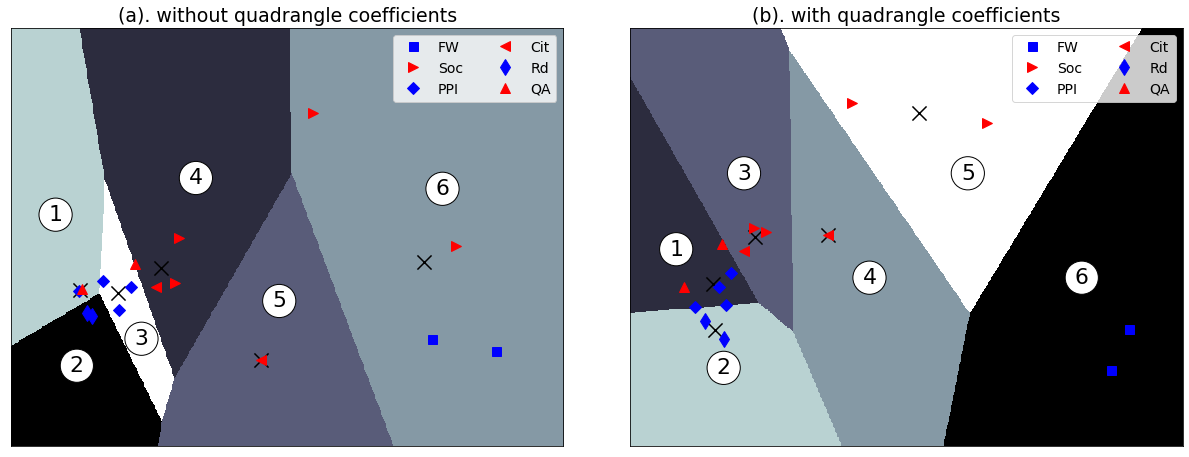

In [594]:
h = .01
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.8, reduced_data[:, 0].max() + 0.8
y_min, y_max = reduced_data[:, 1].min() - 0.8, reduced_data[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# bottom figure
x_min_2, x_max_2 = reduced_data_2[:, 0].min() - 0.8, reduced_data_2[:, 0].max() + 0.8
y_min_2, y_max_2 = reduced_data_2[:, 1].min() - 0.8, reduced_data_2[:, 1].max() + 0.8
xx_2, yy_2 = np.meshgrid(np.arange(x_min_2, x_max_2, h), np.arange(y_min_2, y_max_2, h))
# Obtain labels for each point in mesh. Use last trained model.
Z_2 = kmeans_2.predict(np.c_[xx_2.ravel(), yy_2.ravel()])
# Put the result into a color plot
Z_2 = Z_2.reshape(xx_2.shape)


onepic, axes = plt.subplots(1,2,figsize=(21,7.7))
plt.subplots_adjust(hspace=0.12, wspace=.12) 
# left figure
axes[0].imshow(Z_2, interpolation='nearest',
           extent=(xx_2.min(), xx_2.max(), yy_2.min(), yy_2.max()),
           cmap='bone',
           aspect='auto', origin='lower')
axes[0].plot(tag_fw_2[:, 0], tag_fw_2[:, 1], 's', markersize=9, color="blue", label="FW")
axes[0].plot(tag_soc_2[:, 0], tag_soc_2[:, 1], '>', markersize=10, color="red", label="Soc")
axes[0].plot(tag_ppi_2[:, 0], tag_ppi_2[:, 1], 'D', markersize=9, color="blue", label="PPI")
axes[0].plot(tag_cit_2[:, 0], tag_cit_2[:, 1], '<', markersize=10, color="red", label="Cit")
axes[0].plot(tag_rd_2[:, 0], tag_rd_2[:, 1], 'd', markersize=11, color="blue", label="Rd")
axes[0].plot(tag_qa_2[:, 0], tag_qa_2[:, 1], '^', markersize=10, color="red", label="QA")

axes[0].legend(prop={'size': 14}, ncol=2)
centroids_2 = kmeans_2.cluster_centers_
axes[0].text(2.7, 0.84, "6", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-1.85, 0.6, "1", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-0.84, -0.55, "3", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-1.6, -0.8, "2", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(-0.2, 0.94, "4", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].text(0.78, -0.2, "5", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[0].scatter(centroids_2[:, 0], centroids_2[:, 1], marker='x', s=200, color='k')
axes[0].set_title('(a). without quadrangle coefficients', fontsize=19)
axes[0].set_xticks(())
axes[0].set_yticks(())

# right figure
axes[1].imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='bone',
           aspect='auto', origin='lower')
axes[1].plot(tag_fw[:, 0], tag_fw[:, 1], 's', markersize=9, color="blue", label="FW")
axes[1].plot(tag_soc[:, 0], tag_soc[:, 1], '>', markersize=10, color="red", label="Soc")
axes[1].plot(tag_ppi[:, 0], tag_ppi[:, 1], 'D', markersize=9, color="blue", label="PPI")
axes[1].plot(tag_cit[:, 0], tag_cit[:, 1], '<', markersize=10, color="red", label="Cit")
axes[1].plot(tag_rd[:, 0], tag_rd[:, 1], 'd', markersize=11, color="blue", label="Rd")
axes[1].plot(tag_qa[:, 0], tag_qa[:, 1], '^', markersize=10, color="red", label="QA")

axes[1].legend(prop={'size': 14}, ncol=2)
centroids = kmeans.cluster_centers_
# area labels
axes[1].text(-2, 0.1, "1", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(2.3, 0.9, "5", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-1, 0.90, "3", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(3.98, -0.2, "6", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(-1.3, -1.15, "2", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].text(0.85, -0.2, "4", size=22, bbox=dict(boxstyle="circle",ec='k',fc='w',))
axes[1].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='k')
axes[1].set_title('(b). with quadrangle coefficients', fontsize=19)
axes[1].set_xticks(())
axes[1].set_yticks(())



plt.savefig('network_classification.pdf')

In [595]:
# in order to get postion in figure
print(x_min_2, x_max_2)
print(y_min_2, y_max_2)

-2.2955571798926306 4.207569859340776
-1.4913668911579303 2.396263637371199


In [385]:
kmeans.labels_ + 1

array([1, 1, 6, 3, 3, 6, 2, 2, 2, 2, 3, 4, 5, 5, 2, 2], dtype=int32)

In [386]:
kmeans_2.labels_ + 1

array([4, 4, 4, 2, 2, 4, 5, 6, 6, 6, 2, 3, 1, 1, 2, 5], dtype=int32)

In [387]:
tag_fw = reduced_data[:2]
tag_soc = reduced_data[2:6]
tag_ppi = reduced_data[6:10]
tag_cit = reduced_data[10:12]
tag_rd = reduced_data[12:14]
tag_qa = reduced_data[14:]

In [388]:
tag_fw_2 = reduced_data_2[:2]
tag_soc_2 = reduced_data_2[2:6]
tag_ppi_2 = reduced_data_2[6:10]
tag_cit_2 = reduced_data_2[10:12]
tag_rd_2 = reduced_data_2[12:14]
tag_qa_2 = reduced_data_2[14:]

In [8]:
FW_Chesa = nx.read_edgelist("datasets/FW-Chesa", create_using=nx.Graph)
FW_Baywet = nx.read_edgelist("datasets/FW-Baywet", create_using=nx.Graph, data = (('weight', float),))
FW_Baydry = nx.read_edgelist("datasets/FW-Baydry", create_using=nx.Graph, data = (('weight', float),))
FW_LittleRock = nx.read_edgelist("datasets/FW-LittleRock", create_using=nx.Graph)

Soc_EmailEu = nx.read_edgelist("datasets/Soc-EmailEu", create_using=nx.Graph, data=(('sec', int),))
Soc_Msg = nx.read_edgelist("datasets/CollegeMsg", create_using=nx.Graph, data=(('sec', int),))
Soc_Alpha = nx.read_edgelist("datasets/BTC-Alpha", delimiter = ',', create_using=nx.Graph, data=(('weight', int),('sec', int),))
Soc_OTC = nx.read_edgelist("datasets/BTC-OTC", delimiter = ',', create_using=nx.Graph, data=(('weight', int),('sec', float),))
#Soc_Digg = nx.read_edgelist("datasets/Digg-friends", create_using=nx.Graph, data=(('weight', int), ('sec', int),))#
Soc_FB = nx.read_edgelist("datasets/Soc-FB", delimiter = ',', create_using=nx.Graph)
Soc_Twitch = nx.read_edgelist("datasets/Soc-Twitch-Fr", delimiter = ',', create_using=nx.Graph)

PPI_Stelzl = nx.read_edgelist("datasets/HP-Stelzl", create_using=nx.Graph)
PPI_Figeys = nx.read_edgelist("datasets/HP-Figeys", create_using=nx.Graph)
PPI_Vidal = nx.read_edgelist("datasets/HP-Vidal", create_using=nx.Graph)
PPI_IntAct = nx.read_edgelist("datasets/HP-IntAct", create_using=nx.Graph)

Cit_DBLP = nx.read_edgelist("datasets/Cit-DBLP", create_using=nx.Graph, data=(('weight', int),('sec', int),))
Cit_Cora = nx.read_edgelist("datasets/Cit-Cora", create_using=nx.Graph)
Cit_HepPh = nx.read_edgelist("datasets/Cit-HepPh", create_using=nx.Graph)
Cit_HepTh = nx.read_edgelist("datasets/Cit-HepTh", create_using=nx.Graph)

#FLT_USAirpot = nx.read_edgelist("datasets/FLT-USAirport", create_using=nx.Graph, data=(('weight', int),))
#FLT_Opsahl = nx.read_edgelist("datasets/FLT-Opsahl", create_using=nx.Graph)
Road_NY = nx.read_edgelist("datasets/Road-NY", create_using=nx.Graph)
Road_Bay = nx.read_edgelist("datasets/Road-BayArea", create_using=nx.Graph)
#Road_Col = nx.read_edgelist("datasets/Road-Colorado", create_using=nx.Graph)

QA_Math = nx.read_edgelist("datasets/QA-MathOvfl-a2q", create_using=nx.Graph, data=(('sec', int),))
QA_Ubuntu = nx.read_edgelist("datasets/QA-AskUbuntu-a2q", create_using=nx.Graph, data=(('sec', int),))
#QA_Superuser = nx.read_edgelist("datasets/QA-Superuser-a2q", create_using=nx.Graph, data=(('sec', int),))

In [9]:
cit_info_1 = nx.get_network_info(Cit_DBLP, filename="network_info/Cit_DBLP.txt")
cit_info_2 = nx.get_network_info(Cit_Cora, filename="network_info/Cit_Cora.txt")
#cit_info_3 = nx.get_network_info(Cit_HepPh, filename="network_info/Cit_HepPh.txt")
#cit_info_4 = nx.get_network_info(Cit_HepTh, filename="network_info/Cit_HepTh.txt")

In [10]:
# nx.get_network_info(FLT_USAirpot, filename="network_info/FLT_USAirpot.txt")
# nx.get_network_info(FLT_Opsahl, filename="network_info/FLT_Opsahl.txt")
rd_info_1 = nx.get_network_info(Road_NY, filename="network_info/Road_NY.txt")
rd_info_2 = nx.get_network_info(Road_Bay, filename="network_info/Road_Bay.txt")
# nx.get_network_info(Road_Col, filename="network_info/Road_Col.txt")

In [11]:
fw_info_1 = nx.get_network_info(FW_Chesa, filename="network_info/FW_Chesa.txt")
fw_info_2 = nx.get_network_info(FW_Baywet, filename="network_info/FW_Baywet.txt")
fw_info_3 = nx.get_network_info(FW_Baydry, filename="network_info/FW_Baydry.txt")
fw_info_4 = nx.get_network_info(FW_LittleRock, filename="network_info/FW_LittleRock.txt")

In [12]:
soc_info_1 = nx.get_network_info(Soc_EmailEu, filename="network_info/Soc_EmailEu.txt")
soc_info_2 = nx.get_network_info(Soc_Msg, filename="network_info/Soc_Msg.txt")
soc_info_3 = nx.get_network_info(Soc_Alpha, filename="network_info/Soc_Alpha.txt")
soc_info_4 = nx.get_network_info(Soc_OTC, filename="network_info/Soc_OTC.txt")
soc_info_5 = nx.get_network_info(Soc_Twitch, filename="network_info/Soc_Twitch.txt")
# soc_info_6 = nx.get_network_info(Soc_FB, filename="network_info/Soc_FB.txt")

# nx.get_network_info(Soc_Digg, filename="network_info/Soc_Digg.txt")

In [13]:
ppi_info_1 = nx.get_network_info(PPI_Stelzl, filename="network_info/PPI_Stelzl.txt")
ppi_info_2 = nx.get_network_info(PPI_Figeys, filename="network_info/PPI_Figeys.txt")
ppi_info_3 = nx.get_network_info(PPI_Vidal, filename="network_info/PPI_Vidal.txt")
ppi_info_4 = nx.get_network_info(PPI_IntAct, filename="network_info/PPI_IntAct.txt")

In [14]:
qa_info_1 = nx.get_network_info(QA_Math, filename="network_info/QA_Math.txt")
# nx.get_network_info(QA_Superuser, filename="network_info/QA_Superuser.txt")
qa_info_2 = nx.get_network_info(QA_Ubuntu, filename="network_info/QA_Ubuntu.txt")

In [26]:
# not used
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h, h